# Getting Data - I


There are multiple ways of getting data into python, depending on where the data is stored. The simplest case is when you have data in CSV files, but often, you need to get data from other formats, sources and documents, such as text files, relational databases, websites, APIs, PDF documents, etc. 

In the following sections, you will learn to get data into python from a number of sources. You will learn to:
* Get data from text files
* Get data from relational databases
* Scrape data from websites
* Get data from publicly available APIs
* Read PDFs into python

In the process, you will also learn how to deal with nuances that inevitably come while getting data from various sources.


### Reading Delimited Files

Delimited files are usually text files, where columns are separated by delimiters (such as commas, tabs, semicolons etc.) and each new line is a row.

For instance, we have the ```companies.txt``` file, where each column is separated by a tab:

<img src="companies.png" style="height: 500px; width: 600px">

The easiest way to read delimited files is using ```pd.read_csv(filepath, sep, header)``` and specify a separator (delimiter).



In [1]:
import numpy as np
import pandas as pd

# reading companies file: throws an error
companies = pd.read_csv("companies.txt", sep="\t")
companies

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 53900: invalid start byte

The error appears because of a decoding issue pandas is facing. The best way to resolve such problems to search for help, for example on stack overflow, where you'd get excellent suggestions from the community.

One possible solution to this problem is found here: https://stackoverflow.com/questions/18171739/unicodedecodeerror-when-reading-csv-file-in-pandas-with-python

In [2]:
# Using encoding = "ISO-8859-1"
companies = pd.read_csv("companies.txt", sep="\t", encoding = "ISO-8859-1")
companies.head(10)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
5,/Organization/01Games-Technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
6,/Organization/0Ndine-Biomedical-Inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
7,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
8,/Organization/1,One Inc.,http://whatis1.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,01-08-2011
9,/Organization/1-2-3-Listo,"1,2,3 Listo",http://www.123listo.com,E-Commerce,operating,CHL,12,Santiago,Las Condes,01-01-2012


In [3]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [4]:
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66102,61191,27296,4,137,311,1092,5111,3978
top,/Organization/-Fame,Blink,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [5]:
addresses_df = pd.read_csv('test_1.txt', sep=' ', encoding='ISO-8859-1')
addresses_df

,col1,col2,col3
0,1,2,3
1,11,12,13
2,45,34,35
3,333,3433,334333
4,34,33343,364454


### Getting Data From Relational Databases

Data is commonly stored in RDBMS, and it is easy to get it into Python. We'll use the most common one - MySQL.

There are many libraries to connect MySQL and Python, such as pymysql, MySQLdb, etc. All of them follow the following procedure to connect to MySQL:
- Create a connection object between MySQL and python
- Create a cursor object (you use the cursor to open and close the connection) 
- Execute the SQL query 
- Retrive results of the query using methods such as ```fetchone()```, ```fetchall()```, etc.

Let' work through an example using PyMySQL. You can install it using ```pip install pymysql```.

In [6]:
pip install pymysql

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pymysql

In [8]:

# create a connection object 'conn'
conn = pymysql.connect(host="localhost", # your host, localhost for your local machine
                     user="root", # your username, usually "root" for localhost
                      passwd="yourpassword", # your password
                      db="world") # name of the data base; world comes inbuilt with mysql

# create a cursor object c
c = conn.cursor()

# execute a query using c.execute
c.execute("select * from city;")

# getting the first row of data as a tuple
all_rows = c.fetchall()

# to get only the first row, use c.fetchone() instead

OperationalError: (2003, "Can't connect to MySQL server on 'localhost' ([WinError 10061] No connection could be made because the target machine actively refused it)")

In [9]:
# notice that it returns a tuple of tuples: each row is a tuple
print(type(all_rows))

# printing the first few rows
print(all_rows[:5])

NameError: name 'all_rows' is not defined

Now, it would be useful to convert the list into a dataframe, since you can now work with dataframes easily. In this case, you can use the ```pd.DataFrame()``` function, and pass the list version of the tuple.

```pd.DataFrame(list_of_tuples)``` converts each tuple in the list to a row in the DF.

In [10]:
df = pd.DataFrame(list(all_rows), columns=["ID", "Name", "Country", "District", "Population"])
df.head()

NameError: name 'all_rows' is not defined

### Getting Data From Websites

Web scraping refers to the art of programmatically getting data from the internet.  One of the coolest features of python is that it makes it easy to scrape websites.

In Python 3, the most popular library for web scraping is ```BeautifulSoup```. To use ```BeautifulSoup```, we will also need the ```requests``` module, which basically connects to a given URL and fetches data from it (in HTML format). A web page is basically HTML code, and the main use of ```BeautifulSoup``` is that it helps you parse HTML easily. 

**Note**: Discussion on HTML syntax is beyond the scope of this module, though even very basic HTML experience should be enough to understand web scraping. 

#### Use Case - Fetching Mobile App Reviews from Google Playstore

Let's say you want to understand why people install and uninstall mobile apps, and why they like or dislike certain apps. A very rich source of app-reviews data is the Google Playstore, where people write their feedback about the app. 

The reviews of the Facebook messenger app can be found here: https://play.google.com/store/apps/details?id=com.facebook.orca&hl=en

We will scrape reviews of the Messenger app, i.e. get them into python, and then you can do some interesting analyses on that.


#### Parsing HTML Data using  BeautifulSoup and Requests

To start using BeautifulSoup, install it using ```pip install beautifulsoup4```, and load the module bs4 using ```import bs4```. Also, install the requests module using ```pip install requests```.

The general procedure to get data from websites is:
1. Use ```requests``` to connect to a URL and get data from it
2. Create a ```BeautifulSoup``` object 
3. Get attributes of the ```BeautifulSoup``` object (i.e. the HTML elements that you want)

In [11]:
pip install Beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install requests

In [13]:
pip install bs4

Note: you may need to restart the kernel to use updated packages.


In [14]:
html_doc = """<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>"""

In [16]:
from bs4 import BeautifulSoup

In [18]:
bs = BeautifulSoup(html_doc, 'html.parser')
print(bs.prettify())

<html>
 <head>
  <title>
   The Dormouse's story
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    The Dormouse's story
   </b>
  </p>
  <p class="story">
   Once upon a time there were three little sisters; and their names were
   <a class="sister" href="http://example.com/elsie" id="link1">
    Elsie
   </a>
   ,
   <a class="sister" href="http://example.com/lacie" id="link2">
    Lacie
   </a>
   and
   <a class="sister" href="http://example.com/tillie" id="link3">
    Tillie
   </a>
   ;
and they lived at the bottom of a well.
  </p>
  <p class="story">
   ...
  </p>
 </body>
</html>


In [19]:
bs.title

<title>The Dormouse's story</title>

In [22]:
paragraphs_tag = bs.find_all('p')
paragraphs_tag

[<p class="title"><b>The Dormouse's story</b></p>,
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>,
 <p class="story">...</p>]

In [23]:
type(paragraphs_tag)

bs4.element.ResultSet

In [24]:
paragraphs_tag[0]

<p class="title"><b>The Dormouse's story</b></p>

In [25]:
paragraphs_tag[:2]

[<p class="title"><b>The Dormouse's story</b></p>,
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>]

In [28]:
bs.title

<title>The Dormouse's story</title>

In [29]:
bs.title.name

'title'

In [30]:
bs.title.string

"The Dormouse's story"

In [31]:
bs.p

<p class="title"><b>The Dormouse's story</b></p>

In [32]:
bs.find('p', recursive=True)

<p class="title"><b>The Dormouse's story</b></p>

In [33]:
bs.title.parent.name

'head'

In [34]:
bs.title.parent.string

"The Dormouse's story"

In [35]:
bs.find('p').parent.name

'body'

In [37]:
bs.p

<p class="title"><b>The Dormouse's story</b></p>

In [66]:
bs.p['class']

['title']

In [73]:
bs.p['class']

['title']

In [74]:
bs.a

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>

In [75]:
bs.a['class']

['sister']

In [76]:
bs.a['href']

'http://example.com/elsie'

In [77]:
bs.a['id']

'link1'

In [83]:
bs.a.string

'Elsie'

In [91]:
bs.find_all('a')

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [98]:
bs.find_all(id='link3')

[<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [105]:
bs.find(id='link3', recursive=True)

<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>

In [113]:
bs.find_all('a')

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [115]:
for link in bs.find_all('a'):
    print(link['href'])

http://example.com/elsie
http://example.com/lacie
http://example.com/tillie


In [116]:
bs.find_all('p')

[<p class="title"><b>The Dormouse's story</b></p>,
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>,
 <p class="story">...</p>]

In [151]:
for par in bs.find_all('p'):
        print(par.text)     

The Dormouse's story
Once upon a time there were three little sisters; and their names were
Elsie,
Lacie and
Tillie;
and they lived at the bottom of a well.
...


In [157]:
print(bs.get_text())

The Dormouse's story

The Dormouse's story
Once upon a time there were three little sisters; and their names were
Elsie,
Lacie and
Tillie;
and they lived at the bottom of a well.
...


In [162]:
pip install html5lib

Note: you may need to restart the kernel to use updated packages.


In [182]:
pip install --upgrade bs4

Note: you may need to restart the kernel to use updated packages.


In [183]:
import html5lib

In [196]:
bs1 = BeautifulSoup(html_doc, 'html.parser')
print(bs1.prettify())

<html>
 <head>
  <title>
   The Dormouse's story
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    The Dormouse's story
   </b>
  </p>
  <p class="story">
   Once upon a time there were three little sisters; and their names were
   <a class="sister" href="http://example.com/elsie" id="link1">
    Elsie
   </a>
   ,
   <a class="sister" href="http://example.com/lacie" id="link2">
    Lacie
   </a>
   and
   <a class="sister" href="http://example.com/tillie" id="link3">
    Tillie
   </a>
   ;
and they lived at the bottom of a well.
  </p>
  <p class="story">
   ...
  </p>
 </body>
</html>


<!DOCTYPE html>
<html dir="ltr" lang="en">
 <head>
  <base href="https://play.google.com/"/>
  <meta content="origin" name="referrer"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="yes" name="mobile-web-app-capable"/>
  <meta content="yes" name="apple-mobile-web-app-capable"/>
  <meta content="sBw2N8uateIzRr93vmFze5MF_35vMk5F1wG04L5JcJE" name="google-site-verification"/>
  <meta content="PJKdyVFC5jlu_l8Wo_hirJkhs1cmitmn44fgpOc3zFc" name="google-site-verification"/>
  <link href="/opensearch.xml" rel="search" title="Google Play" type="application/opensearchdescription+xml"/>
  <link href="//www.gstatic.com/android/market_images/web/favicon_v3.ico" rel="shortcut icon"/>
  <script data-id="_gd" nonce="8OoUFD_fkjZ9vB7eRFoLlA">
   window.WIZ_global_data = {"DpimGf":false,"EP1ykd":["/_/*","/covid19/exposurenotifications/select","/covid19/exposurenotifications/select/*","/exchange","/exchange/*","/store/ereview","/store/ereview/","/store/linkbuilder
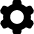
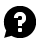
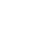
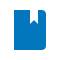
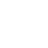
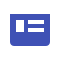
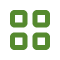
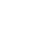
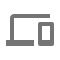
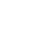
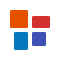
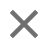
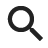
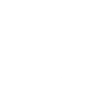
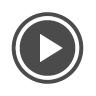

In [28]:
import requests, bs4
import html5lib
# getting HTML from the Google Play web page
url = "https://play.google.com/store/apps/details?id=com.facebook.orca&hl=en"
req = requests.get(url)

#print(req.text)
# create a bs4 object
# To avoid warnings, provide "html5lib" explicitly
#soup = bs4.BeautifulSoup(req.text, "html5lib")
soup = bs4.BeautifulSoup(req.text, "html.parser")
print(soup.prettify())

In [29]:
for div in soup.find_all('div'):
    print(div.attrs)

{'class': ['VUoKZ'], 'aria-hidden': 'true'}
{'class': ['TRHLAc']}
{'jsaction': 'JIbuQc:fAsfBd;', 'jscontroller': 'vNKqzc', 'role': 'navigation', 'aria-label': 'Main', 'class': ['P8HBFd']}
{'jscontroller': 'fI4Vwc', 'jsaction': 'lN8i5b:MhjYq;', 'jsshadow': '', 'jsname': 'DtB9Me'}
{'class': ['VfPpkd-AznF2e-ZMv3u', 'ucf8re'], 'role': 'tablist', 'jscontroller': 'sJhETb', 'jsaction': 'keydown:I481le;ndQSrb:ts7vde;', 'jsshadow': '', 'data-use-automatic-activation': 'false'}
{'class': ['VfPpkd-AznF2e-vzJc7b'], 'jscontroller': 'JWUKXe', 'jsaction': 'wheel:PNXF5; touchstart:PNXF5; pointerdown:PNXF5; mousedown:PNXF5; keydown:PNXF5;', 'jsname': 'mAKh3e', 'jsshadow': ''}
{'class': ['VfPpkd-AznF2e-LUERP-vJ7A6b'], 'jsname': 'vJ7A6b', 'jsaction': 'c0v8t:Y3U6Wb;'}
{'class': ['VfPpkd-wJCpie-LhBDec']}
{'class': ['VfPpkd-wJCpie-LhBDec']}
{'class': ['VfPpkd-wJCpie-LhBDec']}
{'class': ['VfPpkd-wJCpie-LhBDec']}
{'class': ['VfPpkd-wJCpie-LhBDec']}
{'class': ['VfPpkd-wJCpie-LhBDec']}
{'role': 'tabpanel', 'ari

In [72]:
users = soup.find_all('div', class_='X5PpBb')
users

[<div class="X5PpBb">gary stepp</div>,
 <div class="X5PpBb">Lucas S</div>,
 <div class="X5PpBb">Kaite Renee</div>]

In [73]:
soup.select("")

SelectorSyntaxError: Expected a selector at position 0
  line 1:

^

In [74]:
users = soup.select("header.c1bOId div.X5PpBb")
users

[<div class="X5PpBb">gary stepp</div>,
 <div class="X5PpBb">Lucas S</div>,
 <div class="X5PpBb">Kaite Renee</div>]

In [75]:
names = soup.find_all('div', class_='X5PpBb')
names

[<div class="X5PpBb">gary stepp</div>,
 <div class="X5PpBb">Lucas S</div>,
 <div class="X5PpBb">Kaite Renee</div>]

In [78]:
url = "https://play.google.com/store/apps/details?id=com.facebook.orca&hl=en"
response = requests.get(url)
msgner_rvw_bs= bs4.BeautifulSoup(response.text, "html.parser")

In [79]:
reviewers = msgner_rvw_bs.select("header.c1bOId .X5PpBb")
reviewers

[<div class="X5PpBb">gary stepp</div>,
 <div class="X5PpBb">Lucas S</div>,
 <div class="X5PpBb">Kaite Renee</div>]

In [80]:
soup.select('header.c1bOId .bp9Aid')

[<span class="bp9Aid">February 26, 2023</span>,
 <span class="bp9Aid">March 7, 2023</span>,
 <span class="bp9Aid">February 23, 2023</span>]

Once you have a bs4 object, you can use it to get specific parts of the HTML document. 

In HTML, the most common elements are either a part of a ```class```, or are assigned an ```id```. A typical HTML code looks like this:


```
    <body>
        <div class="some_class">
            <p id="a_unique_id">
                A paragraph that you can read on the webpage here.
            </p>
        </div>
    </body>
```


The easiest way to get specific parts of the webpage is using the ```soup.select()``` method of bs4. For e.g.:
- ```soup.select('div')``` selects all the elements inside a 'div' tag
- ```soup.select('div > p')``` selects all the ```<p>``` elements within div tags
- ```soup.select('.some_class')``` selects elements inside  ```class = "some_class"```
- ```soup.select('#some_id')``` selects all the elements inside the ```id="some_id"``` element 


Now, you need to find the ids / classes / divs etc. inside which the reviews are located. To find those, go to the webpage, right click, and choose 'Inspect'. It will open up the HTML code.

We'll not go into details, but if you look carefully, all the reviews are located inside a ```<div class="review-body"> ```. So we use that class to fetch the reviews.


In [81]:
soup.select('section header.c1bOId .X5PpBb')

[<div class="X5PpBb">gary stepp</div>,
 <div class="X5PpBb">Lucas S</div>,
 <div class="X5PpBb">Kaite Renee</div>]

In [82]:
import requests, bs4
# getting HTML from the Google Play web page
url = "https://play.google.com/store/apps/details?id=com.facebook.orca&hl=en"
req = requests.get(url)

#print(req.text)
# create a bs4 object
# To avoid warnings, provide "html5lib" explicitly
#soup = bs4.BeautifulSoup(req.text, "html5lib")
soup = bs4.BeautifulSoup(req.text, "html.parser")

In [83]:
# getting all the text inside class = "review-body"
reviews = soup.select('.h3YV2d')
print(type(reviews))
print(len(reviews))
print("\n")

# printing an element of the reviews list
reviews[2]

<class 'bs4.element.ResultSet'>
3




<div class="h3YV2d">My messages are disappearing almost immediately. I just sent a message and it disappeared, I backed out and in my list of messages it's showed the conversation but when I clicked on it there was nothing there. I also can't look at any past messages right now. This app keeps malfunctioning more then it works. I've been using other apps because this one's gotten so unreliable.</div>

Notice that ```reviews``` is a list, and each element of the list contains some HTML code + the review string that we want.

We still need to subset only the actual review string, and ignore all the other HTML, as shown in the highlighted section below (we want the bold string).

```<div class="review-body with-review-wrapper"> <span class="review-title"></span>```
**I love this app for it has many features but this is stressing me out bc it eats a lot of space and im only using samsung which is definitely cheap in giving internal storage. I have a lot of needs also, optimize the space of messenger. Thankyou. :) ily ppl who developed this. ** 
```<div class="review-link" style="display:none"> <a class="id-no-nav play-button tiny" href="#" target="_blank"> Full Review </a> </div> </div>```


Now, there are more than one ways to so this. One way is to ```str.split()``` the entire string into two parts using ```</span>``` as the separator (```str.split("sep")``` separates a string into two parts at "sep").

Then we'll get this:

**I love this app for it has many features but this is stressing me out bc it eats a lot of space and im only using samsung which is definitely cheap in giving internal storage. I have a lot of needs also, optimize the space of messenger. Thankyou. :) ily ppl who developed this. ** 
```<div class="review-link" style="display:none"> <a class="id-no-nav play-button tiny" href="#" target="_blank"> Full Review </a> </div> </div>```

And then ```str.split()``` this string again using ```<div class="review-link'``` as the separator, so we'll get only the review string, i.e.:

**I love this app for it has many features but this is stressing me out bc it eats a lot of space and im only using samsung which is definitely cheap in giving internal storage. I have a lot of needs also, optimize the space of messenger. Thankyou. :) ily ppl who developed this. ** 
 

In [84]:
# step 1: split using </span>
r = reviews[2]
print(type(r))

# r is a bs4 tag, convert it into string to use str.split() 
part1 = str(r).split("h3YV2d\">")[1]
print(part1)

<class 'bs4.element.Tag'>
My messages are disappearing almost immediately. I just sent a message and it disappeared, I backed out and in my list of messages it's showed the conversation but when I clicked on it there was nothing there. I also can't look at any past messages right now. This app keeps malfunctioning more then it works. I've been using other apps because this one's gotten so unreliable.</div>


In [85]:
part1

"My messages are disappearing almost immediately. I just sent a message and it disappeared, I backed out and in my list of messages it's showed the conversation but when I clicked on it there was nothing there. I also can't look at any past messages right now. This app keeps malfunctioning more then it works. I've been using other apps because this one's gotten so unreliable.</div>"

In [86]:
# Now split part1 using '<div class="review-link' as the separator
# and get the first element of the resulting list
# we get the review
part2 = part1.split("</div>")[0]
part2

"My messages are disappearing almost immediately. I just sent a message and it disappeared, I backed out and in my list of messages it's showed the conversation but when I clicked on it there was nothing there. I also can't look at any past messages right now. This app keeps malfunctioning more then it works. I've been using other apps because this one's gotten so unreliable."

In [87]:
reviews_text = [print(str(review).split("h3YV2d\">")[1].split("</div>")[0] + '\n') for review in reviews]


Sound quality on video or audio calls is so bad. It cuts out the other person if I have any type of background noise. No other app does that and I have found no settings to fix this. It's awful! The visual quality of the video is pretty poor too, along with the way your video screen is laid out. The zoom function doesn't work properly overall this app is not working well. I don't even have a facebook anymore, I might just delete this app too and move to another app I have

Don't even receive notifications for messages half the time, you can imagine how frustrating and upsetting that can be not just to me but to the people sending me messages. Now I try to reply to a message in the notification bar, hit send, and it doesn't send. I've wasted meaningful time and energy on messages that I can't recover. Uninstalled. Moving to email and text.

My messages are disappearing almost immediately. I just sent a message and it disappeared, I backed out and in my list of messages it's showed the c

So after applying ```str.split()``` twice, we get the review string.  Now, we simply apply this sequence of splitting to every element of the ```reviews``` list.

In [273]:
# apply this sequence of splitting to every element of the reviews list
# using a list comprehension
reviews_text = [str(r).split("</span>")[1].split('<div class="review-link')[0] for r in reviews]

# printing the first 10 reviews
reviews_text[0:10]

IndexError: list index out of range


Now you can do some interesting analyses on the reviews, e.g. find how many people complain about memory, storage space, built-in camera etc.

In [101]:
# Practice problem: Scraping amazon.in to get shoe price data 
import pprint

url = "https://www.amazon.in/s/ref=nb_sb_noss?url=search-alias%3Daps&field-keywords=sport+shoes"
req = requests.get(url)

# create a bs4 object
# To avoid warnings, provide "html5lib" explicitly
soup = bs4.BeautifulSoup(req.text, "html.parser")

# get shoe names
shoe_data = soup.select('.a-size-medium-plus')
shoe_data = soup.select('div.a-section.aok-relative.s-image-tall-aspect')
print(len(shoe_data))
print(pprint.pprint(shoe_data))

# get shoe prices
shoe_prices = soup.select('.a-price-whole')
print(len(shoe_prices))
pprint.pprint(shoe_prices)


0
[]
None
0
[]


In [291]:
import re
price_list_with_comma = [str(sp).split("<span class=\"a-price-whole\">")[1].split("<")[0] for sp in shoe_prices]
price_list = [float(re.sub(',', '', price)) for price in price_list_with_comma ]
price_list

[565.0,
 1004.0,
 1225.0,
 1350.0,
 1452.0,
 2149.0,
 1214.0,
 1814.0,
 632.0,
 699.0,
 749.0,
 699.0,
 444.0,
 799.0,
 799.0,
 649.0,
 833.0,
 865.0,
 299.0,
 753.0,
 1250.0,
 923.0,
 799.0,
 10503.0,
 599.0,
 9181.0,
 16600.0,
 1299.0,
 7999.0,
 1799.0,
 10871.0,
 749.0,
 799.0,
 618.0,
 799.0,
 972.0,
 892.0,
 934.0,
 1012.0,
 839.0,
 968.0,
 1230.0,
 1350.0,
 499.0,
 824.0,
 494.0,
 1249.0,
 936.0,
 1274.0,
 629.0,
 751.0,
 799.0,
 850.0,
 934.0,
 1199.0,
 1067.0,
 1390.0,
 1368.0,
 1439.0,
 849.0,
 1217.0,
 1299.0,
 1185.0,
 934.0,
 604.0,
 934.0,
 1265.0,
 1359.0,
 1139.0,
 1189.0,
 1249.0,
 1148.0,
 1199.0,
 399.0,
 309.0,
 799.0,
 3395.0,
 749.0,
 699.0,
 369.0,
 839.0,
 779.0,
 824.0]

In [102]:
 import pandas as pd

In [103]:
pd.DataFrame({'Price': price_list}).describe()

NameError: name 'price_list' is not defined

In [295]:
import requests, bs4

In [303]:
# getting HTML from the Google Play web page
url = "https://bhumijankari.bihar.gov.in/BiharPortal/Admin/AdvSearch/AdvSearch.aspx"
params = {'ctl00$ContentPlaceHolder1$ddlDistrict': 1901,
          'ctl00$cphBM$BMenu$ddlLanguage': -1,
          'ctl00$ContentPlaceHolder1$rdtask': 'Online',
          'ctl00$ContentPlaceHolder1$ScriptManager1': 'ctl00$ContentPlaceHolder1$UpdatePanel1|ctl00$ContentPlaceHolder1$btn_view',
         'tl00$ContentPlaceHolder1$ddldsro' : 1901,
         'tl00$ContentPlaceHolder1$ddl_circle':18,
         'ctl00$ContentPlaceHolder1$ddl_thanaCode': '043'}
req = requests.get(url, params)

#print(req.text)
# create a bs4 object
# To avoid warnings, provide "html5lib" explicitly
#soup = bs4.BeautifulSoup(req.text, "html5lib")
bs = bs4.BeautifulSoup(req.text, "html.parser")
bs.find_all(id="ctl00_ContentPlaceHolder1_divGridViewHeader")

[<div id="ctl00_ContentPlaceHolder1_divGridViewHeader" style="position: relative; overflow: auto; vertical-align: top; width:99%">
 <div>
 </div>
 </div>]

In [311]:
pip install python-certifi-win32

     -------------------------------------- 43.8/43.8 kB 165.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [312]:
pd.read_csv("")
ctl00_ContentPlaceHolder1_divGridViewHeader
 'ctl00$ContentPlaceHolder1$rdtask' : Online,

IndentationError: unexpected indent (1803639933.py, line 3)

In [313]:
viewstate="/wEPDwULLTE1NTQyNDQ3MDEPZBYCZg9kFgICAw9kFgICAQ9kFgoCAQ8QDxYCHgtfIURhdGFCb3VuZGdkEBUyFS0tIFNlbGVjdCBEaXN0cmljdCAtLQdBcmFyaXlhBUFyd2FsBEFUUyAKQXVyYW5nYWJhZAZCYWdhaGEFQmFua2EJQmVndXNhcmFpB0JoYWJodWEJQmhhZ2FscHVyB0Job2pwdXIFQnV4YXIVQ0lEIChTVC9TQyBQcywgUGF0bmEpCURhcmJoYW5nYQ5FYXN0IENoYW1wYXJhbhtFY29ub21pYyBPZmZlbmNlIFVuaXQgKEVPVSkER2F5YQlHb3BhbGdhbmoFSmFtdWkJSmVoYW5hYmFkB0thdGloYXIIS2hhZ2FyaWEKS2lzaGFuZ2FuagpMYWtoaXNhcmFpCU1hZGhlcHVyYQlNYWRodWJhbmkGTXVuZ2VyC011emFmZmFycHVyB05hbGFuZGEKTmF1Z2FjaGhpYQZOYXdhZGEFUGF0bmEGUHVybmlhDVJhaWwgSmFtYWxwdXIMUmFpbCBLYXRpaGFyEFJhaWwgTXV6YWZmYXJwdXIKUmFpbCBQYXRuYQZSb2h0YXMHU2FoYXJzYQpTYW1hc3RpcHVyBVNhcmFuClNoZWlraHB1cmEHU2hlb2hhcglTaXRhbWFyaGkFU2l3YW4YU3BsLlZpZ2lsYW5jZSBVbml0IChTVlUpBlN1cGF1bAhWYWlzaGFsaSRWaWdpbGFuY2UgSW52ZXN0aWdhdGlvbiBCdXJlYXUgKFZJQikOV2VzdCBDaGFtcGFyYW4VMgEwATEBMgI0MgEzAjM5ATQBNQE2ATcBOAE5AjUyAjEwAjExAjUxAjEyAjEzAjE0AjE1AjE2AjE3AjE4AjE5AjIwAjIxAjIyAjIzAjI0AjQxAjI1AjI2AjI3AjQ2AjQ5AjQ1AjQ4AjI4AjI5AjMwAjMxAjMyAjMzAjM0AjM1AjQ0AjM2AjM3AjUwAjM4FCsDMmdnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnFgECJ2QCAw8QDxYCHwBnZBAVGwktLSBBTEwgLS0MQW5nYXJnaGF0IFBTCkJhbmdhcmEgUFMNQmliaHV0aXB1ciBQUwlCaXRoYW4gUFMNQ2hhY2ttZWhzaSBQUxFEYWxzaW5naCBTYXJhaSBQUwtIYXNhbnB1ciBQUwtIYXRoYXVyaSBQUwxLYWx5YW5wdXIgUFMLS2hhbnB1cmEgUFMJTWFoaWxhIFBTH01hdSBCYXphciAgUFMgKFZpZHlhcGF0aSBOYWdhcikSTW9oaXVkZGluIE5hZ2FyIFBTC011ZmZhc2lsIFBTDk11c3JpZ2hyYXJpIFBTCE5hZ2FyIFBTB1B1c2EgUFMJUm9zZXJhIFBTD1NhcmFpIFJhbmphbiBQUwhTQy9TVCBQUxFTaGFocHVyIFBhdG9yaSBQUxBTaGl2YWppIE5hZ2FyIFBTC1NpbmRoaXlhIFBTCVRhanB1ciBQUwxVaml5YXJwdXIgUFMOV2FyaXMgTmFnYXIgUFMVGwEwAzU1NgM1NDYDNTU4AzU2NAM1NDcDNTU0AzU2MQM1NjADNTQ5AzU1MQM1NjMDNTY4AzU2NgM1NDQDNTUyAzU0MwM1NDgDNTU3AzU1MwM1NjIDNTY1AzU2NwM1NTkDNTQ1AzU1NQM1NTAUKwMbZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZGQCCw8PFgIeBFRleHQFEkNvbXBsYWluYW50J3MgTmFtZWRkAg0PDxYCHgdWaXNpYmxlZ2RkAhIPFgIeC18hSXRlbUNvdW50ApkLFrIWZg9kFgRmDxUKATEGMTE3LzE3EzI0LTA5LTIwMTcgMDA6MDA6MDANQS5TLkkgS2hhbnB1ch1BLlMuSSBraGFucHVyIERpc3QtU2FtYXN0aXB1cgAANEJpaGFyIFByb2hpYml0aW9uICYgRXhjaXNlICwzNyhBKSwzNyhDKSwyNzksSVBDIEFjdC4KU2FtYXN0aXB1chsyMDE3LTA5LTI0IDAwOjAwOjAwLjAwMDAwMDBkAgEPDxYEHgtDb21tYW5kTmFtZQUGMTkwOTc3Hg9Db21tYW5kQXJndW1lbnQFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzExN18xNy5wZGZkZAIBD2QWBGYPFQoBMgYxMTgvMTcTMjQtMDktMjAxNyAwMDowMDowMCBTdW5pdGEgZGV2aSBXL28gTHQuTmFyYXlhbiBNYWh0bxpQcy1LaGFucHVyIERpc3QtU2FtYXN0aXB1cgAAFjM0LzM2My8zNjYtQSwgSVBDIEFjdC4KU2FtYXN0aXB1chsyMDE3LTA5LTE4IDAwOjAwOjAwLjAwMDAwMDBkAgEPDxYEHwQFBjE5MDk4MR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMThfMTcucGRmZGQCAg9kFgRmDxUKATMGMTE5LzE3EzI0LTA5LTIwMTcgMDA6MDA6MDATUGFua2FqIEt1bWFyIFBhbnRoIBpQcy1LaGFucHVyIERpc3QtU2FtYXN0aXB1cgAAP0JpaGFyIFByb2hpYml0aW9uICYgRXhjaXNlICwzMChhKSwzNShhKSwzOCgxKSwzOCgyKSw0NyxJUEMgQWN0LgpTYW1hc3RpcHVyGzIwMTctMDktMjQgMDA6MDA6MDAuMDAwMDAwMGQCAQ8PFgQfBAUGMTkwOTgzHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzExOV8xNy5wZGZkZAIDD2QWBGYPFQoBNAYxMjAvMTcTMjUtMDktMjAxNyAwMDowMDowMBxTb255IEtoYXRvb24gVy9vIEV0YWJ1bCBLaGFuJ0F0LVNpcm9wYXR0aSBQcy1LaGFucHVyIERpc3QtU2FtYXN0aXB1cgAAJDMyMy8zNDEvMzU0Qi8zNzkvNDQ3LzUwNC8zNCxJUEMgQWN0LgpTYW1hc3RpcHVyGzIwMTctMDktMjIgMDA6MDA6MDAuMDAwMDAwMGQCAQ8PFgQfBAUGMTkwOTg2HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEyMF8xNy5wZGZkZAIED2QWBGYPFQoBNQYxMjIvMTcTMDItMTAtMjAxNyAwMDowMDowMA9QYW5rYWogS3IgUGFudGgaVmlsbCtQcy1LaGFucHVyLFNhbWFzdGlwdXIAAAo0MTQvMzQgSVBDClNhbWFzdGlwdXIbMjAxNy0xMC0wNCAwMDowMDowMC4wMDAwMDAwZAIBDw8WBB8EBQYxOTMxMjAfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTIyXzE3LnBkZmRkAgUPZBYEZg8VCgE2BjE0Ni8xOBMwMi0xMC0yMDE4IDAwOjAwOjAwLEJIVVBOQVJBWUFOIE1BSFRPLCBTL08tIExULiBSQU0gS0lTSFVOIE1BSFRPJ0FULSBOQVRIVURXQVIgLFBTLSBLSEFOUFVSICwgU0FNQVNUSVBVUlcxLkdBTkVTSCBTQURBLCBTL08tIExBS0hBTiBTQURBLCBBVC0gTkFUSFVEV0FSICxQUy0gS0hBTlBVUiAsIFNBTUFTVElQVVIsIE9USEVSIDMgTkFNRUQLS2hhbnB1cmEgUFMeMzIzLzM0MS8zNTQvMzc5LzUwNC81MDYvMzQgSVBDClNhbWFzdGlwdXIKMDEtMTAtMjAxOGQCAQ8PFgQfBAUGMzg3ODE4HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE0Nl8xOC5wZGZkZAIGD2QWBGYPFQoBNwYxNDcvMTgTMDMtMTAtMjAxOCAwMDowMDowMCNOT09SSkFIQSBLSEFUT09OLFcvTy0gTUQuIE1BU1VNIEFMSSZBVC0gU0lSSVBBVFRJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUl0xLiBBUkZJTiBLSEFUT09OLCBXL08tIE1ELiBNQVNVSyBBTEksIEFULSBTSVJJUEFUVEksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDggTkFNRUQLS2hhbnB1cmEgUFM3My80ICBET1dSUlkgQUNULCAmICAzMjMvMzQxLzM1NC80OThBLzUwNC81MDYvMzQyLzM0IElQQwpTYW1hc3RpcHVyCjA5LTA5LTIwMThkAgEPDxYEHwQFBjM4ODY3OB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNDdfMTgucGRmZGQCBw9kFgRmDxUKATgFNDMvMTgTMDktMDQtMjAxOCAwMDowMDowMCNSQU5KRUVUIFNBSE5JLCBTL08tIFJBTSBTT0hBRyBTQUhOSSRBVC0gTUFESFVCQU4sIFBTLSBLSEFOUFVSLFNBTUFTVElQVVJfMS4gUkFOSkVFVCBQQVNXQU4sIFMvTy0gUkFNIFNBR1VOIFBBU1dBTiwgQVQtIEJIQVdBTklQVVIsIE1BU1VSQ0hBSywgQkVHVVNBUkFJLCAmIE9USEVSIDQgTkFNRUQLS2hhbnB1cmEgUFMOMzc5LzQxMS8zNCBJUEMKU2FtYXN0aXB1cgowOS0wNC0yMDE4ZAIBDw8WBB8EBQYzOTAzNTYfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNDNfMTgucGRmZGQCCA9kFgRmDxUKATkGMTQ4LzE4EzA0LTEwLTIwMTggMDA6MDA6MDAdVklOT0QgS1VNQVIsIFMvTy0gSkFHRElTSCBTQUgdQVQtIEJFTEEsIFNPTkJBUlNBLCBTSVRBTUFESElSMS4gU1VOREVTSFdBUiBNQUhUTywgUy9PLSBMVC4gTEFLSEFOIE1BSFRPLCBBVC0gUkFNIE5BR0FSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgtLaGFucHVyYSBQUw80MDYvNDA5LzQyMCBJUEMKU2FtYXN0aXB1chgzMC0xMi0yMDE3IFRPIDE3LTA5LTIwMThkAgEPDxYEHwQFBjM5MDg1Mx8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNDhfMTgucGRmZGQCCQ9kFgRmDxUKAjEwBjE0OS8xOBMwNC0xMC0yMDE4IDAwOjAwOjAwJVJBTSBTQUtISSBERVZJLCBXL08tIEhBUkUgS1JJU0hVTiBTQUgoQVQtIEJIT1JFIEpBSVJBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUloxLiBTSEFOS0FSIFNBSCwgUy9PLSBSQU5KSVQgU0FILCBBVC0gQkhPUkUgSkFJUkEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDggTkFNRUQLS2hhbnB1cmEgUFMmMzA3LzMyMy8zMjQvMzQxLzM1NC8zNzkvNDQ3LzUwNC8zNCBJUEMKU2FtYXN0aXB1cgoyNS0wNC0yMDE4ZAIBDw8WBB8EBQYzOTA4NzEfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTQ5XzE4LnBkZmRkAgoPZBYEZg8VCgIxMQYxNTAvMTgTMDQtMTAtMjAxOCAwMDowMDowMB5TVU1JTEEgREVWSSwgVy9PLSBTQU5KQVkgWUFEQVYkQVQtIFJBTUFVTEksIFBTLSBIQVlBR0hBVCwgREFSQkhBTkdBXjEuS0FMRVNIV0FSIFlBREFWLCBTL08tIFNVS0hDSEFORCBZQURBViwgQVQtIFJBTUFVTEksIFBTLSBIQVlBR0hBVCwgREFSQkhBTkdBLCAmIE9USEVSIDIgTkFNRUQLS2hhbnB1cmEgUFMXMzIzLzMyNS8zNDEvNDk4QS8zNCBJUEMKU2FtYXN0aXB1chgwMS0wMS0yMDE2IFRPIDE2LTA0LTIwMThkAgEPDxYEHwQFBjM5MDg4NB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNTBfMTgucGRmZGQCCw9kFgRmDxUKAjEyBjE1MS8xOBMwNC0xMC0yMDE4IDAwOjAwOjAwFlMuSSBWSVNIV0FOQVRIIFBEIFJBVkkfUy5ILk8gQVQgS0hBTlBVUiBQUywgU0FNQVNUSVBVUkwxLlBSQU1PRCBNQUhUTywgUy9PLSBSQU0gTEFHQU4gTUFIVE8sIEtIQU5QVVIgTk9SVEgsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSC0toYW5wdXJhIFBTDzMwKEEpIEVYSVNFIEFDVApTYW1hc3RpcHVyCjA0LTEwLTIwMThkAgEPDxYEHwQFBjM5MDg5Nx8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNTFfMTgucGRmZGQCDA9kFgRmDxUKAjEzBjE1OS8xOBMyMi0xMC0yMDE4IDAwOjAwOjAwG1JBTkkgS1VNQVJJLCBXL08tIFNVUkFKIFNBSCRBVC0gU0hBSFBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJUMS4gU1VSQUogU0FILCBTL08tIFNVUkVTSCBTQUgsIEFULSBTSEFIUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA0IE5BTUVEC0toYW5wdXJhIFBTLDMvNCBET1dSWSBBQ1QsICYgMzA3LzMyMy8zNDEvNDk4QS81MDQvMzQgSVBDClNhbWFzdGlwdXIKMjItMTAtMjAxOGQCAQ8PFgQfBAUGNDE1MDY5HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE1OV8xOC5wZGZkZAIND2QWBGYPFQoCMTQEOS8xNxMxNC0wMS0yMDE3IDE2OjI4OjE2I1BpbmtpIEt1bWFyaSBEZXZpIFcvTyBSYWplc2ggTWFoYXRvG1Jld2FyYSwgS2hhbnB1ciwgU2FtYXN0aXB1cgALS2hhbnB1cmEgUFMXMzQxLzMyMy8zNTQvNTA0LzUwNiBJUEMKU2FtYXN0aXB1cgBkAgEPDxYEHwQFBTQ5MjkwHwUFIH5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzlfMTcucGRmZGQCDg9kFgRmDxUKAjE1BTA3LzE3EzEzLTAxLTIwMTcgMDI6MDk6MTAfU3VtaXRyYSBEZXZpLFcvby1NYWhlbmRyYSBNYWh0bypBdC1CdWp1cmdhIER3YXIsUHMtS2hhbnB1cixEaXN0LVNhbWFzdGlwdXIAC0toYW5wdXJhIFBTHjM0MS8zMjMvMzI0LzM1NC8zNzkvNTA0LzM0IElQQwpTYW1hc3RpcHVyGzIwMTYtMDUtMzAgMDA6MDA6MDAuMDAwMDAwMGQCAQ8PFgQfBAUFNTAxODUfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMDdfMTcucGRmZGQCDw9kFgRmDxUKAjE2BTA4LzE3EzEzLTAxLTIwMTcgMDI6MTM6NTcgRHVyZ2VzaCBTYWhuaSxTL28tTXVuZXN3YXIgU2Fobmk0QXQtSGFzYW5wdXIgVG9sZSBHYWRoYmFuaSxQcy1LaGFucHVyLERpc3QtU2FtYXN0aXB1cgALS2hhbnB1cmEgUFMWMzQxLzMyMy8zNzkvNTA0LzM0IElQQwpTYW1hc3RpcHVyGzIwMTYtMTItMTQgMDA6MDA6MDAuMDAwMDAwMGQCAQ8PFgQfBAUFNTAxODgfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMDhfMTcucGRmZGQCEA9kFgRmDxUKAjE3BTEwLzE3EzE4LTAxLTIwMTcgMDA6MDA6MDAVU2FpbGVuZHJhIEtyIFZpZGhha2FyIFMuSC5PIEtoYW5wdXIgUHMsRGlzdC1TYW1hc3RpcHVyAAtLaGFucHVyYSBQUw8zMChhKSBFeGlzZSBBY3QKU2FtYXN0aXB1chsyMDE3LTAxLTE4IDAwOjAwOjAwLjAwMDAwMDBkAgEPDxYEHwQFBTUwMzE5HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEwXzE3LnBkZmRkAhEPZBYEZg8VCgIxOAYxMzkvMTgTMjEtMDktMjAxOCAwMDowMDowMBBNQU5KQVIgQUxBTSBLSEFOH0EuUy5JIEFUIEtIQU5QVVIgUFMsIFNBTUFTVElQVVJSMS5HQU5HTyBTQUhOSSwgUy9PLSBMVC4gUkFNQVNISVNIIFNBSE5JLCBBVC0gU1JJUFVSIEdBSEFSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgtLaGFucHVyYSBQUxIzMChBKS80NyBFWElTRSBBQ1QKU2FtYXN0aXB1cgoyMS0wOS0yMDE4ZAIBDw8WBB8EBQYzNzcwNzgfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTM5XzE4LnBkZmRkAhIPZBYEZg8VCgIxOQYxMDcvMTgTMTctMDctMjAxOCAwMDowMDowMCFSQU1ZQVNIIFJBTSwgUy9PLSBMVC4gTkFUSFVOSSBSQU0jQVQtIFNJU0JBIFNPQiwgS0FMWUFOUFVSICwgTU9USUhBUklOMS5TSEFOS0FSIFNJTkdILCBTL08tIFNBVEFOQVJBWUFOIFNJTkdILCBBVC0gRkFURUhQVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSC0toYW5wdXJhIFBTKDM3OS80MjAgSVBDLCAmIDQwLzI2KEEpIEIuTS5NQ1IgQUNUIDE5NzIKU2FtYXN0aXB1cgBkAgEPDxYEHwQFBjM3ODAxMh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMDdfMTgucGRmZGQCEw9kFgRmDxUKAjIwBjEwOC8xOBMxNy0wNy0yMDE4IDAwOjAwOjAwHk5JWUFaIEFITUFELCBTL08tIE1VU1RBSyBBSE1BRCNBVC0gU1VSQVVMLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlYxLlNIQU1TRSBBTEFNLCBTL08tIExULiBKQU4gQUxBTSwgQVQtIFNVUkFVTCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgNiBOQU1FRAtLaGFucHVyYSBQUyIzMDcvMzIzLzMzNy8zNDEvMzc5LzQ0Ny81MDQvMzQgSVBDClNhbWFzdGlwdXIKMTctMDctMjAxOGQCAQ8PFgQfBAUGMzc4MDE4HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEwOF8xOC5wZGZkZAIUD2QWBGYPFQoCMjEGMTA5LzE4EzE3LTA3LTIwMTggMDA6MDA6MDAfS0FNUkUgQUxBTSwgUy9PLUxULiBNRCBKQUwgQUxBTSNBVC0gU0lST1VMLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlgxLk1ELiBDSEhPVEFOLCBTL08tIExULiBNRC4gTVVTVEFLLCBBVC0gU0lST1VMLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA3IE5BTUVEC0toYW5wdXJhIFBTJjMwNy8zMjMvMzI1LzMzNy8zMzgvMzQxLzQyNy81MDQvMzQgSVBDClNhbWFzdGlwdXIKMTctMDctMjAxOGQCAQ8PFgQfBAUGMzc4MDI4HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEwOV8xOC5wZGZkZAIVD2QWBGYPFQoCMjIGMTQwLzE4EzIyLTA5LTIwMTggMDA6MDA6MDAhTkFKSU1BIEtIQVRPT04sIFcvTy0gSkFCSVIgTEFMQkFOI0FULVNIT0JIQU4sIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSWjEuTVVNVEFKIExBTEJBTiwgUy9PLSBDSE9DSE8gTEFMQkFOLCBBVC1TSE9CSEFOLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA1ICBOQU1FRAtLaGFucHVyYSBQUyozMDcvMzIzLzMyNC8zNDEvMzU0LzM3OS80MjcvNDQ4LzUwNC8zNCBJUEMKU2FtYXN0aXB1cgoyMS0wOS0yMDE4ZAIBDw8WBB8EBQYzNzg4NjAfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTQwXzE4LnBkZmRkAhYPZBYEZg8VCgIyMwYxNDEvMTgTMjItMDktMjAxOCAwMDowMDowMB9TYXZlZW5hIEtoYXRvb24sIFcvby0gTWQuIFNhbWlkI0FULSBTT0JIQU4sIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSYDEuUEFDSENIVSBMQUxWQU4sIFMvTy0gTFQuIElTUkFFRUwgTEFMQkFOLCBBVC0gU0FSQUlZQSwgUFMtIFJBVEFOUFVSLCBEQVJCSEFOR0EsICYgT1RIRVIgNyBOQU1FRAtLaGFucHVyYSBQUyYzMjMvMzI0LzMyNS8zMzcvMzM4LzM0MS8zNTQvNTA0LzM0IElQQwpTYW1hc3RpcHVyCjIxLTA5LTIwMThkAgEPDxYEHwQFBjM3ODkyMB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNDFfMTgucGRmZGQCFw9kFgRmDxUKAjI0BjE0Mi8xOBMyMi0wOS0yMDE4IDAwOjAwOjAwHlNBTkpBWSBSQUksIFMvTy0gUkFNIEJJTEFTIFJBSSVBVC0gREFHQVJVQUEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSVzEuUFJBTU9EIFJBSSwgUy9PLSBSQU1TQUdBUiBSQUksIEFULSBEQUdBUlVBQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgNSBOQU1FRAtLaGFucHVyYSBQUyYzMjMvMzI0LzM0MS8zNTQvMzc5LzQ0Ny81MDQvNTA2LzM0IElQQwpTYW1hc3RpcHVyCjIyLTA5LTIwMThkAgEPDxYEHwQFBjM3ODkzMB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNDJfMTgucGRmZGQCGA9kFgRmDxUKAjI1BjE0My8xOBMyMi0wOS0yMDE4IDAwOjAwOjAwJlNIQVNISUtBTlQgQkhBU0tBUiwgUy9PLSBSQU0gU0FHQVIgUkFJJEFULSBEQUdBUlVBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlkxLlNBTkpBWSBLVU1BUiwgUy9PLSBSQU0gQklMQVMgUkFJLCBBVC0gREFHQVJVQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgNCBOQU1FRAtLaGFucHVyYSBQUyMxNDcvMTQ4LzE0OS8zMDcvMzIzLzMyNC8zNDEvNTA0IElQQwpTYW1hc3RpcHVyCjIyLTA5LTIwMThkAgEPDxYEHwQFBjM3ODk0Mx8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNDNfMTgucGRmZGQCGQ9kFgRmDxUKAjI2BjE0NC8xOBMyNC0wOS0yMDE4IDAwOjAwOjAwHlBSQU1PRCBTQUhOSSwgUy9PLSBMQUxPIFNBSE5JLCNBVC0gU09CSEFOLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlgxLlJBTVBSSVQgU0FITkksIFMvTy0gUkFNREVWIFNBSE5JLCBBVC0gU09CSEFOLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAzIE5BTUVEC0toYW5wdXJhIFBTMzMzIEZPUkVTVCBBQ1QsICYgMzIzLzM0MS8zNzkvNDI3LzM4NS80NDcvNTA0LzM0IElQQwpTYW1hc3RpcHVyCjIwLTA5LTIwMThkAgEPDxYEHwQFBjM3OTY1Nh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNDRfMTgucGRmZGQCGg9kFgRmDxUKAjI3BTIwLzE3EzAxLTAzLTIwMTcgMDE6MTA6NTAlUmFtcHVrYXIgU2FobmksUy9vLUxhdGUgUHJhc2FkaSBTYWhuaSRBdC1WaWtyYW1wYXR0aSxQcy1LaGFucHVyLFNhbWFzdGlwdXIAAA4zMzY2KEEpLzM0IElQQwpTYW1hc3RpcHVyGzIwMTctMDItMjUgMDA6MDA6MDAuMDAwMDAwMGQCAQ8PFgQfBAUFNjk4ODYfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjBfMTcucGRmZGQCGw9kFgRmDxUKAjI4BTIxLzE3EzAyLTAzLTIwMTcgMjM6Mzg6MTgWQWphaGFydWwscy9vLVNhaGViIEphbiVBdC1TcmlwdXIgR2FoYXIsUHMtS2hhbnB1cixTYW1hc3RpcHVyAAAOMjc5LzMwNChBIClJUEMKU2FtYXN0aXB1chsyMDE3LTAzLTAyIDIzOjM4OjE4LjAwMDAwMDBkAgEPDxYEHwQFBTcwNTcyHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzIxXzE3LnBkZmRkAhwPZBYEZg8VCgIyOQUyMi8xNxMwNC0wMy0yMDE3IDAwOjAwOjAwHFJhbSBSYXRpIERldmkgVy9PIE5hbmRlIFNhZGEeTmF0aHVkd2FyLCBLaGFucHVyLCBTYW1hc3RpcHVyAAAnMzQxLzMyMy8zNTQvNTA0LyBJUEMgJjMoaSkocikgU2MvU3QgQWN0ClNhbWFzdGlwdXIbMjAxNy0wMi0xNCAwMDowMDowMC4wMDAwMDAwZAIBDw8WBB8EBQU3MDg1Mx8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yMl8xNy5wZGZkZAIdD2QWBGYPFQoCMzAFMjMvMTcTMDQtMDMtMjAxNyAwMDowMDowMB5LYUlpIERldmkgVy9PIFN1bGluZHJhIFBhc3dhbiAcSGFzb3B1ciwgS2hhbnB1ciwgU2FtYXN0aXB1cgAALTM0MS8zMjMvMzU0LzUwNC81MDYvMzQgSVBDICYzKGkpKHIpIFNjL1N0IEFjdApTYW1hc3RpcHVyGzIwMTctMDEtMDQgMDA6MDA6MDAuMDAwMDAwMGQCAQ8PFgQfBAUFNzEyOTAfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjNfMTcucGRmZGQCHg9kFgRmDxUKAjMxBTI0LzE3EzA0LTAzLTIwMTcgMDU6NTI6MzMZU0kgU2FpbGVuZHJhIEtyIFZpZGV5YWthchxTLkguTyBLaGFucHVyICBQUy5TYW1hc3RpcHVyAAARMzAoYSkgQmloYXIgZXhpc2UKU2FtYXN0aXB1chsyMDE3LTAzLTA0IDA1OjUyOjMzLjAwMDAwMDBkAgEPDxYEHwQFBTcxOTM2HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzI0XzE3LnBkZmRkAh8PZBYEZg8VCgIzMgUyNS8xNxMwNS0wMy0yMDE3IDEwOjI0OjU0GlMgSSBTYWxlbmRyYSBLciBWaWRleWFrYXIgHFMuSC5PIEtoYW5wdXIgIFBTLlNhbWFzdGlwdXIAABEzMChhKSBCaWhhciBleGlzZQpTYW1hc3RpcHVyGzIwMTctMDMtMDUgMDA6MDA6MDAuMDAwMDAwMGQCAQ8PFgQfBAUFNzE5ODAfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjVfMTcucGRmZGQCIA9kFgRmDxUKAjMzBTI2LzE3EzA4LTAzLTIwMTcgMDc6MTc6NTYbTWFub2ogS3IgSmhhIFMvTyBNdXJsaSBKaGEgIUxha2hhbnBhdGksV2FyaXNuYWdhciwgU2FtYXN0aXB1cgAAGjM0MS8zMjUvMzc5LzM1My81MDQvMzQgSVBDClNhbWFzdGlwdXIAZAIBDw8WBB8EBQU3MjY1Mx8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yNl8xNy5wZGZkZAIhD2QWBGYPFQoCMzQFMjcvMTcTMTAtMDMtMjAxNyAwMzozMDoxMBxSYW1hZ2FyIFJhaSxzL28tUmFtdWRnYXIgUmFpIUF0LU1hZGh1d2FuLFBzLUtoYW5wdXIsU2FtYXN0aXB1cgAAHjM0MS8zMjMvMzc5LzQyNy81MDQvNTA2LzM0IElQQwpTYW1hc3RpcHVyAGQCAQ8PFgQfBAUFNzM4MzIfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjdfMTcucGRmZGQCIg9kFgRmDxUKAjM1BTI4LzE3EzExLTAzLTIwMTcgMDA6MDA6MDAnUHJhbmF3IEtyIFNpbmdoIFMvTyBMYXRlIFNpeWEgUmFtIFNpbmdoG0toYWlyaSwgS2hhbnB1ciwgU2FtYXN0aXB1cgAADzI3OS8zMzcvMzM4IElQQwpTYW1hc3RpcHVyGzIwMTctMDMtMDggMDA6MDA6MDAuMDAwMDAwMGQCAQ8PFgQfBAUFNzQ2MjEfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjhfMTcucGRmZGQCIw9kFgRmDxUKAjM2BjExOS8xOBMxMy0wOC0yMDE4IDAwOjAwOjAwKEtBUlVOQSBERVZJLCBXL08tIExULiBNQUhFTkRSQSBDSEFVREhBUlkjQVQtIEtIQUlSSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJkMS5BUkpVTiBDSEFVREhBUllNLCBTL08tIExULiBNQUhFTkRSQSBDSEFVREhBUlkgQVQtIEtIQUlSSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMiBOQU1FRAtLaGFucHVyYSBQUx4zMjMvMzQxLzM1NC8zNzkvNDQ4LzUwNC8zNCBJUEMKU2FtYXN0aXB1cgoxMC0wOC0yMDE4ZAIBDw8WBB8EBQYzNDk2MDEfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTE5XzE4LnBkZmRkAiQPZBYEZg8VCgIzNwYxMjAvMTgTMTMtMDgtMjAxOCAwMDowMDowMClQQVJXQVRJIERFVkksIFcvTy0gTFQuIE1BSEVORFJBIENIQVVESEFSWSNBVC0gS0hBSVJJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUmAxLiBHT1BBTCBLVU1BUixTL08tIExULiBNQUhFTkRSQSBDSEFVREhBUlksIEFULSBLSEFJUkksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDMgTkFNRUQLS2hhbnB1cmEgUFMaMzIzLzM0MS8zNTQvNDQ4LzUwNC8zNCBJUEMKU2FtYXN0aXB1cgoxMi0wOC0yMDE4ZAIBDw8WBB8EBQYzNDk2MDYfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTIwXzE4LnBkZmRkAiUPZBYEZg8VCgIzOAYxMjEvMTgTMTMtMDgtMjAxOCAwMDowMDowMCBDSEFOREFOSU4gREVWSSwgVy9PLSBOQVZBTCBZQURBVipBVC0gRElOTUFOUFVSIFRPTCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJdMS4gU0VFTUEgS1VNQVIsIFMvTy0gREFZQUxBTCBSQUksIEFULSBESU5NQU5QVVIgVE9MLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA0IE5BTUVEC0toYW5wdXJhIFBTIjMyMy8zNDEvMzQyLzM1NC8zNzkvNDQ4LzUwNC8zNCBJUEMKU2FtYXN0aXB1cgoxMi0wOC0yMDE4ZAIBDw8WBB8EBQYzNDk2MTIfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTIxXzE4LnBkZmRkAiYPZBYEZg8VCgIzOQUyMi8xORMxNi0wMi0yMDE5IDAwOjAwOjAwGU1ELiBQWUFSRSwgUy9PLSBNRC4gTU9TSU0qQVQtIEFST1VQIE1VU0FIQVJJLCBQUy0gUk9TRVJBLCBTQU1BU1RJUFVSIVVOS05PV04gRFJJVkVSIE9GIFNDSE9PTCBNSU5JIEJVUwtLaGFucHVyYSBQUwwyNzkvMzA0QSBJUEMKU2FtYXN0aXB1cggxMS0wMS0xOWQCAQ8PFgQfBAUGNTAzMjczHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzIyXzE5LnBkZmRkAicPZBYEZg8VCgI0MAUyMy8xORMxOC0wMi0yMDE5IDAwOjAwOjAwGEFTSS4gVklKQVkgUFJBU0FEIFlBREFWLBpBU0kgS0hBTlBVUiBQUywgU0FNQVNUSVBVUlIxLiBTRUVUQUwgUkFNLCBTL08tIFNVUkVORFJBIFJBTSwgQVQtIFNIT0JIQU4sIEJBU0FOVFBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsC0toYW5wdXJhIFBTDzM3KEMpIEVYSVNFIEFDVApTYW1hc3RpcHVyCDE4LTAyLTE5ZAIBDw8WBB8EBQY1MDM2NjUfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjNfMTkucGRmZGQCKA9kFgRmDxUKAjQxBTc2LzE3EzEzLTA2LTIwMTcgMDA6MDA6MDAaSGVtYSBLdW1hcmkgRC9PIFN1bmlsIERhcyAZUmFpbmkgS2hhbnB1ciwgU2FtYXN0aXB1cgAAEjQ1Ny8zNTQvNTA0LzM0IElQQwpTYW1hc3RpcHVyGzIwMTctMDYtMTAgMDA6MDA6MDAuMDAwMDAwMGQCAQ8PFgQfBAUGMTMxMDU2HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzc2XzE3LnBkZmRkAikPZBYEZg8VCgI0MgU3Ny8xNxMxNS0wNi0yMDE3IDAwOjAwOjAwHVJpbmEgRGV2aSBXL08gU3VuaWwgS3IgU3VtYW4gIUF0LVNvYmhhbiBUYXJhIEtoYW5wdXIgU2FtYXN0aXB1cgAAFjMyMy8zNDEvNDk4KEEpLzUwNC81MDYKU2FtYXN0aXB1chsyMDE3LTA2LTE1IDAwOjAwOjAwLjAwMDAwMDBkAgEPDxYEHwQFBjEzMjAwNB8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl83N18xNy5wZGZkZAIqD2QWBGYPFQoCNDMFNzgvMTcTMTUtMDYtMjAxNyAwMDowMDowMChNYWhlc2h3YXIgTWFodG8gUy9PIExhdGUgU29uZWxhbCBNYXNodG8gGFZpbGwtIEtoYW5wdXIsU2FtYXN0aXB1cgAAFzM0MS8zMjMvNDk4KEEpLzUwNC81MDYvClNhbWFzdGlwdXIbMjAxNy0wNi0xNCAwMDowMDowMC4wMDAwMDAwZAIBDw8WBB8EBQYxMzIwMDUfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNzhfMTcucGRmZGQCKw9kFgRmDxUKAjQ0BTgwLzE3EzE4LTA2LTIwMTcgMDA6MDA6MDAoSmFua2kgRGV2aSwgNDV5cnMsIHcvbyBzdW5kZXNod2FyIG1haHRvLBdhdC0gcmV3YWRhLCBwcy0ga2hhbnB1cgAALzE0Ny8xNDgvMTQ5LzM0MS8zMjMvMzI0LzMwOC8zNTQvMzc5LzUwNC81MDYgSVBDClNhbWFzdGlwdXIbMjAxNy0wNS0yMCAwMDowMDowMC4wMDAwMDAwZAIBDw8WBB8EBQYxMzM1MTQfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfODBfMTcucGRmZGQCLA9kFgRmDxUKAjQ1BTQxLzE4EzA2LTA0LTIwMTggMDA6MDA6MDAkUkFVU0hBTiBQT0RBUiwgUy9PLSBSQU1BS1NIUkFZIFBPREFSJEFULSBCSEFOUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlUxLiBTUklSQU0gUE9EQVIsIFMvTy0gTEFMTyBQT0RBUixBVC1CSEFOUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA0IE5BTUVEC0toYW5wdXJhIFBTHjMyMy8zNDEvMzU0LzM3OS81MDQvNTA2LzM0IElQQwpTYW1hc3RpcHVyCjA2LTA0LTIwMThkAgEPDxYEHwQFBjMwNjE5OB8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl80MV8xOC5wZGZkZAItD2QWBGYPFQoCNDYGMTY3LzE4EzE4LTExLTIwMTggMDA6MDA6MDAiQU5BTlQgS1IuIEpIQSwgUy9PLSBSQU0gTkFSRVNIIEpIQSRBVC0gU0hBSFBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJGMS4gTklSQUogS1IuIEpIQSwgUy9PLSBQQVdBTiBKSEEsIEFULVNIQUhQVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLAtLaGFucHVyYSBQUxszMjMvMzQxLzM3OS8zODcvNTA0LzUwNiBJUEMKU2FtYXN0aXB1cggxMy0xMS0xOGQCAQ8PFgQfBAUGNDQwNDIxHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE2N18xOC5wZGZkZAIuD2QWBGYPFQoCNDcGMTY4LzE4EzE4LTExLTIwMTggMDA6MDA6MDA1SEFSSVNIQ0hBTkRSQSBDSEFVREhBUlksIFMvTy0gTFQuIFVHTkFSQVlBTiBDSEFVREhBUlkuQVQtIEdPVklORFBVUiBTQUlEUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlkxLkdBTkdBIFZJU0hOVSBDSEFVREhBUlksIEFULSBHT1ZJTkRQVVIgU0FJRFBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMSBOQU1FRAtLaGFucHVyYSBQUxozMjMvMzQxLzM1NC8zNzkvNTA0LzM0IElQQwpTYW1hc3RpcHVyCjE3LTExLTIwMThkAgEPDxYEHwQFBjQ0MDQyNh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNjhfMTgucGRmZGQCLw9kFgRmDxUKAjQ4BjE2OS8xOBMxOC0xMS0yMDE4IDAwOjAwOjAwJVJBTU5BTkRBTiBNQUhUTywgUy9PLSBMVC4gTU9IQU4gTUFIVE8lQVQtIFNJUk9QQVRJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUl0xLkRJTkVTSCBNQUhUTywgUy9PLSBSQU1TUklOR0FSIE1BSFRPLCBBVC0gU0lST1BBVEksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDUgTkFNRUQLS2hhbnB1cmEgUFMiMzIzLzMyNS8zNDEvMzc5LzQyNy80NDcvNTA0LzM0IElQQwpTYW1hc3RpcHVyCDE0LTExLTE4ZAIBDw8WBB8EBQY0NDA0MzEfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTY5XzE4LnBkZmRkAjAPZBYEZg8VCgI0OQYxNzAvMTgTMTgtMTEtMjAxOCAwMDowMDowMCNCVUNIS1VOIE1BSFRPLCBTL08tIFJBTVNXQVJVUCBNQUhUTytBVC0gVklTSEFOUFVSIEFCSEksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSXzEuVU1FU0ggTUFIVE8sIFMvTy0gUkFNU1dSVVAgTUFIVE8sQVQtIFZJU0hBTlBVUiBBQkhJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAzIE5BTUVEC0toYW5wdXJhIFBTGjMwNy8zMjMvMzI1LzM0MS80NDcvMzQgSVBDClNhbWFzdGlwdXIIMTUtMTEtMThkAgEPDxYEHwQFBjQ0MDQzNB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNzBfMTgucGRmZGQCMQ9kFgRmDxUKAjUwBTU4LzE4EzA5LTA1LTIwMTggMDA6MDA6MDAfU0FOSkVFVEEgREVWSSwgVy9PLSBSQU5KRUVUIFJBSSJBVC0gU0FNTkEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSSTEuIFJBTkpFRVQgUkFJLCBTL08tIERIUlVCIE5BUkFZQU4gUkFJLEFULSBTQU1OQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVILS2hhbnB1cmEgUFMcMzA3LzMyMy8zNDEvMzQyLzQ5OEEvNTA0IElQQwpTYW1hc3RpcHVyCjA5LTA1LTIwMThkAgEPDxYEHwQFBjQ0MTY1NB8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl81OF8xOC5wZGZkZAIyD2QWBGYPFQoCNTEFNTkvMTgTMTEtMDUtMjAxOCAwMDowMDowMCBSQUogS1VNQVIgUkFNLCBTL08tIFNVS0hBREVWIFJBTSVBVC0gTUFESFVUT0wsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSUzEuTUFIRVNIIEtSIE1BSFRPLCBTL08tIE5BUkVTSCBNQUhUTywgVklMTCtQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAzIE5BTUVEC0toYW5wdXJhIFBTKDM2NkEvMzQgSVBDLCAmIDMoMSkodykoaSkvMygyKSBTQy9TVCBBQ1QKU2FtYXN0aXB1cgowNi0wNS0yMDE4ZAIBDw8WBB8EBQY0NDE3OTIfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNTlfMTgucGRmZGQCMw9kFgRmDxUKAjUyBTYwLzE4EzExLTA1LTIwMTggMDA6MDA6MDAiUlVDSEkgS1VNQVJJLCBXL08tIFNVREhBTlNIVSBLVU1BUixBVC0gU0lST1BBVEkgU0lSSEFBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUmoxLiBWRUVSIFNIQU5LQVIgU0lOR0gsIFMvTy0gQkhVV0FOREVWIFNJTkdILCBBVC0gU0lST1BBVEkgU0lSSEFBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAzIE5BTUVEC0toYW5wdXJhIFBTIjMyMy8zNDEvMzU0LzM3OS80MzYvNDQ4LzUwNC8zNCBJUEMKU2FtYXN0aXB1cgoxMC0wNS0yMDE4ZAIBDw8WBB8EBQY0NDE3OTUfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNjBfMTgucGRmZGQCNA9kFgRmDxUKAjUzBTg1LzE3EzAyLTA3LTIwMTcgMDA6MDA6MDAcTUQgQVNBUkYgUy9PIE1EIFNBVEFSIEFOU0FSSR1KQUdESVNIUFVSLktIQU5QVVIsU0FNQVNUSVBVUgAAKzE0Ny8xNDgvMTQ5LzMyMy8zMjQvMzA3LzM1NC8zNzkvNTA0LzUwNiBJUEMKU2FtYXN0aXB1chsyMDE3LTA3LTA1IDAwOjAwOjAwLjAwMDAwMDBkAgEPDxYEHwQFBjE0MzY3OR8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl84NV8xNy5wZGZkZAI1D2QWBGYPFQoCNTQFODYvMTcTMDItMDctMjAxNyAwMDowMDowMCBSVU1JIFBSQVZJTiBEL08gTUQgTUFOU1VSIEFOU0FSSR1KQUdESVNIUFVSLktIQU5QVVIsU0FNQVNUSVBVUgAAIzE0Ny8xNDgvMTQ5LzMyMy8zNTQvMzc5LzUwNC81MDYgSVBDClNhbWFzdGlwdXIbMjAxNy0wNy0wMiAwMDowMDowMC4wMDAwMDAwZAIBDw8WBB8EBQYxNDM2ODYfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfODZfMTcucGRmZGQCNg9kFgRmDxUKAjU1BTg4LzE3EzA3LTA3LTIwMTcgMDA6MDA6MDAmUmFuamVldCBLciBSYWksUy9vLSBMYXRlIEJhbGVzaHdhciBSYWkfQXQtUmViYXJhLFBzLUtoYW5wdXIsU2FtYXN0aXB1cgAACzMwNC8zNCAgSVBDClNhbWFzdGlwdXIbMjAxNy0wNy0wNSAwMDowMDowMC4wMDAwMDAwZAIBDw8WBB8EBQYxNDYyMjMfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfODhfMTcucGRmZGQCNw9kFgRmDxUKAjU2BTgwLzE4EzE0LTA2LTIwMTggMDA6MDA6MDAkRElMSVAgS1IgU0lOR0gsIFMvTy0gUEFSTUFOQU5EIFNJTkdIJ0FULSBKQUhBR0lSUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgdVTktOT1dOC0toYW5wdXJhIFBTCzM3OS80NjEgSVBDClNhbWFzdGlwdXIKMTQtMDYtMjAxOGQCAQ8PFgQfBAUGMzEzODA3HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzgwXzE4LnBkZmRkAjgPZBYEZg8VCgI1NwU4MS8xOBMxNC0wNi0yMDE4IDAwOjAwOjAwGU1BTVRBIERFVkksVy9PLSBESUxJUCBEQVMuQVQtIFNBRElQVVIgIENIQU5EQUhBLCBQUy0gS0hBTlBVUiAsU0FNQVNUSVBVUlwxLiBVTUVTSCBEQVMsIFMvTy0gS0FOVFUgREFTLCBBVC0gU0FESVBVUiAgQ0hBTkRBSEEsIFBTLUtIQU5QVVIgLFNBTUFTVElQVVIsICYgT1RIRVIgNSBOQU1FRAtLaGFucHVyYSBQUycxNDcvMTQ5LzMwNy8zMjMvMzQxLzM1NC8zODAvNDQ4LzUwNCBJUEMKU2FtYXN0aXB1cgoyNy0wNS0yMDE4ZAIBDw8WBB8EBQYzMTM4MTAfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfODFfMTgucGRmZGQCOQ9kFgRmDxUKAjU4BTgyLzE4EzE1LTA2LTIwMTggMDA6MDA6MDAgS0FOQ0hBTiBERVZJLCBXL08tICBBTlVSQUcgS1VNQVIkQVQtIEJIQU5QVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSTTEuIE1VTkEgSkhBLCBTL08tIExULiBVREFZIFNIQU5LQVIgSkhBLiBBVC0gQkhBTlBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsC0toYW5wdXJhIFBTLjM1NC8zNTRBLzM1NEIvNDUyIElQQywgJiAzNyhBKShCKShDKSBFWElTRSBBQ1QKU2FtYXN0aXB1cgoxNC0wNi0yMDE4ZAIBDw8WBB8EBQYzMTM4MTUfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfODJfMTgucGRmZGQCOg9kFgRmDxUKAjU5BTgzLzE4EzE3LTA2LTIwMTggMDA6MDA6MDAeU1VOSVRBIERFVkksIFcvTy0gR09WSU5EIFNBSE5JLEFULSBTSVJPUEFUVEkgU0lSSEEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSajEuIFJBTSBVREFHQVIgU0FITkksIFMvTy0gTFQuIE5BVEhVTkkgU0FITkksIEFULSBTSVJPUEFUVEkgU0lSSEEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDMgTkFNRUQLS2hhbnB1cmEgUFMrMzIzLzM0MS8zNTQvMzU0Qi8zODAvMzg3LzQ0OC81MDQvNTA2LzM0IElQQwpTYW1hc3RpcHVyCjE0LTA2LTIwMThkAgEPDxYEHwQFBjMxMzgyMB8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl84M18xOC5wZGZkZAI7D2QWBGYPFQoCNjAFODQvMTgTMTctMDYtMjAxOCAwMDowMDowMCZSQU1FU0ggTUlTSFJBLCBTL08tIFRJTEtFU0hXQVIgTUlTSFJBLCNBVC0gTUFTSU5BLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUmExLiBSQUpFU0hXQVIgTUlTSFJBLCBTL08tIFRJTEtFU0hXQVIgTUlTSFJBLCxBVC0gTUFTSU5BLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAyIE5BTUVEC0toYW5wdXJhIFBTHjMyMy8zNDEvMzU0LzM3OS80NDcvNTA0LzM0IElQQwpTYW1hc3RpcHVyCjExLTA2LTIwMThkAgEPDxYEHwQFBjMxMzgyNR8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl84NF8xOC5wZGZkZAI8D2QWBGYPFQoCNjEFODUvMTgTMTctMDYtMjAxOCAwMDowMDowMCdSQU5KSVQgS1IgUkFJLCBTL08tIExULiBSQU0gQkFIQURVUiBSQUkpQVQtIE1VUkdJWUEgQ0hBSywgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJdMS5NSVRITEVTSCBERVZJLCBXL08tIEpJV0FDSEggSkhBLCBBVC0gTVVSR0lZQSBDSEFLLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAzIE5BTUVEC0toYW5wdXJhIFBTJjMyMy8zMjQvMzM3LzMzOC8zNDEvMzU0LzQ0Ny81MDQvMzQgSVBDClNhbWFzdGlwdXIKMTYtMDYtMjAxOGQCAQ8PFgQfBAUGMzEzODI4HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzg1XzE4LnBkZmRkAj0PZBYEZg8VCgI2MgYxNzYvMTgTMDEtMTItMjAxOCAwMDowMDowMCdLQU5DSEFOIEtVTUFSSSwgVy9PLSBKQUkgU0hBTktBUiBNQUhBVE8nQVQtIEdVREFSIEdIQVQsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSZDEuIEpBSSBTSEFOS0FSIE1BSFRPLCBTL08tIFJBTSBTQUdBUiBNQUhUTywgQVQtIEdVREFSIEdIQVQsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDQgTkFNRUQLS2hhbnB1cmEgUFMkMy80IERPV1JZIEFDVCwgJiAzMjMvMzQxLzQ5OEEvMzQgSVBDClNhbWFzdGlwdXIKMDMtMTEtMjAxOGQCAQ8PFgQfBAUGNDQ5NTEzHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE3Nl8xOC5wZGZkZAI+D2QWBGYPFQoCNjMGMTU0LzE3EzIwLTEyLTIwMTcgMDA6MDA6MDAdREFMSSBERVZJLCBXL08tIE1BTklLIExBTCBSQU0jQVQtIFNPQkhBTiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJWMS4gTVVSVEkgREVWSSwgVy9PLSBTSUtBTkRSQSBSQU0sIEFULSBTT0JIQU4sIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDUgTkFNRUQLS2hhbnB1cmEgUFMjMTQ3LzMyMy8zMjQvMzQxLzM1NC8zNzkvNDQ3LzUwNCBJUEMKU2FtYXN0aXB1cgowNi0xMi0yMDE3ZAIBDw8WBB8EBQY0NTAxMzAfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTU0XzE3LnBkZmRkAj8PZBYEZg8VCgI2NAYxNTUvMTcTMjMtMTItMjAxNyAwMDowMDowMBxHVUxJWUEgQklCSSwgVy9PLSBNRC4gSURSSVNILEFULSBIQVJJSEFSUFVSIEtIRVJJLCBQUy0gS0hBTlBVUixTQU1BU1RJUFVSYzEuIE1EIEFOV0FSLCBTL08tIExULiBNRC4gQVNISU4gTUlZQSwgQVQtIEhBUklIQVJQVVIgS0hFUkksIFBTLSBLSEFOUFVSLFNBTUFTVElQVVIsICYgT1RIRVIgMiBOQU1FRAtLaGFucHVyYSBQUxozMjMvMzQxLzM1NC8zNzkvNTA0LzM0IElQQwpTYW1hc3RpcHVyCjIyLTEyLTIwMTdkAgEPDxYEHwQFBjQ1MDE3Nh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNTVfMTcucGRmZGQCQA9kFgRmDxUKAjY1BTExLzE3EzIzLTAxLTIwMTcgMTY6MDQ6MzkdTWQgSWRyaXNoIEtoYW4gUy9PIFNhZGlrIEtoYW4bTWFud2FyYSxLaGFucHVyLCBTYW1hc3RpcHVyAAtLaGFucHVyYSBQUwczMDIgSVBDClNhbWFzdGlwdXIbMjAxNy0wMS0yMyAxNjowNDozOS4wMDAwMDAwZAIBDw8WBB8EBQU1MzU3OB8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMV8xNy5wZGZkZAJBD2QWBGYPFQoCNjYFMTIvMTcTMjMtMDEtMjAxNyAxNjowNjo1OC9TdW5haW5hIERldmkgQWdlIDQ4IFlycyBXL08gbGF0ZSBTdWtobGFsIE1haGF0bx5CYXdhbmdoYXQsIEtoYW5wdXIsIFNhbWFzdGlwdXIAC0toYW5wdXJhIFBTGjM0MS8zMjMvMzI0LzM1NC81MDQvMzQgSVBDClNhbWFzdGlwdXIbMjAxNy0wMS0yMiAxNjowNjo1OC4wMDAwMDAwZAIBDw8WBB8EBQU1MzU4NR8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMl8xNy5wZGZkZAJCD2QWBGYPFQoCNjcEOS8xNxMyMy0wMS0yMDE3IDAwOjAwOjAwK1NhdGV5YSBOYXJhaW4gTWFoYXRvIFMvTyBMYXRlIFNhcnl1ZyBNYWhhdG8jVmlzYW5wdXIsIFNvbnNhLEtoYW5wdXIgIFNhbWFzdGlwdXIAC0toYW5wdXJhIFBTCjMwNChBKSBJUEMKU2FtYXN0aXB1chsyMDE2LTEwLTE4IDAwOjAwOjAwLjAwMDAwMDBkAgEPDxYEHwQFBTUzNjQxHwUFIH5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzlfMTcucGRmZGQCQw9kFgRmDxUKAjY4BTEzLzE3EzI4LTAxLTIwMTcgMjM6NTE6NDAmU2FtaW5hIEtoYXR1bixXL28tTGF0ZSBNZCBJc2FoYWsgRGhvYmkqQXQtQmhvcmUgSmFpcmEsIFBzLUtoYW5wdXIsRGlzdC1TYW1hc3RpcHVyAAtLaGFucHVyYSBQUyIzNDEvMzIzLzMyNS8zMDcvMzU0LzM3OS81MDQvMzQgSVBDClNhbWFzdGlwdXIbMjAxNy0wMS0yNyAyMzo1MTo0MC4wMDAwMDAwZAIBDw8WBB8EBQU1NDUxOB8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xM18xNy5wZGZkZAJED2QWBGYPFQoCNjkFMDcvMTcTMDItMDItMjAxNyAwNzoyMTo0MCNNaXRoZWxlc2ggS3IuIFMvTy1TaHJpIE11bmlsYWwgU2FodSFBdC0gVWRhaXB1ci5QLlMtUm9zZXJhLlNhbWFzdGlwdXIAC0toYW5wdXJhIFBTBzM3OSBJUEMKU2FtYXN0aXB1chsyMDE3LTAyLTAyIDA3OjIxOjQwLjAwMDAwMDBkAgEPDxYEHwQFBTU3MzIzHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzA3XzE3LnBkZmRkAkUPZBYEZg8VCgI3MAUxMy8xOBMyNS0wMi0yMDE4IDAwOjAwOjAwHU1BSEVTSCBTQUhOSSwgUy9PLSBTVUdBIFNBSE5JI0FULSBBTVNBVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSYTEuIEpBR0FSTkFUSCBTQUhOSSwgUy9PLSBMVC4gTUFIRU5EUkEgU0FITkksIEFULSBBTVNBVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDMgTkFNRUQLS2hhbnB1cmEgUFMaMzA3LzMyMy8zMjQvMzQxLzUwNC8zNCBJUEMKU2FtYXN0aXB1chsyMDE4LTAyLTIzIDAwOjAwOjAwLjAwMDAwMDBkAgEPDxYEHwQFBjI2NTM0Mx8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xM18xOC5wZGZkZAJGD2QWBGYPFQoCNzEFMTQvMTgTMjUtMDItMjAxOCAwMDowMDowMCRNQU5aQVIgQUxBTSBLSEFOLCBTL08gTFQgS0hBRElNIEtIQU4cQS5TLkkgS0hBTlBVUiBQUywgU0FNQVNUSVBVUkQxLiBCQUtIRVJJIERBUywgUy9PLSBWSU1BTCBERVMsIEFULSBLSEFUVUhBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgtLaGFucHVyYSBQUx8yOTAgSVBDLCAmIDM3IChCKSAoQykgRVhJU0UgQUNUClNhbWFzdGlwdXIbMjAxOC0wMi0yNSAwMDowMDowMC4wMDAwMDAwZAIBDw8WBB8EBQYyNjUzNDUfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTRfMTgucGRmZGQCRw9kFgRmDxUKAjcyBTE1LzE4EzI1LTAyLTIwMTggMDA6MDA6MDArQkFJSk5BVEggTUlTSFJBLCBTL08tIExULiBQQVJNQU5BTkQgTUlTSFJBLC5BVC0gU0hPQkhBTiBCQVNBTlRQVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSZzEuTEFMQkFCVSBNSVNIUkEsIFMvTy0gUkFKIEtBUkFOIE1JU0hSQSxBVC0gU0hPQkhBTiBCQVNBTlRQVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDQgTkFNRUQLS2hhbnB1cmEgUFMmMzIzLzM0MS8zNTQvMzc5LzQyNy80NDcvNDQ4LzUwNC8zNCBJUEMKU2FtYXN0aXB1chsyMDE4LTAyLTI1IDAwOjAwOjAwLjAwMDAwMDBkAgEPDxYEHwQFBjI2NTM0Nh8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNV8xOC5wZGZkZAJID2QWBGYPFQoCNzMFMTYvMTgTMjYtMDItMjAxOCAwMDowMDowMCZNYW5qYXIgQWxhbSBraGFuLCBzL28tIEx0LiBraGFkaW0ga2hhbhxBLnMuaSBraGFucHVyIHBzLCBzYW1hc3RpcHVyRzEuTmFuZGxhbCByYWksUy9vLSBSYW0gQmFsYWJoIFJhaSwgQXQtIGhhcmlwdXIsIHBzLSBraGFucHVyLCBzYW1hc3RpcHVyC0toYW5wdXJhIFBTHTMwKEEpIC8zOCgxKSgoMikvNDcgRVhJU0UgQUNUClNhbWFzdGlwdXIbMjAxOC0wMi0yNiAwMDowMDowMC4wMDAwMDAwZAIBDw8WBB8EBQYyNjY3NjcfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTZfMTgucGRmZGQCSQ9kFgRmDxUKAjc0BTE5LzE4EzA0LTAzLTIwMTggMDA6MDA6MDAgQkVDSEFOIFNBSCwgUy9PLSBIQVJJQ0hBTkRSQSBTQUgjQVQtIFBBVEVMSSxQUy0gVUpJWUFSUFVSLFNBTUFTVElQVVJGMS5SQVVTSEFOIFNBSCxTL08tIFNISUpFRSBTQUgsQVQrUFMtS0hBTlBVUixTQU1BU1RJUFVSLCYgT1RIRVIgNiBOQU1FRAtLaGFucHVyYSBQUy0zLzQgRG93cnkgQWN0LCAmIDE0Ny8zMDcvMzIzLzM0MS8zNTQvNDk4QSBJUEMKU2FtYXN0aXB1chsyMDE4LTAzLTA0IDAwOjAwOjAwLjAwMDAwMDBkAgEPDxYEHwQFBjI2NzY0Mx8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xOV8xOC5wZGZkZAJKD2QWBGYPFQoCNzUFMjAvMTgTMDQtMDMtMjAxOCAwMDowMDowMB5TVURISVIgS1VNQVIsUy9PLSBNQUhFU0ggTUFIVE8oQVQtIE5PTklZQSBUT0xBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUmAxLiBTQU5KQVkgS1IgTUFIVE8sUy9PLSBSQU0gUFVOSVQgTUFIVE8sQVQtIE5PTklZQSBUT0xBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwmIE9USEVSIDMgTkFNRUQLS2hhbnB1cmEgUFMaMzA3LzMyMy8zNDEvMzU0LzUwNC8zNCBJUEMKU2FtYXN0aXB1chsyMDE4LTAzLTA0IDAwOjAwOjAwLjAwMDAwMDBkAgEPDxYEHwQFBjI2NzY1Mx8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yMF8xOC5wZGZkZAJLD2QWBGYPFQoCNzYFMzcvMTkTMzAtMDMtMjAxOSAwMDowMDowMC1TVVJFTkRSQSBLVU1BUiBNQUhUTywgUy9PLSBLRVNITyBQUkFTQUQgTUFIVE8kQVQtIFVEQVlQVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSUjEuIEFNQVIgS1VNQVIsIFMvTy0gTUFOT0ogVElXQVJJLCBBVC0gSEVNQU5UUFVSIERJR0hBV0FSQSwgQ0hBVFJBLCAmIE9USEVSIDEgTkFNRUQLS2hhbnB1cmEgUFMOMzc5LzQxMS8zNCBJUEMKU2FtYXN0aXB1cggzMC0wMy0xOWQCAQ8PFgQfBAUGNTM1MTY2HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzM3XzE5LnBkZmRkAkwPZBYEZg8VCgI3NwUzOC8xORMwMi0wNC0yMDE5IDAwOjAwOjAwLVNIWUFNIEtVTUFSIFNJTkdILCBTL08tIEFNUkVORFJBIFBSQVNBRCBTSU5HSCdBVC0gU0hJUklQQVRUSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIHVU5LTk9XTgtLaGFucHVyYSBQUwszODAvNDU3IElQQwpTYW1hc3RpcHVyCDI5LTAzLTE5ZAIBDw8WBB8EBQY1MzU5MjUfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMzhfMTkucGRmZGQCTQ9kFgRmDxUKAjc4BTk0LzE3EzI0LTA3LTIwMTcgMDA6MDA6MDAPUGFua2FqIEtyIFBhbnRoG1MuSC5PIEtoYW5wdXIgUHMsU2FtYXN0aXB1cgAADzMwKGEpIEV4aXNlIEFjdApTYW1hc3RpcHVyGzIwMTctMDctMjQgMDA6MDA6MDAuMDAwMDAwMGQCAQ8PFgQfBAUGMTU2NDAwHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzk0XzE3LnBkZmRkAk4PZBYEZg8VCgI3OQU5OC8xOBMwOS0wNy0yMDE4IDAwOjAwOjAwI1NVUkVTSCBQUkFTQUQsUy9PLSBSQU0gVklMQVNIIE1BSFRPLkFULSBERUtBUkkgSkFIQUdJUlBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJaMS5LVU5EU0FOIEtSIEdJUkksIFMvTy0gQVJWSU5EIEdJUkksIEFULSBSQUlQVVIsIFBTLSBVSklZQVJQVVIsU0FNQVNUSVBVUiwgJiBPVEhFUiAxIE5BTUVEC0toYW5wdXJhIFBTEjM3OS80MTEvNDYxLzM0IElQQwpTYW1hc3RpcHVyCjA5LTA3LTIwMThkAgEPDxYEHwQFBjM1ODQ2MR8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl85OF8xOC5wZGZkZAJPD2QWBGYPFQoCODAGMTI1LzE4EzI4LTA4LTIwMTggMDA6MDA6MDAjUkFNUFJJVCBNQUhUTywgUy9PLSBMVC4gR1VMQUkgTUFIVE8pQVQtIFNIT0JIQU4gVEFSQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJJMS5OSVRJU0ggS1VNQVIsIFMvTyBBUlVOIE1BSFRPLCBBVC0gU0hPQkhBTiBUQVJBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgtLaGFucHVyYSBQUwszODAvNDU3IElQQwpTYW1hc3RpcHVyCjI4LTA4LTIwMThkAgEPDxYEHwQFBjM1ODkwOB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMjVfMTgucGRmZGQCUA9kFgRmDxUKAjgxBjEyNi8xOBMyOS0wOC0yMDE4IDAwOjAwOjAwEE1BTkpBUiBBTEFNIEtIQU4kQS5TLkkgS0hBTlBVUiBQUywgU0FNQVNUSVBVUiAsIEJJSEFSXjEuVklLUkFNIFBSQVNBRCwgUy9PLSBTSElWTkFSQVlBTiBNQUhUTywgQVQtIE1BTkJBUkEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDMgTkFNRUQLS2hhbnB1cmEgUFMbMzAoQSkvNDEoMSkoMikvNDcgRVhJU0UgQUNUClNhbWFzdGlwdXIKMjktMDgtMjAxOGQCAQ8PFgQfBAUGMzU4OTE1HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEyNl8xOC5wZGZkZAJRD2QWBGYPFQoCODIFOTkvMTgTMTAtMDctMjAxOCAwMDowMDowMCtNRC4gTUFLQlVMIEFOU0FSSSwgUy9PLSBMVC4gTlVSSEFTQU4gQU5TQVJJIUFULVJBSU5JLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgdVTktOT1dOC0toYW5wdXJhIFBTBzM2MyBJUEMKU2FtYXN0aXB1cgowMy0wNy0yMDE4ZAIBDw8WBB8EBQYzNTk0NTQfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfOTlfMTgucGRmZGQCUg9kFgRmDxUKAjgzBjEwMC8xOBMxMC0wNy0yMDE4IDAwOjAwOjAwKlJBTSBOQVJFU0ggU0lOR0gsIFMvTy0gTFQuIFJBTSBWQVJBTiBNQUhUTyRBVC0gTUFESFVUT0wsUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIHVU5LTk9XTgtLaGFucHVyYSBQUwczNzkgSVBDClNhbWFzdGlwdXIKMDctMDctMjAxOGQCAQ8PFgQfBAUGMzU5NDU4HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEwMF8xOC5wZGZkZAJTD2QWBGYPFQoCODQGMTAxLzE4EzEwLTA3LTIwMTggMDA6MDA6MDAlTU9IQU4gS1IgSVNIV0FSLCBTL08tIERBWUFOQU5EIElTSFdBUilBVC0gU0FESVBVUiBHSEFULCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUm4xLiBIQVJJU0hDSEFOREFSIElTSFdBUiwgUy9PLUxULiBSQU0gUFJBS0FIUyBJU0hXQVIsQVQtIFNBRElQVVIgR0hBVCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMyBOQU1FRAtLaGFucHVyYSBQUyIzMDcvMzIzLzMyNC8zNDEvMzc5LzQ0Ny81MDQvMzQgSVBDClNhbWFzdGlwdXIKMjUtMDYtMjAxOGQCAQ8PFgQfBAUGMzU5NDY0HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEwMV8xOC5wZGZkZAJUD2QWBGYPFQoCODUGMTAyLzE4EzEwLTA3LTIwMTggMDA6MDA6MDAvSEFSSVNIQ0hBTkRBUiBJU0hBUiwgUy9PLSBMVC4gUkFNIFBSQUtBU0ggSVNIQVIpQVQtIFNBRElQVVIgR0hBVCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJeMS5EQVlBTkFORCBJU0hBUiwgUy9PLSBBVkFESEkgSVNIQVIsQVQtIFNBRElQVVIgR0hBVCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMyBOQU1FRAtLaGFucHVyYSBQUyIzMDcvMzIzLzMyNC8zNDEvMzc5LzQ0Ny81MDQvMzQgSVBDClNhbWFzdGlwdXIKMjUtMDYtMjAxOGQCAQ8PFgQfBAUGMzU5NDcwHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEwMl8xOC5wZGZkZAJVD2QWBGYPFQoCODYFMzMvMTkTMjUtMDMtMjAxOSAwMDowMDowMAlSQUogS1VNQVIfQS5TLkkgQVQgS0hBTlBVUiBQUywgU0FNQVNUSVBVUl0xLiBNRC4gU0FCSVIgQUxJLCBTL08tIExULiBBS0JBUiBBTEksIEFULSBTSElST1BBVFRJLCBQUy0gS0hBTlBVUixTQU1BU1RJUFVSLCAmIE9USEVSIDEgTkFNRUQLS2hhbnB1cmEgUFMdMjkwIElQQywgJiAzNyhCKShDKSBFWElTRSBBQ1QKU2FtYXN0aXB1cggyNC0wMy0xOWQCAQ8PFgQfBAUGNTMxMDM3HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzMzXzE5LnBkZmRkAlYPZBYEZg8VCgI4NwUzNC8xORMyNy0wMy0yMDE5IDAwOjAwOjAwIUJJTUFMIERFVkksIFcvTy0gTFQuIFNVUkVTSCBNQUhUTyVBVC0gS0hBVFVBSEEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSXjEuIEpPR0kgTUFIVE8sIFMvTy0gTFQuIEFKQUIgTEFMIE1BSFRPLCBBVC0gS0hBVFVBSEEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDIgTkFNRUQLS2hhbnB1cmEgUFMaMzAyLzMwNy8zMjQvNTA0LzUwNi8zNCBJUEMKU2FtYXN0aXB1cggyNi0wMy0xOWQCAQ8PFgQfBAUGNTMxMTQyHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzM0XzE5LnBkZmRkAlcPZBYEZg8VCgI4OAUzNS8xORMyNy0wMy0yMDE5IDAwOjAwOjAwJVBSSU5DRSBLVU1BUiwgUy9PLSBTQUNISURBTkFORCBQQU5ERVktQVQtIEJBU0FOVFBVUiBCQUtIQVJJLCBQUy0gU0FLUkEsIE1VWkFGRkFSUFVSQzEuIEtFU0hBViBBTkFORCwgU0hZQU0gQklIQVJJIFNIQVJNQSwgQVQtIEtIQVJBVVRBLCBTQUxJTVBVUiwgUEFUTkELS2hhbnB1cmEgUFMYMTIwQi80MDYvNDIwLzUwNC81MDYgSVBDClNhbWFzdGlwdXIYMDItMDEtMjAxNyBUTyAyMi0xMi0yMDE4ZAIBDw8WBB8EBQY1MzExNDkfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMzVfMTkucGRmZGQCWA9kFgRmDxUKAjg5BTM2LzE5EzI5LTAzLTIwMTkgMDA6MDA6MDAjQkFEUkkgTUFIVE8sIFMvTy0gTFQuIEdPVklOREEgTUFIVE80QVQtIEhBUlBVUiBTSFlBTSBXQVJEIE5PLTAzLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUmkxLiBTVUpJVCBLVU1BUiBNQUhUTywgUy9PLSBMVC4gS0FOVCBMQUwgTUFIVE8sIEFULSBIQVJQVVIgU0hZQU0sIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDcgTkFNRUQLS2hhbnB1cmEgUFMHMzY2IElQQwpTYW1hc3RpcHVyCDI5LTAzLTE5ZAIBDw8WBB8EBQY1MzM0NDEfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMzZfMTkucGRmZGQCWQ9kFgRmDxUKAjkwBjExNi8xNhMyNi0xMS0yMDE2IDAwOjAwOjAwGkR1a2hhbmkgRGV2aSxXL28tTmFua2kgUmFpJkF0LU1hZGh1d2FuLFBzLUtoYW5wdXIsRGlzdC1TYW1hc3RpcHVyAAtLaGFucHVyYSBQUxszNDEvMzIzLzM1NC8zNzkvNTA0LzM0ICBJUEMKU2FtYXN0aXB1chsyMDE2LTExLTI1IDAwOjAwOjAwLjAwMDAwMDBkAgEPDxYEHwQFBTI3NDk0HwUFHi9pbWFnZXMvRklSL0toYW5wdXItMTE2LTE2LnBkZmRkAloPZBYEZg8VCgI5MQYxMTcvMTYTMjctMTEtMjAxNiAwMDowMDowMBVTYWlsZW5kcmEgS3IgVmlkaGFrYXIiUy4uSC5PIEtoYW5wdXIgUHMsIERpc3QtU2FtYXN0aXB1cgALS2hhbnB1cmEgUFMsMjUoMTEtYilBLzI2LzM1IEFybXMgQWN0LCAgJiAzMChBKSBFeGlzZSBBY3QKU2FtYXN0aXB1chsyMDE2LTExLTI3IDAwOjAwOjAwLjAwMDAwMDBkAgEPDxYEHwQFBTI3NTAxHwUFHi9pbWFnZXMvRklSL0toYW5wdXItMTE3LTE2LnBkZmRkAlsPZBYEZg8VCgI5MgYxMTgvMTYTMjgtMTEtMjAxNiAwMDowMDowMDZIYXJpdmFuc2ggTmFyYXlhbiBTaW5naCxTL28tTGF0ZSBDaGFuZHJhc2hla2hhciAgU2luZ2gxQXQtSmFoYW5naXJwdXIgS290aGl5YSxQcy1LaGFucHVyLERpc3Qtc2FtYXN0aXB1cgALS2hhbnB1cmEgUFMeMzQxLzMyMy80MDYvNDI3LzM3OS81MDQvMzQgSVBDClNhbWFzdGlwdXIbMjAxNi0xMS0yMSAwMDowMDowMC4wMDAwMDAwZAIBDw8WBB8EBQUyNzk2Nh8FBR4vaW1hZ2VzL0ZJUi9LaGFucHVyLTExOC0xNi5wZGZkZAJcD2QWBGYPFQoCOTMGMTMwLzE3EzE4LTEwLTIwMTcgMDA6MDA6MDAeTmlsYW0gRGV2aSxXL28tU3VuaWwgS3IgVGhha3VyHkhhbnNvcHVyLFBzLUtoYW5wdXIsU2FtYXN0aXB1cgAAHjMyMy8zNDEvMzU0LzM3OS81MDQvNTA2LzM0IElQQwpTYW1hc3RpcHVyGzIwMTctMTAtMTUgMDA6MDA6MDAuMDAwMDAwMGQCAQ8PFgQfBAUGMjA1MzgzHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEzMF8xNy5wZGZkZAJdD2QWBGYPFQoCOTQFMzgvMTgTMDItMDQtMjAxOCAwMDowMDowMBxWSUpBWSBQT0RBUiwgUy9PLSBMQUxPIFBPREFSJEFULSBCSEFOUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUl0xLlJBVVNIQU4gUE9EQVIsIFMvTy0gUkFNS1NIUkFZIFBPREFSLCAgQVQtIEJIQU5QVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDUgTkFNRUQLS2hhbnB1cmEgUFMnMzA3LzMyMy8zMjQvMzM3LzMzOC8zNDEvNDQ3LzUwNC81MDYgSVBDClNhbWFzdGlwdXIKMjktMDMtMjAxOGQCAQ8PFgQfBAUGMjk3MDI3HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzM4XzE4LnBkZmRkAl4PZBYEZg8VCgI5NQUzOS8xOBMwNS0wNC0yMDE4IDAwOjAwOjAwI0FOSVNIIEtVTUFSLCBTL08tIFNBTlRPU0ggS1IgTUFOREFMJ0FULSBESE9CSVlBSEksIFBTLSBIQVRIQVVSSSwgU0FNQVNUSVBVUgdVTktOT1dOC0toYW5wdXJhIFBTEjI3OS8zMzcvMzM4LzM0IElQQwpTYW1hc3RpcHVyCjI2LTAyLTIwMThkAgEPDxYEHwQFBjI5NzY0MR8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8zOV8xOC5wZGZkZAJfD2QWBGYPFQoCOTYFNDAvMTgTMDUtMDQtMjAxOCAwMDowMDowMBhNRCBCQVNJTCwgUy9PLSBNRCBTVUxUQU4tQVQtIEhBUklIQVJQVVIgS0hFREksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSZTEuIEJBSUpVIFNBSE5JLCBTL08tIFZJU0hXQU5BVEggU0FITkksIEFULSBIQVJJSEFSUFVSIEtIRURJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA0IE5BTUVEC0toYW5wdXJhIFBTCjM2Ni8zNCBJUEMKU2FtYXN0aXB1cgowMi0wNC0yMDE4ZAIBDw8WBB8EBQYyOTgxMjkfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNDBfMTgucGRmZGQCYA9kFgRmDxUKAjk3BjE4Mi8xOBMwOC0xMi0yMDE4IDAwOjAwOjAwHVJBTUEgREVWSSwgVy9PLSBMVUtIQVIgTUFIQVRPJkFULSBWSVNIQU5QVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSYjEuIE1VTk5JIE1BSEFUTywgUy9PLSBMVC4gTVVOU0lMQUwgTUFIVE8sIEFULSBWSVNIQU5QVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDEzIE5BTUVEC0toYW5wdXJhIFBTKzE0My8zMjMvMzQxLzM1NC8zNzkvMzgwLzQyNy80NDcvNDQ4LzUwNCBJUEMKU2FtYXN0aXB1cggxNy0wNi0xOGQCAQ8PFgQfBAUGNDU3NDYyHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE4Ml8xOC5wZGZkZAJhD2QWBGYPFQoCOTgGMTgzLzE4EzA4LTEyLTIwMTggMDA6MDA6MDAcUEFXQU4gREVWSSwgVy9PLSBEQVlBTEFMIFJBSSNBVC0gR0FKUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlwxLiBOQVdBTCBSQUksIFMvTy0gTFQuIFJBTSBMQUtIQU4gUkFZLCBBVC0gIEdBSlBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgNSBOQU1FRAtLaGFucHVyYSBQUyMxNDMvMzIzLzM0MS8zNTQvMzc5LzQ0Ny80NDgvNTA0IElQQwpTYW1hc3RpcHVyCDEyLTA4LTE4ZAIBDw8WBB8EBQY0NTc0NjkfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTgzXzE4LnBkZmRkAmIPZBYEZg8VCgI5OQYxODQvMTgTMDktMTItMjAxOCAwMDowMDowMDFSQU1CQUxJIENIQVVESEFSWSwgUy9PLSBMVC4gTkFORCBLSVNIT1IgQ0hBVURIQVJZI0FULSBLSEFJUkksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSYzEuIFJBVklLQU5UIENIQVVESEFSWSwgUy9PLSBGSVJPSiBDSEFVREhBUlksIEFULSBLSEFJUkksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIFVOS05PV04gOSBPVEhFUgtLaGFucHVyYSBQUysxNDcvMjc5LzMwNy8zMjMvMzQxLzM1NC8zODAvNDI3LzQ1Mi81MDQgSVBDClNhbWFzdGlwdXIKMDgtMTItMjAxOGQCAQ8PFgQfBAUGNDU3NDc1HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE4NF8xOC5wZGZkZAJjD2QWBGYPFQoDMTAwBjE4NS8xOBMwOS0xMi0yMDE4IDAwOjAwOjAwIkpJVEFOIERFVkksIFcvTy0gTFQuIEJBTEVTSFdBUiBKSEEmQVQtIFBJUkFLSEFQVVIsIFBTIEtIQU5QVVIsIFNBTUFTVElQVVJdMS4gQVJVTiBNRUhUQSwgUy9PLSBMVC4gUFJBQkhVIE1FSFRBLCBBVC0gUElSQUtIQVBVUiwgUFMgS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA0IE5BTUVEC0toYW5wdXJhIFBTFjMyMy8zNDEvMzU0LzUwNC8zNCBJUEMKU2FtYXN0aXB1cgowOS0xMi0yMDE4ZAIBDw8WBB8EBQY0NTc0NzgfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTg1XzE4LnBkZmRkAmQPZBYEZg8VCgMxMDEGMTg2LzE4EzA5LTEyLTIwMTggMDA6MDA6MDAOS1JJU0hOQSBNRUhUQSwnQVQtIFBJUkFLSEFQVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSXzEuIEdBTlBBVCBKSEEsIFMvTy0gTFQuIEJBTEVTSFdBUiBKSEEsIEFULSBQSVJBS0hBUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAyIE5BTUVEC0toYW5wdXJhIFBTFjMyMy8zNDEvMzU0LzUwNC8zNCBJUEMKU2FtYXN0aXB1cgowOS0xMi0yMDE4ZAIBDw8WBB8EBQY0NTc0ODIfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTg2XzE4LnBkZmRkAmUPZBYEZg8VCgMxMDIFNjgvMTcTMjQtMDUtMjAxNyAwMDowMDowMB1Vc2hhIERldmksVy9vLVJhbSBLaWxhcCBTYWhuaR5BdC1LaGVyYSxQcy1LaGFucHVyLFNhbWFzdGlwdXIAACMxNDcvMTQ4LzE0OS8zMjMvMzA3LzM1NC8zNzkvNTA0IElQQwpTYW1hc3RpcHVyGzIwMTctMDUtMTEgMDA6MDA6MDAuMDAwMDAwMGQCAQ8PFgQfBAUGMTE2ODEyHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzY4XzE3LnBkZmRkAmYPZBYEZg8VCgMxMDMFNjcvMTcTMjEtMDUtMjAxNyAwMDowMDowMCBMYWtoYW4gU2FoIFMvTyBMYXRlIFBoYWtlZXJhIFNhaDFWaWxsIEJha2hhcmkgQnVqdXJnLlAuUy1NdXNhcmlnaGFyYXJpIC5TYW1hc3RpcHVyAAAJMzA0KEIpIDM0ClNhbWFzdGlwdXIbMjAxNy0wNS0yMSAwMDowMDowMC4wMDAwMDAwZAIBDw8WBB8EBQYxMTcyMzkfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNjdfMTcucGRmZGQCZw9kFgRmDxUKAzEwNAU2OS8xNxMyNS0wNS0yMDE3IDAwOjAwOjAwHlJhamVuZHJhIE1haHRvLFMvby1KYW5hayBNYWh0bx9BdC1SZWJhcmEsUHMtS2hhbnB1cixTYW1hc3RpcHVyAAAeMzQxLzMyMy8zMjUvMzc5LzUwNC81MDYvMzQgSVBDClNhbWFzdGlwdXIbMjAxNy0wNS0yMSAwMDowMDowMC4wMDAwMDAwZAIBDw8WBB8EBQYxMTc3MjAfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNjlfMTcucGRmZGQCaA9kFgRmDxUKAzEwNQU3MS8xNxMyOC0wNS0yMDE3IDAwOjAwOjAwHlVkYXYgU2hhbmthcixTL28tRGluZXNoIFByYXNhZBVBdC1CYWtodGl5YXJwdXIscGF0bmEAABo0MjAvNDY3LzQ2OC80NzEvMTIwKEIpIElQQwpTYW1hc3RpcHVyAGQCAQ8PFgQfBAUGMTE5NTc0HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzcxXzE3LnBkZmRkAmkPZBYEZg8VCgMxMDYFNzAvMTcTMTItMDUtMjAxNyAwMDowMDowMBhKYWlyYSxTL28tUmFtdXR0YXIgWWFkYXYlQXQtU2FkaXB1ciBUb2xlLFBzLUtoYW5wdXIsU2FtYXN0aXB1cgAADzM3OS8zMzcvMzM4IElQQwpTYW1hc3RpcHVyGzIwMTctMDUtMTQgMDA6MDA6MDAuMDAwMDAwMGQCAQ8PFgQfBAUGMTE5OTg1HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzcwXzE3LnBkZmRkAmoPZBYEZg8VCgMxMDcFNjYvMTcTMTktMDUtMjAxNyAwMDowMDowMBxSYWplbmRyYSByYWkscy9vLUNoYW5kcmEgUmFpJ0F0LUthbnUgVmlzaGFucHVyLFBzLUtoYW5wdXIsU2FtYXN0aXB1cgAAGjM0MS8zMjMvMzI0LzMwNy81MDQvMzQgSVBDClNhbWFzdGlwdXIbMjAxNy0wNS0wNSAwMDowMDowMC4wMDAwMDAwZAIBDw8WBB8EBQYxMjA4MjUfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNjZfMTcucGRmZGQCaw9kFgRmDxUKAzEwOAU3Mi8xNxMzMC0wNS0yMDE3IDAwOjAwOjAwJVNhbnRvc2ggS3IgUmFpLFMvby1NYWhlc2ggTmFyYXlhbiBSYWkhQXQtVGVuZ3JhaGEsUHMtS2hhbnB1cixTYW1hc3RpcHVyAAAWMzQxLzMyMy8zNzkvNTA0LzM0IElQQwpTYW1hc3RpcHVyGzIwMTctMDUtMzAgMDA6MDA6MDAuMDAwMDAwMGQCAQ8PFgQfBAUGMTIwOTU1HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzcyXzE3LnBkZmRkAmwPZBYEZg8VCgMxMDkFNzMvMTcTMDEtMDYtMjAxNyAwMDowMDowMBtSYW1wdW5pdCBSYWksRGhhbmVzaHdhciBSYWklQXQtU3JpcHVyIEdhaGFyLFBzLUtoYW5wdXIsU2FtYXN0aXB1cgAAJjM0MS8zMjMvNDIwLzM0IElQQywmIDMoMSkoeCkgU2MvU3QgQWN0ClNhbWFzdGlwdXIbMjAxNi0xMS0yNiAwMDowMDowMC4wMDAwMDAwZAIBDw8WBB8EBQYxMjI3MTEfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNzNfMTcucGRmZGQCbQ9kFgRmDxUKAzExMAU3Mi8xOBMyNi0wNS0yMDE4IDAwOjAwOjAwIFNVTUlUUkEgREVWSSwgVy9PLSBSQU1MQUwgTUFIVE8sJkFULSBSQU0gTkFHQVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSXzEuU1VSRVNIIE1BSFRPLCBTL08tIExULiBNQUhBVklSIE1BSFRPLCBBVC0gUkFNIE5BR0FSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAyIE5BTUVEC0toYW5wdXJhIFBTHjMyMy8zMjUvMzQxLzM1NC80NDgvNTA0LzM0IElQQwpTYW1hc3RpcHVyCjIzLTA1LTIwMThkAgEPDxYEHwQFBjQyOTM5Mh8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl83Ml8xOC5wZGZkZAJuD2QWBGYPFQoDMTExBTU0LzE4EzA2LTA1LTIwMTggMDA6MDA6MDAWUy5JIFZJU0hXQU5BVEggUEQgUkFWSR9TLkguTyBBVCBLSEFOUFVSIFBTLCBTQU1BU1RJUFVSVDEuS0lTSFVOREVWIFJBTSwgUy9PLSBTVVJFTkRSQSBSQU0sIE1BU0lOQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgOCBOQU1FRAtLaGFucHVyYSBQUyozMChBKS8zNShBKS8zOCgxKSgyKS80MSgxKSgyKS80NyBFWElTRSBBQ1QKU2FtYXN0aXB1cgowNS0wNS0yMDE4ZAIBDw8WBB8EBQY0MzIwOTQfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNTRfMTgucGRmZGQCbw9kFgRmDxUKAzExMgU4OS8xORMxMy0wNy0yMDE5IDAwOjAwOjAwLk1BTk9KIEtVQU1SIENIQVVESEFSSSwgUy9PLSBTVVJFTkRSQSBDSEFVREhSSSwvQVQtIERBUklZQVJQVVIgS0hFREhJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUixqMS4gREhBTiBSQUogUkFNLCBTL08tIExULiBSQU0gVklMQVNIIFJBTSwgQVQtIEhBUklIQVJQVVIgS0hFREhJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAxIE5BTUVELQtLaGFucHVyYSBQUxIzMjMvMzI1LzQyNy8zNCBJUEMKU2FtYXN0aXB1cggyNi0wNi0xOWQCAQ8PFgQfBAUGNjAyMTczHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzg5XzE5LnBkZmRkAnAPZBYEZg8VCgMxMTMFOTAvMTkTMTMtMDctMjAxOSAwMDowMDowMB9HVUREVSBLVU1BUiwgUy9PLSBSQU1TSFJBSSBEQVMsO0FULSBQVVJVU0hPVEFNUFVSIEFOTlUgVE9MRSBURURIQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsdjEuIFJBTSBOQVJFU0ggREFTLCBTL08tIExULiBKQUdFU0hXQVIgREFTLCBBVC0gUFVSVVNIT1RBTVBVUiBBTk5VIFRPTEUgVEVESEEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDMgTkFNRUQLS2hhbnB1cmEgUFMXMzA3LzMyMy8zMjUvMzQyLzM3OSBJUEMKU2FtYXN0aXB1cggxOS0wNy0xOWQCAQ8PFgQfBAUGNjAyMTk1HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzkwXzE5LnBkZmRkAnEPZBYEZg8VCgMxMTQFOTEvMTkTMTQtMDctMjAxOSAwMDowMDowMCVBTklUQSBERVZJLCBXL08tIEhBUkUgS1JJU0hBTkEgU0FITkksOEFULSBQVVJVU0hPVFRBTVBVUiBBTk5VIEtIRURISSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIscDEuIFZJU0hXQU5BVEggU0FITkksIFMvTy0gU0FIREVWIFNBSE5JLCBBVC0gUFVSVVNIT1RUQU1QVVIgQU5OVSBLSEVESEksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDIgTkFNRUQLS2hhbnB1cmEgUFMoMy80IERPV1JZIEFDVCwgJiAzMjMvMzQyLzM1NC8zODAvNDQwIElQQwpTYW1hc3RpcHVyFDE4LTExLTEzIFRPIDE1LTA3LTE5ZAIBDw8WBB8EBQY2MDI3NTcfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfOTFfMTkucGRmZGQCcg9kFgRmDxUKAzExNQYxMjEvMTYTMTUtMTItMjAxNiAwMDowMDowMClEaW5lc2ggQ2hhdWRoYXJ5LFMvby1MYXRlIFBhbHR1IENoYXVkaGFyeSRBdC1LaGFpcmksUHMtS2hhbnB1cixEaXN0LVNhbWFzdGlwdXIAC0toYW5wdXJhIFBTGjM0MS8zMjMvNDI3LzM3OS81MDQvMzQgSVBDClNhbWFzdGlwdXIbMjAxNi0xMi0xMyAwMDowMDowMC4wMDAwMDAwZAIBDw8WBB8EBQUzNTExNR8FBR4vaW1hZ2VzL0ZJUi9LaGFucHVyLTEyMS0xNi5wZGZkZAJzD2QWBGYPFQoDMTE2BjEyMi8xNhMxOC0xMi0yMDE2IDAwOjAwOjAwJURoYXJtZW5kcmEgS3IgSmhhLFMvby1EaGFyYW5pZGhhciBKaGEnQXQtUGlyYWtocHVyLFBzLUtoYW5wdXIsRGlzdC1TYW1hc3RpcHVyAAtLaGFucHVyYSBQUwcyNzkgSVBDClNhbWFzdGlwdXIbMjAxNi0xMi0xNCAwMDowMDowMC4wMDAwMDAwZAIBDw8WBB8EBQUzNzQ0Nh8FBR4vaW1hZ2VzL0ZJUi9LaGFucHVyLTEyMi0xNi5wZGZkZAJ0D2QWBGYPFQoDMTE3BjEyMy8xNhMxOC0xMi0yMDE2IDAwOjAwOjAwHlJhamtpc2hvciBSYWksUy9vLVJhbWt1bWFyIFJhaSZBdC1IYXJpIFRvbCxQcy1LaGFucHVyLERpc3QtU2FtYXN0aXB1cgALS2hhbnB1cmEgUFMPMzc5LzMzNy8zMzggSVBDClNhbWFzdGlwdXIbMjAxNi0xMi0xNiAwMDowMDowMC4wMDAwMDAwZAIBDw8WBB8EBQUzNzQ2MR8FBR4vaW1hZ2VzL0ZJUi9LaGFucHVyLTEyMy0xNi5wZGZkZAJ1D2QWBGYPFQoDMTE4BjEyMi8xOBMxNS0wOC0yMDE4IDAwOjAwOjAwIkxBQkggS1VNQVIsIFMvTy0gQUpBQkxBTCBQUkFCSEFLQVIiQVQtIFJBSU5JLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgdVTktOT1dOC0toYW5wdXJhIFBTBzM3OSBJUEMKU2FtYXN0aXB1cgoxMy0wOC0yMDE4ZAIBDw8WBB8EBQYzNTI4NjUfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTIyXzE4LnBkZmRkAnYPZBYEZg8VCgMxMTkGMTIzLzE4EzE3LTA4LTIwMTggMDA6MDA6MDAnTkFORCBLSVNIT1IgTUFIVE8sUy9PLSBQUkFNRVNIV0FSIE1BSFRPJUFULSBLSEFUQVVOQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJbMS5BSkFZIE1BSFRPLCBTL08tIEJJTkRFU0hXQVIgTUFIVE8sIEFULSBLSEFUQVVOQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgNSBOQU1FRAtLaGFucHVyYSBQUxozMDcvMzIzLzM0MS8zNTQvMzc5LzM0IElQQwpTYW1hc3RpcHVyCjE1LTA4LTIwMThkAgEPDxYEHwQFBjM1Mjk1Nx8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMjNfMTgucGRmZGQCdw9kFgRmDxUKAzEyMAYxMjQvMTgTMTctMDgtMjAxOCAwMDowMDowMA5SRUtUSSBNQUtFTkpJLBxBLlMuSSBLSEFOUFVSIFBTLCBTQU1BU1RJUFVSWTEuIEJBQ0hDSEEgTUlTSFJBLCBTL08tIExULiBCQUlESE5BVEggTUlTSFJBLCBBVC0gU0hPQkhBTiBCQVJHQVYsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSC0toYW5wdXJhIFBTHTI5MCBJUEMsICYgMzcoQikoQykgRVhJU0UgQUNUClNhbWFzdGlwdXIKMTctMDgtMjAxOGQCAQ8PFgQfBAUGMzUyOTY2HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEyNF8xOC5wZGZkZAJ4D2QWBGYPFQoDMTIxBjE5MS8xOBMxOC0xMi0yMDE4IDAwOjAwOjAwLENIQU5EUkFLRVNIIEtVTUFSIEtBUk4sIFMvTy0gU1VSRVNIIEtSLiBLQVJOMkFULSBQSVJBS0hQVVIsIEpBSEFHSVJQVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSWTEuIFNVTUlUIEtVTUFSLCBTL08tIEpBTktJIFJBTUFOIExBTCwgQVQtIFBJUkFLSFBVUiwgSkFIQUdJUlBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsC0toYW5wdXJhIFBTDzM4MC81MTEvNDU3IElQQwpTYW1hc3RpcHVyCDE4LTEyLTE4ZAIBDw8WBB8EBQY0NjIyNTEfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTkxXzE4LnBkZmRkAnkPZBYEZg8VCgMxMjIGMTkyLzE4EzIxLTEyLTIwMTggMDA6MDA6MDAfU0FWSVRBIFNJTkdILCBTL08tIFZJS0FTSCBLVU1BUi1BVC0gU0lIVUxFRSwgU0hSSVBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJmMS4gVklLQVNIIEtVTUFSLCBTL08tIFJBTSBQVUtBUiBNQU5EQUwsIEFULSBTSUhVTEVFLCBTSFJJUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAzIE5BTUVEC0toYW5wdXJhIFBTHDMwNy8zMjMvMzI1LzM0MS80OTgtQS8zNCBJUEMKU2FtYXN0aXB1cggxNS0xMi0xOGQCAQ8PFgQfBAUGNDY0OTUzHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE5Ml8xOC5wZGZkZAJ6D2QWBGYPFQoDMTIzBjE5My8xOBMyMi0xMi0yMDE4IDAwOjAwOjAwKkRIQVJNRU5EUkEgS1VNQVIsIFMvTy0gTFQuIFJBTSBTQUdVTiBNQUhUTyhBVC0gIEpBR0RJU0hQVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSZzEuIFNIQU5LQVIgTUFIVE8sIFMvTy0gTFQuIFJBTSBLSEVMQVdBTiBNQUhUTywgQVQtIEpBR0RJU0hQVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDEgTkFNRUQLS2hhbnB1cmEgUFM+MjUgKDEtQikoQSkgLzI2IEFSTVMgQUNUICwmIDM3KEIpIEVYSVNFIEFDVCwgJiA0NTIvNTA2LzM0ICBJUEMKU2FtYXN0aXB1cgoyMi0xMi0yMDE4ZAIBDw8WBB8EBQY0NjU4MDUfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTkzXzE4LnBkZmRkAnsPZBYEZg8VCgMxMjQFODEvMTkTMjMtMDYtMjAxOSAwMDowMDowMB5SQUogS1VNQVJJIERFVkksIFRIRVRIRVIgU0FITkknQkhBRE8gR0hBVCwgUFMtIFdBUklTSE5BR0FSLCBTQU1BU1RJUFVSVDEuIFNISVZOQVJBWUFOIFNBSE5JLCBMVC4gUkFNS1JJUEFMIFNBSE5JLEFULSBTSVdBSVNJTkdIUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgtLaGFucHVyYSBQUwczMDIgSVBDClNhbWFzdGlwdXIIMjItMDYtMTlkAgEPDxYEHwQFBjU4NzczNx8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl84MV8xOS5wZGZkZAJ8D2QWBGYPFQoDMTI1BTgyLzE5EzI0LTA2LTIwMTkgMDA6MDA6MDArU0FOSklWIE1VTUFSIFNJTkdILCBTL08tIFNBUllVRyBQUlNBRCBTSU5HSChBVC0gQlVKVVJHQURXQVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSZTEuIFJBTSBQUkFNT0QgTUFIVE8sIFMvTy0gVEVKTkFSQVlBTiBNQUhUTywgQVQtIEJVSlVSR0FEV0FSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAzIE5BTUVEC0toYW5wdXJhIFBTGjMwNy8zMjMvMzI0LzMzNy8zNDEvMzQgSVBDClNhbWFzdGlwdXIIMjEtMDYtMTlkAgEPDxYEHwQFBjU4Nzc2Nx8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl84Ml8xOS5wZGZkZAJ9D2QWBGYPFQoDMTI2BTgzLzE5EzI1LTA2LTIwMTkgMDA6MDA6MDAhS0hVU0hCVSBLVU1BUkksIFMvTy0gS0VEQVIgUEFTV0FOIUFULSBTQUlEUFVSLCBQUy0gTUFOU0ksIEtIQUdBUklZQVIxLiBSQU1CSFVTSEFOIE1BSFRPLCBTL08tIE9NIFBSQUtBU0ggTUFIVE8sIEFULSBSQU0gTkFHQVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSC0toYW5wdXJhIFBTEDEzNSBFTEVDVFJJQyBBQ1QKU2FtYXN0aXB1cggyMy0wNi0xOWQCAQ8PFgQfBAUGNTg4MTE0HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzgzXzE5LnBkZmRkAn4PZBYEZg8VCgMxMjcFNTEvMTcTMDMtMDUtMjAxNyAxMDo1ODowORhSZW51IERldmkgVy9PIEFzaG9rIFJhaSAbTWFzaW5hLCBLaGFucHVyLCBTYW1hc3RpcHVyAAAZMzQxLzMyMy8zNTQvMzc5LzUwNDM0IElQQwpTYW1hc3RpcHVyGzIwMTctMDQtMDYgMTA6NTg6MDkuMDAwMDAwMGQCAQ8PFgQfBAUGMTA0MTIxHwUFFDMwXzU1MV9GSVJfNTFfMTcucGRmZGQCfw9kFgRmDxUKAzEyOAU1MC8xNxMwMy0wNS0yMDE3IDExOjA0OjU1IVB1amEgS3VtYXJpIERldmkgVy9PIExheGFtYW4gRGV2aRtSYWp3YXJhIEtoYW5wdXIsIFNhbWFzdGlwdXIAABo0NTcvMzIzLzM1NC81MDQvNTA2LzM0IElQQwpTYW1hc3RpcHVyGzIwMTctMDQtMTQgMTE6MDQ6NTUuMDAwMDAwMGQCAQ8PFgQfBAUGMTA0MTMwHwUFFDMwXzU1MV9GSVJfNTBfMTcucGRmZGQCgAEPZBYEZg8VCgMxMjkFNTAvMTcTMDMtMDUtMjAxNyAxMToyMDowMCBQdWphIEtyIERldmkgVy9PIExha3NhbWFuIE1haGF0byRWaWxsLVJhamJhcmEgIFBTLSBLaGFucHVyIFNhbWFzdGlwdXIAABY0NTcvMzIzLzM1NC81MDQvNTA2LzM0ClNhbWFzdGlwdXIbMjAxNy0wNC0xNCAxMToyMDowMC4wMDAwMDAwZAIBDw8WBB8EBQYxMDU4MzYfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNTBfMTcucGRmZGQCgQEPZBYEZg8VCgMxMzAFNTEvMTcTMDMtMDUtMjAxNyAwNToyODozMRdSZW51IERldmkgVy9PIEFzaG9rIFJhbSNWaWxsLU1hc2VlbmEgUFMtIEtoYW5wdXIgU2FtYXN0aXB1cgAAFjM0MS8zMjMvMzU0LzM3OS81MDQvMzQKU2FtYXN0aXB1chsyMDE3LTA0LTA2IDA1OjI4OjMxLjAwMDAwMDBkAgEPDxYEHwQFBjEwNjE1Nh8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl81MV8xNy5wZGZkZAKCAQ9kFgRmDxUKAzEzMQU1My8xNxMwNS0wNS0yMDE3IDA2OjA3OjU3FlNoYWlsZW5kYXIgS3IgVmlkaGFrYXIjVGhhbmFkaHlha2MgUFMtIEtoYW5wdXIgIFNhbWFzdGlwdXIAAAcyNzkvNDI3ClNhbWFzdGlwdXIbMjAxNy0wNS0wNSAwNjowNzo1Ny4wMDAwMDAwZAIBDw8WBB8EBQYxMDYxNzcfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNTNfMTcucGRmZGQCgwEPZBYEZg8VCgMxMzIFOTMvMTgTMDMtMDctMjAxOCAwMDowMDowMCZSQU1QUklUIERBUywgUy9PLSBMVC4gUkFNIEtIRUxBV0FOIERBUyZBVC0gTUFESFUgVE9MLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlsxLlNIQU5LQVIgTUFIVE8sIFMvTy0gRFdBUklLQSBNQUhUTywgQVQgLUdPVElZQUhJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAyIE5BTUVEC0toYW5wdXJhIFBTOTMyMy8zNDEvMzc5LzQwNi81MDQvNTA2LzM0IElQQywgJiAzKDEpKFIpKFMpKEgpIFNDL1NUIEFDVApTYW1hc3RpcHVyCjMwLTA2LTIwMThkAgEPDxYEHwQFBjMzMjY2NB8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl85M18xOC5wZGZkZAKEAQ9kFgRmDxUKAzEzMwU5NC8xOBMwMy0wNy0yMDE4IDAwOjAwOjAwI0FHQU5VIFNBSE5JLCBTL08tIEhBUkkgTkFOREFOIFNBSE5JK0FULSBLT1RISVlBIENIQUtLQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJjMS4gU1VESU4gU0FITkksIFMvTy0gSEFSSSBOQU5EQU4gU0FITkksQVQtIEtPVEhJWUEgQ0hBS0tBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAzIE5BTUVEC0toYW5wdXJhIFBTIjMyMy8zNDEvMzU0LzM3OS80NDgvNTA0LzUwNi8zNCBJUEMKU2FtYXN0aXB1cgoyNi0wNi0yMDE4ZAIBDw8WBB8EBQYzMzI4NzYfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfOTRfMTgucGRmZGQChQEPZBYEZg8VCgMxMzQFOTUvMTgTMDQtMDctMjAxOCAwMDowMDowMBtWRUVOQSBERVZJLFcvTy0gU1VESU4gU0FITkkqQVQtIEtPVEhJWUEgQ0hBS0tJLFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSYTEuQUdBTlUgU0FITkksIFMvTy0gSEFSSU5BTkRBTiBTQUhOSSwgQVQtIEtPVEhJWUEgQ0hBS0tJLFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDMgTkFNRUQLS2hhbnB1cmEgUFMeMzA3LzMyMy8zMjUvMzQxLzM1NC8zNzkvMzQgSVBDClNhbWFzdGlwdXIAZAIBDw8WBB8EBQYzMzQ1NjUfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfOTVfMTgucGRmZGQChgEPZBYEZg8VCgMxMzUGMTE0LzE4EzAxLTA4LTIwMTggMDA6MDA6MDAOUkFCSU5EUkEgS1VNQVIcQS5TLkkgS0hBTlBVUiBQUywgU0FNQVNUSVBVUlgxLiBSQUJJTkRSQSBSQU0sUy9PLSBLVVNIRVNIV0FSIFJBTSwgQVQtIFBBVFNBLCBQUy0gSEFTQU5QVVIsIFNBTUFTVElQVVIsJiBPVEhFUiAyIE5BTUVEC0toYW5wdXJhIFBTIDI5MC8zNCBJUEMsICYgMzcoQikoQykgRVhJU0UgQUNUClNhbWFzdGlwdXIKMzEtMDctMjAxOGQCAQ8PFgQfBAUGMzM0ODY1HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzExNF8xOC5wZGZkZAKHAQ9kFgRmDxUKAzEzNgU5Ni8xOBMwNC0wNy0yMDE4IDAwOjAwOjAwHEpJUkEgREVWSSwgVy9PLSBUUlZFTkkgTUFIVE8kQVQtIFNIQUhQVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSUzEuU1VKRUVUIEpIQSwgUy9PLSBQQVdBTiBKSEEsIEFULSBTSEFIUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAzIE5BTUVEC0toYW5wdXJhIFBTPTMyMy8zMjUvMzQxLzM1NC81MDQvMzQgSVBDLCYgMygxKShSKShTKShXKS8zKDIpKFZBKSBTQy9TVCBBQ1QKU2FtYXN0aXB1cgoxOC0wNi0yMDE4ZAIBDw8WBB8EBQYzMzQ4OTMfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfOTZfMTgucGRmZGQCiAEPZBYEZg8VCgMxMzcFMDgvMTkTMTUtMDEtMjAxOSAwMDowMDowMBhBU0kuIFZJSkFZIFBSQVNBRCBZQURBViwbQVNJLiBLSEFOUFVSIFBTLCBTQU1BU1RJUFVSSTEuIE1VTk5BIEpIQSwgUy9PLSBVREFZIFNIQU5LQVIgSkhBLCBBVC0gQkhBTlBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVILS2hhbnB1cmEgUFMiMjc5LzMzOC8zMzcgSVBDICYgMzcoQykgRVhDSVNFIEFDVApTYW1hc3RpcHVyCDE1LTAxLTE5ZAIBDw8WBB8EBQY0ODExODgfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMDhfMTkucGRmZGQCiQEPZBYEZg8VCgMxMzgFMDkvMTkTMTctMDEtMjAxOSAwMDowMDowMBRTSS4gQVJKVU4gUEQuIFNJTkdILBpTSS4gS0hBTlBVUiBQUywgU0FNQVNUSVBVUnAxLiBQVVNIUEFLIEtVTUFSLCBTL08tIFNBTkpBWSBLVU1BUiBNQUhUTywgU1QtIEJVSlVSRyBEV0FSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA0IE5BTUVEICYgVU5LTk9XTiAzC0toYW5wdXJhIFBTIzQ3LzMwKEEpLzM1KEEpLyA0MSgxKSgyKSBFWENJU0UgQUNUClNhbWFzdGlwdXIIMTctMDEtMTlkAgEPDxYEHwQFBjQ4MjkwNR8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8wOV8xOS5wZGZkZAKKAQ9kFgRmDxUKAzEzOQYxMjQvMTkTMDctMDktMjAxOSAwMDowMDowMB1NRC4gTVVLSFRBUiwgUy9PLSBMVC4gUkFCQkFOLC9BVC0gSEFSSVRPTCBESU5NQU5QVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLHREUklWRVIgT0YgTU9UT1JDWUNMRSBOTyBCUjMzQUMgNzEwOSBIQVJJIE1PSEFOIFJBSSwgUy9PLSBSQU0gUkFNQkFCQUxBSyBSQUksIEFULSBSQUhUQVVMSSwgUFMtIEhBVEhBVVJJLCBTQU1BU1RJUFVSLAtLaGFucHVyYSBQUw8yNzkvMzM4LzMzNyBJUEMKU2FtYXN0aXB1cggzMS0wOC0xOWQCAQ8PFgQfBAUGNjQzMDAzHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEyNF8xOS5wZGZkZAKLAQ9kFgRmDxUKAzE0MAUzNS8xNxMwMS0wNC0yMDE3IDExOjU3OjUzJFJhbSBCYWNoYW4gRGFzICBTL08gTGF0ZSBNYWhhdmlyIERhcy1WaWxsLSBTb25zYSBWaXNodW5wdXIuUC5TLSBLaGFucHVyLFNhbWFzdGlwdXIAABIzNyBCaWhhciBleGlzZSBBY3QKU2FtYXN0aXB1chsyMDE3LTA0LTAxIDExOjU3OjUzLjAwMDAwMDBkAgEPDxYEHwQFBTg2ODkxHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzM1XzE3LnBkZmRkAowBD2QWBGYPFQoDMTQxBTM2LzE3EzA1LTA0LTIwMTcgMDA6MTM6MzkaRGF1bmEgRGV2aSxXL28tUmFqYXJhbSBSYWknQXQtTWFkaHV3YW4sUHMtS2hhbnB1cixEaXN0LVNhbWFzdHJpcHVyAAAeMzQxLzMyMy8zMjQvMzU0LzM3OS81MDQvMzQgSVBDClNhbWFzdGlwdXIbMjAxNi0xMS0yNSAwMDowMDowMC4wMDAwMDAwZAIBDw8WBB8EBQU4ODIyNx8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8zNl8xNy5wZGZkZAKNAQ9kFgRmDxUKAzE0MgUzNy8xNxMwNS0wNC0yMDE3IDAwOjE3OjMyHVBodWx0dW4gUmFpLFMvby1SYW1sYWtoYW4gUmFpKEF0LVJld2FyYSBTaWdpeWFoaSxQcy1LaGFucHVyLFNhbWFzdGlwdXIAACIzNDEvMzQyLzMyMy8zNzkvNDA2LzQyMC81MDQvMzQgSVBDClNhbWFzdGlwdXIbMjAxNy0wNC0wNCAwMDoxNzozMi4wMDAwMDAwZAIBDw8WBB8EBQU4ODIzMx8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8zN18xNy5wZGZkZAKOAQ9kFgRmDxUKAzE0MwUzOC8xNxMwNS0wNC0yMDE3IDAwOjQxOjMzHlZpamF5IFJhaSxzL29MYXRlIEFkaGlrbGFsIFJhaSdBdC1WaXNoYW5wdXIgSGFtaSxQcy1LaGFucHVyLFNhbWFzdGlwdXIAAB4zNDEvMzIzLzMzNy8zMDcvMzc5LzUwNC8zNCBJUEMKU2FtYXN0aXB1chsyMDE3LTA0LTA0IDAwOjQxOjMzLjAwMDAwMDBkAgEPDxYEHwQFBTg4MjcxHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzM4XzE3LnBkZmRkAo8BD2QWBGYPFQoDMTQ0BTM5LzE3EzA3LTA0LTIwMTcgMDE6NTA6MzghTGFsaXRhIGRldmksVy9vLVJhbXByYWthc2ggU2FobmksJEF0LVNob2JoYW4gRGloLFBzLUtoYW5wdXIsU2FtYXN0aXB1cgAAEzQ1Ny8zNzYvNTExLzM3OSBJUEMKU2FtYXN0aXB1chsyMDE3LTA0LTA0IDAxOjUwOjM4LjAwMDAwMDBkAgEPDxYEHwQFBTg5MDk1HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzM5XzE3LnBkZmRkApABD2QWBGYPFQoDMTQ1BTQwLzE3EzA3LTA0LTIwMTcgMDI6MDQ6MjAjTWFoZnV6IEFuc2FyaSxzL28tTWQgSmFmYXJ1bCBBbnNhcmkjQXQtSmFnZGlzaHB1cixQcy1raGFucHVyLFNhbWFzdGlwdXIAAAozNjYvMzQgSVBDClNhbWFzdGlwdXIbMjAxNy0wNC0wNSAwMjowNDoyMC4wMDAwMDAwZAIBDw8WBB8EBQU4OTEwOB8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl80MF8xNy5wZGZkZAKRAQ9kFgRmDxUKAzE0NgU0MS8xNxMxMC0wNC0yMDE3IDAzOjMxOjQ2FlNoYWlsZW5kcmEgS3IgVmlkaGFrYXIbUy5ILk8gS2hhbnB1ciBQcyxzYW1hc3RpcHVyAAARMzcgKGMpIEV4aXNlIEFTY3QKU2FtYXN0aXB1chsyMDE3LTA0LTEwIDAwOjAwOjAwLjAwMDAwMDBkAgEPDxYEHwQFBTkwMzE4HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzQxXzE3LnBkZmRkApIBD2QWBGYPFQoDMTQ3BTQyLzE3EzExLTA0LTIwMTcgMDA6MjU6NTgdRGluZXNoIFJhbSxTL28tTGF0ZSBEdWtoaSBSYW0iQXQtU2lyb3BhdHRpLFBzLUtoYW5wdXIsc2FtYXN0aXB1cgAAIjM0MS8zMjMvMzI0LzMwNy8zNTQvMzc5LzUwNC8zNCBJUEMKU2FtYXN0aXB1cgBkAgEPDxYEHwQFBTkxNTcwHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzQyXzE3LnBkZmRkApMBD2QWBGYPFQoDMTQ4BTQzLzE3EzEzLTA0LTIwMTcgMDM6MjQ6NTgdTXVyYXJpIEtyIEpoYSxTL28tUmFtcmFqaSBKaGEkQXQtU2hvYmhhbiBEaWgsUHMtS2hhbnB1cixTYW1hc3RpcHVyAAAVMzQxLzMzLzM3OS81MDQvMzQgSVBDClNhbWFzdGlwdXIbMjAxNy0wNC0wNSAwMzoyNDo1OC4wMDAwMDAwZAIBDw8WBB8EBQU5MjUxNh8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl80M18xNy5wZGZkZAKUAQ9kFgRmDxUKAzE0OQYxNjMvMTgTMDctMTEtMjAxOCAwMDowMDowMCJTQU5UT1NIIEtSIFNBSCwgUy9PLSBSQU0gQklMQVMgU0FIGkFUK1BTLSBLSEFOUFVSLCBTQU1BU1RJUFVSOzEuTkFWSU4gS1IgU0FILCBTL08tIExBTEdJUiBTQUgsIEFUK1BTLSBLSEFOUFVSLCBTQU1BU1RJUFVSC0toYW5wdXJhIFBTIzMwNy8zMjMvMzI0LzMyNS8zNDEvMzU0LzQ0Ny81MDQgSVBDClNhbWFzdGlwdXIKMDMtMTEtMjAxOGQCAQ8PFgQfBAUGNDM0MTg3HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE2M18xOC5wZGZkZAKVAQ9kFgRmDxUKAzE1MAYxNjQvMTgTMDctMTEtMjAxOCAwMDowMDowMB9SQUhBTkEgUFJBVkVFTiwgVy9PLSBNRC4gQU5BTVVMMUFULSBCSE9SRSBKQUlSQU0gU0hBSFBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJnMS5QUkFWRUVOIEtSIEpIQSwgUy9PLSBSQU1BS0FOVCBKSEEsIEFULSBCSE9SRSBKQUlSQU0gU0hBSFBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMiBOQU1FRAtLaGFucHVyYSBQUx8xMjBCLzMyMy80MDYvNDA5LzQyMC81MDYvMzQgSVBDClNhbWFzdGlwdXIYMDUtMDMtMjAxOCBUTyAyMC0wNi0yMDE4ZAIBDw8WBB8EBQY0MzQxOTMfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTY0XzE4LnBkZmRkApYBD2QWBGYPFQoDMTUxBTczLzE4EzI2LTA1LTIwMTggMDA6MDA6MDAnUkFNIERIQU5JIFlBREFWLCBTL08tIExULiBNVU5JTEFMIFlBREFWJUFULSBNQURIVUJBTiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJEMS5MQVhNQU4gUkFNLCBTL08tIFJBTSBCSUxBUyBSQU0sIEFULSBURURIQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVILS2hhbnB1cmEgUFMTMzIzLzMzNy8zMzgvMzQxIElQQwpTYW1hc3RpcHVyCjI1LTA1LTIwMThkAgEPDxYEHwQFBjQzNTIyNR8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl83M18xOC5wZGZkZAKXAQ9kFgRmDxUKAzE1MgU3NC8xORMxMS0wNi0yMDE5IDAwOjAwOjAwK0ZVTCBLVU1BUkkgREVWSSwgVy9PLSBMVC4gU1VSRVNIIFBELiBTSU5HSCwkQVQtIERFS0FSSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsWjEuIEtSQUlTSEFOQSBLVU1BUiwgUy9PLSBESUxJUCBNQUhUTywgQVQtIERFS0FSSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMiBOQU5FRAtLaGFucHVyYSBQUxAzNjMvMzY2LUEvMzQgSVBDClNhbWFzdGlwdXIIMTAtMDYtMTlkAgEPDxYEHwQFBjU4MTI1Mh8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl83NF8xOS5wZGZkZAKYAQ9kFgRmDxUKAzE1MwU3OC8xORMxOC0wNi0yMDE5IDAwOjAwOjAwIVJBTSBOQVRIIFJBSSwgUy9PLSBSQU0gU0FHQVIgUkFJLCxBVC0gU0FNTkEgSEFTQU5QVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLGExLiBSQU1FU0ggUkFJLCBTL08tIEhBUkkgS0lTSFVOIFJBSSwgQVQtIFNBTU5BIEhBU0FOUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA1IE5BTUVEC0toYW5wdXJhIFBTHjMyMy8zMjQvMzQxLzM3OS81MDQvNTA2LzM0IElQQwpTYW1hc3RpcHVyAGQCAQ8PFgQfBAUGNTgyNTA5HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzc4XzE5LnBkZmRkApkBD2QWBGYPFQoDMTU0BjEwMS8xNhMxNC0xMC0yMDE2IDAwOjAwOjAwLE5hdGh1bmkgS3VtYXIgQWdlIDUwIFlycyBMYXRlIFJhbWFrYW50IEt1YXIuJ1NvZ2hhbiBEaWggUFMtIEtoYW5wdXIuIERpc3QtU2FtYXN0aXB1cgALS2hhbnB1cmEgUFMKMzY2KEEpIElQQwpTYW1hc3RpcHVyGzIwMTYtMTAtMTMgMDA6MDA6MDAuMDAwMDAwMGQCAQ8PFgQfBAUENjgwOB8FBR4vaW1hZ2VzL0ZJUi9LSGFucHVyLTEwMS0xNi5wZGZkZAKaAQ9kFgRmDxUKAzE1NQYxMDIvMTYTMTUtMTAtMjAxNiAwMDowMDowMCtSYW0gU3ViaGFnIFJhbSBBZ2UgNDIgWXJzIFMvTyBSYW0gQmlsYXMgUmFtI1ZpbC0gQmFzYW50cHVyLCBLaGFucHVyLCBTYW1hc3RpcHVyAAtLaGFucHVyYSBQUykzMjMvMzQxLzM1NC8zNzkvNTA0IElQQyAmIDMoaSl4IFNjL1N0IEFjdApTYW1hc3RpcHVyGzIwMTYtMDYtMjUgMDA6MDA6MDAuMDAwMDAwMGQCAQ8PFgQfBAUENzExNx8FBR4vaW1hZ2VzL0ZJUi9LaGFucHVyLTEwMi0xNi5wZGZkZAKbAQ9kFgRmDxUKAzE1NgYxMDMvMTYTMTctMTAtMjAxNiAwMDowMDowMCFTYW5qYXkgS3IgSmhhLFMvby1TaHlhbSBLYWxpdCBKaGEpVmlsbC1LaGF0dWFhaGEsUHMtS2hhbnB1cixEaXN0LVNhbWFzdGlwdXIAC0toYW5wdXJhIFBTGzM0MS8zMjMvMzg0LzM3OS81MDQvNTA2IElQQwpTYW1hc3RpcHVyGzIwMTYtMTAtMTUgMDA6MDA6MDAuMDAwMDAwMGQCAQ8PFgQfBAUENzc1OB8FBR4vaW1hZ2VzL0ZJUi9raGFucHVyLTEwMy0xNi5wZGZkZAKcAQ9kFgRmDxUKAzE1NwYxMDUvMTYTMTktMTAtMjAxNiAwODowMjo1NltCaWthcyBLdW1hciBBZ2UtMTYgWXJzLCBTL08tVXBlbmRyYSBNYWhhdG8sIFZpbC1Tb2JoYW4gWWFyYSwgUFMtS2hhbnB1ciwgRGlzdC0gU2FtYWRzdGlwdXIuLlZpbC1Tb2JoYW4gWWFyYSwgUFMtS2hhbnB1ciwgRGlzdC0gU2FtYWRzdGlwdXIAC0toYW5wdXJhIFBTFjM0MS8zMjMvMzc5LzUwNC8zNCBJUEMKU2FtYXN0aXB1chsyMDE2LTEwLTE3IDA4OjAyOjU3LjAwMDAwMDBkAgEPDxYEHwQFBDg1OTAfBQUeL2ltYWdlcy9GSVIva2hhbnB1ci0xMDUtMTYucGRmZGQCnQEPZBYEZg8VCgMxNTgGMTA2LzE2EzE5LTEwLTIwMTYgMDA6MDA6MDAfQmFiaXRhIERldmkgMzUgVy9PIFNoZWZvamVlIFJhbSogQmFzYW50cHVyIFBTLSBLaGFucHVyLCAgRGlzdC0gU2FtYXN0aXB1ciAAC0toYW5wdXJhIFBTJzM0MS8zMjMvMzU0LzUwNC8gSVBDIEAgMyAoaWkpIFNjL1N0IEFjdApTYW1hc3RpcHVyGzIwMTYtMTAtMTMgMDA6MDA6MDAuMDAwMDAwMGQCAQ8PFgQfBAUEODU5MR8FBR4vaW1hZ2VzL0ZJUi9LaGFucHVyLTEwNi0xNi5wZGZkZAKeAQ9kFgRmDxUKAzE1OQYxMDQvMTYTMTgtMTAtMjAxNiAwODo1MTo0Nj1GdWwgS3VtYXJpIEFsaXNlIEFuamFsaSBLdW1hcmkgQWdlLTI4IFlycywgVy9PLUJ1bXNoYW5rYXIgSmhhMVZpbC1IYXJpaGFycHVyIEtoZXJpLCBQUy0gS2hhbnB1ciBEaXN0LVNhbWFzdGlwdXIAC0toYW5wdXJhIFBTGDM0MS8zMjMvNDk4QS81MDQvNTA2IElQQwpTYW1hc3RpcHVyGzIwMTYtMTAtMTggMDg6NTE6NDYuMDAwMDAwMGQCAQ8PFgQfBAUEODU5Mh8FBR4vaW1hZ2VzL0ZJUi9LaGFucHVyLTEwNC0xNi5wZGZkZAKfAQ9kFgRmDxUKAzE2MAUxMi8xOBMxOS0wMi0yMDE4IDAwOjAwOjAwJUtSSVNITkEgS1IgUkFJLCBTL08tIExULiBSQUpFTkRSQSBSQUktQVQtIFJFQlJBIFNJTkdISVlBSEksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSZDEuIERVS0hJIFJBSSwgUy9PLSBMVCwgUkFNS0hFTEFXQU4gUkFJLEFULSBSRUJSQSBTSU5HSElZQUhJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgIE9USEVSIDMgTkFNRUQLS2hhbnB1cmEgUFMeMzIzLzM0MS8zNTQvMzc5LzQ0Ny81MDQvMzQgaXBjClNhbWFzdGlwdXIbMjAxOC0wMi0xOSAwMDowMDowMC4wMDAwMDAwZAIBDw8WBB8EBQYyNTY5MDMfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTJfMTgucGRmZGQCoAEPZBYEZg8VCgMxNjEFMDMvMTkTMDctMDEtMjAxOSAwMDowMDowMCdQUkVNIExBTCBNQUhUTywgUy9PLSBMVC4gU0lUQSBSQU0gTUFIVE8qQVQtIEhBUklZQVZBRCBDSEFLLCBQUy0gS0hBTlBVUiBTQU1BU1RJUFVSYjEuIFNBTkpBWSBLVU1BUiwgUy9PLSBNQUhFU0hXQVIgTUFIVE8sIEFULSBIQVJJWUFWQUQgQ0hBSywgUFMtIEtIQU5QVVIgU0FNQVNUSVBVUiwgJiBPVEhFUiA5IE5BTUVEC0toYW5wdXJhIFBTJzE0Ny8xNDgvMTQ5LzMwNy8zMjMvMzI0LzMyNS8zNDEvNTA0IElQQwpTYW1hc3RpcHVyCjA0LTAxLTIwMTlkAgEPDxYEHwQFBjQ3NTkzMx8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8wM18xOS5wZGZkZAKhAQ9kFgRmDxUKAzE2MgUwNC8xORMwNy0wMS0yMDE5IDAwOjAwOjAwJE1BSEVTSFdBUiBNQUhUTywgUy9PLSBMVC4gR0VOQSBNQUhUTzRBVC0gQ0hBS0tBIChIQVJJWUFWQUQgQ0hBSyksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVScTEuIE1BWUFERVYgTUFIVE8sIFMvTy0gTFQuIFNJVEEgUkFNIE1BSFRPLCBBVC0gQ0hBS0tBIChIQVJJWUFWQUQgQ0hBSyksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDEwIE5BTUVEC0toYW5wdXJhIFBTJzE0Ny8xNDgvMTQ5LzMwNy8zMjMvMzI1LzM0MS8zNzkvNTA0IElQQwpTYW1hc3RpcHVyCDA0LTAxLTE5ZAIBDw8WBB8EBQY0NzU5NDkfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMDRfMTkucGRmZGQCogEPZBYEZg8VCgMxNjMFMDUvMTkTMDgtMDEtMjAxOSAwMDowMDowMB5QT09OQU0gREVWSSwgVy9PLSBSQU0gQkFCVSBTQUgrQVQtIEtBTlUgVklTSEFOUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUl4xLiBTSEFOVEkgREVWSSwgVy9PLSBTVVJFU0ggU0FILCBBVC0gIEtBTlUgVklTSEFOUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAzIE5BTUVEC0toYW5wdXJhIFBTHjMyMy8zNC8zNDEvMzU0LzM3OS80NDgvNTA0IElQQwpTYW1hc3RpcHVyCDAxLTAxLTE5ZAIBDw8WBB8EBQY0NzU5NjQfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMDVfMTkucGRmZGQCowEPZBYEZg8VCgMxNjQGMTIyLzE5EzAyLTA5LTIwMTkgMDA6MDA6MDAaUkFESEUgREVWSSwgVy9PLSBSQU1BIFNBSCwyQVQtIFJBVE5JIENIT1dLIEROTUFOUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUixcMS4gTVVOTkEgU0FILCBTL08tIExULiBCSEFUVSBTQUgsIEFULSBSQVROSSBDSE9XSywgUFMtIEtIQU5QVVIsICBTQU1BU1RJUFVSLCAmIE9USEVSIDIgTkFNRUQLS2hhbnB1cmEgUFMcMzIzLzMyNC8zNDEvMzU0LUIvMzc5LzUwNC8zNApTYW1hc3RpcHVyCDI1LTA4LTE5ZAIBDw8WBB8EBQY2MzY0MjMfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTIyXzE5LnBkZmRkAqQBD2QWBGYPFQoDMTY1BjEyMy8xORMwMi0wOS0yMDE5IDAwOjAwOjAwG0FOSVRBIERFVkksIFcvTy0gTVVOTkEgU0FILDNBVC0gUkFUTkkgQ0hPV0sgQkFSQUhHQU1BLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUixmMS4gUkFNQSBTQUgsIFMvTy0gTFQuIEJIQVRIIFNBSCwgQVQtICBSQVROSSBDSE9XSyBCQVJBSEdBTUEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDEgTkFNRUQsC0toYW5wdXJhIFBTKDMyMy8zMjUvMzQxLzM1NC1CLzM3OS80NDUvNTA0LzUwNi8zNCBJUEMKU2FtYXN0aXB1cggyNS0wOC0xOWQCAQ8PFgQfBAUGNjM2NDM0HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEyM18xOS5wZGZkZAKlAQ9kFgRmDxUKAzE2NgYxMTkvMTYTMDMtMTItMjAxNiAwMDowMDowMCVEZXZuYXJheWFuIEhhamFyaSxTL28tSmFnZXN3YXIgSGFqYXJpJEF0LU11amFyaSxQcy1LaGFucHVyLERpc3QtU2FtYXN0aXB1cgALS2hhbnB1cmEgUFMaMzQxLzMyMy8zNTQvMzc5LzUwNC8zNCBJUEMKU2FtYXN0aXB1chsyMDE2LTExLTI4IDAwOjAwOjAwLjAwMDAwMDBkAgEPDxYEHwQFBTMwNzA2HwUFHi9pbWFnZXMvRklSL0toYW5wdXItMTE5LTE2LnBkZmRkAqYBD2QWBGYPFQoDMTY3BjEyMC8xNhMwOS0xMi0yMDE2IDAwOjAwOjAwG01pbGl5YSBEZXZpLFcvby1TdW5pbCBTYWhuaSxBdC1DaGFra2kgS290aGl5YSxQcy1LaGFucHVyLERpc3QtU2FtYXN0aXB1cgALS2hhbnB1cmEgUFMiMzQxLzMyMy8zMjQvNDI3LzM1NC8zNzkvNTA0LzM0IElQQwpTYW1hc3RpcHVyGzIwMTYtMTItMDIgMDA6MDA6MDAuMDAwMDAwMGQCAQ8PFgQfBAUFMzI4MzYfBQUeL2ltYWdlcy9GSVIvS2hhbnB1ci0xMjAtMTYucGRmZGQCpwEPZBYEZg8VCgMxNjgGMTMzLzE3EzAyLTExLTIwMTcgMDA6MDA6MDAkQWppdCBLdW1hciBTL28gU3ViaGFzaCBDaGFuZHJhIFNpbmdoGlBzLUtoYW5wdXIgRGlzdC1TYW1hc3RpcHVyAAAaQmloYXIgRXhjaXNlIDMwKGEpSVBDIEFjdC4KU2FtYXN0aXB1chsyMDE3LTExLTAyIDAwOjAwOjAwLjAwMDAwMDBkAgEPDxYEHwQFBjIxNTA0Mh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMzNfMTcucGRmZGQCqAEPZBYEZg8VCgMxNjkGMTM0LzE3EzA2LTExLTIwMTcgMDA6MDA6MDAjUmFtYmFsYWsgTWFodG8sUy9vLUx0LiBCaGFyYXQgTWFodG8gQXQtUmFqd2FyYSxQcy1LaGFucHVyLFNhbWFzdGlwdXIAABMxMjBCLzIwMS8zMDIvMzQgSVBDClNhbWFzdGlwdXIbMjAxNy0xMS0wNSAwMDowMDowMC4wMDAwMDAwZAIBDw8WBB8EBQYyMTY5MjkfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTM0XzE3LnBkZmRkAqkBD2QWBGYPFQoDMTcwBjEzNS8xNxMwOC0xMS0yMDE3IDAwOjAwOjAwH1NpdGFyYW0gRGFzLFMvby0gTHQuIE1ha2hhbiBEYXMfQmFyYWhnYW1hLFBzLUtoYW5wdXIsU2FtYXN0aXB1cgAACzM3OS80MTEgSVBDClNhbWFzdGlwdXIbMjAxNy0xMS0wNiAwMDowMDowMC4wMDAwMDAwZAIBDw8WBB8EBQYyMTg0ODMfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTM1XzE3LnBkZmRkAqoBD2QWBGYPFQoDMTcxBjEzNi8xNxMwOC0xMS0yMDE3IDAwOjAwOjAwJEFqaXQgS3VtYXIsUy9vLVN1Ymhhc2ggQ2hhbmRyYSBTaW5naBtTLkksIEtoYW5wdXIgUHMsIFNhbWFzdGlwdXIAAB4zMChhKS8zNShhKS8zOCgxKSgyKSBFeGlzZSBBY3QKU2FtYXN0aXB1chsyMDE3LTExLTA4IDAwOjAwOjAwLjAwMDAwMDBkAgEPDxYEHwQFBjIxODUwMR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMzZfMTcucGRmZGQCqwEPZBYEZg8VCgMxNzIGMTM3LzE3EzE1LTExLTIwMTcgMDA6MDA6MDAeU3VuaXRhIERldmksVy9vLURhc2FyYXRoIFNhaG5pJEF0LVNob2JoYW4gRGloLFBzLUtoYW5wdXIsU2FtYXN0aXB1cgAAHjMwNy8zMjMvMzI0LzM0MS8zNTQvNTA0LzM0IElQQwpTYW1hc3RpcHVyGzIwMTctMTEtMTUgMDA6MDA6MDAuMDAwMDAwMGQCAQ8PFgQfBAUGMjIwMzk1HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEzN18xNy5wZGZkZAKsAQ9kFgRmDxUKAzE3MwYxMzYvMTgTMTUtMDktMjAxOCAwMDowMDowMCVNQU1UQSBCSEFSVEksIFcvTy0gTUFOT0ogS1IgQ0hBVURIQVJZJkFULSBTSVJPUEFUVEksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSWjEuIEFOSVRBIERFVkksIFcvTyBTVUxJTkRSQSBTQUhOSSwgQVQtIFNJUk9QQVRUSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgNyBOQU1FRAtLaGFucHVyYSBQUyYzMDcvMzIzLzMyNS8zNDEvMzU0LzM3OS80NDgvNTA0LzM0IElQQwpTYW1hc3RpcHVyCjEzLTA5LTIwMThkAgEPDxYEHwQFBjM3MzgxOB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMzZfMTgucGRmZGQCrQEPZBYEZg8VCgMxNzQGMTM3LzE4EzE1LTA5LTIwMTggMDA6MDA6MDAeUklOS1UgREVWSSwgVy9PLSBNVUtFU0ggU0hBUk1BJEFULSBSQUpXQVJBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUloxLiBSRUtIQSBERVZJLCBXL08tIFNVTElORFJBIFNIQVJNQSwgQVQtIFJBSldBUkEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDQgTkFNRUQLS2hhbnB1cmEgUFMiMzIzLzM0MS8zNTQvMzc5LzQ0Ny81MDQvNTA2LzM0IElQQwpTYW1hc3RpcHVyCjEzLTA5LTIwMThkAgEPDxYEHwQFBjM3MzgyMR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMzdfMTgucGRmZGQCrgEPZBYEZg8VCgMxNzUHMTM4MS8xOBMxNS0wOS0yMDE4IDAwOjAwOjAwJVJBTSBVREdBUiBHSVJJLCBTL08tIExULiBOQVRIVU5JIEdJUkksQVQtIFZJU0hBTlBVUkEgU09OU0EsUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJmMS5BTUFSSkVUIEdJUkksIFMvTy0gTFQuIElOREFSS0FOVCBHSVJJLCBBVC0gVklTSEFOUFVSQSBTT05TQSxQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA1IE5BTUVEC0toYW5wdXJhIFBTGjMyMy8zNDEvMzU0LzM3OS81MDQvMzQgSVBDClNhbWFzdGlwdXIKMDktMDktMjAxOGQCAQ8PFgQfBAUGMzczODI1HwUFI35caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEzODFfMTgucGRmZGQCrwEPZBYEZg8VCgMxNzYGMTEzLzE4EzIzLTA3LTIwMTggMDA6MDA6MDAaTUQuIFNVTFRBTiwgUy9PLSBFRFUgREhPQkktQVQtIEhBUklEQUJBRCBDSEFLS0EsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSUDEuU0FOVE9TSCBLVU1BUiwgUy9PLSBOQVJBWUFOIE1BSFRPLCBBVCtQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAzIE5BTUVEC0toYW5wdXJhIFBTDzM2My8zNjZBLzM0IElQQwpTYW1hc3RpcHVyCjE5LTA3LTIwMThkAgEPDxYEHwQFBjM3NTY5Nh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMTNfMTgucGRmZGQCsAEPZBYEZg8VCgMxNzcFNDAvMTkTMDYtMDQtMjAxOSAwMDowMDowMBNTSSBSQUpWIExBTCBQQU5ESVQsHVNITyBBVCBLSEFOUFVSIFBTLCBTQU1BU1RJUFVSZzEuIEtIVVNISSBMQUwgTkFIVE8sIFMvTy0gTFQuIFlVR0VTSFdBUiBNQUhUTywgQVQtIE5VTklZQSBUT0wsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDMgTkFNRUQLS2hhbnB1cmEgUFMZNDcvMzAoQSkoMSkoMikgRVhDSVNFIEFDVApTYW1hc3RpcHVyCDA2LTA0LTE5ZAIBDw8WBB8EBQY1NDAyNTkfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNDBfMTkucGRmZGQCsQEPZBYEZg8VCgMxNzgFNDEvMTkTMDctMDQtMjAxOSAwMDowMDowMC1BTklMIEtVTUFSIE1JU0hSQSwgUy9PLSBMVC4gUkFNIFZJTEFTSCBNSVNIUkEaQVQrUFMtIEtIQU5QVVIsIFNBTUFTVElQVVINVU5LTk9XTiBUSElFRgtLaGFucHVyYSBQUwszODAvNDU3IElQQwpTYW1hc3RpcHVyCDA2LTA0LTE5ZAIBDw8WBB8EBQY1NDAyNjUfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNDFfMTkucGRmZGQCsgEPZBYEZg8VCgMxNzkGMTQ0LzE5EzE3LTEwLTIwMTkgMDA6MDA6MDAdR1VMTE8gS0hBVE9PTiwgVy9PLSBNRC4gTU9NSU4mQVQtIFNJUk9QQVRUSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJUMS4gTUQuIE1VTk5VLCBTL08tIE1ELiBJTElZQVMsIEFULSBTSEFIUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA2IE5BTUVEC0toYW5wdXJhIFBTGDEyMEIvMzY2LzM3OS81MDQvNTA2IElQQwpTYW1hc3RpcHVyCDE0LTEwLTE5ZAIBDw8WBB8EBQY2OTM4NDQfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTQ0XzE5LnBkZmRkArMBD2QWBGYPFQoDMTgwBTU0LzE3EzA3LTA1LTIwMTcgMDg6MDM6MjIdVmlqYXkgU2FoIFMvTyBQYXJtZXNod2FyIFNhaCAlVmlsbC1SYXdhbmkgS2hhcmFqLktoYW5wdXIuU2FtYXN0aXB1cgAAEzE0Ny8xNDgvMzIzLzMwNy81MDQKU2FtYXN0aXB1chsyMDE3LTA1LTA1IDA4OjAzOjIyLjAwMDAwMDBkAgEPDxYEHwQFBjEwNzE0NB8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl81NF8xNy5wZGZkZAK0AQ9kFgRmDxUKAzE4MQU1NS8xNxMwNy0wNS0yMDE3IDA4OjEwOjQzGE1hbm9qIFNhaCBTL08gU3VyYWogU2FoICR2aWxsLVJhd2FuaSBUb2xlIC5LaGFucHVyLlNhbWFzdGlwdXIAACMxNDcvMTQ4LzE0OS8zMjMvMzI0LzMwNy8zNzkvNTA0LzUwNgpTYW1hc3RpcHVyGzIwMTctMDUtMDUgMDg6MTA6NDMuMDAwMDAwMGQCAQ8PFgQfBAUGMTA3MTQ1HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzU1XzE3LnBkZmRkArUBD2QWBGYPFQoDMTgyBTU2LzE3EzA3LTA1LTIwMTcgMDg6MTA6MzktU3VyZW5kcmEgS3IgIEpoYSBTL08gTGF0ZSBTaHJpZGhhciBOYXJheW4gSmhhI3ZpbGwtV2FzaGFudHB1ciAuS2hhbnB1ci5TYW1hc3RpcHVyAAAOMzc5LzQyMC80MDYvMzQKU2FtYXN0aXB1chsyMDE2LTA5LTMwIDAwOjAwOjAwLjAwMDAwMDBkAgEPDxYEHwQFBjEwNzE0Nh8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl81Nl8xNy5wZGZkZAK2AQ9kFgRmDxUKAzE4MwU1Ny8xNxMwNy0wNS0yMDE3IDAwOjAwOjAwKVByZW0gQ2hhbmRyYSAgU2FoIFMvTyBMYXRlIFJhbSBTb2RhZyBTYWggI1ZpbGwtU29iaGFuZGloIC5LYWhhbnB1cixTYW1hc3RpcHVyAAAaMzQxLzMyMy8zMDcvNDI3LzM3OS81MDQvMzQKU2FtYXN0aXB1chsyMDE3LTA1LTA0IDAwOjAwOjAwLjAwMDAwMDBkAgEPDxYEHwQFBjEwNzE0Nx8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl81N18xNy5wZGZkZAK3AQ9kFgRmDxUKAzE4NAU1OC8xNxMxMS0wNS0yMDE3IDE0OjM5OjU1GE1kIE5hamltLFMvby1BYmR1bCBtYW5hbiJBdC1LYWRhcmNoYWssUHMtS2hhbnB1cixTYW1hc3RpcHVyAAAtMzQxLzMyMy8zMzcvMzUzLzUwNC8zNCBJUEMsICYgMzcoYykgRXhpc2UgQWN0ClNhbWFzdGlwdXIbMjAxNy0wNS0xMSAxNDozOTo1NS4wMDAwMDAwZAIBDw8WBB8EBQYxMDc4ODcfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNThfMTcucGRmZGQCuAEPZBYEZg8VCgMxODUFNTkvMTcTMTItMDUtMjAxNyAxNDo1ODoyMhVNYWRhbiBNb2hhbiBDaGF1ZGhhcnkiQXQtVGVuZ2FyYWhhLFBzLUtoYW5wdXIsc2FtYXN0aXB1cgAACzQ1OC8zMjMgSVBDClNhbWFzdGlwdXIbMjAxNy0wNS0wNiAxNDo1ODoyMi4wMDAwMDAwZAIBDw8WBB8EBQYxMDg3MDcfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNTlfMTcucGRmZGQCuQEPZBYEZg8VCgMxODYFNjAvMTcTMTItMDUtMjAxNyAxNTowMDo1MSBNYWRhbiBLciBNYWh0byxTL28tU2l0YXJhbSBNYWh0byNBdC1CaGF3YW5pcHVyLFBzLUtoYW5wdXIsU2FtYXN0aXB1cgAAFzM0MS8zMjMvMzI0LzMwNy81MDQgSVBDClNhbWFzdGlwdXIbMjAxNy0wNC0xMCAwMDowMDowMC4wMDAwMDAwZAIBDw8WBB8EBQYxMDg3MTQfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNjBfMTcucGRmZGQCugEPZBYEZg8VCgMxODcFNjEvMTcTMTItMDUtMjAxNyAxNTowNDoyNShSYW0gS3Jpc2huYSBUaGFrdXIsUy9vLUJodWtob2xhbCBUaGFrdXIsIUF0LUhhbnNvcHVyLFBzLUtoYW5wdXIsU2FtYXN0aXB1cgAAGjQ0OC8zMjMvMzI0LzM3OS81MDQvMzQgSVBDClNhbWFzdGlwdXIbMjAxNy0wNS0wOSAxNTowNDoyNS4wMDAwMDAwZAIBDw8WBB8EBQYxMDg3MjAfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNjFfMTcucGRmZGQCuwEPZBYEZg8VCgMxODgFNjIvMTcTMTItMDUtMjAxNyAxNTowNzowNSdSYW0gU2hhcmFuIG1haHRvLFMvby1MYWtoaWNoYW5kcmEgTWFodG8jQXQtSmFnZGlzaHB1cixQcy1LaGFucHVyLFNhbWFzdGlwdXIAAB8zNDIvMTQ3LzE0OC8xNDkvMzIzLzMwNy81MDQgSVBDClNhbWFzdGlwdXIbMjAxNy0wNS0xMSAxNTowNzowNS4wMDAwMDAwZAIBDw8WBB8EBQYxMDg3MjUfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNjJfMTcucGRmZGQCvAEPZBYEZg8VCgMxODkGMTUzLzE3EzE3LTEyLTIwMTcgMDA6MDA6MDAkQWppdCBLdW1hcixTL28tU3ViaGFzaCBDaGFuZHJhIFNpbmdoGVMuSSBLaGFucHVyIFBzLFNhbWFzdGlwdXIAABIzMChhKS8zNiBFeGlzZSBBY3QKU2FtYXN0aXB1chsyMDE3LTEyLTE3IDAwOjAwOjAwLjAwMDAwMDBkAgEPDxYEHwQFBjIzODk5Mh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNTNfMTcucGRmZGQCvQEPZBYEZg8VCgMxOTAFMDkvMTgTMDktMDItMjAxOCAwMDowMDowMCRSQU0gUkVLSEEgREVWSSxXL08tIEJJTkRFU0hXQVIgTUFIVE8rQVQtIEhBUklZQUJBRCBDSEFLLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUmQxLlNBTkpFRVQgTUFIVE8sIFMvTy0gUFJBTUVTSFdBUiBNQUhUTywgQVQtIEhBUklZQUJBRCBDSEFLLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA4IE5BTUVEC0toYW5wdXJhIFBTKjMwNy8zMjMvMzQxLzM1NC8zNzkvNDI3LzQ0OC81MDQvNTA2LzM0IGlwYwpTYW1hc3RpcHVyGzIwMTgtMDItMDUgMDA6MDA6MDAuMDAwMDAwMGQCAQ8PFgQfBAUGMjQwOTU0HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzA5XzE4LnBkZmRkAr4BD2QWBGYPFQoDMTkxBTA2LzE5EzEwLTAxLTIwMTkgMDA6MDA6MDAeS0FOQ0hBTiBERVZJLCBXL08tIERJUEFLIFNBSE5JLkFULSBDSEFVUiBUT0xFIEFNU0FVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJpMS4gRElORVNIIFNBSE5JLCBXL08tIFBBUk1FU0hXQVIgU0FIQU5JLCBBVC0gIENIQVVSIFRPTEUgQU1TQVVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAyIE5BTUVEC0toYW5wdXJhIFBTEjMyMy8zNDEvMzc5LzUwNC8zNApTYW1hc3RpcHVyCDI0LTEyLTE4ZAIBDw8WBB8EBQY0Nzc5NzAfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMDZfMTkucGRmZGQCvwEPZBYEZg8VCgMxOTIFMDcvMTkTMTMtMDEtMjAxOSAwMDowMDowMCZDSEFOREFOIEtVTUFSIFJBTSwgUy9PLSBSQU0gTkFSRVNIIFJBTSZBVC0gU0lST1BBVFRJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUkUxLlZFRU5BIERFVkksIEFULSBTSVJPUEFUVEksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDMgTkFNRUQLS2hhbnB1cmEgUFMXMzIzLzM0MS8vMzI0LzUwNC8zNCBJUEMKU2FtYXN0aXB1cggwOC0wMS0xOWQCAQ8PFgQfBAUGNDc5ODUzHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzA3XzE5LnBkZmRkAsABD2QWBGYPFQoDMTkzBTk1LzE5EzIwLTA3LTIwMTkgMDA6MDA6MDAhU0hVU0hJTEEgREVWSSwgVy9PLSBLQU1BTCBQQVNXQU4sMEFULSBNQU5XQVJBIElMTUFTTkFHQVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLGJSSU5LVSBERVZJLCBXL08tIFJBTSBSQUpJIFBBU1dBTiwgQVQtIE1BTldBUkEgSUxNQVNOQUdBUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMiBOQU1FRAtLaGFucHVyYSBQUxgyMzIvMzQxLzM1NC1CLzUwNC8zNCBJUEMKU2FtYXN0aXB1cggxOC0wNy0xOWQCAQ8PFgQfBAUGNjA4NDY2HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzk1XzE5LnBkZmRkAsEBD2QWBGYPFQoDMTk0BTgyLzE3EzI0LTA2LTIwMTcgMDA6MDA6MDAsQVNJIE5BR0VOREFSIFRJUlBBVEhJIFMvMCBDSEFORFJJS0EgVFJJUEFUSEklRUpSQSAtU0FOR1JBTVBVUiBESVNULSBFQVNUIENIQU1QQVJBTgAANjMwKEEpLDM1KEEpLDM4KEkpKElJKSw0MShJKShJSSk0NyBCSUhBUiBFWENJU0UgUFJPIEFDVApTYW1hc3RpcHVyGzIwMTctMDYtMjQgMDA6MDA6MDAuMDAwMDAwMGQCAQ8PFgQfBAUGMTM5NDUwHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzgyXzE3LnBkZmRkAsIBD2QWBGYPFQoDMTk1BTgzLzE3EzI2LTA2LTIwMTcgMDA6MDA6MDAhQUpJVCBLVU1BUiBTL08gU1VCQVMgQ0hBTkRSIFNJTkdIDVMuSC5PIEtIQU5QVVIAABQzMCAoQSkgQklIQVIgRVhDIEFDVApTYW1hc3RpcHVyGzIwMTctMDYtMjYgMDA6MDA6MDAuMDAwMDAwMGQCAQ8PFgQfBAUGMTM5NDU1HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzgzXzE3LnBkZmRkAsMBD2QWBGYPFQoDMTk2BTg0LzE3EzAxLTA3LTIwMTcgMDA6MDA6MDAiU2hhaGlkYSBLaGF0dW4gdy9vIE1kIE5pamFtIEFuc2FyaSRLYWRhcmNoYWsgUHMtS2hhbnB1ciBEaXN0LVNhbWFzdGlwdXIAACIzNDEvNDQ4LzMyMy8zNTQvMzc5LzUwNC81MDYvMzQgSVBDClNhbWFzdGlwdXIbMjAxNy0wNi0yNyAwMDowMDowMC4wMDAwMDAwZAIBDw8WBB8EBQYxNDIxMjAfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfODRfMTcucGRmZGQCxAEPZBYEZg8VCgMxOTcGMTcxLzE4EzIxLTExLTIwMTggMDA6MDA6MDAkQU1FUklZQSBERVZJLCBTL08tIExULiBBQVJJU0kgTUFIQVRPJEFULSBTQURJUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlMxLiBNQU5JS0FOVCBNQUhBVE8sIFMvTy0gTFQuIEJBTkFSU0kgTUFIQVRPLCBBVC0gU0FESVBVUiwgIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLAtLaGFucHVyYSBQUxozMDIvMzA3LzMyMy8zNDEvNTA0LzM0IElQQwpTYW1hc3RpcHVyCjA3LTExLTIwMThkAgEPDxYEHwQFBjQ0MzU3Mx8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNzFfMTgucGRmZGQCxQEPZBYEZg8VCgMxOTgGMTcyLzE4EzIyLTExLTIwMTggMDA6MDA6MDAsQ0hBTkRBTiBLVU1BUiBTVU1BTiwgUy9PLSBSQU0gUFJBS0VTSCBNQUhBVE83QVQtIEJIT1JFIEpBSVJBTVBVUiBCSEFXQU5JUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUl0xLiBTT05VIEtVTUFSLCBTL08tIFJBSiBLVU1BUiBTQUhBTkksIEFULSBMT0hBR0lSLCBQUy0gVUpJWUFSUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDEgTkFNRUQLS2hhbnB1cmEgUFMSMzQvMzgwLzQxMS80NTggSVBDClNhbWFzdGlwdXIKMjEtMTEtMjAxOGQCAQ8PFgQfBAUGNDQzNTgwHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE3Ml8xOC5wZGZkZALGAQ9kFgRmDxUKAzE5OQU2NS8xOBMxNy0wNS0yMDE4IDAwOjAwOjAwJEdJUkRIQVJJIFNBSE5JLCBTL08tICBZT0dFTkRSQSBTQUhOSSVBVC0gR09USVlBSEksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSWjEuVFJJVkVOSSBTQUhOSSAsIFMvTy0gR0FOR08gU0FITkksIEFULSBHT1RJWUFISSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMiBOQU1FRAtLaGFucHVyYSBQUyIzMjMvMzM3LzMzOC8zNDEvMzc5LzUwNC81MDYvMzQgSVBDClNhbWFzdGlwdXIKMTMtMDUtMjAxOGQCAQ8PFgQfBAUGNDQ0MDM5HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzY1XzE4LnBkZmRkAscBD2QWBGYPFQoDMjAwBjE3My8xOBMyNC0xMS0yMDE4IDAwOjAwOjAwIkxBWE1JIE1BSEFUTywgUy9PLSBTSElWIEpFRSBNQUhBVE8kQVQtIFNIQUhQVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSUzEuIE1ELiBNT05VLCBTL08tIE1ELiBJTElZQVMsIEFULSBTSEFIUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAyIE5BTUVEC0toYW5wdXJhIFBTQTI5MC8zMjMvMzQvMzQxLzM1NC81MDQgSVBDLCAmIDMoMSkocikocykodykvMzcoQSkoQikoQykgRVhJU0UgQUNUClNhbWFzdGlwdXIKMjMtMTEtMjAxOGQCAQ8PFgQfBAUGNDQ2MDAwHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE3M18xOC5wZGZkZALIAQ9kFgRmDxUKAzIwMQYxNzQvMTgTMjUtMTEtMjAxOCAwMDowMDowMB5TQUhFQiBSQUksIFMvTy0gTFQuIEFTQVJGSSBSQUkmQVQtIEdVREFSIEdIQVQsIFBTLUtIQU5QVVIsIFNBTUFTVElQVVJgMS4gTUFOR0FOVSBQT0REQVIsIFMvTy0gWU9HRU5EUkEgUE9EREFSLCBBVC0gR1VEQVIgR0hBVCwgUFMtS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA2IE5BTUVEC0toYW5wdXJhIFBTKjMwNy8zMjMvMzQxLzM1NC8zNzkvNDA2LzQyMC80NDcvNTA0LzM0IElQQwpTYW1hc3RpcHVyCDI1LTExLTE4ZAIBDw8WBB8EBQY0NDYwMTAfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTc0XzE4LnBkZmRkAskBD2QWBGYPFQoDMjAyBjE3NS8xOBMyNS0xMS0yMDE4IDAwOjAwOjAwGk1ELiBKQUxJTSwgUy9PLSBNRC4gTUFKTFVNJ0FULSBCSEFXQU5JUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUloxLiBBRlJPSiBLSEFUT09OLCBXL08tIE1ELiBJTVRBSiwgQVQtIEJIQVdBTklQVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDUgTkFNRUQLS2hhbnB1cmEgUFMaMzIzLzM0MS8zNTQvMzc5LzUwNC8zNCBJUEMKU2FtYXN0aXB1cgoxNy0xMS0yMDE4ZAIBDw8WBB8EBQY0NDYwMjAfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTc1XzE4LnBkZmRkAsoBD2QWBGYPFQoDMjAzBjEwMS8xORMyNC0wNy0yMDE5IDAwOjAwOjAwJ1JBTSBLVU1BUiBTSEFSTUEsIFMvTy0gIFJBTSBKQVBJIFNIQVJNQSZBVC0gQkFCQU5HSEFULCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUmExLiBTQU5KRUVUIE1BSFRPLCBTL08tIExULiBTSVRBUkFNIE1BSFRPLCBBVC0gQkFCQU5HSEFULCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAyIE5BTUVEC0toYW5wdXJhIFBTFzMyMy8zNDEvMzg0LzUwNC81MDYgSVBDClNhbWFzdGlwdXIXMDktMDktMjAxOCBUTzI0LTA5LTIwMThkAgEPDxYEHwQFBjYwOTk1Mh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMDFfMTkucGRmZGQCywEPZBYEZg8VCgMyMDQGMTAyLzE5EzI0LTA3LTIwMTkgMDA6MDA6MDAbUlVOSSBERVZJLCBXL08tIEJJTk9EIE1BSFRPJUFULSBLSEFOUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUixYMS4gTklMQU0gREVWSSwgVy9PLSBPUElORFJBIE1BSFRPLCBBVC0gS0hBTlBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMiBOQU1FRAtLaGFucHVyYSBQUxYzMDcvMzIzLzM0MS81MDQvMzQgSVBDClNhbWFzdGlwdXIIMjMtMDctMTlkAgEPDxYEHwQFBjYwOTk3Mx8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMDJfMTkucGRmZGQCzAEPZBYEZg8VCgMyMDUFMzIvMjATMjItMDMtMjAyMCAwMDowMDowMCRCSU5PRCBLVU1BUiBQQVNXQU4sIFMvTy0gQVJVTiBQQVNXQU4rQVQtIExBS0hBTlBBVFRJLCBQUy0gV1JJU0hOQUdBUiwgU0FNQVNUSVBVUk4xLiBTVU1BTiBUSEFLVVIsIFMvTy0gSkFZIFNIQU5LQVIgVEhBS1VSLCBBVC0gSEFTT1BVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVILS2hhbnB1cmEgUFNGMzIzLzMzNy8zNDEvMzU0Qi8zNzkvNTA0LzM0IElQQywgJiAzKDEpKHIpKHMpKHcpKGkpLzMoMikodmEpIFNDL1NUIEFDVApTYW1hc3RpcHVyCDIwLTAzLTIwZAIBDw8WBB8EBQY3NjAyMzUfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMzJfMjAucGRmZGQCzQEPZBYEZg8VCgMyMDYFMTgvMTcTMTctMDItMjAxNyAwMjo0MDo1MCBMYWwgcGFzd2FuLFMvby1CaXNoZXNod2FyIFBhc3dhbidBdC1LaGF0dWFhaGEscHMtS2hhbnB1cixEaXN0LVNhbWFzdGlwdXIAC0toYW5wdXJhIFBTIDE0Ny8xNDkvMzIzLyozMjQvMzU0LzUwNC81MDYgSVBDClNhbWFzdGlwdXIbMjAxNy0wMi0xNiAwMjo0MDo1MC4wMDAwMDAwZAIBDw8WBB8EBQU2MjkyNx8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xOF8xNy5wZGZkZALOAQ9kFgRmDxUKAzIwNwYxMjQvMTcTMDctMTAtMjAxNyAwMDowMDowMCZBLlMuSSBSYXRhbiBEYXMsUy9vLSBMdC4gSmFnZXNod2FyIERhcxZLaGFucHVyIFBzLCBTYW1hc3RpcHVyAAAqNDcvMzAoYSkvMzUoYSkvMzgoMSkoMikvNDEoMSkoMikgRXhpc2UgQWN0ClNhbWFzdGlwdXIbMjAxNy0xMC0wNyAwMDowMDowMC4wMDAwMDAwZAIBDw8WBB8EBQYxOTY3NDAfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTI0XzE3LnBkZmRkAs8BD2QWBGYPFQoDMjA4BjEyNS8xNxMwOC0xMC0yMDE3IDAwOjAwOjAwJFMuSSBCYXNhbnQgUmFtLFMvby0gRGV2bmFuZGFuIFBhc3dhbhdLaGFucHVyIFBzLCAgU2FtYXN0aXB1cgAAKjQ3LzMwKGEpLzM1KGEpLzM4KDEpKDIpLzQxKDEpKDIpIEV4aXNlIEFjdApTYW1hc3RpcHVyGzIwMTctMTAtMDggMDA6MDA6MDAuMDAwMDAwMGQCAQ8PFgQfBAUGMTk3MTMzHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEyNV8xNy5wZGZkZALQAQ9kFgRmDxUKAzIwOQUzNi8xOBMwMS0wNC0yMDE4IDAwOjAwOjAwJUdPUEFMIFNJTkdILCBTL08tIExULiBTSVlBU0FSQU4gU0lOR0gwQVQtIEpBSEFOR0lSUFVSIEtPVEhJWUEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSVTEuU0hBSEpBRCBLSEFOLCBTLy0gQVpBRCBLSEFOLCBBVC0gTUFOV0FSQSxQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiAyIFVOS05PV04gTkFNRUQLS2hhbnB1cmEgUFMaMzIzLzMyNS8zNDEvMzg2LzUwNC8zNCBJUEMKU2FtYXN0aXB1cgoyNy0wMy0yMDE4ZAIBDw8WBB8EBQYyOTQxMjAfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMzZfMTgucGRmZGQC0QEPZBYEZg8VCgMyMTAFMzcvMTgTMDEtMDQtMjAxOCAwMDowMDowMCZzaHlhbSBraXNob3Igc2luZ2gsIHMvby0gY2hhbmRhbiBtYWh0byZBVC0gTUFESFUgVE9MLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlcxLlNBTkpBWSAsUy9PLSBSQUpLVU1BUiBNQUhUTywgQVQtIE1BREhVIFRPTCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgLCAmIE9USEVSIDUgTkFNRUQLS2hhbnB1cmEgUFMLMzY2QS8zNCBJUEMKU2FtYXN0aXB1chMyMC8wMy8yMDE4IDEyOjAwIEFNZAIBDw8WBB8EBQYyOTQ0MzQfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMzdfMTgucGRmZGQC0gEPZBYEZg8VCgMyMTEFNTgvMTkTMTgtMDUtMjAxOSAwMDowMDowMDFDSEFVIFJBTSBWSUxBU0ggUEFTV0FOLCBTL08tIExULiBTSVZOQU5EQU4gUEFTV0FOLkFULSBSQU0gTkFHQVIgUkVCUkEsIFBTLSBLQUxZQU5QVVIsIFNBTUFTVElQVVJXRFJJVkVSIE9GIFRSQUNLICBSQU1BTiBLVU1BUiBKSEEsIEFULSBBUkpVTiBKSEEsIEFULSBLSEFUVUFIQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsC0toYW5wdXJhIFBTDTI3OS8zMDQtQSBJUEMKU2FtYXN0aXB1cggxOC0wNS0xOWQCAQ8PFgQfBAUGNTY0NTk4HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzU4XzE5LnBkZmRkAtMBD2QWBGYPFQoDMjEyBTU5LzE5EzIwLTA1LTIwMTkgMDA6MDA6MDAlUkFNIFJBVEkgREVWSSwgVy9PLSBMVC4gSkFHRVNIV0FSIERBUyJBVC0gVEVESEEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSXTEuIFJBTSBTQUdBUiBEQVMsIFMvTy0gTFQuIFJBTSBESEFSSSBEQVMsIEFULSBURURIQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMyBOQU1FRAtLaGFucHVyYSBQUx4zMDcvMzIzLzM0MS8zNDIvNDUyLzUwNC8zNCBJUEMKU2FtYXN0aXB1cggxOS0wNS0xOWQCAQ8PFgQfBAUGNTY0NjE1HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzU5XzE5LnBkZmRkAtQBD2QWBGYPFQoDMjEzBTUxLzE5EzEzLTA1LTIwMTkgMDA6MDA6MDAlUEFSTUFOQU5BRCBSQUksIFMvTy0gTFQuIFJBSkVORFJBIFJBSSRBVC0gREFHQVJVQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJfMS4gQVNIT0sgS1VNQVIgUkFJLCBTL08tIFJBTSBQUkVWRVNIIFJBSSwgQVQtIERBR0FSVUEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDUgTkFNRUQLS2hhbnB1cmEgUFMnMjc5LzMyMy8zMjUvMzM4LzMzNy8zNDEvMzc5LzUwNC81MDYgSVBDClNhbWFzdGlwdXIIMDYtMDUtMTlkAgEPDxYEHwQFBjU2NTUzMh8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl81MV8xOS5wZGZkZALVAQ9kFgRmDxUKAzIxNAU1Mi8xORMxMy0wNS0yMDE5IDAwOjAwOjAwIlJBTSBMQUxPIFJBSSwgUy9PLSBMVC4gREFNT0RBUiBSQUkkQVQtIERBR0FSVUEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSWTEuIEFTSE9LIFJBSSwgUy9PLSBSQU0gUFJBVkVTSCBSQUksIEFULSBEQUdBUlVBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA1IE5BTUVEC0toYW5wdXJhIFBTGzMyMy8zMjUvMzQxLzM1NC8zNzkvNDI3IElQQwpTYW1hc3RpcHVyCDEyLTA1LTE5ZAIBDw8WBB8EBQY1NjU1MzcfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNTJfMTkucGRmZGQC1gEPZBYEZg8VCgMyMTUFNTMvMTkTMTMtMDUtMjAxOSAwMDowMDowMB9SQU0gUFJBVkVTSCBSQUksIFMvTy0gSkFOQUsgUkFJJEFULSBEQUdBUlVBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUl4xLiBSQU0gS1VNQVIgUkFJLCBTL08tIExULiBSQUpFTkRSQSBSQUksIEFULSBEQUdBUlVBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA5IE5BTUVEC0toYW5wdXJhIFBTLTE0Ny8xNDgvMTQ5LzMyMy8zMjUvMzQxLzM0Mi8zNTQtQi8zNzkvNTA2IElQQwpTYW1hc3RpcHVyCDA3LTA1LTE5ZAIBDw8WBB8EBQY1NjU1NDMfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNTNfMTkucGRmZGQC1wEPZBYEZg8VCgMyMTYGMTQ1LzE5EzE5LTEwLTIwMTkgMDA6MDA6MDAVU0kgVklKQVkgU0hBTktBUiBTQUgsHlNITyBBVCBLSEFOUFVSIFBTLCBTQU1BU1RJUFVSLFdMQSBCQUJVIFNBSCwgUy9PLSBCSE9MQSBTQUgsIEFULSBQSFVMQUhBUkEsIFBTLSBLQUxZQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgNiBOQU1FRCwLS2hhbnB1cmEgUFMeMjcyLzI3MyBJUEMsICYgMzAoQSkgRVhJU0UgQUNUClNhbWFzdGlwdXIIMTktMTAtMTlkAgEPDxYEHwQFBjY2NzQxMR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNDVfMTkucGRmZGQC2AEPZBYEZg8VCgMyMTcFNzAvMjATMjktMDUtMjAyMCAwMDowMDowMCNWSVZFSyBLVU1BUiwgUy9PLSAgUkFNIEJBTEFLIE1BSFRPLCdBVC0gR1VEQVJHSEFULCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUixPMS4gU0FUSVNIIEtVTUFSLCBTL08tIFNBVFlBTkFSQVlBTiBNQUhUTywgQVQrUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgVU5LTk9XTgtLaGFucHVyYSBQUwszNTYvMzc5IElQQwpTYW1hc3RpcHVyCDI5LTA1LTIwZAIBDw8WBB8EBQY3OTYyNDEfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNzBfMjAucGRmZGQC2QEPZBYEZg8VCgMyMTgFMDIvMTcTMDMtMDEtMjAxNyAwMDowMDowMCJTaGFsZW5kcmEgS3VtYXIgVmlkeWFrYXIuQWdlIDM1eXJzHFMuSC5PIEtoYW5wdXIgIFBTLlNhbWFzdGlwdXIAC0toYW5wdXJhIFBTFTMwKEEpQmloYXIgRXhjaXNlIEFjdApTYW1hc3RpcHVyGzIwMTctMDEtMDMgMTY6NDI6MDQuMDAwMDAwMGQCAQ8PFgQfBAUFNDU0ODEfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMDJfMTcucGRmZGQC2gEPZBYEZg8VCgMyMTkENC8xNxMwOC0wMS0yMDE3IDEzOjQ0OjU3LFJhbSBQcmF2ZXNoIFNhaCAyNSB5cnMgUy9PIFNleWFtIFN1bmRhciBTYWggIVNhdG1hbHB1ciwgV2FyaXNuYWdhciwgU2FtYXN0aXB1cgALS2hhbnB1cmEgUFMHMzk0IElQQwpTYW1hc3RpcHVyGzIwMTctMDEtMDggMTM6NDQ6NTcuMDAwMDAwMGQCAQ8PFgQfBAUFNDYwNDkfBQUgflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNF8xNy5wZGZkZALbAQ9kFgRmDxUKAzIyMAQ1LzE3EzA4LTAxLTIwMTcgMTM6NTM6MTgmUmFqIEtyIEpoYTYwIFlycywgUy9PIFZpamFpIE5hcmFpbiBKaGEcU2FocHVyLCBLaGFucHVyLCBTYW1hc3RpcHVyLAALS2hhbnB1cmEgUFMeMzQxLzMyMy8zMjQvMzc5LzUwNC81MDYvMzQgSVBDClNhbWFzdGlwdXIbMjAxNy0wMS0wNCAxMzo1MzoxOC4wMDAwMDAwZAIBDw8WBB8EBQU0NjA1OB8FBSB+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl81XzE3LnBkZmRkAtwBD2QWBGYPFQoDMjIxBTAzLzE3EzA2LTAxLTIwMTcgMTQ6NDc6NDUaTmFyc2luZ2ggUmFpLFMvby1ZdWdhbCBSYWknQXQtTW9kaGkgVG9sLFBzLUtoYW5wdXIsRGlzdC1TYW1hc3RpcHVyAAtLaGFucHVyYSBQUw4yNzkvMzA0KEEpIElQQwpTYW1hc3RpcHVyGzIwMTctMDEtMDYgMTQ6NDc6NDUuMDAwMDAwMGQCAQ8PFgQfBAUFNDYxMTUfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMDNfMTcucGRmZGQC3QEPZBYEZg8VCgMyMjIFMDYvMTcTMTAtMDEtMjAxNyAwMDowMDowMCxVbWVzaCBwcmFzYWQgc2luZ2ggNTkgeXJzIHMvbyBMdCBqYWRvIHNpbmdoICdhdC0gdGh1bmRpIHBzLSBnYWRwdXJhIGRpc3QtIGJlZ3VzYXJhaSAAC0toYW5wdXJhIFBTBzQxNCBJUEMKU2FtYXN0aXB1chsyMDE3LTAxLTEwIDAwOjAwOjAwLjAwMDAwMDBkAgEPDxYEHwQFBTQ3NDkyHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzA2XzE3LnBkZmRkAt4BD2QWBGYPFQoDMjIzBjE1NC8xOBMwOS0xMC0yMDE4IDAwOjAwOjAwF1MuSSBWSVNIV0FOQVRIIFBELiBSQVZJIkFUK1BTLSAgU0hPIEtBTFlBTiBQVVIsIFNBTUFTVElQVVJcMS4gR1VSVURFViBST1ksIFMvTy0gR0FZQSBQUkFTQUQgUk9ZLCBBVC0gTUFESFVCQU4gUFMtIEtIQU5QVVIgLCBTQU1BU1RJUFVSLCAmIE9USEVSIDEgTkFNRUQLS2hhbnB1cmEgUFMdNDcvMzAoYSkgLzQxKDEpKDIpIEVYQ0lBRSBBQ1QKU2FtYXN0aXB1cgowOS0xMC0yMDE4ZAIBDw8WBB8EBQY0MDAzNTUfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTU0XzE4LnBkZmRkAt8BD2QWBGYPFQoDMjI0BjE1NS8xOBMxMC0xMC0yMDE4IDAwOjAwOjAwJURJUFUgU0FITkksIFMvTy0gTFQuIFRFSk5BUkFZQU4gU0FITkkqQVQtIFNIT0JIQU4gRElILCBQUy0gS0FMWUFOUFVSLCBTQU1BU1RJUFVSbjEuIExBS0hTTUFOIFNBSE5JLCBTL08tIExUIFJBTSBQRCBTQUhOSSwgQVQtIERBREhJWUEgUkFNIEtSSVNIQU5QVVIsIFBTLSBNVUZGQVNJTCwgU0FNQVNUSVBVUiwgJiBPVEhFUiAyIE5BTUVEC0toYW5wdXJhIFBTGjMwMi8zMDcvMzIzLzMyNC8zNDEvMzQgSVBDClNhbWFzdGlwdXIKMDktMTAtMjAxOGQCAQ8PFgQfBAUGNDAwMzgyHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE1NV8xOC5wZGZkZALgAQ9kFgRmDxUKAzIyNQYxNjUvMTkTMDItMTItMjAxOSAwMDowMDowMC5BSklUIEtVTUFSIFNJTkdILCBTL08tIFJBTSBTSFJJTkdBUiBQRC4gU0lOR0gsJ0FULSBTSVJPUEFUVEksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLAdVTktOT1dOC0toYW5wdXJhIFBTDjM2NS8zNjMvMzQgSVBDClNhbWFzdGlwdXIIMDEtMTItMTlkAgEPDxYEHwQFBjcwMTQ1Mx8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNjVfMTkucGRmZGQC4QEPZBYEZg8VCgMyMjYGMTc1LzE5EzE4LTEyLTIwMTkgMDA6MDA6MDAgQU5JVEEgREVWSSwgVy9PLSBSQU1CQUhBRFVSIFNBSEkhQVQtIFJBSU5JLCBQUy1LSEFOUFVSLCBTQU1BU1RJUFVSWDEuIFBSRU0gU0FITkksIFMvTy0gTFQuIEJBTERFViBTQUhOSSwgQVQtIFJBSU5JLCBQUy1LSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDEgTkFNRUQLS2hhbnB1cmEgUFMfMzIzLzM0MS8zNTRCLzQ0Ny81MDQvNTA2LzM0IElQQwpTYW1hc3RpcHVyCDE1LTEyLTE5ZAIBDw8WBB8EBQY3MDE1ODUfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTc1XzE5LnBkZmRkAuIBD2QWBGYPFQoDMjI3BjE3Ni8xORMxOC0xMi0yMDE5IDAwOjAwOjAwKVNVTklMIEtVTUFSIFNJTkdILCBTL08tIExULiBSQU1EWUFMIFNJTkdIJEFULSBNQU5XQVJBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlwxLiBSQU1ERVYgU0lOR0gsIFMvTy0gTFQuIFJBVEFOIFNJTkdILCBBVC0gTUFOV0FSQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgNCBOQU1FRAtLaGFucHVyYSBQUygxNDcvMTQ5LzMyMy8zMjQvMzQxLzM1NEIvMzc5LzUwNC81MDYgSVBDClNhbWFzdGlwdXIIMDItMTItMTlkAgEPDxYEHwQFBjcwMTU5MR8FBSN+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNzZfMTkgLnBkZmRkAuMBD2QWBGYPFQoDMjI4BjE3Ny8xORMxOC0xMi0yMDE5IDAwOjAwOjAwIlJBTURFViBTSU5HSCwgUy9PLSBMVC4gUkFUQU4gU0lOR0gkQVQtIE1BTldBUkEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSXTEuIFBJTktJIERFVkksIFcvTy0gU1VESElSIEtVTUFSIFNJTkdILCBBVC0gTUFOV0FSQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgNSBOQU1FRAtLaGFucHVyYSBQUywxNDcvMTQ5LzMyMy8zMjUvMzQxLzM1NEIvMzc5LzQyNy81MDQvNTA2IElQQwpTYW1hc3RpcHVyCDAyLTEyLTE5ZAIBDw8WBB8EBQY3MDE1OTUfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTc3XzE5LnBkZmRkAuQBD2QWBGYPFQoDMjI5BjE2My8xORMzMC0xMS0yMDE5IDAwOjAwOjAwK1NJIFZJSkFZIFNIQU5LQVIgU0FILCBTL08tIExULiBTSVRBUkFNIFNBSCwdU0kgQVQgS0hBTlBVUiBQUywgU0FNQVNUSVBVUiwHVU5LTk9XTgtLaGFucHVyYSBQUw4yMDEvMzAyLzM0IElQQwpTYW1hc3RpcHVyCDI5LTExLTE5ZAIBDw8WBB8EBQY3MDM0ODkfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTYzXzE5LnBkZmRkAuUBD2QWBGYPFQoDMjMwBjE2NC8xORMwMS0xMi0yMDE5IDAwOjAwOjAwJVJBSlUgS1VNQVIsIFMvTy0gS1JJU0hBTiBNRU5BTiBTSU5HSCwkQVQtIEJBTkRJSEEsIFBTLSBST1NFUkEsIFNBTUFTVElQVVIsI0RSSVZFUiBPRiBQSUtVUCBSRUcgTk8tIEJSMDZHQiAwMTgwC0toYW5wdXJhIFBTDzI3OS8zMzgvMzM3IElQQwpTYW1hc3RpcHVyCDI2LTExLTE5ZAIBDw8WBB8EBQY3MDM0OTYfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTY0XzE5LnBkZmRkAuYBD2QWBGYPFQoDMjMxBjEzMi8xOBMxMC0wOS0yMDE4IDAwOjAwOjAwHVVTSE1BIERFVkksIFMvTy0gUkFNRFVMQVIgUkFJJUFULSBNQURIVUJBTiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJdMS5NSVRISUxFU0ggUkFJLCBTL08tIExULiBBTklLTEFMIFJBSSwgQVQtIE1BREhVQkFOLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAxIE5BTUVEC0toYW5wdXJhIFBTHjMyMy8zNDEvMzU0LzM3OS80NDgvNTA0LzM0IElQQwpTYW1hc3RpcHVyCjAzLTA4LTIwMThkAgEPDxYEHwQFBjM2OTY1MB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMzJfMTgucGRmZGQC5wEPZBYEZg8VCgMyMzIGMTMzLzE4EzEyLTA5LTIwMTggMDA6MDA6MDAkUkFKRU5EUkEgUFJBU0FELFMvTy0gTkFSU0lOR0ggUFJBU0FEH0RFS0FSSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIHVU5LTk9XTgtLaGFucHVyYSBQUwczNzkgSVBDClNhbWFzdGlwdXIKMDYtMDktMjAxOGQCAQ8PFgQfBAUGMzcwNjc4HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEzM18xOC5wZGZkZALoAQ9kFgRmDxUKAzIzMwYxMzQvMTgTMTItMDktMjAxOCAwMDowMDowMClBTVJFTkRSQSBLUiBSQVVTSEFOLCBTL08tIFNVUkVTSCBQRCBTSU5HSCZBVC0gU0lST1BBVFRJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUmAxLlVNQVNIQU5LQVIgU0lOR0gsUy9PLSBCSFVWQU5ERVYgU0lOR0gsIEFULSBTSVJPUEFUVEksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDEgTkFNRUQLS2hhbnB1cmEgUFMiMzIzLzMyNC8zNDEvMzU0LzM3OS81MDQvNTA2LzM0IElQQwpTYW1hc3RpcHVyCjI2LTA4LTIwMThkAgEPDxYEHwQFBjM3MDY4Mh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMzRfMTgucGRmZGQC6QEPZBYEZg8VCgMyMzQGMTAzLzE4EzEzLTA3LTIwMTggMDA6MDA6MDAuTlVUQSBLVU1BUkkgQ0hBVURIQVJZLFcvTy0gQkhBR1lBTkFSQVlBTiBTQUhOSShBVC0gU0hPQkhBTiBESUgsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSYzEuQkhBR1lBTkFSQVlBTiBTQUhOSSwgUy9PLSBLSEVMQU4gU0FITkksIEFULSBTSE9CSEFOIERJSCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMyBOQU1FRAtLaGFucHVyYSBQUzAzLzQgIERPV1JSWSBBQ1QsICYgIDMyMy8zNDEvMzU0LzM1NEIvNDk4QS8zNCBJUEMKU2FtYXN0aXB1cgoxMy0wNy0yMDE4ZAIBDw8WBB8EBQYzNzA4NjEfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTAzXzE4LnBkZmRkAuoBD2QWBGYPFQoDMjM1BjEwNC8xOBMxNC0wNy0yMDE4IDAwOjAwOjAwHFBJTktJIEtVTUFSSSwgVy9PLSBNT0hBTiBTQUgaQVQrUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJYMS5QUklZRVNIIFNBSE5JLCBTL08tQVNIT0sgU0FITkksIEFULSBHT1JJWUFISSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMSBOQU1FRAtLaGFucHVyYSBQUxgyNyBBcm1zIEFjdCAmIDMwMi8zNCBJUEMKU2FtYXN0aXB1cgoxMy0wNy0yMDE4ZAIBDw8WBB8EBQYzNzA4NzQfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTA0XzE4LnBkZmRkAusBD2QWBGYPFQoDMjM2BjEwNS8xOBMxNS0wNy0yMDE4IDAwOjAwOjAwEU1BTkpBUiBBTEFNIEtIQU4sHEEuUy5JIEtIQU5QVVIgUFMsIFNBTUFTVElQVVJXMS5SQU1CSU5EUkEgS1IgU0lOR0gsIFMvTy0gUkFNIFNBR0FSIE1BSFRPLCBBVCtQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAxIE5BTUVEC0toYW5wdXJhIFBTLTQ3LzMwKEEpLzM4KDEpKDIpLzQxKDEpKDIpLzQ0KDEpKDIpIEVYSVNFIEFDVApTYW1hc3RpcHVyCjE1LTA3LTIwMThkAgEPDxYEHwQFBjM3MDg4Nh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMDVfMTgucGRmZGQC7AEPZBYEZg8VCgMyMzcGMTA2LzE4EzE2LTA3LTIwMTggMDA6MDA6MDAkTUlUSElMRVNIIEtVTUFSLCBTL08tIFZJU0hWQU5BVEggUkFJI0FULSBDSEFLS0EsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSRzEuQU1BUk5BVEggS1VNQVIsIEFULSBMQUtIQU5JUFVSIE1BSEVTSFBBVFRJLCBQUy0gVUpJWUFSUFVSLCBTQU1BU1RJUFVSC0toYW5wdXJhIFBTCzM2My8zNjYgSVBDClNhbWFzdGlwdXIKMDktMDctMjAxOGQCAQ8PFgQfBAUGMzcwODk1HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEwNl8xOC5wZGZkZALtAQ9kFgRmDxUKAzIzOAYxMzUvMTgTMTQtMDktMjAxOCAwMDowMDowMB9BU0hBUkZZIE1BSFRPLCBTL08tIE1PSEFOIE1BSFRPIkFULSBNSUxLSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIHVU5LTk9XTgtLaGFucHVyYSBQUwczNzkgSVBDClNhbWFzdGlwdXIKMDMtMDktMjAxOGQCAQ8PFgQfBAUGMzcyNDY2HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEzNV8xOC5wZGZkZALuAQ9kFgRmDxUKAzIzOQUyOS8xORMxNC0wMy0yMDE5IDAwOjAwOjAwKkFWREhFU0ggQ0hBVURIUlksIFMvTy0gU0hVQkhLQU5ULCBDSEFVREhSWSVBVC0gSEFTQU5QVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSYzEuIE1BREhBViBDSEFVREhSWSwgUy9PLSBSQU0gS1VNQVIgQ0hBVURIUlksIEFULSBIQVNBTlBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMSBOQU1FRAtLaGFucHVyYSBQUxozMDcvMzIzLzMyNC8zNDEvNDI3LzM0IElQQwpTYW1hc3RpcHVyCDEyLTAzLTE5ZAIBDw8WBB8EBQY1MjAzNDEfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjlfMTkucGRmZGQC7wEPZBYEZg8VCgMyNDAFMzAvMTkTMTYtMDMtMjAxOSAwMDowMDowMCZGVUxCQUJVIE1BSFRPLCBTL08tIExULiBTT05FIExBTCBNQUhUTydBVC0gQ0hBS1dBS0hBUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIHVU5LTk9XTgtLaGFucHVyYSBQUwczNzkgSVBDClNhbWFzdGlwdXIIMTMtMDMtMTlkAgEPDxYEHwQFBjUyMDcwMB8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8zMF8xOS5wZGZkZALwAQ9kFgRmDxUKAzI0MQUyNC8yMBMwOC0wMy0yMDIwIDAwOjAwOjAwL1JBTUFOQU5EIENIQVVESEFSWSwgUy9PLSBMVC4gUkFNS0FSQU4gQ0hBVURIQVJZJUFULSBCUkFIR0FNQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJUMS4gUkFKSVYgQ0hBVURIQVJZLCBTL08tIERFVlNIQU5LQVIgQ0hBVURIQVJZLCBBVC0gQlJBSEdBTUEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSC0toYW5wdXJhIFBTEzM3OS80MjcvNTA0LzUwNiBJUEMKU2FtYXN0aXB1cggyMC0wMi0yMGQCAQ8PFgQfBAUGNzU2OTE3HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzI0XzIwLnBkZmRkAvEBD2QWBGYPFQoDMjQyBTI3LzIwEzE2LTAzLTIwMjAgMDA6MDA6MDAeVklNQUwgREVWSSwgVy9PLSBSQU0gRUtCQUwgU0FIJ0FULUhBUlBVUiBTSFlBTSwgUFMtIEtIQU5VUiwgU0FNQVNUSVBVUlkxLiBMQVhNQU4gU0FILCBTL08tIFJBR0hVTkkgU0FILCBBVC1IQVJQVVIgU0hZQU0sIFBTLSBLSEFOVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMiBOQU1FRAtLaGFucHVyYSBQUxszMjMvMzQxLzM1NEIvMzc5LzUwNC8zNCBJUEMKU2FtYXN0aXB1cggxMS0wMy0yMGQCAQ8PFgQfBAUGNzU3NzU1HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzI3XzIwLnBkZmRkAvIBD2QWBGYPFQoDMjQzBTY3LzE4EzE5LTA1LTIwMTggMDA6MDA6MDAXUy5JIFZJU0hXQU5BVEggUEQgUkFWSSwnUy5ILk8gS0hBTlBVUiBQUywgU0FNQVNUSVBVUixTQU1BU1RJUFVSB1VOS05PV04LS2hhbnB1cmEgUFMqMzAoQSkvMzUoQSkvMzgoMSkoMikvNDEoMSkoMikvNDcgRVhJU0UgQUNUClNhbWFzdGlwdXIKMTgtMDUtMjAxOGQCAQ8PFgQfBAUGNDQyNDEwHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzY3XzE4LnBkZmRkAvMBD2QWBGYPFQoDMjQ0BTY4LzE4EzE5LTA1LTIwMTggMDA6MDA6MDAnUkFNIE5BTkRBTiBNQUhUTywgUy9PLSBMVC4gU0hJVkFOIE1BSFRPJkFULSBCQUNISEFVTEksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSXzEuUkFNVURHQVIgTUFIVE8sIFMvTy0gTFQuIFJBQkJJIE1BSFRPLCBBVC0gQkFDSEhBVUxJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA3IE5BTUVEC0toYW5wdXJhIFBTHjMyMy8zNDEvMzU0LzM3OS80NDcvNTA0LzM0IElQQwpTYW1hc3RpcHVyAGQCAQ8PFgQfBAUGNDQyNDE1HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzY4XzE4LnBkZmRkAvQBD2QWBGYPFQoDMjQ1BTY5LzE4EzIxLTA1LTIwMTggMDA6MDA6MDAiU0lZQSBSQU0gSkhBLCBTL08tIExULiBSQU1LQU5UIEpIQSVBVC0gS0hBVFVBSEEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSVjEuU0lNQSBLVU1BUkksIFMvTy0gSkFJUkFNIEpIQSwgQVQtIEtIQVRVQUhBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA0IE5BTUVEC0toYW5wdXJhIFBTLzE0Ny8xNDkvMzA3LzMyMy8zMzcvMzM4LzM0MS8zNTQvMzc5LzQ0Ny81MDQgSVBDClNhbWFzdGlwdXIKMTktMDUtMjAxOGQCAQ8PFgQfBAUGNDQyNDIwHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzY5XzE4LnBkZmRkAvUBD2QWBGYPFQoDMjQ2BTYyLzE4EzE0LTA1LTIwMTggMDA6MDA6MDAlQU5TQVJJIEJFR0FNLCBXL08tTUQuIFdPVkFJU0ggQU5TQVJJLCZBVC0gS0FEQVJDSEFLLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUmcxLk5BU1JVRElOIEFOU0FSSSwgUy9PLSBMVC4gQUJEVUwgUkFKQUsgQU5TQVJJLCBBVC0gS0FEQVJDSEFLLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA0IE5BTUVEC0toYW5wdXJhIFBTIjMyMy8zMzcvMzM4LzM0MS8zNTQvNDQ4LzUwNC8zNCBJUEMKU2FtYXN0aXB1cgoxMy0wNS0yMDE4ZAIBDw8WBB8EBQY0NDMyODkfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNjJfMTgucGRmZGQC9gEPZBYEZg8VCgMyNDcFNjMvMTgTMTQtMDUtMjAxOCAwMDowMDowMB5TVU1JVCBLVU1BUiwgUy9PLSBTUkkgSEFSSSBMQUwiQVQtIENIQUtBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgdVTktOT1dOC0toYW5wdXJhIFBTBzM3OSBJUEMKU2FtYXN0aXB1cggwOS0wNS0xOGQCAQ8PFgQfBAUGNDQzMjkzHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzYzXzE4LnBkZmRkAvcBD2QWBGYPFQoDMjQ4BjEwMy8xORMyNS0wNy0yMDE5IDAwOjAwOjAwOURJUEVOU0ggS1VNQVIgQ0hBVURIQVJZLCBTL08tIFNSSSBLUklTSE5BIEtVTUFSIENIQVVESEFSWSZBVC0gR0lWSU5EUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgdVTktOT1dOC0toYW5wdXJhIFBTBzM3OSBJUEMKU2FtYXN0aXB1cggyNS0wNy0xOWQCAQ8PFgQfBAUGNjIwNTQ4HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEwM18xOS5wZGZkZAL4AQ9kFgRmDxUKAzI0OQYxMDQvMTkTMjUtMDctMjAxOSAwMDowMDowMCBTQU5UT1NIIEtVTUFSIFJBWSwgUy9PLSBZT0dJIFJBWSVBVC0gTUFESFVCQU4sIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSB1VOS05PV04LS2hhbnB1cmEgUFMLMzc5LzQyMCBJUEMKU2FtYXN0aXB1cggyNS0wNy0xOWQCAQ8PFgQfBAUGNjIwNTUxHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEwNF8xOS5wZGZkZAL5AQ9kFgRmDxUKAzI1MAUzNy8yMBMwNC0wNC0yMDIwIDAwOjAwOjAwKVJBSiBLVU1BUiBUSEFLVVIsIFMvTy0gTFQuIEpBR0RJU0ggVEhBS1VSJkFULSAgUkFNTkFHQVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSYzEuIE1BSEVTSCBUSEFLVVIsIFMvTy0gS1VTSEVTSFdBUiBUSEFLVVIsIEFULSAgUkFNTkFHQVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDEwICBOQU1FRAtLaGFucHVyYSBQUyMxNDcvMTQ5LzMyMy8zMjUvMzQxLzQyNy80NDcvNTA0IElQQwpTYW1hc3RpcHVyCDMwLTAzLTIwZAIBDw8WBB8EBQY3Nzk1MTAfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMzdfMjAucGRmZGQC+gEPZBYEZg8VCgMyNTEFNTAvMjATMDEtMDUtMjAyMCAwMDowMDowMB1NQU5JVEEgREVWSSwgVy9PLSBVTUVTSCBNQUhUTylBVC0gQlVKVVJHRFVXQVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLF8xLiBTSFVTSElMQSBERVZJLCBXL08tIE1BSEVTSCBNQUhUTywgQVQtIEJVSlVSR0RVV0FSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAxIE5BTUVELAtLaGFucHVyYSBQUxkzMjMvMzQxLzM1NC1CLzM3OS81MDQgSVBDClNhbWFzdGlwdXIIMjItMDQtMjBkAgEPDxYEHwQFBjc4MDI0Mx8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl81MF8yMC5wZGZkZAL7AQ9kFgRmDxUKAzI1MgU1MS8yMBMwMS0wNS0yMDIwIDAwOjAwOjAwKENIQU5EUkFTSEVLSEFSIEtVQU1SLCBTL08tIE1BSEVTSCBNQUhUTywpQVQtIEJVSlVSR0RVV0FSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUixLMS4gTUFOSVRBIERFVkksIFcvTy0gVU1FU0ggTUFIVE8sIEFULSBCVUpVUkdEVVdBUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsC0toYW5wdXJhIFBTFzMyMy8zMjQvMzQxLzUwNC81MDYgSVBDClNhbWFzdGlwdXIIMjItMDQtMjBkAgEPDxYEHwQFBjc4MDI0Nx8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl81MV8yMC5wZGZkZAL8AQ9kFgRmDxUKAzI1MwU1Mi8yMBMwMi0wNS0yMDIwIDAwOjAwOjAwH0pBWU9USSBERVZJLCBXL08tIERJTkVTSCBTSU5HSCwmQVQtIEZBVEVIUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUixYMS4gQkVDSSBERVZJLCBXL08tIEdPUEFMIFNJTkdILCBBVC0gIEZBVEVIUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA2IE5BTUVELAtLaGFucHVyYSBQUyExNDcvMTQ5LzMyMy8zNDEvMzU0LUIvMzc5LzUwNCBJUEMKU2FtYXN0aXB1cggyMi0wNC0yMGQCAQ8PFgQfBAUGNzgwMjUwHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzUyXzIwLnBkZmRkAv0BD2QWBGYPFQoDMjU0BTUzLzIwEzA1LTA1LTIwMjAgMDA6MDA6MDAiUkFNU1VSRVNIIFNBSCwgUy9PLSBSQU1BS1NIUkFZIFNBSCRBVC0gS0hBTlBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIHVU5LTk9XTgtLaGFucHVyYSBQUwczNzkgSVBDClNhbWFzdGlwdXIIMDItMDUtMjBkAgEPDxYEHwQFBjc4MTAwOR8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl81M18yMC5wZGZkZAL+AQ9kFgRmDxUKAzI1NQU1NC8yMBMwNS0wNS0yMDIwIDAwOjAwOjAwJ1JBTSBCSU5BWSBQQVNXQU4sIFMvTy0gUkFNIEJBTEFLIFBBU1dBTiNBVC0gU09CSEFOLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlMxLiBST0hJVCBTQUgsIFMvTy0gUFJBTU9EIFNBSCwgQVQtIFNPQkhBTiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgNiBOQU1FRAtLaGFucHVyYSBQUxsxNDcvMTQ5LzMyMy8zMjUvMzQxLzUwNCBJUEMKU2FtYXN0aXB1cggwNC0wNS0yMGQCAQ8PFgQfBAUGNzgxMDE1HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzU0XzIwLnBkZmRkAv8BD2QWBGYPFQoDMjU2BjEzMC8xORMxNi0wOS0yMDE5IDAwOjAwOjAwIExBTElBIERFVkksIFcvTy0gVkRFTkRSQSBQQVNXQU4sG0FULSBEQVQgQklTSEFOUFVSIERBUkJBTkdBLF8xLiBTSElWIEtVTUFSIFBBU1dBTiwgQVQtIFNIQU1CSFUgUEFTV0FOLCBBVC0gREVLQVJJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEVIUiA0IE5BTUVELAtLaGFucHVyYSBQUyMzMDcvMzIzLzM0MS8zNTQvMzU0LUEvMzU0LUIvMzc2IElQQwpTYW1hc3RpcHVyCDA1LTA3LTE5ZAIBDw8WBB8EBQY2NDY1NDYfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTMwXzE5LnBkZmRkAoACD2QWBGYPFQoDMjU3BjEzMS8xORMxNi0wOS0yMDE5IDAwOjAwOjAwHlBBUldBVEkgREVWSSwgVy9PLSBWSU5FU0ggUkFJLCZBVC0gTUFESFVCQU4sIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLF4xLiBSQU0gR1VOSSBSQUksIFMvTy0gUkFNIFBSQVRBUCBSQUksIEFULSBNQURIVUJBTiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMTIgTkFNRUQsC0toYW5wdXJhIFBTIDE0Ny8zMjMvMzQxLzM1NC1CLzM3OS81MDQvMzQgSVBDClNhbWFzdGlwdXIIMjctMDgtMTlkAgEPDxYEHwQFBjY0NjU2MR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMzFfMTkucGRmZGQCgQIPZBYEZg8VCgMyNTgGMTMyLzE5EzE2LTA5LTIwMTkgMDA6MDA6MDAOQVNJIFJBSiBLVU1BUiweQVNJIEFUIEtIQU5QVVIgUFMsIFNBTUFTVElQVVIsDlVOS05PV04gUEVSU09OC0toYW5wdXJhIFBTHjI3Mi8yNzMgSVBDLCAmIDMwKEEpIEVYSVNFIEFDVApTYW1hc3RpcHVyCDE2LTA5LTE5ZAIBDw8WBB8EBQY2NDY4NDQfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTMyXzE5LnBkZmRkAoICD2QWBGYPFQoDMjU5BjExMS8xORMxOC0wOC0yMDE5IDAwOjAwOjAwLVNBTkpBWSBLVU1BUiBTSU5HSCwgUy9PLSBTVURIRUVSIFBSQVNBRCBTSU5HSCNBVC0gS0hBSVJJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUmMxLiBSQU5KRUVUIEtVTUFSIFNJTkdILCBTL08tIERFViBOQU5EQU4gU0lOR0gsIEFULSBLSEFJUkksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDMgTkFNRUQLS2hhbnB1cmEgUFMXMTQ3LzE0OS8zMjMvMzQxLzUwNCBJUEMKU2FtYXN0aXB1cggxOC0wOC0xOWQCAQ8PFgQfBAUGNjQ4NTI0HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzExMV8xOS5wZGZkZAKDAg9kFgRmDxUKAzI2MAYxMTIvMTkTMTgtMDgtMjAxOSAwMDowMDowMCdTSU1BIEtVTUFSSSwgVy9PLSBDSEFORFJBIFNIRUtIQVIgU0lOR0grQVQtIFRFR0hSQSwgUFMtIFNJTVJJIEJBS0hUSVlBUlBVUiwgU0FIQVJTQWMxLiBTQU5KQVkgS1VNQVIsIFNJTkdILCBTL08tIFNVREhFRVIgUEQgU0lOR0gsIEFULSBLSEFJUkksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDIgTkFNRUQLS2hhbnB1cmEgUFMeMzIzLzM0MS8zNTQvMzc5LzUwNC81MDYvMzQgSVBDClNhbWFzdGlwdXIIMTgtMDgtMTlkAgEPDxYEHwQFBjY0ODUyOB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMTJfMTkucGRmZGQChAIPZBYEZg8VCgMyNjEGMTEzLzE5EzE5LTA4LTIwMTkgMDA6MDA6MDAkUkFKIEtVTUFSLCBTL08tIExULiBKQUkgVklTSFVOIE1BSFRPIEEuUy5JIEFUIEtIQU5QVVIsIFBTLSBTQU1BU1RJUFVSQzEuU0FOREVFUCAsIFMvTy0gU1VSRU5EQVIsIFYuUC5RIEJBRExJIFRFSCBCLCBHQVJBSCBKSEFKSEFSIEhZUllBTkELS2hhbnB1cmEgUFMeMjcyLzI3MyBJUEMsICYgMzAoQSkgRVhJU0UgQUNUClNhbWFzdGlwdXIIMTktMDgtMTlkAgEPDxYEHwQFBjY0ODUzMR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMTNfMTkucGRmZGQChQIPZBYEZg8VCgMyNjIGMTE0LzE5EzE5LTA4LTIwMTkgMDA6MDA6MDAuU0FOVE9TSCBLVU1BUiBNSVNIUkEsIFMvTy0gTFQuIFJBSkVORFJBIE1JU0hSQRxWSUxMK1BTLSBLSEFOUFVSLCBTQU1BU1RJUFVSWTEuIEFOSUwgTUlTSFJBLCBTL08tIExULiBSQU0gVklMQVNIIE1JU0hSQSwgVklMTCtQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA2IE5BTUVEC0toYW5wdXJhIFBTJzE0Ny8xNDkvMzA3LzMyMy8zMjQvMzQxLzM3OS80MjcvNTA0IElQQwpTYW1hc3RpcHVyCDE5LTA4LTE5ZAIBDw8WBB8EBQY2NDg1MzMfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTE0XzE5LnBkZmRkAoYCD2QWBGYPFQoDMjYzBjExNS8xORMxOS0wOC0yMDE5IDAwOjAwOjAwLEFOSUwgS1VNQVIgTUlTSFJBLCBTL08tIExULiBSQU0gVklMQVMgTUlTSFJBHFZJTEwrUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJWMS4gU0FOVE9TSCBNSVNIUkEsIFMvTy0gUkFKRU5EUkEgTUlTSFJBLCBWSUxMK1BTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDMgTkFNRUQLS2hhbnB1cmEgUFMiMzA3LzMyMy8zMjQvMzI1LzM0MS8zNzkvNDI3LzM0IElQQwpTYW1hc3RpcHVyCDE4LTA4LTE5ZAIBDw8WBB8EBQY2NDg1MzUfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTE1XzE5LnBkZmRkAocCD2QWBGYPFQoDMjY0BjExNi8xORMxOS0wOC0yMDE5IDAwOjAwOjAwElZJSkFZIFNIQU5LQVIgU0FILCNTLkkgICYgUy5ILk8gS0hBTlBVUiBQUywgU0FNQVNUSVBVUlYxLiBTQU5UT1NIIE1JU0hSQSwgUy9PLSBSQUpFTkRSQSBNSVNIUkEsIFZJTEwrUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgNiBOQU1FRAtLaGFucHVyYSBQUy8xNDcvMTQ4LzE0OS8zMDcvMzIzLzMyMy8zMjUvMzM3LzM0MS8zNTMvNTA0IElQQwpTYW1hc3RpcHVyCDE5LTA4LTE5ZAIBDw8WBB8EBQY2NDg1NjUfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTE2XzE5LnBkZmRkAogCD2QWBGYPFQoDMjY1BjEzMy8xORMyMS0wOS0yMDE5IDAwOjAwOjAwKEFSVU4gS1VNQVIgTUFIVE8sIFMvTy0gTFQuIEdIVVJBTiBNQUhUTywbQVQrUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsVzEuIExBTERFViBNQUhUTywgUy9PLSBMVC4gTUFOSUsgTEFMIE1BSFRPLCBBVCtQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA2IE5BTUVELAtLaGFucHVyYSBQUx8zMDgvMzIzLzMyNS8zNDIvMzc5LzQ0Ny81MDQgSVBDClNhbWFzdGlwdXIIMTctMDYtMThkAgEPDxYEHwQFBjY0OTkyNh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMzNfMTkucGRmZGQCiQIPZBYEZg8VCgMyNjYGMTM0LzE5EzIxLTA5LTIwMTkgMDA6MDA6MDAjTkFWQUwgUkFJLCBTL08tIExULiBSQU0gTEFLSEFOIFJBSSwwQVQtIEdBSlBVUiBSQVROSSBDSE9XSywgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsYzEuIE1BTEEgS1VNQVJJLCBXL08tIFJBTkpJVCBSQUksIEFULSBHQUpQVVIgUkFUTkkgQ0hPV0FLLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA3IE5BTUVELAtLaGFucHVyYSBQUycxNDcvMTQ5LzMyMy8zMjQvMzQxLzM3OS80NDcvNTA0LzUwNiBJUEMKU2FtYXN0aXB1cggxMC0wOS0xOWQCAQ8PFgQfBAUGNjQ5OTM2HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEzNF8xOS5wZGZkZAKKAg9kFgRmDxUKAzI2NwU0Ny8yMBMyMy0wNC0yMDIwIDAwOjAwOjAwHVJBTUEgUkFZLCBTL08tIExULiBKR0FQU0kgUkFZJUFULSBLQU1PUFVSLCBQUy0gIEtIQU5QVVIsIFNBTUFTVElQVVJbMS5DSEhBQlUgUkVBWSwgUy9PLSBMVC4gREhBTklLIFJBWSwgQVQtIERJTk1BTlBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgNCBOQU1FRAtLaGFucHVyYSBQUyMzMjMvMzQxLzM1NEIvMzc5LzQyNy81MDQvNTA2LzM0IElQQwpTYW1hc3RpcHVyCDE5LTA0LTIwZAIBDw8WBB8EBQY3NzQ3OTcfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNDdfMjAucGRmZGQCiwIPZBYEZg8VCgMyNjgGMTEyLzE3EzEzLTA5LTIwMTcgMDA6MDA6MDAXQVNJIFBhbmthaiBLdW1hciBQYW50aCAbQVNJIEtoYW5wdXIgRGlzdC1TYW1hc3RpcHVyAAAkMjUoMS1CKShhKS8yNi8zNSBBUk1TIEFjdC4mIElQQyBBY3QuClNhbWFzdGlwdXIbMjAxNy0wOS0xMyAwMDowMDowMC4wMDAwMDAwZAIBDw8WBB8EBQYxODUyNzEfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTEyXzE3LnBkZmRkAowCD2QWBGYPFQoDMjY5BjExMy8xNxMxNS0wOS0yMDE3IDAwOjAwOjAwHlJhbSBVZGdhciBKaGEgUy9PIEphZ2Rpc2ggSmhhICZBdC1LaGF0dWFoYSxQcy1LaGFucHVyIGRpc3QtU2FtYXN0aXB1cgAAIzMyMy8zMjQvMzQxLzM3OS80MjcvNDQ3LzM0IElQQyBBY3QuClNhbWFzdGlwdXIbMjAxNy0wOS0wNiAwMDowMDowMC4wMDAwMDAwZAIBDw8WBB8EBQYxODUyNzIfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTEzXzE3LnBkZmRkAo0CD2QWBGYPFQoDMjcwBjExNC8xNxMxNS0wOS0yMDE3IDAwOjAwOjAwIlJhbSBDaGFrZWxpIERldmkgVy9PIFJhbWFzaGlzaCBKaGEpQXQtQXQtS2hhdHVhaGEsUHMtS2hhbnB1ciBkaXN0LVNhbWFzdGlwdXIAACMzMjMvMzI0LzMyNS8zNDEvMzU0LzUwNC8zNCBJUEMgQWN0LgpTYW1hc3RpcHVyGzIwMTctMDktMDYgMDA6MDA6MDAuMDAwMDAwMGQCAQ8PFgQfBAUGMTg1MjczHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzExNF8xNy5wZGZkZAKOAg9kFgRmDxUKAzI3MQYxMTUvMTcTMTUtMDktMjAxNyAwMDowMDowMB5TdWtoYWxhIERldmkgUy9PIE1vaGFuIFBhbmRpdCAlQXQtQmhhbnB1ciBQcy1LaGFucHVyIERpc3QtU2FtYXN0aXB1cgAAIDMyMy8zNDEvMzU0Qi8zNzkvNTA0LzM0IElQQyBBY3QuClNhbWFzdGlwdXIbMjAxNy0wOS0wOCAwMDowMDowMC4wMDAwMDAwZAIBDw8WBB8EBQYxODUyNzQfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTE1XzE3LnBkZmRkAo8CD2QWBGYPFQoDMjcyBjExNi8xNxMxNS0wOS0yMDE3IDAwOjAwOjAwH1Jvb3AgS2FsYSBEZXZpIFcvTyBSYW0gVmFsaSBTYWgoQXQtQXQtQmhhbnB1ciBQcy1LaGFucHVyIERpc3QtU2FtYXN0aXB1cgAAJDMyMy8zNDEvMzU0Qi8zNzkvNDQ3LzUwNC8zNCxJUEMgQWN0LgpTYW1hc3RpcHVyGzIwMTctMDktMDggMDA6MDA6MDAuMDAwMDAwMGQCAQ8PFgQfBAUGMTg1Mjc1HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzExNl8xNy5wZGZkZAKQAg9kFgRmDxUKAzI3MwYxMTcvMTgTMDYtMDgtMjAxOCAwMDowMDowMB5BU0hPSyBLVU1BUixTL08tIFNIQU5LQVIgTUFIVE8pQVQtSEFSSVlBQkFEIENIQUssUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJfMS4gREhBUk1FTkRSQSBLVU1BUixTL08tIExULiBBVkRIRVNIIFBBU1dBTixBVC0gREVLQVJJLFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDEgTkFNRUQLS2hhbnB1cmEgUFMOMzc5LzQxMS8zNCBJUEMKU2FtYXN0aXB1cgowNi0wOC0yMDE4ZAIBDw8WBB8EBQYzMzk5OTMfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTE3XzE4LnBkZmRkApECD2QWBGYPFQoDMjc0BTI3LzE5EzAzLTAzLTIwMTkgMDA6MDA6MDAsQVNIT0sgQ0hBVURIQVJZLCBTL08tIExULiBZT0dFTkRSQSBDSEFVREhBUlkjQVQtIE1BU0lOQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIHVU5LTk9XTgtLaGFucHVyYSBQUwczNzkgSVBDClNhbWFzdGlwdXIIMDItMDMtMTlkAgEPDxYEHwQFBjUxNDA0OR8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yN18xOS5wZGZkZAKSAg9kFgRmDxUKAzI3NQUyOC8xORMwNy0wMy0yMDE5IDAwOjAwOjAwIlVNQVNIQU5LQVIgUkFJLCBTL08tIFJBTUVTSFdBUiBSQUklQVQtIEhBUkkgVE9MLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUl0xLiBXSUZFIE9GIFBSQUtBU0ggU0lOR0gsIFcvTy0gUFJBS0FTSCBTSU5HSCwgQVQtIE1PSEFOUFVSIEJBS0hBUkkgQkVHVVNBUkFJLCAmIE9USEVSIDIgTkFNRUQLS2hhbnB1cmEgUFMMMzY2LUEvMzQgSVBDClNhbWFzdGlwdXIIMjgtMDItMTlkAgEPDxYEHwQFBjUxNjAyNh8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yOF8xOS5wZGZkZAKTAg9kFgRmDxUKAzI3NgYxMDUvMTkTMzEtMDctMjAxOSAwMDowMDowMCZIQVJJTkFOREFOIFNJTkdILCBTL08tIEJBTEVTSFdBUiBTSU5HSDJBVC0gUFVTSE9UQU1QVVIgQU5OVSBUT0xFLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlYxLiBTT05VIEtVTUFSLCBTL08tIEJISUtIQVJJIFNJTkdILCBBVC0gUFVTSE9UQU1QVVIgQU5OVSBUT0xFLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgtLaGFucHVyYSBQUwsyMDEvMzA0IElQQwpTYW1hc3RpcHVyCDMwLTA3LTE5ZAIBDw8WBB8EBQY2MjQ2MTMfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTA1XzE5LnBkZmRkApQCD2QWBGYPFQoDMjc3BjEwNi8xORMwMy0wOC0yMDE5IDAwOjAwOjAwIlJBTSBCQVRJIERFVkksIFcvTy0gUkFNQ0hBTkRSQSBSQU0oQVQtIFNIT0JIQU4gRElILCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUkgxLiBHQU5BVVIgUkFNLCBBVC0gU0hPQkhBTiBESUgsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDQgTkFNRUQLS2hhbnB1cmEgUFMjMzIzLzM0MS8zNTQvMzU0Qi8zNzkvNDQ4LzUwNC8zNCBJUEMKU2FtYXN0aXB1cggzMC0wNy0xOWQCAQ8PFgQfBAUGNjI2MDE5HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEwNl8xOS5wZGZkZAKVAg9kFgRmDxUKAzI3OAYxMDcvMTkTMDMtMDgtMjAxOSAwMDowMDowMCdCSU5ERVNIV0FSIFJBSSwgUy9PLSBMVC4gUkFNIFBSQVNBRCBSQUkkQVQtIEtBTU9QVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSB1VOS05PV04LS2hhbnB1cmEgUFMLMzc5LzQ2MSBJUEMKU2FtYXN0aXB1cggwMy0wOC0xOWQCAQ8PFgQfBAUGNjI2MDI0HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEwN18xOS5wZGZkZAKWAg9kFgRmDxUKAzI3OQUyMC8yMBMwMi0wMy0yMDIwIDAwOjAwOjAwI1JBSktVTUFSSSBERVZJLCBXL08tIFJBTUVTSFdBUiBTQUgsLUFULSBNQUhUSEkgTU9IQU5QVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLGUxLiBSQUpLVU1BUiBTQUgsIFMvTy0gTFQuIEhBS1JVIFNBSCwgQVQtIEhBUklIQVJQVVIgS0hFUkhJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAyIE5BTUVELAtLaGFucHVyYSBQUyAzMDcvMzIzLzM0MS8zODkvNDk4LUEvNTA0LzM0IElQQwpTYW1hc3RpcHVyCDI3LTAyLTIwZAIBDw8WBB8EBQY3NDY5NTcfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjBfMjAucGRmZGQClwIPZBYEZg8VCgMyODAFMjMvMjATMDItMDMtMjAyMCAwMDowMDowMBpNRC4gUklZQUpVTCwgUy9PLSBNRCBSQVNJRCpBVC0gS0FOVVZJU0hBTlBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIHVU5LTk9XTgtLaGFucHVyYSBQUwczNzkgSVBDClNhbWFzdGlwdXIIMDItMDMtMjBkAgEPDxYEHwQFBjc0ODM2MR8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yM18yMC5wZGZkZAKYAg9kFgRmDxUKAzI4MQUyMS8yMBMwMy0wMy0yMDIwIDAwOjAwOjAwH0pBSVJBTSBTQUhOSSwgUy9PLSBWSUtBVSBTQUhOSSwhQVQtIE1BTldBUkEsIEtIQU5QVVIsIFNBTUFTVElQVVIsVDEuIE1BSEVORFJBIFNBSE5JLCBTL08tIFJBTUJJTEFTIFNBSE5JLCBBVC0gQU1TQVVSIEtIQU5QVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLAtLaGFucHVyYSBQUw80MDYvNDA5LzQyMCBJUEMKU2FtYXN0aXB1cggxNS0wNi0yMGQCAQ8PFgQfBAUGNzQ4NDcxHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzIxXzIwLnBkZmRkApkCD2QWBGYPFQoDMjgyBTkwLzE3EzE1LTA3LTIwMTcgMDA6MDA6MDAlQWppdCBLdW1hcixTL28tIHN1Ymhhc2ggY2hhbmRyYSBTaW5naBtBLlMuSSBLaGFucHVyIFBzLFNhbWFzdGlwdXIAABoyNSgxLUIpKGEpLzI2LzMzNSBBcm1zIEFjdApTYW1hc3RpcHVyGzIwMTctMDctMTUgMDA6MDA6MDAuMDAwMDAwMGQCAQ8PFgQfBAUGMTUxNTYwHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzkwXzE3LnBkZmRkApoCD2QWBGYPFQoDMjgzBTkxLzE3EzE4LTA3LTIwMTcgMDA6MDA6MDAjRHdhcmlrYSBTYWhuaSxTL28tTHQuIFJ1cGxhbCAgU2FobmklQXQtQmhvcmUgSmFpcmFtLFBzLUtoYW5wdXIsU2FtYXN0aXB1cgAAIjMyMy8zMjQvMzQvMzQxLzM1NC8zNzkvNTA0LzUwNiBJUEMKU2FtYXN0aXB1chsyMDE3LTA3LTE2IDAwOjAwOjAwLjAwMDAwMDBkAgEPDxYEHwQFBjE1MjgxNR8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl85MV8xNy5wZGZkZAKbAg9kFgRmDxUKAzI4NAU5Mi8xNxMxOC0wNy0yMDE3IDAwOjAwOjAwIVJhamt1bWFyaSBEZXZpLFcvby1SYW0gS2lzaG9yIFJhaSxBdC1ERmltYW5wdXIgQmhvbGEgVG9sLFBzLUtoYW5wdXIsU2FtYXN0aXB1cgAAIjMwNy8zMjMvMzQvMzQxLzM1NC8zNzkvNTA0LzUwNiBJUEMKU2FtYXN0aXB1chsyMDE3LTA3LTE2IDAwOjAwOjAwLjAwMDAwMDBkAgEPDxYEHwQFBjE1MjgyNR8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl85Ml8xNy5wZGZkZAKcAg9kFgRmDxUKAzI4NQU5My8xNxMxOC0wNy0yMDE3IDAwOjAwOjAwHVNoYW50aSBEZXZ2aSxXL28tQW1yZXNoIFNhaG5pJUF0LUJob3JlIEphaXJhbSxQcy1LaGFucHVyLHNhbWFzdGlwdXIAAB4zMjMvMzQvMzQxLzM1NC8zNzMvNTA0LzUwNiBJUEMKU2FtYXN0aXB1chsyMDE3LTA3LTE2IDAwOjAwOjAwLjAwMDAwMDBkAgEPDxYEHwQFBjE1Mjg1Mh8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl85M18xNy5wZGZkZAKdAg9kFgRmDxUKAzI4NgU4Ni8xOBMxOC0wNi0yMDE4IDAwOjAwOjAwIlJBTVBVS0FSIFlBREFWLCBTL08tIEJBVUFBSkkgWUFEQVYnQVQtIEdVREFSIEdIQVQsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSFkJSIDAxR0cgNTk2NyBLQSBEUklWRVILS2hhbnB1cmEgUFMPMjc5LzMzNy8zMzggSVBDClNhbWFzdGlwdXIKMDctMDYtMjAxOGQCAQ8PFgQfBAUGMzE0OTk1HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzg2XzE4LnBkZmRkAp4CD2QWBGYPFQoDMjg3BTg3LzE4EzE4LTA2LTIwMTggMDA6MDA6MDAJUkFUQU4gREFTHEEuUy5JIEtIQU5QVVIgUFMsIFNBTUFTVElQVVJNMS4gU09IQU4gREFTICwgUy9PLSBMVC4gS0hBS0hBUlUgREFTLEFULSBCVUpVUkdBIERXQVIsUFMtIEtIQU5QVVIsIFNBTUFTVElQVVILS2hhbnB1cmEgUFMdMjkwIElQQywgJiAzNyhCKShDKSBFWElTRSBBQ1QKU2FtYXN0aXB1cgoxOC0wNi0yMDE4ZAIBDw8WBB8EBQYzMTUwMDAfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfODdfMTgucGRmZGQCnwIPZBYEZg8VCgMyODgFODgvMTgTMjEtMDYtMjAxOCAwMDowMDowMCNBUkpVTiBTQUhOSSwgUy9PLSBMVC4gQkFLSEFSSSBTQUhOSSdBVC0gR1VEQVIgR0hBVCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJfMS4gREhFRVJBSiBLUiBTQUhOSSwgUy9PLSBTVVJBSiBTQUhOSSwgQVQtIEdVREFSIEdIQVQsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDUgTkFNRUQLS2hhbnB1cmEgUFMqMzIzLzMyNC8zMzcvMzM4LzM0MS8zNTQvMzc5LzQ0Ny81MDQvMzQgSVBDClNhbWFzdGlwdXIKMTktMDYtMjAxOGQCAQ8PFgQfBAUGMzE1NTM4HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzg4XzE4LnBkZmRkAqACD2QWBGYPFQoDMjg5BTg5LzE4EzIyLTA2LTIwMTggMDA6MDA6MDAeUkFNRVNIIFNBSCwgUy9PLVJBTSBCSUxBU0ggU0FIJkFULSBSQU5KSVRQVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSVDEuQUpJVCBTSU5HSCxTL08tIFJBTUxPQ0hBTiBTSU5HSCxBVC0gS0VXQVMsUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMSBOQU1FRAtLaGFucHVyYSBQUwszNjYvNDk0IElQQwpTYW1hc3RpcHVyCjA4LTA2LTIwMThkAgEPDxYEHwQFBjMxNTkwOR8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl84OV8xOC5wZGZkZAKhAg9kFgRmDxUKAzI5MAU5Mi8xOBMyMy0wNi0yMDE4IDAwOjAwOjAwKFJBTU5BTkQgTUFIQVRPIFMvTyBMdC5TVUtISSBDSEFORCBNQUhBVE8mQVQtIFRFREhBIFBTLSBLSEFOUFVSIERJU1QtIFNBTUFTVElQVVJWUkFNQU4gS1VNQVIgUy9PIFJBTVNSRVRIIFBBU1dBTiBBVC0gQ0hLS0EgUFMtIEtIQU5QVVIgRElTVC0gU0FNQVNUSVBVUiAmIE9USEVSIDIgTkFNRUQLS2hhbnB1cmEgUFMNMzQvMzY2KEEpIElQQwpTYW1hc3RpcHVyCjIxLTA2LTIwMThkAgEPDxYEHwQFBjMxNzQ5Mh8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl85Ml8xOC5wZGZkZAKiAg9kFgRmDxUKAzI5MQYxNjUvMTgTMTItMTEtMjAxOCAwMDowMDowMBdTLkkgVklTSFdBTkFUSCBQRCBSQVZJLBxTLkguTyBLSEFOUFVSIFBTLCBTQU1BU1RJUFVSZTEuREVWRU5EUkEgS1IgTUFIVE8sIFMvTy0gTFQuIE5BUkFZQU4gTUFIVE8sIEFULSBCVUpVQUdEV0FSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA2IE5BTUVEC0toYW5wdXJhIFBTGzMwKEEpLzQxKDEpKDIpLzQ3IEVYSVNFIEFDVApTYW1hc3RpcHVyCjExLTExLTIwMThkAgEPDxYEHwQFBjQzNzYzMR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNjVfMTgucGRmZGQCowIPZBYEZg8VCgMyOTIGMTY2LzE4EzE1LTExLTIwMTggMDA6MDA6MDAbTUQuIE1BSEZVSiwgVy9PLSBMVC4gTUQgSkFOJkFULSBTQVRNQUxQVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSB1VOS05PV04LS2hhbnB1cmEgUFMHMzc5IElQQwpTYW1hc3RpcHVyCjI5LTEwLTIwMThkAgEPDxYEHwQFBjQzNzYzNh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNjZfMTgucGRmZGQCpAIPZBYEZg8VCgMyOTMFNzAvMTgTMjQtMDUtMjAxOCAwMDowMDowMCVTVVJFU0ggTUFIVE8sIFMvTy0gTFQuIE1BSEFWRUVSIE1BSFRPLEFULSBSQU0gTkFHQVIgUkVCUkEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSYzEuIFNVTUlUUkEgREVWSSwgVy9PLSBSQU0gTEFMIE1BSEFUTywgQVQtIFJBTSBOQUdBUiBSRUJSQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMSBOQU1FRAtLaGFucHVyYSBQUyYzMjMvMzM4LzMzNy8zNDEvMzU0LzM3OS80NDcvNTA0LzM0IElQQwpTYW1hc3RpcHVyCjIzLTA1LTIwMThkAgEPDxYEHwQFBjQzOTU1Nh8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl83MF8xOC5wZGZkZAKlAg9kFgRmDxUKAzI5NAU1NS8xOBMwNy0wNS0yMDE4IDAwOjAwOjAwEU1BTkpBUiBBTEFNIEtIQU4sH0EuUy5JIEFUIEtIQU5QVVIgUFMsIFNBTUFTVElQVVJbMS5LQU1MSSBERVZJLCBXL08tIFRVTlRVTiBTQUhOSSwgQVQtIEhBUklQVVIgR0hBVCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMSBOQU1FRAtLaGFucHVyYSBQUyQzMChBKS8zOCgxKSgyKS80MSgxKSgyKS80NyBFWElTRSBBQ1QKU2FtYXN0aXB1cgowNy0wNS0yMDE4ZAIBDw8WBB8EBQY0Mzk1NjkfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNTVfMTgucGRmZGQCpgIPZBYEZg8VCgMyOTUFNDQvMTcTMTUtMDQtMjAxNyAwMDowMDowMB1OaXJtYWxhIERldmkgVy9PIFN1bmlsIE1haGF0byFWaWxsLVNvbWFuIFAuUy1LaGFucHVyLlNhbWFzdGlwdXIAABI0NDgvMzIzLzM1NC81MDQvMzQKU2FtYXN0aXB1chsyMDE3LTA0LTEzIDAwOjAwOjAwLjAwMDAwMDBkAgEPDxYEHwQFBTk1MTI0HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzQ0XzE3LnBkZmRkAqcCD2QWBGYPFQoDMjk2BTQ1LzE3EzE2LTA0LTIwMTcgMDA6MDA6MDAcUHJhZGhlZXAgUmFpIFMvTyBTb25lbGFsIFJhaSNWaWxsIE1hbmJhcmEuUC5TLUtoYW5wdXIuU2FtYXN0aXB1cgAADDI3OS8zMDRBIElQQwpTYW1hc3RpcHVyGzIwMTctMDQtMTYgMDA6MDA6MDAuMDAwMDAwMGQCAQ8PFgQfBAUFOTUxMjUfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNDVfMTcucGRmZGQCqAIPZBYEZg8VCgMyOTcGMTc5LzE4EzAzLTEyLTIwMTggMDA6MDA6MDAhU1VTSElMQSBERVZJLCBXL08tIE1BTk9KIEtSIE1BSFRPJ0FULSBKQUdESVNIUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUl0xLkxBTElUIE1BTkpISSwgUy9PLSBSQU1QUklUIE1BTkpISSwgQVQtIFNBTEVNUEFUVEksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDMgTkFNRUQLS2hhbnB1cmEgUFMeMzIzLzM0MS8zNTQvMzc5LzQ0Ny81MDQvMzQgSVBDClNhbWFzdGlwdXIKMDMtMTItMjAxOGQCAQ8PFgQfBAUGNDUxNzQ0HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE3OV8xOC5wZGZkZAKpAg9kFgRmDxUKAzI5OAYxNTYvMTcTMjQtMTItMjAxNyAwMDowMDowMCFQT09KQSBERVZJLCBXL08tIFJBTSBSQVRBTiBUSEFLVVIlQVQtIEtIQVRVQUhBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUloxLiBNVU5OQSBKSEEsIFMvTy0gTFQuIFVQRU5EUkEgSkhBLCBBVC0gS0hBVFVBSEEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDMgTkFNRUQLS2hhbnB1cmEgUFMeMzIzLzM0MS8zNTQvMzc5LzUwNC81MDYvMzQgSVBDClNhbWFzdGlwdXIKMTktMTItMjAxN2QCAQ8PFgQfBAUGNDUyMTI5HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE1Nl8xNy5wZGZkZAKqAg9kFgRmDxUKAzI5OQYxNTcvMTcTMjUtMTItMjAxNyAwMDowMDowMCRHQVVSQVYgS1VNQVIsIFMvTy0gUFJBTU9EIEtSLiBUSEFLVVIdQVQrUFMtIE1BVEhVUkFQVVIsIFNBTUFTVElQVVJcMS4gUkFNIFNVUkVTSCBNQUhUTywgUy9PLSBET1JJSyBNQUhBVE8sIEFULSBHT0RBUkdIQVQsIFNSSVBVUkdBSEFSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwLS2hhbnB1cmEgUFMQMTM1IEVMRUNUUklDIEFDVApTYW1hc3RpcHVyCDIzLTEyLTE3ZAIBDw8WBB8EBQY0NTIzMTcfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTU3XzE3LnBkZmRkAqsCD2QWBGYPFQoDMzAwBjE4MC8xOBMwNS0xMi0yMDE4IDAwOjAwOjAwHFZJQkhBIERFVkksIFcvTy0gUkFOSkVFVCBSQUkxQVQtIERJTk1BTlBVUiwgSEFSSSBUT0xBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUmMxLiBWSUpBWSBSQUksIFMvTy0gTkFORCBMQUwgUkFJLCBBVC0gRElOTUFOUFVSLCBIQVJJIFRPTEEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDUgTkFNRUQLS2hhbnB1cmEgUFMjMTQ3LzMyMy8zNDEvMzU0LzM3OS80NDcvNTA0LzUwNiBJUEMKU2FtYXN0aXB1cgoyNS0xMS0yMDE4ZAIBDw8WBB8EBQY0NTMyNjcfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTgwXzE4LnBkZmRkAqwCD2QWBGYPFQoDMzAxBjE4MS8xOBMwNS0xMi0yMDE4IDAwOjAwOjAwH05JTEFNIERFVkksIFcvTy0gUEhVTCBQRC4gU0lOR0gwQVQtIEpBSEFOR0lSUFVSIEtPVEhJWUEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSdTEuMEpJVEVORFJBIFBELiBTSU5HSCwgUy9PLSBMVC4gREVWRU5EUkEgUEQuIFNJTkdILCBBVC0gSkFIQU5HSVJQVVIgS09USElZQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMiBOQU1FRAtLaGFucHVyYSBQUyMzMjMvMzQxLzM1NC8zNTRCLzM3OS80NDcvNTA0LzM0IElQQwpTYW1hc3RpcHVyCDI4LTExLTE4ZAIBDw8WBB8EBQY0NTMyNzYfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTgxXzE4LnBkZmRkAq0CD2QWBGYPFQoDMzAyBTcxLzE5EzA2LTA2LTIwMTkgMDA6MDA6MDAiQkhVS0hBTEkgREVWSSwgVy9PLSBCQUlKTkFUSCBNQUhUTyVBVC0gR09SSVlBSEksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSZTEuQ0hBTkRSQSBTSEVLSEFSIE1BSFRPLCBTL08tIE1VTkVTSFdBUiBZQURBViwgQVQtIEdPUklZQUhJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA0IE5BTUVEC0toYW5wdXJhIFBTDTM2NihBKS8zNCBJUEMKU2FtYXN0aXB1cggxOC0wNS0xOWQCAQ8PFgQfBAUGNTg1ODg5HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzcxXzE5LnBkZmRkAq4CD2QWBGYPFQoDMzAzBTgwLzE5EzIyLTA2LTIwMTkgMDA6MDA6MDAdQU5OVSBERVZJLCBTL08tIFNBTkpJVCBQQVNXQU4lQVQtIEtIQU5KQVBVUiwgUFMtS0hBTlBVUiwgU0FNQVNUSVBVUmMxLiBSQU1DSEFORFJBIFBBU1dBTiwgUy9PLSBMVC4gTU9IQU4gUEFTV0FOLCBBVC0gS0hBTkpBUFVSLCBQUy1LSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDMgTkFNRUQLS2hhbnB1cmEgUFMWMzA3LzMyMy8zNDEvMzc5LzM0IElQQwpTYW1hc3RpcHVyCDIwLTA2LTE5ZAIBDw8WBB8EBQY1ODY3NzcfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfODBfMTkucGRmZGQCrwIPZBYEZg8VCgMzMDQGMTM1LzIwEzE4LTA4LTIwMjAgMDA6MDA6MDAiUkFKIEtVTUFSIEpIQSwgUy9PLSBMVC4gVU1FU0ggSkhBLCNBVC0gRk9SQkVTR0FOSiwgRk9SQkVTR0FOSiwgQVJBUklBLGkxLiBSQU0gS0lTT1IgQ0hPVURIQVJZLCBTL08tIEJISUtIQVJJIENIQVVESEFSWSwgQVQtIEdPQklORFBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgNCBOQU1FRCwLS2hhbnB1cmEgUFMKMzAyLzM0IElQQwpTYW1hc3RpcHVyCDE4LTA4LTIwZAIBDw8WBB8EBQY4NTE3ODcfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTM1XzIwLnBkZmRkArACD2QWBGYPFQoDMzA1BjEzNi8yMBMxOS0wOC0yMDIwIDAwOjAwOjAwNVNBTlRPU0ggS1VNQVIgQ0hPVURIQVJZLCBTL08tIExULiBTQVNJS0FOVCBDSE9VREhBUlksM0FULSBCQUxMSVBVUiwgUFMtIFNJVkFKSU5BR0FSIEhBVEhBVVJJLCBTQU1BU1RJUFVSLAdVTktOT1dOC0toYW5wdXJhIFBTCzM4MC80NTcgSVBDClNhbWFzdGlwdXIIMTgtMDgtMjBkAgEPDxYEHwQFBjg1MjM4Mx8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMzZfMjAucGRmZGQCsQIPZBYEZg8VCgMzMDYGMTM3LzIwEzE5LTA4LTIwMjAgMDA6MDA6MDAsRElMIEtVTUFSIEJIQVJUSSwgUy9PLSBMVC4gUkFKVkFOU0hJIEJIQVJUSSweQVNJIEFUIEtIQU5QVVIgUFMsIFNBTUFTVElQVVIsB1VOS05PV04LS2hhbnB1cmEgUFMPMzAoQSkgRVhJU0UgQUNUClNhbWFzdGlwdXIIMTktMDgtMjBkAgEPDxYEHwQFBjg1MjM4Nh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMzdfMjAucGRmZGQCsgIPZBYEZg8VCgMzMDcGMTExLzE2EzE5LTExLTIwMTYgMDA6MDA6MDAfU2Fuaml2IEtyIEpoYSxTL28tUmFtYXNocmF5IEpoYSdWaWxsLVNob2JoYW4sUHMtS2hhbnB1cixEaXN0LVNhbWFzdGlwdXIAC0toYW5wdXJhIFBTCzQwNi80MjAgSVBDClNhbWFzdGlwdXIbMjAxNS0wMy0yOSAwMDowMDowMC4wMDAwMDAwZAIBDw8WBB8EBQUyMzU0OR8FBR4vaW1hZ2VzL0ZJUi9LaGFucHVyLTExMS0xNi5wZGZkZAKzAg9kFgRmDxUKAzMwOAYxMTIvMTYTMjItMTEtMjAxNiAwMDowMDowMBlNZCBFZXNhLFMvbyBMYXRlIE1kIEVlc2FrLVZpbGwtQmhvcmUgSmFpcmFtbSxQcy1LaGFucHVyLERpc3QtU2FtYXN0aXB1cgALS2hhbnB1cmEgUFMeMzQxLzMyMy8zMjQvMzU0LzM3OS81MDQvMzQgSVBDClNhbWFzdGlwdXIbMjAxNi0xMS0yMCAwMDowMDowMC4wMDAwMDAwZAIBDw8WBB8EBQUyNTM4NB8FBR4vaW1hZ2VzL0ZJUi9LaGFucHVyLTExMi0xNi5wZGZkZAK0Ag9kFgRmDxUKAzMwOQYxMTMvMTYTMjMtMTEtMjAxNiAwMDowMDowMBlWaWRoYW4gRGFzLFMvby1HaHVyYW4gRGFzKVZpbGwtS2hhdHVhYWhhLFBzLUtoYW5wdXIsRGlzdC1TYW1hc3RpcHVyAAtLaGFucHVyYSBQUxozNDEvMzIzLzM1NC8zNzkvNTA0LzM0IElQQwpTYW1hc3RpcHVyGzIwMTYtMTEtMjAgMDA6MDA6MDAuMDAwMDAwMGQCAQ8PFgQfBAUFMjUzODkfBQUeL2ltYWdlcy9GSVIvS2hhbnB1ci0xMTMtMTYucGRmZGQCtQIPZBYEZg8VCgMzMTAGMTE1LzE2EzIzLTExLTIwMTYgMDA6MDA6MDAfQ2hhbml5YSBEZXZpLFcvby1NZCBIYWJpYiBEaG9iaSpBdC1CaG9yZSBKYWlyYW0sUHMta2hhbnB1cixEaXN0LVNhbWFzdGlwdXIAC0toYW5wdXJhIFBTFjM0MS8zMjMvMzU0LzUwNC8zNCBJUEMKU2FtYXN0aXB1chsyMDE2LTExLTIwIDAwOjAwOjAwLjAwMDAwMDBkAgEPDxYEHwQFBTI1NjU3HwUFHi9pbWFnZXMvRklSL0toYW5wdXItMTE1LTE2LnBkZmRkArYCD2QWBGYPFQoDMzExBjExNC8xNhMyMy0xMS0yMDE2IDAwOjAwOjAwKVJhdWlzaGFuIEtyIFlhZGF2LFMvby1MYXRlIFJhbWxhbGl0IFlhZGF2K0F0LVNyaXB1ciBHYWhhcmEsUHMtS2hhbnB1cixEaXN0LVNhbWFzdGlwdXIAC0toYW5wdXJhIFBTGjM0MS8zNDIvMzIzLzUwNC81MDYvMzQgSVBDClNhbWFzdGlwdXIAZAIBDw8WBB8EBQUyNTY2Mh8FBR4vaW1hZ2VzL0ZJUi9LaGFucHVyLTExNC0xNi5wZGZkZAK3Ag9kFgRmDxUKAzMxMgU1Mi8xOBMwMy0wNS0yMDE4IDAwOjAwOjAwKFNBUk9KIEtSIENIQVVESEFSWSxMVC4gRFlBTkFORCBDSEFVREhBUlkjQVQtQkhBTlBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJrMS5CUklKQkhVU0hBTiBDSEFVREhBUlksIFMvTy0gTFQuIFNJWUFSQUFNIENIQVVESEFBUlksIEFULUJIQU5QVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDggTkFNRUQLS2hhbnB1cmEgUFM7MTQ3LzE0OC8xNDkvMzA3LzMyMy8zMjQvMzM2LzMzNy8zNDEvMzU0LzM3OS8zODUvNDQ3LzUwNCBJUEMKU2FtYXN0aXB1cgoyOS0wNC0yMDE4ZAIBDw8WBB8EBQY0MjE4NjcfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNTJfMTgucGRmZGQCuAIPZBYEZg8VCgMzMTMFNTMvMTgTMDQtMDUtMjAxOCAwMDowMDowMCRBTVJFTkRSQSBLVU1BUiwgUy9PLSBTVVJFU0ggUEQgU0lOR0gtQVQtIFNJUk9QQVRUSSBTSVJBSEEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSWzEuUEFOS0FKIEtVTUFSLCBTL08tIERJTkVTSCBQRCBTSU5HSCxBVC0gQ0hBS09USEksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDEgTkFNRUQLS2hhbnB1cmEgUFMSMjc5LzMzNy8zMzgvMzQgSVBDClNhbWFzdGlwdXIKMDYtMTEtMjAxN2QCAQ8PFgQfBAUGNDIyMzY4HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzUzXzE4LnBkZmRkArkCD2QWBGYPFQoDMzE0BjE2MS8xOBMyOC0xMC0yMDE4IDAwOjAwOjAwKlNVQkhBU0ggUEQgU0lOR0gsIFMvTy0gTFQuIFJBTUpFRSBQRCBTSU5HSCNBVC0gS0hBSVJJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUmAxLlNJVEFSQU0gU0lOR0gsIFMvTy0gTFQuIFBBUk1FU0hXQVIgU0lOR0gsIEFULSBLSEFJUkksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDQgTkFNRUQLS2hhbnB1cmEgUFMiMzIzLzMyNC8zMjUvMzQxLzM1NC80NDgvNTA0LzM0IElQQwpTYW1hc3RpcHVyCDI2LTEwLTE4ZAIBDw8WBB8EBQY0MjI3NzAfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTYxXzE4LnBkZmRkAroCD2QWBGYPFQoDMzE1BjExOC8xORMyNC0wOC0yMDE5IDAwOjAwOjAwI01BSEVTSFdBUiBSQVksIFMvTy0gUkFNIFNXQVJPT1AgUkFZLEFULSBWSVNIQU5QVVIgQUFCSEksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSB1VOS05PV04LS2hhbnB1cmEgUFMHNDI5IElQQwpTYW1hc3RpcHVyCDIzLTA4LTE5ZAIBDw8WBB8EBQY2MzI0OTMfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTE4XzE5LnBkZmRkArsCD2QWBGYPFQoDMzE2BjExOC8xORMyNC0wOC0yMDE5IDAwOjAwOjAwI01BSEVTSFdBUiBSQVksIFMvTy0gUkFNIFNXQVJPT1AgUkFZLEFULSBWSVNIQU5QVVIgQUFCSEksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSB1VOS05PV04LS2hhbnB1cmEgUFMHNDI5IElQQwpTYW1hc3RpcHVyCDIzLTA4LTE5ZAIBDw8WBB8EBQY2MzI0OTQfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTE4XzE5LnBkZmRkArwCD2QWBGYPFQoDMzE3BjExOS8xORMyNy0wOC0yMDE5IDAwOjAwOjAwI0xBTEFOIFBBU1dBTiwgUy9PLSBCQUxFU0hXQVIgUEFTV0FOKUFULSBCSE9SRSBKQUlSQU0sIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSYDEuIEZPT0wgTU9IQU1BRCwgUy9PLSBBTEkgV0FLUyBESE9CSSwgQVQtIEJIT1JFIEpBSVJBTSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgNSBOQU1FRAtLaGFucHVyYSBQUycxNDcvMTQ4LzMwNy8zMjMvMzQyLzM3OS8zODAvNDUyLzUwNCBJUEMKU2FtYXN0aXB1cggyOC0wOC0xOWQCAQ8PFgQfBAUGNjMzMDgxHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzExOV8xOS5wZGZkZAK9Ag9kFgRmDxUKAzMxOAYxMjAvMTkTMjctMDgtMjAxOSAwMDowMDowMCNIQVJJSEFSIE1BSFRPLCBTL08tIExULiBDSEFORCBNQUhUTyJBVC0gU09NU0EsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSWTEuIENISE9UVSBQQVNXQU4sIFMvTy0gQkhBTlRVIFBBU1dBTiwgQVQtIFNPTVNBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAyIE5BTUVEC0toYW5wdXJhIFBTSTE0Ny8xNDgvMzA3LzMyMy8zODQvNTA0LzM0IElQQywgJiA0MjcgQ0FUVExFIFRSRVNTUEFTUyBBQ1QsICYgMzQgQVJNUyBBQ1QKU2FtYXN0aXB1cgoyOS0wNy0yMDEzZAIBDw8WBB8EBQY2MzMwOTAfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTIwXzE5LnBkZmRkAr4CD2QWBGYPFQoDMzE5BjE2NS8yMBMwOS0wOS0yMDIwIDAwOjAwOjAwLFNIQVRSVURIQU4gS1VNQVIsIFMvTy0gTFQuIEJJU0hVTkRFViBUSEFLVVIsI0FULSBSQUlORUUsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSB1VOS05PV04LS2hhbnB1cmEgUFMHMzc5IElQQwpTYW1hc3RpcHVyCDA5LTA5LTIwZAIBDw8WBB8EBQY4Njk2MjMfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTY1XzIwLnBkZmRkAr8CD2QWBGYPFQoDMzIwBTQ2LzE3EzIwLTA0LTIwMTcgMDg6MTc6MDYgSml0ZW5kYXIgU2FoYW5pIFMvTyBKYW5hayBTYWhhbmkqVmlsbC1TYWxlbXB0dGksUHMtS2hhbiBwdXIsRGlzdC1TYW1hc3RpcHVyAAAOMzY2KEEpIC8zNCBJUEMKU2FtYXN0aXB1chsyMDE3LTA0LTE5IDA4OjE3OjA2LjAwMDAwMDBkAgEPDxYEHwQFBTk3MDgyHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzQ2XzE3LnBkZmRkAsACD2QWBGYPFQoDMzIxBTQ3LzE3EzIyLTA0LTIwMTcgMDA6MDA6MDAmRGhhbmJ0aSBEZXZpIFcvTyBTcmkgQXJiaW5hZCBLciBNYWhhdG8iVmlsbCArUG9zdCtQLlMtS2hhbnB1ciAuU2FtYXN0aXB1cgAAFjMyMy80OTQvNDk3LzQ5OCAoQSk1MDQKU2FtYXN0aXB1chsyMDE3LTA0LTIyIDAwOjAwOjAwLjAwMDAwMDBkAgEPDxYEHwQFBTk3OTc5HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzQ3XzE3LnBkZmRkAsECD2QWBGYPFQoDMzIyBTQ4LzE3EzI0LTA0LTIwMTcgMDA6NTU6MzAeTGFsIEJhaGFkdXIgUmFtLFMvby1VamFnYXIgUmFtJUF0LUJob3JlIEphaXJhbSxQcy1LaGFucHVyLFNhbWFzdGlwdXIAADkzNDEvMzIzLzM4NS8zNzkvNTA0LyBJUEMsICYgMygxKShyKShzKS8zKDIpKFZBKSBTYy9TdCBBY3QKU2FtYXN0aXB1chsyMDE3LTA0LTIyIDAwOjU1OjMwLjAwMDAwMDBkAgEPDxYEHwQFBTk4OTM1HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzQ4XzE3LnBkZmRkAsICD2QWBGYPFQoDMzIzBTQ5LzE3EzI0LTA0LTIwMTcgMDA6NTk6MzklRGhvZGhhZWUgUGFzd2FuLFMvby1MYXRlIGthbWx1IFBhc3dhbiJBdC1UYWxlZ2hhcmEsUHMtS2hhbnB1cixTYW1hc3RpcHVyAAANMzY2KEEpLzM0IElQQwpTYW1hc3RpcHVyGzIwMTctMDQtMjMgMDA6NTk6MzkuMDAwMDAwMGQCAQ8PFgQfBAUFOTg5NDIfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNDlfMTcucGRmZGQCwwIPZBYEZg8VCgMzMjQFMjEvMTgTMDYtMDMtMjAxOCAwMDowMDowMBpSRU5VIERFVkksIFcvTy0gTlVOVSBNQUhUTyxBVC0gSEFTQU5QVVIgVVRUQVJJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlgxLiBSQU0gS0lTSFVOIE1BSFRPLCBTL08tIFMvTy0gU09LSEkgTUFIVE8sVklMTCtQUy0gS0hBTlBVUiwgU0FNU0FUSVBVUiwgJiBPVEhFUiA0IE5BTUVEC0toYW5wdXJhIFBTMTMvNCBEb3dyeSBBY3QsICYgLzMyMy8zNDEvMzc5LzM4MC80OThBLzUwNC8zNCBJUEMKU2FtYXN0aXB1chsyMDE4LTAyLTI3IDAwOjAwOjAwLjAwMDAwMDBkAgEPDxYEHwQFBjI3MTQxNB8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yMV8xOC5wZGZkZALEAg9kFgRmDxUKAzMyNQUyMi8xOBMwNi0wMy0yMDE4IDAwOjAwOjAwIEdVTEFCIERFVkksIFcvTy0gUkFNIFBVTklUIE1BSFRPJ0FULSBOT05JWUEgVE9MLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUk0xLiBTVVNISUxBIERFVkksIFcvTy0gTUFIRVNIIE1BSFRPLFZJTCtQUy1LSEFQVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMSBOQU1FRAtLaGFucHVyYSBQUxYzMjMvMzQxLzQ0OC81MDQvMzQgSVBDClNhbWFzdGlwdXIbMjAxOC0wMy0wNCAwMDowMDowMC4wMDAwMDAwZAIBDw8WBB8EBQYyNzE0MTgfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjJfMTgucGRmZGQCxQIPZBYEZg8VCgMzMjYFMjMvMTgTMDUtMDMtMjAxOCAwMDowMDowMB5TUkkgUkFNIFBPREFSLCBTL08tIExBTE8gUE9EQVIjQVQtQkhBTlBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIHVU5LTk9XTgtLaGFucHVyYSBQUwczNzkgSVBDClNhbWFzdGlwdXIbMjAxOC0wMi0xNiAwMDowMDowMC4wMDAwMDAwZAIBDw8WBB8EBQYyNzE0MjMfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjNfMTgucGRmZGQCxgIPZBYEZg8VCgMzMjcFMjQvMTgTMDgtMDMtMjAxOCAwMDowMDowMCFSQUpFU0ggS1IgUkFJLCBTL08tIE1BSEVTSFdBUiBSQUkkQVQtIEtBTU9QVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSB1VOS05PV04LS2hhbnB1cmEgUFMHMzc5IElQQwpTYW1hc3RpcHVyGzIwMTgtMDMtMDggMDA6MDA6MDAuMDAwMDAwMGQCAQ8PFgQfBAUGMjcyNzY2HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzI0XzE4LnBkZmRkAscCD2QWBGYPFQoDMzI4BTI1LzE4EzA4LTAzLTIwMTggMDA6MDA6MDAZTUlSQSBERVZJLCBXL08tIFZJTk9EIFJBSS1BVC0gUkVCUkEgU0lOR0hJWUFISSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJeMS5SQVVTSEFOIEtVTUFSLCBTL08tIFVNRVNIIFJBSSxBVC0gUkVCUkEgU0lOR0hJWUFISSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMiBOQU1FRAtLaGFucHVyYSBQUx4zMjMvMzQxLzM1NC8zNzkvNDQ3LzUwNC8zNCBpcGMKU2FtYXN0aXB1chsyMDE4LTAzLTA2IDAwOjAwOjAwLjAwMDAwMDBkAgEPDxYEHwQFBjI3MzI0NB8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yNV8xOC5wZGZkZALIAg9kFgRmDxUKAzMyOQUyNi8xOBMwOC0wMy0yMDE4IDAwOjAwOjAwKkFWREhFU0ggQ0hBVURIQVJZLCBTL08tIFNIVUJIS0FOVCBDSEFVREhSWSVBVC0gSEFTQU5QVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSZTEuIEtFU0hBViBDSEFVREhBUlksIFMvTy0gUkFNIEtVTUFSIENIQVVESEFSWSwgQVQtIEhBU0FOUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAyIE5BTUVEC0toYW5wdXJhIFBTIjMyMy8zNDEvMzc5LzQyNy80NDcvNTA0LzUwNi8zNCBJUEMKU2FtYXN0aXB1chsyMDE4LTAyLTA1IDAwOjAwOjAwLjAwMDAwMDBkAgEPDxYEHwQFBjI3MzI0Nh8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yNl8xOC5wZGZkZALJAg9kFgRmDxUKAzMzMAYxMjUvMjATMDktMDgtMjAyMCAwMDowMDowMCJSQVZJTkRSQSBSQVksIFMvTy0gTFQuIEFTSEFSRkkgUkFZKUFULSBSQVRBTkkgQ0hBVUssIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSYTEuIFJBTSBQVU5JIFJBWSwgUy9PLSBMVC4gQVNIQVJGSSBSQVksIEFULSBSQVRBTkkgQ0hBVUssIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDMgTkFNRUQLS2hhbnB1cmEgUFMWMzIzLzMyNC8zNDEvNTA2LzM0IElQQwpTYW1hc3RpcHVyCDA3LTA4LTIwZAIBDw8WBB8EBQY4NDQ3NzgfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTI1XzIwLnBkZmRkAsoCD2QWBGYPFQoDMzMxBjEyNi8yMBMwOS0wOC0yMDIwIDAwOjAwOjAwGUlORFJBIERFVkksIFcvTy0gQUpBWSBTQUgvQVQtIEdBSlBVUiBSQVROSSBDSEFVSywgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJjMS4gUkFKVkVFUiBSQVksIFMvTy0gUkFWSU5EUkEgUkFZLCBBVC0gR0FKUFVSIFJBVE5JIENIQVVLLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAzIE5BTUVEC0toYW5wdXJhIFBTHzMyMy8zMjQvMzQxLzM1NEIvMzc5LzUwNC8zNCBJUEMKU2FtYXN0aXB1cggwNy0wOC0yMGQCAQ8PFgQfBAUGODQ0NzgyHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEyNl8yMC5wZGZkZALLAg9kFgRmDxUKAzMzMgYxMjcvMjATMTAtMDgtMjAyMCAwMDowMDowMCtEUi4gS1VNQVIgQkhBUlRJLCBTL08tIExULiBSQUpXQU5TSEkgQkhBUlRJKFMuSC5PIEtIQU5QVVIgUFMsIFNBTUFTVElQVVIsIFNBTUFTVElQVVJNMS4gU1VSRU5EUkEgS1VNQVIsIFMvTy0gUkFNREVWIFNBSE5JLCBBVC0gVEVMIEVHSEFSQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVILS2hhbnB1cmEgUFMPMzAoQSkgRVhJU0UgQUNUClNhbWFzdGlwdXIIMTAtMDgtMjBkAgEPDxYEHwQFBjg0NjAzOB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMjdfMjAucGRmZGQCzAIPZBYEZg8VCgMzMzMFMzEvMjATMTktMDMtMjAyMCAwMDowMDowMCBNQU1UQSBERVZJLCBXL08tIEFKSVQgS1VNQVIgUkFZLCxBVC0gU0FNQU5BIEtIQU5QVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLEwxLiBMQUtTSE1JIFJBWSwgUy9PLSBHQU5HTyBSQVksIEFULSBTQU1BTkEgS0hBTlBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsC0toYW5wdXJhIFBTGzMwNy8zMjMvMzQxLzM3OS80NDcvNTA0IElQQwpTYW1hc3RpcHVyCDE2LTAzLTIwZAIBDw8WBB8EBQY3NjA4MzUfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMzFfMjAucGRmZGQCzQIPZBYEZg8VCgMzMzQFMzMvMjATMjUtMDMtMjAyMCAwMDowMDowMB1MQUxJVEEgREVWSSwgVy9PLSBOQVJFU0ggU0FILChBVC0gQkFTQU5USVBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsYjEuIFJBSkdJUiBTSEFSTUEsIFMvTy0gTFQuIE5JUlNVIFNIQVJNQSwgQVQtIEJBU0FOVElQVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDIgTkFNRUQsC0toYW5wdXJhIFBTGDMyMy8zNDEvMzU0LUIvMzc5LzM0IElQQwpTYW1hc3RpcHVyCDIxLTAzLTIwZAIBDw8WBB8EBQY3NjIxMDgfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMzNfMjAucGRmZGQCzgIPZBYEZg8VCgMzMzUFMzQvMjATMjUtMDMtMjAyMCAwMDowMDowMB9BU0hBIERFVkksIFcvTy0gIFJBSkdJUiBTSEFSTUEsKEFULSBCQVNBTlRJUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUixcMS4gTUFOR0FMIFNBSCwgUy9PLSBNSVRISUxFU0ggU0FILCBBVC0gQkFTQU5USVBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgNyBOQU1FRCwLS2hhbnB1cmEgUFMbMTQ3LzE0OS8zMjMvMzI1LzM0MS80MjcgSVBDClNhbWFzdGlwdXIIMjEtMDMtMjBkAgEPDxYEHwQFBjc2MjExNx8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8zNF8yMC5wZGZkZALPAg9kFgRmDxUKAzMzNgYxNDkvMjATMzAtMDgtMjAyMCAwMDowMDowMCRNRC4gTU9ISUQgS0hBTiwgUy9PLSBMVC4gTUFKSUQgS0hBTiwmQVQtIFNJUk9QQVRJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUixdMS4gTUQuIEpBQklSIEFMSSwgUy9PLSBNRC4gWVVTVUYgQUxJLCBBVC0gU0lST1BBVEksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDM2IE5BTUVEC0toYW5wdXJhIFBTNjMgRVBJREVNSUMgQUNUICwgJiAxNDcvMTQ4LzE0OS8zMDcvMzIzLzMyNS8zNDEvNTA0IElQQwpTYW1hc3RpcHVyCDI5LTA4LTIwZAIBDw8WBB8EBQY4NjIzNjEfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTQ5XzIwLnBkZmRkAtACD2QWBGYPFQoDMzM3BjE1MC8yMBMwMS0wOS0yMDIwIDAwOjAwOjAwHkFSVU4gU0FILCBTL08tIFJBTSBCSUxBU0ggU0FILCdBVC0gR1VEQVJHSEFULCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUixWMS4gS0lTVU0gU0FILCBTL08tIExBWE1JIFNBSCwgQVQtIEdVREFSR0hBVCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgNCBOQU1FRCwLS2hhbnB1cmEgUFMaMzIzLzM0MS8zNzkvNDQ4LzUwNC8zNCBJUEMKU2FtYXN0aXB1cggyNi0wOC0yMGQCAQ8PFgQfBAUGODYyMzY3HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE1MF8yMC5wZGZkZALRAg9kFgRmDxUKAzMzOAYxNTEvMjATMDEtMDktMjAyMCAwMDowMDowMCFWSU1BTCBERVZJLCBXL08tIFJBTU5BUkVTSCBTQUhOSSwoQVQtIFZJS1JBTVBBVEksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLGAxLiBBSkFZIFNBSE5JLCBTL08tIExULiBIQVJJSEFSIFNBSE5JLCBBVC0gVklLUkFNUEFUSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMiBOQU1FRCwLS2hhbnB1cmEgUFMWMzIzLzM0MS81MDQvNTA2LzM0IElQQwpTYW1hc3RpcHVyCDExLTA4LTIwZAIBDw8WBB8EBQY4NjIzNzEfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTUxXzIwLnBkZmRkAtICD2QWBGYPFQoDMzM5BjE1Mi8yMBMwMS0wOS0yMDIwIDAwOjAwOjAwJFNBTUJIVSBNQUhUTywgUy9PLSBSQU0gRElORVNIIE1BSFRPLCRBVC0gU09CSEFOLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUixUMS4gQVJKVU4gU0FILCBTL08tIFZJU0hOSSBTQUgsIEFULSBTT0JIQU4sIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDQgTkFNRUQsC0toYW5wdXJhIFBTIjMyMy8zMjQvMzQxLzM1NC8zNzkvNTA0LzUwNi8zNCBJUEMKU2FtYXN0aXB1cggyOC0wOC0yMGQCAQ8PFgQfBAUGODYyMzc4HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE1Ml8yMC5wZGZkZALTAg9kFgRmDxUKAzM0MAYxNTMvMjATMDEtMDktMjAyMCAwMDowMDowMB9TVU5JVEEgREVWSSwgVy9PLSBKQUdESVNIIFJBVVQsJEFULSBTT0JIQU4sIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLF0xLiBTQU1CSFUgTUFIVE8sIFMvTy0gUkFNIERJTkVTSCBNQUhUTywgQVQtIFNPQkhBTiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgNCBOQU1FRCwLS2hhbnB1cmEgUFMaMzIzLzM0MS8zNTQvNDQ3LzUwNC8zNCBJUEMKU2FtYXN0aXB1cggyOC0wOC0yMGQCAQ8PFgQfBAUGODYyMzgzHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE1M18yMC5wZGZkZALUAg9kFgRmDxUKAzM0MQYxNTQvMjATMDEtMDktMjAyMCAwMDowMDowMCZBTUFSSkVFVCBLVU1BUiwgUy9PLSBSQU0gUFJBU0FEIE1BSFRPLCdBVC0gTUFESFVUT0xJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwHVU5LTk9XTgtLaGFucHVyYSBQUwczNzkgSVBDClNhbWFzdGlwdXIIMDEtMDktMjBkAgEPDxYEHwQFBjg2MjM4Nh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNTRfMjAucGRmZGQC1QIPZBYEZg8VCgMzNDIGMTU1LzIwEzAyLTA5LTIwMjAgMDA6MDA6MDAqUkFCSU5EQVIgS1VNQVIsIFMvTy0gTFQuIFNBVE5BUkFZQU4gU0lOR0gsHkFTSSBBVCBLSEFOUFVSIFBTLCBTQU1BU1RJUFVSLFkxLiBTSElWU0hBTktBUiBQQVNXQU4sIFMvTy0gTFQuIEtBTEVTSFdBUiBQQVNXQU4sIEFULSBOQVRIVURXQVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLAtLaGFucHVyYSBQUw8zMChBKSBFWElTRSBBQ1QKU2FtYXN0aXB1cggwMi0wOS0yMGQCAQ8PFgQfBAUGODYyMzkzHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE1NV8yMC5wZGZkZALWAg9kFgRmDxUKAzM0MwYxNTYvMjATMDItMDktMjAyMCAwMDowMDowMCdTSFlBTUJBQlUgUkFZLCBTL08tIFNIUkVFIEJBTEVTSFdBUiBSQVkqQVQtIFBVUlVTSE9UQU1QVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSB1VOS05PV04LS2hhbnB1cmEgUFMHMzc5IElQQwpTYW1hc3RpcHVyCDMwLTA4LTIwZAIBDw8WBB8EBQY4NjM2OTYfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTU2XzIwLnBkZmRkAtcCD2QWBGYPFQoDMzQ0BjE1Ny8yMBMwMi0wOS0yMDIwIDAwOjAwOjAwKU1BTk9KIEtVTUFSIE1BSFRPLCBTL08tIExULiBTSVRBUkFNIE1BSFRPKUFULSBTSE9CSEFOIFRBUkEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSYjEuIEFSVU4gTUFIVE8sIFMvTy0gTFQuIFNJVEFSQU0gTUFIVE8sIEFULSAgU0hPQkhBTiBUQVJBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAyIE5BTUVEC0toYW5wdXJhIFBTHjMyMy8zMjQvMzI1LzM0MS81MDQvNTA2LzM0IElQQwpTYW1hc3RpcHVyCDI3LTA4LTIwZAIBDw8WBB8EBQY4NjM3MDQfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTU3XzIwLnBkZmRkAtgCD2QWBGYPFQoDMzQ1BjEwNS8xNxMwMS0wOS0yMDE3IDAwOjAwOjAwI01hbXRhIERldmksVy9vLVJhZ2h2ZW5kcmEgQ2hhdWRoYXJ5H0F0LUtoYWlyaSxQcy1LaGFucHVyLFNhbWFzdGlwdXIAACwzMjMvMzI4LzM0MS80OThBLzUwNC8zNCBJUEMsICYgMy80IERvd3J5IEFjdApTYW1hc3RpcHVyGzIwMTctMDgtMTcgMDA6MDA6MDAuMDAwMDAwMGQCAQ8PFgQfBAUGMTc1MzM4HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEwNV8xNy5wZGZkZALZAg9kFgRmDxUKAzM0NgYxMDYvMTcTMDEtMDktMjAxNyAwMDowMDowMBtSYWpnaXIgUmFpLFMvby1SYW1icmtzaCBSYWkiQXQtQmhvbGEgVG9sLFBzLUtoYW5wdXIsU2FtYXN0aXB1cgAAHDMyMy8zMjQvMzQxLzM1NEIvNDQ3LzM0ICBJUEMKU2FtYXN0aXB1chsyMDE3LTA3LTE2IDAwOjAwOjAwLjAwMDAwMDBkAgEPDxYEHwQFBjE3NTM0Nx8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMDZfMTcucGRmZGQC2gIPZBYEZg8VCgMzNDcGMTA3LzE3EzA1LTA5LTIwMTcgMDA6MDA6MDAiTmlybWFsYSBEZXZpIFMvTyBSYW0gUHJhc2FkIEJoYWdhdCRBdC1Tb2JoYW4gUHMtS2hhbnB1ciBEaXN0LVNhbWFzdGlwdXIAACkzMjMvMzI0LzM0MS8zNTRCLzM3OS80NDcvNTA0LzM0LyBJUEMgQWN0LgpTYW1hc3RpcHVyGzIwMTctMDktMDIgMDA6MDA6MDAuMDAwMDAwMGQCAQ8PFgQfBAUGMTc2NjAzHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEwN18xNy5wZGZkZALbAg9kFgRmDxUKAzM0OAYxMDgvMTcTMDUtMDktMjAxNyAwMDowMDowMCdZYXNvZGEgTmFuZGFuIEpoYSBTL08gTGF0ZSBSYWpkaGFyIEpoYSAlUGlyYWtocHVyIFBzLUtoYW5wdXIgRGlzdC1TYW1hc3RpcHVyLgAAJzMyMy8zMjQvMzQxLzM3OS80NDcvNTA0LzUwNi8zNC9JUEMgQWN0LgpTYW1hc3RpcHVyGzIwMTctMDktMDIgMDA6MDA6MDAuMDAwMDAwMGQCAQ8PFgQfBAUGMTc2NjA3HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEwOF8xNy5wZGZkZALcAg9kFgRmDxUKAzM0OQUwMS8xORMwMS0wMS0yMDE5IDAwOjAwOjAwKFJBTUFOIEtVTUFSIFBBU1dBTiwgUy9PLSBZT0dFTkRSQSBQQVNXQU4iQVQtIERVTVJBLCBQUy0gUlVEUkFQVVIsIE1BREhVQkFOSQdVTktOT1dOC0toYW5wdXJhIFBTBzM3OSBJUEMKU2FtYXN0aXB1cgowMS0wMS0yMDE5ZAIBDw8WBB8EBQY0NzE3NzQfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMDFfMTkucGRmZGQC3QIPZBYEZg8VCgMzNTAFMDIvMTkTMDItMDEtMjAxOSAwMDowMDowMBVTLkkgUkFKSVYgTEFMIFBBTkRJVCwdUy4gSC5PIEtIQU5QVVIgUFMsIFNBTUFTVElQVVJTMS4gTUFLU1VEQU4gU0FITkksIFMvTy0gTFQuIExBS0hBTiBTQUhOSSwgQVQtIEhBUklQVVIgR0hBVCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVILS2hhbnB1cmEgUFMPMzAoQSkgRVhJU0UgQUNUClNhbWFzdGlwdXIKMDItMDEtMjAxOWQCAQ8PFgQfBAUGNDcxODQ4HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzAyXzE5LnBkZmRkAt4CD2QWBGYPFQoDMzUxBTY0LzIwEzIxLTA1LTIwMjAgMDA6MDA6MDAnUkFNIExBS0hBTiBNQUhUTywgUy9PLSBSQU0gUFJJWUEgTUFIVE8sI0FULSBNSUxLSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsWTEuIEpZT1RJIEtVTUFSSSwgVy9PLSAgVU1FU0ggUFJBU0FELCBBVC0gTUlMS0ksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDQgTkFNRUQsC0toYW5wdXJhIFBTHjMyMy8zMjQvMzI1LzM0MS8zNzkvNTA0LzM0IElQQwpTYW1hc3RpcHVyCDIwLTA1LTIwZAIBDw8WBB8EBQY3OTQxOTEfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNjRfMjAucGRmZGQC3wIPZBYEZg8VCgMzNTIFNjUvMjATMjEtMDUtMjAyMCAwMDowMDowMCNTSElWSkkgTUFIVE8sIFMvTy0gTFQuIERPUklLIE1BSFRPLCNBVC0gTUlMS0ksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLF8xLiBSQU0gTEFLSEFOIE1BSFRPLCBBVC0gUkFNIFBSSVlBIE1BSFRPLCBBVC0gTUlMS0ksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDEwIE5BTUVELAtLaGFucHVyYSBQUyMxNDcvMTQ5LzMyMy8zMjUvMzQxLzM3OS80MjcvNDQ3IElQQwpTYW1hc3RpcHVyCDIwLTA1LTIwZAIBDw8WBB8EBQY3OTQxOTUfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNjVfMjAucGRmZGQC4AIPZBYEZg8VCgMzNTMFNjYvMjATMjEtMDUtMjAyMCAwMDowMDowMCNMQUtTSE1JIFNBSE5JLCBTL08tIFNPTkEgTEFMIFNBSE5JLCpBVC0gQkhPUkUgSkFJUkFNLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUixeMS4gTUFIRVNIIFNBSE5JLCBTL08tIEJIT0xBIFNBSE5JLCBBVC0gQkhPUkUgSkFJUkFNLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAyIE5BTUVELAtLaGFucHVyYSBQUx4zMjMvMzI0LzM0MS80NDcvNTA0LzUwNi8zNCBJUEMKU2FtYXN0aXB1cggxNS0wNS0yMGQCAQ8PFgQfBAUGNzk0MjE3HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzY2XzIwLnBkZmRkAuECD2QWBGYPFQoDMzU0BTY3LzIwEzIxLTA1LTIwMjAgMDA6MDA6MDAqQVNHQVIgQU5TQVJJLCBTL08tIExULiBBQkRVTCBIQU1JRCBBTlNBUkksKUFULSBIQVJQVVIgU1lBTSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsYDEuIE1PSU4gQU5TQVJJLCBTL08tIExULiBBWVVCIEFOU0FSSSwgQVQtIEhBUlBVUiBTWUFNLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA1IE5BTUVELAtLaGFucHVyYSBQUyQzMjMvMzI0LzM0MS8zNTQtQi8zNzkvNDQ3LzUwNC8zNCBJUEMKU2FtYXN0aXB1cggxNC0wNS0yMGQCAQ8PFgQfBAUGNzk0MjIxHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzY3XzIwLnBkZmRkAuICD2QWBGYPFQoDMzU1BTY5LzIwEzI4LTA1LTIwMjAgMDA6MDA6MDAqUkFNIFNBR0FSIE1BSFRPLCBTL08tIExULiBSQU1LSVNIVU4gTUFIVE8sJ0FULSBCQUNISEFVTEksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLGcxLiBTUkkgQVJKVU4gTUFIVE8sIFMvTy0gTFQuIEhBUklLSVNIVU4gTUFIVE8sIEFULSBCQUNISEFVTEksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDUgTkFNRUQsC0toYW5wdXJhIFBTIjMyMy8zMjQvMzQxLzM1NC8zNzkvNTA0LzUwNi8zNCBJUEMKU2FtYXN0aXB1cggyNi0wNS0yMGQCAQ8PFgQfBAUGNzk0OTQzHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzY5XzIwLnBkZmRkAuMCD2QWBGYPFQoDMzU2BjIwNi8yMBMwOS0xMS0yMDIwIDAwOjAwOjAwIlJBTUVTSCBLVU1BUiwgUy9PLSBTSFJFRSBBU0hPSyBSQVkmQVQtIE5BVEhVRFdBUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJkMS4gUkFKRUVWIEtVTUFSIFJBWSwgUy9PLSBMVC4gTUFIRVNIV0FSIFJBWSwgQVQtIE5BVEhVRFdBUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgOSBOQU1FRAtLaGFucHVyYSBQUyMxNDcvMzA3LzMyMy8zNDEvMzQyLzM1NC8zNzkvNDQ4IElQQwpTYW1hc3RpcHVyCDA5LTExLTIwZAIBDw8WBB8EBQY5MTM3MzAfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjA2XzIwLnBkZmRkAuQCD2QWBGYPFQoDMzU3BjIwNy8yMBMwOS0xMS0yMDIwIDAwOjAwOjAwLU1BTk9KIEtVTUFSIFNJTkdILCBTL08tIFNIUkVFIFJBTU5BTkRBTiBTSU5HSChBVC0gSkFIQU5HSVJQVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSB1VOS05PV04LS2hhbnB1cmEgUFMHMzc5IElQQwpTYW1hc3RpcHVyCDA4LTExLTIwZAIBDw8WBB8EBQY5MTM3MzIfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjA3XzIwLnBkZmRkAuUCD2QWBGYPFQoDMzU4BTc5LzE5EzE4LTA2LTIwMTkgMDA6MDA6MDAiQUtBTEkgREVWSSwgVy9PLSBTSEFUUlVESEFOIFNBSE5JLCtBVC0gQ0hBS0tJIFBPVEhJWUEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSYTEuIEFHQU5VIFNBSE5JLCBTL08tIEhBUk5BTkFOIFNBSE5JLCBBVC0gQ0hBS0tJIFBPVEhJWUEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDMgTkFNRUQLS2hhbnB1cmEgUFMaMzA3LzMyMy8zMjQvMzQxLzQ1Mi8zNCBJUEMKU2FtYXN0aXB1cggxNy0wNi0xOWQCAQ8PFgQfBAUGNTgyNTI0HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzc5XzE5LnBkZmRkAuYCD2QWBGYPFQoDMzU5BTY3LzE5EzA0LTA2LTIwMTkgMDA6MDA6MDAfTUQuIEFBUklGLCBTL08tIE1ELiBBQkRVTCBLQUlTLDFBVC0gU0hBSFBVUiBCSE9SRUpBSVJBTSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsXzEuIE1ELiBQUkFWRUosIFMvTy0gTUQuIE1BU08sIEFULSBTSEFIUFVSIEJIT1JFSkFJUkFNLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA0IE5BTUVEC0toYW5wdXJhIFBTFjMwNy8zMjMvMzQxLzUwNC8zNCBJUEMKU2FtYXN0aXB1cggyNi0wNS0xOWQCAQ8PFgQfBAUGNTgzMTEwHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzY3XzE5LnBkZmRkAucCD2QWBGYPFQoDMzYwBTY4LzE5EzA1LTA2LTIwMTkgMDA6MDA6MDAqREVWTkFSQVlBTiBNQUhUTywgUy9PLSBMVC4gQkhJS0hBUkkgTUFIVE8sKkFULSBIQVJJUFVSIEdIQVQsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLGMxLiBDSEFOREFOIE1BSFRPLCBBVC0gUkFNIE5BUkFZQU4gTUFIVE8sIEFULSBIQVJJUFVSIEdIQVQsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDQgTkFNRUQLS2hhbnB1cmEgUFMsMzIzLzMyNC8zNDEvMzU0LUIvMzc5LzM4MC80NDgvNTA0LzUwNi8zNCBJUEMKU2FtYXN0aXB1cggxNC0wNS0xOWQCAQ8PFgQfBAUGNTgzMTE4HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzY4XzE5LnBkZmRkAugCD2QWBGYPFQoDMzYxBTY5LzE5EzA1LTA2LTIwMTkgMDA6MDA6MDArV0FMRVNIV0FSSSBERVZJLCBXL08tIExULiBSQU0gTkFOREFOIFNBSE5JLClBVC0gQkFDSEhBV0xJLCBQUy0gS0FMWUFOUFVSLCBTQU1BU1RJUFVSLGExLiBHVVJJWUEgREVWSSwgVy9PLSBESEFSTUVORFJBIFNBSE5JLCBBVC0gIEJBQ0hIQVdMSSwgUFMtIEtBTFlBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAxIE5BTUVEC0toYW5wdXJhIFBTITMyMy8zNTQvMzc5LzUwNCBJUEMgJiA0IERBQUlOIEFDVApTYW1hc3RpcHVyCDI1LTA3LTEzZAIBDw8WBB8EBQY1ODMxMzIfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNjlfMTkucGRmZGQC6QIPZBYEZg8VCgMzNjIFNzAvMTkTMDUtMDYtMjAxOSAwMDowMDowMCJTSEFVUkFMIEtIQVRVTiwgUy9PLSBNT09SIE1PSE1NQUQsL0FULSBTUklQVVIgR0FIQVIgRUFTVCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsXjEuIE1ELiBLQU1BTCwgUy9PLSBNRC4gSUxJWUFTLCBBVC0gU1JJUFVSIEdBSEFSIEVBU1QsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDUgTkFNRUQLS2hhbnB1cmEgUFMjMTQ3LzMyMy8zNDEvMzU0LzM3Ni8zNzkvNTA0LzUxMSBJUEMKU2FtYXN0aXB1cggwOC0wNy0xOWQCAQ8PFgQfBAUGNTgzMTQ1HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzcwXzE5LnBkZmRkAuoCD2QWBGYPFQoDMzYzBTA5LzIwEzA3LTAyLTIwMjAgMDA6MDA6MDAmUkFKIEtVTUFSSSBERVZJLCBXL08tIE1BSEVTSFdBUiBTQUhOSSwiQVQtIEJBTEhBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlYxLiBNVU5JIERFVkksIFMvTy0gUkFKQSBSQU0gTUFIVE8sIEFULSBCQUxIQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMSBOQU1FRAtLaGFucHVyYSBQUxYzMjMvMzQxLzM3OS81MDYvMzQgSVBDClNhbWFzdGlwdXIIMDUtMDItMjBkAgEPDxYEHwQFBjczMDAzNx8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8wOV8yMC5wZGZkZALrAg9kFgRmDxUKAzM2NAUxMC8yMBMwNy0wMi0yMDIwIDAwOjAwOjAwHFJFRU5BIERFVkkgLCBXL08tIFBBTFRBTiBSQU0kQVQtIFNIT0JIQU4sIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSVTEuIERFRVBBSyBLVU1BUixSQUpFTkRSQSBTQUhOSSwgQVQtIFNIT0JIQU4sIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDQgTkFNRUQLS2hhbnB1cmEgUFM7MzIzLzMyNC8zMjUvMzU0LzM3OSBJUEMsICYgMygxKShyKShzKSh3KS8zKDIpKHZhKSBTQy9TVCBBQ1QKU2FtYXN0aXB1cggyOC0wMS0yMGQCAQ8PFgQfBAUGNzMwMDQ3HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEwXzIwLnBkZmRkAuwCD2QWBGYPFQoDMzY1BTExLzIwEzA3LTAyLTIwMjAgMDA6MDA6MDAiREhBUk9LSElZQSBERVZJLCBXL08tIEdBTkFVUiBTQUhOSSdBVC0gQkFCQU4gR0hBVCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJeMS4gVklOT0QgU0FITkksIFMvTy0gTFQuIEJIT0xBIFNBSE5JLCBBVC0gQkFCQU4gR0hBVCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgNSBOQU1FRAtLaGFucHVyYSBQUx8zMjMvMzU0LzM3Ni8zNzkvMzgwLzQ1Mi81MTEgSVBDClNhbWFzdGlwdXIIMDctMDktMTlkAgEPDxYEHwQFBjczMDA1NR8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMV8yMC5wZGZkZALtAg9kFgRmDxUKAzM2NgUwOC8yMBMwMy0wMi0yMDIwIDAwOjAwOjAwJFNBVFRPIFNBSE5JLCBTL08tIExULiBSQU0gTEFMIFNBSE5JLDhBVC0gTUFTSU5BIFRPTEUgQ0hBS0tJIEtPVEhJWUEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLHMxLiBSQUpVIEtVTUFSIFNBSE5JLCBTL08tIFJBTSBLVU1BUiBTQUhOSSwgQVQtIE1BU0lOQSBUT0xFIENIQUtLSSBLT1RISVlBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAyIE5BTUQsC0toYW5wdXJhIFBTDTEyMC1CLzM2NCBJUEMKU2FtYXN0aXB1cggwMS0wMi0yMGQCAQ8PFgQfBAUGNzMwMTAzHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzA4XzIwLnBkZmRkAu4CD2QWBGYPFQoDMzY3BjE1OC8yMBMwNC0wOS0yMDIwIDAwOjAwOjAwJ0RFVkVORFJBIFRIQUtVUiwgUy9PLSBQUkFCSEFLQU5UIFRIQUtVUiNBVC0gS0hBTlBVUiwgUFMtIEtIQU5QVVIsIFNBTUFUSVBVUlQxLiBHQU5FU0ggU0FILCBTL08tIFNBTktBUiBTQUgsIEFULSBLSEFOUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVRJUFVSLCAmIE9USEVSIDEgTkFNRUQLS2hhbnB1cmEgUFMeMzc5LzUxMSBJUEMsICYgMzcoQykgRVhJU0UgQUNUClNhbWFzdGlwdXIIMDMtMDktMjBkAgEPDxYEHwQFBjg2NTgxNB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNThfMjAucGRmZGQC7wIPZBYEZg8VCgMzNjgGMTU5LzIwEzA0LTA5LTIwMjAgMDA6MDA6MDAqTUFOT0ogS1VNQVIgWUFEQVYsIFMvTy0gSEFSSSBOQVJBWUFOIFlBREFWJ0FULSBKQUtIQVIgVE9MRSwgUFMtIFJPU0VSQSwgU0FNQVNUSVBVUgdVTktOT1dOC0toYW5wdXJhIFBTBzM3OSBJUEMKU2FtYXN0aXB1cggzMC0wOC0yMGQCAQ8PFgQfBAUGODY2ODMyHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE1OV8yMC5wZGZkZALwAg9kFgRmDxUKAzM2OQUzMC8xNxMxNy0wMy0yMDE3IDA3OjI3OjI2JEFqaXQgS3VtYXIgUy9PIFN1Ymhhc2ggQ2hhbmRyYSBTaW5naBVNdW5rYSxOYXViYXRwdXIsUGF0bmEAAEMyNzIvMjczLzQyMC80NjcvNDY4LzQ3MS8xMjBCSVBDJjMwKGEpMzUoYSkvMzgvNDEvNDcgQmloYXIgRXhpc2UgQWN0ClNhbWFzdGlwdXIbMjAxNy0wMy0xNyAwNzoyNzoyNi4wMDAwMDAwZAIBDw8WBB8EBQU3ODE2MB8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8zMF8xNy5wZGZkZALxAg9kFgRmDxUKAzM3MAUzMS8xNxMxOS0wMy0yMDE3IDA2OjU5OjQwHlBhcmFzIE1haGF0byBTL08gRG9yaWsgTWFoYXRvIBpSYWluaSwgS2hhbnB1ciwgU2FtYXN0aXB1cgAABzM3OSBJUEMKU2FtYXN0aXB1chsyMDE3LTAzLTE3IDA2OjU5OjQwLjAwMDAwMDBkAgEPDxYEHwQFBTc5MTk1HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzMxXzE3LnBkZmRkAvICD2QWBGYPFQoDMzcxBTMyLzE3EzE5LTAzLTIwMTcgMTI6NTY6MDclS3VtYXIgRGF5YSBTaGFua2FyIFMvTyBIYXJlIFJhbSBTaW5naBtNYW5pa3B1ciAsIEtvaWx3YXIsIEJob2pwdXIAAD00MTkvNDIwLzQ4Mzg0ODYvNDg3L0lQQyAmIDEwMy8xMDQgSVRNIEFjdCAmIDYzLzY1IENvcHkgUiBBY3QgClNhbWFzdGlwdXIbMjAxNy0wMy0xOSAxMjo1NjowNy4wMDAwMDAwZAIBDw8WBB8EBQU3OTMzNx8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8zMl8xNy5wZGZkZALzAg9kFgRmDxUKAzM3MgUzMy8xNxMyMy0wMy0yMDE3IDAxOjEzOjQxKlNhcm9qIENoYXVkaGFyeSxTL28tTGF0ZSBTaXRhcmFtIENoYXVkaGFyeS1BdC1MYWd1bml5YSBSYWdodWthbnRoLFBzLU11ZmZhc2lsLFNhbWFzdGlwdXIAABU0OTgoQSkvMzY0KEEpLzM2NSBJUEMKU2FtYXN0aXB1chsyMDE3LTAzLTE3IDAxOjEzOjQxLjAwMDAwMDBkAgEPDxYEHwQFBTgwOTU5HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzMzXzE3LnBkZmRkAvQCD2QWBGYPFQoDMzczBTEwLzE4EzExLTAyLTIwMTggMDA6MDA6MDAnUy5JIEJBU0FOVCBSQU0sIFMvTy0gUy9PLSBERVZOQU5EQU4gUkFNGkFULSBLSEFOUFVSIFBTLCBTQU1BU1RJUFVSVTEuIFNBTkpBWSBLUiBDSEFVREhBUlksIFMvTy0gUkFNTkFOREFOIENIQVVESEFSWSwgQVQtIE1BU0lOQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVILS2hhbnB1cmEgUFMbNDcvMzAoQSkvMzgoMSkoMikgRVhJU0UgQUNUClNhbWFzdGlwdXIbMjAxOC0wMi0xMSAwMDowMDowMC4wMDAwMDAwZAIBDw8WBB8EBQYyNDMxNzgfBQUUMzBfNTUxX0ZJUl8xMF8xOC5wZGZkZAL1Ag9kFgRmDxUKAzM3NAUzMi8xORMyMi0wMy0yMDE5IDAwOjAwOjAwLFNIWUFNQSBLQU5UIE1JU0hSQSwgUy9PLSBMVC4gS0hBS0hBTlUgTUlTSFJBHFZJTEwrUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJUMS5LQU5IQUlZQSBNSVNIUkEsIFMvTy0gU1VSRVNIIE1JU0hSQSwgVklMTCtQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA0IE5BTUVEC0toYW5wdXJhIFBTHjMwNy8zMjMvMzQxLzM3OS80NDcvNTA0LzM0IElQQwpTYW1hc3RpcHVyCDE5LTAzLTE5ZAIBDw8WBB8EBQY1MjkwMDcfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMzJfMTkucGRmZGQC9gIPZBYEZg8VCgMzNzUFMzEvMTkTMjEtMDMtMjAxOSAwMDowMDowMBBSQUpJViBMQUwgUEFORElUIlMuSSBAIFMuSC5PIEtIQU5QVVIgUFMsIFNBTUFTVElQVVJfMS4gR0FORVNIIE1BSFRPLFMvTy0gTFQuIFNBS0FMIE1BSFRPLCBBVC0gQlVKVVJHIERXQVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDIgTkFNRUQLS2hhbnB1cmEgUFMbMzAoQSkvNDEoMSkoMikvNDcgRVhJU0UgQUNUClNhbWFzdGlwdXIIMjEtMDMtMTlkAgEPDxYEHwQFBjUyOTU0OB8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8zMV8xOS5wZGZkZAL3Ag9kFgRmDxUKAzM3NgYxMDgvMTkTMDktMDgtMjAxOSAwMDowMDowMCBTQVJJVEEgUkFOSSwgUy9PLSBSQUpBIFJBTSBNQUhUTyVBVC0gS0hBVFVBQUhBLFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSbDEuIFBSQU1PRCBNQUhUTywgUy9PLSBSQU0gUFJBU0FEIE1BSFRPLCBBVC0gQ0hBS1dBS0hBUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgNCBOQU1FRAtLaGFucHVyYSBQUxozMDcvMzIzLzM0MS80NDcvNTA0LzM0IElQQwpTYW1hc3RpcHVyCDA2LTA4LTE5ZAIBDw8WBB8EBQY2Mjk4MTUfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTA4XzE5LnBkZmRkAvgCD2QWBGYPFQoDMzc3BTM4LzIwEzA3LTA0LTIwMjAgMDA6MDA6MDAcVFVOVFVOIFJBWSwgUy9PLSBDSEFUUlUgUkFJLCVBVC0gUkFKV0FSQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsWzEuIEpBR0RJU0ggUkFJLCBTL08tIFJBTSBQUkFTQUQgUkFJLCBBVC0gUkFKV0FSQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgNCBOQU1FRCwLS2hhbnB1cmEgUFMlMTQ3LzE0OS8zMjMvMzQxLzM1NC1CLzM3OS81MDQvNTA2IElQQwpTYW1hc3RpcHVyCDAyLTA0LTIwZAIBDw8WBB8EBQY3NjY5ODkfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMzhfMjAucGRmZGQC+QIPZBYEZg8VCgMzNzgFMzkvMjATMDctMDQtMjAyMCAwMDowMDowMCVKQUdESVNIIFJBSSwgUy9PLSBMVC4gUkFNIFBSQVNBRCBSQUksJUFULSBSQUpXQVJBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUixZMS4gQ0hBVFJVIFJBWSwgUy9PLSBMVC4gR09QQUwgUkFJLCBBVC0gUkFKV0FSQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgNCBOQU1FRCwLS2hhbnB1cmEgUFMpMTQ3LzE0OS8zMjMvMzQxLzM1NC1CLzM3OS80MjcvNTA0LzUwNiBJUEMKU2FtYXN0aXB1cggwMi0wNC0yMGQCAQ8PFgQfBAUGNzY2OTk2HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzM5XzIwLnBkZmRkAvoCD2QWBGYPFQoDMzc5BTQwLzIwEzA4LTA0LTIwMjAgMDA6MDA6MDAfU0FESE5BIERFVkksIFcvTy0gTVVLRVNIIEtVTUFSLCVBVC0gUkFKV0FSQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsZDEuIFJBSiBLVU1BUiBUSEFLVVIsIFMvTy0gTFQuIEpBR0RJU0ggVEhBS1VSLCBBVC0gUkFKV0FSQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgNSBOQU1FRCwLS2hhbnB1cmEgUFMpMTQ3LzE0OS8zMjMvMzI0LzMyNS8zNDEvMzU0LUIvMzc5LzUwNCBJUEMKU2FtYXN0aXB1cggzMC0wMy0yMGQCAQ8PFgQfBAUGNzY3MDEwHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzQwXzIwLnBkZmRkAvsCD2QWBGYPFQoDMzgwBjE4MS8yMBMyOS0wOS0yMDIwIDAwOjAwOjAwKlZJSkFZIFBSQVNBRCBZQURBViwgUy9PLSBMVC4gREFZQUxJIFlBREFWLB9BVC0gS09SSVlPVVJJLCBXQVpJUkdBTkosIEdBWUEsWDEuIFNBTklLQVIgU0FILCBTL08tIFJBTUVTSCBTQUgsIEFULSBCQVRITkFIQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMyBOQU1FRCwLS2hhbnB1cmEgUFMRMTIwLUIvMzc5LzQxNCBJUEMKU2FtYXN0aXB1cggyOS0wOS0yMGQCAQ8PFgQfBAUGODg0MjY5HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE4MV8yMC5wZGZkZAL8Ag9kFgRmDxUKAzM4MQU4MS8xNxMyMS0wNi0yMDE3IDAwOjAwOjAwKkthbWFsZXNoIGt1bWFyLCAxOXlycywgcy9vIFNhdHlhbmFuZCBzaW5naChhdC0gcmFpbmksIHBzLSBraGFucHVyLCBkaXN0LSBzYW1hc3RpcHVyAAAeMzQxLzQ0OC8zMjMvMzc5LzUwNC81MDYvMzQgSVBDClNhbWFzdGlwdXIbMjAxNy0wNi0xMCAwMDowMDowMC4wMDAwMDAwZAIBDw8WBB8EBQYxMzU3NTMfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfODFfMTcucGRmZGQC/QIPZBYEZg8VCgMzODIGMTcxLzE5EzEyLTEyLTIwMTkgMDA6MDA6MDAhRElORVNIIFJBSSwgUy9PLSBMVC4gQkFCVUpFRSBSQUksLEFULSBLQU5VIFZJU0hBTlBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsZDEuIEFNQVJERUVQIEtVTUFSIFNIQVJBTSwgUy9PLSBCSU5PRCBTSEFSTUEsIEFULSBDSEFSTywgUFMtIFdBUklTTkFHQVIsIFNBTUFTVElQVVIsICYgT1RIRVIgNSBOQU1FRCwLS2hhbnB1cmEgUFMYMzYzLzM2Ni1BLzUwNC81MDYvMzQgSVBDClNhbWFzdGlwdXIIMDUtMTItMTlkAgEPDxYEHwQFBjY5ODMyNx8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNzFfMTkucGRmZGQC/gIPZBYEZg8VCgMzODMGMTcwLzE5EzEwLTEyLTIwMTkgMDA6MDA6MDArU0kgVklKQVkgU0hBTktBUiBTQUgsIFMvTy0gTFQuIFNJVEFSQU0gU0FILB5TSE8gQVQgS0hBTlBVUiBQUywgU0FNQVNUSVBVUixPMS4gUEFQUFUgU0FILCBTL08tIE1BSEVTSFdBUiBTQUgsIEFULSBSQU1JTkFHQVIgUkVXUkEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLAtLaGFucHVyYSBQUxgyNSAoMS1CKShBKSAvMjYgQVJNUyBBQ1QKU2FtYXN0aXB1cggxMC0xMi0xOWQCAQ8PFgQfBAUGNjk4NDQ3HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE3MF8xOS5wZGZkZAL/Ag9kFgRmDxUKAzM4NAYxNjkvMTkTMDktMTItMjAxOSAwMDowMDowMCZBU0hPSyBLVU1BUiwgUy9PLSBMVC4gUkFNIEtSSVNIQU4gUkFJLDZBVC0gTk9SVEggREhBTUFVTiBCSEkgTUFITkFSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwHVU5LTk9XTgtLaGFucHVyYSBQUzAxMzUvMTM2IFBFT1BMRSBBQ1QsICYgIDE3MS1GLzE0Ny8xNDkvMzUzLzM3OSBJUEMKU2FtYXN0aXB1cggwOS0xMi0xOWQCAQ8PFgQfBAUGNjk5NjMzHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE2OV8xOS5wZGZkZAKAAw9kFgRmDxUKAzM4NQYxNzIvMTkTMTUtMTItMjAxOSAwMDowMDowMCVTVVJFU0ggUkFJLCBTL08tIExULiBSQU0gQ0hBTkRSQSBSQUksJ0FULSBOQVRIVURXQVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLEgxLiBSQVVTSEFOIFJBSSwgUy9PLSBTVVJFU0ggUkFJLCBBVC0gTkFUSFVEV0FSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwLS2hhbnB1cmEgUFMuMjUgKDEtQikoQSkgLzI2IEFSTVMgQUNUICYgMzIzLzM0MS81MDQvNTA2IElQQwpTYW1hc3RpcHVyCDE0LTEyLTE5ZAIBDw8WBB8EBQY3MDAzNjYfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTcyXzE5LnBkZmRkAoEDD2QWBGYPFQoDMzg2BjE3My8xORMxNS0xMi0yMDE5IDAwOjAwOjAwLURJTElQIEtVTUFSIFNJTkdILCBTL08tIExULiBSQU0gUFJBU0FEIFNJTkdILCdBVC0gQkFMQUhJLCBQUy0gV0FSSVNOQUdBUiwgU0FNQVNUSVBVUixYMS4gUkFOSklUIFNBREEsIFMvTy0gREFIQVVSIFNBREEsIEFULSBNQU5XQVJBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAzIE5BTUVELAtLaGFucHVyYSBQUw4zNzkvNDExLzM0IElQQwpTYW1hc3RpcHVyCDE0LTEyLTE5ZAIBDw8WBB8EBQY3MDAzNzAfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTczXzE5LnBkZmRkAoIDD2QWBGYPFQoDMzg3BTg3LzIwEzIyLTA2LTIwMjAgMDA6MDA6MDARVklKQVkgU0hBTktBUiBTQUgdUy5JIEFUIEtIQU5QVVIgUFMsIFNBTUFTVElQVVJkMS4gUkFKS0lTSE9SIEtVTUFSLCBTL08tTUFIRVNIV0FSIE1BSFRPLCBBVC0gU0hPQkhBTiBUQVJBLCBQUy0gIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMiBOQU1FRAtLaGFucHVyYSBQUx4yNzIvMjczIElQQywgJiAzMChBKSBFWElTRSBBQ1QKU2FtYXN0aXB1cggyMi0wNi0yMGQCAQ8PFgQfBAUGODEzOTM2HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzg3XzIwLnBkZmRkAoMDD2QWBGYPFQoDMzg4BTc1LzIwEzA2LTA2LTIwMjAgMDA6MDA6MDASVklKQVkgU0hBTktBUiBTQUgsHkFTSSBBVCBLSEFOUFVSIFBTLCBTQU1BU1RJUFVSLFwxLiBCSE9MQSBNQUhUTywgUy9PLSBSQUpFTkRSQSBNQUhUTywgQVQtIE1BREhVVE9MLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA0IE5BTUVELAtLaGFucHVyYSBQUx4yNzIvMjczIElQQywgJiAzMChBKSBFWElTRSBBQ1QKU2FtYXN0aXB1cggwNi0wNi0yMGQCAQ8PFgQfBAUGODE1NDEyHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzc1XzIwLnBkZmRkAoQDD2QWBGYPFQoDMzg5BTc2LzIwEzA2LTA2LTIwMjAgMDA6MDA6MDAhS0hVU0hCVSBLVU1BUkksIFMvTy0gS0VEQVIgUEFTV0FOHUFULSBTQUlEUFVSLCBNQU5TSSwgS0hBR0FSSUEsVjEuIE1BSEVORFJBIE1BSFRPLCBTL08tIERFViBOQVJBWUFOIE1BSFRPLCBBVC0gU0lXQUlTSU5HSFBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsC0toYW5wdXJhIFBTEDEzNSBFTEVDVFJJQyBBQ1QKU2FtYXN0aXB1cggwNS0wNi0yMGQCAQ8PFgQfBAUGODE1NDIwHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzc2XzIwLnBkZmRkAoUDD2QWBGYPFQoDMzkwBTc4LzIwEzEwLTA2LTIwMjAgMDA6MDA6MDAjU0FNQkhVIEtVTUFSLCBTL08tIEJJTkRFU1dBUiBLVU1BUiwvQVQtIExBREFVUkEgS0FMWUFOUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUixcMS4gR0FOQU4gS1VNQVIsIFMvTy0gTkFUSFVOSSBNQUhUTywgQVQtIFNJUk9QQVRUSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMiBOQU1FRCwLS2hhbnB1cmEgUFMkMzIzLzMyNC8zNDEvMzU0LUIvMzc5LzUwNC81MDYvMzQgSVBDClNhbWFzdGlwdXIIMDktMDYtMjBkAgEPDxYEHwQFBjgxNjE4Nx8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl83OF8yMC5wZGZkZAKGAw9kFgRmDxUKAzM5MQU3OS8yMBMxMC0wNi0yMDIwIDAwOjAwOjAwJE5BVEhVTkkgTUFIVE8sIFMvTy0gTFQuIEpBTkFLIE1BSFRPLCdBVC0gU0lST1BBVFRJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUixdMS4gUkFNREVWIE1BSFRPLCBTL08tIEtIQUtITlUgTUFIVE8sIEFULSBTSVJPUEFUVEksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDQgTkFNRUQsC0toYW5wdXJhIFBTITE0Ny8xNDkvMzIzLzM0MS8zNTQtQi81MDQvNTA2IElQQwpTYW1hc3RpcHVyCDA5LTA2LTIwZAIBDw8WBB8EBQY4MTYyMTcfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNzlfMjAucGRmZGQChwMPZBYEZg8VCgMzOTIFODAvMjATMTMtMDYtMjAyMCAwMDowMDowMB5NRC4gQU5BTVVMLCBTL08tIExULiBNRC4gSEFLSU0kQVQtIFNIQUhQVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSWjEuIE1ELiBTSEFITldBSiwgUy9PLSBNRC4gTUQuIE1BSklELCBBVC0gU0hBSFBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgNiBOQU1FRAtLaGFucHVyYSBQUx8xNDcvMTQ5LzMyMy8zMjUvMzQxLzM3OS81MDQgSVBDClNhbWFzdGlwdXIIMDItMDYtMjBkAgEPDxYEHwQFBjgxNjU3MB8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl84MF8yMC5wZGZkZAKIAw9kFgRmDxUKAzM5MwU3NS8xNxMwNC0wNi0yMDE3IDAwOjAwOjAwME1hbmphciBBbGFtIGtoYW4sIDQ4eXJzLCBzL28gbHQuIG1kLiBraGFkaW0ga2hhbj9BLlMuSS4gS2hhbnB1cmEgcmhhbmEsYXQtIHRhcndhcmEsIHBzLSBiaXJhdWxpLCBkaXN0LSBkYXJiaGFuZ2EAADgzMChhKS8zNyhhKS80MShJKShJSSliaWhhciBleGNpc2UgcHJvaGliaXRpb24gYWN0IC0gMjAxNgpTYW1hc3RpcHVyGzIwMTctMDYtMDQgMDA6MDA6MDAuMDAwMDAwMGQCAQ8PFgQfBAUGMTI1NTMxHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzc1XzE3LnBkZmRkAokDD2QWBGYPFQoDMzk0BjE0MC8xNxMyMy0xMS0yMDE3IDAwOjAwOjAwJ0dhbmVzaCBNYWh0byxTL28tTHQuIFJhZ2h1bmFuZGFuIE1haHRvLCJBdC1CaHVwYXRwdXIsUHMtS2hhbnB1cixTYW1hc3RpcHVyAAALMzY2QS8zNCBJUEMKU2FtYXN0aXB1chsyMDE3LTExLTIzIDAwOjAwOjAwLjAwMDAwMDBkAgEPDxYEHwQFBjIyNTE4NR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNDBfMTcucGRmZGQCigMPZBYEZg8VCgMzOTUGMTQxLzE3EzI0LTExLTIwMTcgMDA6MDA6MDAgVW1lc2ggUGFzd2FuLFMvby1MdCBNb2hhbiBQYXN3YW4fQXQtU2FtYW5hLFBzLUtoYW5wdXIsU2FtYXN0aXB1cgAAIjMwNy8zMjMvMzQxLzM1NC8zNzkvNTA0LzUwNi8zNCBJUEMKU2FtYXN0aXB1chsyMDE3LTExLTIzIDAwOjAwOjAwLjAwMDAwMDBkAgEPDxYEHwQFBjIyNTE4OR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNDFfMTcucGRmZGQCiwMPZBYEZg8VCgMzOTYGMTQyLzE3EzI2LTExLTIwMTcgMDA6MDA6MDAlUmFtIFZpbGFzaCBTYWgsUy9vLUx0LiBSYW0gS2lzaHVuIFNhaCJBdC1NYWRodSBUb2wsUHMtS2hhbnB1cixTYW1hc3RpcHVyAAASMzcoQikoQykgRXhpc2UgQWN0ClNhbWFzdGlwdXIbMjAxNy0xMS0yNiAwMDowMDowMC4wMDAwMDAwZAIBDw8WBB8EBQYyMjYxMzUfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTQyXzE3LnBkZmRkAowDD2QWBGYPFQoDMzk3BTU2LzE5EzE3LTA1LTIwMTkgMDA6MDA6MDAjQU5JTCBLVU1BUiBSQVksUy9PLSBIQVJJIFBSQVNBRCBSQVkhQVQtIFJFQlJBLiBQUy1LSEFOUFVSLCBTQU1BU1RJUFVSXzEuIENIQU5EQUwgS1VNQVIgSkhBLCBTL08tIEtBVVNIQUwgSkhBLCBBVC0gS0hBVFVBQUhBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA0IE5BTUVEC0toYW5wdXJhIFBTGjMyMy8zNDEvMzc5LzM4NS81MDQvMzQgSVBDClNhbWFzdGlwdXIIMTYtMDUtMTlkAgEPDxYEHwQFBjU2NzIwNh8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl81Nl8xOS5wZGZkZAKNAw9kFgRmDxUKAzM5OAU1Ny8xORMxNy0wNS0yMDE5IDAwOjAwOjAwKUtBVVNIQUwgS0lTSE9SIEpIQSwgUy9PLSBHQU5HQSBQUkFTQUQgSkhBJUFULSBLSEFUVUFBSEEsUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJMMS4gTUFOSVNIIEtVTUFSIFJBSSwgQVQtIFJFQlJBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBVTktOT1dOIDEyIFBFUlNPTgtLaGFucHVyYSBQUxIzMjMvMzQxLzQyMC8zNCBJUEMKU2FtYXN0aXB1cggxNi0wNS0xOWQCAQ8PFgQfBAUGNTY3MjE2HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzU3XzE5LnBkZmRkAo4DD2QWBGYPFQoDMzk5BjE1MS8xORMwNy0xMS0yMDE5IDAwOjAwOjAwIE1VUlNJREEgS0hBVE9PTiwgUy9PLSBNRC4gU0FLSUwsJ0FULSBTSVJPUEFUVEksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLE0xLiBBRlJPSiBBTlNBUkksIFMvTy0gU1VMRU1BTiBBTlNBUkksIEFULSBTSVJPUEFUVEksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLAtLaGFucHVyYSBQUw8zMjMvMzc2LzUwNCBJUEMKU2FtYXN0aXB1cggxNC0wOS0xOWQCAQ8PFgQfBAUGNjc3NDA3HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE1MV8xOS5wZGZkZAKPAw9kFgRmDxUKAzQwMAYxNTIvMTkTMDctMTEtMjAxOSAwMDowMDowMCNTQU5KSVQgS1VNQVIsIFMvTy0gUkFNIFZJTk9EIE1BSFRPLCVBVC0gU0hPQkhBTiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsYDEuIFBSSVlBTktBIERFVkksIFcvTy0gTUFOVUogS1VNQVIgTUFIVE8sIEFULSBTSE9CSEFOLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAzIE5BTUVELAtLaGFucHVyYSBQUx4zMDcvMzIzLzMyNC8zNDEvMzc5LzUwNC8zNCBJUEMKU2FtYXN0aXB1cggwMy0xMS0xOWQCAQ8PFgQfBAUGNjc3NDEzHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE1Ml8xOS5wZGZkZAKQAw9kFgRmDxUKAzQwMQYxNTMvMTkTMDgtMTEtMjAxOSAwMDowMDowMCRESUxJUCBTV0FSTktBUiwgUy9PLSBESEFOUEFUIFBSQVNBRCwnQVQtIFNJUk9QQVRUSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsZjEuIEdBVVJBQkggS1VNQVIsIFMvTy0gS1JJU0hBTiBLVU1BUiBKSEEsIEFULSBNT1JXQURJSCwgUFMtIE1VU1JJR0hBUkFSSSwgU0FNQVNUSVBVUiwgJiBPVEhFUiAyIE5BTUVELAtLaGFucHVyYSBQUxoyNyBBUk1TIEFDVCwgJiAzMDcvMzkzIElQQwpTYW1hc3RpcHVyCDA4LTExLTE5ZAIBDw8WBB8EBQY2Nzg3NTMfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTUzXzE5LnBkZmRkApEDD2QWBGYPFQoDNDAyBjE1NC8xORMwOC0xMS0yMDE5IDAwOjAwOjAwFVNJIFZJSkFZIFNIQU5LQVIgU0FILB5TSE8gQVQgS0hBTlBVUiBQUywgU0FNQVNUSVBVUixoMS4gUkFVU0hBTiBLVU1BUiBKSEEsIFMvTy0gQklQSU4gS1VNQVIgSkhBLCBBVC0gTU9SV0FESUgsIFBTLSBNVVNSSUdIQVJBUkksIFNBTUFTVElQVVIsICYgT1RIRVIgMiBOQU1FRCwLS2hhbnB1cmEgUFMeMjUgKDEtQikoQSkgLzI2LzM1LzI3IEFSTVMgQUNUClNhbWFzdGlwdXIIMDgtMTEtMTlkAgEPDxYEHwQFBjY3ODc1NR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNTRfMTkucGRmZGQCkgMPZBYEZg8VCgM0MDMGMTA4LzIwEzIxLTA3LTIwMjAgMDA6MDA6MDAxWUFEVU5BTkRBTiBNSVNIUkEsIFMvTy0gTFQuIFNSSSBUUklLRVNIV0FSIE1BSFRPLCRBVC0gTUFTSU5BLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUixYMS4gQU5PSiBNSVNIUkEsIFMvTy0gUkFKQU4gTUlTSFJBLCBBVC0gTUFTSU5BLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAyIE5BRU1ELAtLaGFucHVyYSBQUxozMjMvMzI0LzM0MS8zNzkvNTA2LzM0IElQQwpTYW1hc3RpcHVyCDE5LTA3LTIwZAIBDw8WBB8EBQY4MzI3OTkfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTA4XzIwLnBkZmRkApMDD2QWBGYPFQoDNDA0BjEwOS8yMBMyMi0wNy0yMDIwIDAwOjAwOjAwLERJTCBLVU1BUiBCSEFSVEksIFMvTy0gTFQuIFJBSlZBTlNISSBCSEFSVEksHkFTSSBBVCBLSEFOUFVSIFBTLCBTQU1BU1RJUFVSLGIxLiBWSUtBU0ggS1VNQVIsIFMvTy0gU0hJUkkgU0FST0ogTUlTSFJBLCBBVC0gUkFOSklUUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAxIE5BTUVELAtLaGFucHVyYSBQUxUzMChBKS8zNyhDKSBFWElTRSBBQ1QKU2FtYXN0aXB1cggyMi0wNy0yMGQCAQ8PFgQfBAUGODMyODAyHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEwOV8yMC5wZGZkZAKUAw9kFgRmDxUKAzQwNQU0NC8xOBMyMi0wNC0yMDE4IDAwOjAwOjAwI1JBTSBLSVNIVU4gTUFIVE8sIFMvTy0gU0lUUkFNIE1BSFRPIkFULSBURURIQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJaMS4gVklEWUFOQU5EIE1BSFRPLCBTL08tIEtBTExBUiBNQUhUTywgQVQtIFRFREhBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAzIE5BTUVEC0toYW5wdXJhIFBTJjMyMy8zMjQvMzQxLzM1NC8zNzkvNDQ3LzUwNC81MDYvMzQgSVBDClNhbWFzdGlwdXIIMjUtMDMtMThkAgEPDxYEHwQFBjQxNTcyNB8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl80NF8xOC5wZGZkZAKVAw9kFgRmDxUKAzQwNgU0NS8xOBMyMi0wNC0yMDE4IDAwOjAwOjAwIEtJUkFOIERFVkksIFcvTy0gVklEWUFOQU5EIE1BSFRPIkFULSBURURIQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJcMS4gUkFNIEtJU0hVTiBNQUhUTywgUy9PLSBTSVRBUkFNIE1BSFRPLCBBVC0gVEVESEEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDMgTkFNRUQLS2hhbnB1cmEgUFMeMzIzLzM0MS8zNTQvMzc5LzQ0OC81MDQvMzQgSVBDClNhbWFzdGlwdXIIMjUtMDMtMThkAgEPDxYEHwQFBjQxNTczMh8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl80NV8xOC5wZGZkZAKWAw9kFgRmDxUKAzQwNwU0Ni8xOBMyNi0wNC0yMDE4IDAwOjAwOjAwGEEuUy5JIE1BTkpBUiBBQUxBTSBLSEFOLB9BLlMuSSBBVCBLSEFOUFVSIFBTLCBTQU1BU1RJUFVSYzEuIFJBSiBLVU1BUiBTSU5HSCwgUy9PLSBCQVJJSkFOQU5EIFNJTkdILCBBVC0gQkFCVVBVUiwgUFMtIFdBUklTTkFHQVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMyBOQU1FRAtLaGFucHVyYSBQU0IyNzkvMjkwLzM0IElQQyAmIDQ3LzMwKEEpLyAzNyhBKShCKS8gMzgoMSkoMikvIDQxKDEpKDIpIEVYQ0lTRSBBQ1QKU2FtYXN0aXB1cgoyNi0wNC0yMDE4ZAIBDw8WBB8EBQY0MTY5NzYfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNDZfMTgucGRmZGQClwMPZBYEZg8VCgM0MDgFNDcvMTgTMjctMDQtMjAxOCAwMDowMDowMChTSElWREhBUkkgVEhBS1VSIFMvTy0gTFQuIE1BSEFWSVIgVEhBS1VSKEFULSBCSE9SRUpBWVJBTSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJfMS4gS09TSExZQSBERVZJLCBXL08tIEJJSEFSSSBUSEFLVVIsIEFULSBCSE9SRUpBWVJBTSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgIE9USEVSIDcgTkFNRUQLS2hhbnB1cmEgUFMmMzIzLzMzOC8zMzcvMzQxLzM1NC80MjcvNDQ3LzUwNC8zNCBJUEMKU2FtYXN0aXB1cgoyNi0wNC0yMDE4ZAIBDw8WBB8EBQY0MTY5ODAfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNDdfMTgucGRmZGQCmAMPZBYEZg8VCgM0MDkFNDgvMTgTMjctMDQtMjAxOCAwMDowMDowMBtESU5FU0ggU0FILCBTL08tIFNBUllVRyBIQVMoQVQtIFNIT1JFSkFZUkFNLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUmQxLiBSQU0gU0FLSEkgREVWSSwgUy9PLSBIQVJFIEtSSVNIQU5BIFNBSCwgQVQtIFNIT1JFSkFZUkFNLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA0IE5BTUVEC0toYW5wdXJhIFBTIjMwNy8zMjMvMzQxLzM1NC8zNzkvNDQ3LzUwNC8zNCBJUEMKU2FtYXN0aXB1cgoyNS0wNC0yMDE4ZAIBDw8WBB8EBQY0MTY5ODMfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNDhfMTgucGRmZGQCmQMPZBYEZg8VCgM0MTAGMTU4LzE3EzMxLTEyLTIwMTcgMDA6MDA6MDAdUkFUQU4sIFMvTy0gTFQuIEpBR0VTSFdBUiBEQVMfQS5TLkkgQVQgS0hBTlBVUiBQUywgU0FNQVNUSVBVUk0xLiBTSE9CSEEgREVWSSwgVy9PLSBMVC4gUFJBREVFUCBNQUhUTywgQVQtIE1BREhPIFRPTCxQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgtLaGFucHVyYSBQUxIzMChBKS8zNiBFWElTRSBBQ1QKU2FtYXN0aXB1cgozMS0xMi0yMDE3ZAIBDw8WBB8EBQY0MTcxOTMfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTU4XzE3LnBkZmRkApoDD2QWBGYPFQoDNDExBjE2MC8xOBMyMy0xMC0yMDE4IDAwOjAwOjAwEkEuUy5JIE1BTkpBUiBBQUxBTR9BLlMuSSBBVCBLSEFOUFVSIFBTLCBTQU1BU1RJUFVSSzEuIE1PTlUgVEhBS1VSLCBTL08tIExULiBTVVJFU0ggVEhBS1VSLCBBVC0gU0FEUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgtLaGFucHVyYSBQUx40Ny8zMCgzMCkvIDQxKDEpKDIpIEVYQ0lTRSBBQ1QKU2FtYXN0aXB1cggyMy0xMC0xOGQCAQ8PFgQfBAUGNDE3NDY1HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE2MF8xOC5wZGZkZAKbAw9kFgRmDxUKAzQxMgUwMS8xOBMyNS0xMC0yMDE4IDAwOjAwOjAwCkJBU0FOVCBSQU0dUy5JIEFUIEtIQU5QVVIgUFMsIFNBTUFTVElQVVJOMS5OSVJBSiBLUiBKSEEsIFMvTy0gUkFNU0hBTktBUiBKSEEsIEFULSBTUklQVVIgR0FIQVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSC0toYW5wdXJhIFBTIDI5MCBJUEMsICYgMzcoQSkoQikoQykgRVhJU0UgQUNUClNhbWFzdGlwdXIKMzEtMTItMjAxN2QCAQ8PFgQfBAUGNDE3NjE5HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzAxXzE4LnBkZmRkApwDD2QWBGYPFQoDNDEzBTU0LzE5EzE0LTA1LTIwMTkgMDA6MDA6MDApQkVSRU5EUkEgS1VNQVIgSkhBLCBTL08tIExULiBSQUpFTkRSQSBKSEEmQVQtIEJBUkFIR0FNQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJiMS4gQU5JTCBLVU1BUiBSQUksIFMvTy0gTFQuIFJBSkVORFJBIFJBSSwgQVQtIEtPUkJBREhBLCBQUy0gIE1VRkFTU0lMLCBTQU1BU1RJUFVSLCAmIE9USEVSIDEgTkFNRUQLS2hhbnB1cmEgUFM2MzIzLzM0MS8zNzkvNDI3LzQzNS81MDQvNTA2IElQQyAmIDMoMSkocikocykgU0MtU1QgQUNUClNhbWFzdGlwdXIIMDYtMDUtMTlkAgEPDxYEHwQFBjU2MjE2MB8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl81NF8xOS5wZGZkZAKdAw9kFgRmDxUKAzQxNAU1NS8xORMxNC0wNS0yMDE5IDAwOjAwOjAwJktVTkRBTiBLVU1BUiBKSEEsIFMvTy0gUEFXQU4gS1VNQVIgSkhBLUFULSBIQVJJSEFSUFVSIEtIRVJJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgdVTktOT1dOC0toYW5wdXJhIFBTGTY2RCBJLlQgQUNUICYgNDA2LzQyMCBJUEMKU2FtYXN0aXB1cggwNC0wNS0xOWQCAQ8PFgQfBAUGNTYyMTYzHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzU1XzE5LnBkZmRkAp4DD2QWBGYPFQoDNDE1BjEwMi8yMBMxNC0wNy0yMDIwIDAwOjAwOjAwIVVNQSBERVZJLCBXL08tIFNISVZOQU5EQU4gUEFTV0FOLChBVC0gTkFUSFVEVVdBUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsWzEuIExBTE8gUEFTV0FOLCBTL08tIFBVTkEgUEFTV0FOLCBBVC0gTkFUSFVEVVdBUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMiBOQU1FRCwLS2hhbnB1cmEgUFMOMzc5LzUwNi8zNCBJUEMKU2FtYXN0aXB1cggxMS0wNy0yMGQCAQ8PFgQfBAUGODI5ODY2HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEwMl8yMC5wZGZkZAKfAw9kFgRmDxUKAzQxNgYxMDMvMjATMTQtMDctMjAyMCAwMDowMDowMChESUwgS1VNQVIgQkhBUlRJLCBTL08tIFJBSlZBTlNISSBCSEFSVEksHkFTSSBBVCBLSEFOUFVSIFBTLCBTQU1BU1RJUFVSLFoxLiBLSVNIVU5ERVYgUkFNLCBTL08tIFNPSElORFJBIFJBTSwgQVQtIE1BU0lOQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMyBOQU1FRCwLS2hhbnB1cmEgUFMPMzAoQSkgRVhJU0UgQUNUClNhbWFzdGlwdXIIMTQtMDctMjBkAgEPDxYEHwQFBjgyOTg2OB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMDNfMjAucGRmZGQCoAMPZBYEZg8VCgM0MTcGMTI0LzE2EzIyLTEyLTIwMTYgMDA6MDA6MDAiQWJoYSBTaW5naCxTL28tS3Jpc2hhbmEgS2FudCBTaW5naB9WaWxsK1BzLUtoYW5wdXIsRGlzdC1TYW1hc3RpcHVyAAtLaGFucHVyYSBQUxszNDEvMzIzLzM1NC8zNzkvNTA0LzUwNiBJUEMKU2FtYXN0aXB1chsyMDE2LTExLTA5IDAwOjAwOjAwLjAwMDAwMDBkAgEPDxYEHwQFBTM4Njk5HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEyNF8xNi5wZGZkZAKhAw9kFgRmDxUKAzQxOAcxMjUvMTY2EzI1LTEyLTIwMTYgMTg6NDI6MTksU2Fuaml2IEtyIER1YmUgNDggWXJzIFMvTyBMYXRlIEFzaG9rIEtyIER1YmUdSGFuc2EsIFdhcmlzbmFnYXIuIFNhbWFzdGlwdXIAC0toYW5wdXJhIFBTDzI3OS8zMzcvMzM4IElQQwpTYW1hc3RpcHVyGzIwMTYtMDktMjcgMDA6MDA6MDAuMDAwMDAwMGQCAQ8PFgQfBAUFNDAxNDgfBQUjflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTI1XzE2Ni5wZGZkZAKiAw9kFgRmDxUKAzQxOQYxMzIvMTcTMzEtMTAtMjAxNyAwMDowMDowMCJSYW1wcml0IFNhaG5pLFMvby1MdC4gQmhhZ2x1IFNhaG5pJUF0LVNyaXB1ciBHYWhhcixQcy1LaGFucHVyLFNhbWFzdGlwdXIAAAwyNzkvMzA0QSBJUEMKU2FtYXN0aXB1chsyMDE3LTEwLTMwIDAwOjAwOjAwLjAwMDAwMDBkAgEPDxYEHwQFBjIwOTMxNh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMzJfMTcucGRmZGQCowMPZBYEZg8VCgM0MjAFMDQvMTgTMTQtMDEtMjAxOCAwMDowMDowMA9TLkkgQUpJVCBLVU1BUiwaUy5JIEFUIEtIQU5QVVIsIFNBTUFTVElQVVJcMS4gS0lTSFVOQU5BREFOIFJBTSwgUy9PLSBTVVJFTkRSQSBSQU0sIEFULSAgTUFTSU5BLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAmIE9USEVSIDIgTkFNRUQLS2hhbnB1cmEgUFMoNDcvMzAoMzApLyA0MSgxKSgyKS8gMzgoMSkoMikgRVhDSVNFIEFDVApTYW1hc3RpcHVyCjE0LTAxLTIwMThkAgEPDxYEHwQFBjQyNTE4OR8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8wNF8xOC5wZGZkZAKkAw9kFgRmDxUKAzQyMQUwNS8xOBMyMy0wMS0yMDE4IDAwOjAwOjAwC0FKSVQgS1VNQVIsHVMuSSBBVCBLSEFOUFVSIFBTLCBTQU1BU1RJUFVSXjEuQ0hBTkRBTiBLVU1BUiwgUy9PLSBMVC4gUkFNUFJJVCBNQUhUTywgQVQtIFNIT0JIQU4gLFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDEgTkFNRUQLS2hhbnB1cmEgUFMkMzAoQSkvMzgoMSkoMikvNDEoMSkoMikvNDcgRVhJU0UgQUNUClNhbWFzdGlwdXIKMjMtMDEtMjAxOGQCAQ8PFgQfBAUGNDI2MjUzHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzA1XzE4LnBkZmRkAqUDD2QWBGYPFQoDNDIyBTA2LzE4EzIzLTAxLTIwMTggMDA6MDA6MDA0REhBUkFNS0FOVCBDSEFVREhBUlksIFMvTy0gU1JJS0FOVCBOQVJBWUFOIENIQVVESEFSWSVBVC0gQlJBSEdBTUEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSXzEuIFNIQU1CSFUgTUFOREFMLCBTL08tIEFNQVJOQVRIIE1BTkRBTCwgQVQtIEJSQUhHQU1BLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAzIE5BTUVEC0toYW5wdXJhIFBTCzM2NkEvMzQgSVBDClNhbWFzdGlwdXIKMjItMDEtMjAxOGQCAQ8PFgQfBAUGNDI2MjU3HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzA2XzE4LnBkZmRkAqYDD2QWBGYPFQoDNDIzBTA3LzE4EzI5LTAxLTIwMTggMDA6MDA6MDASUy5JIEFUIEFKSVQgS1VNQVIsG0FUKyBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUmExLiBTVU5JTCBLUi4gTUFIVE8sIFMvTy0gUkFNUFJFRVQgU0lOR0gsIEFULSBKQUdESVNIUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAxIE5BTUVEC0toYW5wdXJhIFBTKjI3OS8yOTAvMzQgSVBDICYvIDM3KEEpKEIpLyhDKSAgRVhDSVNFIEFDVApTYW1hc3RpcHVyCjI4LTAxLTIwMThkAgEPDxYEHwQFBjQyNzQ3Nh8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8wN18xOC5wZGZkZAKnAw9kFgRmDxUKAzQyNAU3NC8xOBMyOS0wNS0yMDE4IDAwOjAwOjAwJVJBSiBLVU1BUkkgREVWSSwgVy9PLSBMVC4gR0FIQU5VIEdJUkkvQVQtIFNPTU5BSEEgQ0hBS1NJTUEsIFBTLSBDSEFLTUVIU0ksIFNBTUFTVElQVVJaMS5TVU5JTCBHSVJJLCBTL08tIFRBUkFLQU5UIEdJUkkgLCBBVC0gUkFOSklUUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAxIE5BTUVEC0toYW5wdXJhIFBTFjMwMi8zMDcvMzIzLzM0MS8zNCBJUEMKU2FtYXN0aXB1cgoxMy0wNS0yMDE4ZAIBDw8WBB8EBQY0Mjc2NjMfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNzRfMTgucGRmZGQCqAMPZBYEZg8VCgM0MjUFMDUvMjATMTgtMDEtMjAyMCAwMDowMDowMCNTVU5JVEEgREVWSSwgVy9PLSBMVC4gU1VESElSIEtVTUFSLCdBVC0gQ0hBUk8sIFBTLSBXQVJJUyBOQUdBUiwgU0FNQVNUSVBVUixjMS4gUkFKVSBTSU5HSCwgUy9PLSBSQU0gQ0hBTkRSQSBTSU5HSCwgQVQtIEtBTlVWSVNIQU5QVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDIgTkFNRUQsC0toYW5wdXJhIFBTEDEyMC1CLzMwMi8zNCBJUEMKU2FtYXN0aXB1cggxOC0wMS0yMGQCAQ8PFgQfBAUGNzE4ODk2HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzA1XzIwLnBkZmRkAqkDD2QWBGYPFQoDNDI2BTE1LzIwEzIwLTAxLTIwMjAgMDA6MDA6MDAhS0hVU0hCT08gREVWSSwgVy9PLSBBUlZJTkQgU0FITkksKkFULSBQQUtSSSBESUgsIFMvTy0gS0FMWUFOUFVSLCBTQU1BU1RJUFVSLGYxLiBSQU0gSkFUQU4gU0FITkksIFMvTy0gQklOREVTSFdBUiBTQUhOSSwgQVQtIFBBS1JJIERJSCwgUy9PLSBLQUxZQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMiBOQU1FRCwLS2hhbnB1cmEgUFMqMzA3LzMxMy8zMjMvMzI0LzM0MS8zNTQvMzgwLzUwNC81MDYvMzQgSVBDClNhbWFzdGlwdXIIMjAtMTEtMTlkAgEPDxYEHwQFBjcxOTY5MR8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNV8yMC5wZGZkZAKqAw9kFgRmDxUKAzQyNwUwNi8yMBMyMS0wMS0yMDIwIDAwOjAwOjAwKFNBTElMIEtVTUFSIEpIQSwgUy9PLSBMVC4gUkFNIEtBTElUIEpIQSwmQVQtIEtIQVRVQUhBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUixjMS4gUEFOREFWIENIT1VESEFSWSwgUy9PLSBSQU1DSEFORFJBIENIT1VESEFSWSwgQVQtIE1VU0FQVVIgRElILCBNVUZBU1NJTCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsC0toYW5wdXJhIFBTDzQwNi80MDkvNDIwIElQQwpTYW1hc3RpcHVyCDMxLTA4LTEyZAIBDw8WBB8EBQY3MjA0NDIfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMDZfMjAucGRmZGQCqwMPZBYEZg8VCgM0MjgGMTQyLzIwEzI2LTA4LTIwMjAgMDA6MDA6MDAdTUQuIFJVU1RBTSwgUy9PLSBNRC4gTklTQVJVTCwqQVQtIFNBVE1BTFBVUiwgUFMtIFdBUklTTkFHQVIsIFNBTUFTVElQVVIsXzEuIE1ELiBOSUpBTVVESU4sIFMvTy0gTFQuIE1ELiBNVUhJTURJTiwgQVQtIFNIUklQVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDcgTkFNRUQsC0toYW5wdXJhIFBTHzE0Ny8xNDgvMzA3LzMyMy8zMjUvMzQxLzM3OSBJUEMKU2FtYXN0aXB1cggyMy0wOC0yMGQCAQ8PFgQfBAUGODYwMjQ5HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE0Ml8yMC5wZGZkZAKsAw9kFgRmDxUKAzQyOQUxNC8xNxMwOC0wMi0yMDE3IDAwOjAwOjAwGVNoYWlsZW5kcmEgS3VtYXIgVmlkeWFrYXIYU0kgb2YgS2hhbnB1ciBTYW1hc3RpcHVyAAtLaGFucHVyYSBQUxUzMChBKUJpaGFyIEV4Y2lzZSBBY3QKU2FtYXN0aXB1chsyMDE3LTAyLTA4IDAwOjAwOjAwLjAwMDAwMDBkAgEPDxYEHwQFBTU5MDY0HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE0XzE3LnBkZmRkAq0DD2QWBGYPFQoDNDMwBTE1LzE3EzA4LTAyLTIwMTcgMDg6Mjk6MjciTmFuZGFuIEtyIENoeSBTL09MYXRlIFJhbWVzd2FyIENoeRtIYXNhbnB1ciwgS2hhbnB1ciBTYW1hc3RpcHIAC0toYW5wdXJhIFBTCTM2NkEgSVBDIApTYW1hc3RpcHVyGzIwMTctMDItMDYgMDg6Mjk6MjcuMDAwMDAwMGQCAQ8PFgQfBAUFNTk3MzkfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTVfMTcucGRmZGQCrgMPZBYEZg8VCgM0MzEFMTYvMTcTMTItMDItMjAxNyAwMDowMDowMB9MYWxiYWJ1IE1haHRvLFMvby1SYW1wcml0IE1haHRvKkF0LUhhcnB1cixTaHlhbSxQcy1LaGFucHVyLERpc3QtU2FtYXN0aXB1cgALS2hhbnB1cmEgUFMHMzc5IElQQwpTYW1hc3RpcHVyAGQCAQ8PFgQfBAUFNjA4NjMfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTZfMTcucGRmZGQCrwMPZBYEZg8VCgM0MzIFMTcvMTcTMTItMDItMjAxNyAwMzoyOTo1NCRHeWFucGFsIE1hbmRhbCxTL28tTGFsYmFoYWR1ciBtYW5kYWwnQXQtU2lyb3BhdHRpLFBzLUtoYW5wdXIsRGlzdC1TYW1hc3RpcHVyAAtLaGFucHVyYSBQUx8xNDcvMTQ4LzE0OS8zMjMvMzI0LzMwNy81MDQgSVBDClNhbWFzdGlwdXIbMjAxNy0wMi0xMSAwMzoyOTo1NC4wMDAwMDAwZAIBDw8WBB8EBQU2MDg2Nh8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xN18xNy5wZGZkZAKwAw9kFgRmDxUKAzQzMwYxMzgvMTcTMTktMTEtMjAxNyAwMDowMDowMA5SZWthdGkgTWVrZW5qaRtBLlMuSSBLaGFucHVyIFBzLFNhbWFzdGlwdXIAABYyNSgxLUIpQS8yNiBBcm1zIEFjdCwgClNhbWFzdGlwdXIbMjAxNy0xMS0xOSAwMDowMDowMC4wMDAwMDAwZAIBDw8WBB8EBQYyMjI0NjYfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTM4XzE3LnBkZmRkArEDD2QWBGYPFQoDNDM0BjEzOS8xNxMxOS0xMS0yMDE3IDAwOjAwOjAwF0xheG1pIFJhSSxzL28tRGV2YW4gUmFpL0F0LUtoYWlyaSBTaXRhbCBEaGFyYW1wdXIsUHMtS2hhbnB1cixTYW1hc3RpcHVyAAAKMzY2LzM0IElQQwpTYW1hc3RpcHVyGzIwMTctMTEtMTYgMDA6MDA6MDAuMDAwMDAwMGQCAQ8PFgQfBAUGMjIyNDg2HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEzOV8xNy5wZGZkZAKyAw9kFgRmDxUKAzQzNQYxMTAvMTgTMTktMDctMjAxOCAwMDowMDowMCJSRUtESSBNRUtFTkpJLFMvTy1MVC0gQkFESE5BVEggUkFNH0EuUy5JIEFUIEtIQU5QVVIgUFMsIFNBTUFTVElQVVJKMS5QUkFNRVNIV0FSIFNBSCwgUy9PLSBSQUpBIFJBTSBTQUgsIEFULSBLSEFSQVJJLCBQUy0gSEFUSEFVUkksIFNBTUFTVElQVVILS2hhbnB1cmEgUFMdMjkwIElQQywgJiAzNyhCKShDKSBFWElTRSBBQ1QKU2FtYXN0aXB1cgoxOC0wNy0yMDE4ZAIBDw8WBB8EBQYzODE4NTEfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTEwXzE4LnBkZmRkArMDD2QWBGYPFQoDNDM2BjExMS8xOBMxOS0wNy0yMDE4IDAwOjAwOjAwIlBBV0FTIFBSSVRBTSAsUy9PLSBTSE9CSEEgS0FOVCBKSEEXQVQrUFMtIE1BSE5BUiwgVkFJU0hBTElXMS5NRC4gQU5BTVVMLCBTL08tIExULiBNRC4gSEFLSU0sIEFULSBTSEFIUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAzIE5BTUVEC0toYW5wdXJhIFBTGjMyMy8zNDEvMzUzLzM3OS81MDQvMzQgSVBDClNhbWFzdGlwdXIKMTgtMDctMjAxOGQCAQ8PFgQfBAUGMzgxODU0HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzExMV8xOC5wZGZkZAK0Aw9kFgRmDxUKAzQzNwYxMTIvMTgTMTktMDctMjAxOCAwMDowMDowMDJKQUlQUkFLQVNIIFNSSVZBU1RBViwgUy9PLSBMVC4gTUlUSExFU0hXQVJJIFBSQVNBRB9BVC0gUEFJTkFUSEksIFBTLSBCSUhBVEEsIFBBVE5BaVNIQVNISUJIVVNIQU4gU0FIQVksIFMvTy0gTFQuIE5BTElOIEJJTE9DSEFOIFNBSEFZLCBBVC0gU0hBSFBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgNyBOQU1FRAtLaGFucHVyYSBQUxkxMjBCLy80MjAvNDY3LzQ2OC80NzEgSVBDClNhbWFzdGlwdXIKMTctMDctMjAxOGQCAQ8PFgQfBAUGMzgxODU4HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzExMl8xOC5wZGZkZAK1Aw9kFgRmDxUKAzQzOAUyNS8xORMyNS0wMi0yMDE5IDAwOjAwOjAwJFNBTlRPU0ggS1VNQVIgUkFJLCBTL08tIERBU0hBUkFUIFJBSSRBVC0gTUFOV0FSQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIHVU5LTk9XTgtLaGFucHVyYSBQUwszNzkvNDYxIElQQwpTYW1hc3RpcHVyCDI0LTAyLTE5ZAIBDw8WBB8EBQY1MDc1NDUfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjVfMTkucGRmZGQCtgMPZBYEZg8VCgM0MzkFMjYvMTkTMjUtMDItMjAxOSAwMDowMDowMC1SQU0gVURJVCBDSEFVREhBUlksIFMvTy0gTFQuIE1JU0hSSSBDSEFVREhBUlknQVQtIEhBUklIQVJQVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSYDEuIFJBSiBLVU1BUiBSQU0sIFMvTy0gTFQuIEtIRUtIQVIgUkFNLCBBVC0gSEFSSUhBUlBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgNyBOQU1FRAtLaGFucHVyYSBQUyMxNDcvMTQ5LzMyMy8zNDEvMzc5LzQyNy81MDQvNTA2IElQQwpTYW1hc3RpcHVyCDI1LTAyLTE5ZAIBDw8WBB8EBQY1MDc1NTAfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjZfMTkucGRmZGQCtwMPZBYEZg8VCgM0NDAGMTQ2LzE5EzI0LTEwLTIwMTkgMDA6MDA6MDAnU0hZQU0gQkFCVSBNQUhUTywgUy9PLSBSQU0gSklWQU4gTUFIVE8sQUFULSBCQVdBTkdIQVIgRElOTUFOUFVSIEJISUEgSUxNQVNOQUdBUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsezEuIFNIVUJIQU0gQkFOSUssIFMvTy0gTEFYTUkgTkFSQVlBTiBTQVJBTkksIEFULSBOQUJBUEFMTFkgQkFSQVNBVCBOIDI0IFBHUyA3MDAxMjYsIDIyMzcsIE5PUlRIIDI0IFBSQUdBTkEsICYgT05FIE1PQklMRSBOTwtLaGFucHVyYSBQUxk2NiBJLlQgQUNULCAmIDQwNi80MjAgSVBDClNhbWFzdGlwdXIIMTItMTAtMTlkAgEPDxYEHwQFBjY2OTQ3Mh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNDZfMTkucGRmZGQCuAMPZBYEZg8VCgM0NDEGMjMxLzIwEzEwLTEyLTIwMjAgMDA6MDA6MDApU0FST0ogS1VNQVIgUEFTV0FOLCBTL08tIEJBTkVTSFdBUiBQQVNXQU4kQVQtIEhBUklUT0wsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSB1VOS05PV04LS2hhbnB1cmEgUFMuMzIzLzM0MS8zNzkvNTA2LzM0IElQQywgJiAzKDEpKHIpKHMpIFNDL1NUIEFDVApTYW1hc3RpcHVyCDA4LTEyLTIwZAIBDw8WBB8EBQY5MzY3NDQfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjMxXzIwLnBkZmRkArkDD2QWBGYPFQoDNDQyBjIzMi8yMBMxMS0xMi0yMDIwIDAwOjAwOjAwLlJBSkVFViBLVU1BUiBTSU5HSCwgUy9PLSBMVC4gVU1BIFNIQU5LQVIgU0lOR0gwQVQtIEpBSEFOR0lSUFVSIEtPVEhJWUEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSB1VOS05PV04LS2hhbnB1cmEgUFMHMzc5IElQQwpTYW1hc3RpcHVyCDA4LTEyLTIwZAIBDw8WBB8EBQY5MzY3NTMfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjMyXzIwLnBkZmRkAroDD2QWBGYPFQoDNDQzBTE5LzE3EzE5LTAyLTIwMTcgMDc6MjM6NTkiS29zaW5kcmEgUGFzd2FuIFMvTyBCYWhvcmFuIFBhc3dhbh1LaGF0dWFoYSwgS2hhbnB1ciwgU2FtYXN0aXB1cgALS2hhbnB1cmEgUFMfMTQ3LzE0OS8zMjMvMzU0LzM3OS81MDQvNTA2IElQQwpTYW1hc3RpcHVyGzIwMTctMDItMTggMDc6MjM6NTkuMDAwMDAwMGQCAQ8PFgQfBAUFNjQ1NTgfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTlfMTcucGRmZGQCuwMPZBYEZg8VCgM0NDQFMzEvMTgTMTMtMDMtMjAxOCAwMDowMDowMCRHQU5FU0hJIE1BSFRPLCBTL08tIFJBTUNIQU5EUkEgTUFIVE8pQVQtIFNPQkhBTiBUQVJBLCBQUy0gIEtIQU5QVVIsIFNBTUFTVElQVVJeMS4gUkFKRUVWIEtVTUFSLFMvTy0gSkFHRElTSCBSQU0sIEFULSBLQU5VIFZJU0hBTlBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgNCBOQU1FRAtLaGFucHVyYSBQUwszNjZBLzM0IElQQwpTYW1hc3RpcHVyGzIwMTgtMDMtMDMgMDA6MDA6MDAuMDAwMDAwMGQCAQ8PFgQfBAUGMjc1MzcxHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzMxXzE4LnBkZmRkArwDD2QWBGYPFQoDNDQ1BTE4LzE5EzEzLTAyLTIwMTkgMDA6MDA6MDAPQVNJIFVNRVNIIFlBREFWHUFTSSBBVCBLSEFOUFVSIFBTLCBTQU1BU1RJUFVSRzEuIFNVR0FOIFNBSE5JLCBTL08tIEtBUkkgU0FITkksIEFULSBDSEFJVEEsIFBTLSBBTkdBUkdIQVQsIFNBTUFTVElQVVIsC0toYW5wdXJhIFBTDzM3KEMpIEVYSVNFIEFDVApTYW1hc3RpcHVyCDEyLTAyLTE5ZAIBDw8WBB8EBQY0OTk0MDUfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMThfMTkucGRmZGQCvQMPZBYEZg8VCgM0NDYFMjEvMTkTMTMtMDItMjAxOSAwMDowMDowMCpESUxJUCBLVU1BUiBNQUhBVE8sIFMvTy0gUkFNIFNXQVJVUCBNQUhBVE8uQVQtIEtBTU9QVVIsIEhBU0FOUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUg0xLiBNVU5OQSBSQUksC0toYW5wdXJhIFBTCzM4NS8zODcgSVBDClNhbWFzdGlwdXIIMTAtMDItMTlkAgEPDxYEHwQFBjQ5OTQxMR8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yMV8xOS5wZGZkZAK+Aw9kFgRmDxUKAzQ0NwUyMC8xORMxMy0wMi0yMDE5IDAwOjAwOjAwHkFTSE9LIEpIQSwgUy9PLSBSQU0gTEFLSEFOIEpIQSRBVC0gU0hBSFBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJoMS4gTklSQU5KQU4gQ0hBVURIUlksIFMvTy0gUkFNIEJBSEFEVVIgQ0hBVURIUlksIEFULSBCQVJBSEdBTUEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDIgTkFNRUQLS2hhbnB1cmEgUFMcMzA3LzMyMy8zNDEvMzQyLzQ5OC1BLzM0IElQQwpTYW1hc3RpcHVyCDEyLTAyLTE5ZAIBDw8WBB8EBQY0OTk0MjQfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjBfMTkucGRmZGQCvwMPZBYEZg8VCgM0NDgFMTkvMTkTMTMtMDItMjAxOSAwMDowMDowMCpOSVJBTkpBTiBLUi4gQ0hBVURIUlksIFMvTy0gUkFNIExBS0hBTiBKSEEkQVQtIFNIQUhQVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSNDEuIFNIQUhQVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDIgTkFNRUQLS2hhbnB1cmEgUFMWMzIzLzMyNC8zNDEvMzgwLzM0IElQQwpTYW1hc3RpcHVyCDEyLTAyLTE5ZAIBDw8WBB8EBQY0OTk0MzUfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTlfMTkucGRmZGQCwAMPZBYEZg8VCgM0NDkGMTM2LzE5EzAxLTEwLTIwMTkgMDA6MDA6MDAdTUQuIEpJVlJFRUwsIFMvTy0gTUQuIEpBTVNFRCwpQVQtIEJIT1JFSkFZUkFNLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUixZMS4gTUQuIEpBTElNLCBTL08tIE1ELiBNQUpMVU0sIEFULSBCSE9SRUpBWVJBTSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMSBOQU1FRCwLS2hhbnB1cmEgUFMXMzIzLzMyNC8zNDEvNTA2LzM0IElQQywKU2FtYXN0aXB1cggyNi0wOS0xOWQCAQ8PFgQfBAUGNjU3MTkyHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEzNl8xOS5wZGZkZALBAw9kFgRmDxUKAzQ1MAYxMzcvMTkTMDItMTAtMjAxOSAwMDowMDowMBdNQU5JU0ggS1VNQVIgQ0hBVURIQVJJLDFBVC0gUlVQQVVMSSBCVUpVUkcsIFBTLSBNVVNSSUdIQVJBUkksIFNBTUFTVElQVVIsD1VOS05PV04gIFBFUlNPTgtLaGFucHVyYSBQUwozODIvMzQgSVBDClNhbWFzdGlwdXIIMDEtMTAtMTlkAgEPDxYEHwQFBjY1NzE5NB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMzdfMTkucGRmZGQCwgMPZBYEZg8VCgM0NTEFMTYvMjATMjAtMDItMjAyMCAwMDowMDowMC1QQU1CSEFKVSBNQUhUTywgUy9PLSBMVCwgU0hSRUUgQ0hBTkRSQSBNQUhUTywoQVQtIFNPQkhBTlRBUkEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLGExLiBBUlVOIE1BSFRPLCBTL08tIExULiBTSVRBUkFNIE1BSFRPLCBBVC0gU09CSEFOVEFSQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIsIDIgTkFFTUQsC0toYW5wdXJhIFBTGjMyMy8zMzcvMzQxLzQ0Ny81MDQvMzQgSVBDClNhbWFzdGlwdXIIMTgtMDItMjBkAgEPDxYEHwQFBjc0MTc3NB8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNl8yMC5wZGZkZALDAw9kFgRmDxUKAzQ1MgUxOC8yMBMyNS0wMi0yMDIwIDAwOjAwOjAwHFJBTU5BVEggUkFZLCBTL08tIEdBTkdBIFJBWSwyQVQtIFNIQURJUFVSIEJBVEhOQUhBLCBQUy0gV0FSSVNOQUdBUiwgU0FNQVNUSVBVUiwHVU5LTk9XTgtLaGFucHVyYSBQUwczNzkgSVBDClNhbWFzdGlwdXIIMjQtMDItMjBkAgEPDxYEHwQFBjc0MjUwMB8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xOF8yMC5wZGZkZALEAw9kFgRmDxUKAzQ1MwUxNy8yMBMyMC0wMi0yMDIwIDAwOjAwOjAwIUtIVVNIQlUgS1VNQVJJLCBTL08tIEtFREFSIFBBU1dBTiFBVC0gU0FJRFBVUiwgUFMtIE1BTlNJLCBLSEFHQVJJWUFVMS4gU0hSRUUgQklOREVTSFdBUiBTQUgsIFMvTy0gU0lZQSBTSEFSQU4gU0FILCBBVC0gUkFOSklUUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgtLaGFucHVyYSBQUxAxMzUgRUxFQ1RSSUMgQUNUClNhbWFzdGlwdXIIMTktMDItMjBkAgEPDxYEHwQFBjc0MzE2Mx8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xN18yMC5wZGZkZALFAw9kFgRmDxUKAzQ1NAUxOS8yMBMyNy0wMi0yMDIwIDAwOjAwOjAwJlBPT05BTSBLVUFNUkksIFcvTy0gQU1SRVNIIEtVTUFSIE1BSFRPJEFULSBTSE9CSEFOLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUmMxLiBCQVVZRUxBTCBNQUhUTywgUy9PLSBMVC4gU1JJIENIQVJBTiBNQUhUTywgQVQtIFNIT0JIQU4sIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDUgTkFNRUQLS2hhbnB1cmEgUFMXMTQ3LzMyMy8zNDEvMzc5LzUwNCBJUEMKU2FtYXN0aXB1cggxOS0wMi0yMGQCAQ8PFgQfBAUGNzQ0OTM3HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE5XzIwLnBkZmRkAsYDD2QWBGYPFQoDNDU1BjE3NS8yMBMxOS0wOS0yMDIwIDAwOjAwOjAwLURJTCBLVU1BUiBCSEFSVEksIFMvTy0gIExULiBSQUpWQU5TSEkgQkhBUlRJLB5BU0kgQVQgS0hBTlBVUiBQUywgU0FNQVNUSVBVUiwmMS4gR0FSSSBOTyBVUDE2R1Q1MTI5IEtFIE1BTElLICYgMSBWQU4LS2hhbnB1cmEgUFMdNDcvMzAoQSkvIDQxKDEpKDIpIEVYQ0lTRSBBQ1QKU2FtYXN0aXB1cggxOS0wOS0yMGQCAQ8PFgQfBAUGODc3OTk5HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE3NV8yMC5wZGZkZALHAw9kFgRmDxUKAzQ1NgUyNC8xORMyMS0wMi0yMDE5IDAwOjAwOjAwJFNVU0hJTCBLVU1BUiwgUy9PLSBSQU0gTkFOREFOIE1BTkRBTCZBVC0gS0FUR0hBUkEsIFBTLSBIQVRIQVVSSSwgU0FNQVNUSVBVUmQxLiBSQUpBTiBDSEFVREhSWSwgUy9PLSBSQU0gTklIT1IgQ0hBVURIUlksIEFULSBCSEFHV0FOUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAyIE5BTUVEC0toYW5wdXJhIFBTGjMyMy8zNDEvMzc5LzUwNC81MDYvMzQgSVBDClNhbWFzdGlwdXIIMjAtMDItMTlkAgEPDxYEHwQFBjUwNDkyNh8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yNF8xOS5wZGZkZALIAw9kFgRmDxUKAzQ1NwU3NS8xORMxNi0wNi0yMDE5IDAwOjAwOjAwJUtBTUVTSFdBUiBEQVMsIFMvTy0gTFQuIFJBTSBHVUxBTSBEQVMpQVQtIERIVVJVQkdBTUEsIFBTLSBLQUxZQU5QVVIsIFNBTUFTVElQVVJWMS4gSE9SSUwgREFTLCBTL08tIFBVTEtJVCBEQVMsIEFULSBLSEFUVUFBSEEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDQgTkFNRUQLS2hhbnB1cmEgUFMPMjAxLzMwNEIvMzQgSVBDClNhbWFzdGlwdXIIMTYtMDYtMTlkAgEPDxYEHwQFBjU5ODU0MB8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl83NV8xOS5wZGZkZALJAw9kFgRmDxUKAzQ1OAU3Ni8xORMxNi0wNi0yMDE5IDAwOjAwOjAwHk5JU0hBIERFVkkgLFcvTy0gUFJBRElQIFBBU1dBTiVBVC0gSEFTQU5QVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSZTEuIEdBTkdBIFBSQVNBRCBQQVNXQU4sIFMvTy0gUkFNIFBSSVQgUEFTV0FOLCBBVC0gSEFTQU5QVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDIyIE5BTUVEC0toYW5wdXJhIFBTKzE0Ny8xNDgvMTQ5LzMwMi8zMDcvMzIzLzMyNC8zNDEvNDQ4LzQ1MiBJUEMKU2FtYXN0aXB1cggxNi0wNi0xOWQCAQ8PFgQfBAUGNTk4NTQ3HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzc2XzE5LnBkZmRkAsoDD2QWBGYPFQoDNDU5BTc3LzE5EzE3LTA2LTIwMTkgMDA6MDA6MDAoTUFOR0FMIFBSQVNBRCBZQURBViwgUy9PLSBMVC4gU0hJVkpJIFJBWSpBVC0gU0hSSVBVUiBHQUhBUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVI6MS4gTEFMQkFCVSBSQVksIFMvTy0gQkhPTEEgUFJBU0FEIFlBREFWLCAmIE9USEVSIDIgVU5LTk9XTgtLaGFucHVyYSBQUxozMjMvMzQxLzM3OS8zODUvNTA0LzM0IElQQwpTYW1hc3RpcHVyCDAxLTA2LTE5ZAIBDw8WBB8EBQY1OTg1NTMfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNzdfMTkucGRmZGQCywMPZBYEZg8VCgM0NjAFODcvMTkTMDktMDctMjAxOSAwMDowMDowMCVQQVJXQVRJIERFVkksIFcvTy0gTFQuIFNVUkVTSCBQQVNXQU4sKUFULSBTUklQVVIgR0FIUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsXzEuIFJBSiBLQVJBTiBQQVNXQU4sIFMvTy0gTFQuIERVS0hBTiwgQVQtIFNSSVBVUiBHQUhSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA1IE5BTUVEC0toYW5wdXJhIFBTHzE0Ny8xNDgvMTQ5LzMyMy8zNDEvMzU0LzQ0NyBJUEMKU2FtYXN0aXB1cggwNC0wNy0xOWQCAQ8PFgQfBAUGNTk5MDI3HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzg3XzE5LnBkZmRkAswDD2QWBGYPFQoDNDYxBTg4LzE5EzEwLTA3LTIwMTkgMDA6MDA6MDAMVU1FU0ggWUFEQVYsH0EuUy5JIEFUIEtIQU5QVVIgUFMsIFNBTUFTVElQVVJqMS4gQkFCTFUgS1VNQVIgQ0hBVURIQVJZLCBTL08tIEJBQlUgTkFOREFOIENIQVVESEFSWSwgQVQtIE1BU0lOQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMSBOQU1FRAtLaGFucHVyYSBQUxszMChBKS80MSgxKSgyKS80NyBFWElTRSBBQ1QKU2FtYXN0aXB1cggxMC0wNy0xOWQCAQ8PFgQfBAUGNjAxNjIzHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzg4XzE5LnBkZmRkAs0DD2QWBGYPFQoDNDYyBTEyLzIwEzEwLTAyLTIwMjAgMDA6MDA6MDAfUkFNQURIQVIgUkFZLCBTL08tIFBJVEFNQkFSIFJBWS9BVC0gRElMTUFOUFVSIEhBUkkgVE9MLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUmIxLiBQSE9MTyBSQVksIFMvTy0gR0FKRVNIV0FSIFJBWSwgQVQtIERJTE1BTlBVUiBIQVJJIFRPTCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgNiBOQU1FRAtLaGFucHVyYSBQUysxNDcvMTQ5LzMyMy8zMjQvMzQxLzM1NC8zNzkvNDQ3LzUwNC81MDYgSVBDClNhbWFzdGlwdXIIMDUtMTEtMTlkAgEPDxYEHwQFBjczNjczNh8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMl8yMC5wZGZkZALOAw9kFgRmDxUKAzQ2MwUxMy8yMBMxMC0wMi0yMDIwIDAwOjAwOjAwIFBIT09MIEtVTUFSIERFVkksIFcvTy0gUEhVTE8gUkFZJkFULSBESU5NQU5QVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSWzEuIFJBTUFESEFSIFJBWSwgUy9PLSBQSVRBTUJFUiBSQVksIEFULSBESU5NQU5QVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDUgTkFNRUQLS2hhbnB1cmEgUFMiMzIzLzM0MS8zMjQvMzI1LzM1NChCKS8zNzkvNTA0IElQQwpTYW1hc3RpcHVyCDA1LTAyLTIwZAIBDw8WBB8EBQY3MzY3NDEfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTNfMjAucGRmZGQCzwMPZBYEZg8VCgM0NjQFMTQvMjATMTEtMDItMjAyMCAwMDowMDowMB1NQUxBIERFVkksIFcvTy0gU0hBTktBUiBTQUhOSSZBVC0gQkFCQU5HSEFULCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUloxLiBHQU5BVVIgU0FITkksIFMvTy0gRE9SSUsgU0FITkksIEFULSBCQUJBTkdIQVQsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDIgTkFNRUQLS2hhbnB1cmEgUFMaMzIzLzM0MS8zNTQvMzc5LzUwNC8zNCBJUEMKU2FtYXN0aXB1cggwMi0wMi0yMGQCAQ8PFgQfBAUGNzM2NzQ1HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE0XzIwLnBkZmRkAtADD2QWBGYPFQoDNDY1BjE4OC8yMBMxNS0xMC0yMDIwIDAwOjAwOjAwIkFOSUwgS1VNQVIsIFMvTy0gU0FUUlVESEFOIE1BSERBTCwkQVQtIFNJSFVMSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsYTEuIFBSQURFRVAgS1VNQVIsIFMvTy0gUkFNIFNIQVJBTiBNQU5EQUwsIEFULSBCQVRITkFIQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMiBOQU1FRCwLS2hhbnB1cmEgUFMWMzIzLzMyNS8zNDEvMzc5LzM0IElQQwpTYW1hc3RpcHVyCDEzLTEwLTIwZAIBDw8WBB8EBQY4OTg3MDAfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTg4XzIwLnBkZmRkAtEDD2QWBGYPFQoDNDY2BjE4OS8yMBMxNS0xMC0yMDIwIDAwOjAwOjAwIFNVREhBIERFVkksIFcvTy0gU0FOVE9TSCBQQU5ESVQsJUFULSBDSEtBVVRJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUixiMS4gQVNIT0sgUEFORElULCBTL08tIEhBUkVSQU0gUEFORElULCBBVC0gVklTVU5QVVIgVkFHSE5BR0FSSSBTQUtSQSwgTVVaQUZGQVJQVVIsICYgT1RIRVIgOCBOQU1FRCwLS2hhbnB1cmEgUFMrMy80IFBST1BBUlRZIEFDVCAmIDMwNy8zNTQvNDA2LzQ5OC1BLzM0IElQQwpTYW1hc3RpcHVyCDEzLTA1LTIwZAIBDw8WBB8EBQY4OTg3MDkfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTg5XzIwLnBkZmRkAtIDD2QWBGYPFQoDNDY3BTcyLzE5EzA4LTA2LTIwMTkgMDA6MDA6MDAiUkFVU0hBTiBLVU1BUiwgUy9PLSBSQU0gQkhBSkFOIERBUyNBVC0gQkFSR0FWLCBQUy0gS0hOQVBVUiwgU0FNQVNUSVBVUgdVTktOT1dOC0toYW5wdXJhIFBTCzM4MC80NTcgSVBDClNhbWFzdGlwdXIIMDctMDYtMTlkAgEPDxYEHwQFBjU4ODQ5NB8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl83Ml8xOS5wZGZkZALTAw9kFgRmDxUKAzQ2OAU3My8xORMwOC0wNi0yMDE5IDAwOjAwOjAwJlNTVU5HSEVTSFdBUiBQQVNJLFMvTy0gTFQuIExBS0hBTiBQQVNJI0FULSBNQVNJTkEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSUjEuIERJR0FNQkVSIENIQVVESEFSWSwgUy9PLSBVUEVORFJBIENIQVVESEFSWSwgQVQtIE1BU0lOQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVILS2hhbnB1cmEgUFMrMzY1LzM0Mi8zNjMvNTA2IElQQywgJiAzKDEpKHIpKHMpIFNDL1NUIEFDVApTYW1hc3RpcHVyCDA0LTA2LTE5ZAIBDw8WBB8EBQY1ODg0OTYfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNzNfMTkucGRmZGQC1AMPZBYEZg8VCgM0NjkFMDEvMjATMDgtMDEtMjAyMCAwMDowMDowMCtKQUkgS0FOVCBTQUhOSSwgUy9PLSBMVC4gU0hJViBOQVJBWUFOIFNBSE5JKUFULSBWSUtSQU0gUEFUVEksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSZjEuIFBSQU1PRCBLVU1BUiBTQUhOSSwgUy9PLSBCQUxTSFdBUiBTQUhOSSwgQVQtIFZJS1JBTSBQQVRUSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMiBOQU1FRAtLaGFucHVyYSBQUx8zMjMvMzI1LzM0MS8zNTRCLzM3OS81MDQvMzQgSVBDClNhbWFzdGlwdXIIMzAtMTItMTlkAgEPDxYEHwQFBjcxNTUwNR8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8wMV8yMC5wZGZkZALVAw9kFgRmDxUKAzQ3MAUwMy8yMBMxNC0wMS0yMDIwIDAwOjAwOjAwIFJBSkVORFJBIFJBSSwgUy9PLSBMVC4gQU5VUCBSQUksJEFULSBLQVJVQUEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLG4xLiBNT1RPUiBDWUNMRSBSRUcgTk8gQlIzM0FEIDYzMDIgRFJJVkVSIE9GIFJBSFVMIEtVTUFSLCBTL08tIFJBTUVTSCBSQUksIEFULSBLQVJVQUEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLAtLaGFucHVyYSBQUw8yNzkvMzM4LzMzNyBJUEMKU2FtYXN0aXB1cggwNi0wMS0yMGQCAQ8PFgQfBAUGNzE2NzA1HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzAzXzIwLnBkZmRkAtYDD2QWBGYPFQoDNDcxBTA0LzIwEzE0LTAxLTIwMjAgMDA6MDA6MDAkUkFNIFNVTkRBUiBNQUhUTywgUy9PLSBTQVJZVUcgTUFIVE8sKEFULSBHVURBUiBHSEFULCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwNVU5LTk9XTiBUSElFRgtLaGFucHVyYSBQUwczNzkgSVBDClNhbWFzdGlwdXIIMTMtMDEtMjBkAgEPDxYEHwQFBjcxNjcwNx8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8wNF8yMC5wZGZkZALXAw9kFgRmDxUKAzQ3MgUwMi8yMBMxMy0wMS0yMDIwIDAwOjAwOjAwD0FTSSBVTUVTSCBZQURBVh5BU0kgQVQgS0hBTlBVUiBQUywgU0FNQVNUSVBVUiwHVU5LTk9XTgtLaGFucHVyYSBQUx4yNzIvMjczIElQQywgJiAzMChBKSBFWElTRSBBQ1QKU2FtYXN0aXB1cggxMy0wMS0yMGQCAQ8PFgQfBAUGNzE2ODMzHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzAyXzIwLnBkZmRkAtgDD2QWBGYPFQoDNDczBjEzMS8yMBMxNi0wOC0yMDIwIDAwOjAwOjAwKk5JUkFKIEtVTUFSIFNJTkdILCBTL08tIERFRVBOQVJBWUFOIFNJTkdILChBVC0gU0lST0hJUEFUSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsB1VOS05PV04LS2hhbnB1cmEgUFMHMzc5IElQQwpTYW1hc3RpcHVyCDEyLTA4LTIwZAIBDw8WBB8EBQY4NTUwOTcfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTMxXzIwLnBkZmRkAtkDD2QWBGYPFQoDNDc0BjEzMS8yMBMxNi0wOC0yMDIwIDAwOjAwOjAwKk5JUkFKIEtVTUFSIFNJTkdILCBTL08tIERFRVBOQVJBWUFOIFNJTkdILChBVC0gU0lST0hJUEFUSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsB1VOS05PV04LS2hhbnB1cmEgUFMHMzc5IElQQwpTYW1hc3RpcHVyCDEyLTA4LTIwZAIBDw8WBB8EBQY4NTUxMDAfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTMxXzIwLnBkZmRkAtoDD2QWBGYPFQoDNDc1BjEzMi8yMBMxNi0wOC0yMDIwIDAwOjAwOjAwLERJTCBLVU1BUiBCSEFSVEksIFMvTy0gTFQuIFJBSlZBTlNISSBCSEFSVEksHkFTSSBBVCBLSEFOUFVSIFBBLCBTQU1BU1RJUFVSLGYxLiBNSVRITEVTSCBDSE9VREhBUlksIFMvTy0gTE9DSEFOIFNBSE5JLCBBVC0gS0FOVUJJU0hBTlBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMSBOQU1FRCwLS2hhbnB1cmEgUFMPMzAoQSkgRVhJU0UgQUNUClNhbWFzdGlwdXIIMTYtMDgtMjBkAgEPDxYEHwQFBjg1NTEwMR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMzJfMjAucGRmZGQC2wMPZBYEZg8VCgM0NzYGMTQxLzIwEzI0LTA4LTIwMjAgMDA6MDA6MDAkVkFTSSBBSEFNTUFELCBTL08tIExULiBBVlZVTCBSQVNISUssJEFULSBTQUhQVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLFwxLiBBTklMIFBBTkRJVCwgUy9PLSBMQUtIQU4gUEFORElULCBBVC0gVklTQU5QVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDEyIE5BTUVELAtLaGFucHVyYSBQUykzIEVQSURFTUlDIEFDVCAsICYgMTg4LzI2OS8yNzAvMjcxLzM0IElQQwpTYW1hc3RpcHVyCDIzLTA4LTIwZAIBDw8WBB8EBQY4NTYwOTIfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTQxXzIwLnBkZmRkAtwDD2QWBGYPFQoDNDc3BjEzOS8yMBMyMS0wOC0yMDIwIDAwOjAwOjAwLURJTCBLVU1BUiBCSEFSVEksIFMvTy0gTFQuIFJBSiBCQU5TSEkgQkhBUlRJLB1TLkkgQVQgS0hBTlBVUiBQUywgU0FNQVNUSVBVUlgxLiBTVUpJVCBTQUhOSSwgUy9PLSBTSEFOS0FSIFNBSE5JLCBBVC0gQU1TQVVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAxIE5BTUVEC0toYW5wdXJhIFBTDzMwKEEpIEVYSVNFIEFDVApTYW1hc3RpcHVyCDIxLTA4LTIwZAIBDw8WBB8EBQY4NTgwNDAfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTM5XzIwLnBkZmRkAt0DD2QWBGYPFQoDNDc4BjE0MC8yMBMyMy0wOC0yMDIwIDAwOjAwOjAwLURJTCBLVU1BUiBCSEFSVEksIFMvTy0gTFQuIFJBSiBCQU5TSEkgQkhBUlRJLB1TLkkgQVQgS0hBTlBVUiBQUywgU0FNQVNUSVBVUmAxLiBMQUxBTiBSQU0sIFMvTy0gTFQuIEpBR0RJU0ggUkFNLCBBVC0gVURBWVBVUiBDT0xPTlksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDEgTkFNRUQLS2hhbnB1cmEgUFMPMzcoQykgRVhJU0UgQUNUClNhbWFzdGlwdXIIMjItMDgtMjBkAgEPDxYEHwQFBjg1ODA0NB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNDBfMjAucGRmZGQC3gMPZBYEZg8VCgM0NzkGMjQxLzIwEzE3LTEyLTIwMjAgMDA6MDA6MDAjUkFLRVNIIEtVTUFSLCBTL08tIERFVkVOREFSIFRIQUtVUiwyQVQtIEpBR0RFVlBBVEggQkhFVE5BUkkgQ09MTEVHRSwgSEFXQUkgQUREQSBQQVROQSxQMS4gSEFSSSBQUkFTQUQgUkFZLCBTL08tIExULiBKT0dJIFJBWSwgQVQtIFJFQlJBIFNJTkdILCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwLS2hhbnB1cmEgUFMgNyBFU1NFTlRJQUwgQ09NTU9ESVRJRVMgQUNUIDE5NTUKU2FtYXN0aXB1cggxNC0xMi0yMGQCAQ8PFgQfBAUGOTQ3NTUyHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzI0MV8yMC5wZGZkZALfAw9kFgRmDxUKAzQ4MAYxODcvMTgTMDktMTItMjAxOCAwMDowMDowMCxSQVZJTkRSQSBLVU1BUiwgUy9PLSBMVC4gU0FUWUEgTkFSQVlBTiBTSU5HSBxBLlMuSSBBVCBLSEFOUFVSLCBTQU1BU1RJUFVSXDEuUkFWSU5EUkEgS1VNQVIsIFMvTy0gU0lZQVJBTSBNQUhUTywgQVQtIE1BREhVVE9MLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAxIE5BTUVEC0toYW5wdXJhIFBTGzMwKEEpLzQxKDEpKDIpLzQ3IEVYSVNFIEFDVApTYW1hc3RpcHVyCjA5LTEyLTIwMThkAgEPDxYEHwQFBjQ1NzQ5MR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xODdfMTgucGRmZGQC4AMPZBYEZg8VCgM0ODEGMTg4LzE4EzExLTEyLTIwMTggMDA6MDA6MDAqUFJFTSBTSEFOS0FSIFJBSkFLLCBTL08tIExULiBCSElLSEFSIFJBSkFLJkFULSBOQVRIVURXQVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSWzEuIFNVUkVTSCBSQUpBSywgUy9PLSBNQU5HQUwgUkFKQUssIEFULSBOQVRIVURXQVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDIgTkFNRUQLS2hhbnB1cmEgUFMiMzIzLzMyNC8zMjUvMzQxLzM3OS80NDcvNTA0LzM0IElQQwpTYW1hc3RpcHVyCDEwLTEyLTE4ZAIBDw8WBB8EBQY0NTc3OTgfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTg4XzE4LnBkZmRkAuEDD2QWBGYPFQoDNDgyBjE1Ny8xORMxOC0xMS0yMDE5IDAwOjAwOjAwGk1ELiBNQUlNVUwsIFMvTy0gTFQuIElTTEFNJEFULSBTSEFIUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlMxLiBNRC4gTU9USSwgUy9PLSBMVC4gR0FGRkFSLCBBVC0gU0hBSFBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgNCBOQU1FRAtLaGFucHVyYSBQUx8xNDcvMTQ5LzMyMy8zNDEvMzc5LzUwNC81MDYgSVBDClNhbWFzdGlwdXIIMDUtMTEtMTlkAgEPDxYEHwQFBjY4NDk4NR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNTdfMTkucGRmZGQC4gMPZBYEZg8VCgM0ODMGMTU4LzE5EzE4LTExLTIwMTkgMDA6MDA6MDAcTUQuIFNBTE1BTiwgUy9PLSBNRC4gSUxJWVNILCRBVC0gU0hBSFBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJQTUQuIFNBSklELCBTL08tIE1ELiBOQU1JTSwgQVQtIFNIQUhQVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDggTkFNRUQLS2hhbnB1cmEgUFMbMTQ3LzE0OS8zMjMvMzI1LzM0MS8zNzkgSVBDClNhbWFzdGlwdXIIMTAtMTEtMTlkAgEPDxYEHwQFBjY4NDk5NR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNThfMTkucGRmZGQC4wMPZBYEZg8VCgM0ODQGMTU5LzE5EzE4LTExLTIwMTkgMDA6MDA6MDAiTEFYTUkgTUFIVE8gLCBTL08tIExULiBIQUtSVSBTSU5HSCxBVC0gS0FOVSBWSVNIQU5QVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLF0xLiBBTUlUIEtVTUFSLCBTL08tIEhBUklOQVRIIFJBSSwgQVQtS0FOVSBWSVNIQU5QVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDggTkFNRUQLS2hhbnB1cmEgUFMXMzIzLzM0MS8zNzkvNDQ3LzUwNiBJUEMKU2FtYXN0aXB1cggwOC0xMS0xOWQCAQ8PFgQfBAUGNjg1MDEwHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE1OV8xOS5wZGZkZALkAw9kFgRmDxUKAzQ4NQU5Mi8yMBMwNS0wNy0yMDIwIDAwOjAwOjAwME5BUkFFTkRSQSBQUkFTQUQgU0lOR0gsIFMvTy0gU1JJIEhBUkUgUkFNIFNJTkdILCRBVC0gS0hBSVJJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwHVU5LTk9XTgtLaGFucHVyYSBQUwczNzkgSVBDClNhbWFzdGlwdXIIMDQtMDctMjBkAgEPDxYEHwQFBjgyMTM5Nh8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl85Ml8yMC5wZGZkZALlAw9kFgRmDxUKAzQ4NgU5My8yMBMwNS0wNy0yMDIwIDAwOjAwOjAwIFNISUJCVSBTQUhOSSwgUy9PLSBCVUxBTlQgU0FITkksJkFULSBCQUJOR0hBVCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsB1VOS05PV04LS2hhbnB1cmEgUFMHMzc5IElQQwpTYW1hc3RpcHVyAzAzLWQCAQ8PFgQfBAUGODIxNDA0HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzkzXzIwLnBkZmRkAuYDD2QWBGYPFQoDNDg3BTk0LzIwEzA3LTA3LTIwMjAgMDA6MDA6MDAjRElQQUsgS1VNQVIsIFMvTy0gU1JJIFVNRVNIIFBBU1dBTiwmQVQtIFNIT0JIQU4sIFMvTy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwHVU5LTk9XTgtLaGFucHVyYSBQUwczNzkgSVBDClNhbWFzdGlwdXIIMDUtMDctMjBkAgEPDxYEHwQFBjgyMzIxNR8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl85NF8yMC5wZGZkZALnAw9kFgRmDxUKAzQ4OAU5NS8yMBMwNy0wNy0yMDIwIDAwOjAwOjAwJU1VS0VTSCBLVU1BUiBSQVksIFMvTy0gVklTSE5VREVWIFJBWSw9QVQtIFNISVdBSVNJTkdQVVIgTE9MRSBDSEFNQVIgQkRISEEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLAdVTktOT1dOC0toYW5wdXJhIFBTBzM3OSBJUEMKU2FtYXN0aXB1cggwNi0wNy0yMGQCAQ8PFgQfBAUGODIzMjIwHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzk1XzIwLnBkZmRkAugDD2QWBGYPFQoDNDg5BjE5Ni8yMBMyMi0xMC0yMDIwIDAwOjAwOjAwI1JBSkEgS1VNQVIgREFTLCBTL08tIExULiBVQ0hJVCBEQVMsKUFULSBIQVJJUFVSR0hBVCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsYjEuIE1BS0hBTiBTQUhOSSwgUy9PLSBMVC4gQkFUT0hPIFNBSE5JLCBBVC0gSEFSSVBVUkdIQVQsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDMgTkFNRUQsC0toYW5wdXJhIFBTKzMwMi8zNCBJUEMsICYgMygxKShyKShzKS8zKDIpKFZhKSBTQy9TVCBBQ1QKU2FtYXN0aXB1cggyMi0xMC0yMGQCAQ8PFgQfBAUGOTA4NzkxHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE5Nl8yMC5wZGZkZALpAw9kFgRmDxUKAzQ5MAYxOTcvMjATMjQtMTAtMjAyMCAwMDowMDowMCBWSVZFQUsgS1VNQVIsIFMvTy0gR0FORVNIIFNJTkdILCVBVC0gU0VEVUtIQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsB1VOS05PV04LS2hhbnB1cmEgUFMNMTIwLUIvMzY0IElQQwpTYW1hc3RpcHVyCDIzLTEwLTIwZAIBDw8WBB8EBQY5MDg3OTMfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTk3XzIwLnBkZmRkAuoDD2QWBGYPFQoDNDkxBjE5OC8yMBMyNS0xMC0yMDIwIDAwOjAwOjAwKkFSSlVOIFBSQVNBRCBTSU5HSCwgUy9PLSBSQU0gTEFLSEFOIFNJTkdILB5BU0kgQVQgS0hBTlBVUiBQUywgU0FNQVNUSVBVUixYMS4gVklSRU5EUkEgUkFNLCBTL08tIFJBTURFViBSQU0sIEFULSBLQVJJWUFOLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAyIE5BTUVELAtLaGFucHVyYSBQUw8zNyhDKSBFWElTRSBBQ1QKU2FtYXN0aXB1cggyNS0xMC0yMGQCAQ8PFgQfBAUGOTA4Nzk2HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE5OF8yMC5wZGZkZALrAw9kFgRmDxUKAzQ5MgYxOTkvMjATMjYtMTAtMjAyMCAwMDowMDowMCNNVUtFU0ggU0FITkksIFMvTy0gIFJBTSBCUklUIFNBSE5JLCdBVC0gR1VEQVJHSEFULCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiyBATEuIEtBUkkgU0FITkksIFMvTy0gTFQuIFNVUkFKIFNBSE5JLCBBVC0gR1VEQVJHSEFULCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgR1VEQVJHSEFULCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAzIE5BTUVELAtLaGFucHVyYSBQUxIzMjMvMzQxLzUwNC8zNCBJUEMKU2FtYXN0aXB1cggwNC0xMC0yMGQCAQ8PFgQfBAUGOTA4Nzk5HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE5OV8yMC5wZGZkZALsAw9kFgRmDxUKAzQ5MwU0Ni8xORMyMy0wNC0yMDE5IDAwOjAwOjAwL1NVTklMIEtVTUFSIENIQVVESFJJLCBTL08tIFRFSiBOQVJBWUFOIENIQVVESFJJLkFULSBNQU5XQVJBIFdBUkQgTk8tMTAsIFBTLSBLSEFOUFVSLCBTQU1TVElQVVIdVU5LTk9XTiBEUklWRVIgT0YgTU9UT1IgQ1lDTEULS2hhbnB1cmEgUFMNMjc5LzMwNC1BIElQQwpTYW1hc3RpcHVyCDIyLTA0LTE5ZAIBDw8WBB8EBQY1NDkxNjIfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNDZfMTkucGRmZGQC7QMPZBYEZg8VCgM0OTQFNDcvMTkTMjMtMDQtMjAxOSAwMDowMDowMBRTSS4gUkFKSVYgTEFMIFBBTkRJVB1TSE8gQVQgS0hBTlBVUiBQUywgU0FNQVNUSVBVUlsxLiBNRC4gTUFOSkFSLCBTL08tIExULiBNRC4gQUtIVEFSLCBBVC0gU0lST1BBVFRJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA1IE5BTUVEC0toYW5wdXJhIFBTWDUgRVNTRU5USUFMIFNFUlZJQ0VTIE1BSU5URU5BTkNFIEFDVCAxOTgxLCAmIDE0Ny8xNDgvMTQ5LzE4OC8zMzIvMzM3LzM0MS8zNTMvNDI3LzUwNCBJUEMKU2FtYXN0aXB1cggyMi0wNC0xOWQCAQ8PFgQfBAUGNTQ5MTY1HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzQ3XzE5LnBkZmRkAu4DD2QWBGYPFQoDNDk1BTQ4LzE5EzI0LTA0LTIwMTkgMDA6MDA6MDAUU0kuIEFSSlVOIFBELiBTSU5HSCwdU0kuIEFUIEtIQU5QVVIgUFMsIFNBTUFTVElQVVJbMS4gUkFKSVYgS1VNQVIsIFMvTy0gU1VSRVNIIFNBSE5JLCBBVC0gVkFWQU4gR0hBVCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMiBOQU1FRAtLaGFucHVyYSBQUwc0MTQgSVBDClNhbWFzdGlwdXIIMjQtMDQtMTlkAgEPDxYEHwQFBjU0OTg3NR8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl80OF8xOS5wZGZkZALvAw9kFgRmDxUKAzQ5NgYxMTQvMjATMjYtMDctMjAyMCAwMDowMDowMCtESUwgS1VNQVIgQkhBUlRJLCBTL08tIExULiBSQUpWQU5TSSBCSEFSVEksG0FULSBDSEFJTlBVUiBHQVJLSEEsIFNBUkFOLEsxLiBNVUtFU0ggS1VNQVIsIFMvTy0gUkFKRU5EUkEgTUFIVE8sIEFULSBNQU5XQVJBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwLS2hhbnB1cmEgUFMPMzAoQSkgRVhJU0UgQUNUClNhbWFzdGlwdXIIMjYtMDctMjBkAgEPDxYEHwQFBjgzNDc4Nh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMTRfMjAucGRmZGQC8AMPZBYEZg8VCgM0OTcGMTEwLzIwEzIzLTA3LTIwMjAgMDA6MDA6MDAeQkFCTFUgUkFKQUssIFMvTy0gU0FUSFUgUkFKQUssJkFULSBNQURIVVRPTCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsXDEuIERBWUFOQU5EIFJBSkFLLCBTL08tIFNBVEhVIFJBSkFLLCBBVC0gTUFESFVUT0wsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDEgTkFNRUQsC0toYW5wdXJhIFBTGjMyMy8zNDEvNDI3LzUwNC81MDYvMzQgSVBDClNhbWFzdGlwdXIIMjItMDctMjBkAgEPDxYEHwQFBjgzNDg5MR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMTBfMjAucGRmZGQC8QMPZBYEZg8VCgM0OTgGMTExLzIwEzIzLTA3LTIwMjAgMDA6MDA6MDAsRElMIEtVTUFSIEJIQVJUSSwgUy9PLSBMVC4gUkFKVkFOU0hJIEJIQVJUSSweQVNJIEFUIEtIQU5QVVIgUFMsIFNBTUFTVElQVVIsGU9XTkVSIE9GIE1DIE5PIEJSMzNEIDQzNjcLS2hhbnB1cmEgUFMPMzAoQSkgRVhJU0UgQUNUClNhbWFzdGlwdXIIMjMtMDctMjBkAgEPDxYEHwQFBjgzNDg5NB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMTFfMjAucGRmZGQC8gMPZBYEZg8VCgM0OTkGMTEyLzIwEzIzLTA3LTIwMjAgMDA6MDA6MDAvTklUSVNIIEtVTUFSIENIT1VESEFSWSwgUy9PLSBTSEFOS0FSIENIT1VESEFSSSw1QVQtIEtBTFlBTlBVUiBCQVNUSSwgUFMtIE1PSElVRERJTiBOQUdBUiwgU0FNQVNUSVBVUiwHVU5LTk9XTgtLaGFucHVyYSBQUwczNzkgSVBDClNhbWFzdGlwdXIAZAIBDw8WBB8EBQY4MzQ4OTgfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTEyXzIwLnBkZmRkAvMDD2QWBGYPFQoDNTAwBjExNS8yMBMyNy0wNy0yMDIwIDAwOjAwOjAwHFBIVUxPIERFVkksIFcvTy0gQVJKVU4gU0hBSCwnQVQtIEdVREFSR0hBVCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsWDEuIEFKQVkgU0hBSCwgUy9PLSBSQU1ERVYgU0hBSCwgQVQtIEdVREFSR0hBVCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMTAgTkFNRUQLS2hhbnB1cmEgUFMbMTQ3LzMyMy8zNDEvMzU0LzM3OS81MDQgSVBDClNhbWFzdGlwdXIIMjItMDctMjBkAgEPDxYEHwQFBjgzNjAzMh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMTVfMjAucGRmZGQC9AMPZBYEZg8VCgM1MDEGMTE2LzIwEzI3LTA3LTIwMjAgMDA6MDA6MDAmQU1BUkpJVCBLVU1BUiBSQU0sIFMvTy0gTFQuIEJJTEFUIFJBTSwkQVQtIFNVUkFVTCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsB1VOS05PV04LS2hhbnB1cmEgUFMHMzc5IElQQwpTYW1hc3RpcHVyCDI3LTA3LTIwZAIBDw8WBB8EBQY4MzYwMzgfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTE2XzIwLnBkZmRkAvUDD2QWBGYPFQoDNTAyBjExNy8yMBMyNy0wNy0yMDIwIDAwOjAwOjAwK1BBUk1BTkFORCBZQURBViwgUy9PLSBMVC4gTVVOTkFMQUwgWUFBREFWICwhQVQtIE1BVEhIQVJBSEkgQkFIRVJJLCBEQVJCSEFOR0EsH0RSSVZFUiBPRiBCT0xFUk8gUi5OIEJSMDlNIDE0MjYLS2hhbnB1cmEgUFMVMjc5LzMwNC1BLzMzOC8zMzcgSVBDClNhbWFzdGlwdXIIMjctMDctMjBkAgEPDxYEHwQFBjgzNjA0OB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMTdfMjAucGRmZGQC9gMPZBYEZg8VCgM1MDMGMTE4LzIwEzI4LTA3LTIwMjAgMDA6MDA6MDAkQ0hBTkRBTiBLVU1BUiwgUy9PLSBDSEFOREVTSFdBUiBSQVksJkFULSBURU5HUkFIQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsZTEuIEdBVVJBViBLVU1BUiBTSU5HSCwgUy9PLSBCSU5PRCBQUkFTQUQgU0lOR0gsIEFULSBLSEFJUkksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDIgTkFNRUQsC0toYW5wdXJhIFBTHzM1Ni8zNzkgSVBDICYgMzcoQykgRVhBQ0lTRSBBQ1QKU2FtYXN0aXB1cggyOC0wNy0yMGQCAQ8PFgQfBAUGODM2MDUzHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzExOF8yMC5wZGZkZAL3Aw9kFgRmDxUKAzUwNAYyMjUvMjATMDQtMTItMjAyMCAwMDowMDowMCxNT1NNQVQgTFVLSElZQSBERVZJLCBXL08tIExULiBSQU1CQUJVIFNBSE5JLCRBVC0gQU1TQVVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUixIMS4gUEFQUFUgU0FITkksIFMvTy0gQkhBR0FMVSBTQUhOSSwgQVQtIEFNU0FVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsC0toYW5wdXJhIFBTKDMyNC8zNDEvMzU0LUIvNDQ4IElQQyAmIDM3KEMpIEVYQ0lTRSBBQ1QKU2FtYXN0aXB1cggwNC0xMi0yMGQCAQ8PFgQfBAUGOTMwNTU1HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzIyNV8yMC5wZGZkZAL4Aw9kFgRmDxUKAzUwNQYyMjYvMjATMDQtMTItMjAyMCAwMDowMDowMDNQVVJPU0hUQU0gS1VNQVIgQ0hBVURIQVJZLCBTL08tIE1BTklLQU5UIENIQVVESEFSSSwnQVQtIEJBUkdIR0FNQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsB1VOS05PV04LS2hhbnB1cmEgUFMHMzc5IElQQwpTYW1hc3RpcHVyCDIyLTExLTIwZAIBDw8WBB8EBQY5MzIwNjIfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjI2XzIwLnBkZmRkAvkDD2QWBGYPFQoDNTA2BjEwOS8xNxMwOS0wOS0yMDE3IDAwOjAwOjAwGlJ1YXZhbGkgRGV2aSBTL08gTHV0YW4gUmF5JkF0LU1hZGhuYmFuIFBzLUtoYW5wdXIgRGlzdC1TYW1hc3RpcHVyAAAgMzIzLzM0MS8zNTRCLzM3OS81MDQvMzQvSVBDIEFjdC4KU2FtYXN0aXB1chsyMDE3LTA5LTA3IDAwOjAwOjAwLjAwMDAwMDBkAgEPDxYEHwQFBjE4MDM5NR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMDlfMTcucGRmZGQC+gMPZBYEZg8VCgM1MDcGMTEwLzE3EzA5LTA5LTIwMTcgMDA6MDA6MDAhQXNoYXJmaSBEZXZpIFMvTyBSYW0gdmlsYXNoIE1haHRvKUF0LVNvYmhhbnRhcmEgUHMtS2hhbnB1cmEgRGlzdC1TYW1hc3RpcHVyAAAgMzIzLzM0MS8zNTRCLzM3OS81MDQvMzQvSVBDIEFjdC4KU2FtYXN0aXB1chsyMDE3LTA5LTA4IDAwOjAwOjAwLjAwMDAwMDBkAgEPDxYEHwQFBjE4MDM5Nh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMTBfMTcucGRmZGQC+wMPZBYEZg8VCgM1MDgGMTExLzE3EzEwLTA5LTIwMTcgMDA6MDA6MDATUy5JIFBhbmthaiBLciBQYW50aBtTLkguTyBLaGFucHVyIFBzLFNhbWFzdGlwdXIAABUzMChhKShjKShkKSBFeGlzZSBBY3QKU2FtYXN0aXB1chsyMDE3LTA5LTEwIDAwOjAwOjAwLjAwMDAwMDBkAgEPDxYEHwQFBjE4MDkxMB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMTFfMTcucGRmZGQC/AMPZBYEZg8VCgM1MDkGMTE1LzE4EzAzLTA4LTIwMTggMDA6MDA6MDAmU0hBUlZBTiBNQUhUTywgUy9PLSBSQU0gUE9EQVJBVEggTUFIVE8iQVQtIEhBUlBVUixQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlkxLiBHQU5HQSBSQU0gUkFJLCBTL08tIFJBTSBTQUdBUiBSQUksIEFULSBIQVJQVVIsUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMiBOQU1FRAtLaGFucHVyYSBQUyIzMjMvMzQxLzM1NC8zNzkvNDQ4LzUwNC81MDYvMzQgSVBDClNhbWFzdGlwdXIKMzEtMDctMjAxOGQCAQ8PFgQfBAUGMzM2OTg5HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzExNV8xOC5wZGZkZAL9Aw9kFgRmDxUKAzUxMAYxMTYvMTgTMDQtMDgtMjAxOCAwMDowMDowMCFOQVJBWUFOIFJBTSwgUy9PLSBMVC4gTVVOSUxBTCBSQU0lQVQtIE5BVEhVRFdBUixQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUloxLiBESVBBSyBSQU0sIFMvTy0gQ0hIQVRSQURIQVJJIFJBTSxBVC0gTkFUSFVEV0FSLFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDMgTkFNRUQLS2hhbnB1cmEgUFMmMzIzLzMzNy8zMzgvMzQxLzM1NC80MjcvNDQ4LzUwNC8zNCBJUEMKU2FtYXN0aXB1cgoyOS0wNy0yMDE4ZAIBDw8WBB8EBQYzMzc5NjkfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTE2XzE4LnBkZmRkAv4DD2QWBGYPFQoDNTExBTQyLzE5EzE2LTA0LTIwMTkgMDA6MDA6MDAkR0VFVEEsIERFVkksIFcvTy0gTUFIRVNIIEtVTUFSIFNJTkdIJkFULSBTSVJPUEFUVEksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSYzEuIFBBTktBSiBLVU1BUiBTSU5HSCwgUy9PLSBCUkFITURFViBTSU5HSCwgQVQtIFNJUk9QQVRUSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgNCBOQU1FRAtLaGFucHVyYSBQUyEzMjMvMzI0LzM0MS8zNTQtQi8zNzkvNDQ3LzUwNCBJUEMKU2FtYXN0aXB1cggxMi0wNC0xOWQCAQ8PFgQfBAUGNTQ1MTY2HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzQyXzE5LnBkZmRkAv8DD2QWBGYPFQoDNTEyBTQzLzE5EzE2LTA0LTIwMTkgMDA6MDA6MDAjREVWRU5EUkEgR0lSSSwgUy9PLSBMVC4gQkhVUEFOIEdJUkksQVQtIFZJU0hBTlBVUiBTT05TQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJjMS4gQ0hIT1RVIFBBU1dBTiwgUy9PLSBBTkFOREkgUEFTV0FOLCBBVC0gVklTSEFOUFVSIFNPTlNBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAyIE5BTUVEC0toYW5wdXJhIFBTEjM4MC80NTcvNTExLzM0IElQQwpTYW1hc3RpcHVyCDE2LTA0LTE5ZAIBDw8WBB8EBQY1NDUxNzAfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNDNfMTkucGRmZGQCgAQPZBYEZg8VCgM1MTMFNzIvMTkTMTgtMDQtMjAxOSAwMDowMDowMCtBU0kgUEFTSFVSQU0gSkhBLCBTL08tIExULiBKQVRBIFNIQU5LQVIgSkhBH0FTSSBBVCBLQUxZQU5QVVIgUFMsIFNBTUFTVElQVVJTMS4gRElMSVAgUkFJLCBTL08gTU9ESSBSQUksIEFULSBKQUtIQVJBLCBQUy0gS0FMWUFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDMgTkFNRUQLS2hhbnB1cmEgUFMYMzAoQSkvNDEoMSkoMikgRVhJU0UgQUNUClNhbWFzdGlwdXIIMTgtMDQtMTlkAgEPDxYEHwQFBjU0NTcwOR8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl83Ml8xOS5wZGZkZAKBBA9kFgRmDxUKAzUxNAU0NC8xORMxOS0wNC0yMDE5IDAwOjAwOjAwHk1BSEVTSCBTQUgsIFMvTy0gTFQuIFBBTEFLIFNBSCZBVC0gTkFUSFVEV0FSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUl8xLiBESUxJUCBQT0REQVIsIFMvTy0gQkFOR0FMSSBQU0REQVIsIEFULSAgTkFUSFVEV0FSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAxMiBOQU1FRAtLaGFucHVyYSBQUzIxNDcvMTQ4LzE0OS8zMjMvMzQxLzM2OC8zODQvMzg3LzQwNi80MjAvNDQ4LzM0IElQQwpTYW1hc3RpcHVyCDE0LTAxLTE5ZAIBDw8WBB8EBQY1NDU3MjkfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNDRfMTkucGRmZGQCggQPZBYEZg8VCgM1MTUFNDUvMTkTMTktMDQtMjAxOSAwMDowMDowMCdTQVVSQUJIIEtVTUFSIFBPRERBUiwgUy9PLSBESUxJUCBQT0REQVImQVQtIE5BVEhVRFdBUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJaMS4gTUFIRVNIIFNBSCwgUy9PLSBMVC4gUEFMQUsgU0FILCBBVC0gTkFUSFVEV0FSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAyIE5BTUVEC0toYW5wdXJhIFBTFjMwNy8zMjMvMzI0LzM0MS8zNCBJUEMKU2FtYXN0aXB1cggyMC0wMy0xOWQCAQ8PFgQfBAUGNTQ1NzM1HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzQ1XzE5LnBkZmRkAoMED2QWBGYPFQoDNTE2BTEyLzIxEzE1LTAxLTIwMjEgMDA6MDA6MDAsU0FOVE9TSCBLVU1BUiBKSEEsIFMvTy0gTFQuIFJBSkVORFJBIE1JU0hSQSwrQVQtIEtIQU5QVVIgTk9SVEgsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLAdVTktOT1dOC0toYW5wdXJhIFBTBzM3OSBJUEMKU2FtYXN0aXB1cggxNC0wMS0yMWQCAQ8PFgQfBAUGOTY4MDk2HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEyXzIxLnBkZmRkAoQED2QWBGYPFQoDNTE3BTEzLzIxEzE1LTAxLTIwMjEgMDA6MDA6MDAgQ0hJTlRBIERFVkksIFcvTy0gQklLSEFSSSBNQUhUTywbQVQrUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsUTEuIFJPU0hBTiBNQUhUTywgUy9PLSBVUEVORFJBIE1BSFRPLCBBVCtQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAyIE5BTUVELAtLaGFucHVyYSBQUxozMjMvMzI1LzM0MS8zNTQvMzc5LzM0IElQQwpTYW1hc3RpcHVyCDExLTAxLTIxZAIBDw8WBB8EBQY5NjgxMDMfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTNfMjEucGRmZGQChQQPZBYEZg8VCgM1MTgGMTI1LzE5EzA5LTA5LTIwMTkgMDA6MDA6MDAlREFZQSBLQU5UIFJBSSwgUy9PLSBMVC4gU1VSRU5EUkEgUkFJLC9BVC0gSEFSSUhBUlBVUiBLSEVESEksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLGUxLiBTVVNISUwgUkFJLCBTL08tIFJBTSBDSEFORFJBIFJBSSwgQVQtIEhBUklIQVJQVVIgS0hFREhJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAxIE5BTUVELAtLaGFucHVyYSBQUxozMDcvMzIzLzM0MS8zNzkvNTA0LzM0IElQQwpTYW1hc3RpcHVyCDA4LTA5LTE5ZAIBDw8WBB8EBQY2NDMwMTIfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTI1XzE5LnBkZmRkAoYED2QWBGYPFQoDNTE5BjEyNi8xORMwOS0wOS0yMDE5IDAwOjAwOjAwJ1BSSVlBTktBIEtVTUFSSSwgVy9PLSBTVVNISUwgS1VNQVIgUkFJLC9BVC0gSEFSSUhBUlBVUiBLSEVESEksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLGUxLiBVREFZIEtBTlQgUkFJLCBTL08tIFNVUkVORFJBIFJBSSwgQVQtIEhBUklIQVJQVVIgS0hFREhJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAxIE5BTUVELAtLaGFucHVyYSBQUxozMDcvMzIzLzM0MS8zNzkvNTA0LzM0IElQQwpTYW1hc3RpcHVyCDA4LTA5LTE5ZAIBDw8WBB8EBQY2NDMwMjAfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTI2XzE5LnBkZmRkAocED2QWBGYPFQoDNTIwBjEyNy8xORMwOS0wOS0yMDE5IDAwOjAwOjAwI01VS0VTSCBLQU1USSwgUy9PLSBSQU1BU0hJU0ggS0FNVEksJEFULSBLSEFOUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVRJUFVSLFcxLiBQVVRVTCBERVZJLCBXL08tIFRVS0VTSCBLQU1USSwgQVQtIEtIQU5QVVIsIFBTLSBLSEFOUFVSLCBTQU1BVElQVVIsICYgT1RIRVIgMyBOQU1FRCwLS2hhbnB1cmEgUFMeMzIzLzMyNC8zNDEvMzc5LzQyNy81MDYvMzQgSVBDClNhbWFzdGlwdXIIMDgtMDktMTlkAgEPDxYEHwQFBjY0MzAyNR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMjdfMTkucGRmZGQCiAQPZBYEZg8VCgM1MjEGMTI4LzE5EzExLTA5LTIwMTkgMDA6MDA6MDAgSkFIQU5BIEtIQVRPT04sIFMvTy0gTUQuIFBVU1RBTSwwQVQtIFBVUlVTSE9UQU1QVVIgQU5OVSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsXjEuIEZBUkpBTiwgUy9PLSBMVC4gU1VMRU1BTiwgQVQtIFBVUlVTSE9UQU1QVVIgQU5OVSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMTcgTkFNRUQLS2hhbnB1cmEgUFMfMTQ3LzE0OC8xNDkvMzA3LzMyMy8zMjQvMzQxIElQQwpTYW1hc3RpcHVyCDEwLTA5LTE5ZAIBDw8WBB8EBQY2NDQxNzkfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTI4XzE5LnBkZmRkAokED2QWBGYPFQoDNTIyBjEyOS8xORMxMS0wOS0yMDE5IDAwOjAwOjAwFVNJIFZJSkFZIFNIQU5LQVIgU0FILB5TSE8gQVQgS0hBTlBVUiBQUywgU0FNQVNUSVBVUixWMS4gQkFDSEhBIE1JU0hSQSwgUy9PLSBXQUlESE5BVEggTUlTSFJBLCBBVC0gU0hPQkhBTiBCQVJHT0FOLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwLS2hhbnB1cmEgUFMPMzcoQikgRVhJU0UgQUNUClNhbWFzdGlwdXIIMTEtMDktMTlkAgEPDxYEHwQFBjY0NDE5MB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMjlfMTkucGRmZGQCigQPZBYEZg8VCgM1MjMFNDEvMjATMTItMDQtMjAyMCAwMDowMDowMBpNRC4gUkFKVSBTL08tIFJBSkEgQUhNTUFELCRBVC0gU1VSQVVMLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUixbMS4gTUQuIEFTTEFNIEFMSSwgUy9PLSBTSEFNU0UgQUFKQU0sIEFULSBTVVJBVUwsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDExIE5BTUVELAtLaGFucHVyYSBQUycxNDcvMTQ4LzMyMy8zMjQvMzI1LzM0MS8zNzkvNDQ4LzUwNCBJUEMKU2FtYXN0aXB1cggwOS0wNC0yMGQCAQ8PFgQfBAUGNzcwNTg1HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzQxXzIwLnBkZmRkAosED2QWBGYPFQoDNTI0BTQyLzIwEzEyLTA0LTIwMjAgMDA6MDA6MDAlTUQuIEFTSUFNIEFMSSwgUy9PLSBNRC4gU0FNU0VSIEFMQUxNLCRBVC0gU1VSQVVMLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUixYMS4gTUQuIFJBSlUsIFMvTy0gTUQuIFJBSkEgQUhNTUFELCBBVC0gU1VSQVVMLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA1IE5BTUVELAtLaGFucHVyYSBQUx8xNDcvMTQ5LzMyMy8zNDEvMzc5LzUwNC81MDYgSVBDClNhbWFzdGlwdXIIMDktMDQtMjBkAgEPDxYEHwQFBjc3MDU4OR8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl80Ml8yMC5wZGZkZAKMBA9kFgRmDxUKAzUyNQU0My8yMBMxMy0wNC0yMDIwIDAwOjAwOjAwIlNJVEEgUkFNIFBBU1dBTiwgUy9PLSBKT1RJIFBBU1dBTiwmQVQtIFJBTU5BR0FSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUixbMS4gTUFOT0ogUEFTV0FOLCBTL08tIEJVTEFOIFBBU1dBTiwgQVQtIFJBTU5BR0FSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA5IE5BTUVELAtLaGFucHVyYSBQUxsxNDcvMTQ5LzMyMy8zMjQvMzQxLzUwNCBJUEMKU2FtYXN0aXB1cggyOS0wMy0yMGQCAQ8PFgQfBAUGNzcwNTk0HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzQzXzIwLnBkZmRkAo0ED2QWBGYPFQoDNTI2BTQ0LzIwEzEzLTA0LTIwMjAgMDA6MDA6MDAdU0FUSSBERVZJLCBXL08tIEJVVEFOIFBBU1dBTiwmQVQtIFJBTU5BR0FSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUixeMS4gUkFNRVNIIFBBU1dBTiwgUy9PLSBTSVRBUkFNIFBBU1dBTiwgQVQtIFJBTU5BR0FSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAxMSBOQU1FRAtLaGFucHVyYSBQU0szLzQgUFJFVkVOU1RJT04gT0YgUFJPUEFSVFkgQUNUIDE5ODcsICYgMTQ3LzE0OS8zMjMvMzM3LzM0MS8zNzkvNTA0LzUwNiBJUEMKU2FtYXN0aXB1cggyOS0wMy0yMGQCAQ8PFgQfBAUGNzcwNjAxHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzQ0XzIwLnBkZmRkAo4ED2QWBGYPFQoDNTI3BTQ1LzIwEzIwLTA0LTIwMjAgMDA6MDA6MDAuU1VCSEtBTlQgQ0hBVURIQVJZLCBTL08tIExULiBTSVRBUkFNIENIQVVESEFSWSVBVC0gSEFTQU5QVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSB1VOS05PV04LS2hhbnB1cmEgUFMLMzgwLzQ1NyBJUEMKU2FtYXN0aXB1cggxOS0wNC0yMGQCAQ8PFgQfBAUGNzcyMjIxHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzQ1XzIwLnBkZmRkAo8ED2QWBGYPFQoDNTI4BTQ2LzIwEzIwLTA0LTIwMjAgMDA6MDA6MDAnVklKQVkgU0hBTktBUiBTQUgsIFMvTy0gTFQuIElUQVJBTSBTQUhBHVMuSSBBVCBLSEFOUFVSIFBTLCBTQU1BU1RJUFVSTTEuIEhBUkkgQ0hBUkFOIE1BSFRPLCBTL08tIFNIUkVFIEpPR0VORFJBIE1BSFRPLCBWSUxMK1BTLSBLSEFOUFVSLCBTQU1BU1RJUFVSC0toYW5wdXJhIFBTHjI3Mi8yNzMgSVBDLCAmIDMwKEEpIEVYSVNFIEFDVApTYW1hc3RpcHVyCDIwLTA0LTIwZAIBDw8WBB8EBQY3NzIyMzIfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNDZfMjAucGRmZGQCkAQPZBYEZg8VCgM1MjkFMDcvMjETMDgtMDEtMjAyMSAwMDowMDowMCZTVU5BSU5BIERFVkksIFcvTy0gUkFNQSBTSEFOS0FSIFlBREFWLC9BVC0gS0hBSVJXQU4gU0hBRElQVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLGsxLiBSQU0gU0FHQVIgWUFEQVYsIFMvTy0gQkFMIEdPVklORCBZQURBViwgQVQtIEtIQUlSV0FOIFNIQURJUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA1IE5BTUVELAtLaGFucHVyYSBQUx8zMjMvMzQxLzM1NC8zNzYvMzc5LzUwNC81MTEgSVBDClNhbWFzdGlwdXIIMTQtMTAtMjBkAgEPDxYEHwQFBjk2MTM2OR8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8wN18yMS5wZGZkZAKRBA9kFgRmDxUKAzUzMAU1NS8yMBMwNS0wNS0yMDIwIDAwOjAwOjAwHk1BSEFKQU5JIERFVkksIFcvTy0gUFJBTU9EIFNBSC9BVC0gSkFIQU5HSVJQVVIgS0hBUkFKLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUl0xLlJBTSBCSU5BWSBQQVNXQU4sUy9PLSBSQU0gQkFMQUsgQVNXQU4sIEFULSBTT0JIQU4sIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDMgTkFNRUQLS2hhbnB1cmEgUFMsMzA3LzMyMy8zMjUvMzQxLzM1NEIvMzgwLzM4Ny80NDgvNTA0LzUwNiBJUEMKU2FtYXN0aXB1cggwNC0wNS0yMGQCAQ8PFgQfBAUGNzgxMDIwHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzU1XzIwLnBkZmRkApIED2QWBGYPFQoDNTMxBTU2LzIwEzA2LTA1LTIwMjAgMDA6MDA6MDAZQU5JVEEgREVWSSwgUy9PLSBBUlVOIFJBWSRBVC0gS0FNT1BVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJVMS4gU0FHVU4gUkFZLCBTL08tIE5BVEhVTkkgUkFZLCBBVC0gS0FNT1BVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMyBOQU1FRAtLaGFucHVyYSBQUxgzMjMvMzQxLzM1NEIvNTA0LzUwNiBJUEMKU2FtYXN0aXB1cggyNC0wNC0yMGQCAQ8PFgQfBAUGNzgxMDI0HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzU2XzIwLnBkZmRkApMED2QWBGYPFQoDNTMyBTU3LzIwEzA2LTA1LTIwMjAgMDA6MDA6MDAmU0hBTlRJIERFVkksIFcvTy1MVC4gIEtBTUVTSFdBUiBUSEFLVVImQVQtIEtIQVRVQUFIQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJeMS4gQkFOU0hJREhBUiBKSEEsIFMvTy0gQlJBSEFNREVWIEpIQSwgQVQtIEtIQVRVQUFIQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMyBOQU1FRAtLaGFucHVyYSBQUygxNDcvMTQ5LzMyMy8zMjUvMzQxLzM1NEIvNDQ3LzUwNC81MDYgSVBDClNhbWFzdGlwdXIIMjktMDQtMjBkAgEPDxYEHwQFBjc4MTAyOR8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl81N18yMC5wZGZkZAKUBA9kFgRmDxUKAzUzMwU1OC8yMBMwNi0wNS0yMDIwIDAwOjAwOjAwLEFOVVAgS1VNQVIgU1dBTSwgUy9PLSBNSVRISUxFU0ggS1VNQVIgTUlTSFJBHkFULSBNQUxBICwgUFMtIE1VRkZBU0lMLCBTQVJBTj4xLiBBTkpBTkkgS1VNQVIgQklNQUwgSkhBLCBBVC0gU09CSEFOLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgtLaGFucHVyYSBQUwszNzkvNDIwIElQQwpTYW1hc3RpcHVyCDA0LTA1LTIwZAIBDw8WBB8EBQY3ODEwMzUfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNThfMjAucGRmZGQClQQPZBYEZg8VCgM1MzQFNTkvMjATMDctMDUtMjAyMCAwMDowMDowMB5IQUlOQSBQUkFWRUVOLCBTL08tIE1ELiBQUkFXRUojQVQtIFNIQUhQVVIsIFBTLSBLSEFOUFVSLCBTQU1BVElQVVJdMS5NRC4gTElZQVMsIFMvTy0gTFQuIEFCRFVMIEdBRkFSLCBBVC1CSE9SRSAgU0hBSFBVUiwgUFMtIEtIQU5QVVIsIFNBTUFUSVBVUiwgJiBPVEhFUiA1IE5BTUVEC0toYW5wdXJhIFBTLDMyMy8zMjQvMzM3LzM0MS8zNTRCLzM4MC80MjcvNDQ3LzUwNC81MDYgSVBDClNhbWFzdGlwdXIIMDEtMDUtMjBkAgEPDxYEHwQFBjc4MTAzOB8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl81OV8yMC5wZGZkZAKWBA9kFgRmDxUKAzUzNQYyMTEvMjATMTQtMTEtMjAyMCAwMDowMDowMB9ESU5FU0ggSkhBLCBTL08tIENIQVRVUkJIVUogSkhBKUFULSBCSE9SRSBKQUlSQU0sIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSXTEuIEdPVklORCBKSEEsIFMvTy0gSEFSSUNIQU5EIEpIQSwgQVQtIEJIT1JFIEpBSVJBTSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgNSBOQU1FRAtLaGFucHVyYSBQUyMxNDcvMzA4LzMyMy8zMjQvMzI1LzM0MS8zNzkvNTA0IElQQwpTYW1hc3RpcHVyCDA5LTExLTIwZAIBDw8WBB8EBQY5MTgzNzEfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjExXzIwLnBkZmRkApcED2QWBGYPFQoDNTM2BjIxMi8yMBMxNC0xMS0yMDIwIDAwOjAwOjAwI0RFVkNIQU5EUkEgSkhBLCBTL08tIExULiBMQUtIQU4gSkhBKUFULSBCSE9SRSBKQUlSQU0sIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSYjEuIERJTkVTSCBKSEEsIFMvTy0gTFQuIENIQVRVUkJIVUogSkhBLCBBVC0gQkhPUkUgSkFJUkFNLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA3IE5BTUVEC0toYW5wdXJhIFBTGjMyMy8zMjUvMzQxLzM3OS81MDQvMzQgSVBDClNhbWFzdGlwdXIIMDktMTEtMjBkAgEPDxYEHwQFBjkxODM3Mx8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yMTJfMjAucGRmZGQCmAQPZBYEZg8VCgM1MzcGMjEzLzIwEzE0LTExLTIwMjAgMDA6MDA6MDAmUkFLRVNIIEtVTUFSIFJBWSwgUy9PLSBTUlJSIEJBQ0hBTiBSQVkiQVQgQkFOREEsIFBTLSBIQVRIQVVSSSwgU0FNQVNUSVBVUgdVTktOT1dOC0toYW5wdXJhIFBTBzM3OSBJUEMKU2FtYXN0aXB1cggxNC0xMS0yMGQCAQ8PFgQfBAUGOTE4Mzc1HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzIxM18yMC5wZGZkZAKZBA9kFgRmDxUKAzUzOAYyMTQvMjATMTQtMTEtMjAyMCAwMDowMDowMCVTQVVOSVRBIERFVkksIFcvTy0gQklSRU5EUkEgS1VNQVIgSkhBJUFULUJBUkFIR0FNQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJbMS4gUkFNIFVEQVkgSkhBLCBTL08tIExULiBLRURBUiBKSEEsIEFULUJBUkFIR0FNQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMiBOQU1FRAtLaGFucHVyYSBQUxozMjMvMzQxLzM1NC8zNzkvNTA2LzM0IElQQwpTYW1hc3RpcHVyCDE0LTExLTIwZAIBDw8WBB8EBQY5MTgzNzgfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjE0XzIwLnBkZmRkApoED2QWBGYPFQoDNTM5BjIxNS8yMBMxNC0xMS0yMDIwIDAwOjAwOjAwIFJBTSBVREFZIEpIQSwgUy9PLSBMVC4gS0VEQVIgSkhBKkFULSBBVC1CQVJBSEdBTUEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLFExLiBCSUZFTkRSQSBKSEEsIFMvTy0gTFQuIEpBTkcgQkFIQURVUiBKSEEsIEFULUJBUkFIR0FNQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVILS2hhbnB1cmEgUFMWMzA4LzMyMy8zMjQvMzQxLzM0IElQQwpTYW1hc3RpcHVyCDE0LTExLTIwZAIBDw8WBB8EBQY5MTgzODAfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjE1XzIwLnBkZmRkApsED2QWBGYPFQoDNTQwBjIxNi8yMBMxNS0xMS0yMDIwIDAwOjAwOjAwI1BVTllERVYgUEFTV0FOLCBTL08tIExULiBCQUVHQU4gSkhBJ0FULSBOQVRIVURXQVJFLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlExLiBOSVJBSiBQQVNXQU4sIFMvTy0gTFQuIFJBTURIQU5JIFBBU1dBTiAsIEFULUJBUkFIR0FNQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVILS2hhbnB1cmEgUFMMMTIwQi8zNjQgSVBDClNhbWFzdGlwdXIIMTQtMTEtMjBkAgEPDxYEHwQFBjkxODM4Mh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yMTZfMjAucGRmZGQCnAQPZBYEZg8VCgM1NDEFNTMvMjETMjQtMDQtMjAyMSAwMDowMDowMCZQSU5LSSBERVZJLCBXL08tIERIQVJNRU5EUkEgS1VNQVIgUkFJLC5BVC0gSEFSSVlBV0FEIENIQUtLQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsYjEuIFJBTSBWSUxBU0ggUkFZLCBTL08tIFNIUkVFIFJBWSwgQVQtIEhBUklZQVdBRCBDSEFLS0EsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDggTkFNRUQsC0toYW5wdXJhIFBTHjM0MS8zMjMvNTA0LzM1NC80MjcvMzc5LzM0IElQQwpTYW1hc3RpcHVyCDIzLTAzLTIxZAIBDw8WBB8EBQcxMDM3OTk4HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzUzXzIxLnBkZmRkAp0ED2QWBGYPFQoDNTQyBjE2OC8xORMwNi0xMi0yMDE5IDAwOjAwOjAwHlBSSU5DRSBLVU1BUiwgUy9PLSBBVkRFU0ggUkFJLCpBVC0gU1JJUFVSIEdBSEFSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwjRFJJVkVSIE9GIFNDT1JQSU8gUkVHIE5PIEJSMDlSIDkzMjYLS2hhbnB1cmEgUFMVMjc5LzMwNC1BLzMzOC8zMzcgSVBDClNhbWFzdGlwdXIIMDUtMTItMTlkAgEPDxYEHwQFBjY5NTM2NR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNjhfMTkucGRmZGQCngQPZBYEZg8VCgM1NDMGMTY2LzE5EzA0LTEyLTIwMTkgMDA6MDA6MDArU0kgVklKQVkgU0hBTktBUiBTQUgsIFMvTy0gTFQuIFNJVEFSQU0gU0FILB5TSE8gQVQgS0hBTlBVUiBQUywgU0FNQVNUSVBVUixMMS4gQU1SSVQgU0FEQSwgUy9PLSBSQU0gQ0hBTkRSQSBTQURBLCBBVC0gTUFESFVCQU4sIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLAtLaGFucHVyYSBQUx4yNzIvMjczIElQQywgJiAzMChBKSBFWElTRSBBQ1QKU2FtYXN0aXB1cggwNC0xMi0xOWQCAQ8PFgQfBAUGNjk2MzQ2HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE2Nl8xOS5wZGZkZAKfBA9kFgRmDxUKAzU0NAYxNjcvMTkTMDUtMTItMjAxOSAwMDowMDowMC1TVVNISUwgS1VNQVIgVEhBS1VSLCBTL08tIEhBUklTSEFOS0FSIFRIQUtVUiwbQVQrUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsEFVOS05PV04gMiBQRVJTT04LS2hhbnB1cmEgUFMOMzc5LzQ2MS8zNCBJUEMKU2FtYXN0aXB1cggwNS0xMi0xOWQCAQ8PFgQfBAUGNjk2MzQ3HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE2N18xOS5wZGZkZAKgBA9kFgRmDxUKAzU0NQU4NS8yMBMyMS0wNi0yMDIwIDAwOjAwOjAwHU1BTkdBTCBTQUhOSSxTL08tIFJBTUpJIFNBSE5JKkFULSBLT1RISVlBIENIQUtJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUloxLiBQVVNQQU0gSkhBLCBTL08tIERISVJFTkRSQSBKSEEsIEFULSBCQVNBTlRQVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDEgTkFNRUQLS2hhbnB1cmEgUFMfMzIzLzM0MS8zNTRCLzM3OS81MDQvNTA2LzM0IElQQwpTYW1hc3RpcHVyCDE4LTA2LTIwZAIBDw8WBB8EBQY4MTMxMjMfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfODVfMjAucGRmZGQCoQQPZBYEZg8VCgM1NDYFODYvMjATMjEtMDYtMjAyMCAwMDowMDowMCZESElSRU5EUkEgSkhBLCBTL08tIExULiBKQUlOQVJBWUFOIEpIQSZBVC0gQkFTQU5UUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUl0xLiBNQU5HQUwgU0FITkksIFMvTy0gUkFNSkkgU0FITkksIEFULSBLT1RJWUEgQ0hBS0ksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDQgTkFNRUQLS2hhbnB1cmEgUFMaMzIzLzM0MS8zNzkvNDI3LzUwNi8zNCBJUEMKU2FtYXN0aXB1cggxOC0wNi0yMGQCAQ8PFgQfBAUGODEzMTI4HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzg2XzIwLnBkZmRkAqIED2QWBGYPFQoDNTQ3BjIxOC8yMBMyNC0xMS0yMDIwIDAwOjAwOjAwI05JUk1BTEEgREVWSSwgVy9PLSBBWU9ESEFZQSBTQUhBTkksJkFULSBCQUNISE9MSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsXjEuIEFSVU4gU0FITkksIFMvTy0gTFQuIE5BUkFZQU4gU0FITkksIEFULSBCQUNISE9MSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMyBOQU1FRCwLS2hhbnB1cmEgUFMgMzIzLzM0MS8zNTQtQi8zNzkvNTA0LzUwNi8zNCBJUEMKU2FtYXN0aXB1cggxNy0xMS0yMGQCAQ8PFgQfBAUGOTIzNjg5HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzIxOF8yMC5wZGZkZAKjBA9kFgRmDxUKAzU0OAYyMTkvMjATMjYtMTEtMjAyMCAwMDowMDowMCJSQU1CQUhBRFVSIFJBWSwgUy9PLSBSQU1QUkFHQVMgUkFZJEFULSBIQVNPUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUl4xLiBSQUpFU0ggS1VNQVIgUkFZLCBTL08tIFJBTVBSQUdBUyBSQVksIEFULSBIQVNPUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAxIE5BTUVEC0toYW5wdXJhIFBTHzMyMy8zMjQvMzQxLzM1NEIvMzc5LzUwNC8zNCBJUEMKU2FtYXN0aXB1cggyMi0xMS0yMGQCAQ8PFgQfBAUGOTI0MzExHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzIxOV8yMC5wZGZkZAKkBA9kFgRmDxUKAzU0OQYyMjAvMjATMjYtMTEtMjAyMCAwMDowMDowMCBHVVJVRFlBTCBSQVksIFMvTy0gUkFNRVNIV0FSIFJBWSRBVC0gUkFKV0FSQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJZMS4gUkFKRVNIIFNBSE5JLCBTL08tIFJBTURFViBTQUhOSSwgQVQtIFJBSldBUkEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDUgTkFNRUQLS2hhbnB1cmEgUFMjMTQ3LzE0OS8zMjMvMzQxLzM3OS80MjcvNTA0LzUwNiBJUEMKU2FtYXN0aXB1cggxNy0xMS0yMGQCAQ8PFgQfBAUGOTI0MzE2HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzIyMF8yMC5wZGZkZAKlBA9kFgRmDxUKAzU1MAYyMjEvMjATMjctMTEtMjAyMCAwMDowMDowMDBTUkkgQVJVTiBQUkFTQUQgU0lOR0gsIFMvTy0gU1JJIFJBTSBMQUtIQU4gU0lOR0gdUy5JIEFUIEtIQU5QVVIgUFMsIFNBTUFTVElQVVJaMS4gR1VSVURFViBQQVNXQSwgUy9PLSBDSEFORFJBREVWIFBBU1dBTiwgQVQtIEJSQUhHQU1BLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAyC0toYW5wdXJhIFBTHjI3Mi8yNzMgSVBDLCAmIDMwKEEpIEVYSVNFIEFDVApTYW1hc3RpcHVyCDI3LTExLTIwZAIBDw8WBB8EBQY5MjY3MzAfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjIxXzIwLnBkZmRkAqYED2QWBGYPFQoDNTUxBjIyMi8yMBMyOS0xMS0yMDIwIDAwOjAwOjAwIlJBSkVTSCBNQUhUTyAsIFMvTy0gU0hBTktBUiBNQUhUTywpQVQtIFNSSVBVUiBHQUhBUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIHVU5LTk9XTgtLaGFucHVyYSBQUwwyNzkvMzA0QSBJUEMKU2FtYXN0aXB1cggyOS0xMS0yMGQCAQ8PFgQfBAUGOTI2NzMyHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzIyMl8yMC5wZGZkZAKnBA9kFgRmDxUKAzU1MgU5Mi8yMRMxNS0wNS0yMDIxIDAwOjAwOjAwJVJBSkEgQkFCVSBLVU1BUiwgUy9PLSBSQUpFTkRSQSBNQUhUTywqQVQtIE1VUkdJWUEgQ0hBSywgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsYTEuIEFOSUwgS1VNQVIgREFTLCBTL08tIFJBSkVORFJBIERBUywgQVQtIE1VUkdJWUEgQ0hBSywgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgNiBOQU1FRCwLS2hhbnB1cmEgUFMWMzIzLzM0MS8zNzkvNTA0LzM0IElQQwpTYW1hc3RpcHVyCDEzLTA1LTIxZAIBDw8WBB8EBQcxMDc5MzMzHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzkyXzIxLnBkZmRkAqgED2QWBGYPFQoDNTUzBTkzLzIxEzE3LTA1LTIwMjEgMDA6MDA6MDAcR09SQUtIIExBTCwgUy9PLSBSQURIRVNIWUFNLC1BVC0gQkFSQSBLSFVTUlVQVVIsIFBTLSBIQVNBTlBVUiwgU0FNQVNUSVBVUiwHVU5LTk9XTgtLaGFucHVyYSBQUwczOTIgSVBDClNhbWFzdGlwdXIIMTctMDUtMjFkAgEPDxYEHwQFBzEwNzkzMzYfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfOTNfMjEucGRmZGQCqQQPZBYEZg8VCgM1NTQGMTQ1LzE4EzI0LTA5LTIwMTggMDA6MDA6MDAcTUlOQSBERVZJLCBXL08tIFJBTUFLQU5UIFJBTSZBVC0gQkFDSEhBVUxJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUloxLkJIQVJBVCBSQU0gLCBTL08tIExULiBNT0hJVCBSQU0sIEFULSBCQUNISEFVTEksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDUgTkFNRUQLS2hhbnB1cmEgUFMeMzIzLzM0MS8zNTQvMzc5LzQ0OC81MDQvMzQgSVBDClNhbWFzdGlwdXIKMzAtMDgtMjAxOGQCAQ8PFgQfBAUGMzc5NjYxHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE0NV8xOC5wZGZkZAKqBA9kFgRmDxUKAzU1NQU0OS8xORMwNy0wNS0yMDE5IDAwOjAwOjAwE1NJIEFSSlVOIFBELiBTSU5HSCwcU0kgQVQgS0hBTlBVUiBQUywgU0FNQVNUSVBVUmIxLiBOQVZJTiBLVU1BUiBNQUhUTywgUy9PLSBLUklTSEFOIEtBTlQgTUFIVE8sIEFULSBGR1VEQVJHSEFUIFdBUkQgTk8tMDgsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLAtLaGFucHVyYSBQUw8zMChBKSBFWElTRSBBQ1QKU2FtYXN0aXB1cggwNy0wNS0xOWQCAQ8PFgQfBAUGNTU3OTY2HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzQ5XzE5LnBkZmRkAqsED2QWBGYPFQoDNTU2BTUwLzE5EzA5LTA1LTIwMTkgMDA6MDA6MDAjQ0hBTkRBTiBLVU1BUiwgUy9PLSBSQU0gQ0hBTkRSQSBTQUguQVQtIFNPVEhHQU1BLCBQUy0gVklESFlBUEFUSSBOQUdBUiwgU0FNQVNUSVBVUhBVTktOT1dOIDMgUEVSU09OC0toYW5wdXJhIFBTBzM3OSBJUEMKU2FtYXN0aXB1cggwOS0wNS0xOWQCAQ8PFgQfBAUGNTU4MzIwHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzUwXzE5LnBkZmRkAqwED2QWBGYPFQoDNTU3BjE0OC8xORMzMC0xMC0yMDE5IDAwOjAwOjAwHURIQVJNRU5EUkEgS1VNQVIsICBLSVJBTkkgUkFJJEFULSBNQURIVUJBTixQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUkYxLiBBQVNXSU5JIEtVTUFSLCBTL08tIE1VTkEgVEhBS1VSLCBBVC0gTUlMS0ksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSC0toYW5wdXJhIFBTCzMwNy8zMjMgSVBDClNhbWFzdGlwdXIKMjktMTAtMjAxOWQCAQ8PFgQfBAUGNjcyOTAzHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE0OF8xOS5wZGZkZAKtBA9kFgRmDxUKAzU1OAYxNDkvMTkTMzEtMTAtMjAxOSAwMDowMDowMCJTQU5UT1NIIEtVTUFSIFNBSCwgUy9PLSBCQVRPSEkgU0FIJEFULSBOSU1BSVNJLCBQUy0gQkFIRVNSSSwgU0FNQVNUSVBVUgdVTktOT1dOC0toYW5wdXJhIFBTCjM4Mi8zNCBJUEMKU2FtYXN0aXB1cggzMS0xMC0xOWQCAQ8PFgQfBAUGNjczNTg1HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE0OV8xOS5wZGZkZAKuBA9kFgRmDxUKAzU1OQYxNTAvMTkTMDQtMTEtMjAxOSAwMDowMDowMCdVTUVTSCBCQVRIQSwgUy9PLSBMVC4gTEFERFUgTEFMIEJBSVRIQSwmQVQtIEJJU0hBTlBVUiwgUFMtIFJPU0VSQSwgU0FNU0FUSVBVUixgMS4gS1VOREFOIEJBSVRIQSwgUy9PLSBWRURPIEJBSVRIQSwgQVQtIFNIUklQVVIgR0FIQVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDIgTkFNRUQsC0toYW5wdXJhIFBTDjM2NC8zNjMvMzQgSVBDClNhbWFzdGlwdXIIMjMtMTAtMTlkAgEPDxYEHwQFBjY3NTIwNh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNTBfMTkucGRmZGQCrwQPZBYEZg8VCgM1NjAGMTQ3LzE5EzI1LTEwLTIwMTkgMDA6MDA6MDAPQVNJIFVNRVNIIFlBREFWHkFTSSBBVCBLSEFOUFVSIFBTLCBTQU1BU1RJUFVSLEgxLiBLQUlMQVNIIFNBSE5JLCBTL08tIENIQU1FTEkgU0FITkksIEdPVElZQUhJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwLS2hhbnB1cmEgUFMPMzcoQykgRVhJU0UgQUNUClNhbWFzdGlwdXIIMjUtMTAtMTlkAgEPDxYEHwQFBjY3NTQ1Nx8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNDdfMTkucGRmZGQCsAQPZBYEZg8VCgM1NjEFNzQvMjATMDQtMDYtMjAyMCAwMDowMDowMCNSQVZJTkRSQSBTQUhOSSwgUy9PLSBKQUdESVNIIFNBSE5JLCpBVC0gQUtXQVIgUFVSLCBQUy0gV0FSSVNOQUdBUiwgU0FNQVNUSVBVUixdMS4gUk9ISVQgS1VNQVIsIFMvTy0gUkFNIERVTEFSIFNJTkdILCBBVC0gR09USVlBSEksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDYgTkFNRUQsC0toYW5wdXJhIFBTDDMwNC1BLzM0IElQQwpTYW1hc3RpcHVyCDA0LTA2LTIwZAIBDw8WBB8EBQY4MDQzNjEfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNzRfMjAucGRmZGQCsQQPZBYEZg8VCgM1NjIFMjgvMjETMTEtMDItMjAyMSAwMDowMDowMCpBU0hPSyBLVU1BUiBUQU5USSwgUy9PLSBTSU5HSEVTSFdBUiBUQU5USSw2QVQtIFBSQVRITUlLIFNXQVNUSFlBIEtFTkRSQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsWTEuIERSLiBQUkFNT0QgS1VNQVIsIFMvTy0gU0hSSSBKQUdESVNIIFJBTSwgQVQtIFNXQVNUSFlBIEtFTkRSQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsC0toYW5wdXJhIFBTFzMyMy8zMjUvMzQxLzM3OS8zMDQgSVBDClNhbWFzdGlwdXIIMTAtMDItMjFkAgEPDxYEHwQFBjk5MDQ4Nh8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yOF8yMS5wZGZkZAKyBA9kFgRmDxUKAzU2MwUyOS8yMRMxMS0wMi0yMDIxIDAwOjAwOjAwJFBSQU1PRCBLVU1BUiwgUy9PLSBTSFJJIEpBR0RJU0ggUkFNLCtBVC0gU1dBU1RIIEtFTkRSQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsYjEuIEFTSE9LIEtVTUFSIFRBTlRJLCBTL08tIFNJTkdIRVNIV0FSIFRBTlRJLCBBVC0gUFJBVEhNSUsgU1dBU1RIIEtFTkRSQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsC0toYW5wdXJhIFBTGzMyMy8zMjUvMzQxLzQyNy81MDQvNTA2IElQQwpTYW1hc3RpcHVyCDEwLTAyLTIxZAIBDw8WBB8EBQY5OTA0ODgfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjlfMjEucGRmZGQCswQPZBYEZg8VCgM1NjQFMzAvMjETMTEtMDItMjAyMSAwMDowMDowMCZBQkhJU0hFSyBLVU1BUiwgUy9PLSBBSkFZIFBSQVNBRCBTSU5HSB5BVC0gTUFSQU5DSEksIE1BUkFOQ0hJLCBQQVROQSxdMS4gU0hSSU1BVEkgS0VLSEEgREVWSSwgVy9PLSBBUlVOIEtVTUFSIE1BSFRPLCBBVC0gQkFDSEhBTEkgUEFUUEFSQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsC0toYW5wdXJhIFBTEDEzNSBFTEVDVFJJQyBBQ1QKU2FtYXN0aXB1cggwOS0wMi0yMWQCAQ8PFgQfBAUGOTkwNDg5HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzMwXzIxLnBkZmRkArQED2QWBGYPFQoDNTY1BjE0Ni8yMRMwNi0wNy0yMDIxIDAwOjAwOjAwKFJBTUJBTEkgUEFTV0FOLCBTL08tIExUIFJBTVNIQVJBTiBQQVNXQU4nQVQtIE5BVEhVRFdBUkEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSXDEuIExBTEkgUEFTV0FOLCBTL08tIFBVTllERVYgUEFTV0FOLCBBVC0gTkFUSFVEV0FSQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgJiBPVEhFUiA3IE5BTUVEC0toYW5wdXJhIFBTCjMwMi8zNCBJUEMKU2FtYXN0aXB1cggwNC0wNy0yMWQCAQ8PFgQfBAUHMTA5NTk0Nh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNDZfMjEucGRmZGQCtQQPZBYEZg8VCgM1NjYFODkvMTcTMTEtMDctMjAxNyAwMDowMDowMCRBaml0IEt1bWFyLFMvby1TdWJoYXNoIENoYW5kcmEgU2luZ2gbUy5ILk8gS2hhbnB1ciBQcyxTYW1hc3RpcHVyAAAPMzAoYSkgRXhpc2UgQWN0ClNhbWFzdGlwdXIbMjAxNy0wNy0xMSAwMDowMDowMC4wMDAwMDAwZAIBDw8WBB8EBQYxNDg3NDMfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfODlfMTcucGRmZGQCtgQPZBYEZg8VCgM1NjcGMTQ4LzE3EzA3LTEyLTIwMTcgMDA6MDA6MDAeU3VnaXlhIERldmksVy9vLVJhamt1bWFyIFNhaG5pKkF0LU1hc2luYSBIYXJpaGFycHVyLFBzLUtoYW5wdXIsU2FtYXN0aXB1cgAAFDEyMEIvMjAxLzMwNEIvMzQgSVBDClNhbWFzdGlwdXIbMjAxNy0xMC0wNSAwMDowMDowMC4wMDAwMDAwZAIBDw8WBB8EBQYyMzMyNzIfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTQ4XzE3LnBkZmRkArcED2QWBGYPFQoDNTY4BjE0OS8xNxMwNy0xMi0yMDE3IDAwOjAwOjAwGkdvcGFsIFNhaCxTL28tTHQuIEdheWEgU2FoIUF0LU1hZGh1dG9sLFBzLUtoYW5wdXIsU2FtYXN0aXB1cgAAGzMyMy8zNDEvMzU0Qi80NDcvNTA0LzM0IElQQwpTYW1hc3RpcHVyGzIwMTctMTItMDUgMDA6MDA6MDAuMDAwMDAwMGQCAQ8PFgQfBAUGMjMzMjc3HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE0OV8xNy5wZGZkZAK4BA9kFgRmDxUKAzU2OQYxNTAvMTcTMDgtMTItMjAxNyAwMDowMDowMCRCYXNhbnQgUmFtLFMvby1MdC4gRGV2bmFuZGFuIFBhc3dhbiwZUy5JIEtoYW5wdXIgUHMsU2FtYXN0aXB1cgAAEjM3KEIpKEMpIEV4aXNlIEFjdApTYW1hc3RpcHVyGzIwMTctMTItMDggMDA6MDA6MDAuMDAwMDAwMGQCAQ8PFgQfBAUGMjM0OTIxHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE1MF8xNy5wZGZkZAK5BA9kFgRmDxUKAzU3MAYxNTEvMTcTMTAtMTItMjAxNyAwMDowMDowMBpCZWJpIEt1bWFyaSxXL28tQWppdCBLdW1hch9BdC1LaGFpcmksUHMtS2hhbnB1cixTYW1hc3RpcHVyAAAeMzA3LzMyMy8zNDEvMzU0LzM3OS81MDQvMzQgSVBDClNhbWFzdGlwdXIbMjAxNy0xMi0wOCAwMDowMDowMC4wMDAwMDAwZAIBDw8WBB8EBQYyMzQ5MjYfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTUxXzE3LnBkZmRkAroED2QWBGYPFQoDNTcxBTQyLzE4EzA0LTA0LTIwMTggMDA6MDA6MDAjU1VSRVNIIE1BSFRPLCBTL08tIFJBTVBSQUtBU0ggTUFIVE8oQVQtIFNPQkhBTiBUQVJBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlwxLkFSVU4gTUFIVE8sIFMvTy0gU0lUQSBSQU0gTUFIVE8sIEFULSBTT0JIQU4gVEFSQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMSBOQU1FRAtLaGFucHVyYSBQUxozMjMvMzQxLzM3OS80NDcvNTA0LzM0IElQQwpTYW1hc3RpcHVyCjA0LTA0LTIwMThkAgEPDxYEHwQFBjM4NjY2Mx8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl80Ml8xOC5wZGZkZAK7BA9kFgRmDxUKAzU3MgYxNTYvMTgTMTItMTAtMjAxOCAwMDowMDowMA5BUkpVTiBQRCBTSU5HSB1TLkkgQVQgS0hBTlBVUiBQUywgU0FNQVNUSVBVUl8xLiBDSEFORFJBS0FOVCBKSEEsIFMvTy0gUkFNQUtTSFJBWSBKSEEsIEFULSBLSEFUVUFIQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMSBOQU1FRAtLaGFucHVyYSBQUxszMChBKS80MSgxKSgyKS80NyBFWElTRSBBQ1QKU2FtYXN0aXB1cgoxMi0xMC0yMDE4ZAIBDw8WBB8EBQY0MTA3ODYfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTU2XzE4LnBkZmRkArwED2QWBGYPFQoDNTczBjE1Ny8xOBMxNS0xMC0yMDE4IDAwOjAwOjAwEU1BTkpBUiBBTEFNIEtIQU4sHEEuUy5JIEtIQU5QVVIgUFMsIFNBTUFTVElQVVJIMS5TVU5JTCBTQUhOSSwgUy9PLSBCSU5PRCBTQUhOSSwgQVQtIE5BVlRPTCwgUFMtIFdBUklTSE5BR0FSLCBTQU1BU1RJUFVSC0toYW5wdXJhIFBTDzMwKEEpIEVYSVNFIEFDVApTYW1hc3RpcHVyCjE1LTEwLTIwMThkAgEPDxYEHwQFBjQxMDc4OR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNTdfMTgucGRmZGQCvQQPZBYEZg8VCgM1NzQGMTU4LzE4EzE2LTEwLTIwMTggMDA6MDA6MDApVklNQUxBIERFVkksIFcvTy0gTFQuIEJBSURITkFUSCBDSEFVREhBUlkrQVQtIEtBTlUgVklTSEFOUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlExLiBCSVJFTkRSQSBGQVJBTkRJU0gsIFMvTy0gU1VSRVNIIFBEIFNJTkdILCBBVC0gQ0hBS09USSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVILS2hhbnB1cmEgUFM7MzIzLzM0MS8zNTQvMzU0QS8zNTRCLzQ0OC80NTIvNTA0IElQQywgJiAzNyhCKShDKSBFWElTRSBBQ1QKU2FtYXN0aXB1cgoxNi0xMC0yMDE4ZAIBDw8WBB8EBQY0MTMxNzUfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTU4XzE4LnBkZmRkAr4ED2QWBGYPFQoDNTc1BTExLzE5EzIyLTAxLTIwMTkgMDA6MDA6MDAnQVlVQiBBTEkgQU5TQVJJLCBTL08tIExULiBTSEFGSUsgQU5TQVJJJ0FULSBJTE1BU05BR0FSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlQxLiBCSEFSVFUgWUFEQVYsIFMvTy0gQU1BUlBBTCBZQURBViwgQVQtIEpPUkFCR0FOSiwgS0FEV0EsIEtBVEhJSEFSLCAmIE9USEVSIDMgTkFNRUQLS2hhbnB1cmEgUFMLMzkyLzQxMiBJUEMKU2FtYXN0aXB1cggyMi0wMS0xOWQCAQ8PFgQfBAUGNDg4MDkxHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzExXzE5LnBkZmRkAr8ED2QWBGYPFQoDNTc2BTEyLzE5EzMxLTAxLTIwMTkgMDA6MDA6MDAdTklMQU0gREVWSSwgVy9PLSBTVU5JTCBQT0REQVImQVQtIEdVREFSR0hBVCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJdMS4gU0hBSEFCIFJBSSwgUy9PLSBMVC4gQVNIQVJBRkkgUkFJLCBBVC0gR1VEQVJHSEFULCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA4IE5BTUVEC0toYW5wdXJhIFBTFzE0Ny8zMDcvMzIzLzM3OS81MDQgSVBDClNhbWFzdGlwdXIIMjUtMTEtMTlkAgEPDxYEHwQFBjQ5MDU2Nh8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMl8xOS5wZGZkZALABA9kFgRmDxUKAzU3NwUwNy8yMBMyOC0wMS0yMDIwIDAwOjAwOjAwE0NIQU5EQU4gS1VNQVIgU0lOR0giU0lST1BBVFRJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlQxLiBNVUtFU0ggS1VNQVIgVEhBS1VSLCBTL08tIEdBWUEgVEhBS1VSLCBBVC0gU0FUTUFMUFVSLCBQUy0gV0FSSVNITkFHQVIsIFNBTUFTVElQVVILS2hhbnB1cmEgUFMTMzIzLzM0MS81MDQvNTA2IElQQwpTYW1hc3RpcHVyCDI4LTAxLTIwZAIBDw8WBB8EBQY3Mjc3OTUfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMDdfMjAucGRmZGQCwQQPZBYEZg8VCgM1NzgFMjMvMjETMDEtMDItMjAyMSAwMDowMDowMChERUVQQUsgS1VNQVIsIFMvTy0gU0hSSSBSQU1BQ0hBTkRSQSBSQVksLkFULSBIQVJJWUFXQUQgQ0hBSywgUFMtIEtBTFlBTlBVUiwgU0FNQVNUSVBVUixiMS4gQkFJSlUgUFJBU0FELCBTL08tIExULiBSQU0gQVNISVNIIE1BSFRPLCBBVC0gTUFTSElOQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMSBOQU1FRCwLS2hhbnB1cmEgUFMpMjcgQVJNUyBBQ1QsICYgMjc5LzI5MC8zMzcvMzg3LzUwNi8zNCBJUEMKU2FtYXN0aXB1cggzMC0wMS0yMWQCAQ8PFgQfBAUGOTgxMTQ5HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzIzXzIxLnBkZmRkAsIED2QWBGYPFQoDNTc5BTk5LzE2EzA2LTEwLTIwMTYgMDA6MDA6MDAgU3VybWlsYSBEZXZpLFcvby1QYW5rYWogS3IgU2luZ2gvVmlsbC1TaXJvcGF0dGkgU2lyaGEsUHMtS2hhbnB1cixEaXN0LVNhbWFzdGlwdXIAC0toYW5wdXJhIFBTGjM0MS8zMjMvMzU0LzM3OS81MDQvMzQgSVBDClNhbWFzdGlwdXIbMjAxNi0wOS0xNSAwMDowMDowMC4wMDAwMDAwZAIBDw8WBB8EBQQzOTAwHwUFHS9pbWFnZXMvRklSL2toYW5wdXItOTktMTYucGRmZGQCwwQPZBYEZg8VCgM1ODAGMTAwLzE2EzA2LTEwLTIwMTYgMDA6MDA6MDAhTXVrZXNoIFNpbmdoLFMvby1MYXRlIE1vaGFuIFNpbmdoKlZpbGwtUmFtcHVyIE1hZGhhdWwsUHMtRGVzYXJpLERpc3QtVmFpc2FsaQALS2hhbnB1cmEgUFMHMzc5IElQQwpTYW1hc3RpcHVyGzIwMTYtMTAtMDQgMDA6MDA6MDAuMDAwMDAwMGQCAQ8PFgQfBAUEMzkwNR8FBR8vaW1hZ2VzL0ZJUi9raGFucHVyLTEwMC0xNjEucGRmZGQCxAQPZBYEZg8VCgM1ODEGMTM5LzE5EzExLTEwLTIwMTkgMDA6MDA6MDAfS1VSRVNIQSBLSEFUT09OLCBXL08tIE1ELiBKQUxJTTlBVC0gQkhPUkUgSkFJUkFNIFRPTEUgQkhBV0FOSVBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJpMS4gTUQuIE1VTVRBSiwgUy9PLSBNRC4gTUFOSlUsIEFULSBCSE9SRSBKQUlSQU0gVE9MRSBCSEFXQU5JUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA1IE5BTUVEC0toYW5wdXJhIFBTHzE0Ny8xNDkvMzIzLzM0MS8zNTQvMzc5LzUwNCBJUEMKU2FtYXN0aXB1cggyNi0wOS0xOWQCAQ8PFgQfBAUGNjYxMjEyHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEzOV8xOS5wZGZkZALFBA9kFgRmDxUKAzU4MgYxNDAvMTkTMTEtMTAtMjAxOSAwMDowMDowMB1BTVJFU0ggR0lSSSwgUy9PLSBBUlZJTkQgR0lSSS1BVC0gVklTSEFOUFVSIFNBTVNBICwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJmMS4gQU1BUk5BVEggR0lSSSwgUy9PLSBWSVNIV0FOQVRIIEdJUkksIEFULSBWSVNIQU5QVVIgU0FNU0EgLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA0IE5BTUVEC0toYW5wdXJhIFBTHzMyMy8zNDEvMzY2LzM3OS81MDQvNTA2LzM0ICBJUEMKU2FtYXN0aXB1cggyMC0wOS0xOWQCAQ8PFgQfBAUGNjYxMjIyHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE0MF8xOS5wZGZkZALGBA9kFgRmDxUKAzU4MwU2Mi8yMBMxNi0wNS0yMDIwIDAwOjAwOjAwIU1VTk5JIERFVkksIFcvTy0gUkFNIFJBVEFOIFNBSE5JLCRBVC0gTVVKQVJJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUixaMS4gTEFMIE1PSEFOIFNBSE5JLCBBVC0gQVJKVU4gU0FITkksIEFULSBNVUpBUkksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDMgTkFNRUQsC0toYW5wdXJhIFBTGTMyMy8zNDEvMzU0LUIvNDQ3LzUwNCBJUEMKU2FtYXN0aXB1cggwNS0wNS0yMGQCAQ8PFgQfBAUGODAxNjk4HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzYyXzIwLnBkZmRkAscED2QWBGYPFQoDNTg0BTYzLzIwEzE2LTA1LTIwMjAgMDA6MDA6MDAmTEFMIE1PSEFOIFNBSE5JLCBTL08tIExULiBBUkpVTiBTQUhOSSwkQVQtIE1VSkFSSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsWzEuIFJBTSBKQVRBTiBTQUhOSSwgUy9PLSBLQVBBTCBTQUhOSSwgQVQtIE1VSkFSSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgNCBOQU1FRCwLS2hhbnB1cmEgUFMbMTQ3LzE0OS8zMjMvMzQxLzM4MC81MDQgSVBDClNhbWFzdGlwdXIIMDUtMDUtMjBkAgEPDxYEHwQFBjgwMTcxMB8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl82M18yMC5wZGZkZALIBA9kFgRmDxUKAzU4NQU2OC8yMBMyMy0wNS0yMDIwIDAwOjAwOjAwIkJBTEVTSFdBUiBSQVksIFMvTy0gTFQuIE1BTkdBTCBSQVkmQVQtIEdVREFSR0hBVCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJYMS5DSEFOREFOIEtVTUFSLCBTL08tIExBTEFOIFJBWSwgQVQtIEdVREFSR0hBVCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMyBOQU1FRAtLaGFucHVyYSBQUxozMjMvMzQxLzM3OS80NDcvNTA0LzUwNi8zNApTYW1hc3RpcHVyCDIyLTA1LTIwZAIBDw8WBB8EBQY4MDI3ODUfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNjhfMjAucGRmZGQCyQQPZBYEZg8VCgM1ODYGMTg2LzIwEzA4LTEwLTIwMjAgMDA6MDA6MDArUkFWSU5EUkEgS1VNQVIsIFMvTy0gTFQuIFNBVFlBTkFSQVlBTiBTSU5HSB9BLlMuSSBBVCBLSEFOUFVSIFBTLCBTQU1BU1RJUFVSTDEuIFNJWUFTQVJBTiBTQURBLCBTL08tIExULiBTVVJBSiBTQURBLCBBVC0gTUFOV0FSQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVILS2hhbnB1cmEgUFMPMzAoQSkgRVhJU0UgQUNUClNhbWFzdGlwdXIKMDgtMTAtMjAyMGQCAQ8PFgQfBAUGODkyNzA4HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE4Nl8yMC5wZGZkZALKBA9kFgRmDxUKAzU4NwU1OC8yMRMwMS0wNC0yMDIxIDAwOjAwOjAwH1NIQU1CSFUgUkFZLCBTL08tIFJBSkVORFJBIFJBWSwsQVQtIEJJU0FOUFVSIEFBQkhJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUixcMS4gU0lUQSBERVZJLCBXL08tIEFBTkFORCBSQVksIEFULSBCSVNBTlBVUiBBQUJISSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMSBOQU1FRCwLS2hhbnB1cmEgUFMaMzQxLzMyMy80MjcvNTA0LzM3OS8zNCBJUEMKU2FtYXN0aXB1cggyNy0wMy0yMWQCAQ8PFgQfBAUHMTAzOTg3Mh8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl81OF8yMS5wZGZkZALLBA9kFgRmDxUKAzU4OAU1OS8yMRMwMS0wNC0yMDIxIDAwOjAwOjAwJlJBTU5BVEggS1VNQVIsIFMvTy0gQ0hBTkRFU0hXQVIgTUFUSE8sKUFULSBCVUpVUkcgRFdBUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsB1VOS05PV04LS2hhbnB1cmEgUFMHMzc5IElQQwpTYW1hc3RpcHVyCDI1LTAzLTIxZAIBDw8WBB8EBQcxMDQwODU4HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzU5XzIxLnBkZmRkAswED2QWBGYPFQoDNTg5BTYwLzIxEzAyLTA0LTIwMjEgMDA6MDA6MDAkU1VSRU5EUkEgU0FILCBTL08tIExULiBNQUhBVkVFUiBTQUgsG0FUK1BTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLFkxLiBNT0hBTiBMQUwgV0FSTUEsIFMvTy0gUkFNIE1BTk9IQVIgV0FSTUEsIEFULSAgVURBWVBVUiBDT0xPTlksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLAtLaGFucHVyYSBQUxMzMjMvMzI0LzMwNy81MDQgSVBDClNhbWFzdGlwdXIIMjctMDMtMjFkAgEPDxYEHwQFBzEwNDA4NjMfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNjBfMjEucGRmZGQCzQQPZBYEZg8VCgM1OTAFNjEvMjETMDItMDQtMjAyMSAwMDowMDowMB1TSU1BIERFVkksIFcvTy0gTUFOT0ogTUFOREFMLCdBVC0gSEFOU08gUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUixcMS4gS0VTSFcgUkFOSkFOLCBTL08tIEFTSE9LIE1BTkRBTCwgQVQtIEhBTlNPIFBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMiBOQU1FRCwLS2hhbnB1cmEgUFMnMzIzLzM0Mi8zNTQvNDIwLzQwNi8zMDcvMzc5LzQyNy81MDQgSVBDClNhbWFzdGlwdXIIMjYtMDMtMjFkAgEPDxYEHwQFBzEwNDA4NjcfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNjFfMjEucGRmZGQCzgQPZBYEZg8VCgM1OTEFNzEvMjATMDEtMDYtMjAyMCAwMDowMDowMBtOSUJIQSBERVZJLCBXL08tIEFSVU4gU0lOR0giQVQtIFJBSU5JLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUmExLiBTSEFOS0FSIFNJTkdIICwgUy9PLSBMVC4gTEFMIEJJSEFSSSBTSU5HSCwgQVQtIFJBSU5JLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA1IE5BTUVEC0toYW5wdXJhIFBTKzMwNy8zMjMvMzI0LzM0MS8zNTRCLzM3OS80MjcvNTA0LzUwNi8zNCBJUEMKU2FtYXN0aXB1cggyNS0wNS0yMGQCAQ8PFgQfBAUGNzk3OTg3HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzcxXzIwLnBkZmRkAs8ED2QWBGYPFQoDNTkyBTcyLzIwEzAxLTA2LTIwMjAgMDA6MDA6MDAgU0FOSkVFVCBTSU5HSCwgUy9PLSBWSUtBU0ggU0lOR0giQVQtIFJBSU5JLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUmUxLiBSQU0gQklMQVNIIFNJTkdILCBTL08tIExULiBMQUwgIEJJSEFSSSBTSU5HSCwgQVQtIFJBSU5JLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAgNCBOQU1FRAtLaGFucHVyYSBQUygxNDcvMTQ5LzMwNy8zMjMvMzI0LzM0MS8zNTRCLzM3OS81MDYgSVBDClNhbWFzdGlwdXIIMjUtMDUtMjBkAgEPDxYEHwQFBjc5Nzk5Nx8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl83Ml8yMC5wZGZkZALQBA9kFgRmDxUKAzU5MwU3My8yMBMwMS0wNi0yMDIwIDAwOjAwOjAwHVNBSkFOIEtVTUFSICwgUy9PLSBTVVJFU0ggUkFZJUFULSBURU5HUkFIQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIHVU5LTk9XTgtLaGFucHVyYSBQUwczNzkgSVBDClNhbWFzdGlwdXIIMzAtMDUtMjBkAgEPDxYEHwQFBjc5ODAwMR8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl83M18yMC5wZGZkZALRBA9kFgRmDxUKAzU5NAYyMjMvMjATMDQtMTItMjAyMCAwMDowMDowMCFTQU5KSVQgU0lOR0gsIFMvTy0gVklLQVJBTSBTSU5HSCwjQVQtIFJBSU5JLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUixgMS4gUkFNIEFESEFSIFNJTkdILCBTL08tIFJBTSBQUkFHQVNIIFNJTkdILCBBVC0gUkFJTkksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDQgTkFNRUQsC0toYW5wdXJhIFBTHzE0Ny8xNDkvMzIzLzM0MS8zNzkvNTA0LzUwNiBJUEMKU2FtYXN0aXB1cggxNi0xMS0yMGQCAQ8PFgQfBAUGOTI4MzA1HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzIyM18yMC5wZGZkZALSBA9kFgRmDxUKAzU5NQYyMjQvMjATMDEtMTItMjAyMCAwMDowMDowMCZNRC4gS0FJU0ggS0hBQSwgUy9PLSBNRC4gU01JTERVTCBLSEFBLCVBVC0gTUFOV0FSQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsYDEuIE1ELiBOQVVTSEFEIEtIQU4sIFMvTy0gTUQuIEFBSkFEIEtIQU4sIEFULSBNQU5XQVJBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAzIE5BTUVELAtLaGFucHVyYSBQUyAzMjMvMzQxLzM1NC1CLzM3OS80NDgvNTA2LzM0IElQQwpTYW1hc3RpcHVyCDI4LTExLTIwZAIBDw8WBB8EBQY5MjgzMTAfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjI0XzIwLnBkZmRkAtMED2QWBGYPFQoDNTk2BjEwNS8yMRMwMi0wNi0yMDIxIDAwOjAwOjAwIlNVREhBIERFVkksIFcvTy0gRElMSVAgS1VNQVIgTUFIVE8vQVQtIFBVUlVTT1RBTVBVUiBURURIQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJfMS4gRElMSVAgS1VNQVIgTUFIVE8sIFMvTy0gUkFNU1dBUlVQIE1BSFRPLCBBVC0gSElSTUlZQSwgUFMtIFJPU0VSQSwgU0FNQVNUSVBVUiAmIE9USEVSIDYgTkFNRUQLS2hhbnB1cmEgUFMdMzQxLzMyMy8zNzkvNTA0LzQ5OC1BLzQ5NCBJUEMKU2FtYXN0aXB1cggzMS0wNS0yMWQCAQ8PFgQfBAUHMTA4NTcyNR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMDVfMjEucGRmZGQC1AQPZBYEZg8VCgM1OTcGMTA2LzIxEzAzLTA2LTIwMjEgMDA6MDA6MDAeUlVXQUJBTEkgREVWSSwgVy9PLSBMT09UQU4gUkFZJUFULSBNQURIVVdBTiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJVMS4gQVNIT0sgUkFZLCBTL08tIFNIQU5LQVIgUkFZLCBBVC0gTUFESFVXQU4sIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSICYgT1RIRVIgOCBOQU1FRAtLaGFucHVyYSBQUyQzLzQgRE9XUlkgQUNULCAmIDMyMy8zNDEvMzU0LzUwNCBJUEMKU2FtYXN0aXB1cggyNi0wNS0yMWQCAQ8PFgQfBAUHMTA4NTczMh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMDZfMjEucGRmZGQC1QQPZBYEZg8VCgM1OTgGMTA3LzIxEzAzLTA2LTIwMjEgMDA6MDA6MDAqUkFNQU4gS1VNQVIgU0lOR0gsIFMvTy0gTFQgS0VEQVJOQVRIIFNJTkdII0FULSBLSEFJUkksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSZDEuIEFSQklORCBLVU1BUiBTSU5HSCwgUy9PLSBMVCBTSVlBU0hBUkFOIFNJTkdILCBBVC0gS0hBSVJJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAmIE9USEVSIDMgTkFNRUQLS2hhbnB1cmEgUFMeMzQxLzMyMy8zMjQvMzc5LzUwNC8zODUvMzQgSVBDClNhbWFzdGlwdXIIMjgtMDUtMjFkAgEPDxYEHwQFBzEwODU3MzcfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTA3XzIxLnBkZmRkAtYED2QWBGYPFQoDNTk5BjEwOC8yMRMwMy0wNi0yMDIxIDAwOjAwOjAwJkFSQklORCBTSU5HSCwgUy9PLSBMVCBTSVlBU0hBUkFOIFNJTkdII0FULSBLSEFJUkksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSYjEuIFNBUk9KIEtVTUFSIFNJTkdILCBTL08tIExUIEtFREFSTkFUSCBTSU5HSCwgQVQtIEtIQUlSSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgJiBPVEhFUiAyIE5BTUVEC0toYW5wdXJhIFBTEjM0MS8zMjMvMzc5LzM0IElQQwpTYW1hc3RpcHVyCDI4LTA1LTIxZAIBDw8WBB8EBQcxMDg1NzQ0HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEwOF8yMS5wZGZkZALXBA9kFgRmDxUKAzYwMAYxMDkvMjETMDQtMDYtMjAyMSAwMDowMDowMCxESUwgS1VNQVIgQkhBUlRJLCBTL08tIExULiBSQUpXQU5TSEkgQkhBUlRJLB5BU0kgQVQgS0hBTlBVUiBQUywgU0FNQVNUSVBVUiwQVU5LTk9XTiAyIFBFUlNPTgtLaGFucHVyYSBQUxszMChBKS80MSgxKSgyKS80NyBFWElTRSBBQ1QKU2FtYXN0aXB1cggwNC0wNi0yMWQCAQ8PFgQfBAUHMTA4NjEyNR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMDlfMjEucGRmZGQC2AQPZBYEZg8VCgM2MDEGMTEwLzIxEzA1LTA2LTIwMjEgMDA6MDA6MDAtRElMIEtVTUFSIEJIQVJUSSwgUy9PLSBMVC4gUkFKIEJBTlNISSBCSEFSVEksHkFTSSBBVCBLSEFOUFVSIFBTLCBTQU1BU1RJUFVSLDoxLiBWSUtBU0ggS1VNQVIsIFMvTy0gVU1BU0hBTktBUiBCQUhBUlRJUCAmIE9USEVSIDEgTkFNRUQsC0toYW5wdXJhIFBTCjQxNC8zNCBJUEMKU2FtYXN0aXB1cgc1LTA2LTIxZAIBDw8WBB8EBQcxMDg2MTI4HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzExMF8yMS5wZGZkZALZBA9kFgRmDxUKAzYwMgYxMTEvMjETMDYtMDYtMjAyMSAwMDowMDowMCNSQU0gVURHQVIgUkFZLCBTL08tIExULiBCQUJBSkkgUkFZLCxBVC0gQklTSEFOUFVSIEFBQkhJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUmMxLiBTQU5KRUVWIFJBWSwgUy9PLSBSQU0gQ0hBTkRSQSBSQVksIEFULSBCSVNIQU5QVVIgQUFCSEksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSICYgT1RIRVIgMyBOQU1FRCwLS2hhbnB1cmEgUFMaMzQxLzMyMy8zMjQvMzc5LzM1NC8zNCBJUEMKU2FtYXN0aXB1cggwNi0wNi0yMWQCAQ8PFgQfBAUHMTA4NjE0MR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMTFfMjEucGRmZGQC2gQPZBYEZg8VCgM2MDMGMTI4LzIwEzEwLTA4LTIwMjAgMDA6MDA6MDAQQUJISVNIRUtIIEtVTUFSLERLQU5JWUEgQklESFVUIEFCSElZQU5UQSBWSURIVVQgQVBVUlRJIFBSQVNIQUtIQSwgS0hBTlBVUiwgU0FNQVNUSVBVUloxLiBBTUlUIEtVTUFSLCBTL08tIEtSSVNIQU5LQU5UIEpIQSwgQVQtIFNIT0JIQU4sIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDEgTkFNRUQLS2hhbnB1cmEgUFMQMTM1IEVMRUNUUklDIEFDVApTYW1hc3RpcHVyCDA5LTA4LTIwZAIBDw8WBB8EBQY4NDYwNDgfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTI4XzIwLnBkZmRkAtsED2QWBGYPFQoDNjA0BjEyOS8yMBMxMS0wOC0yMDIwIDAwOjAwOjAwJE1VS0VTSCBLVU1BUiwgUy9PLSBTUkkgS0FOQ0hBTiBLVU1BUh1TLkkgQVQgS0hBTlBVUiBQUywgU0FNQVNUSVBVUmAxLiBBTUFSSkVFVCBLVU1BUiwgUy9PLSBLVVNIRVNIV0FSIFBBU1dBTiwgQVQtIFNJTVJBSEEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDIgTkFNRUQLS2hhbnB1cmEgUFMVMzAoQSkvMzcoQykgRVhJU0UgQUNUClNhbWFzdGlwdXIIMTEtMDgtMjBkAgEPDxYEHwQFBjg0NjA1NR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMjlfMjAucGRmZGQC3AQPZBYEZg8VCgM2MDUGMTMwLzIwEzEyLTA4LTIwMjAgMDA6MDA6MDAcVklWRUsgS1VNQVIsIFMvTy0gU0lOT0QgUkFNLCZBVC0gS0hBVFVBSEEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLF0xLiBQQU5LQUogVEhBS1VSLCBTL08tIEdBTkFVUiBUSEFLVVIsIEFULSBCQVJBR0FNQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgNCBOQU1FRCwLS2hhbnB1cmEgUFMnMzYzLzM2Ni1BLzM0IElQQyAmIDMoMSkocikocykgU0MvU1QgQUNUClNhbWFzdGlwdXIIMTAtMDgtMjBkAgEPDxYEHwQFBjg0NzA1Mh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMzBfMjAucGRmZGQC3QQPZBYEZg8VCgM2MDYFMzgvMjETMDItMDMtMjAyMSAwMDowMDowMC1SQU1MQUtIQU4gU0FITkksIFMvTy0gTFQuIERVTEFSQ0hBTkRSQSBTQUhOSSwoQVQtIEVMTUFTTkFHQVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLGIxLiBNQUhFU0ggS1VNQVIgTUFIVE8sIFMvTy0gUkFKRU5EUkEgTUFIVE8sIEFULSBNQU5XQVJBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAzIE5BTUVELAtLaGFucHVyYSBQUwozNjYvMzQgSVBDClNhbWFzdGlwdXIIMjMtMDItMjFkAgEPDxYEHwQFBzEwMDk1ODYfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMzhfMjEucGRmZGQC3gQPZBYEZg8VCgM2MDcFNDAvMjETMDUtMDMtMjAyMSAwMDowMDowMB9TQU5KVSBERVZJLCBXL08tIE1BTlRPT04gU0FITkksK0FULSBDSEtLSSBLT1RISVlBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwHVU5LTk9XTgtLaGFucHVyYSBQUxkyNyBBUk1TIEFDVCwgJiAzMDIvMzQgSVBDClNhbWFzdGlwdXIIMDUtMDMtMjFkAgEPDxYEHwQFBzEwMDk5MjAfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNDBfMjEucGRmZGQC3wQPZBYEZg8VCgM2MDgFNDEvMjETMDctMDMtMjAyMSAwMDowMDowMCNIQVJJTkFUSCBSQVksIFMvTy0gQkhBR05BUkFZQU4gUkFZLDdBVC0gS0FOVVZJU0hBTlBVUiwgRUxNQVNOQUdBUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsazEuIFJBSkEgS1VNQVIsIFMvTy0gTEFLU0hNSSBNQUhUTywgQVQtIEtBTlVWSVNIQU5QVVIsIEVMTUFTTkFHQVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDUgTkFNRUQsC0toYW5wdXJhIFBTGjMyMy8zNDEvMzI1LzM3OS81MDYvMzQgSVBDClNhbWFzdGlwdXIIMDYtMDMtMjFkAgEPDxYEHwQFBzEwMDk5MzQfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNDFfMjEucGRmZGQC4AQPZBYEZg8VCgM2MDkFNDIvMjETMDctMDMtMjAyMSAwMDowMDowMCdCVUNIQ0hJIERFVkksIFcvTy0gTFQuIFJBTSBMQUxJVCBZQURBViwsQVQtIFNIUkVFIFBVUkdBSEFSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUixhMS4gR0VFVEEgREVWSSwgVy9PLSBWSURIQUxBTCBZQURBViwgQVQtIFNIUkVFIFBVUkdBSEFSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA0IE5BTUVELAtLaGFucHVyYSBQUyczLzQgREFBSU4sICYgMzQxLzMyMy8zMjUvNTA0LzUwNi8zNCBJUEMKU2FtYXN0aXB1cggyNi0wMi0yMWQCAQ8PFgQfBAUHMTAwOTk1MB8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl80Ml8yMS5wZGZkZALhBA9kFgRmDxUKAzYxMAU0My8yMRMwOC0wMy0yMDIxIDAwOjAwOjAwKExBTEFOIFBBU1dBTiwgUy9PLSBMVC4gQkFMRVNIV0FSIFBBU1dBTiwpQVQtIEJIT1JFSkFZUkFNLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUixjMS4gUE9PTkFNIERFVkksIFcvTy0gQUpFRVQgS1VNQVIgTUFIVE8sIEFULSBCSE9SRUpBWVJBTSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMTcgTkFNRUQsC0toYW5wdXJhIFBTLTM0MS8zMjMvNDI3LzUwNC8zNCBJUEMgJiAzKDEpKHIpKHMpIFNDL1NUIEFDVApTYW1hc3RpcHVyCDA4LTAzLTIxZAIBDw8WBB8EBQcxMDExMDk5HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzQzXzIxLnBkZmRkAuIED2QWBGYPFQoDNjExBTQ0LzIxEzA5LTAzLTIwMjEgMDA6MDA6MDAkTEFLU0hNSSBNQUhUTywgUy9PLSBMVC4gSEFLUlUgTUFIVE8sK0FULSBLQU5VIFZJU0FOUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUixiMS4gTUFOSVNIIEtVTUFSLCBTL08tIFNJVEEgUkFNIFNJTkdILCBBVC0gS0FOVSBWSVNBTlBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgOSBOQU1FRCwLS2hhbnB1cmEgUFMjMTQ3LzMyMy8zNDEvMzI0LzMyNS81MDQvNDI3LzQ0OCBJUEMKU2FtYXN0aXB1cggwNi0wMy0yMWQCAQ8PFgQfBAUHMTAxMTExMx8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl80NF8yMS5wZGZkZALjBA9kFgRmDxUKAzYxMgYxOTAvMjETMTAtMDgtMjAyMSAwMDowMDowMCJTSEFTSEkgUkFOSkFOLCBTL08tIFNIUkkgTUFEQU4gU0FIK0FULSBNQU5JWUFSUFVSLCBQUy0gV0FSSVMgTkFHQVIsIFNBTUFTVElQVVJXMS4gTUQgV0FSSVMsIFMvTy0gTUQgTlVSIEhBU0FOLCBBVC0gQ0hBS1dBS0hBUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgJiBPVEhFUiA3IE5BTUVEC0toYW5wdXJhIFBTPzE0Ny8xNDgvMTQ5LzQ0OC8zNDEvMzIzLzMwNy8zNTQtQi80MjcvNTA0LzUwNiBJUEMgJiAyNyBBUk1TIEFDVApTYW1hc3RpcHVyCDEwLTA4LTIxZAIBDw8WBB8EBQcxMTE2MzUxHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE5MF8yMS5wZGZkZALkBA9kFgRmDxUKAzYxMwYxOTEvMjETMTEtMDgtMjAyMSAwMDowMDowMDBNVU5FTkRSQSBLVU1BUiBTSU5HSEEsIFMvTy0gTFQuIERFVkNIQVJBTiBTSU5HSCwbQVQrUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsElVOS05PV04gMzAwIFBFUlNPTgtLaGFucHVyYSBQUzMxNDcvMTQ4LzE0OS8xODgvMzQxLzMyMy8zMzIvMzMzLzMzNy8zNTMvNTA0LzUwNiBJUEMKU2FtYXN0aXB1cggxMC0wOC0yMWQCAQ8PFgQfBAUHMTExNjY1NR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xOTFfMjEucGRmZGQC5QQPZBYEZg8VCgM2MTQFMzQvMTcTMDEtMDQtMjAxNyAwMjowNzo1MR5MaWxhIGRldmksdy9vLVVtYXNoYW5rYXIgU2luZ2gnQXQtU2lyb3BhdHRpLFBzLUtoYW5wdXIsZGlzdC1zYW1hc3RpcHVyAAAaMzQxLzMyMy8zNzkvNTA0LzUwNi8zNCBJUEMKU2FtYXN0aXB1chsyMDE3LTAzLTI5IDAwOjAwOjAwLjAwMDAwMDBkAgEPDxYEHwQFBTg1NjA3HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzM0XzE3LnBkZmRkAuYED2QWBGYPFQoDNjE1BjEyOS8xOBMwNy0wOS0yMDE4IDAwOjAwOjAwIVNVREFNQSBERVZJLCBXL08tIFJBTVZJTEFTSCBNQUhUTyZBVC0gQkFDSEhBVUxJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlwxLlJBTkpJVCBLVU1BUixTL08tVElMS0VTSFdBUiBNQUhUTywgQVQtIEJBQ0hIQVVMSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMyBOQU1FRAtLaGFucHVyYSBQUyIzMjMvMzI1LzM0MS8zNTQvMzc5LzQ0OC81MDQvMzQgSVBDClNhbWFzdGlwdXIKMTEtMDgtMjAxOGQCAQ8PFgQfBAUGMzY4NjYyHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEyOV8xOC5wZGZkZALnBA9kFgRmDxUKAzYxNgYxMzAvMTgTMDctMDktMjAxOCAwMDowMDowMBtEQUhVIE1BSFRPLFMvTy0gQlVESEkgTUFIVE8jQVQtIE1BU0lOQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIjTU9URVJDWUNMRSBOTyBCUiAzM1ogMDM0MCBLQSBEUklWRVILS2hhbnB1cmEgUFMPMjc5LzMzNy8zMzggSVBDClNhbWFzdGlwdXIKMjEtMDMtMjAxOGQCAQ8PFgQfBAUGMzY4NjY2HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEzMF8xOC5wZGZkZALoBA9kFgRmDxUKAzYxNwYxMzEvMTgTMDctMDktMjAxOCAwMDowMDowMCZNRCBTQUpBRCBBTlNBUkksUy9PLU1ELiBBTEFVRElOIEFOU0FSSShBVC0gS0FEQVIgQ0hBVUssIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSB1VOS05PV04LS2hhbnB1cmEgUFMHMzc5IElQQwpTYW1hc3RpcHVyCjAxLTA5LTIwMThkAgEPDxYEHwQFBjM2ODY3MB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMzFfMTgucGRmZGQC6QQPZBYEZg8VCgM2MTgGMTQxLzE5EzEzLTEwLTIwMTkgMDA6MDA6MDAdS1VOVEkgREVWSSwgVy9PLSBNQUhBTkFORCBSQVkkQVQtIEhBUklUT0wsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSUzEuIFNISUJVIFJBSSwgUy9PLSBHQU5HTyBSQUksIEFULSBIQVJJVE9MLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAzIE5BTUVEC0toYW5wdXJhIFBTGjMyMy8zNDEvMzU0LzM3OS81MDQvMzQgSVBDClNhbWFzdGlwdXIIMTItMTAtMTlkAgEPDxYEHwQFBjY5MjUyNx8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNDFfMTkucGRmZGQC6gQPZBYEZg8VCgM2MTkGMTQyLzE5EzEzLTEwLTIwMTkgMDA6MDA6MDAdTUVFTkEgREVWSSwgVy9PLSBURUpPIFBBU1dBTiwlQVQtIE1BTldBUkEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLGIxLiBKSVRFTkRSQSBQQVNXQU4sIFMvTy0gTFQuIE1JU0hSSSBQQVNXQU4sIEFULSBNQU5XQVJBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAxIE5BTUVELAtLaGFucHVyYSBQUxgzMjMvMzQxLzM1NC1CLzM3OS8zNCBJUEMKU2FtYXN0aXB1cggwNS0xMC0xOWQCAQ8PFgQfBAUGNjkzMTMyHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE0Ml8xOS5wZGZkZALrBA9kFgRmDxUKAzYyMAYxNDMvMTkTMTMtMTAtMjAxOSAwMDowMDowMCdSQU0gS0lTSE9SIE1BSFRPLCBTL08tIExULiBET1JJSyBNQUhUTywnQVQtIEdVREFSR0hBVCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsEFVOS05PV04gMyBQRVJTT04LS2hhbnB1cmEgUFMOMzA3LzM3OS8zNCBJUEMKU2FtYXN0aXB1cggxMi0xMC0xOWQCAQ8PFgQfBAUGNjkzMTM1HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE0M18xOS5wZGZkZALsBA9kFgRmDxUKAzYyMQYxMjMvMjATMDYtMDgtMjAyMCAwMDowMDowMCtTVVJFTkRSQSBLVU1BUiwgUy9PLSBMVC4gUkFNIEtIRUxBV0FOIE1BSFRPIkFULSBNSUxLWSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIHVU5LTk9XTgtLaGFucHVyYSBQUwczNzkgSVBDClNhbWFzdGlwdXIIMDYtMDgtMjBkAgEPDxYEHwQFBjg0MTM2OB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMjNfMjAucGRmZGQC7QQPZBYEZg8VCgM2MjIGMTI0LzIwEzA2LTA4LTIwMjAgMDA6MDA6MDApTUFOT0ogTUFIVE8sIFMvTy0gU0hSRUUgUkFNQUtTSEFSQVkgTUFIVE8kQVQtIE1BTldBUkEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSB1VOS05PV04LS2hhbnB1cmEgUFMLMzc5LzQ2MSBJUEMKU2FtYXN0aXB1cggwNi0wOC0yMGQCAQ8PFgQfBAUGODQ0MjY2HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEyNF8yMC5wZGZkZALuBA9kFgRmDxUKAzYyMwUwMi8yMRMwNC0wMS0yMDIxIDAwOjAwOjAwK0RJTCBLVU1BUiBCSEFSVEksIFMvTy0gTFQuIFJBSlZBTlNJIEJIQVJUSSweQVNJIEFUIEtIQU5QVVIgUFMsIFNBTUFTVElQVVIsZTEuIFNISVYgS1VNQVIgU0FITkksIFMvTy0gTFQuIFBBTkNIQU4gU0FITkksIEFULSBHVUxBQiBDSE9XSyBLQU5VIEJJU0hBTlBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsC0toYW5wdXJhIFBTDzMwKEEpIEVYSVNFIEFDVApTYW1hc3RpcHVyCDA0LTAxLTIxZAIBDw8WBB8EBQY5NTM4NzEfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMDJfMjEucGRmZGQC7wQPZBYEZg8VCgM2MjQGMTM1LzIxEzI0LTA2LTIwMjEgMDA6MDA6MDAhUkFKV0FOU0hJIEtVTUFSLCBTL08tIERVS0hBTiBSQU0sI0FULSBURURIQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsXDEuIENIQU5EQU4gS1VNQVIsIFMvTy0gUkFKRU5EUkEgTUFIVE8sIEFULSBLSEFJUkksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDQgTkFNRUQsC0toYW5wdXJhIFBTCjM2Ni8zNCBJUEMKU2FtYXN0aXB1cggyNC0wNi0yMWQCAQ8PFgQfBAUHMTA5MjQyMB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMzVfMjEucGRmZGQC8AQPZBYEZg8VCgM2MjUGMTM2LzIxEzI1LTA2LTIwMjEgMDA6MDA6MDAdQU1MRVNIIEtVTUFSLCBTL08tIEJISkpVIFJBWSwkQVQtIEtBUlVBQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsB1VOS05PV04LS2hhbnB1cmEgUFMHMzc5IElQQwpTYW1hc3RpcHVyCDI1LTA2LTIxZAIBDw8WBB8EBQcxMDkyNDM3HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEzNl8yMS5wZGZkZALxBA9kFgRmDxUKAzYyNgYxMzcvMjETMjgtMDYtMjAyMSAwMDowMDowMCBVTUVTSCBZQURBViwgUy9PLSBMVCBTVUtBSSBZQURBVilBVC0gSkFHUkFOQVRIUFVSLCBQUy0gR09QQUxQVVIsIEdPUEFMR0FOSlgxLiBSQUtFU0ggS1VNQVIsIFMvTy0gQkFCTFUgTUFIVE8sIEFULSBTSVJPUEFUSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgJiBPVEhFUiAyIE5BTUVEC0toYW5wdXJhIFBTFTMwKEEpLzM3KEMpIEVYSVNFIEFDVApTYW1hc3RpcHVyCDI4LTA2LTIxZAIBDw8WBB8EBQcxMDk0MDAwHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEzN18yMS5wZGZkZALyBA9kFgRmDxUKAzYyNwUxNS8yMRMxOS0wMS0yMDIxIDAwOjAwOjAwJVJBSklWIEtVTUFSLCBTL08tIFNIUkkgUkFNTkFUSCBNQUhUTywbQVQrUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsB1VOS05PV04LS2hhbnB1cmEgUFMHMzc5IElQQwpTYW1hc3RpcHVyCDE4LTAxLTIxZAIBDw8WBB8EBQY5NjkxMjEfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTVfMjEucGRmZGQC8wQPZBYEZg8VCgM2MjgGMTQ5LzIxEzA3LTA3LTIwMjEgMDA6MDA6MDAcUEFQUFUgS1VNQVIsIFMvTy0gQVJWSU5EIFJBWSNBVC0gU0lNQVJJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlcxLiBCQUlKVSwgUy9PLSBMVCBSQU0gQUFTSElTSCBNQUhUTywgQVQtIE1JTEtJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAmIE9USEVSIDIgTkFNRUQLS2hhbnB1cmEgUFNKMy80IEVYUExPU0lWRSBBQ1QsICYgMjUoMSkoYikvMjYvMjcgQVJNUyBBQ1QgJiAxNDcvMTQ4LzE0OS8zMDcvNTA0LzUwNiBJUEMKU2FtYXN0aXB1cggwNy0wNy0yMWQCAQ8PFgQfBAUHMTA5OTE0MB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNDlfMjEucGRmZGQC9AQPZBYEZg8VCgM2MjkGMTUwLzIxEzA4LTA3LTIwMjEgMDA6MDA6MDAbU0hJTEEgREVWSSwgVy9PLSBSQUpFU0ggUkFZI0FULSBTQU1BTkEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSVTEuIENIQU5BUiBERVZJLCBTL08tIFZJU0hVTkkgUkFZLCBBVC0gU0FNQU5BLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAmIE9USEVSIDIgTkFNRUQLS2hhbnB1cmEgUFMaMzQxLzMyMy81MDQvMzU0LzM3OS8zNCBJUEMKU2FtYXN0aXB1cggyMS0wNi0yMWQCAQ8PFgQfBAUHMTA5OTE0NR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNTBfMjEucGRmZGQC9QQPZBYEZg8VCgM2MzAGMTUxLzIxEzA4LTA3LTIwMjEgMDA6MDA6MDAcS0lSQU4gREVWSSwgVy9PLSBSQU5KRUVUIFJBWStBVC0gVklTSEFOUFVSIEFCSEksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSYTEuIFJBTSBVREdBUiBSQVksIFMvTy0gTFQgQkFCQUpFIFJBWSwgQVQtIFZJU0hBTlBVUiBBQkhJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAmIE9USEVSIDUgTkFNRUQLS2hhbnB1cmEgUFMXMzQxLzMyMy8zNTQvNTA0LzM3OSBJUEMKU2FtYXN0aXB1cggyMi0wNi0yMWQCAQ8PFgQfBAUHMTA5OTE0OB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNTFfMjEucGRmZGQC9gQPZBYEZg8VCgM2MzEGMTUyLzIxEzA4LTA3LTIwMjEgMDA6MDA6MDAsQU5KQU5JIEtVTUFSIFRIQUtVUiwgUy9PLSBTSElWIEtBTFlBTiBUSEFLVVIlQVQtIEhBTlNPUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUmMxLiBOSVRZQU5BTkQgVEhBS1VSLCBTL08tIFNISVYgS0FMWUFOIFRIQUtVUiwgQVQtIEhBTlNPUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAmIE9USEVSIDIgTkFNRUQLS2hhbnB1cmEgUFMeMzQxLzMyMy8zMjQvMzI1LzUwNC8zNzkvMzQgSVBDClNhbWFzdGlwdXIIMTMtMDYtMjFkAgEPDxYEHwQFBzEwOTkxNTcfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTUyXzIxLnBkZmRkAvcED2QWBGYPFQoDNjMyBjE1My8yMRMwOC0wNy0yMDIxIDAwOjAwOjAwLlNVUkVORFJBIEtVTUFSIFNBSEFOSSwgUy9PLSBTSElWIE5BTkRBTiBTQUhBTkkoQVQtIEJIT1JFSkFZUkFNLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUl4xLiBTSUtBTkRBUiBTQUhBTkksIFMvTy0gQVJVTiBTQUhBTkksIEFULSBCSE9SRUpBWVJBTSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgJiBPVEhFUiAxIE5BTUVEC0toYW5wdXJhIFBTHjM0MS8zMjMvMzI1LzUwNC8zNTQvMzc5LzM0IElQQwpTYW1hc3RpcHVyCDA1LTA3LTIxZAIBDw8WBB8EBQcxMDk5MTYzHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE1M18yMS5wZGZkZAL4BA9kFgRmDxUKAzYzMwYxNTQvMjETMDgtMDctMjAyMSAwMDowMDowMCJCQUJJVEEgS1VNQVJJLCBXL08tIE1VTk5JTEFMIE1BSFRPF0FULSBNQVNJTkEsIFBTLSBLSEFOUFVSXDEuIEFNUkVORFJBIFlBREFWLCBTL08tIFBBV0FOIEtVTUFSIFJBWSwgQVQtIFRFREhBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA0IE5BTUVEC0toYW5wdXJhIFBTIDM0MS8zNDIvMzIzLzMwNy8xMjAtQi8zMjUvMzQgSVBDClNhbWFzdGlwdXIIMDctMDctMjFkAgEPDxYEHwQFBzEwOTkxNjkfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTU0XzIxLnBkZmRkAvkED2QWBGYPFQoDNjM0BjE1NS8yMRMxMC0wNy0yMDIxIDAwOjAwOjAwH1JBSiBLVU1BUiwgUy9PLSBKQVlWSVNIVU4gTUFIVE8dQVNJIEFUIEtIQU5QVVIgUFMsIFNBTUFTVElQVVJaMS4gU1VKSVQgS1VNQVIsIFMvTy0gU0lZQUxBTCBEQVMsIEFULSBNVVJHSVlBQ0hBSywgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgJiBPVEhFUiAzIE5BTUVEC0toYW5wdXJhIFBTGzI1ICgxLUIpKEEpIC8yNi8zNSBBUk1TIEFDVApTYW1hc3RpcHVyCDEwLTA3LTIxZAIBDw8WBB8EBQcxMTAwNDA0HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE1NV8yMS5wZGZkZAL6BA9kFgRmDxUKAzYzNQYxNTYvMjETMTAtMDctMjAyMSAwMDowMDowMCRHVUxBTSBSQVNVTCwgUy9PLSBNRCBNQVJBSFVNIE1VU0FMSU0uQVQtIE1BU0lOQSBXQVJEIE5PIDAyLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlYxLiBNRCBOQVNJUiwgUy9PLSBNRCBKQUtJUiBIVVNBSU4sIEFULSBNQVNJTkEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSICYgT1RIRVIgMyBOQU1FRAtLaGFucHVyYSBQUxszNDEvMzIzLzUwNC8zMjQvMzc5LzMwNyBJUEMKU2FtYXN0aXB1cggwOS0wNy0yMWQCAQ8PFgQfBAUHMTEwMDQwOB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNTZfMjEucGRmZGQC+wQPZBYEZg8VCgM2MzYGMTU3LzIxEzEwLTA3LTIwMjEgMDA6MDA6MDAoQ0hBTkRBTiBLVU1BUiBQQVNXQU4sIFMvTy0gRElORVNIIFBBU1dBTiRBVC0gTUFOV0FSQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJaMS4gQklLQVNIIEtVTUFSLCBTL08tIExBTEdJUkkgUEFTV0FOLCBBVC0gTUFOV0FSQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgJiBPVEhFUiAzIE5BTUVEC0toYW5wdXJhIFBTGjM0MS8zMjMvNTA0LzQyNy8zNzkvMzQgSVBDClNhbWFzdGlwdXIIMjktMDYtMjFkAgEPDxYEHwQFBzExMDA0MTQfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTU3XzIxLnBkZmRkAvwED2QWBGYPFQoDNjM3BjE2Mi8yMRMxNC0wNy0yMDIxIDAwOjAwOjAwLURJTCBLVU1BUiBCSEFSVEksIFMvTy0gTFQuIFJBSiBCQU5TSEkgQkhBUlRJLB1TSE8gQVQgS0hBTlBVUiBQUywgU0FNQVNUSVBVUlYxLiBNSVRITEVTSCBLVU1BUiwgUy9PLSBTVVJZTkFSQVlBTiBNQUhBVE8sIEFULSBLQU5VVklTSEFOUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgtLaGFucHVyYSBQUw8zMChBKSBFWElTRSBBQ1QKU2FtYXN0aXB1cggxNC0wNy0yMWQCAQ8PFgQfBAUHMTEwMDU4MB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNjJfMjEucGRmZGQC/QQPZBYEZg8VCgM2MzgGMTU4LzIxEzEyLTA3LTIwMjEgMDA6MDA6MDAiTU9IQU4gU0FIQU5JLCBTL08tIExUIFJBSkFOIFNBSEFOST9BVC0gU0FMRU1QQVRUSSBTSFJJUFVSR0FIQVIgV0FSRCBOTyAwNSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIHVU5LTk9XTgtLaGFucHVyYSBQUwczNzkgSVBDClNhbWFzdGlwdXIIMDktMDctMjFkAgEPDxYEHwQFBzExMDA5NjAfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTU4XzIxLnBkZmRkAv4ED2QWBGYPFQoDNjM5BTk2LzE5EzIwLTA3LTIwMTkgMDA6MDA6MDAkUkFNIFNBS0FMIFJBSSwgUy9PLSBSQU0gQkFIQURVUiBSQUksJUFULSBLQU1PUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUixUMS4gU0FOSklUIFJBSSwgUy9PLSBURVRBUiBSQUksIEFULSBLQU1PUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA2IE5BTUVEC0toYW5wdXJhIFBTJTMyMy8zMjQvMzQxLzM1NC1CLzM3OS8zODAvNDQ4LzUwNCBJUEMKU2FtYXN0aXB1cggwMS0wNy0xOWQCAQ8PFgQfBAUGNjA4NDY4HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzk2XzE5LnBkZmRkAv8ED2QWBGYPFQoDNjQwBTk3LzE5EzIxLTA3LTIwMTkgMDA6MDA6MDAmUkFESEVTSFlBTSBKSEEsIFMvTy0gTFQuIFJBTSBMQUxBIEpIQSwpQVQtIFNIT0JIQU4gRElILCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUixZMS4gTUFOSVNIIEpIQSwgUy9PLSBTSEFOVEkgSkhBLCBBVC0gU0hPQkhBTiBESUgsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDEgTkFNRUQLS2hhbnB1cmEgUFMaMzIzLzM0MS8zNzkvNTA0LzUwNi8zNCBJUEMKU2FtYXN0aXB1cggyMC0wNy0xOWQCAQ8PFgQfBAUGNjA4NDcyHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzk3XzE5LnBkZmRkAoAFD2QWBGYPFQoDNjQxBTk4LzE5EzIxLTA3LTIwMTkgMDA6MDA6MDAnUkFKIEtVTUFSIE1BSFRPLCBTL08tIFJBTSBDSEFORFJBIE1BSFRPJkFULSBNQURIVVRPTCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsYjEuIFNJVEEgUkFNIEpNQUhUTywgUy9PLSBQQVJJQ0hIQU4gTUFIVE8sIEFULSBNQURIVVRPTCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1JUSEVSIDUgTkFNRUQsC0toYW5wdXJhIFBTJzM0MS8zNzkvMzI1LzQ0OC8zNTQvMzA3LzMyMy81MDQvNTA2IElQQwpTYW1hc3RpcHVyCDIwLTA3LTE5ZAIBDw8WBB8EBQY2MDkzNzAfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfOThfMTkucGRmZGQCgQUPZBYEZg8VCgM2NDIFOTkvMTkTMjItMDctMjAxOSAwMDowMDowMCpSQU0gTEFLSEFOIE1BSFRPLCBTL08tIFNVUlkgTkFSQVlBTiBNQUhUTywnQVQtIFNJUk9QQVRUSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsXDEuIEFSVU4gSkhBLCBTL08tIExULiBSQU0gU0hBUkFOIEpIQSwgQVQtIEJBUkdBT04sIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDIgTkFNRUQsC0toYW5wdXJhIFBTIzE0Ny8xNDgvMzIzLzM0My8zNzkvMzg0LzM5Mi8zOTQgSVBDClNhbWFzdGlwdXIIMTYtMDgtMTJkAgEPDxYEHwQFBjYwOTM3OB8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl85OV8xOS5wZGZkZAKCBQ9kFgRmDxUKAzY0MwYxMDAvMTkTMjItMDctMjAxOSAwMDowMDowMCBTT05VIEtVTUFSLCBTL08tIFVQRU5EUkEgUEFTV0FOLCpBVC0gQ0hBTUFSQkFTREhBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUixjMS4gUEFXQU4gUEFTV0FOLCBTL08tIE1BSEVTSFdBUiBQQVNXQU4sIEFULSBDSEFNQVJCQVNESEEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDEwIE5BTUVEC0toYW5wdXJhIFBTHjE0Ny8xNDgvMzY1LzM2My8zNzkvNTA0LzM0IElQQwpTYW1hc3RpcHVyCDA0LTA4LTE5ZAIBDw8WBB8EBQY2MDk0MDEfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTAwXzE5LnBkZmRkAoMFD2QWBGYPFQoDNjQ0BTYwLzIwEzA5LTA1LTIwMjAgMDA6MDA6MDAnUEFXQU4gS1VNQVIgUkFZLFMvTy0gTFQuIEJJTkRFU0hXQVIgUkFZIkFULSBTQU1OQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJPMS4gRElMSVAgUkFZLCBTL08tIFJBSk8gUkFZLEFULSBTQU1OQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgOCBOQU1FRAtLaGFucHVyYSBQUxszMjMvMzQxLzM1NC8zNzkvNTA0LzUwNiBJUEMKU2FtYXN0aXB1cggwNy0wNS0yMGQCAQ8PFgQfBAUGNzgyODYyHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzYwXzIwLnBkZmRkAoQFD2QWBGYPFQoDNjQ1BTYxLzIwEzExLTA1LTIwMjAgMDA6MDA6MDAaQVNJIEFUIFZJSkFZIFBSQVNBRCBZQURBViweQVNJIEFUIEtIQU5QVVIgUFMsIFNBTUFTVElQVVIsTDEuIFJVREFMIFNBSE5JLCBTL08tIFNBSU5JIFNBSE5JLCBBVC0gQkhPUkUgSkFMUkFNLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwLS2hhbnB1cmEgUFMeMjcyLzI3MyBJUEMsICYgMzAoQSkgRVhJU0UgQUNUClNhbWFzdGlwdXIIMTEtMDUtMjBkAgEPDxYEHwQFBjc4NDM0OR8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl82MV8yMC5wZGZkZAKFBQ9kFgRmDxUKAzY0NgYxOTMvMjETMTMtMDgtMjAyMSAwMDowMDowMCZOT09SIEhBU0FOLCBTL08tIExULiBNRC4gSVNMQU0gQU5TQVJJLChBVC0gQ0hBS1dBS0hBUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsVzEuIFNBTk5JIEtVTUFSLCBTL08tIE1BREFOIFNBSCwgQVQtICBNQU5JWUFSUFVSLCBQUy0gV0FSSVNOQUdBUiwgU0FNQVNUSVBVUiwgJiA3IE5BTUVELAtLaGFucHVyYSBQUzkxNDcvMTQ4LzE0OS8zNDEvMzIzLzM4MC80NDgvMzA3LzUwNC81MDYgSVBDICYgMjcgQVJNUyBBQ1QKU2FtYXN0aXB1cggxMC0wOC0yMWQCAQ8PFgQfBAUHMTExOTc2Mh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xOTNfMjEucGRmZGQChgUPZBYEZg8VCgM2NDcGMTk0LzIxEzE0LTA4LTIwMjEgMDA6MDA6MDAtQU5VUCBLVU1BUiBUUklQQVRILCBTL08tIFBBUkFTIE5BVEggVFJJUEFUSEksMUFULSBLVVJBVUxJIFVSVVdBIEJBWkFSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiw7VU5LTk9XTiBBL0MtMzg1MjA1Njc1NyBLQSBESEFSQUssICYgMyBVTktBT1dOIEtIQVRBIERIQVJBSywLS2hhbnB1cmEgUFMONDA2LzQyMC8zNCBJUEMKU2FtYXN0aXB1cggzMS0wNy0yMWQCAQ8PFgQfBAUHMTExOTc4MR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xOTRfMjEucGRmZGQChwUPZBYEZg8VCgM2NDgGMTk1LzIxEzE2LTA4LTIwMjEgMDA6MDA6MDAfSE9SSUwgTUFIVE8sIFMvTy0gQkFTQU5UIE1BVEhPLCxBVC0gU0hSRUVQVVIgR0FIQVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLAdVTktOT1dOC0toYW5wdXJhIFBTBzM3OSBJUEMKU2FtYXN0aXB1cggxNS0wOC0yMWQCAQ8PFgQfBAUHMTExOTc4Nx8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xOTVfMjEucGRmZGQCiAUPZBYEZg8VCgM2NDkGMTk2LzIxEzE3LTA4LTIwMjEgMDA6MDA6MDAoUEFOS0FKIEtVTUFSLCBTL08tIFNIUkVFIEJJUkVORFJBIE5BWUFLLChBVC0gIEJBQ0hIQVVMSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsUDEuIFJBTSBLVU1BUiBSQUpBSywgUy9PLSBMVC4gTEFMTyBSQUpBSywgQVQtIEJBQ0hIQVVMSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsC0toYW5wdXJhIFBTITM3KEMpIEVYSVNFIEFDVCAmIDMyMy8zNDEvNTA0IElQQwpTYW1hc3RpcHVyCDE3LTA4LTIxZAIBDw8WBB8EBQcxMTE5Nzk0HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE5Nl8yMS5wZGZkZAKJBQ9kFgRmDxUKAzY1MAYxOTcvMjETMTgtMDgtMjAyMSAwMDowMDowMB9GVUwgQkFCVSBSQVksIFMvTy0gVVBFTkRSQSBSQVksLEFULSBESEFJRCBCSVNBTlBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsXTEuIFJBTkpVIERFVkksIFcvTy0gU0hVTklMIFJBWSwgQVQtIERIQUlEIEJJU0FOUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAzIE5BTUVELAtLaGFucHVyYSBQUzUzNDEvMzIzLzMyNC8zNzkvMzU0LUIvNDQ4LzMwNy81MDYgSVBDICYgMjcgQVJNQVMgQUNULApTYW1hc3RpcHVyCDEzLTA4LTIxZAIBDw8WBB8EBQcxMTIwODQxHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE5N18yMS5wZGZkZAKKBQ9kFgRmDxUKAzY1MQU5NS8xNxMwMi0wOC0yMDE3IDAwOjAwOjAwHUxhbGl0YSBEZXZpLFcvby1BbWFyaml0IE1haHRvJUF0LVNob2JoYW4gVGFyYSxQcy1LaGFucHVyLFNhbWFzdGlwdXIAABczMjMvMzU0LzM3OS81MDQvMzQxIElQQwpTYW1hc3RpcHVyGzIwMTctMDctMjUgMDA6MDA6MDAuMDAwMDAwMGQCAQ8PFgQfBAUGMTYxOTI2HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzk1XzE3LnBkZmRkAosFD2QWBGYPFQoDNjUyBTk2LzE3EzA3LTA4LTIwMTcgMDA6MDA6MDAaSW5kdSBEZXZpLFcvby1SYWprdW1hciBSYWkhQXQtTWFkaHV3YW4sUHMtS2hhbnB1cixTYW1hc3RpcHVyAAAXMTQ3LzMyMy8zNDEvMzU0LzUwNCBJUEMKU2FtYXN0aXB1chsyMDE3LTA3LTIwIDAwOjAwOjAwLjAwMDAwMDBkAgEPDxYEHwQFBjE2MTk2NR8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl85Nl8xNy5wZGZkZAKMBQ9kFgRmDxUKAzY1MwU5Ny8xNxMwNS0wOC0yMDE3IDAwOjAwOjAwJ05hcmVzaCBDaGF1ZGhhcnksUy9vLVNoaXZrYW50IENoYXVkaGFyeSJBdC1Hb3ZpbmRwdXIsUHMtS2hhbnB1cixTYW1hc3RpcHVyAAAeMzIzLzMyNC8zNDEvMzc5LzUwNC81MDYvMzQgSVBDClNhbWFzdGlwdXIbMjAxNy0wNy0yMiAwMDowMDowMC4wMDAwMDAwZAIBDw8WBB8EBQYxNjMzOTYfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfOTdfMTcucGRmZGQCjQUPZBYEZg8VCgM2NTQFOTgvMTcTMDYtMDgtMjAxNyAwMDowMDowMCRCYXNhbnQgUmFtLFMvby1MdC4gRGV2IE5hbmRhbiBQYXN3YW4ZUy5JIEtoYW5wdXIgUHMsc2FtYXN0aXB1cgAADzMwKGEpIEV4aXNlIEFjdApTYW1hc3RpcHVyGzIwMTctMDgtMDYgMDA6MDA6MDAuMDAwMDAwMGQCAQ8PFgQfBAUGMTYzODk3HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzk4XzE3LnBkZmRkAo4FD2QWBGYPFQoDNjU1BTk5LzE3EzA3LTA4LTIwMTcgMDA6MDA6MDAhR2FuZ2EgUGQgcmFpLFMvby1MdC4gTWFoZW5kcmEgUmFpH0F0LUthcnVhYSxQcy1LaGFucHVyLFNhbWFzdGlwdXIAACIzMjMvMzI0LzM0MS8zNTQvMzc5LzQ0OC81MDQvMzQgSVBDClNhbWFzdGlwdXIbMjAxNy0wOC0wNiAwMDowMDowMC4wMDAwMDAwZAIBDw8WBB8EBQYxNjM5NzMfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfOTlfMTcucGRmZGQCjwUPZBYEZg8VCgM2NTYFOTQvMTgTMjQtMTItMjAxOCAwMDowMDowMC9NQUhFU0hXQVIgTkFSQVlBTiBOQVlBSywgUy9PLSBMVC4gTkFSQVlBTiBOQVlBSyxBVC0gVklTSEFOUFVSIFNPTk1BLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUhtNT0IgTk8gODA4NDI2ODY5OSBLQSBESEFSQUsLS2hhbnB1cmEgUFMPMzg1LzM4Ny81MDYgSVBDClNhbWFzdGlwdXIKMjItMTItMjAxOGQCAQ8PFgQfBAUGNDY3MTcwHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzk0XzE4LnBkZmRkApAFD2QWBGYPFQoDNjU3BjE4Ny8yMBMxMi0xMC0yMDIwIDAwOjAwOjAwK0FSVU4gUFJBU0FEIFNJTkdILCBTL08tIFNSSSBSQU0gTEFHQU4gU0lOR0giQVQtIElOSU9ZQVIsIFBTLSBCQUxJWUEsIEJFR1VTQVJBSV4xLiBERUVQQUsgS1VNQVIsIFMvTy0gUkFNIE5BVEggTUFIVE8sIEFULSBCQUxBSEksIFBTLSBXQVJJU0hOQUdBUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAxIE5BTUVEC0toYW5wdXJhIFBTDjM3OS80MTQvMzQgSVBDClNhbWFzdGlwdXIIMTEtMTAtMjBkAgEPDxYEHwQFBjg5NDQ4Nh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xODdfMjAucGRmZGQCkQUPZBYEZg8VCgM2NTgFNjgvMjETMDktMDQtMjAyMSAwMDowMDowMClQUklZQU5LQSBLVU1BUkksIFMvTy0gTkFWSU4gS1VNQVIgTUlTSFJBLCVBVC0gS0hBTlBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsTzEuIFJBSkFOIEtVV0FSLCBTL08tIExULiBQQVJTSFJBTSBLVVdBUiwgQVQtIE1BTklZQVBBLCBQUy0gTUFUSUhBTkksIEJFR1VTQVJBSSwLS2hhbnB1cmEgUFMVMzQxLzMyMy80OTgtQS80MzYgSVBDClNhbWFzdGlwdXIIMDktMDQtMjFkAgEPDxYEHwQFBzEwNDkyMzAfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNjhfMjEucGRmZGQCkgUPZBYEZg8VCgM2NTkFNzEvMjETMTItMDQtMjAyMSAwMDowMDowMBtSQU5JIERFVkksIFcvTy0gUkFOSklUIFNBSCwnQVQtIFJBTkpJVFBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsWEhFRVRBIEtVTUFSLCBTL08tIFlPR0VORFJBIFNBSCwgQVQtIFJBTkpJVFBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgNSBOQU1FRCwLS2hhbnB1cmEgUFM7MTQ3LzE0OC8xNDkvNDQ4LzM3Ni81MTEvMzU0LzMyMy8zNDIvMzA3LzM4MC81MDQvNTA2LzQyNyBJUEMKU2FtYXN0aXB1cggwNC0wMi0yMWQCAQ8PFgQfBAUHMTA0OTIzNh8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl83MV8yMS5wZGZkZAKTBQ9kFgRmDxUKAzY2MAU3Mi8yMRMxMi0wNC0yMDIxIDAwOjAwOjAwHlNVU0hJTEEgREVWSSwgVy9PLSBTVU5OQVIgREFTLClBVC0gQlVKVVJHIERXQVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLGcxLiBNQUhFTkRSQSBQQU5ESVQsIFMvTy0gS1VTSEVTSFdBUiBQQU5ESVQsIEFULSBCVUpVUkcgRFdBUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMTEgTkFNRUQsC0toYW5wdXJhIFBTLjE0Ny8xNDgvMzIzLzM0MS80NTIgSVBDICYgMygxKShyKShzKSBTQy9TVCBBQ1QKU2FtYXN0aXB1cggxOS0wMS0yMGQCAQ8PFgQfBAUHMTA0OTI0NB8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl83Ml8yMS5wZGZkZAKUBQ9kFgRmDxUKAzY2MQU3My8yMRMxMi0wNC0yMDIxIDAwOjAwOjAwH01JTkEgREVWSSwgVy9PLSBSQU1QUkFXRVNIIERBUywpQVQtIEJVSlVSRyBEV0FSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUixUMS4gS0FQSUwgTUFIVE8sIFMvTy0gTFQuIFNJWUFTSEFSQU4gTUFIVE8sIEFULSBCVUpVUkcgRFdBUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsC0toYW5wdXJhIFBTKjM0MS8zNTQvMzc2LzUxMSBJUEMgJiAzKDEpKHcpKGkpIFNDL1NUIEFDVApTYW1hc3RpcHVyAGQCAQ8PFgQfBAUHMTA0OTI1Nh8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl83M18yMS5wZGZkZAKVBQ9kFgRmDxUKAzY2MgU2OS8yMRMxMS0wNC0yMDIxIDAwOjAwOjAwKElORFJBSkVFVCBLVU1BUiwgUy9PLSBTVU5JTCBLVU1BUiBNQUhUTywpQVQtIENIQUtXQSBLSEFSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwHVU5LTk9XTgtLaGFucHVyYSBQUws0NjEvMzc5IElQQwpTYW1hc3RpcHVyCDExLTA0LTIxZAIBDw8WBB8EBQcxMDUyMjk1HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzY5XzIxLnBkZmRkApYFD2QWBGYPFQoDNjYzBTcwLzIxEzEyLTA0LTIwMjEgMDA6MDA6MDAoTkFXIEtVTkogS1VNQVIsIFMvTy0gUkFKRVNIIEtVTUFSIFNJTkdILClBVC0gTUFIQURFViBNQVRILCBQUy0gUk9TRVJBLCBTQU1BU1RJUFVSLAdVTktOT1dOC0toYW5wdXJhIFBTDjM5MC8zOTQvMzQgSVBDClNhbWFzdGlwdXIIMDctMTEtMTlkAgEPDxYEHwQFBzEwNTIzMDEfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNzBfMjEucGRmZGQClwUPZBYEZg8VCgM2NjQGMjA4LzIwEzEwLTExLTIwMjAgMDA6MDA6MDAlREVWQU5BTkQgUFJBU0FELCBTL08tIE1BSEVTSFdBUiBNQUhUTylBVC0gSEFSSVlBVkFEQ0hBSywgUFMtIEtIQU5QVVIsIFNBTUFUSVBVUgdVTktOT1dOC0toYW5wdXJhIFBTBzM3OSBJUEMKU2FtYXN0aXB1cggxMC0xMS0yMGQCAQ8PFgQfBAUGOTE0MTkzHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzIwOF8yMC5wZGZkZAKYBQ9kFgRmDxUKAzY2NQYyMDkvMjATMTEtMTEtMjAyMCAwMDowMDowMChTVURBTUEgREVWSSwgVy9PLSBTUkVFIEpZT1RJIE5BUkFZQU4gUkFZJEFULSBDSEFLT1RJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlwxLiBDSElOVEEgREVWSSwgVy9PLSBTQVRZQU5BUkFZQU4gUkFZLCBBVC0gQ0hBS09USSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgNiBOQU1FRAtLaGFucHVyYSBQUx4zMjMvMzI1LzM0MS8zNTQvMzc5LzQyNy8zNCBJUEMKU2FtYXN0aXB1cggwMi0xMS0yMGQCAQ8PFgQfBAUGOTE0MTk3HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzIwOV8yMC5wZGZkZAKZBQ9kFgRmDxUKAzY2NgYyMTAvMjATMTMtMTEtMjAyMCAwMDowMDowMCRSQUogS1VNQVIsIFMvTy0gTFQuIEpBWSBWSVNIVU4gTUFIVE8fQS5TLkkgQVQgS0hBTlBVUiBQUywgU0FNQVNUSVBVUmMxLiBWSUtFU0ggS1VNQVIsIFMvTy0gU1VSRVNIIFlBREFWLCBBVC0gQkFHSE1BUkEsIFBTLSBLVVNIRVNIV0FSIEFTVEhBTiwgREFSQkhBTkdBLCAmIE9USEVSIDEgTkFNRUQLS2hhbnB1cmEgUFMbMjUgKDEtQikoQSkgLzI2LzM1IEFSTVMgQUNUClNhbWFzdGlwdXIIMTItMTEtMjBkAgEPDxYEHwQFBjkxNjQ4NR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yMTBfMjAucGRmZGQCmgUPZBYEZg8VCgM2NjcGMTY0LzIxEzE2LTA3LTIwMjEgMDA6MDA6MDAfUkFKQSBSQU0sIFMvTy0gTFQuIEJBTkdBTEkgUkFNLCdBVC0gS0hBVFVBQUhBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwHVU5LTk9XTgtLaGFucHVyYSBQUwczNzkgSVBDClNhbWFzdGlwdXIIMTYtMDctMjFkAgEPDxYEHwQFBzExMDQ4NDMfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTY0XzIxLnBkZmRkApsFD2QWBGYPFQoDNjY4BjE2NS8yMRMxOC0wNy0yMDIxIDAwOjAwOjAwIkFOSUwgS1VNQVIgU0lOR0gsIFMvTy0gUklTSEkgU0lOR0geQVNJIEFUIEtIQU5QVVIgUFMsIFNBTUFTVElQVVIsSzEuIEFKQVkgS1VNQVIgU0FITkksIFMvTy0gR0FOR0EgU0FITkksIEFULSBBTVNBVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLAtLaGFucHVyYSBQUw8zMChBKSBFWElTRSBBQ1QKU2FtYXN0aXB1cggxOC0wNy0yMWQCAQ8PFgQfBAUHMTEwNDg1Nh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNjVfMjEucGRmZGQCnAUPZBYEZg8VCgM2NjkGMTY2LzIxEzE5LTA3LTIwMjEgMDA6MDA6MDAaQU5OSSBERVZJLCBXL08tIEFTSE9LIFJBWSwsQVQtIENISEFLQU5UT0xJLCBQUy0gIEtBTFlBTlBVUiwgU0FNQVNUSVBVUixXMS4gQkFCTE9PIFJBWSwgUy9PLSBGVVROSSBSQVksIEFULSBESEFSQU1QVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDUgTkFNRUQsC0toYW5wdXJhIFBTIDMvNCBET1dSWSBBQ1QsICYgNDk4QS8zNjQvMzQgSVBDClNhbWFzdGlwdXIIMTYtMDctMjFkAgEPDxYEHwQFBzExMDQ4NjMfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTY2XzIxLnBkZmRkAp0FD2QWBGYPFQoDNjcwBjE2Ny8yMRMyMC0wNy0yMDIxIDAwOjAwOjAwI1BSQU1PRCBLVU1BUiwgUy9PLSBMVC4gSkFHRElTSCBSQU0sMEFULSBTQU1VREFZSUsgSE9TUElUQUwsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLEsxLiBBU0hPSyBLVU1BUiBUQU5USSwgUy9PLSBOQSBNVUxVTSwgQVQtIEhPU1BJVEFMLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwLS2hhbnB1cmEgUFMfMTkyLzE5NS8xOTcvNDIwLzQ2Ny80NjgvNDcxIElQQwpTYW1hc3RpcHVyCDA3LTA3LTIxZAIBDw8WBB8EBQcxMTA0ODczHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE2N18yMS5wZGZkZAKeBQ9kFgRmDxUKAzY3MQYxNjgvMjETMjAtMDctMjAyMSAwMDowMDowMCVQQVJXQVRJIERFVkksIFcvTy0gUkFNIE5BUkFZQU4gU0FITkksOEFULSBDSE9SIFRPTCBBTVNBVVIsIE5BVEhVRFdBUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsWjEuIFNBTkpFRVQgU0FITkksIFMvTy0gUkFNV1JJS1NILCBBVC0gQ0hPUiBUT0wgQU1TQVVSLCBOQVRIVURXQVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLAtLaGFucHVyYSBQUwszNzkvNDIwIElQQwpTYW1hc3RpcHVyCDA0LTA2LTIxZAIBDw8WBB8EBQcxMTA0ODgxHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE2OF8yMS5wZGZkZAKfBQ9kFgRmDxUKAzY3MgYxNjkvMjETMjAtMDctMjAyMSAwMDowMDowMChTSVlBIFBSQVNBRCBNQUhUTywgUy9PLSBOQU5ERVNIV0FSIE1BSFRPKEFULSBTT0JIQU4gVEFSQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIHVU5LTk9XTgtLaGFucHVyYSBQUws0NTcvMzgwIElQQwpTYW1hc3RpcHVyCDE5LTA3LTIxZAIBDw8WBB8EBQcxMTA0OTA2HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE2OV8yMS5wZGZkZAKgBQ9kFgRmDxUKAzY3MwYxNzAvMjETMjAtMDctMjAyMSAwMDowMDowMCRSQUpFU0ggUEFTV0FOLCBTL08tIE5BR0VIU1dBUiBQQVNXQU4pQVQtIEJIT1JFIEpBWVJBTSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJjMS4gTEFMIEtVTUFSIFBBU1dBTiwgUy9PLSBDSEFORFJBIFBBU1dBTiwgQVQtIEJIT1JFIEpBWVJBTSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgJiBPVEhFUiA0IE5BTUVEC0toYW5wdXJhIFBTGjM0MS8zMjMvNTA0LzMyNC8zNzkvMzQgSVBDClNhbWFzdGlwdXIIMTktMDctMjFkAgEPDxYEHwQFBzExMDQ5MTEfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTcwXzIxLnBkZmRkAqEFD2QWBGYPFQoDNjc0BjE3MS8yMRMyMS0wNy0yMDIxIDAwOjAwOjAwH1NVU0hJTCBKSEEsIFMvTy0gUkFNIE5JSE9SQSBKSEElQVQtIEtIQVRVQUhBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlwxLiBSQU0gQkFCVCBKSEEsIFMvTy0gTFQgUkFNIFVEQVIgSkhBLCBBVC0gS0hBVFVBSEEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSICYgT1RIRVIgMiBOQU1FRAtLaGFucHVyYSBQUxIzNDEvMzIzLzMyNC8zNCBJUEMKU2FtYXN0aXB1cggwNS0wNy0yMWQCAQ8PFgQfBAUHMTEwNDkyMh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNzFfMjEucGRmZGQCogUPZBYEZg8VCgM2NzUGMTcyLzIxEzIyLTA3LTIwMjEgMDA6MDA6MDAgQU1SRVNIIEtVTUFSLCBTL08tIFJBTSBWSU5PRCBSQVksQVQtIFZJU0hBTlBVUiBBQUJISSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJdMS4gQU5BTkQgUkFZLCBTL08tIFJBSkVORFJBIFJBWSwgQVQtIFZJU0hBTlBVUiBBQUJISSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgJiBPVEhFUiAyIE5BTUVEC0toYW5wdXJhIFBTGjM0MS8zMjMvNTA0LzMwNy8zNzkvMzQgSVBDClNhbWFzdGlwdXIIMjItMDctMjFkAgEPDxYEHwQFBzExMDU0MTMfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTcyXzIxLnBkZmRkAqMFD2QWBGYPFQoDNjc2BTkwLzE4EzIyLTA2LTIwMTggMDA6MDA6MDAjTUQuIFNIQUQgQUxJLCBTL08tIE1EIE1VTVRBSiBBTlNBUkksQVQtIEpBSEFOR0lSIEtPVEhJWUEsIFBTLUtIQU5QVVIsIFNBTUFTVElQVVJoMS4gTUQuIFlVU1VGIEFOU0FSSSwgUy9PLSBNRCBVU01BTiBBTlNBUkksIEFULSBKQUhBTkdJUiBLT1RISVlBLCBQUy1LSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDkgTkFNRUQLS2hhbnB1cmEgUFMaMzIzLzM0MS8zNzkvNDI3LzUwNC8zNCBJUEMKU2FtYXN0aXB1cgoyMS0wNi0yMDE4ZAIBDw8WBB8EBQYzMzA3NTAfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfOTBfMTgucGRmZGQCpAUPZBYEZg8VCgM2NzcFOTEvMTgTMjItMDYtMjAxOCAwMDowMDowMBFNRCBBTlZBUlVMIEFOU0FSSSRBVC0gS09USElZQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJeMS4gTUQgU0hBSElEIEFMSSwgUy9PLSBNRC4gTVVNVEFKIEFOU0FSSSxBVC0gS09USElZQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgNiBOQU1FRAtLaGFucHVyYSBQUyczMjMvMzI0LzM0MS8zNTQvMzY2QS8zNzkvNTA0LzUwNi8zNCBJUEMKU2FtYXN0aXB1cgoyMS0wNi0yMDE4ZAIBDw8WBB8EBQYzMzA3NTgfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfOTFfMTgucGRmZGQCpQUPZBYEZg8VCgM2NzgFNTAvMTgTMjktMDQtMjAxOCAwMDowMDowMCpQUkFWRUVOIEtSIFNJTkdILCBTL08tIFNIQUlMRU5EUkEgUEQgU0lOR0glQVQtIFNJUk9QQVRUSSxQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgdVTktOT1dOC0toYW5wdXJhIFBTCzM3OS80NjEgSVBDClNhbWFzdGlwdXIKMjctMDQtMjAxOGQCAQ8PFgQfBAUGNDE4ODcxHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzUwXzE4LnBkZmRkAqYFD2QWBGYPFQoDNjc5BTQ5LzE4EzI5LTA0LTIwMTggMDA6MDA6MDAuQkhVU0hBTiBDSEFVREhBUlksIFMvTy0gTExULiBTSVlBUkFNIENIQVVESEFSWSRBVC0gQkhBTlBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJfMS5BTVJFU0ggQ0hBVURIQVJZLCBTL08tRlVMREVWIENIQVVESEFSWSxBVC0gQkhBTlBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMTIgTkFNRUQLS2hhbnB1cmEgUFMzMTQ3LzE0OC8xNDkvMzA3LzMyMy8zMzcvMzM4LzM0MS8zNTQvNDM1LzQ0OC81MDQgSVBDClNhbWFzdGlwdXIKMjktMDQtMjAxOGQCAQ8PFgQfBAUGNDE4OTA0HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzQ5XzE4LnBkZmRkAqcFD2QWBGYPFQoDNjgwBTUxLzE4EzAxLTA1LTIwMTggMDA6MDA6MDASVklTSFdBTkFUSCBQRCBSQVZJIFMuSUBTLkguTyBLSEFOUFVSIFBTLCBTQU1BU1RJUFVSD1VOS05PV04gMyBOQU1FRAtLaGFucHVyYSBQUyozMChBKS8zNShBKS8zOCgxKSgyKS80MSgxKSgyKS80NyBFWElTRSBBQ1QKU2FtYXN0aXB1cgowMS0wNS0yMDE4ZAIBDw8WBB8EBQY0MTg5MjIfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNTFfMTgucGRmZGQCqAUPZBYEZg8VCgM2ODEFMDIvMTgTMDQtMDEtMjAxOCAwMDowMDowMCVTQUJOQU0gS0hBVE9PTiwgUy9PLSBNRC4gSkFISUQgQU5TQVJJKEFULSBIQVJQVVIgU0hZQU0sIFBTIEtIQU5QVVIsIFNBTUFTVElQVVJkMS4gTUQuIE1PSU4gQU5TQVJJLCBTL08tIExULiBBWVVCIEFOU0FSSSwgQVQtIEhBUlBVUiBTSFlBTSwgUFMgS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFV1IgMiBOQU1FRAtLaGFucHVyYSBQUx4zMjMvMzQxLzM1NC8zNzkvNDQ4LzUwNC8zNCBJUEMKU2FtYXN0aXB1cgoyOS0xMi0yMDE3ZAIBDw8WBB8EBQY0MTk0NjIfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMDJfMTgucGRmZGQCqQUPZBYEZg8VCgM2ODIFMDMvMTgTMDUtMDEtMjAxOCAwMDowMDowMCNSQURIQSBERVZJIFcvTy0gTFQuIFJBTSBQUkVFVCBNQUhUTyZBVC0gQkFXQU5HSEFULCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlgxLiBOVU5VIE1BSFRPLCBTL08tIEtVTktVTiBNQUhUTyxBVC0gQkFXQU5HSEFULCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA2IE5BTUVEC0toYW5wdXJhIFBTIzE0Ny8zMjMvMzQxLzM1NC8zNzkvNDQ4LzUwNC81MDYgSVBDClNhbWFzdGlwdXIKMTMtMTAtMjAxOGQCAQ8PFgQfBAUGNDE5NDcxHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzAzXzE4LnBkZmRkAqoFD2QWBGYPFQoDNjgzBjE5NC8yMBMyMC0xMC0yMDIwIDAwOjAwOjAwLERJTCBLVU1BUiBCSEFSVEksIFMvTy0gTFQuIFJBSllBTlNISSBCSEFSVEksHkFTSSBBVCBLSEFOUFVSIFBTLCBTQU1BU1RJUFVSLFQxLiBEQVNIUkFUSCBTQUhBTkksIFMvTy0gUEVSTUVTSFZJUiBTQUhOSSwgQVQtIENIQU1BUkJBR0hBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwLS2hhbnB1cmEgUFMPMzAoQSkgRVhJU0UgQUNUClNhbWFzdGlwdXIIMjAtMTAtMjBkAgEPDxYEHwQFBjkwMjcyOR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xOTRfMjAucGRmZGQCqwUPZBYEZg8VCgM2ODQFNzQvMjETMTMtMDQtMjAyMSAwMDowMDowMBxNQU5JU0hBIERFVkksIFcvTy0gQVJVTiBTQUgsKkFULSBCSE9SRSBKQVlSQU0sIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLF4xLiBSQU1OQVRIIFNBSCwgUy9PLSBMVC4gU1VLQU4gU0FILCBBVC0gQkhPUkVKQVlSQU0sIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDQgTkFNRUQsC0toYW5wdXJhIFBTGjM0MS8zMjMvMzI0LzUwNC8zNzkvMzQgSVBDClNhbWFzdGlwdXIIMDctMDQtMjFkAgEPDxYEHwQFBzEwNTMzNDMfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNzRfMjEucGRmZGQCrAUPZBYEZg8VCgM2ODUFNzUvMjETMTMtMDQtMjAyMSAwMDowMDowMCFNQU5JU0ggS1VNQVIsIFMvTy0gRElORVNIIE1JU0hSQSwcQVQrfFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLAdVTktOT1dOC0toYW5wdXJhIFBTBzM4MCBJUEMKU2FtYXN0aXB1cggxMi0wNC0yMWQCAQ8PFgQfBAUHMTA1MzM0NR8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl83NV8yMS5wZGZkZAKtBQ9kFgRmDxUKAzY4NgU3Ni8yMRMxNS0wNC0yMDIxIDAwOjAwOjAwIlNIQU5LQVIgU0FILCBTL08tIENIQU5ERVNIV0FSIFNBSCwqQVQtIEJIT1JFIEpBWVJBTSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsVzEuIEFKSVQgU0FILCBTL08tIEFSVU4gU0FILCBBVC0gQkhPUkUgSkFZUkFNLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA0IE5BTUVELAtLaGFucHVyYSBQUx8xNDcvMzQxLzMyMy8zMjQvMzI1LzM3OS81MDQgSVBDClNhbWFzdGlwdXIIMDctMDQtMjFkAgEPDxYEHwQFBzEwNTMzNDYfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNzZfMjEucGRmZGQCrgUPZBYEZg8VCgM2ODcGMjA5LzIxEzAzLTA5LTIwMjEgMDA6MDA6MDAiTUFIQVZFRVIgUkFNLCBTL08tIExULiBCVURIQU4gUkFNLDBBVC0gU0hPQkhBTiBXQVJEIE5PLTAxLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUixmMS4gU0hZQU0gU1VOREFSIFNBSCwgUy9PLSBTQUdBUiBTQUgsIEFULSBTSE9CSEFOIFdBUkQgTk8tMDEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDEgTkFNRUQsC0toYW5wdXJhIFBTPzQ0OC8zNDEvMzIzLzM3OS8zODQvMzg2LzUwNC8zNCBJUEMgJiAzKDEpKEQpKFQpKFcpKEUpIFNDL1NUIEFDVApTYW1hc3RpcHVyCDA2LTA4LTIxZAIBDw8WBB8EBQcxMTMxNjEyHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzIwOV8yMS5wZGZkZAKvBQ9kFgRmDxUKAzY4OAYxMzgvMjATMjAtMDgtMjAyMCAwMDowMDowMCtESUwgS1VNQVIgQkhBUlRJLCBTL08tIExULiBSQUpWQU5TSSBCSEFSVEksHkFTSSBBVCBLSEFOUFVSIFBTLCBTQU1BU1RJUFVSLFExLiBSQUpBIFNBSE5JLCBTL08tIEdPVkFSREhBIFNBSE5JLCBBVC0gS0FOVSwgVklTSEFOUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwLS2hhbnB1cmEgUFMPMzAoQSkgRVhJU0UgQUNUClNhbWFzdGlwdXIIMjAtMDgtMjBkAgEPDxYEHwQFBjg1MjYyOR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMzhfMjAucGRmZGQCsAUPZBYEZg8VCgM2ODkFMDEvMjETMDMtMDEtMjAyMSAwMDowMDowMCdOQVJFU0ggU0FILCBTL08tIExULiBTQVRZQSBOQVJBWUFOIFNBSCwkQVQtIE1BTldBUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsaDEuIFJBTSBBU0hJU0ggTUFIVE8sIFMvTy0gTFQuIFBBUklLU0hBTiBNQUhUTywgQVQtIEtBTlVCSVNBTlBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgJiBPVEhFUiAzIE5BTUVEC0toYW5wdXJhIFBTFzMyNS8zNzkvMzI1LzM0MS8zNCBJUEMsClNhbWFzdGlwdXIIMTktMTItMjBkAgEPDxYEHwQFBjk1MzI2MR8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8wMV8yMS5wZGZkZAKxBQ9kFgRmDxUKAzY5MAU5Ni8yMRMyNC0wNS0yMDIxIDAwOjAwOjAwI0FKRUVUIEtVTUFSLCBTL08tIFJBTSBDSEFORFJBIE1BSFRPMUFULSBTSVJPUEFUVEkgV0FSRCBOTyAxMiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIHVU5LTk9XTgtLaGFucHVyYSBQUwwyNzkvMzA0QSBJUEMKU2FtYXN0aXB1cggyMy0wNS0yMWQCAQ8PFgQfBAUHMTA4MzE4MB8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl85Nl8yMS5wZGZkZAKyBQ9kFgRmDxUKAzY5MQU5Ny8yMRMyNS0wNS0yMDIxIDAwOjAwOjAwJkFOSUwgU0lOR0gsIFMvTy0gTFQuIFJJU0hJIERFViwgU0lOR0gsGkFUK1BTLSBLSEFOUFVSLCBTQU1BU1RJUFVSUDEuIExBTCBCSUhBUkkgU0FIQU5JLCBTL08tIFJBTUFTSElTSCBTQUhBTkksIEFULSBBTUFTT1IsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSC0toYW5wdXJhIFBTDzMwKEEpIEVYSVNFIEFDVApTYW1hc3RpcHVyCDI1LTA1LTIxZAIBDw8WBB8EBQcxMDgzMTgzHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzk3XzIxLnBkZmRkArMFD2QWBGYPFQoDNjkyBjIzMS8yMRMyMy0wNS0yMDIxIDAwOjAwOjAwHVVNRVNIIFJBWSwgUy9PLSBMVCBHVU5JTEwgUkFZK0FULSBLRVdBUyBOSUpBTUFULCBQUy0gTVVGRkFTSUwsIFNBTUFTVElQVVJpMS4gTU9URVJDWUNMRSBDSEVDSElTIE5PIE1CTEpBVzE1N0w5SjEzNzk2ICYgSU5KRU4gTk8gSkEwN0FDTDlKMTM5NTUgS0UgQ0hBTEFLIEFUK1BTIE1VRkZBU0lMLCBTQU1BU1RJUFVSC0toYW5wdXJhIFBTDDI3OS8zMDRBIElQQwpTYW1hc3RpcHVyCDIyLTA1LTIxZAIBDw8WBB8EBQcxMDgzMTkzHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzIzMV8yMS5wZGZkZAK0BQ9kFgRmDxUKAzY5MwU5OC8yMRMyNi0wNS0yMDIxIDAwOjAwOjAwGU1EIE5FWUFKLCBTL08tIE1EIFNBTFVESU4uQVQtIEtIQVJBSiBESU5BTUFOUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgdVTktOT1dOC0toYW5wdXJhIFBTBzM3OSBJUEMKU2FtYXN0aXB1cggxOS0wNS0yMWQCAQ8PFgQfBAUHMTA4MzI0Mh8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl85OF8yMS5wZGZkZAK1BQ9kFgRmDxUKAzY5NAYxMDAvMjETMjktMDUtMjAyMSAwMDowMDowMCdMQUxJTiBLVU1BUiBTSU5HSCwgUy9PLSBMVCBXQVVMQUwgU0lOR0gjQVQtIEtIQUlSSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJFMS4gUkFKQU4gU0lOR0gsIFMvTy0gQVNIT0sgU0lOR0gsIEFULSBLSEFJUkksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSC0toYW5wdXJhIFBTFzM0MS8zMjMvNDI3LzM3OS81MDQgSVBDClNhbWFzdGlwdXIIMjgtMDUtMjFkAgEPDxYEHwQFBzEwODQwMzkfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTAwXzIxLnBkZmRkArYFD2QWBGYPFQoDNjk1BjEwMS8yMRMzMC0wNS0yMDIxIDAwOjAwOjAwHkhBSlJBIEtIQU5BTSwgVy9PLSBSQVVOQUsgS0hBTiVBVC0gS0FEQUNIQUssIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSV0tIVVNSQVQgS0hBTkFNLCBXL08tIFNBTUlNIEtIQU4sIEFULSBLQURBQ0hBSywgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgICYgT1RIRVIgMyBOQU1FRAtLaGFucHVyYSBQUxYzNDEvMzIzLzUwNC8zMjUvMzQgSVBDClNhbWFzdGlwdXIIMzAtMDUtMjFkAgEPDxYEHwQFBzEwODQwNjIfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTAxXzIxLnBkZmRkArcFD2QWBGYPFQoDNjk2BjEwNC8yMRMwMS0wNi0yMDIxIDAwOjAwOjAwJFNIRUtIQVIgU1VNQU4sIFMvTy0gUkFNIEpBVEFOIE1BTkRBTCVBVC0gQkhBVE9SQSwgUFMtIEhBVEhBVVJJLCBTQU1BU1RJUFVSB1VOS05PV04LS2hhbnB1cmEgUFMHMzc5IElQQwpTYW1hc3RpcHVyCDMwLTA1LTIxZAIBDw8WBB8EBQcxMDg0NTEzHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEwNF8yMS5wZGZkZAK4BQ9kFgRmDxUKAzY5NwYxMDIvMjETMzEtMDUtMjAyMSAwMDowMDowMB5LQUlMQVNIIEpIQSwgUy9PLSBTQURBTkFORCBKSEEkQVQtIEJIQU5QVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSVTEuIEtJUkFOIERFVkksIFcvTy0gU0hSQVdBTiBKSEEsIEFULSBCSEFOUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAmIE9USEVSIDQgTkFNRUQLS2hhbnB1cmEgUFMSMzQxLzMyMy8zMjUvMzQgSVBDClNhbWFzdGlwdXIIMzEtMDUtMjFkAgEPDxYEHwQFBzEwODQ5MDEfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTAyXzIxLnBkZmRkArkFD2QWBGYPFQoDNjk4BjEwMy8yMRMzMS0wNS0yMDIxIDAwOjAwOjAwH1NIUkFXQU4gSkhBLCBTL08tIEtBTUVTSFdBUiBKSEEkQVQtIEJIQU5QVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSVTEuIFNISUtIQSBKSEEsIFMvTy0gS0FJTEFTSCBKSEEsIEFULSBCSEFOUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAmIE9USEVSIDggTkFNRUQLS2hhbnB1cmEgUFMWMzQxLzMyMy8zNTQvNTA0LzM0IElQQwpTYW1hc3RpcHVyCDMxLTA1LTIxZAIBDw8WBB8EBQcxMDg0OTAzHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEwM18yMS5wZGZkZAK6BQ9kFgRmDxUKAzY5OQYyMzMvMjETMTEtMTAtMjAyMSAwMDowMDowMC1ESUwgS1VNQVIgQkhBUlRJLCBTL08tIExULiBSQUogQkFOU0hJIEJIQVJUSSwdU0hPIEFUIEtIQU5QVVIgUFMsIFNBTUFTVElQVVJOMS4gUkFKQSBLVU1BUiwgUy9PLSBSQU0gVURBR0FSIFBBU1dBTiwgQVQtIFRBTCBFR0hBUkEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSC0toYW5wdXJhIFBTDzMwKEEpIEVYSVNFIEFDVApTYW1hc3RpcHVyCDExLTEwLTIxZAIBDw8WBB8EBQcxMjA5ODk0HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzIzM18yMS5wZGZkZAK7BQ9kFgRmDxUKAzcwMAYyMzQvMjETMTItMTAtMjAyMSAwMDowMDowMB1LVUxTSEFOIEtIQVRVTiwgVy9PLSBNRCBBU0hJTS1BVC0gSEFSSUhBUlBVUiBLSEVESSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJgMS4gTUQgQUxBTSwgUy9PLSBNRCBFVFdBUkkgTUlZQU4sIEFULSBIQVJJSEFSUFVSIEtIRURJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAgJiBPVEhFUiAzIE5BTUVEC0toYW5wdXJhIFBTIDM0MS8zMjMvNTA0LzM1NC1CLzM3OS80MzYvMzQgSVBDClNhbWFzdGlwdXIIMjYtMDktMjFkAgEPDxYEHwQFBzEyMDk5MDgfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjM0XzIxLnBkZmRkArwFD2QWBGYPFQoDNzAxBTE0LzE5EzA5LTAyLTIwMTkgMDA6MDA6MDApUkFOVkVFUiBLVU1BUiBKSEEsIFMvTy0gUkFESEEgS1JBU0hBTiBKSEEiQVQtIFJBSFVBQSwgUFMtIFJPU0VSQSwgU0FNQVNUSVBVUg9VTktOT1dOICBQRVJTT04LS2hhbnB1cmEgUFMLMzc5LzQ2MSBJUEMKU2FtYXN0aXB1cggwOS0wMi0xOWQCAQ8PFgQfBAUGNDk4MTkwHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE0XzE5LnBkZmRkAr0FD2QWBGYPFQoDNzAyBTE1LzE5EzEwLTAyLTIwMTkgMDA6MDA6MDAeU0FNSU5BIEtIQVRPT04sIFcvTy0gTUQuIE1BVUpFLkFULSBTSE9CSEFOIEJBU0FOVFBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJlMS4gTUlOQSBLSEFUT09OLCBXL08tIE1ELiBOQVNJQiBBTEFNLCBBVC0gU0hPQkhBTiBCQVNBTlRQVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDUgTkFNRUQLS2hhbnB1cmEgUFMXMzIzLzMyNC8zNDEvNTA0LzUwNiBJUEMKU2FtYXN0aXB1cggwNy0wMi0xOWQCAQ8PFgQfBAUGNDk4MTk3HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE1XzE5LnBkZmRkAr4FD2QWBGYPFQoDNzAzBTE2LzE5EzEwLTAyLTIwMTkgMDA6MDA6MDAbU0hBSEpBREkgS0hBVE9PTiwgTUQuIEtBWVVNJkFULSBLSEFSVFVBSEEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSMjEuIEFDIE5PLSAzNjc3MjkxMzE3IEFTSElTSCBTQVJEQVIgJiBPVEhFUiA5IE5BTUVEC0toYW5wdXJhIFBTCzM3OS80MjAgSVBDClNhbWFzdGlwdXIIMTMtMTItMThkAgEPDxYEHwQFBjQ5ODIwOB8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNl8xOS5wZGZkZAK/BQ9kFgRmDxUKAzcwNAYxMzgvMTkTMDUtMTAtMjAxOSAwMDowMDowMA9BU0kgVU1FU0ggWUFEQVYeQVNJIEFUIEtIQU5QVVIgUFMsIFNBTUFTVElQVVIsB1VOS05PV04LS2hhbnB1cmEgUFMeMjcyLzI3MyBJUEMsICYgMzAoQSkgRVhJU0UgQUNUClNhbWFzdGlwdXIIMDUtMTAtMTlkAgEPDxYEHwQFBjY1ODUzNB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMzhfMTkucGRmZGQCwAUPZBYEZg8VCgM3MDUFOTYvMjATMTAtMDctMjAyMCAwMDowMDowMChNQU5PSiBLVU1BUiBZQURBViwgUy9PLSBSQU0gQklMQVMgWUFEQVYsI0FULSBLQVJVQUEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSB1VOS05PV04LS2hhbnB1cmEgUFMHMzc5IElQQwpTYW1hc3RpcHVyCDA5LTA3LTIwZAIBDw8WBB8EBQY4MjQ3MjEfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfOTZfMjAucGRmZGQCwQUPZBYEZg8VCgM3MDYFOTcvMjATMTEtMDctMjAyMCAwMDowMDowMCRNQU5KRVNIIEtVTUFSLCBTL08tIFJBTUFTSFJBWSBZQURBViwuQVQtIEtIRVJCQU4gU0hBRElQVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLFcxLiBSQU1BU0hSQVkgWUFEQVYsIFMvTy0gTFQuIEdBTkdPIFJBWSwgQVQtICBLSEVSQkFOIFNIQURJUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwLS2hhbnB1cmEgUFMiMzIzLzM0MS81MDQgSVBDLCAmIDM3KEMpIEVYSVNFIEFDVApTYW1hc3RpcHVyCDExLTA3LTIwZAIBDw8WBB8EBQY4MjU2MTMfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfOTdfMjAucGRmZGQCwgUPZBYEZg8VCgM3MDcFOTgvMjATMTItMDctMjAyMCAwMDowMDowMDBTSSBESUwgS1VNQVIgQkhBUlRJLCBTL08tIExULiBSQUogVkFOU0hJIEJIQVJUSSweU0hPIEFUIEtIQU5QVVIgUFMsIFNBTUFTVElQVVIsZzEuIEtVU0hFU0hXQVIgTUFIVE8sIFMvTy0gTFQuIFNIQU5JQ0hBUiBNQUhUTywgQVQtIFNJUk9QQVRUSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMiBOQU1FRCwLS2hhbnB1cmEgUFMPMzAoQSkgRVhJU0UgQUNUClNhbWFzdGlwdXIIMTItMDctMjBkAgEPDxYEHwQFBjgyNTYxOB8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl85OF8yMC5wZGZkZALDBQ9kFgRmDxUKAzcwOAU5OS8yMBMxMy0wNy0yMDIwIDAwOjAwOjAwIkxBTFUgUFJBU0FEIFlBREFWLCBTL08tIFRPVEkgWUFEQVYqQVQtIE5BWUEgUE9LSEFSICwgUFMtIEhBVEhBVVJJLCBTQU1BU1RJUFVSB1VOS05PV04LS2hhbnB1cmEgUFMMMjc5LzMwNEEgSVBDClNhbWFzdGlwdXIIMDEtMDYtMjBkAgEPDxYEHwQFBjgyNjI3NR8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl85OV8yMC5wZGZkZALEBQ9kFgRmDxUKAzcwOQYxMTAvMjATMTMtMDctMjAyMCAwMDowMDowMCdNQUhFTkRSQSBQQU5ESVQsIFMvTy0gS1VTSEVTSFdBUiBQQU5ESVQpQVQtIEJVSlVSR0EgRFdBUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJcMS4gUkFKS0FSQU4gREFTLCBTL08tIFNVTk5BUiBEQVMsIEFULSBCVUpVUkdBIERXQVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDcgTkFNRUQLS2hhbnB1cmEgUFM3MTIwQi8xNDcvMTQ4LzE0OS8zMDcvMzIzLzMyNi8zNDEvMzU0LzM4MC81MDQvNTA2LzM0IElQQwpTYW1hc3RpcHVyCDE0LTAzLTIwZAIBDw8WBB8EBQY4MjYyNzcfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTEwXzIwLnBkZmRkAsUFD2QWBGYPFQoDNzEwBjEwMS8yMBMxMy0wNy0yMDIwIDAwOjAwOjAwJUJIVVZOSSBERVZJLCBXL08tIFJBTSBCQURBTiBDSEFVREhBUlkkQVQtIEJIQU5QVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSB1VOS05PV04LS2hhbnB1cmEgUFMLMzY1LzM3MCBJUEMKU2FtYXN0aXB1cggwOC0wNy0yMGQCAQ8PFgQfBAUGODI2Mjc5HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEwMV8yMC5wZGZkZALGBQ9kFgRmDxUKAzcxMQYyMDUvMjETMjgtMDgtMjAyMSAwMDowMDowMCxESUwgS1VNQVIgQkhBUlRJLCBTL08tIExULiBSQUpXQU5TSEkgQkhBUlRJLB5BU0kgQVQgS0hBTlBVUiBQUywgU0FNQVNUSVBVUiwHVU5LTk9XTgtLaGFucHVyYSBQUxszMChBKS80MSgxKSgyKS80NyBFWElTRSBBQ1QKU2FtYXN0aXB1cggyOC0wOC0yMWQCAQ8PFgQfBAUHMTEyNjIwNx8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yMDVfMjEucGRmZGQCxwUPZBYEZg8VCgM3MTIGMjA2LzIxEzAxLTA5LTIwMjEgMDA6MDA6MDAbTVVOTkkgREVWSSwgVy9PLSBTVVJFU0ggSkhBJkFULSBTT0JIQU5ESUgsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSXTEuIEJIQUdXQU4gQkFCVSwgUy9PLSBSQU0gTkFSRVNIIEpIQSwgQVQtIFNPQkhBTkRJSCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgICYgT1RIRVIgMSBOQU1FRAtLaGFucHVyYSBQUxIzNDEvMzIzLzM1NC8zNCBJUEMKU2FtYXN0aXB1cggyOC0wOC0yMWQCAQ8PFgQfBAUHMTEyODc0NB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yMDZfMjEucGRmZGQCyAUPZBYEZg8VCgM3MTMGMjA3LzIxEzAxLTA5LTIwMjEgMDA6MDA6MDAfUklUQSBERVZJLCBXL08tIFJBTUpBVEFOIFBBU1dBTiVBVC0gS0hBVFVBSEEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSWzEuIE1BTkpBWSBQQVNXQU4sIFMvTy0gTkVCSVlBIFBBU1dBTiwgQVQtIEtFTEhVQSwgUFMtIEtBTFlBTlBVUiwgU0FNQVNUSVBVUiAmIE9USEVSIDQgTkFNRUQLS2hhbnB1cmEgUFMWMzQxLzMyMy8zNTQvNTA0LzM0IElQQwpTYW1hc3RpcHVyCDAxLTA5LTIxZAIBDw8WBB8EBQcxMTI4NzUzHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzIwN18yMS5wZGZkZALJBQ9kFgRmDxUKAzcxNAYxMTIvMjETMDYtMDYtMjAyMSAwMDowMDowMCNBUlZJTkQgTUFUSE8sIFMvTy0gTFQuIE1PSEFOIE1BSFRPLChBVC0gSkFHRElTSFBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsXTEuIE1BSEVTSCBTQUhOSSwgVy9PLSBSQU0gQkhST1NIIFNBSE5JICwgQVQtIFJBTUJIQVJPU0ggS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAzIE5BTUVELAtLaGFucHVyYSBQUx4xNDEvMzIzLzMyNC8zNTQvMzc5LzUwNC8zNCBJUEMKU2FtYXN0aXB1cggwNi0wNi0yMWQCAQ8PFgQfBAUHMTA4NjE1OR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMTJfMjEucGRmZGQCygUPZBYEZg8VCgM3MTUGMTEzLzIxEzA2LTA2LTIwMjEgMDA6MDA6MDAlUkFKS1VNQVJJIERFVkksIFcvTy0gSEFSSUtBTlQgUFJBU0FELCNBVC0gTUlMS0ksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLFcxLiBKWU9USSBLVU1BUkksIFcvTy0gVU1FU0ggTUFIVE8sIEFULSBNSUxLSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgNiBOQU1FRCwLS2hhbnB1cmEgUFMeMzQxLzMyMy8zMjUvMzU0LzM3OS81MDQvMzQgSVBDClNhbWFzdGlwdXIIMDUtMDYtMjFkAgEPDxYEHwQFBzEwODYxNjUfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTEzXzIxLnBkZmRkAssFD2QWBGYPFQoDNzE2BjExNC8yMRMwNy0wNi0yMDIxIDAwOjAwOjAwJEJJUkpVIFNBSE5JLCBTL08tIFJBTSBCSEFST1NIIFNBSE5JLCRBVC0gUkVXQVJBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUixWMS4gUFJBVkVFTiBNQUhUTywgUy9PLSBOQSBNQUxVTSwgQVQtIFJFV0FSQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgNCBOQU1FRCwLS2hhbnB1cmEgUFMWMzQxLzMyMy8zNzkvMzI1LzM0IElQQwpTYW1hc3RpcHVyCDA1LTA2LTIxZAIBDw8WBB8EBQcxMDg2OTM2HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzExNF8yMS5wZGZkZALMBQ9kFgRmDxUKAzcxNwYxMTUvMjETMDctMDYtMjAyMSAwMDowMDowMCJTSElWSkVFIE1BSFRPLCBTL08tIExUIERPUklLIE1BSFRPKUFULSBNSUxLWSBNQVNJTkEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSZzEuIFJBSiBLSVNIT1IgTUFIVE8sIFMvTy0gTFQgQkFKUkFOR0kgTUFIVE8sIEFULSBNSUxLWSBNQVNJTkEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSICYgT1RIRVIgMTQgTkFNRUQLS2hhbnB1cmEgUFMWMzQxLzMyMy8zMjUvMzc5LzM0IElQQwpTYW1hc3RpcHVyCDA1LTA2LTIxZAIBDw8WBB8EBQcxMDg3NTI3HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzExNV8yMS5wZGZkZALNBQ9kFgRmDxUKAzcxOAYxMTYvMjETMDctMDYtMjAyMSAwMDowMDowMCBTQVZJSEEgS0hBVFVOLCBXL08tIFRBTElNIEFOU0FSSSdBVC0gS0FEQVIgQ0hBSywgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJeMS4gTkFKSVIgQUhNQUQgQU5TQVJJLCBTL08tIExUIFNBSVVKTUEgQVQtIEtBREFSIENIQUssIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSICYgT1RIRVIgNCBOQU1FRAtLaGFucHVyYSBQUxYzNDEvMzIzLzMyNS81MDQvMzQgSVBDClNhbWFzdGlwdXIIMDYtMDYtMjFkAgEPDxYEHwQFBzEwODc1MjgfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTE2XzIxLnBkZmRkAs4FD2QWBGYPFQoDNzE5BjEyMS8yMRMxMy0wNi0yMDIxIDAwOjAwOjAwG0JBUFBJIFJBTSwgUy9PLSBOQVJFU0ggUkFNLCdBVC0gTkFUSFVEV0FSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwHVU5LTk9XTgtLaGFucHVyYSBQUwczNzkgSVBDClNhbWFzdGlwdXIIMjEtMDUtMjFkAgEPDxYEHwQFBzEwODc5NDcfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTIxXzIxLnBkZmRkAs8FD2QWBGYPFQoDNzIwBjEyMi8yMRMxMy0wNi0yMDIxIDAwOjAwOjAwI01JVEhMRVNIIEtVTUFSLCBTL08tIEJJU0hXTkFUSCBSQVksLkFULSBIQVJJWUFXQUQgQ0hBS0tBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUixQMS4gUk9ISVQgS1VNQVIsIFMvTy0gTFQuIFJBTkpJVCBZQURBViwgQVQtIFNBTEhBIEJVSlVSRywgUFMtIEJJVEhBTiwgU0FNQVNUSVBVUiwLS2hhbnB1cmEgUFMNMzU2LzM1NC1CIElQQwpTYW1hc3RpcHVyCDEzLTA2LTIxZAIBDw8WBB8EBQcxMDg3OTU5HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEyMl8yMS5wZGZkZALQBQ9kFgRmDxUKAzcyMQYxMjMvMjETMTMtMDYtMjAyMSAwMDowMDowMC1SQU0gVklOQVkgTUFUSE8sIFMvTy0gTFQuIFBSRU0gQ0hBTkRSQSBNQUhUTywkQVQtIFNPQkhBTiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsXDEuIFBSQU1JTEEgREVWSSwgVy9PLSBSQU0gREFZQUwgTUFUSE8sIEFULSBTT0JIQU4sIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDMgTkFNRUQsC0toYW5wdXJhIFBTGjM0MS8zMjMvMzI1LzM3OS81MDQvMzQgSVBDClNhbWFzdGlwdXIIMTItMDYtMjFkAgEPDxYEHwQFBzEwODc5NjkfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTIzXzIxLnBkZmRkAtEFD2QWBGYPFQoDNzIyBjEyNC8yMRMxMy0wNi0yMDIxIDAwOjAwOjAwLFJBTSBEQVlBTCBNQVRITywgUy9PLSBMVC4gUFJFTUNIQU5EUkEgTUFIVE8sJEFULSBTT0JIQU4sIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLGMxLiBSQU0gVklOQVkgTUFIVE8sIFMvTy0gTFQuIFBSRU1DSEFORCBNQUhUTywgQVQtIFNPQkhBTiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMyBOQU1FRCwLS2hhbnB1cmEgUFMSMzQxLzMyMy8zNzkvMzQgSVBDClNhbWFzdGlwdXIIMTItMDYtMjFkAgEPDxYEHwQFBzEwODc5ODEfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTI0XzIxLnBkZmRkAtIFD2QWBGYPFQoDNzIzBjEyNS8yMRMxMy0wNi0yMDIxIDAwOjAwOjAwJFJBTkpVIERFVkksIFcvTy0gTFQuIE1BWUFLQU5UIE1JU1JBLBtBVCtQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUixNMS4gUFVOQU0gREVWSSwgVy9PLSBTQU5KSVYgTUlTUkEsIEFUK1BTLUtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgNSBOQU1FRCwLS2hhbnB1cmEgUFMaMzQxLzMyMy8zNzkvMzU0LzMyNC8zNCBJUEMKU2FtYXN0aXB1cggxMi0wNi0yMWQCAQ8PFgQfBAUHMTA4Nzk5Mh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMjVfMjEucGRmZGQC0wUPZBYEZg8VCgM3MjQGMTI2LzIxEzEzLTA2LTIwMjEgMDA6MDA6MDAsQ0hBTkRSQUtBTlQgTUlTUkEsIFMvTy0gTFQuIEpBTEVTSFdBUiBNSVNSQSwbQVQrUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsVjEuIFJBSiBLVU1BUkkgREVWSSwgVy9PLSBSQU0gQ0hBTkRSQSBKSEEsIEFUK1BTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDYgTkFNRUQsC0toYW5wdXJhIFBTHjM0MS8zMjMvMzI0LzMyNS8zNzkvNTA0LzM0IElQQwpTYW1hc3RpcHVyCDEyLTA2LTIxZAIBDw8WBB8EBQcxMDg4MDAxHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEyNl8yMS5wZGZkZALUBQ9kFgRmDxUKAzcyNQYxMTcvMjETMDktMDYtMjAyMSAwMDowMDowMCtTSFJBV0FOIEtVTUFSIE1BSFRPLCBTL08tIExUIEVORFJBREVWIE1BSFRPMUFULSBVREFZUFVSIFZFUk1BIENPTE9OWSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJfMS4gUkFVU0hBTiBLVU1BUiwgUy9PLSBBUlZJTkQgS1VNQVIgUkFJLCBBVC0gTUFESFVWQU4sIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSICYgT1RIRVIgMSBVTktOT1cLS2hhbnB1cmEgUFMSMzQxLzMyMy8zNzkvMzQgSVBDClNhbWFzdGlwdXIIMDktMDYtMjFkAgEPDxYEHwQFBzEwODg1MzkfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTE3XzIxLnBkZmRkAtUFD2QWBGYPFQoDNzI2BTYzLzE3EzE3LTA1LTIwMTcgMDA6MDA6MDAsR2FuZ2EgUmFtIE11a2hpeWEsUy9vLUx0IFJhbSBTd2FyYXRoIE11a2hpeWEmQXQtRGFrc2hpbiBCYWhvcndhLFBzLUFsYXVsaSxLaGFnYXJpeWEAABYyNzkvMzM3LzMzOC8zMDQoQSkgSVBDClNhbWFzdGlwdXIbMjAxNy0wNS0xNiAwMDowMDowMC4wMDAwMDAwZAIBDw8WBB8EBQYxMTE5NTAfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNjNfMTcucGRmZGQC1gUPZBYEZg8VCgM3MjcFNjQvMTcTMTktMDUtMjAxNyAxNjozNjowORdTaGFpbGVuZHJhIEtyIFZpZHlha2FyLBtTLkguTyBLaGFucHVyIFBzLFNhbWFzdGlwdXIAAA8zMChhKSBFeGlzZSBBY3QKU2FtYXN0aXB1chsyMDE3LTA1LTE5IDE2OjM2OjA5LjAwMDAwMDBkAgEPDxYEHwQFBjExMzA5Mh8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl82NF8xNy5wZGZkZALXBQ9kFgRmDxUKAzcyOAU2NS8xNxMxOS0wNS0yMDE3IDE2OjQxOjUzIUFydmluZCBNYW5qaGksUy9vLVJhamVuZHJhIE1hbmpoaSJBdC1EdW1hcmtvbixQcy1IYXRoYXVyaSxTYW1hc3RpcHVyAAAnMTQ3LzE0OC8xNDkvMzIzLzMwNy8zODQvNDI3LzM3OS81MDQgSVBDClNhbWFzdGlwdXIbMjAxNy0wNS0xNyAxNjo0MTo1My4wMDAwMDAwZAIBDw8WBB8EBQYxMTMxMDAfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNjVfMTcucGRmZGQC2AUPZBYEZg8VCgM3MjkFOTcvMTgTMDctMDctMjAxOCAwMDowMDowMB5OQVJFU0ggUkFKQUssUy9PLSBNQU5HQUwgUkFKQUsmQVQtIE5BVEhVRFdBUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJcMS5TQVJWQU4gUkFKQUssIFMvTy0gUkFNIFNBR0FSIFJBSkFLLCBBVC0gTkFUSFVEV0FSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwmIE9USEVSIDMgTkFNRUQLS2hhbnB1cmEgUFMaMzA3LzMyMy8zNDEvNDQ3LzUwNC8zNCBJUEMKU2FtYXN0aXB1cgowNy0wNy0yMDE4ZAIBDw8WBB8EBQYzNTY4ODIfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfOTdfMTgucGRmZGQC2QUPZBYEZg8VCgM3MzAGMTE3LzE5EzIyLTA4LTIwMTkgMDA6MDA6MDAoVEVKIE5BUkFZQU4gTUFIVE8sIFMvTy0gTFQuIEtIVUJJIE1BSFRPLChBVC0gQlVKVVJHRFdBUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsZjEuIFNIQU5USSBTSU5HSCwgUy9PLSBMVC4gU0hBUllVRyBQRC4gU0lOR0gsIEFULSBCVUpVUkdEV0FSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAzIE5BTUVELAtLaGFucHVyYSBQUwozMDIvMzQgSVBDClNhbWFzdGlwdXIIMDQtMDgtMTlkAgEPDxYEHwQFBjY1MDc1Nx8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMTdfMTkucGRmZGQC2gUPZBYEZg8VCgM3MzEGMTM1LzE5EzI2LTA5LTIwMTkgMDA6MDA6MDAfU0VFTUEgS1VNQVJJLCBTL08tIERBWUFMQUwgUkFJLC5BVC0gRElOTUFOUFVSIEdBSlBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsYDEuIENIQU5ETkkgREVWSSwgVy9PLSBOQVdBTCBSQUksIEFULSBESU5NQU5QVVIgR0FKUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAyIE5BTUVELAtLaGFucHVyYSBQUxwzMjMvMzQxLzM1NC1CLzM3OS81MDQvMzQgSVBDClNhbWFzdGlwdXIIMTAtMDktMTlkAgEPDxYEHwQFBjY1MzMxOR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMzVfMTkucGRmZGQC2wUPZBYEZg8VCgM3MzIGMTIxLzE5EzMxLTA4LTIwMTkgMDA6MDA6MDAlU0hZQU0gS1VNQVIgU0FITkksIFMvTy0gTFQuIEdPTCBTQUhOSShBVC0gS0hBTkpIQVJQVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSB1VOS05PV04LS2hhbnB1cmEgUFMMMjc5LzMwNEEgSVBDClNhbWFzdGlwdXIIMzAtMDgtMTlkAgEPDxYEHwQFBjY1MzM0MR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMjFfMTkucGRmZGQC3AUPZBYEZg8VCgM3MzMGMjQzLzIwEzIyLTEyLTIwMjAgMDA6MDA6MDAiUFJBTU9EIFNBSEFOSSwgUy9PLSBMQUtTSE1JIFNBSE5JLCRBVC0gU09CSEFOLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUixXMS4gSEFSSUxBTCBEQVMsIFMvTy0gSkFHQU4gREFTLCBBVC0gTUFESFVUT0wsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDIgTkFNRUQsC0toYW5wdXJhIFBTEDM2Ni1BLzM2My8zNCBJUEMKU2FtYXN0aXB1cggxMS0xMC0yMGQCAQ8PFgQfBAUGOTQ0NDIwHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzI0M18yMC5wZGZkZALdBQ9kFgRmDxUKAzczNAYyNDQvMjATMjItMTItMjAyMCAwMDowMDowMCZNVUtFU0ggS0FNVEksIFMvTy0gU0hSSSBKQVlLQU5UIEtBTVRJLDBBVC0gU0hSSVBVUkdBSEFSIENIT1dLLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwHVU5LTk9XTgtLaGFucHVyYSBQUwczNzkgSVBDClNhbWFzdGlwdXIIMjAtMTItMjBkAgEPDxYEHwQFBjk0NDQyNB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yNDRfMjAucGRmZGQC3gUPZBYEZg8VCgM3MzUFODkvMjETMDktMDUtMjAyMSAwMDowMDowMCBSQUogS1VNQVIsIFMvTy0gSkFZVklTSFVOIE1BSEFUTxpBVC0gS0hBTlBVUiBQUywgU0FNQVNUSVBVUgdVTktOT1dOC0toYW5wdXJhIFBTDzMwKEEpIEVYSVNFIEFDVApTYW1hc3RpcHVyCDA5LTA1LTIxZAIBDw8WBB8EBQcxMDc2NzgwHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzg5XzIxLnBkZmRkAt8FD2QWBGYPFQoDNzM2BTg4LzIxEzA5LTA1LTIwMjEgMDA6MDA6MDAgRElORVNIIFNIQUhOSSwgUy9PLSBKVUdUSSBTSEFITkknQVQtIFNPQkhBTiBESUgsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSB1VOS05PV04LS2hhbnB1cmEgUFMHMzc5IElQQwpTYW1hc3RpcHVyCDA4LTA1LTIxZAIBDw8WBB8EBQcxMDc2ODQ0HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzg4XzIxLnBkZmRkAuAFD2QWBGYPFQoDNzM3BTkwLzIxEzExLTA1LTIwMjEgMDA6MDA6MDAmUFJBTU9EIE1BSFRPLCBTL08tIFNIUkUgREVWRU5EUkEgTUFIVE8nQVQtIEJBQ0hIQVVMSSwgUFMtICBLSEFOUFVSLCBTQU1BU1RJUFVSCjEuIFVOS05PV04LS2hhbnB1cmEgUFMLNDYxLzM3OSBJUEMKU2FtYXN0aXB1cggxMC0wNS0yMWQCAQ8PFgQfBAUHMTA3NzcxNR8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl85MF8yMS5wZGZkZALhBQ9kFgRmDxUKAzczOAU5MS8yMRMxMy0wNS0yMDIxIDAwOjAwOjAwJlNBVFlOQVJBWU4gTUFIVE8sIFMvTy0gTFQgU0FSWVVHIE1BSFRPKEFULSBCSE9SRUpBWVJBTSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJfMS4gRlVMRU5EUkEgTUFIVE8sIFMvTy0gSEFSSUhBUiBNQUhUTywgQVQtIEJIT1JFSkFZUkFNLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAmIE9USEVSIDIgTkFNRUQLS2hhbnB1cmEgUFMSMzQxLzMyMy8zMjUvMzQgSVBDClNhbWFzdGlwdXIIMTMvMDUvMjFkAgEPDxYEHwQFBzEwNzc3MjYfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfOTFfMjEucGRmZGQC4gUPZBYEZg8VCgM3MzkGMjc0LzIxEzA1LTEyLTIwMjEgMDA6MDA6MDAgUEFSVkFUSSwgVy9PLSBMVCBNQUhBREVWIENIQVVIQU4rQVQtIFVEQVlQVVIgQ09MT05ZLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlcxLiBTQU5KQVkgQ0hBVUhBTiwgUy9PLSBMVCBNQUhBREVWIENIQVVIQU4sIEFULSBVREFZUFVSIENPTE9OWSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVILS2hhbnB1cmEgUFMfMzIzLzM0MS8zNTQtQi8zNzkvNTA0LzQ5OC1BIElQQwpTYW1hc3RpcHVyCDA0LTEyLTIxZAIBDw8WBB8EBQcxMjA0MDk5HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzI3NF8yMS5wZGZkZALjBQ9kFgRmDxUKAzc0MAUxNC8yMRMxNy0wMS0yMDIxIDAwOjAwOjAwKkFSSlVOIFBSQVNBRCBTSU5HSCwgUy9PLSBSQU0gTEFLSEFOIFNJTkdILB87QVNJIEFUIEtIQU5QVVIgUFMsIFNBTUFTVElQVVIsTTEuIFJBTU5BVEggU0FILCBTL08tIExULiBTVUtBTiBTQUgsIEFULSBCSE9SRUpBWVJBTSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsC0toYW5wdXJhIFBTDzMwKEEpIEVYSVNFIEFDVApTYW1hc3RpcHVyCDE3LTAxLTIxZAIBDw8WBB8EBQY5NzIxOTAfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTRfMjEucGRmZGQC5AUPZBYEZg8VCgM3NDEFMTYvMjETMjEtMDEtMjAyMSAwMDowMDowMCdTQVJGQVJBSiBBTEFNLCBTL08tIE1ELiBJU1RBS0hBUiBBSE1BRCwvQVQtIFNVUkFXQUwgRElOTUFOUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwHVU5LTk9XTgtLaGFucHVyYSBQUwszODAvNDU3IElQQwpTYW1hc3RpcHVyCDIwLTAxLTIxZAIBDw8WBB8EBQY5NzMxMjkfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTZfMjEucGRmZGQC5QUPZBYEZg8VCgM3NDIFMTcvMjETMjEtMDEtMjAyMSAwMDowMDowMCBSQU1OQVRIIFJBWSwgUy9PLSBQSFVMQVNXQVIgUkFZLCdBVC0gUkFOSklUUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUixkMS4gVklLQVNIIEtVTUFSIFNBSCwgUy9PLSBMVC4gTUFIRU5EUkEgU0FILCBBVC0gUkFOSklUUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA0IE5BTUVELAtLaGFucHVyYSBQUxAzNjMvMzY2LUEvMzQgSVBDClNhbWFzdGlwdXIIMjEtMDEtMjFkAgEPDxYEHwQFBjk3MzEzMh8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xN18yMS5wZGZkZALmBQ9kFgRmDxUKAzc0MwUxOC8yMRMyNS0wMS0yMDIxIDAwOjAwOjAwLlJBTSBQUkFWRVNIIFRIQUtVUiwgUy9PLSBNVUtUSSBOQVJBWUFOIFRIQUtVUiwnQVQtIFJBSFRBVUxJLCBQUy0gSEFUSEFVUkksIFNBTUFTVElQVVIsB1VOS05PV04LS2hhbnB1cmEgUFMHMzc5IElQQwpTYW1hc3RpcHVyCDI0LTAxLTIxZAIBDw8WBB8EBQY5NzQ0NjYfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMThfMjEucGRmZGQC5wUPZBYEZg8VCgM3NDQFMTkvMjETMjUtMDEtMjAyMSAwMDowMDowMCZTSEFCQU5BIFBSQVZFRU4sIFcvTy0gTUQuU0FCSVIgQU5TQVJJLDRBVC0gS0FESVIgQ0hBSywgRUxNQVNOQUdBUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsdTEuIEFCRFVMIEtIQUxJSywgUy9PLSBNQVJIVU0gU0FNU1VERElOIEFOU0FSSSwgQVQtIEtBRElSIENIQUssIEVMTUFTTkFHQVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDExIE5BTUVELAtLaGFucHVyYSBQUx4zMjMvMzQxLzM1NC8zNzkvNTA0LzUwNi8zNCBJUEMKU2FtYXN0aXB1cggxNi0wMS0yMWQCAQ8PFgQfBAUGOTc0NDY5HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE5XzIxLnBkZmRkAugFD2QWBGYPFQoDNzQ1BTIwLzIxEzI3LTAxLTIwMjEgMDA6MDA6MDAmQVJWSU5EIEtVTUFSIEpIQSwgUy9PLSBSQU0gS0lTSE9SIEpIQSwnQVQtIEJBU0FOVFBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsZzEuIEdBVVRBTSBLVU1BUiBKSEEsIFMvTy0gREhJUkVORFJBIEtVTUFSIEpIQSwgQVQtIEJBU0FOVFBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMiBOQU1FRCwLS2hhbnB1cmEgUFMWMzIzLzM0MS8zNzkvNTA0LzM0IElQQwpTYW1hc3RpcHVyCDI3LTAxLTIxZAIBDw8WBB8EBQY5NzQ1MjgfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjBfMjEucGRmZGQC6QUPZBYEZg8VCgM3NDYGMTgwLzIxEzAyLTA4LTIwMjEgMDA6MDA6MDAfUkFVU0hBTkkgREVWSSwgVy9PLSBWSUtLWSBLVU1BUiVBVC0gS0hBVFVBSEEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSUDEuIEFKSVQgS1VNQVIgUEFTV0FOLCBTL08tIEpPR0lORFJBIFBBU1dBTiwgQVQtIFBVTk5BUywgUFMtIE1VRkZBU0lMLCBTQU1BU1RJUFVSC0toYW5wdXJhIFBTGjQ1Ni8zNzkvNTExLzUwNC81MDYvMzQgSVBDClNhbWFzdGlwdXIIMDEtMDgtMjFkAgEPDxYEHwQFBzExMTQ0NTMfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTgwXzIxLnBkZmRkAuoFD2QWBGYPFQoDNzQ3BjE4MS8yMRMwMy0wOC0yMDIxIDAwOjAwOjAwH0ZVTEpIQVJJWUEgREVWSSwgVy9PLSBMQUxJVCBEQVMrQVQtIEtBTlUgVklTSEFOUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUl0xLiBTQVROQU0gREFTLCBTL08tIFJBR0hVVklSIERBUywgQVQtIEtBTlUgVklTSEFOUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAmIE9USEVSIDMgTkFNRUQLS2hhbnB1cmEgUFMiMzQxLzMyMy8zNzkvMzU0LzQyOS81MDQvNTA2LzM0IElQQwpTYW1hc3RpcHVyCDA1LTA3LTIxZAIBDw8WBB8EBQcxMTE0NDU0HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE4MV8yMS5wZGZkZALrBQ9kFgRmDxUKAzc0OAYxODYvMjETMDQtMDgtMjAyMSAwMDowMDowMCBUSEFLS0FOIFJBTSwgUy9PLSBMVC4gQkFUSFUgUkFNLCpBVC0gTUFMSEkgUEFLQVIsIFBTLSBIQVRIQVVSSSwgU0FNQVNUSVBVUixXMS4gRkFSSkFOQSBLSEFUVU4sIFMvTy0gU0hBRkkgQUFMQU0sIEFULSBLSEFSQUogRElOTUFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDEgTkFNRUQsC0toYW5wdXJhIFBTDjQwNi80MDkvMzQgSVBDClNhbWFzdGlwdXIIMjQtMTItMjFkAgEPDxYEHwQFBzExMTQ3ODQfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTg2XzIxLnBkZmRkAuwFD2QWBGYPFQoDNzQ5BjE4Ny8yMRMwMS0wOC0yMDIxIDAwOjAwOjAwI1BBV0FTIFBSSVRBTSwgUy9PLSBTSE9CSEEgS0FOVCBKSEEsJkFULSBCQUNIQVVMSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsXDEuIFNIRUVMQSBERVZJLCBXL08tIFJBSkEgUkFNIE1BSFRPLCBBVC0gQkFDSEFVTEksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDEgTkFNRUQsC0toYW5wdXJhIFBTDjQwNi80MDkvMzQgSVBDClNhbWFzdGlwdXIIMTgtMDItMjFkAgEPDxYEHwQFBzExMTQ3OTgfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTg3XzIxLnBkZmRkAu0FD2QWBGYPFQoDNzUwBjE4OC8yMRMwNS0wOC0yMDIxIDAwOjAwOjAwJ1NIUkkgUFJBU0FEIE1BSFRPLCBTL08tIExUIEFNT0RBUiBNQUhUTyhBVC0gRUxNQVMgTkFHQVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSTDEuIERFVk5BVEggU0FILCBTL08tIExUIEJBU0FOVCBTQUgsIEFULSBDSEFOREFOUFVSLCBQUy0gSEFTQU5QVVIsIFNBTUFTVElQVVILS2hhbnB1cmEgUFMLMzc5LzQxMSBJUEMKU2FtYXN0aXB1cggwNS0wOC0yMWQCAQ8PFgQfBAUHMTExNTM0NB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xODhfMjEucGRmZGQC7gUPZBYEZg8VCgM3NTEGMTg5LzIxEzA4LTA4LTIwMjEgMDA6MDA6MDArU1VSRVNIIFBSQVNBRCBHVVBUQSwgUy9PLSBMVC4gU0FSWVVHIFBSQVNBRB5BU0kgQVQgS0hBTlBVUiBQUywgU0FNQVNUSVBVUixIMS4gUkFKVSBQQVNXQU4sIFMvTy0gQkhPTEEgUEFTV0FOLCBBVC0gU0hBSFBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsC0toYW5wdXJhIFBTDzM3KEMpIEVYSVNFIEFDVApTYW1hc3RpcHVyCDA4LTA4LTIxZAIBDw8WBB8EBQcxMTE1NzkxHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE4OV8yMS5wZGZkZALvBQ9kFgRmDxUKAzc1MgYxNzMvMjETMjUtMDctMjAyMSAwMDowMDowMDZDSEFORFJBIEJIVVNIQU4gQ0hBVURIQVJZLCBTL08tIExUIE1BSEVTSFdBUiBDSEFVREhBUlkqQVQtIEhBUklQVVIgS0hFREksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSYTEuIEpBWSBLUklTSE5BIENIQVVESEFSWSwgUy9PLSBMVCBNQUhFU0hXQVIgQ0hBVURIQVJZLCBBVC0gSEFSSVBVUiBLSEVESSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVILS2hhbnB1cmEgUFMTMzQxLzMyMy8zMjQvNTA0IElQQwpTYW1hc3RpcHVyCDI0LTA3LTIxZAIBDw8WBB8EBQcxMTA1NTYxHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE3M18yMS5wZGZkZALwBQ9kFgRmDxUKAzc1MwYyNDIvMjETMjQtMTAtMjAyMSAwMDowMDowMCVERUVQQUsgS1VNQVIgUkFZLCBTL08tIExUIEtSSVNITkEgUkFZLkFULSBSRVdBREEgU0lOR0hJWUFISSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIHVU5LTk9XTgtLaGFucHVyYSBQUwozMDIvMzQgSVBDClNhbWFzdGlwdXIIMjItMTAtMjFkAgEPDxYEHwQFBzEyMjA3MjMfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjQyXzIxLnBkZmRkAvEFD2QWBGYPFQoDNzU0BjI0My8yMRMyNC0xMC0yMDIxIDAwOjAwOjAwKk1BTk9KIEtVTUFSIFNJTkdILCBTL08tIExUIEdBWUEgTkFORCBTSU5HSBxTSSBBVCBLSEFOUFVSIFBTLCBTQU1BU1RJUFVSRzEuIEFWS0FTSCBNQUhUTywgUy9PLSBVTUVTSCBNQUhUTywgQVQtIFNIT0JIQU4sIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSC0toYW5wdXJhIFBTDzMwKEEpIEVYSVNFIEFDVApTYW1hc3RpcHVyCDI0LTEwLTIxZAIBDw8WBB8EBQcxMjIwNzI0HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzI0M18yMS5wZGZkZALyBQ9kFgRmDxUKAzc1NQYyNDQvMjETMjUtMTAtMjAyMSAwMDowMDowMCdDSEFOREVTSFdBUiBNQUhUTywgUy9PLSBMVCBMQUtIQU4gTUFIVE8qQVQtIFJBTU5BR0FSIFJFVkRBLCBQUy0gS0hBTlBVUixTQU1BU1RJUFVSB1VOS05PV04LS2hhbnB1cmEgUFMHMzc5IElQQwpTYW1hc3RpcHVyCDIxLTEwLTIxZAIBDw8WBB8EBQcxMjIwODc2HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzI0NF8yMS5wZGZkZALzBQ9kFgRmDxUKAzc1NgYyNDUvMjETMjYtMTAtMjAyMSAwMDowMDowMChWSUpBWSBQUkFTQUQgWUFEQVYsIFMvTy0gTFQgREFZQUxJIFlBREFWHUFTSSBBVCBLSEFOUFVSIFBTLCBTQU1BU1RJUFVSSzEuIFJBTUFOQU5EIFJBWSwgUy9PLSBSQU0gU0VWQUtJIFJBWSwgQVQtIE1BREhVVkFOLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgtLaGFucHVyYSBQUxkzMChBKSBFWElTRSBBQ1QgJiA0MTQgSVBDClNhbWFzdGlwdXIIMjYtMTAtMjFkAgEPDxYEHwQFBzEyMjA4ODIfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjQ1XzIxLnBkZmRkAvQFD2QWBGYPFQoDNzU3BjI0Ni8yMRMyOC0xMC0yMDIxIDAwOjAwOjAwI01BTkpBWSBMQUwsIFMvTy0gTFQgUkFNQVNIUkFZIE1BSFRPLUFULSBIQVJJWUFCQUQgQ0hBS0tBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlcxLiBSQU1QUkFWRVNIIEtVTUFSLCBTL08tIFRBUEVTSFdBUkkgUFJBU0FELCBBVC0gQkFSQUggUE9LSEFSSVlBLCBQUy0gU0FMQUtIVUEsIFNBSEFSU0ELS2hhbnB1cmEgUFMLMzgwLzUxMSBJUEMKU2FtYXN0aXB1cggyNy0xMC0yMWQCAQ8PFgQfBAUHMTIyMDg4OB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yNDZfMjEucGRmZGQC9QUPZBYEZg8VCgM3NTgGMjkyLzIxEzMxLTEyLTIwMjEgMDA6MDA6MDAwUkFNIE5JSE9SQSBDSEFVREhBUlksIFMvTy0gTFQgUkFNTEFHQU4gQ0hBVURIQVJZNUFULSBCSEFHV0FOUFVSIFNIUklQVVIgR0FIQVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSWzEuIEJBTEtSSVNITkEgSkhBLCBTL08tIFJBTVNPR0FSQVRIIEpIQSwgQVQtIEJBTEFIQSwgUFMtIFJPU0VSQSwgU0FNQVNUSVBVUiAmIE9USEVSIDIgTkFNRUQLS2hhbnB1cmEgUFMlMjcgQVJNUyBBQ1QsICYgNDQ3LzUwNC81MDYvMzA3LzM0IElQQwpTYW1hc3RpcHVyCDI5LTEyLTIxZAIBDw8WBB8EBQcxMjIyMTI4HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzI5Ml8yMS5wZGZkZAL2BQ9kFgRmDxUKAzc1OQYyOTMvMjETMzEtMTItMjAyMSAwMDowMDowMCBTQU5UT1NIIFNBREEsIFMvTy0gTFQgQlVUQU4gU0FEQSZBVC0gRUxNQVNOQUdBUiwgUFMtIEtIQU5QVVIsU0FNQVNUSVBVUksxLiBLQVJZQVJBVCBNSVNUUkksIEFULSBFTE1BU05BR0FSLCBQUy0gS0hBTlBVUixTQU1BU1RJUFVSICAmIE9USEVSIDEgTkFNRUQLS2hhbnB1cmEgUFMbMygyKSh2YSkgc2Mmc3QgJiAzMDcvMzQgSVBDClNhbWFzdGlwdXIIMzAtMTItMjFkAgEPDxYEHwQFBzEyMjIxMzQfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjkzXzIxLnBkZmRkAvcFD2QWBGYPFQoDNzYwBjI0Ny8yMRMyOC0xMC0yMDIxIDAwOjAwOjAwIlJBVVNIQU5JIFBSQVZFRU4sIFcvTy0gUkFKVSBTSEFSTUEsQVQtIFNIQURJUFVSIEtIQVJBSiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJiMS4gVVJNSUxBIERFVkksIFcvTy0gVVBFTkRSQSBTSEFSTUEsIEFULSBTSEFESVBVUiBLSEFSQUosIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSICAmIE9USEVSIDcgTkFNRUQLS2hhbnB1cmEgUFMcMzQxLzMyMy8zMjUvNDk4LUEvNTA0LzM0IElQQwpTYW1hc3RpcHVyCDI3LTEwLTIxZAIBDw8WBB8EBQcxMjIyNjQxHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzI0N18yMS5wZGZkZAL4BQ9kFgRmDxUKAzc2MQYyNDgvMjETMjgtMTAtMjAyMSAwMDowMDowMCZURVRBUkkgREVWSSwgVy9PLSBCQUJVIFNBSEVNIENIQVVESEFSWS5BVC0gS0hBSVJJIFdBUkQgTk8gMDksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVScjEuIFJBTVBSQVNBRCBDSEFVREhBUlksIFMvTy0gUkFNQVNISVNIIENIQVVESEFSWSwgQVQtICBLSEFJUkkgV0FSRCBOTyAwOSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgICYgT1RIRVIgMSBOQU1FRAtLaGFucHVyYSBQUxozNDEvMzIzLzMyNC8zNTQvNTA0LzM0IElQQwpTYW1hc3RpcHVyCDI3LTEwLTIxZAIBDw8WBB8EBQcxMjIyNjQ0HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzI0OF8yMS5wZGZkZAL5BQ9kFgRmDxUKAzc2MgYyNDkvMjETMjktMTAtMjAyMSAwMDowMDowMCFVTUVTSCBQUkFTQUQsIFMvTy0gTFQgU1VLQUkgWUFEQVYdQVNJIEFUIEtIQU5QVVIgUFMsIFNBTUFTVElQVVIaVU5LTk9XTiAyIFBFUlNPTiAmIDEgTkFNRUQLS2hhbnB1cmEgUFMPMzAoQSkgRVhJU0UgQUNUClNhbWFzdGlwdXIIMjgtMTAtMjFkAgEPDxYEHwQFBzEyMjI2NDcfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjQ5XzIxLnBkZmRkAvoFD2QWBGYPFQoDNzYzBjI1MC8yMRMyOS0xMC0yMDIxIDAwOjAwOjAwIlRSSVZFTkkgU0FITkksIFMvTy0gTFQgR0FOR08gU0FITkkrQVQtIEdPVElZQUhJIFJFVkRBLCBQUy0gS0hBTlBVUiwgU0FNQVNJVFBVUgdVTktOT1dOC0toYW5wdXJhIFBTBzM3OSBJUEMKU2FtYXN0aXB1cggyOC0xMC0yMWQCAQ8PFgQfBAUHMTIyMjY0OR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yNTBfMjEucGRmZGQC+wUPZBYEZg8VCgM3NjQFMzkvMTkTMDMtMDQtMjAxOSAwMDowMDowMCJNSU5UVSBLVU1BUiwgUy9PLSBBUlVOIEtVTUFSIEtBUkFOKUFULSBQQVJPUklZQSwsIFBTLSBXQVJJU0hOQUdBUixTQU1BU1RJUFVSEFVOS05PV04gNSBQRVJTT04LS2hhbnB1cmEgUFMHMzc5IElQQwpTYW1hc3RpcHVyCjAzLTA0LTIwMTlkAgEPDxYEHwQFBjUzNjM2OB8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8zOV8xOS5wZGZkZAL8BQ9kFgRmDxUKAzc2NQYxNjAvMTkTMjItMTEtMjAxOSAwMDowMDowMDBSQUpJViBLVU1BUiBDSEFVREhBUkksIFMvTy0gTVVORVNIV0FSIENIQVVESEFSSSwkQVQtIEtIQUlSSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsVjEuIFNJTkdIRVNIV0FSIENIQVVESFJJLCBTL08tIExULiBHSVRPIENIQVVESEFSSSwgQVQtIEtIQUlSSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsC0toYW5wdXJhIFBTFzMwNy8zMjMvMzI0LzM0MS81MDQgSVBDClNhbWFzdGlwdXIIMjEtMTEtMTlkAgEPDxYEHwQFBjY4Njk3OR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNjBfMTkucGRmZGQC/QUPZBYEZg8VCgM3NjYGMTYxLzE5EzI1LTExLTIwMTkgMDA6MDA6MDAiQlVDSENISSBERVZJLCBXL08tIFJBTSBMQUxJVCBZQURBVilBVC0gU1JJUFVSIEdBSEFSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlsxLiBLQUlMQVNIIFJBSSwgUy9PLSBWSURZQUxBTCBZQURBViwgU1JJUFVSIEdBSEFSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA5IE5BTUVEC0toYW5wdXJhIFBTJzE0Ny8xNDkvMzIzLzMyNS8zNDEvMzU0LzM3OS81MDQvNTA2IElQQwpTYW1hc3RpcHVyCDE4LTExLTE5ZAIBDw8WBB8EBQY2ODgwNTAfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTYxXzE5LnBkZmRkAv4FD2QWBGYPFQoDNzY3BTg5LzIwEzMwLTA2LTIwMjAgMDA6MDA6MDARRElMIEtVTUFSIEJIQVJUSSweQVNJIEFUIEtIQU5QVVIgUFMsIFNBTUFTVElQVVIsUTEuIE1PTlUgVEhBS1VSLCBTL08tIExULiBSQU0gU1VSRVNIIFRIQUtVUiwgQVQtIFNBRElQVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLAtLaGFucHVyYSBQUw8zMChBKSBFWElTRSBBQ1QKU2FtYXN0aXB1cggzMC0wNi0yMGQCAQ8PFgQfBAUGODE3MTE3HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzg5XzIwLnBkZmRkAv8FD2QWBGYPFQoDNzY4BTg4LzIwEzI4LTA2LTIwMjAgMDA6MDA6MDAmQkhVVk5JIERFVkksIFcvTy0gUkFNIEJBREFOIENIQVVESEFSWSwlQVQtIEJIQU5QVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLGIxLiBVREFZIENIQVVESFJZLCBTL08tIExULiBTVVJFU0ggQ0hBVURIUkksIEFULSBCSEFOUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAxIE5BTUVELAtLaGFucHVyYSBQUxozMjMvMzQxLzM1NC80NDgvNTA0LzM0IElQQwpTYW1hc3RpcHVyCDI2LTA2LTIwZAIBDw8WBB8EBQY4MTc4OTMfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfODhfMjAucGRmZGQCgAYPZBYEZg8VCgM3NjkFOTAvMjATMDItMDctMjAyMCAwMDowMDowMCVWSU1MQSBERVZJLCBXL08tIExULiBSQU1DSEFORFJBIFNBSE5JJ0FULSBDSEFLV0EsIFBTLSBXQVJJU0hOQUdBUiwgU0FNQVNUSVBVUlUxLiBWSUtBU0ggS1VNQVIsIFMvTy0gQVJVTiBTQUhOSSwgQVQtIFJFQlJBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAzIE5BTUVEC0toYW5wdXJhIFBTCzMwNEIvMzQgSVBDClNhbWFzdGlwdXIIMDEtMDctMjBkAgEPDxYEHwQFBjgxODA2NR8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl85MF8yMC5wZGZkZAKBBg9kFgRmDxUKAzc3MAUyMS8yMRMxOC0wMS0yMDIxIDAwOjAwOjAwJkFCSElTSEVLIEtVTUFSLCBTL08tIEFKQVkgUFJBU0FEIFNJTkdIHkFULSBNQVJBTkNISSwgTUFSQU5DSEksIFBBVE5BLF0xLiBTSFJJIFBBTFRPTiBSQVksIEFULSBQQUxBS0RIQVJJIFJBWSwgIEFULSBSRU9SQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMSBOQU1FRCwLS2hhbnB1cmEgUFMQMTM1IEVMRUNUUklDIEFDVApTYW1hc3RpcHVyCDI3LTAxLTIxZAIBDw8WBB8EBQY5NzYwNDAfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjFfMjEucGRmZGQCggYPZBYEZg8VCgM3NzEFMjIvMjETMjktMDEtMjAyMSAwMDowMDowMCRTQVZJVFJJIERFVkksIFcvTy0gUkFNIEtVTUFSIE1BTkRBTCwkQVQtIFNJSFVMSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsYDEuIFJBTSBTSEFOS0FSIE1BTkRBTCwgUy9PLSBSQU1FU0ggTUFOREFMLCBBVC0gU0lIVUxJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA1IE5BTUVELAtLaGFucHVyYSBQUyIzMjMvMzI1LzM0MS8zNTQvMzc5LzQ0Ny81MDQvMzQgSVBDClNhbWFzdGlwdXIIMDktMDEtMjFkAgEPDxYEHwQFBjk3NjA0NR8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yMl8yMS5wZGZkZAKDBg9kFgRmDxUKAzc3MgYxNzQvMjETMjYtMDctMjAyMSAwMDowMDowMCxSSVNISUtFU0ggQ0hBVURIQVJZLCBTL08tIFJBTSBVRElUIENIQVVESEFSWStBVC0gSEFSSVBVUiBLSEVESEksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSB1VOS05PV04LS2hhbnB1cmEgUFMHMzc5IElQQwpTYW1hc3RpcHVyCDI1LTA3LTIxZAIBDw8WBB8EBQcxMTA5MjIwHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE3NF8yMS5wZGZkZAKEBg9kFgRmDxUKAzc3MwYxNzUvMjETMjYtMDctMjAyMSAwMDowMDowMCtTVVJFU0ggUFJBU0FEIEdVUFRBLCBTL08tIExULiBTQVJZVUcgUFJBU0FEHUFTSSBBVCBLSEFOUFVSIFBTLCBTQU1BU1RJUFVSWTEuIEdPTFUgUE9EREFSLCBTL08tIE1BTk9KIFBPRERBUiwgQVQtIEdVREFSR0hBVCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgJiBPVEhFUiAzIE5BTUVEC0toYW5wdXJhIFBTDzMwKEEpIEVYSVNFIEFDVApTYW1hc3RpcHVyCDI2LTA3LTIxZAIBDw8WBB8EBQcxMTA5MjIyHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE3NV8yMS5wZGZkZAKFBg9kFgRmDxUKAzc3NAYxNzYvMjETMjgtMDctMjAyMSAwMDowMDowMCtTVVJFU0ggUFJBU0FEIEdVUFRBLCBTL08tIExULiBTQVJZVUcgUFJBU0FEHUFTSSBBVCBLSEFOUFVSIFBTLCBTQU1BU1RJUFVSTTEuIExBTCBCQUJVIEtVTUFSLCBTL08tIE1BTkdBTCBNQUhUTywgQVQtIE5BVEhVIERXQVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSC0toYW5wdXJhIFBTDzMwKEEpIEVYSVNFIEFDVApTYW1hc3RpcHVyCDI4LTA3LTIxZAIBDw8WBB8EBQcxMTEwNDQwHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE3Nl8yMS5wZGZkZAKGBg9kFgRmDxUKAzc3NQYxNzcvMjETMzAtMDctMjAyMSAwMDowMDowMCZBQkhJU0hFSyBLVU1BUiwgUy9PLSBBSkFZIFBSQVNBRCBTSU5HSBpBVCtQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlwxLiBSQUpVIEtVTUFSIFJBWSwgUy9PLSBTQU1QUkFUQVAgUkFZLCBBVC0gTUFESFVCQU4sIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSICYgT1RIRVIgMiBOQU1FRAtLaGFucHVyYSBQUxczNDEvMzIzLzUwNC81MDYvMzUzIElQQwpTYW1hc3RpcHVyCDMwLTA3LTIxZAIBDw8WBB8EBQcxMTEyMjgzHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE3N18yMS5wZGZkZAKHBg9kFgRmDxUKAzc3NgYxMTAvMTYTMDQtMTEtMjAxNiAwMDowMDowMCNTaGFuYWogS2hhdG9vbiBXL08tIEFuc2FydWwgQW5zYXJpIDBWaWxsLSBLYWRhciBjaGFrIHAucy0gS2hhbnB1ciwgRGlzdC0gU2FtYXN0aXB1ciAAC0toYW5wdXJhIFBTHTMyMy8zNDEvMzU0LzMyNC81MDQvNTA2LzM0SVBDClNhbWFzdGlwdXIbMjAxNi0wMy0wNiAwMDowMDowMC4wMDAwMDAwZAIBDw8WBB8EBQUxNjIxNR8FBR4vaW1hZ2VzL0ZJUi9LaGFucHVyLTExMC0xNi5wZGZkZAKIBg9kFgRmDxUKAzc3NwYxMDcvMTYTMDQtMTEtMjAxNiAyMDo1MzozNSFSYWhhbWF0IFByYXZpbjE4IFlycyBEL08gTWQgSWxpYXMoUmF0bmkgQ2hhdWsgIEdhanB1ciwgS2hhbnB1ciwgU2FtYXN0aXB1cgALS2hhbnB1cmEgUFMeMzQxLzQ0OC8zMjMvMzU0LzM4MC81MDQvMzQgSVBDClNhbWFzdGlwdXIbMjAxNi0xMC0yNyAwMDowMDowMC4wMDAwMDAwZAIBDw8WBB8EBQUxNjU2MB8FBR4vaW1hZ2VzL0ZJUi9LaGFucHVyLTEwNy0xNi5wZGZkZAKJBg9kFgRmDxUKAzc3OAYxMDkvMTYTMDQtMTEtMjAxNiAyMTowODozNCpVbWVzaCAgTWFuamhpIDUwIFlycyBTL08gTGF0ZSBMYWxpIE1hbmpoaSAbQmFsaXB1ciwgSGF0dXJpLCBTYW1hc3RpcHVyAAtLaGFucHVyYSBQUw4zNjYvMTIwKEIpIElQQwpTYW1hc3RpcHVyGzIwMTYtMDctMzEgMDA6MDA6MDAuMDAwMDAwMGQCAQ8PFgQfBAUFMTY1NjEfBQUeL2ltYWdlcy9GSVIvS2hhbnB1ci0xMDktMTYucGRmZGQCigYPZBYEZg8VCgM3NzkGMTI2LzE3EzEzLTEwLTIwMTcgMDA6MDA6MDAjSGFyZSBSYW0gSmhhIFMvbyBMdC5WaXNoYW51ZGV2IGpoYSAmQXQtS2hhdHV3YSBQcy1LaGFucHVyYSBEaXN0LVNhbWFzdGlwdXIAACczMjQvMzI1LzM0LzM0MS8zNzkvNDI3LzQ0Ny81MDQsSVBDIEFjdC4KU2FtYXN0aXB1chsyMDE3LTEwLTA3IDAwOjAwOjAwLjAwMDAwMDBkAgEPDxYEHwQFBjIwMjIyNh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMjZfMTcucGRmZGQCiwYPZBYEZg8VCgM3ODAGMTI4LzE3EzE3LTEwLTIwMTcgMDA6MDA6MDAcUnViaSBEZXZpIFcvbyBIYXJlIFJhbSBZYWRhdiVBdC1NdWpqYXJpIFBzLUtoYW5wdXIgRGlzdC1TYW1hc3RpcHVyAAAbMzIzLzM0LzM0MS8zNTQvNTA0LElQQyBBY3QuClNhbWFzdGlwdXIbMjAxNy0xMC0xMyAwMDowMDowMC4wMDAwMDAwZAIBDw8WBB8EBQYyMDM4NjUfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTI4XzE3LnBkZmRkAowGD2QWBGYPFQoDNzgxBjEyOS8xNxMxNy0xMC0yMDE3IDAwOjAwOjAwJEt1c2hlc2h3YXIgUGFzd2FuIFMvbyBMdC5CYWxvIFBhc3dhbiZBdC1IYXNhbnB1ciBQcy1LaGFucHVyIERpc3QtU2FtYXN0aXB1cgAAKlNjICYgU2MgMygxKVMgLzMyMy8zNC8zNDEvMzU0LzUwNCxJUEMgQWN0LgpTYW1hc3RpcHVyGzIwMTctMTAtMTUgMDA6MDA6MDAuMDAwMDAwMGQCAQ8PFgQfBAUGMjAzODY5HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEyOV8xNy5wZGZkZAKNBg9kFgRmDxUKAzc4MgUxMC8xORMyMC0wMS0yMDE5IDAwOjAwOjAwHk1VS0VTSCBTSU5HSCwgUy9PLSBMQVhNSSBTSU5HSCtBVC0gS0FOVSBWSVNIQU5QVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSaTEuIEhBUkkgTkFSQVlBTiBSQUosIFMvTy0gQkhBR1kgTkFSQVlBTiBSQVksIEFULSBLQU5VIFZJU0hBTlBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMyBOQU1FRAtLaGFucHVyYSBQUxozMDcvMzIzLzM0MS8zNzkvNTA0LzM0IElQQwpTYW1hc3RpcHVyCDE3LTAxLTE5ZAIBDw8WBB8EBQY0ODQ4MDUfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTBfMTkucGRmZGQCjgYPZBYEZg8VCgM3ODMGMTU1LzE5EzEzLTExLTIwMTkgMDA6MDA6MDAVU0kgVklKQVkgU0hBTktBUiBTQUgsHlNITyBBVCBLSEFOUFVSIFBTLCBTQU1BU1RJUFVSLFQxLiBTQU5UT1NIIEtVTUFSIFlBREFWLCBBVC0gRFVOSUxBTCBZQURBViwgQVQtIFNSSVBVUkdBSEFULCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwLS2hhbnB1cmEgUFMeMjcyLzI3MyBJUEMsICYgMzAoQSkgRVhJU0UgQUNUClNhbWFzdGlwdXIIMTMtMTEtMTlkAgEPDxYEHwQFBjY4MTQxNR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNTVfMTkucGRmZGQCjwYPZBYEZg8VCgM3ODQGMTU2LzE5EzE0LTExLTIwMTkgMDA6MDA6MDAtREhFRVJBSiBLVU1BUiBKSEEsIFMvTy0gTFQuIEdBTkdBIFBSQVNBRCBKSEEsL0FULSBCQVNBTlRQVVIgU0hPQkhBTiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsbDEuIEtSSVNITkEgTVVSQVJJIEpIQSwgUy9PLSBSQU0gU0hBUkFOIEpIQSwgQVQtIEJBU0FOVFBVUiBTSE9CSEFOLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA1IE5BTUVELAtLaGFucHVyYSBQUx8xNDcvMTQ5LzMyMy8zNDEvMzc5LzUwNC81MDYgSVBDClNhbWFzdGlwdXIIMDQtMTEtMTlkAgEPDxYEHwQFBjY4MTQyMx8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNTZfMTkucGRmZGQCkAYPZBYEZg8VCgM3ODUGMjA0LzIwEzA1LTExLTIwMjAgMDA6MDA6MDAqUkFKRVNIIENIQVVESEFSSSwgUy9PLSBSQU1TRVZBSyBDSEFVREhBUkksJEFULSBLSEFJUkksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLGIxLiBLRVNIUkkgQ0hBVURIQVJJLCBTL08tIFJBTVNBR0FSIENIQVVESEFSSSwgQVQtIEtIQUlSSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMyBOQU1FRAtLaGFucHVyYSBQUxozMjMvMzI1LzM0MS8zNTQvMzc5LzM0IElQQwpTYW1hc3RpcHVyCDAyLTExLTIwZAIBDw8WBB8EBQY5MTE3NzYfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjA0XzIwLnBkZmRkApEGD2QWBGYPFQoDNzg2BjIwNS8yMBMwNi0xMS0yMDIwIDAwOjAwOjAwHFJBSkFOIEtVTUFSLCBTL08tIEFSSlVOIFJBTSwpQVQtIFRFREhBIE1JTEtZLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUixfMS4gUkFNIFBSQVZFU0ggUkFNLCBTL08tIFJBTURFViBSQU0sIEFULSBURURIQSBNSUxLWSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMiBOQU1FRCwLS2hhbnB1cmEgUFM6MzA4LzMyMy8zMjUvMzQxLzM1NC8zNzkvNTA0LzUwNi8zNCBJUEMgJiAzNyhDKSBFWENJU0UgQUNULApTYW1hc3RpcHVyCDA1LTExLTIwZAIBDw8WBB8EBQY5MTE3ODQfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjA1XzIwLnBkZmRkApIGD2QWBGYPFQoDNzg3BjEyOC8yMRMxOC0wNi0yMDIxIDAwOjAwOjAwHkRJTElQIE1BSFRPLCBTL08tIEFSSlVOIE1BSFRPLBtBVCtQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUixdMS4gUkFKRVNIIEtVTUFSLCBTL08tIFJBTUFLQU5UIE1BSFRPLCBBVC0gQkFHSE9QVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDUgTkFNRUQsC0toYW5wdXJhIFBTCjM2NS8zNCBJUEMKU2FtYXN0aXB1cggxNy0wNi0yMWQCAQ8PFgQfBAUHMTA5MDM5NB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMjhfMjEucGRmZGQCkwYPZBYEZg8VCgM3ODgGMTI3LzIxEzE4LTA2LTIwMjEgMDA6MDA6MDAiU1VOSUwgTUFIVE8sIFMvTy0gQkFJREhOQVRIIE1BSFRPLCZBVC0gTUFESFVUT0wsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLAdVTktOT1dOC0toYW5wdXJhIFBTBzM3OSBJUEMKU2FtYXN0aXB1cggxNS0wNi0yMWQCAQ8PFgQfBAUHMTA5MTI2Nx8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMjdfMjEucGRmZGQClAYPZBYEZg8VCgM3ODkFNDgvMjATMjMtMDQtMjAyMCAwMDowMDowMCBSQU1OQU5EQU4gUkFZLCBTL08tIFNVS0hBREVWIFJBWS5BVC0gSEFSSVRPTCBESU5NQU5QVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSVTEuIEFNTklTSCBLVU1BUiwgUy9PLSBURUpPIFJBSSwgQVQtIEtBTU9QVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDMgTkFNRUQLS2hhbnB1cmEgUFMfMzIzLzM0MS8zNTRCLzM3OS81MDQvNTA2LzM0IElQQwpTYW1hc3RpcHVyCDE5LTA0LTIwZAIBDw8WBB8EBQY3NzQ4MDYfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNDhfMjAucGRmZGQClQYPZBYEZg8VCgM3OTAFNDkvMjATMjQtMDQtMjAyMCAwMDowMDowMB9VUEVORFJBIE1BSFRPLCBTL08tIFBBTEFLIE1BSFRPKEFULSBCSE9SRUpBSVJBTSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJdMS4gUkFKRVNIIE1BSFRPLCBBVCBCQUlKTkFUSCBNQUhUTywgQVQtIEJIT1JFSkFJUkFNLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAzIE5BTUVEC0toYW5wdXJhIFBTJzMwNy8zMjMvMzI0LzM0MS8zNTRCLzM3OS81MDQvNTA2LzM0IElQQwpTYW1hc3RpcHVyCDIxLTA0LTIwZAIBDw8WBB8EBQY3NzQ4MTEfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNDlfMjAucGRmZGQClgYPZBYEZg8VCgM3OTEFMzUvMjATMDEtMDQtMjAyMCAwMDowMDowMCpHQU5HQSBQUkFTQUQgSkhBLCBTL08tIExULiBSQU0gTkFSQVlBTiBKSEEkQVQtIFNIQUhQVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSXjEuIEJBTUJBTSBLVU1BUiBKSEEsIFMvTy0gUkFKIEtVTUFSIEpIQSwgQVQtIFNIQUhQVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDIgTkFNRUQLS2hhbnB1cmEgUFMeMzIzLzM0MS8zNzkvNDQ3LzUwNC81MDYvMzQgSVBDClNhbWFzdGlwdXIIMjEtMDMtMjBkAgEPDxYEHwQFBjc3NDg5OB8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8zNV8yMC5wZGZkZAKXBg9kFgRmDxUKAzc5MgUzNi8yMBMwMS0wNC0yMDIwIDAwOjAwOjAwJENIQU5EQU4gS1VNQVIgSkhBLCBTL08tIFJBSktVTUFSIEpIQSpBVC0gQkhPUkUgU0hBSFBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJhMS4gR0FOR0EgUFJBU0FEIEpIQSwgUFMtIExULiBSQU0gTkFSQU4gSkhBLCBBVC0gU0hBSFBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgNSBOQU1FRAtLaGFucHVyYSBQUx8xNDcvMTQ5LzMyMy8zMjQvMzQxLzQ0Ny81MDQgSVBDClNhbWFzdGlwdXIIMjQtMDMtMjBkAgEPDxYEHwQFBjc3NDkwNR8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8zNl8yMC5wZGZkZAKYBg9kFgRmDxUKAzc5MwUyNS8yMBMxNC0wMy0yMDIwIDAwOjAwOjAwJ1ZJSkFZIFNIQU5LQVIgU0FILCBTL08tIExULiBTSVRBUkFNIFNBSB1TLkkgQVQgS0hBTlBVUiBQUywgU0FNQVNUSVBVUgdVTktOT1dOC0toYW5wdXJhIFBTDzMwKEEpIEVYSVNFIEFDVApTYW1hc3RpcHVyCDE0LTAzLTIwZAIBDw8WBB8EBQY3NzYxMTEfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjVfMjAucGRmZGQCmQYPZBYEZg8VCgM3OTQFMjYvMjATMTUtMDMtMjAyMCAwMDowMDowMA5BLlMuSSBSQUpLVU1BUh9BLlMuSSBBVCBLSEFOUFVSIFBTLCBTQU1BU1RJUFVSSDEuIE5JUk1BTCBSQVksIFMvTy0gTkFOS0VTSEFSIFJBWSwgQVQtIE1BREhVQkFOLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgtLaGFucHVyYSBQUx4yNzIvMjczIElQQywgJiAzMChBKSBFWElTRSBBQ1QKU2FtYXN0aXB1cggxNS0wMy0yMGQCAQ8PFgQfBAUGNzc2MTE3HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzI2XzIwLnBkZmRkApoGD2QWBGYPFQoDNzk1BjE5NS8yMBMyMi0xMC0yMDIwIDAwOjAwOjAwKFBBUFBVIEtVTUFSIFNBSE5JLCBTL08tIFJBTSBTQUtBTCBTQUhOSSwmQVQtIE1BREhVQkFOLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwHVU5LTk9XTgtLaGFucHVyYSBQUwczNzkgSVBDClNhbWFzdGlwdXIIMTktMTAtMjBkAgEPDxYEHwQFBjkwNjIzNh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xOTVfMjAucGRmZGQCmwYPZBYEZg8VCgM3OTYFNzcvMjETMTktMDQtMjAyMSAwMDowMDowMCxESUwgS1VBTVIgQkhBUlRJLCBTL08tIExULiBSQUpXQU5TSEkgQkhBUlRJLBxBVC0gQ0hBSU5QVVIsIEdBUktIQSwgU0FSQU4sUzEuIE5BVkVFTiBLVU1BUiBNQUhUTywgUy9PLSBLUklTSEFOIE1BSFRPLCBBVC0gR1VEQVIgR0hBVCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsC0toYW5wdXJhIFBTDzMwKEEpIEVYSVNFIEFDVApTYW1hc3RpcHVyCDE5LTA0LTIxZAIBDw8WBB8EBQcxMDYzNDI5HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzc3XzIxLnBkZmRkApwGD2QWBGYPFQoDNzk3BTc4LzIxEzE5LTA0LTIwMjEgMDA6MDA6MDArVklNQUxFU0ggS1VNQVIgVEhBS1VSLCBTL08tIFNBUldFU0ggVEhBS1VSLCVBVC0gSEFTT1BVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsB1VOS05PV04LS2hhbnB1cmEgUFMaMjcgQVJNUyBBQ1QsICYgMzA3LzM5MyBJUEMKU2FtYXN0aXB1cggxOS0wNC0yMWQCAQ8PFgQfBAUHMTA2MzQzNh8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl83OF8yMS5wZGZkZAKdBg9kFgRmDxUKAzc5OAU3OS8yMRMyMy0wNC0yMDIxIDAwOjAwOjAwJ1ZJSkFZIEtVTUFSLCBTL08tIExULiBOQU5ERVNXQVIgUFJBU0FELCRBVC0gREVLQVJJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUixiMS4gTU9OVSBLVU1BUiwgUy9PLSBMVC4gU0FOSklUIE1BSFRPLCBBVC0gQ0hBTlRIQVJQVVIsIFBTLSBLQUxZQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgNyBOQU1FRCwLS2hhbnB1cmEgUFMQMzYzLzM2Ni1BLzM0IElQQwpTYW1hc3RpcHVyCDE5LTA0LTIxZAIBDw8WBB8EBQcxMDYzNDQ1HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzc5XzIxLnBkZmRkAp4GD2QWBGYPFQoDNzk5BTQ1LzIyEzA0LTAzLTIwMjIgMDA6MDA6MDAgVU1FU0ggWUFEQVYsIFMvTy0gTFQgU1VLQUkgWUFEQVYdQVNJIEFUIEtIQU5QVVIgUFMsIFNBTUFTVElQVVJQMS4gUkFNSkFUQU4gUEFTV0FOLCBTL08tIExUIFNVS0hERVYgUEFTV0FOLCBBVC0gTUFOV0FSQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVILS2hhbnB1cmEgUFMPMzAoQSkgRVhJU0UgQUNUClNhbWFzdGlwdXIIMDQtMDMtMjJkAgEPDxYEHwQFBzEyNzA4NzIfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNDVfMjIucGRmZGQCnwYPZBYEZg8VCgM4MDAFNDYvMjITMDYtMDMtMjAyMiAwMDowMDowMC1ESUwgS1VNQVIgQkhBUlRJLCBTL08tIExULiBSQUogQkFOU0hJIEJIQVJUSSwcUy5ILk8gS0hBTlBVUiwgUFMgU0FNQVNUSVBVUgdVTktOT1dOC0toYW5wdXJhIFBTDzMwKEEpIEVYSVNFIEFDVApTYW1hc3RpcHVyCDA2LTAzLTIyZAIBDw8WBB8EBQcxMjcxODc5HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzQ2XzIyLnBkZmRkAqAGD2QWBGYPFQoDODAxBTQ3LzIyEzA2LTAzLTIwMjIgMDA6MDA6MDApUEFOS0FKIFNBSEFOSSwgUy9PLSBMVCwgU0hJVk5BTkRBTiBTQUhBTkkiQVQtQUFNU09SLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlkxLkJBQkxVIEtVTUFSLCBTL08tIExBS1NITUkgU0FIQU5JLCBBVC0sIEFBTVNPUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgMyBPVEhFUiBOQU1FRAtLaGFucHVyYSBQUxAzNjMvMzY2LUEvMzQgSVBDClNhbWFzdGlwdXIIMDEtMDMtMjJkAgEPDxYEHwQFBzEyNzE4OTgfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNDdfMjIucGRmZGQCoQYPZBYEZg8VCgM4MDIGMTIwLzIwEzAxLTA4LTIwMjAgMDA6MDA6MDAlUkVLSEEgU0FITkksIFcvTy0gUFJBTU9EIEtVTUFSIFNBSE5JLDpBVC0gU0hSRUVQVVJHQUhBUiBUT0xBIEdVREFSR0hBVCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsfDEuIEFKQVkgS1VNQVIgU0FITkksIFMvTy0gTFQuIFJBTSBDSEFORFJBIFNBSE5JLCBBVC0gU0hSRUVQVVJHQUhBUiBUT0xBIEdVREFSR0hBVCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMyBOQU1FRCwLS2hhbnB1cmEgUFMaMzIzLzM0MS8zNTQvNTA0LzUwNi8zNCBJUEMKU2FtYXN0aXB1cggyOS0wNy0yMGQCAQ8PFgQfBAUGODM4NzA3HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEyMF8yMC5wZGZkZAKiBg9kFgRmDxUKAzgwMwYxMjEvMjATMDQtMDgtMjAyMCAwMDowMDowMCRBTk1PTCBLVU1BUiwgUy9PLSBTSFJFRSBTVVJFTkRSQSBSQVkiQVQtIFJFQlJBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlsxLiBTSFJJIEtSSVNIQU4gUkFZLCBTL08tIExULiBKT0dJIFJBWSwgQVQtIFJFQlJBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAyIE5BTUVEC0toYW5wdXJhIFBTGjMyMy8zNDEvMzQyLzM3OS81MDQvMzQgSVBDClNhbWFzdGlwdXIIMDEtMDgtMjBkAgEPDxYEHwQFBjg0MDgyMh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMjFfMjAucGRmZGQCowYPZBYEZg8VCgM4MDQGMTIyLzIwEzA0LTA4LTIwMjAgMDA6MDA6MDAkU0hSRUUgS1JJU0hOQSBSQVksIFMvTy0gTFQuIEpJR0kgUkFZIkFULSBSRUJSQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJfMS4gIE1BTklTSCBLVU1BUiBSQVksIFMvTy0gSEFSSSBQUkFTQUQgUkFZLCBBVC0gUkVCUkEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDQgTkFNRUQLS2hhbnB1cmEgUFMnMTQ3LzE0OC8zMDcvMzIzLzMyNC8zMjUvMzQxLzM3OS81MDQgSVBDClNhbWFzdGlwdXIIMDEtMDQtMjBkAgEPDxYEHwQFBjg0MDgyMx8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMjJfMjAucGRmZGQCpAYPZBYEZg8VCgM4MDUFMzYvMjETMjYtMDItMjAyMSAwMDowMDowMCVBTUFSSkVFVCBNQUhUTywgUy9PLSBSQU0gVklOQVkgTUFIVE8sKUFULSBCSE9SRUpBWVJBTSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsB1VOS05PV04LS2hhbnB1cmEgUFMHMzc5IElQQwpTYW1hc3RpcHVyCDI0LTAyLTIxZAIBDw8WBB8EBQY5OTgzMDkfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMzZfMjEucGRmZGQCpQYPZBYEZg8VCgM4MDYGMTk4LzIxEzE5LTA4LTIwMjEgMDA6MDA6MDAfU0hPQkhBIERFVkksIFcvTy0gTEFLU0hNQU4gUkFNLDJBVC0gQkFMSEEgQklTV05BVEggQkFMSEEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLFkxLiBBUlZJTkQgUkFZLCBTL08tIExULiBKQU5BSyBSQVksIEFULSBEQUdSVUFBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA0IE5BTUVELAtLaGFucHVyYSBQUx8zKDEpKHMpIFNDJlNUICYgMzQxLzMyMy81MDQgSVBDClNhbWFzdGlwdXIIMTctMDktMTlkAgEPDxYEHwQFBzExMjI3OTAfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTk4XzIxLnBkZmRkAqYGD2QWBGYPFQoDODA3BjE5OS8yMRMxOS0wOC0yMDIxIDAwOjAwOjAwIFNVTkFJTkEgREVWSSwgVy9PLSBCRUNIQU4gU0FITkksJEFULSBBQU1TT1IsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLFkxLiBVTUVTSCBTQUhOSSwgUy9PLSBTVVJFU0ggU0FITkksIEFULSAgQUFNU09SLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA4IE5BTUVELAtLaGFucHVyYSBQUxYzNDEvMzIzLzM3OS81MDQvMzQgSVBDClNhbWFzdGlwdXIIMTgtMDgtMjFkAgEPDxYEHwQFBzExMjI3OTcfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTk5XzIxLnBkZmRkAqcGD2QWBGYPFQoDODA4BjIwMC8yMRMxOS0wOC0yMDIxIDAwOjAwOjAwJ01PVEkgUEFTV0FOLCBTL08tIExULiBCQUxHT1ZJTkQgUEFTV0FOLCZBVC0gS0hBVFVBSEEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLFwxLiBSVUJJIEtVTUFSSSwgVy9PLSBVUEVORFJBIFBBU1dBTiwgQVQtIEtIQVRVQUhBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAzIE5BTUVELAtLaGFucHVyYSBQUxozNDEvMzIzLzM3OS80MjkvNTA0LzM0IElQQwpTYW1hc3RpcHVyCDA5LTA4LTIxZAIBDw8WBB8EBQcxMTIyODAzHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzIwMF8yMS5wZGZkZAKoBg9kFgRmDxUKAzgwOQYyMDEvMjETMjItMDgtMjAyMSAwMDowMDowMBxTQU5KVSBERVZJLCBXL08tIEFTSE9LIEtVTUFSJ0FULSBOQVRUSFVEV0FSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUl8xLiBNQVlBIERFVkksIFcvTy0gR0FOR0EgUFJBU0FEIE1FSFRBLCBBVC0gTkFUVEhVRFdBUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgICYgT1RIRVIgNyBOQU1FRAtLaGFucHVyYSBQUxozNDEvMzIzLzM1NC81MDQvMzc5LzM0IElQQwpTYW1hc3RpcHVyCDIxLTA4LTIxZAIBDw8WBB8EBQcxMTIzNTIzHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzIwMV8yMS5wZGZkZAKpBg9kFgRmDxUKAzgxMAYyMDIvMjETMjQtMDgtMjAyMSAwMDowMDowMB5MQUxJVCBSQU0sIFcvTy0gTFQuIEJBVEhVIFJBTSwnQVQtIFNJUk9QQVRUSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsZzEuIFJBR0hVVkVFUiBTT05BUiwgUy9PLSBMVC4gUkFNIFZJTEFTSCBTT05BUiwgQVQtIFNJUk9QQVRUSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMiBOQU1FRCwLS2hhbnB1cmEgUFMyMzQxLzMyMy81MDQvMzQgSVBDICYgMygxKShyKShzKS8zKDIpKHZhKSBTQy9TVCBBQ1QKU2FtYXN0aXB1cggxNC0wOC0yMWQCAQ8PFgQfBAUHMTEyMzc0OR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yMDJfMjEucGRmZGQCqgYPZBYEZg8VCgM4MTEGMjAzLzIxEzI0LTA4LTIwMjEgMDA6MDA6MDAnQU5JTCBLVU1BUiBTSU5HSCwgUy9PLSBMVC4gUklTSEkgU0lOR0gsIEFULSBNQU5JSyBQVVIsIEtPSUxXQVIsIEJIT0pQVVIsTjEuIFZJU0hVTkkgU0FITkksIFMvTy0gUkFNIFBSSVQgU0FITkksIEFULSBOQVRIVURXQVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLAtLaGFucHVyYSBQUw8zMChBKSBFWElTRSBBQ1QKU2FtYXN0aXB1cggyNC0wOC0yMWQCAQ8PFgQfBAUHMTEyMzc1Nh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yMDNfMjEucGRmZGQCqwYPZBYEZg8VCgM4MTIGMjA0LzIxEzI2LTA4LTIwMjEgMDA6MDA6MDArQU5JTCBLVU1BUiBTSU5HSCwgUy9PLSBTQUIgUklTSEkgREVWIFNJTkdILB5BU0kgQVQgS0hBTlBVUiBQUywgU0FNQVNUSVBVUixPMS4gU0hJViBOQVRIIEtVTUFSLCBTL08tIExULiBKSEFQU0kgTUFIVE8sIEFULSBERUtBUkksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLAtLaGFucHVyYSBQUw8zMChBKSBFWElTRSBBQ1QKU2FtYXN0aXB1cggyNi0wOC0yMWQCAQ8PFgQfBAUHMTEyNTE1Nx8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yMDRfMjEucGRmZGQCrAYPZBYEZg8VCgM4MTMFOTUvMjITMDEtMDUtMjAyMiAwMDowMDowMCpTSFVCSCBLQU5UIEpIQSwgUy9PLSBWSUpFTkRSQSBOQVJBWUFOIEhBSkElQVQtIFJBTU5BR0FSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUk8xLiBCQUJMVSBLVU1BUiBSQVksIFMvTy0gTEFMTyBSQVksIEFULSBSQU1OQUdBUiBSRVZBUkEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSC0toYW5wdXJhIFBTGDI1ICgxLUIpKEEpIC8yNiBBUk1TIEFDVApTYW1hc3RpcHVyCDAxLTA1LTIyZAIBDw8WBB8EBQcxMzIxNDM1HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzk1XzIyLnBkZmRkAq0GD2QWBGYPFQoDODE0BjE3Ni8yMBMxOS0wOS0yMDIwIDAwOjAwOjAwLERJTCBLVU1BUiBCSEFSVEksIFMvTy0gTFQuIFJBSlZBTlNISSBCSEFSVEksG0FUK1BTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLF0xLiBBUlZJTkQgU0FITkksIFMvTy0gVEFSVU4gU0FITkksIEFULSBIQVJJUFVSR0hBVCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMSBOQU1FRCwLS2hhbnB1cmEgUFMOMzc5LzQxNC8zNCBJUEMKU2FtYXN0aXB1cggxOS0wOS0yMGQCAQ8PFgQfBAUGODc4MDA5HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE3Nl8yMC5wZGZkZAKuBg9kFgRmDxUKAzgxNQYxNzcvMjATMjItMDktMjAyMCAwMDowMDowMB9SQUogS1VNQVIsIFMvTy0gSkFZVklTSFVOIE1BSFRPH0EuUy5JIEFUIEtIQU5QVVIgUFMsIFNBTUFTVElQVVJUMS4gUkFKS1VNQVIgTUFIVE8sIFMvTy0gU0hBVFJVREhBTiBNQUhUTywgQVQtIFNIUkVFUFVSIEdBSEFSLCBQUy0gS0hBTlBVUiwgU0FNQVNUUFVSC0toYW5wdXJhIFBTDzMwKEEpIEVYSVNFIEFDVApTYW1hc3RpcHVyCDIyLTA5LTIwZAIBDw8WBB8EBQY4NzkxOTgfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTc3XzIwLnBkZmRkAq8GD2QWBGYPFQoDODE2BTUwLzIxEzIzLTAzLTIwMjEgMDA6MDA6MDAsRElMIEtVTUFSIEJIQVJUSSwgUy9PLSBMVC4gUkFKV0FOU0hJIEJIQVJUSSwdU0kgQVQgS0hBTlBVUiBQUywgU0FNQVNUSVBVUixLMS4gRElORVNIIFNBSE5JLCBTL08tIE5BUkFZQU4gU0FITkksIEFULSBNQURIVVdBTiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsC0toYW5wdXJhIFBTDzMwKEEpIEVYSVNFIEFDVApTYW1hc3RpcHVyCDIzLTAzLTIxZAIBDw8WBB8EBQcxMDMyOTcxHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzUwXzIxLnBkZmRkArAGD2QWBGYPFQoDODE3BTUzLzIyEzE2LTAzLTIwMjIgMDA6MDA6MDAmQUJISVNIRUsgS1VNQVIsIFMvTy0gQUpBWSBQUkFTQUQgU0lOR0hMQVQtIEtOSVlBICBCSURIVVQgQUJISVlBTlRBIEFQVVJUSSBQUkFTQUtIQSBLSEFOUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUmUxLiBNQUhFU0ggS1VNQVIsIFMvTy0gSkFZIFBSQUtBU0ggU0lOR0gsIEFULSBNQVNJTkEgTUlMS0ksIFBTLSBLSEFOUFVSLCAgU0FNQVNUSVBVUiwgJiBPVEhFUiAxIE5BTUVELAtLaGFucHVyYSBQUxAxMzUgRUxFQ1RSSUMgQUNUClNhbWFzdGlwdXIIMTUtMDMtMjJkAgEPDxYEHwQFBzEyODcyODEfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNTNfMjIucGRmZGQCsQYPZBYEZg8VCgM4MTgFNTQvMjITMTctMDMtMjAyMiAwMDowMDowMC1ESUwgS1VNQVIgQkhBUlRJLCBTL08tIExULiBSQUogQkFOU0hJIEJIQVJUSSwcU0hPLCBLSEFOUFVSLCBQUy0gU0FNQVNUSVBVUktVUEVORFJBIFNBSEFOSSwgUy9PLSBTVUtVTUFSIFNBSEFOSSwgQVQtIEdVREFSR0hBVCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVILS2hhbnB1cmEgUFMPMzAoQSkgRVhJU0UgQUNUClNhbWFzdGlwdXIIMTctMDMtMjJkAgEPDxYEHwQFBzEyODcyOTUfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNTRfMjIucGRmZGQCsgYPZBYEZg8VCgM4MTkFNTUvMjITMTgtMDMtMjAyMiAwMDowMDowMCJSQUogS1VNQVIsIFMvTy0gTFQgSkFZS0lTSFVOIE1BSFRPHEFTSSwgS0hBTlBVUiwgUFMsIFNBTUFTVElQVVJLWU9HRU5EUkEgU0FIQU5JLCBTL08tIEJBTlNISSBTQUhBTkksIEFULSBUQUxZRUdIUkEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSC0toYW5wdXJhIFBTDzMwKEEpIEVYSVNFIEFDVApTYW1hc3RpcHVyCDE4LTAzLTIyZAIBDw8WBB8EBQcxMjg3MzEwHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzU1XzIyLnBkZmRkArMGD2QWBGYPFQoDODIwBTU2LzIyEzIwLTAzLTIwMjIgMDA6MDA6MDAjUEFQUFUgS1VNQVIsIFMvTy0gUkFZQkFIQURVUiBNQUhBVE8wQVQtIEJJQ0hBVUxZIFdBUkQgTk8tMDUsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSbDEuIEFZT0RIWUEgTUFIQVRPLCBTL08tTFQsIEpIQUxMVSBNQUhBVE8sIEFULSAgQklDSEFVTFkgV0FSRCBOTy0wNSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgNSBPVEhFUiBOQU1FRAtLaGFucHVyYSBQUxozNDEvMzIzLzMyNS81MDYvMzc5LzM0IElQQwpTYW1hc3RpcHVyCDE5LTAzLTIyZAIBDw8WBB8EBQcxMjg3MzM0HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzU2XzIyLnBkZmRkArQGD2QWBGYPFQoDODIxBTU3LzIyEzIwLTAzLTIwMjIgMDA6MDA6MDAgUkFOSkVFVCBLVU1BUiwgUy9PLSBHQU5HQSBNQUhBVE8oQVQtIFNJQk9TSU5HUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUloxLiBBQVNIQSBERVZJLCBTL08tU1VKSVQgTUFIQVRPLCBBVC0gU0lCT1NJTkdQVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIDUgT1RIRVIgTkFNRUQLS2hhbnB1cmEgUFMWMzQxLzMyMy8zMDcvMzI0LzM0IElQQwpTYW1hc3RpcHVyCDE5LTAzLTIyZAIBDw8WBB8EBQcxMjg3MzUxHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzU3XzIyLnBkZmRkArUGD2QWBGYPFQoDODIyBTU4LzIyEzIwLTAzLTIwMjIgMDA6MDA6MDAiU1VNSVQgS1VNQVIsIFMvTy0gR0FOR0EgUkFNIE1BSEFUTyhBVC0gU0lCRVNJTkdQVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSYjEuIFJBTURFViBNQUhUTywgUy9PLSBMVCwgTEFLSEFOIE1BSFRPLCBBVC0gU0lCRVNJTkdQVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIDEyIE9USEVSIE5BTUVEC0toYW5wdXJhIFBTGjM0MS8zMjMvMzI1LzQyNy8zNzkvMzQgSVBDClNhbWFzdGlwdXIIMjAtMDMtMjJkAgEPDxYEHwQFBzEyODczNjQfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNThfMjIucGRmZGQCtgYPZBYEZg8VCgM4MjMFNTkvMjITMjAtMDMtMjAyMiAwMDowMDowMCBVTUVTSCBZQURBViwgUy9PLSBMVCBTVUtBSSBZQURBVhxBU0ksIEtIQU5QVVIsIFBTLCBTQU1BU1RJUFVSUVJBSiBLVU1BUiBTQUgsIFMvTy0gTFQsIEpPR0VORFJBIFNBSCwgQVQtIE1BTkdBTCBQRVRISVlBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgtLaGFucHVyYSBQUw8zNyhDKSBFWElTRSBBQ1QKU2FtYXN0aXB1cggyMC0wMy0yMmQCAQ8PFgQfBAUHMTI4NzM4Nx8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl81OV8yMi5wZGZkZAK3Bg9kFgRmDxUKAzgyNAU2MC8yMhMyMi0wMy0yMDIyIDAwOjAwOjAwIlNIQU1JTUEgS0hBVFVOLCBTL08tIE1EIEFUQVVSQUhNQU4sQVQtIEtBTU9QVVIgQkFIQVRPTCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJiMS4gUkFKSVlBIEtIQVRVTiwgUy9PLSBNRCBOVVIgRVNMQU0sIEFULSBLQU1PUFVSIEJBSEFUT0wsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSICYgT1RIRVIgMTAgTkFNRUQLS2hhbnB1cmEgUFMgNDQ4LzM0MS8zMjMvMzU0LUIvMzc5LzUwNC8zNCBJUEMKU2FtYXN0aXB1cggxOS0wMy0yMmQCAQ8PFgQfBAUHMTI4ODY0Mx8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl82MF8yMi5wZGZkZAK4Bg9kFgRmDxUKAzgyNQU2MS8yMhMyMi0wMy0yMDIyIDAwOjAwOjAwIFJBSklZQSBLSEFUVU4sIFcvTy0gTUQgTlVSIEVTTEFNJEFULSBLQU1PUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlwxLiBNRCBTSEFNSU0gQUxBTSwgUy9PLSBMVCBBQkRVTCBWQUpJRCwgQVQtIEtBTU9QVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSICYgT1RIRVIgNCBOQU1FRAtLaGFucHVyYSBQUxozNDEvMzIzLzM3OS8zNTQvNDQ3LzM0IElQQwpTYW1hc3RpcHVyCDE5LTAzLTIyZAIBDw8WBB8EBQcxMjg4NjQ2HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzYxXzIyLnBkZmRkArkGD2QWBGYPFQoDODI2BTI4LzIwEzE2LTAzLTIwMjAgMDA6MDA6MDAiS1JJU0hOQSBLVU1BUkksIFcvTy0gTEFLU0hBTUFOIFNBSChBVC1IQVJQVVIgU0hZQU0sIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSXTEuIFJBTSBFS0JBTCBTQUgsIFMvTy0gUkFHSFVOSSBTQUgsIEFULUhBUlBVUiBTSFlBTSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMSBOQU1FRAtLaGFucHVyYSBQUxszMjMvMzQxLzM1NEIvMzc5LzUwNC8zNCBJUEMKU2FtYXN0aXB1cggxMS0wMy0yMGQCAQ8PFgQfBAUGNzU3NzY4HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzI4XzIwLnBkZmRkAroGD2QWBGYPFQoDODI3BTI5LzIwEzE4LTAzLTIwMjAgMDA6MDA6MDAdUlVCSSBERVZJLCBXL08tIEpJVEVORFJBIFJBSSwiQVQtIFRFREhBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUl4xLiBSQU0gQkFSQU4gUkFZLCBTL08tICBMVC4gUkFNSkFUQU4gUkFZLCBBVC0gVEVESEEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDEzIE5BTUVEC0toYW5wdXJhIFBTJjE0Ny8xNDkvMzIzLzMyNC8zNDEvMzU0KEIpLzM3OS80NDcgSVBDClNhbWFzdGlwdXIIMTAtMDItMjBkAgEPDxYEHwQFBjc1ODgyOB8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yOV8yMC5wZGZkZAK7Bg9kFgRmDxUKAzgyOAYxMzMvMjATMTgtMDgtMjAyMCAwMDowMDowMCFESEFORVNIV0FSSSBERVZJLCBXL08tIFNPSEFOIERBUywoQVQtIEJVSlVSR0RXQVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLFwxLiBQQVBBTlUgREFTLCBTL08tIEpBR0VTSFdBUiBEQVMsIEFULSBCVUpVUkdEV0FSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA2IE5BTUVELAtLaGFucHVyYSBQUxYzMjMvMzI0LzM0MS81MDQvMzQgSVBDClNhbWFzdGlwdXIIMTYtMDgtMjBkAgEPDxYEHwQFBjg1MTQ0MB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMzNfMjAucGRmZGQCvAYPZBYEZg8VCgM4MjkGMTM0LzIwEzE4LTA4LTIwMjAgMDA6MDA6MDAgU1VNSVRSQSBERVZJLCBXL08tIE1BTkpBWSBTQUhOSSwqQVQtIFNJVkFFU0lOR1BVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsTDEuIEFKQVkgU0FITkksIFMvTy0gRElORVNIIFNBSE5JLCBBVC0gU0lWQUVTSU5HUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwLS2hhbnB1cmEgUFMWMzIzLzM0MS8zNTQvNTA0LzM0IElQQwpTYW1hc3RpcHVyCDE1LTA4LTIwZAIBDw8WBB8EBQY4NTE0NDkfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTM0XzIwLnBkZmRkAr0GD2QWBGYPFQoDODMwBTAzLzIxEzA3LTAxLTIwMjEgMDA6MDA6MDAgUkFNIExBTCBEQVMsIFMvTy0gTFQuIFNPTUFOIERBUywnQVQtIE1BREhVVE9MQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsXTEuIEFKQUIgTEFMIERBUywgUy9PLSBMVC4gU09NQU4gREFTLCBBVC0gTUFESFVUT0xBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA1IE5BTUVELAtLaGFucHVyYSBQUycxNDcvMzA3LzMwOC8zMjMvMzI1LzM0MS8zNTQvMzc5LzQyNyBJUEMKU2FtYXN0aXB1cggxMC0xMi0yMGQCAQ8PFgQfBAUGOTYwMzcxHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzAzXzIxLnBkZmRkAr4GD2QWBGYPFQoDODMxBTA0LzIxEzA3LTAxLTIwMjEgMDA6MDA6MDAwS1JJU0hOQSBTSEFOS0FSIFBBTkRJVCwgUy9PLSBTSFJJIEJIQUFUVSBQQU5ESVQsNUFULSBTSFJJUFVSR0FIQVIsIEdVREFSR0hBVCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsB1VOS05PV04LS2hhbnB1cmEgUFMHMzc5IElQQwpTYW1hc3RpcHVyCDA2LTAxLTIxZAIBDw8WBB8EBQY5NjAzNzYfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMDRfMjEucGRmZGQCvwYPZBYEZg8VCgM4MzIFMDUvMjETMDctMDEtMjAyMSAwMDowMDowMCRTVURBTUEgREVWSSwgVy9PLSBMVC4gREFST0dBIFNIQVJNQSwtQVQtIFJBTU5BR0FSIFJFV0FEQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsaTEuIFJBS0VTSCBUSEFLVVIsIFMvTy0gTFQuIExBS1NITUkgVEhBS1VSLCBBVC0gUkFNTkFHQVIgUkVXQURBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA0IE5BTUVELAtLaGFucHVyYSBQUxYzMjMvMzQxLzM1NC80MjcvMzQgSVBDClNhbWFzdGlwdXIIMjctMTEtMjBkAgEPDxYEHwQFBjk2MDM4NB8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8wNV8yMS5wZGZkZALABg9kFgRmDxUKAzgzMwU4NS8yMRMwNC0wNS0yMDIxIDAwOjAwOjAwJlJFU0hBTUkgREVWSSwgVy9PLSBMVC4gVlJJSk5BTkRBTiBSQU0sJkFULSBCQUNISE9MSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsC0JSMzNBRyA5NTI0C0toYW5wdXJhIFBTDTI3OS8zMDQtQSBJUEMKU2FtYXN0aXB1cggwMi0wNS0yMWQCAQ8PFgQfBAUHMTA3NDU1Mx8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl84NV8yMS5wZGZkZALBBg9kFgRmDxUKAzgzNAU4Ni8yMRMwNC0wNS0yMDIxIDAwOjAwOjAwJ1JBSkVTSCBLVU1BUiwgUy9PLSBTSFJFRSBOQVJBWUFOIE1BSFRPLBpBVCtQUy0gS0hBTlBVUiwgU0FNU1RJUFVSLFwxLiBDSEFOREFOIEtVTUFSLCBTL08tIEtBUElMIEtVTUFSIE1BSFRPLCBBVC0gQkFIRVJJLCBQUy0gQkFIRVJJLCBEQVJCSEFOR0EsICYgT1RIRVIgMSBOQU1FRAtLaGFucHVyYSBQUx4zNDEvMzIzLzM1NC8zNzkvNTA0LzUwNi8zNCBJUEMKU2FtYXN0aXB1cggwMS0wNS0yMWQCAQ8PFgQfBAUHMTA3NDU1NR8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl84Nl8yMS5wZGZkZALCBg9kFgRmDxUKAzgzNQU4Ny8yMRMwNS0wNS0yMDIxIDAwOjAwOjAwGk1ELiBFS1JBTSwgUy9PLSBNRC4gQUlOVUwsKEFULSBTT0JIQU4gRElILCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUixYMS4gTUQuIEhFRVJBLCBTL08tIE1ELiBNVVJUVUpBLCBBVC0gU09CSEFOIERJSCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgOCBOQU1FRAtLaGFucHVyYSBQUx4zNDEvMzIzLzMwNy8zNTQvMzc5LzUwNC8zNCBJUEMKU2FtYXN0aXB1cggwNC0wNS0yMWQCAQ8PFgQfBAUHMTA3NTU1NB8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl84N18yMS5wZGZkZALDBg9kFgRmDxUKAzgzNgU2Mi8yMhMyNC0wMy0yMDIyIDAwOjAwOjAwG01BTVRBIERFVkksIFcvTy0gU1VCT0RIIFJBTS9BVC0gU0hPQkhBTiBXQVJEIE5PIDAxLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUmNESEFSTUEgS1VNQVIgUkFNLCBTL08tIEpISU5HVVIgUkFNLCBBVC0gU0hPQkhBTiBXQVJEIE5PIDAxLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAmIE9USEVSIDggTkFNRUQLS2hhbnB1cmEgUFMgMzQxLzMyMy8zNTQtQi81MDQvNTA2LzM3OS8zNCBJUEMKU2FtYXN0aXB1cggyMy0wMy0yMmQCAQ8PFgQfBAUHMTI5MTI0OB8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl82Ml8yMi5wZGZkZALEBg9kFgRmDxUKAzgzNwU2My8yMhMyNy0wMy0yMDIyIDAwOjAwOjAwIlVNRVNIIFBBU1dBTiwgUy9PLSBMVCBEQVNBSSBQQVNXQU4mQVQtIEJBQ0hIQVVMSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJbMS4gR0FZQVRSSSBERVZJLCBXL08tIFNBTkpBWSBQQVNXQU4sIEFULSBCQUNISEFVTEksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSICYgT1RIRVIgNyBOQU1FRAtLaGFucHVyYSBQUx4zNDEvMzIzLzMyNS8zNzkvMzU0LzUwNC8zNCBJUEMKU2FtYXN0aXB1cggyNS0wMy0yMmQCAQ8PFgQfBAUHMTI5MjM3NR8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl82M18yMi5wZGZkZALFBg9kFgRmDxUKAzgzOAUyMi8yMBMwMy0wMy0yMDIwIDAwOjAwOjAwIEhJTUFOVEkgREVWSSwgVy9PLSBNT0hSSUwgU0FITkksJEFULSBNVUpBUkksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLFoxLiBLQU1MVSBZQURBViwgUy9PLSBKSVlBIExBTCBZQURBViwgQVQtIE1VSkFSSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgNCBOQU1FRCwLS2hhbnB1cmEgUFMdMTQ3LzMwOC8zMjMvMzU0LUIvMzc5LzQ0NyBJUEMKU2FtYXN0aXB1cggyMi0wOS0yMGQCAQ8PFgQfBAUGNzQ4NDgzHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzIyXzIwLnBkZmRkAsYGD2QWBGYPFQoDODM5BjE3MC8yMBMxNS0wOS0yMDIwIDAwOjAwOjAwIlJBVklORFJBIE1BSFRPLCBTL08tIE1BTkdBTCBNQUhUTywnQVQtIEJBTEFISSwgUFMtIFdBUklTTkFHQVIsIFNBTUFTVElQVVIsB1VOS05PV04LS2hhbnB1cmEgUFMHMzc5IElQQwpTYW1hc3RpcHVyCDEzLTA5LTIwZAIBDw8WBB8EBQY4NzQzNzgfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTcwXzIwLnBkZmRkAscGD2QWBGYPFQoDODQwBjE3MS8yMBMxNS0wOS0yMDIwIDAwOjAwOjAwKlJBTSBWSUxBUyBNQUhUTywgUy9PLSBMVC4gTVVLSEkgTEFMIE1BSFRPLCRBVC0gU0lSQVVMLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwHVU5LTk9XTgtLaGFucHVyYSBQUwczNzkgSVBDClNhbWFzdGlwdXIIMTMtMDktMjBkAgEPDxYEHwQFBjg3NDQwMR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNzFfMjAucGRmZGQCyAYPZBYEZg8VCgM4NDEGMTcyLzIwEzE2LTA5LTIwMjAgMDA6MDA6MDAkUkFIVUwgS1VNQVIsIFMvTy0gTFQuIEtFU0hJUkkgUEFTV0FOJUFULSBNQU5XQVJBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUixWMS4gU0FORElQIEtVTUFSLCBTL08tIE1PVEkgUkFNLCBBVC0gTUFOV0FSQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMiBOQU1FRCwLS2hhbnB1cmEgUFMQMzYzLzM2Ni1BLzM0IElQQwpTYW1hc3RpcHVyCDI1LTA4LTIwZAIBDw8WBB8EBQY4NzU1MjYfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTcyXzIwLnBkZmRkAskGD2QWBGYPFQoDODQyBjE3My8yMBMxNy0wOS0yMDIwIDAwOjAwOjAwLFVESVQgTkFSQVlBTiBOQVlBSywgUy9PLSBMVC4gU1VSRU5EUkEgTkFZQUssLkFULSBWSVNIQU5QVVIgU09OU0EsIFBTLSAgS0hBTlBVUiwgU0FNQVNUSVBVUiwHVU5LTk9XTgtLaGFucHVyYSBQUwczNzkgSVBDClNhbWFzdGlwdXIIMTMtMDktMjBkAgEPDxYEHwQFBjg3NTUzMB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNzNfMjAucGRmZGQCygYPZBYEZg8VCgM4NDMGMTc0LzIwEzE3LTA5LTIwMjAgMDA6MDA6MDAkQU1SRU5EUkEgS1VNQVIsIFMvTy0gUkFKS1VNQVIgTUFIVE8sKUFULSBCVUdVUkpEV0FSLCBQUy0gIEtIQU5QVVIsIFNBTUFTVElQVVIsB1VOS05PV04LS2hhbnB1cmEgUFMHMzc5IElQQwpTYW1hc3RpcHVyCDE2LTA5LTIwZAIBDw8WBB8EBQY4NzU1MzMfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTc0XzIwLnBkZmRkAssGD2QWBGYPFQoDODQ0BTMzLzIxEzE0LTAzLTIwMjEgMDA6MDA6MDAeTEFMQU4gSkhBLCBTL08tIFNIRVNIS0FOVCBKSEEsJkFULSBLSEFUVUFIQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsQzEuIFNIRVNIS0FOVCBKSEEsIEFULSBLSEFUVUFIQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgVU5JTk9XTiwLS2hhbnB1cmEgUFMWMzIzLzMyNS8zNDEvMzc5LzM0IElQQwpTYW1hc3RpcHVyCDA5LTAyLTIxZAIBDw8WBB8EBQcxMDE1NDI1HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzMzXzIxLnBkZmRkAswGD2QWBGYPFQoDODQ1BTM0LzIxEzE3LTAzLTIwMjEgMDA6MDA6MDAsRElMIEtVTUFSIEJIQVJUSSwgUy9PLSBMVC4gUkFKVkFOU0hJIEJIQVJUSSweQVNJIEFUIEtIQU5QVVIgUFMsIFNBTUFTVElQVVIsUTEuIEJBSUpVIFBSQVNBRCwgUy9PLSBMVC4gUkFNIEFTSElTSCBNQUhUTywgQVQtIE1BU0hJTkEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLAtLaGFucHVyYSBQUxgyNSAoMS1CKShBKSAvMjYgQVJNUyBBQ1QKU2FtYXN0aXB1cggxNy0wMi0yMWQCAQ8PFgQfBAUHMTAxNTQzMh8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8zNF8yMS5wZGZkZALNBg9kFgRmDxUKAzg0NgYyMTEvMjETMDUtMDktMjAyMSAwMDowMDowMCRKSElHVVIgU0FIQU5JLCBTL08tIExUIEJJSEFSSSBTQUhBTkkjQVQtIFJFV0FSQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJZMS4gUEFSVkFUSSBERVZJLCBXL08tIE1BSEVTSCBTQUhBTkksIEFULSBSRVdBUkEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSICAmIE9USEVSIDUgTkFNRUQLS2hhbnB1cmEgUFMWMzQxLzMyMy8zNTQvNTA0LzM0IElQQwpTYW1hc3RpcHVyCDA1LTA5LTIxZAIBDw8WBB8EBQcxMTM0NjkzHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzIxMV8yMS5wZGZkZALOBg9kFgRmDxUKAzg0NwU2Ni8yMhMwMS0wNC0yMDIyIDAwOjAwOjAwKFZJSkFZIFBSQVNBRCBZQURBViwgUy9PLSBMVCBEQVlBTEkgWUFEQVYdQVNJIEFUIEtIQU5QVVIgUFMsIFNBTUFTVElQVVJSMS4gUFJBREVFUCBNQUhUTywgUy9PLSBMVCBKQUdESVNIIE1BSFRPLCBBVC0gU0hSSVBVUkdBSEFSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgtLaGFucHVyYSBQUw8zMChBKSBFWElTRSBBQ1QKU2FtYXN0aXB1cggwMS0wNC0yMmQCAQ8PFgQfBAUHMTI5ODc2MB8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl82Nl8yMi5wZGZkZALPBg9kFgRmDxUKAzg0OAU2Ny8yMhMwMS0wNC0yMDIyIDAwOjAwOjAwKk1BTk9KIEtVTUFSIFNJTkdILCBTL08tIExUIEdBWUEgTkFORCBTSU5HSBxTSSBBVCBLSEFOUFVSIFBTLCBTQU1BU1RJUFVSQjEuIFNVTklMIFJBWSwgUy9PLSBIQVJJSEFSIFJBWSwgQVQtIE1JTEtJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgtLaGFucHVyYSBQUxAzNyhDKSBFWENJU0UgQUNUClNhbWFzdGlwdXIIMDEtMDQtMjJkAgEPDxYEHwQFBzEyOTg3NjUfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNjdfMjIucGRmZGQC0AYPZBYEZg8VCgM4NDkFNjkvMjITMDQtMDQtMjAyMiAwMDowMDowMBxQUkFNSUxBIERFVkksIFcvTy0gQVJKVU4gUkFZI0FULSBEQUdSVUEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSWTEuIE1BTk9KIFJBWSwgUy9PLSBCQUJVIE5BUkFZQU4gUkFZLCBBVC0gREFHUlVBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiA3IE9USEVSIE5BTUVEC0toYW5wdXJhIFBTHDM0MS8zMjMvNTA0LzM1NC1BLzM3OS8zNCBJUEMKU2FtYXN0aXB1cggwMy0wNC0yMmQCAQ8PFgQfBAUHMTI5OTQ4MB8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl82OV8yMi5wZGZkZALRBg9kFgRmDxUKAzg1MAU3MC8yMhMwNC0wNC0yMDIyIDAwOjAwOjAwHFNBTkpVIERFVkksIFcvTy0gVVBFTkRSQSBSQVkjQVQtIERBR1JVQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJWMS4gUFJBTUlMQSBERVZJLCBXL08tIEFSSlVOIFJBWSwgQVQtIERBR1JVQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgNiBPVEhFUiAgTkFNRUQLS2hhbnB1cmEgUFMcMzQxLzMyMy81MDQvMzU0LUEvMzc5LzM0IElQQwpTYW1hc3RpcHVyCDAzLTA0LTIyZAIBDw8WBB8EBQcxMjk5NDk2HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzcwXzIyLnBkZmRkAtIGD2QWBGYPFQoDODUxBTU1LzIxEzI4LTAzLTIwMjEgMDA6MDA6MDAjUkFKIEtVTUFSLCBTL08tIExULiBKQUlWSVNVTiBNQUhUTyweQVNJIEFUIEtIQU5QVVIgUFMsIFNBTUFTVElQVVIsYzEuIFJBTSBLVU1BUiBNQUhUTywgUy9PLSBMVC4gQlVMTyBNQUhUTywgQVQtIFNFRFVLSEEgTUFOQU5QVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIDEgVU5LTk9XTgtLaGFucHVyYSBQUw8zMChBKSBFWElTRSBBQ1QKU2FtYXN0aXB1cggyOC0wMy0yMWQCAQ8PFgQfBAUHMTA0MTI5NB8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl81NV8yMS5wZGZkZALTBg9kFgRmDxUKAzg1MgU1Ni8yMRMyOC0wMy0yMDIxIDAwOjAwOjAwJk1ELiBQSU5LSSBERVZJLCBXL08tIExULiBTQU5KQVkgS0FNVEksJ0FULSBSQU5JIFBSQVRJLCBQUy0gUk9TRVJBLCBTQU1BU1RJUFVSLAdVTktOT1dOC0toYW5wdXJhIFBTDTI3OS8zMDQtQSBJUEMKU2FtYXN0aXB1cggyOC0wMy0yMWQCAQ8PFgQfBAUHMTA0MTMwMR8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl81Nl8yMS5wZGZkZALUBg9kFgRmDxUKAzg1MwU1Ny8yMRMzMS0wMy0yMDIxIDAwOjAwOjAwJ1NJVEEgUkFNIE1BSFRPLCBTL08tIExULiBTQU5UTEFMIE1BSFRPLCVBVC0gS0hBTlBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsB1VOS05PV04LS2hhbnB1cmEgUFMHMzc5IElQQwpTYW1hc3RpcHVyCDMwLTAzLTIxZAIBDw8WBB8EBQcxMDQxMzA1HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzU3XzIxLnBkZmRkAtUGD2QWBGYPFQoDODU0BTYyLzIxEzAzLTA0LTIwMjEgMDA6MDA6MDAdVklWRUsgS1VNQVIsIFMvTy0gTUFORFVMIFJBWSwuQVQtIFNISVRBTCBESEFSQU1QVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLGkxLiBQQU5LQUogS1VNQVIsIFMvTy0gTFQuIFZJTkRFU0hXQVIgUkFZLCBBVC0gU0hJVEFMIERIQVJBTVBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMSBOQU1FRCwLS2hhbnB1cmEgUFMSMzQxLzMyMy81MDQvMzQgSVBDClNhbWFzdGlwdXIIMzAtMDMtMjFkAgEPDxYEHwQFBzEwNDEzMjEfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNjJfMjEucGRmZGQC1gYPZBYEZg8VCgM4NTUFNjMvMjETMDMtMDQtMjAyMSAwMDowMDowMChSQUogS1VNQVIsIFMvTy0gTFQuIEpBWSBWSVNIQU5ERVYgTUFIVE8sJUFULSBLSEFOUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUixKMS4gQkhVS0hBTCBSQVksIFMvTy0gQVNIQVJGSSBZQURBViwgQVQtIE1BREhVV0FOLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwLS2hhbnB1cmEgUFMbNDE0IElQQyAsICYgMzAoYSkgRVhJU0UgQUNUClNhbWFzdGlwdXIIMDMtMDQtMjFkAgEPDxYEHwQFBzEwNDEzMjgfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNjNfMjEucGRmZGQC1wYPZBYEZg8VCgM4NTYFNjYvMjETMzEtMDMtMjAyMSAwMDowMDowMC5BU0kgUkFWSU5EUkEgUFJBU0FELCBTL08tIExULiBCSElLSEFSSSBQUkFTQUQsHkFTSSBBVCBLSEFOUFVSIFBTLCBTQU1BU1RJUFVSLAdVTktOT1dOC0toYW5wdXJhIFBTDzMwKEEpIEVYSVNFIEFDVApTYW1hc3RpcHVyCDMxLTAzLTIxZAIBDw8WBB8EBQcxMDQxMzM0HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzY2XzIxLnBkZmRkAtgGD2QWBGYPFQoDODU3BjI2My8yMRMxOC0xMS0yMDIxIDAwOjAwOjAwMlZJSkFZIEtVTUFSIFNJTkdILCBTL08tIExULiBKQUdERUVQIE5BUkFZQU4gU0lOR0gsHFNJIEFUIEtIQU5QVVIgUFMsIFNBTUFTVElQVVJaMS4gTUVFTkEgREVWSSwgVy9PLSBTVVJFTkRSQSBQQVNXQU4sIEFULSBURUdBUkFIQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgJiBPVEhFUiAyIE5BTUVEC0toYW5wdXJhIFBTDzMwKEEpIEVYSVNFIEFDVApTYW1hc3RpcHVyCDE4LTExLTIxZAIBDw8WBB8EBQcxMjE3MTQ4HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzI2M18yMS5wZGZkZALZBg9kFgRmDxUKAzg1OAYyNDAvMjETMjEtMTAtMjAyMSAwMDowMDowMDBWSUpBWSBLVU1BUiBTSU5HSCwgUy9PLSBMVCBKQUdESVNIIE5BUkFZQU4gU0lOR0gcU0kgQVQgS0hBTlBVUiBQUywgU0FNQVNUSVBVUmYxLiBLSVRUVSBLVU1BUiwgUy9PLSBHT1BBTCBNQUhUTywgQVQtIFdBUkQgTk8gMDQgQkhPUkUgSkFZUkFNLCBQUy0gS0hBTlBVUiwgU0FNQVNJVFBVUiAmIE9USEVSIDEgTkFNRUQLS2hhbnB1cmEgUFMPMzAoQSkgRVhJU0UgQUNUClNhbWFzdGlwdXIIMjEtMTAtMjFkAgEPDxYEHwQFBzEyMTc1NzUfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjQwXzIxLnBkZmRkAtoGD2QWBGYPFQoDODU5BjI0MS8yMRMyMy0xMC0yMDIxIDAwOjAwOjAwIFNISVYgS1VNQVIgR0lSSSwgUy9PLSBLVU1PRCBHSVJJM0FULSBBTkdBUkdIQVQgV0FSRCBOTyAwNiwgUFMtIEFOR0FSR0hBVCwgU0FNQVNUSVBVUlsxLiBSSVRFU0ggSkhBLCBTL08tIEdBVVJJIFNIQU5LQVIgSkhBLCBBVC0gU0hBSFBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgJiBPVEhFUiAyIE5BTUVEC0toYW5wdXJhIFBTFjM0MS8zMjMvNTA0LzM3OS8zNCBJUEMKU2FtYXN0aXB1cggwOC0xMC0yMWQCAQ8PFgQfBAUHMTIxNzU3Nx8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yNDFfMjEucGRmZGQC2wYPZBYEZg8VCgM4NjAGMTE5LzIyEzIwLTA1LTIwMjIgMDA6MDA6MDAhU1VESElSIEtVTUFSLCBTL08tIE1BSEVORFJBIE1BSFRPJUFULSBNQURIVVRPTCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJgMS4gUkFNIFNVUkVTSCBTSU5HSCwgUy9PLSBSQU0gVkFSQU4gTUFIVE8sIEFULSBNQURIVVRPTCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgJiBPVEhFUiA2IE5BTUVEC0toYW5wdXJhIFBTFjM0MS8zMjMvNTA0LzM3OS8zNCBJUEMKU2FtYXN0aXB1cggyNC0wNC0yMmQCAQ8PFgQfBAUHMTMzODM1Mh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMTlfMjIucGRmZGQC3AYPZBYEZg8VCgM4NjEGMTIwLzIyEzIwLTA1LTIwMjIgMDA6MDA6MDArUkFNIFNVUkVTSCBTSU5HSCwgUy9PLSBTSFJJIFJBTVNIQVJBTiBTSU5HSCVBVC0gTUFESFVUT0wsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSSzEuIFNVREhJUiBLVU1BUiwgUy9PLSBNQUhFTkRSQSBTSU5HSCwgQVQtIE1BREhVVE9MLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgtLaGFucHVyYSBQUxYzNDEvMzIzLzUwNC8zNzkvMzQgSVBDClNhbWFzdGlwdXIIMjQtMDQtMjJkAgEPDxYEHwQFBzEzMzgzNjIfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTIwXzIyLnBkZmRkAt0GD2QWBGYPFQoDODYyBjEyMS8yMhMyMC0wNS0yMDIyIDAwOjAwOjAwH0RJTkVTSCBNQUhUTywgUy9PLSBNRVRIVVIgTUFUSE8kQVQtIE1BTldBUkEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSUzEuS1VOREFOIFNBSCwgUy9PLSBOQVJFU0ggU0FILCBBVC0gTUFOV0FSQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgJiBPVEhFUiA0IE5BTUVEC0toYW5wdXJhIFBTFjM0MS8zMjMvNTA0LzM3OS8zNCBJUEMKU2FtYXN0aXB1cggwOS0wNS0yMmQCAQ8PFgQfBAUHMTMzODM2NR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMjFfMjIucGRmZGQC3gYPZBYEZg8VCgM4NjMFMDMvMjITMTAtMDEtMjAyMiAwMDowMDowMC5QUkVNIENIQU5EUkEgUEFORElULCBTL08tIFNBVFkgTkFSQVlBTiwgUEFORElUHUFTSSBBVCBLSEFOUFVSIFBTLCBTQU1BU1RJUFVSSjEuIFRFVEFSIFBBU1dBTiwgUy9PLSBTVUtBTiBQQVNXQU4sIEFULSBSQU5KSVRQVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSC0toYW5wdXJhIFBTDzMwKEEpIEVYSVNFIEFDVApTYW1hc3RpcHVyCDEwLTAxLTIyZAIBDw8WBB8EBQcxMjMwNjE4HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzAzXzIyLnBkZmRkAt8GD2QWBGYPFQoDODY0BTAzLzIyEzEwLTAxLTIwMjIgMDA6MDA6MDAqTUFOT0ogS1VNQVIgU0lOR0gsIFMvTy0gTFQgR0FZQSBOQU5EIFNJTkdIHFNJIEFUIEtIQU5QVVIgUFMsIFNBTUFTVElQVVJWMS4gUkFKIEtVTUFSIFNBSE5JLCBTL08tIFNIQVRSVURIQU4gU0FITkksIEFULSBTSEFSSVBVUiBHQUhBUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVILS2hhbnB1cmEgUFMPMzAoQSkgRVhJU0UgQUNUClNhbWFzdGlwdXIIMTAtMDEtMjJkAgEPDxYEHwQFBzEyMzA2MjAfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMDNfMjIucGRmZGQC4AYPZBYEZg8VCgM4NjUFMDQvMjITMTEtMDEtMjAyMiAwMDowMDowMCBESEFOUEFUIFNBSE5JLCBTL08tIEpBR0RFViBTQUhOSSdBVC0gS0hBTkpIQVBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJYMS4gUkFNIFNBSE5JLCBTL08tIERJTElQIFNBSE5JLCBBVC0gS0hBTkpIQVBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgICYgT1RIRVIgMiBOQU1FRAtLaGFucHVyYSBQUyI0MjcvNDQ4LzM0MS8zMjMvNTA0LzM3OS8zODUvMzQgSVBDClNhbWFzdGlwdXIIMTEtMDEtMjJkAgEPDxYEHwQFBzEyMzA3MDIfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMDRfMjIucGRmZGQC4QYPZBYEZg8VCgM4NjYFMDUvMjITMTItMDEtMjAyMiAwMDowMDowMCZBQUxPSyBLVU1BUiwgUy9PLSBWSVJFTkRSQSBLVU1BUiBTSU5HSCNBVC0gUkFUTkEsIFBTLSBIQVRIQVVSSSwgU0FNQVNUSVBVUhBVTktOT1dOIDQgUEVSU09OC0toYW5wdXJhIFBTBzM5MiBJUEMKU2FtYXN0aXB1cggxMS0wMS0yMmQCAQ8PFgQfBAUHMTIzMDcwNB8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8wNV8yMi5wZGZkZALiBg9kFgRmDxUKAzg2NwUwNi8yMhMxMi0wMS0yMDIyIDAwOjAwOjAwKlJBTUFTSElTSCBTSEFSTUEsIFMvTy0gTFQgSkFHRVNIV0FSIFNIQVJNQSNBVC0gTUFTSU5BLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgdVTktOT1dOC0toYW5wdXJhIFBTCzQ2MS8zNzkgSVBDClNhbWFzdGlwdXIIMTEtMDEtMjJkAgEPDxYEHwQFBzEyMzA3MDkfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMDZfMjIucGRmZGQC4wYPZBYEZg8VCgM4NjgGMjU2LzIxEzA4LTExLTIwMjEgMDA6MDA6MDAbTVVOTkkgREVWSSwgVy9PLSBSVURBTCBSQU0sLUFULSBESEFJRCBWSVNIQU5QVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLGUxLiBTQU5KQVkgS1VNQVIgUkFZLCBTL08tIFVQRU5EUkEgUkFZLCBBVC0gREhBSUQgVklTSEFOUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA0IE5BTUVELAtLaGFucHVyYSBQUyMzMjMvMzQxLzUwNC8zNCBJUEMgJiAzKDEpIFNDL1NUIEFDVApTYW1hc3RpcHVyCDAyLTA4LTIxZAIBDw8WBB8EBQcxMjMxNzYyHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzI1Nl8yMS5wZGZkZALkBg9kFgRmDxUKAzg2OQUwNy8yMhMxNC0wMS0yMDIyIDAwOjAwOjAwIkFOS0lUIEtVTUFSIEpIQSwgUy9PLSBBTUFSTkFUSCBKSEEvQVQtIEJIQU5QVVIgRElOQU1BTlBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIHVU5LTk9XTgtLaGFucHVyYSBQUxAxMzYgRUxFQ1RSSUMgQUNUClNhbWFzdGlwdXIIMDktMDEtMjJkAgEPDxYEHwQFBzEyMzI2MTQfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMDdfMjIucGRmZGQC5QYPZBYEZg8VCgM4NzAFMDgvMjITMTUtMDEtMjAyMiAwMDowMDowMCFSQU0gS1VNQVIsIFMvTy0gUkFNIEFBU0hJU0ggU0lOR0grQVQtIEtBTlUgVklTSEFOUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlUxLiBOQVJFU0ggU0FILCBTL08tIExUIFNBVE8gU0FILCBBVC0gTUFOV0FSQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgJiBPVEhFUiAxIE5BTUVEC0toYW5wdXJhIFBTIjMyMy8zNDEvMzA3LzM0LzMwOC8zNzkvNTA0LzUwNiBJUEMKU2FtYXN0aXB1cggxOS0xMi0yMWQCAQ8PFgQfBAUHMTIzMjYxNx8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8wOF8yMi5wZGZkZALmBg9kFgRmDxUKAzg3MQUwOS8yMhMxNS0wMS0yMDIyIDAwOjAwOjAwM1JBVVNIQU4gS1VNQVIgQ0hBVURIQVJZLCBTL08tIEJSQUogS0lTSE9SIENIQVVESEFSWSVBVC0gQlJBSEdBTUEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSYDEuIE1VSkhKSEFMIEhVU0FJTiwgUy9PLSBUQUpKSEFMIEhVU0FJTiwgQVQtIEdPUEFMUFVSLCBQUy0gS0FMWUFOUFVSLCBTQU1BU1RJUFVSICYgT1RIRVIgMSBOQU1FRAtLaGFucHVyYSBQUyA0MjAvNDA2LzQwOS80NjcvNDY4LzEyMC1BKDEpIElQQwpTYW1hc3RpcHVyCDE2LTA4LTIxZAIBDw8WBB8EBQcxMjMyNjI0HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzA5XzIyLnBkZmRkAucGD2QWBGYPFQoDODcyBjI2MC8yMRMxNS0xMS0yMDIxIDAwOjAwOjAwJ1NBTlRPU0ggS1VNQVIgWUFEQVYsIFMvTy0gU0lUQVJBTSBZQURBVjJBVC0gTkFVWUFQT0tIQVIgQkFMTElQVVIsIFBTLSBIQVRIQVVSSSwgU0FNQVNUSVBVUgdVTktOT1dOC0toYW5wdXJhIFBTBzM3OSBJUEMKU2FtYXN0aXB1cggxNC0xMS0yMWQCAQ8PFgQfBAUHMTIzMjc3OB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yNjBfMjEucGRmZGQC6AYPZBYEZg8VCgM4NzMGMjYyLzIxEzE3LTExLTIwMjEgMDA6MDA6MDAuVklKQVkgS1VNQVIgU0lOR0gsIFMvTy0gTFQuIEpBR0RJU0ggTkFUSCBTSU5HSBxTSSBBVCBLSEFOUFVSIFBTLCBTQU1BU1RJUFVSazEuIFJBSkVTSCBLVU1BUiBDSEFVREhBUlksIFMvTy0gS0FSQU1DSEFORFJBIENIQVVESEFSWSwgQVQtIEtIQUlSSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgJiBPVEhFUiAzIE5BTUVEC0toYW5wdXJhIFBTFTMwKEEpLzM3KEMpIEVYSVNFIEFDVApTYW1hc3RpcHVyCDE2LTExLTIxZAIBDw8WBB8EBQcxMjMyNzg0HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzI2Ml8yMS5wZGZkZALpBg9kFgRmDxUKAzg3NAYyNjQvMjETMTEtMTEtMjAyMSAwMDowMDowMCBTVU1JVFJBIERFVkksIFcvTy0gU0lLQU5EQVIgUkFNLCZBVC0gU0VORFVLSEEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLGExLiBSQUhVTCBQQVNXQU4sIFMvTy0gUkFNIENIQU5EUkEgUEFTV0FOLCBBVC0gU0VORFVLSEEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDYgTkFNRUQsC0toYW5wdXJhIFBTFDQ1Ni8zNTQtQi81MDYvMzQgSVBDClNhbWFzdGlwdXIIMTgtMTEtMjFkAgEPDxYEHwQFBzEyMzI5OTEfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjY0XzIxLnBkZmRkAuoGD2QWBGYPFQoDODc1BTU0LzIxEzI1LTAzLTIwMjEgMDA6MDA6MDAtRElMIEtVTUFSIEJIQVJUSSwgUy9PLSBMVC4gUkFKIEJBTlNISSBCSEFSVEksHUFTSSBBVCBLSEFOUFVSIFBTIFNBTUFTVElQVVIsUDEuIERFRVBBSyBLVU1BUiBUSEFLVVIsIFMvTy0gTUFIRVNIIFRIQUtVUiwgQVQtIE1BU0lOQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsC0toYW5wdXJhIFBTDzMwKEEpIEVYSVNFIEFDVApTYW1hc3RpcHVyCDI1LTAzLTIxZAIBDw8WBB8EBQcxMDM4MDMxHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzU0XzIxLnBkZmRkAusGD2QWBGYPFQoDODc2BjI4Mi8yMRMxNy0xMi0yMDIxIDAwOjAwOjAwJkNISU5UVSBQQU5ERVksIFMvTy0gVklTSEFNQkhBUiBQQU5EQVksJEFULSBQT1NEQUhBLCBQUy0gTkFSUEFUR0FOSiwgQVJBUklZQVUxLiBNQUhFTkRSQSBNQUhUTywgUy9PLSBERVYgTkFSQVlBTiBNQUhUTywgQVQtIFNJVkFJU0hJTkdQVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSC0toYW5wdXJhIFBTEDEzNSBFTEVDVFJJQyBBQ1QKU2FtYXN0aXB1cggxNi0xMi0yMWQCAQ8PFgQfBAUHMTI0MjA0OB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yODJfMjEucGRmZGQC7AYPZBYEZg8VCgM4NzcGMjgzLzIxEzE3LTEyLTIwMjEgMDA6MDA6MDAsU0FOSklUIEtVTUFSIFNJTkdILCBTL08tIFNVREhJUiBQUkFTQUQgU0lOR0gjQVQtIEtIQUlSSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJZMS4gU0FUWUFNIEtVTUFSLCBTL08tIFNIUkFXQU4gU0lOR0gsIEFULSBLSEFJUkksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSICAmIE9USEVSIDQgTkFNRUQLS2hhbnB1cmEgUFMaMzQxLzMyMy8zNTQvMzc5LzQyNy8zNCBJUEMKU2FtYXN0aXB1cggxNy0xMi0yMWQCAQ8PFgQfBAUHMTI0MjA2MB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yODNfMjEucGRmZGQC7QYPZBYEZg8VCgM4NzgGMjg0LzIxEzE3LTEyLTIwMjEgMDA6MDA6MDArQU5BTlQgS1VNQVIgU0lOR0gsIFMvTy0gS1JJU0hOQSBLVU1BUiBTSU5HSCNBVC0gS0hBSVJJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlsxLiBKVUxJIERFVkksIFcvTy0gU0FOSklWIEtVTUFSIFNJTkdILCBBVC0gS0hBSVJJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAgJiBPVEhFUiAzIE5BTUVEC0toYW5wdXJhIFBTHjM0MS8zNTQvNDI3LzM3OS8zNC81MDQvMzIzIElQQwpTYW1hc3RpcHVyCDE3LTEyLTIxZAIBDw8WBB8EBQcxMjQyMDY3HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzI4NF8yMS5wZGZkZALuBg9kFgRmDxUKAzg3OQYyODUvMjETMTgtMTItMjAyMSAwMDowMDowMB5OSUxBTSBLVU1BUkksIFcvTy0gQU1BUkpJVCBSQU0oQVQtIERFREhBIE1JTEtJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUloxLkFOSkFMSSBLVU1BUkksIEQvTy0gQVNIT0sgU0FEQSwgQVQtIERFREhBIE1JTEtJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAmIE9USEVSIDUgTkFNRUQLS2hhbnB1cmEgUFMKMzA3LzM0IElQQwpTYW1hc3RpcHVyCDE3LTEyLTIxZAIBDw8WBB8EBQcxMjQyMTA4HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzI4NV8yMS5wZGZkZALvBg9kFgRmDxUKAzg4MAYyODYvMjETMTgtMTItMjAyMSAwMDowMDowMCJSQUogS1VNQVIsIFMvTy0gTFQgSkFZS0lTSFVOIE1BSFRPHUFTSSBBVCBLSEFOUFVSIFBTLCBTQU1BU1RJUFVSRTEuIEVTSFUgUkFNLCBTL08tIEpBTkFLIFJBTSwgQVQtIFRFREhBIE1JTEtJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgtLaGFucHVyYSBQUxwzMChhKS8zMChiKS8zMChjKSBFWENJU0UgQUNUClNhbWFzdGlwdXIIMTgtMTItMjFkAgEPDxYEHwQFBzEyNDIxMTYfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjg2XzIxLnBkZmRkAvAGD2QWBGYPFQoDODgxBTE1LzIyEzI2LTAxLTIwMjIgMDA6MDA6MDAqTUFOT0ogS1VNQVIgU0lOR0gsIFMvTy0gTFQgR0FZQSBOQU5EIFNJTkdIHFNJIEFUIEtIQU5QVVIgUFMsIFNBTUFTVElQVVJGMS4gTUFOT0ogU0FITkksIFMvTy0gTklSQUogU0FITkksIEFULSBTSE9CSEFOLCBQUy0gS0hBTlBVUiwgU0FNQVNJVFBVUgtLaGFucHVyYSBQUw8zNyhDKSBFWElTRSBBQ1QKU2FtYXN0aXB1cggyNi0wMS0yMmQCAQ8PFgQfBAUHMTI0MjkzNx8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNV8yMi5wZGZkZALxBg9kFgRmDxUKAzg4MgUxNi8yMhMyOS0wMS0yMDIyIDAwOjAwOjAwJUFOSUwgS1VNQVIgU0lOR0gsIFMvTy0gUklTSElERVYgU0lOR0gdQVNJIEFUIEtIQU5QVVIgUFMsIFNBTUFTVElQVVJQMS4gTUFIRVNIIE1BSFRPLCBTL08tIExUIFNIQU5JU0hBUiBNQUhUTywgQVQtIFNJUk9QQVRUSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVILS2hhbnB1cmEgUFMPMzAoQSkgRVhJU0UgQUNUClNhbWFzdGlwdXIIMjktMDEtMjJkAgEPDxYEHwQFBzEyNDM3NTEfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTZfMjIucGRmZGQC8gYPZBYEZg8VCgM4ODMFMTcvMjITMjktMDEtMjAyMiAwMDowMDowMCBLQUxBIERFVkksIFcvTy0gQkFMRVNIV0FSIFBBU1dBTiNBVC0gU09SQVVMLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUhRVTktOT1dOIFdBSEFOIENIQUxBSwtLaGFucHVyYSBQUxUyNzkvMzM3LzMzOC8zMDQtQSBJUEMKU2FtYXN0aXB1cggyOC0wMS0yMmQCAQ8PFgQfBAUHMTI0Mzc1Nh8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xN18yMi5wZGZkZALzBg9kFgRmDxUKAzg4NAUxOC8yMhMzMC0wMS0yMDIyIDAwOjAwOjAwHEJBQlkgREVWSSwgVy9PLSBMQUxUVU4gU0FITkkiQVQtIFJFV1JBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlYxLiBERUVQQUsgS1VNQVIsIFMvTy0gTU9DSEFOIFNBSE5JLCBBVC0gUkVXUkEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSICYgT1RIRVIgMiBOQU1FRAtLaGFucHVyYSBQUxszNDEvMzIzLzUwNC80MjcvMzU0LzM3OSBJUEMKU2FtYXN0aXB1cggyNS0wMS0yMmQCAQ8PFgQfBAUHMTI0Mzc2MB8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xOF8yMi5wZGZkZAL0Bg9kFgRmDxUKAzg4NQUxOS8yMhMzMC0wMS0yMDIyIDAwOjAwOjAwIlNIVVNISUxBIERFVkksIFcvTy0gRlVMQ0hBTkQgU0FITkkiQVQtIFJFV1JBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUkMxLiBCQUJZIERFVkksIFcvTy0gTEFMVFVOIFNBSE5JLCBBVC0gUkVXUkEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSC0toYW5wdXJhIFBTEzM0MS8zMjMvNTA0LzM3OSBJUEMKU2FtYXN0aXB1cggyNC0wMS0yMmQCAQ8PFgQfBAUHMTI0Mzc2Mx8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xOV8yMi5wZGZkZAL1Bg9kFgRmDxUKAzg4NgYyODcvMjETMjAtMTItMjAyMSAwMDowMDowMCJMQUxJVEEgREVWSSwgVy9PLSBSQUpFU0ggS1VNQVIgUkFZIkFULSBURURIQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJjMS4gUkFNU1VCSEFHIFJBWSBLSSBQQVROSSwgVy9PLSBSQU1TVUJIQUcgUkFZLCBBVC0gIFRFREhBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAgJiBPVEhFUiA3IE5BTUVEC0toYW5wdXJhIFBTFjM0MS8zMjMvMzU0LzUwNC8zNCBJUEMKU2FtYXN0aXB1cggyMC0xMi0yMWQCAQ8PFgQfBAUHMTI0Mzk5Nh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yODdfMjEucGRmZGQC9gYPZBYEZg8VCgM4ODcGMTU5LzIxEzEyLTA3LTIwMjEgMDA6MDA6MDAoQklQSU4gS1VNQVIgU0FIQU5JLCBTL08tIFNVUkVORFJBIFNBSEFOSS1BVC0gU0lHSVlBSEksIFJFVkFEQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIHVU5LTk9XTgtLaGFucHVyYSBQUwczNzkgSVBDClNhbWFzdGlwdXIIMDctMDctMjFkAgEPDxYEHwQFBzExMDA5NjMfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTU5XzIxLnBkZmRkAvcGD2QWBGYPFQoDODg4BjE2MC8yMRMxMy0wNy0yMDIxIDAwOjAwOjAwIlJBSFVMIEtVTUFSLCBTL08tIFJBTSBLVU1BUiBNQUhUTywrQVQtIEtBTlVWSVNIQU5QVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLFAxLiBSQUpHRUVSIE1BSFRPLCBTL08tIExULiBWSVNFU1dBUiBNQUhUTywgQVQtIE1BTldBUkEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLAtLaGFucHVyYSBQUxMzNTIvMzQxLzUwNC81MDYgSVBDClNhbWFzdGlwdXIIMDgtMDctMjFkAgEPDxYEHwQFBzExMDEwOTQfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTYwXzIxLnBkZmRkAvgGD2QWBGYPFQoDODg5BjE2MS8yMRMxMy0wNy0yMDIxIDAwOjAwOjAwK1NVUkVTSCBQUkFTQUQgR1VQVEEsIFMvTy0gTFQuIFNBUllVRyBQUkFTQUQeQVNJIEFUIEtIQU5QVVIgUFMsIFNBTUFTVElQVVIsRDEuIFJJVEVTSCBEQVMsIFMvTy0gVVBFTkRSQSBEQVMsIEFULSBSQUlOSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsC0toYW5wdXJhIFBTDzMwKEEpIEVYSVNFIEFDVApTYW1hc3RpcHVyCDEzLTA3LTIxZAIBDw8WBB8EBQcxMTAxMTA4HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE2MV8yMS5wZGZkZAL5Bg9kFgRmDxUKAzg5MAYxNjMvMjETMTYtMDctMjAyMSAwMDowMDowMCJSQUogS1VNQVIsIFMvTy0gTFQgSkFZS0lTSFVOIE1BSFRPHUFTSSBBVCBLSEFOUFVSIFBTLCBTQU1BU1RJUFVSWDEuIFNVTUlUIEtVTUFSIEpIQSwgUy9PLSBHQU5FU0ggSkhBLCBBVC0gU0FIUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAmIE9USEVSIDEgTkFNRUQLS2hhbnB1cmEgUFMPMzcoQykgRVhJU0UgQUNUClNhbWFzdGlwdXIIMTYtMDctMjFkAgEPDxYEHwQFBzExMDE4NTIfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTYzXzIxLnBkZmRkAvoGD2QWBGYPFQoDODkxBTEwLzIyEzE2LTAxLTIwMjIgMDA6MDA6MDAxU0hBTkkgS1VNQVIgTUFVU0hBTSwgUy9PLSBSQU0gVklOQVkgUFJBU0FEIFNJTkdILB5BU0kgQVQgS0hBTlBVUiBQUywgU0FNQVNUSVBVUixbMS4gS1VOREFOIEtVTUFSLCBTL08tIEtFREFSIFNBSE5JLCBBVC0gVEFMIEVHSFJBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAxIE5BTUVELAtLaGFucHVyYSBQUw8zMChBKSBFWElTRSBBQ1QKU2FtYXN0aXB1cggxNi0wMS0yMmQCAQ8PFgQfBAUHMTIzNDA2MR8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMF8yMi5wZGZkZAL7Bg9kFgRmDxUKAzg5MgUxMS8yMhMxOC0wMS0yMDIyIDAwOjAwOjAwMlBSRU1DSEFORFJBIFBBTkRJVCwgUy9PLSBTSFJJIFNBVFlBTkFSQVlBTiBQQU5ESVQsHUFTSSBBVCBLSEFOUFVSIFBTLCBTQU1BU1RJUFVSYzEuIEFSVU4gS1VNQVIsIFMvTy0gUkFNQ0hBTkRSQSBNQUhUTywgQVQtIFJBTSBOQUdBUiBSRVZBUkEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSICYgT1RIRVIgMiBOQU1FRAtLaGFucHVyYSBQUw8zMChBKSBFWElTRSBBQ1QKU2FtYXN0aXB1cggxOC0wMS0yMmQCAQ8PFgQfBAUHMTIzNjk0Nh8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMV8yMi5wZGZkZAL8Bg9kFgRmDxUKAzg5MwYxMTEvMjITMTMtMDUtMjAyMiAwMDowMDowMCJESUxJUCBQQVNXQU4sIFMvTy0gWU9HRU5EUkEgUEFTV0FOKkFULSBTSFJJUFVSIEdBSEFSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUmYxLiBDSEFORFJBV0FMSSBNQUhUTywgUy9PLSBMVCBFU0hXQVIgTUFIVE8sIEFULSBTSFJJUFVSIEdBSEFSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAmIE9USEVSIDkgTkFNRUQLS2hhbnB1cmEgUFMtMTQ3LzE0OS8zNDEvMzIzLzM3OS8zNzkvMzU0LUEvMzI0LzUwNC81MDYgSVBDClNhbWFzdGlwdXIIMTEtMDUtMjJkAgEPDxYEHwQFBzEzMzE4NzQfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTExXzIyLnBkZmRkAv0GD2QWBGYPFQoDODk0BjExMi8yMhMxMy0wNS0yMDIyIDAwOjAwOjAwLVNVUkVORFJBIENIQVVESEFSWSwgUy9PLSBMVCBMQUtTSE1JIENIQVVESEFSWTFBVC0gR09WSU5EUFVSIFdBUkQgTk8gMDMsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSbjEuIFNIWUFNIENIQVVESEFSWSwgUy9PLSBCSElLSEFSSSBDSEFVREhBUlksIEFULSBHT1ZJTkRQVVIgV0FSRCBOTyAwMywgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgJiBPVEhFUiAxIE5BTUVEC0toYW5wdXJhIFBTIDM0MS8zMjMvMzU0LUEvMzc5LzUwNC8zMjQvMzQgSVBDClNhbWFzdGlwdXIIMTMtMDUtMjJkAgEPDxYEHwQFBzEzMzE4NzcfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTEyXzIyLnBkZmRkAv4GD2QWBGYPFQoDODk1BjEwMy8yMhMwNy0wNS0yMDIyIDAwOjAwOjAwKk1BTk9KIEtVTUFSIFNJTkdILCBTL08tIExUIEdBWUEgTkFORCBTSU5HSBxTSSBBVCBLSEFOUFVSIFBTLCBTQU1BU1RJUFVSUjEuIEFSVU4gS1VNQVIgTUFIVE8sIEFULSBIQVJJWUFCQUQgQ0hBS0tBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAmIE9USEVSIDIgTkFNRUQLS2hhbnB1cmEgUFMWNDIwLzQ2Ny80NjgvNDcxLzM0IElQQwpTYW1hc3RpcHVyCDAyLTA1LTIyZAIBDw8WBB8EBQcxMzMyMDA0HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEwM18yMi5wZGZkZAL/Bg9kFgRmDxUKAzg5NgYxMDQvMjITMDctMDUtMjAyMiAwMDowMDowMCJSQUogS1VNQVIsIFMvTy0gTFQgSkFZS0lTSFVOIE1BSFRPIkFULSBNSVJKQVBVUiwgUFMtIEdIT1NJLCBKQUhBTkFCQURNMS4gUkFHSFVOQVRIIEtVTUFSLCBTL08tIFJBTSBOQVJFU0ggUkFZLEFULSBNQURIVVZBTiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVILS2hhbnB1cmEgUFMPMzAoQSkgRVhJU0UgQUNUClNhbWFzdGlwdXIIMDctMDUtMjJkAgEPDxYEHwQFBzEzMzIwMTEfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTA0XzIyLnBkZmRkAoAHD2QWBGYPFQoDODk3BjEwNS8yMhMwNy0wNS0yMDIyIDAwOjAwOjAwJ0FLSEFMQUtVUiBSQUhBTUFOIEtIQU4sIFMvTy0gU0FESUsgS0hBTh5BVC0gUFVTQSwgUFMtIFBVU0EsIFNBTUFTVElQVVJHU0FOSklUIEtVTUFSLCBTL08tIFJBTUJSSUNISCBNQUhUTywgQVQtIERFS0FSSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVILS2hhbnB1cmEgUFMQMTM1IEVMRUNUUklDIEFDVApTYW1hc3RpcHVyCDA3LTA1LTIyZAIBDw8WBB8EBQcxMzMyMDQwHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEwNV8yMi5wZGZkZAKBBw9kFgRmDxUKAzg5OAYxMDYvMjITMDctMDUtMjAyMiAwMDowMDowMCVTVURISVIgTUFMQUtBUiwgUy9PLSBSQU1QVU5JVCBNQUxBS0FSJUFULSBNQU5BTVBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJbMS4gVklWRUsgS1VNQVIsIFMvTy0gRElMSVAgTUFMQUtBUiwgQVQtICBNQU5BTVBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgMiBPVEhFUiBOQU1FRAtLaGFucHVyYSBQUxozMjMvMzQxLzMwNy81MDQvMzc5LzM0IElQQwpTYW1hc3RpcHVyCDA3LTA1LTIyZAIBDw8WBB8EBQcxMzMyMDU3HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEwNl8yMi5wZGZkZAKCBw9kFgRmDxUKAzg5OQU5NC8yMRMxOC0wNS0yMDIxIDAwOjAwOjAwJ05JVElTSCBLVU1BUiwgUy9PLSBDSEFORFJBU0hFS0hBUiBTSU5HSCVBVC0gQkFESE5BSEEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSZDEuIEJJSkVORFJBIE1BTkRBTCwgUy9PLSBSQU0gQ0hBTElUQVIgTUFOREFMLCBBVC0gQkFESE5BSEEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDUgTkFNRUQLS2hhbnB1cmEgUFMaMzQxLzMyMy8zNzkvNTA0LzMyNS8zNCBJUEMKU2FtYXN0aXB1cggxOC0wNS0yMWQCAQ8PFgQfBAUHMTA4MTQwMx8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl85NF8yMS5wZGZkZAKDBw9kFgRmDxUKAzkwMAU5NS8yMRMxOS0wNS0yMDIxIDAwOjAwOjAwJ01BSEVORFJBIEtVTUFSIEpIQSwgUy9PLSBSQU0gS1JJUEFMIEpIQSNBVC0gUkFKV0RBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlkxLiBKQVlLQU5UIEpIQSwgUy9PLSBMVCBSQU1TSElTIEpIQSwgQVQtIFJBSldEQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgJiBPVEhFUiAxMiBOQU1FRAtLaGFucHVyYSBQUxozNDEvMzIzLzM3OS8zNTQvNTA0LzM0IElQQwpTYW1hc3RpcHVyCDE4LTA1LTIxZAIBDw8WBB8EBQcxMDgxNDE1HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzk1XzIxLnBkZmRkAoQHD2QWBGYPFQoDOTAxBjI5MC8yMRMyNy0xMi0yMDIxIDAwOjAwOjAwI0xBTEJBQlUgTUFIVE8sIFMvTy0gUkFNQVNIUkFZIE1BSFRPJUFULSBNQURIVVRPTCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJhMS4gUkFKQSBSQU0gTUFIVE8sIFMvTy0gTFQgQkFDSENIQVIgTUFIVE8sIEFULSBNQURIVVRPTCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgICYgT1RIRVIgNSBOQU1FRAtLaGFucHVyYSBQUxozNDEvMzIzLzM3OS8zMjUvMzA3LzM0IElQQwpTYW1hc3RpcHVyCDIwLTEyLTIxZAIBDw8WBB8EBQcxMjM4MDE2HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzI5MF8yMS5wZGZkZAKFBw9kFgRmDxUKAzkwMgYyOTEvMjETMjctMTItMjAyMSAwMDowMDowMCFSQU1TRVZBSyBNQUhUTywgUy9PLSBTQVJZVUcgTUFIVE8lQVQtIE1BREhVVE9MLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUl4xLiBMQUxCQUJVIFBSQVNBRCwgUy9PLSBSQU1BU0hSQVkgTUFIVE8sIEFULSBNQURIVVRPTCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgJiBPVEhFUiAzIE5BTUVEC0toYW5wdXJhIFBTGjM0MS8zMjMvMzc5LzM1NC8zMDcvMzQgSVBDClNhbWFzdGlwdXIIMjAtMTItMjFkAgEPDxYEHwQFBzEyMzgwMTcfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjkxXzIxLnBkZmRkAoYHD2QWBGYPFQoDOTAzBTEyLzIyEzIyLTAxLTIwMjIgMDA6MDA6MDAmQUJISVNIRUsgS1VNQVIsIFMvTy0gQUpBWSBQUkFTQUQgU0lOR0ghQVQtIE1BUkFOQ0hJLCBQUy0gTUFSQU5DSEksIFBBVE5BZDEuIFJBS0VTSCBLVU1BUiwgUy9PLSBLQU1FU0hXQVIgSkhBLCBBVC1TSEFIUFVSIEJIT1JFSkFZUkFNLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAmIE9USEVSIDIgTkFNRUQLS2hhbnB1cmEgUFMQMTM1IEVMRUNUUklDIEFDVApTYW1hc3RpcHVyCDIwLTAxLTIyZAIBDw8WBB8EBQcxMjM4ODMyHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEyXzIyLnBkZmRkAocHD2QWBGYPFQoDOTA0BTEzLzIyEzI0LTAxLTIwMjIgMDA6MDA6MDAeREVFUE5BUkFZQU4gREFTLCBTL08tIEFOVVAgREFTJUFULSBLSEFUVUFIQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIHVU5LTk9XTgtLaGFucHVyYSBQUws0NjEvMzc5IElQQwpTYW1hc3RpcHVyCDIzLTAxLTIyZAIBDw8WBB8EBQcxMjM5NTIwHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEzXzIyLnBkZmRkAogHD2QWBGYPFQoDOTA1BTE0LzIyEzI0LTAxLTIwMjIgMDA6MDA6MDAlUkFKS1VNQVJJIERFVkksIFcvTy0gUkFNU0hBTktBUiBNQUhUTyhBVC0gQkhPUkVKQVlSQU0sIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSXDEuIFBSQVZFRU4gS1VNQVIsIFMvTy0gQUpJVCBNQUhUTywgQVQtIEJIT1JFSkFZUkFNLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAgJiBPVEhFUiAzIE5BTUVEC0toYW5wdXJhIFBTHDM0MS8zMjMvNTA0LzM3OS8zNTQtQi8zNCBJUEMKU2FtYXN0aXB1cggyMy0wMS0yMmQCAQ8PFgQfBAUHMTIzOTUyMR8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNF8yMi5wZGZkZAKJBw9kFgRmDxUKAzkwNgU5MC8yMhMyMy0wNC0yMDIyIDAwOjAwOjAwIkNISEFUSVNIIFBBU1dBTiwgUy9PLSBKSVZBTiBQQVNXQU4lQVQtIEhBTlNPUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUk8xLiBTVU1BTiBUSEFLVVIsIFMvTy0gSkFZIFNIQU5LQVIgVEhBS1VSLCBBVC0gSEFOU09QVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSC0toYW5wdXJhIFBTETI3OS8zMzcvMzA0LUEgSVBDClNhbWFzdGlwdXIIMjItMDQtMjJkAgEPDxYEHwQFBzEzMTQ0OTIfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfOTBfMjIucGRmZGQCigcPZBYEZg8VCgM5MDcFODcvMjITMjItMDQtMjAyMiAwMDowMDowMB5ESElSQUogS1VNQVIsIFMvTy0gU0hBTUJIVSBTQUgnQVQtIEtFREFSQVdBRCwgUFMtIEJBQ0hBV0FSQSwgQkVHVVNBUkFJB1VOS05PV04LS2hhbnB1cmEgUFMVMjc5LzMzNy8zMzgvMzA0LUEgSVBDClNhbWFzdGlwdXIIMjAtMDQtMjJkAgEPDxYEHwQFBzEzMTQ1MDEfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfODdfMjIucGRmZGQCiwcPZBYEZg8VCgM5MDgFODgvMjITMjAtMDQtMjAyMiAwMDowMDowMCZNQU5KVSBERVZJLCBXL08tIFZJU0hXTU9IIFBSQVNBRCBTSU5HSCZBVC0gU0lST1BBVFRJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUmAxLiBCUkFKIEJIVVNIQU4gU0lOR0gsIFMvTy0gREVXQU4gU0lOR0gsIEFULSBTSVJPUEFUVEksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIDIgT1RIRVIgTkFNRUQLS2hhbnB1cmEgUFMcMzU0LUEvMzQxLzMyMy81MDQvMzc5LzM0IElQQwpTYW1hc3RpcHVyCDEwLTA0LTIyZAIBDw8WBB8EBQcxMzE0NTI3HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzg4XzIyLnBkZmRkAowHD2QWBGYPFQoDOTA5BTg5LzIyEzIyLTA0LTIwMjIgMDA6MDA6MDAtQlJBSiBCSFVTSEFOIFNJTkdILCBTL08tIExULCBERVZOQVJBWUFOIFNJTkdIJkFULSBTSVJPUEFUVEksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSYzEuIERISVJBSiBTSU5HSCwgUy9PLSBMVCwgQklTSFdNT0hBTiBTSU5HSCwgQVQtIFNJUk9QQVRUSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgMyBPVEhFUiBOQU1FRAtLaGFucHVyYSBQUxozNDEvMzIzLzQ0OC81MDQvMzc5LzM0IElQQwpTYW1hc3RpcHVyCDIwLTA0LTIyZAIBDw8WBB8EBQcxMzE0NTU2HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzg5XzIyLnBkZmRkAo0HD2QWBGYPFQoDOTEwBTkyLzIyEzI1LTA0LTIwMjIgMDA6MDA6MDAnQ0hBTkRBTiBLVU1BUiBKSEEsIFMvTy0gUkFNIFVER0FZQVIgSkhBKEFULSBTSE9CSEFOIERJSCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJhMS4gR0FVUkkgU0hBTktBUiBKSEEsIFMvTy0gTFQgR09QQUwgSkhBLCBBVC0gU0hPQkhBTiBESUgsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSICYgT1RIRVIgMiBOQU1FRAtLaGFucHVyYSBQUxYzNDEvMzIzLzUwNC8zNzkvMzQgSVBDClNhbWFzdGlwdXIIMjQtMDQtMjJkAgEPDxYEHwQFBzEzMTU1MzcfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfOTJfMjIucGRmZGQCjgcPZBYEZg8VCgM5MTEGMTgyLzIwEzI5LTA5LTIwMjAgMDA6MDA6MDAqU0hZQU0gU1VOREFSIFNJTkdILCBTL08tIExULiBERVZBTiBNQU5EQUwsJEFULSBTSUhVTEksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLAdVTktOT1dOC0toYW5wdXJhIFBTBzM3OSBJUEMKU2FtYXN0aXB1cggyOS0wOS0yMGQCAQ8PFgQfBAUGODg0Mjc1HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE4Ml8yMC5wZGZkZAKPBw9kFgRmDxUKAzkxMgU2Ni8yMRMwOC0wNC0yMDIxIDAwOjAwOjAwIE1BSEVTSCBTQUhOSSwgUy9PLSBXQU5TSEkgU0FITkksKEFULSBUQUwgRURIQVJBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUixeMS4gUkFNREVWIFNBSE5JLCBTL08tIE5BUkFZQU4gU0FITkksIEFULSBUQUwgRURIQVJBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA4IE5BTUVELAtLaGFucHVyYSBQUyAzNDEvMzIzLzMyNC8zMDctQi8zNzkvNTA0LzM0IElQQwpTYW1hc3RpcHVyCDA4LTA0LTIxZAIBDw8WBB8EBQcxMDQ2MjE3HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzY2XzIxLnBkZmRkApAHD2QWBGYPFQoDOTEzBTY3LzIxEzA4LTA0LTIwMjEgMDA6MDA6MDAoUkFKIEtVTUFSLCBTL08tIExULiBKQVkgVklTSEFOREVWIE1BSFRPLB5BU0kgQVQgS0hBTlBVUiBQUywgU0FNQVNUSVBVUixSMS4gVEVKTkFSQVlBTiBNQUhUTywgUy9PLSBMVC4gUkFWSSBNQUhUTywgQVQtIEpBR0RJU0hQVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLAtLaGFucHVyYSBQUw8zMChBKSBFWElTRSBBQ1QKU2FtYXN0aXB1cggwOC0wNC0yMWQCAQ8PFgQfBAUHMTA0OTA5Nx8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl82N18yMS5wZGZkZAKRBw9kFgRmDxUKAzkxNAYyMzAvMjETMDctMTAtMjAyMSAwMDowMDowMCFTVU5JVEEgREVWSSwgVy9PLSBWQVNISVNIVCBQQVNXQU4lQVQtIEhBTlNPUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUmMxLiBFTkRSQSBERVYgVEhBS1VSLCBTL08tIFJBTSBTQUdBUiBUQUhLVVIsIEFULSBIQU5TT1BVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgICYgT1RIRVIgMTAgTkFNRUQLS2hhbnB1cmEgUFMwMygxKShyKShzKSBTQy9TVCBBQ1QgJiAzMjMvMzQxLzM1NC1CLzM3OS80NDcgSVBDClNhbWFzdGlwdXIIMjUtMDItMjFkAgEPDxYEHwQFBzExNzA1MjAfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjMwXzIxLnBkZmRkApIHD2QWBGYPFQoDOTE1BjIzMi8yMRMwOC0xMC0yMDIxIDAwOjAwOjAwKk1BTk9KIEtVTUFSIFNJTkdILCBTL08tIExUIEdBWUEgTkFORCBTSU5HSBxTSSBBVCBLSEFOUFVSIFBTLCBTQU1BU1RJUFVSTDEuIFJBSkVFViBLVU1BUiwgUy9PLSBSQU1BU0hJU0ggU0FIQU5JLCBBVC0gS09USElZQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVILS2hhbnB1cmEgUFMPMzcoQykgRVhJU0UgQUNUClNhbWFzdGlwdXIIMDctMTAtMjFkAgEPDxYEHwQFBzExNzA1NTUfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjMyXzIxLnBkZmRkApMHD2QWBGYPFQoDOTE2BTc0LzIyEzExLTA0LTIwMjIgMDA6MDA6MDAfU0hBTUJIVSBSQVksIFMvTy0gUkFNIEtVTUFSIFJBWSVBVC0gSEFOU09QVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSEFVOS05PV04gMiBQRVJTT04LS2hhbnB1cmEgUFMdMjcgQVJNUyBBQ1QsICYgMzkzLzMwNy8zNCBJUEMKU2FtYXN0aXB1cgkxMS0tMDQtMjJkAgEPDxYEHwQFBzEzMDc3OTMfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNzRfMjIucGRmZGQClAcPZBYEZg8VCgM5MTcFNzUvMjITMTEtMDQtMjAyMiAwMDowMDowMC1FLiBBTkFORCBQUkFLQVNILCBTL08tIE1BTklNT0hBTiBQUkFTQUQgU0lOR0grQVQtIFJBTURJUkkgTkFLQVRJLCBQUy0gTUFUSUhBTkksIEJFR1VTQVJBSUsxLiBSQUpFTkRSQSBSQVksIFMvTy0gTFQgQURISUtBUkkgUkFZLCBBVC0gUkFKV0FSQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVILS2hhbnB1cmEgUFMPMTg4LzMzMi8zNTMgSVBDClNhbWFzdGlwdXIIMDctMDMtMjJkAgEPDxYEHwQFBzEzMDc4MTAfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNzVfMjIucGRmZGQClQcPZBYEZg8VCgM5MTgFNzMvMjITMDgtMDQtMjAyMiAwMDowMDowMCBCSEFHV0FOIEpIQSwgUy9PLSBSQU0gTkFSRVNIIEpIQSRBVC0gU0hPQkhBTiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJJTUQgRVNURVlBSywgUy9PLSBNRCBBTEFNIE5BV0FCLCBBVC0gTUFESE9QVVIsIFBTLSBXQVJJUyBOQUdBUiwgU0FNQVNUSVBVUgtLaGFucHVyYSBQUw8zNzkvNDExLzQxNCBJUEMKU2FtYXN0aXB1cggwNy0wNC0yMmQCAQ8PFgQfBAUHMTMwODc3Nx8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl83M18yMi5wZGZkZAKWBw9kFgRmDxUKAzkxOQU4MS8yMhMxNi0wNC0yMDIyIDAwOjAwOjAwJFBSSVlBTktBIERFVkksIFcvTy0gREhBUk1OQVRIIFNBSEFOSS5BVC0gSkFIQUdJUlBVUiBLT0RJWUEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSbzEuIE1VS0VTSCBLVU1BUiBTSU5HSCwgUy9PLSBNQURBTiBLVU1BUiBTQUhBTkksIEFULSBKQUhBR0lSUFVSIEtPRElZQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgMiBPVEhFUiBOQU1FRAtLaGFucHVyYSBQUxwzMjMvMzQxLzM1NC1CLzUwNC8zNzkvMzQgSVBDClNhbWFzdGlwdXIIMTYtMDQtMjJkAgEPDxYEHwQFBzEzMDk3NDgfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfODFfMjIucGRmZGQClwcPZBYEZg8VCgM5MjAFODIvMjITMTYtMDQtMjAyMiAwMDowMDowMCtNVUtFU0ggS1VNQVIgU0lOR0gsIFMvTy0gTUFEQU4gUFJBU0FEIFNJTkdILkFULSBKQUhBR0lSUFVSIEtPRElZQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJsMS4gREhBUk1OQVRIIFNBSEFOSSwgUy9PLSBSQU0gRUtCQUwgU0FIQU5JLCBBVC0gSkFIQUdJUlBVUiBLT0RJWUEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSICwgJiAzIE9USEVSIE5BTUVEC0toYW5wdXJhIFBTFjM0MS8zMjMvNTA0LzM3OS8zNCBJUEMKU2FtYXN0aXB1cggxNi0wNC0yMmQCAQ8PFgQfBAUHMTMwOTc3MB8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl84Ml8yMi5wZGZkZAKYBw9kFgRmDxUKAzkyMQU3Ni8yMhMxMy0wNC0yMDIyIDAwOjAwOjAwKUFLSExBS1VSIFJBSE1BTiBLSEFOLCBTL08tIE1EIFNIQURJSyBLSEFOF0FUK1BTLSBQVVNBLCBTQU1BU1RJUFVSTTEuIFBBUlZBVEkgREVWSSwgVy9PLSBTSEFLSUNIQU4gU0FITkksIEFULSBTSVJPUEFUVEksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSC0toYW5wdXJhIFBTEDEzNSBFTEVDVFJJQyBBQ1QKU2FtYXN0aXB1cggxMi0wNC0yMmQCAQ8PFgQfBAUHMTMwOTgyOR8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl83Nl8yMi5wZGZkZAKZBw9kFgRmDxUKAzkyMgU3Ny8yMhMxNC0wNC0yMDIyIDAwOjAwOjAwJFJBTSBCSEFST1NIIE1BSFRPLCBTL08tIEJBVEFIVSBNQUhUTyRBVC0gU0hPQkhBTiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIHVU5LTk9XTgtLaGFucHVyYSBQUwczNzkgSVBDClNhbWFzdGlwdXIIMzEtMDMtMjJkAgEPDxYEHwQFBzEzMDk4MzYfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNzdfMjIucGRmZGQCmgcPZBYEZg8VCgM5MjMGMjQyLzIwEzE4LTEyLTIwMjAgMDA6MDA6MDAqVklKQVkgUFJBU0FEIFlBREFWLCBTL08tIExULiBEQVlBTEkgWUFEQVYsHkFTSSBBVCBLSEFOUFVSIFBTLCBTQU1BU1RJUFVSLEkxLiBESU5FU0ggUkFNLCBTL08tIFJBTSBJT0JBTCBSQU0sIEFULSBNQURIVUJBTiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsC0toYW5wdXJhIFBTDzMwKEEpIEVYSVNFIEFDVApTYW1hc3RpcHVyCDE4LTEyLTIwZAIBDw8WBB8EBQY5NDc1NTcfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjQyXzIwLnBkZmRkApsHD2QWBGYPFQoDOTI0BjI0NS8yMBMyNC0xMi0yMDIwIDAwOjAwOjAwLERJTCBLVU1BUiBCSEFSVEksIFMvTy0gTFQuIFJBSlZBTlNISSBCSEFSVEksHkFTSSBBVCBLSEFOUFVSIFBTLCBTQU1BU1RJUFVSLE8xLiBCUkFITURFWSBTQUhOSSwgUy9PLSBOQVJBWUFOIFNBSE5JLCBBVC0gVEFBTCBBR0hSQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsC0toYW5wdXJhIFBTDzMwKEEpIEVYSVNFIEFDVApTYW1hc3RpcHVyCDI0LTEyLTIwZAIBDw8WBB8EBQY5NDgwNzgfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjQ1XzIwLnBkZmRkApwHD2QWBGYPFQoDOTI1BjI0Ni8yMBMyNi0xMi0yMDIwIDAwOjAwOjAwLURJTCBLVU1BUiBCSEFSVEksIFMvTy0gTFQuIFJBSiBCQU5TSEkgQkhBUlRJLB5BU0kgQVQgS0hBTlBVUiBQUywgU0FNQVNUSVBVUixjMS4gUkFNIERBWUFMIE1BSFRPLCBTL08tIExULiBMQUtTSE1JIE1BSFRPLCBBVC0gQkFDSEhBTEksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDEgTkFNRUQsC0toYW5wdXJhIFBTDzMwKEEpIEVYSVNFIEFDVApTYW1hc3RpcHVyCDI2LTEyLTIwZAIBDw8WBB8EBQY5NDgwODQfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjQ2XzIwLnBkZmRkAp0HD2QWBGYPFQoDOTI2BjI0Ny8yMBMyNy0xMi0yMDIwIDAwOjAwOjAwJFJBSiBLVU1BUiwgUy9PLSBMVC4gSkFZQklTSFVOIE1BSFRPLB5BU0kgQVQgS0hBTlBVUiBQUywgU0FNQVNUSVBVUixbMS4gU0FOVE9TSCBTQUhOSSwgUy9PLSBZT0dFTkRSQSBTQUhOSSwgQVQtIEFNU09SLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAxIE5BTUVELAtLaGFucHVyYSBQUw8zMChBKSBFWElTRSBBQ1QKU2FtYXN0aXB1cggyNy0xMi0yMGQCAQ8PFgQfBAUGOTQ4MzQwHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzI0N18yMC5wZGZkZAKeBw9kFgRmDxUKAzkyNwYyNDgvMjATMjktMTItMjAyMCAwMDowMDowMCpSQUJJTkRBUiBLVU1BUiwgUy9PLSBMVC4gU0FUTkFSQVlBTiBTSU5HSCweQVNJIEFUIEtIQU5QVVIgUFMsIFNBTUFTVElQVVIsUjEuIFNISVZIQVJJIFJBTSwgUy9PLSBMVC4gQ0hBTkRSQUJIVVNIQU4gUkFJLCBBVC0gVEFFREhBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwLS2hhbnB1cmEgUFMPMzAoQSkgRVhJU0UgQUNUClNhbWFzdGlwdXIIMjktMTItMjBkAgEPDxYEHwQFBjk0OTc3MR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yNDhfMjAucGRmZGQCnwcPZBYEZg8VCgM5MjgGMjQ5LzIwEzMwLTEyLTIwMjAgMDA6MDA6MDAqUkFNIE5BUkVTSCBCSEFHQVQsIFMvTy0gTFQuIEJBREFMVSBCSEFHQVQsJ0FULSBSQU5KSVRQVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLEIxLiBTQU5KRUVWIE1JU0hSQSwgUy9PLSBESEVFUk8gTUlTSFJBLCBBVCtQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwLS2hhbnB1cmEgUFMXMzIzLzMyNC8zNDEvMzc5LzUwNCBJUEMKU2FtYXN0aXB1cggyOC0xMi0yMGQCAQ8PFgQfBAUGOTUwMjIxHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzI0OV8yMC5wZGZkZAKgBw9kFgRmDxUKAzkyOQYyMjQvMjETMjUtMDktMjAyMSAwMDowMDowMCJVTUVTSCBZQURBViwgUy9PLSBMVC4gU1VLQUkgWUFEQVYsJkFULSBKQUdSQU5BVEgsIFBTLSBHT1BBTFBVUiwgR09QQUxHQU5KVjEuIFJBTUNIQU5EUkEgU0FITkksIFMvTy0gTFQuIFNJTkRIRVNXQVIgU0FITkksIEFULSBLSEFNQVBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsC0toYW5wdXJhIFBTDzMwKEEpIEVYSVNFIEFDVApTYW1hc3RpcHVyCDI1LTA5LTIxZAIBDw8WBB8EBQcxMTU2NzYyHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzIyNF8yMS5wZGZkZAKhBw9kFgRmDxUKAzkzMAYyMjYvMjETMjYtMDktMjAyMSAwMDowMDowMCdBQU5BTkQgTU9IQU4sIFMvTy0gU0hSRUUgUkFNS0lTSE9SIFJBWSwkQVQtIEtBUlVBQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsWTEuIFNVTUFOIEtVTUFSIFJBWSwgUy9PLSBTQU5KQVkgUkFZLCBBVC0gQkhJUkhBLCBQUy0gUk9TRVJBLCBTQU1BU1RJUFVSLCAmIE9USEVSIDIgTkFNRUQsC0toYW5wdXJhIFBTCjM4Mi8zNCBJUEMKU2FtYXN0aXB1cggyNS0wOS0yMWQCAQ8PFgQfBAUHMTE1Njc2OB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yMjZfMjEucGRmZGQCogcPZBYEZg8VCgM5MzEGMTQ1LzIyEzE0LTA2LTIwMjIgMDA6MDA6MDAjU0FOVE9TSCBUSEFLVVIsIFMvTy0gTFQgQU1JUiBUSEFLVVIlQVQtIEZBVEVIUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUl8xLiBCQUJMVSBTSU5HSCwgUy9PLSBSQU1TT0dBUkFUSCBTSU5HSCwgQVQtICBGQVRFSFBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgNiBPVEhFUiBOQU1FRAtLaGFucHVyYSBQUx4zNDEvMzIzLzQyNy8zNTQvMzc5LzUwNC8zNCBJUEMKU2FtYXN0aXB1cggwNy0wNi0yMmQCAQ8PFgQfBAUHMTM2MzYwMh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNDVfMjIucGRmZGQCowcPZBYEZg8VCgM5MzIGMTQ2LzIyEzE0LTA2LTIwMjIgMDA6MDA6MDAnU0lLQU5EQVIgUEFORElULCBTL08tIExUIE5BVEhVTkkgUEFORElUJUFULSBDSEFLT0lUSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJfMS4gUkFKVSBQQU5ESVQsIFMvTy0gUkFNIEtJU0hVTiBQQU5ESVQsIEFULSAgQ0hBS09JVEksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIDMgT1RIRVIgTkFNRUQLS2hhbnB1cmEgUFMWMzQxLzMyMy8zNzkvNTA0LzM0IElQQwpTYW1hc3RpcHVyCDA4LTA2LTIyZAIBDw8WBB8EBQcxMzYzNjA2HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE0Nl8yMi5wZGZkZAKkBw9kFgRmDxUKAzkzMwYxNDcvMjITMTQtMDYtMjAyMiAwMDowMDowMCNCVVRBTCBSQUpKVSBTQUhOSSwgUy9PLSBSQUpKVSBTQUhOSTtBVC0gQkhVSkFSSSBDSEFLTUFISSBTSFJJUFVSIEdBSEFSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgdVTktOT1dOC0toYW5wdXJhIFBTBzM3OSBJUEMKU2FtYXN0aXB1cggwOC0wNi0yMmQCAQ8PFgQfBAUHMTM2MzYxNR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNDdfMjIucGRmZGQCpQcPZBYEZg8VCgM5MzQGMTQ4LzIyEzE2LTA2LTIwMjIgMDA6MDA6MDAiU0FZTUFXQU5USSBLVU1BUkksIFcvTy0gUkFKRVNIIFJBShtBU0kgS0hBTlBVUiwgUFMtIFNBTUFTVElQVVJPU0FUWUFNIFJBSiwgUy9PLSBBU0hPSyBLVU1BUiBLQVJBTiwgQVQtIFNBTUFUQUxQVVIsIFBTLSBXQVJJUyBOQUdBUiwgU0FNQVNUSVBVUgtLaGFucHVyYSBQUw8zNyhDKSBFWElTRSBBQ1QKU2FtYXN0aXB1cggxNS0wNi0yMmQCAQ8PFgQfBAUHMTM2MzcyNh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNDhfMjIucGRmZGQCpgcPZBYEZg8VCgM5MzUFOTIvMTkTMTQtMDctMjAxOSAwMDowMDowMCFGQVRNQSBLSEFUT09OLCBXL08tIEFMSSBNT0hBTU1BRCwvQVQtIEJBTEFIQSBWSVNIV0FOQVRILCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUixeMS4gTUQuIE1BSkFIQVIsIFMvTy0gTUQgQUFSSUYsIEFULSBCQUxBSEEgVklTSFdBTkFUSCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMyBOQU1FRAtLaGFucHVyYSBQUyQzMjMvMzQxLzM1NC1BLzQyNy80NTIvNTA0LzUwNi8zNCBJUEMKU2FtYXN0aXB1cggxMy0wNy0xOWQCAQ8PFgQfBAUGNjAyNzY3HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzkyXzE5LnBkZmRkAqcHD2QWBGYPFQoDOTM2BTkzLzE5EzE1LTA3LTIwMTkgMDA6MDA6MDAdUFJBTUlMQSBERVZJLCBXL08tIEtBTFBVIFJBTSwwQVQtIEJBU0FOVFBVUiwgU0hPQkhBTiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsZDEuIFBPT0pBIEtVTUFSSSwgVy9PLSBDSEhBUlBBTiBSQU0sIEFULSBCQVNBTlRQVVIsIFNIT0JIQU4sIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDYgTkFNRUQLS2hhbnB1cmEgUFMYMzIzLzM0MS8zNTRCLzM3OS81MDQgSVBDClNhbWFzdGlwdXIIMTEtMDctMTlkAgEPDxYEHwQFBjYwMjc3MR8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl85M18xOS5wZGZkZAKoBw9kFgRmDxUKAzkzNwU5NC8xORMxNy0wNy0yMDE5IDAwOjAwOjAwJUNIQU5EQU4gS1VBTVIgR1VQVEEsIFMvTy0gTEFYTUFOIFNBSCwnQVQtIEsuTSBUUkVLLCBMQUhFUklBIFNBUkFJLCBEQVJCSEFOR0EsggExLiBQUk9QUklFVE9SIEtBUk4gU1dFRVRTIE9GIFJBTSBLQVJBTiBCSEFHQVQsIFMvTy0gTFQuIExBWE1JIEJIQUdBVCwgQVQtIFNIT0JITiBXQVJELTAxLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAyIE5BTUVEC0toYW5wdXJhIFBTHDM3NCBJUEMgJiAxNCgxKSBDSElMRCBMQUJPVVIKU2FtYXN0aXB1cggxNy0wNy0xOWQCAQ8PFgQfBAUGNjA0Nzg1HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzk0XzE5LnBkZmRkAqkHD2QWBGYPFQoDOTM4BTg1LzIwEzE0LTA1LTIwMjAgMDA6MDA6MDAjU0FOVE9TSCBLVU1BUiwgUy9PLSBNQUhFTkRSQSBNQUhUTywlQVQtIEFKQU5BLCBQUy0gS0FMWUFOUFVSLCBTQU1BU1RJUFVSLAdVTktOT1dOC0toYW5wdXJhIFBTCzM3OS80NjEgSVBDClNhbWFzdGlwdXIIMTMtMDUtMjBkAgEPDxYEHwQFBjc4NjQ5Nx8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl84NV8yMC5wZGZkZAKqBw9kFgRmDxUKAzkzOQYyMTcvMjATMTktMTEtMjAyMCAwMDowMDowMClSQU0gQUFESEFSIEtVTUFSLCBTL08tIFJBTSBQUkFLRVNIIFNJTkdILCRBVC0gIFJBSU5JLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUixYMS4gU0FOSklUIFNJTkdILCBTL08tIFZJS0tBTiBTSU5HSCwgQVQtIFJBSU5JLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA0IE5BTUVELAtLaGFucHVyYSBQUxozMjMvMzI0LzM0MS8zODQvMzc5LzM0IElQQwpTYW1hc3RpcHVyCDE2LTExLTIwZAIBDw8WBB8EBQY5MjIwMDUfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjE3XzIwLnBkZmRkAqsHD2QWBGYPFQoDOTQwBTgwLzIxEzI0LTA0LTIwMjEgMDA6MDA6MDArUkFWSU5EUkEgS1VNQVIsIFMvTy0gTFQuIFNBVFlBTkFSQVlBTiBTSU5HSB5BU0kgQVQgS0hBTlBVUiBQUywgU0FNQVNUSVBVUixYMS4gUkFNIEJBQlUgQ0hBVURIUlksIFMvTy0gTUFIRU5EUkEgQ0hBVURIUlksIEFULSBLQU5VQklTQU5QVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLAtLaGFucHVyYSBQUw8zMChBKSBFWElTRSBBQ1QKU2FtYXN0aXB1cggyNC0wNC0yMWQCAQ8PFgQfBAUHMTA2MDA2Mx8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl84MF8yMS5wZGZkZAKsBw9kFgRmDxUKAzk0MQUyNC8yMhMwOS0wMi0yMDIyIDAwOjAwOjAwGU1PIE1VTVRBSiwgUy9PLSBNTyBFTElZQVMoQVQtIFNBVkVTSU5HUFVSLCBQUywgS0hBTlBVUiwgU0FNQVNUSVBVUlYxLiBNTyBBUk1BTiwgUy9PLCBMVC0gTk9TQUQsIEFULSBTQVZFU0lOR1BVUiwgUFMsIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgMSBPVEhFUiBOQU1FRAtLaGFucHVyYSBQUxMzNDEvMzIzLzUwNC8zNzkgSVBDClNhbWFzdGlwdXIIMjgtMDEtMjJkAgEPDxYEHwQFBzEyNTc2MDQfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjRfMjIucGRmZGQCrQcPZBYEZg8VCgM5NDIFMjUvMjITMDktMDItMjAyMiAwMDowMDowMCZNTyBMQUxCQUJVIE1BTlNVUkksIFMvTy0gTU8gQUJEVUwgR0FOSSZBVC0gU0lWRVNJTkdQVVIsUFMgS0hBTlBVUiwgU0FNQVNUSVBVUlUxLiBNTyBFTVRFSkFKLCBTL08tIEVMSVlBUywgQVQtIFNJVkVTSU5HUFVSLCBQUywgS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiAzIE9USEVSIE5BTUVEC0toYW5wdXJhIFBTGjM0MS8zMjMvNTA0LzMyNS8zNzkvMzQgSVBDClNhbWFzdGlwdXIIMjgtMDItMjJkAgEPDxYEHwQFBzEyNTc2MTgfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjVfMjIucGRmZGQCrgcPZBYEZg8VCgM5NDMFMjYvMjITMDktMDItMjAyMiAwMDowMDowMCBSRU5VIERFVkksIFcvTy0gQkhVUEVORFJBIFRIQUtVUiRBVC0gU0VEVUtIQSwgUFMsIEtIQU5QVVIsIFNBTUFTVElQVVJWMS4gUkVOVSBERVZJLCBXL08tIFJBTVZJTkFZIEpIQSwgQVQtIFJBSlZBUkEsIFBTLCBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIDIgT1RIRVIgTkFNRUQLS2hhbnB1cmEgUFMaMzA0LUIgSVBDICAmIDMvNCBET1dSWSBBQ1QKU2FtYXN0aXB1cggwOS0wMi0yMmQCAQ8PFgQfBAUHMTI1NzcxMx8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yNl8yMi5wZGZkZAKvBw9kFgRmDxUKAzk0NAUyNy8yMhMxMS0wMi0yMDIyIDAwOjAwOjAwLURJTCBLVU1BUiBCSEFSVEksIFMvTy0gTFQuIFJBSiBCQU5TSEkgQkhBUlRJLB1TSE8gQVQgS0hBTlBVUiBQUywgU0FNQVNUSVBVUmIxLiBCQUJMVSBNQUhUTywgUy9PLSBQUkFZQUcgTUFIVE8sIEFULSBLSEFOUFVSIFdBUkQgTk8gMTAsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSICYgT1RIRVIgMSBOQU1FRAtLaGFucHVyYSBQUw8zNyhDKSBFWElTRSBBQ1QKU2FtYXN0aXB1cggxMS0wMi0yMmQCAQ8PFgQfBAUHMTI2MDA1Nh8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yN18yMi5wZGZkZAKwBw9kFgRmDxUKAzk0NQYxNjYvMjITMDItMDctMjAyMiAwMDowMDowMCdBTUFSTkFUSCBTSU5HSCwgUy9PLSBUQVJBIENIQU5EUkEgU0lOR0grQVQtIFVEQVlQVVIgS0FMT05JLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlkxLiBKSVRVIEtVTUFSLCBTL08tIFBSRU0gTEFMIE1BSFRPLCBBVC0gS0hBTlBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgMyBPVEhFUiBOQU1FRAtLaGFucHVyYSBQUxwzMDcvNTA0LzM0IElQQyAmIDI3IEFSTVMgQUNUClNhbWFzdGlwdXIIMDEtMDctMjJkAgEPDxYEHwQFBzEzNzk2ODEfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTY2XzIyLnBkZmRkArEHD2QWBGYPFQoDOTQ2BjE2Ny8yMhMwMi0wNy0yMDIyIDAwOjAwOjAwKk1BTk9KIEtVTUFSIFNJTkdILCBTL08tIExUIEdBWUEgTkFORCBTSU5HSBpTSSBLSEFOUFVSLCBQUywgU0FNQVNUSVBVUl8xLiBSQUtFU0ggS1VNQVIsIFNPLSBTSEFOS0FSIFNBSE5JLCBBVC0gIEtBUlVBIENIT1dLLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgICYgMSBPVEhFUiBOQU1FRAtLaGFucHVyYSBQUxo0NjcvNDY4LzQ3MS80MTQvMzc5LzM0IElQQwpTYW1hc3RpcHVyBzAyMDctMjJkAgEPDxYEHwQFBzEzNzk4ODgfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTY3XzIyLnBkZmRkArIHD2QWBGYPFQoDOTQ3BjE0Ny8yMRMwNi0wNy0yMDIxIDAwOjAwOjAwKUVORFJBREVWIFBSQVNBRCwgUy9PLSBMVCBCUkFKS0lTSE9SIE1BSFRPGkFUK1BTLSBLSEFOUFVSLCBTQU1BU1RJUFVSEFVOS05PV04gNCBQRVJTT04LS2hhbnB1cmEgUFMHMzkyIElQQwpTYW1hc3RpcHVyCDA1LTA3LTIxZAIBDw8WBB8EBQcxMDk1OTQ5HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE0N18yMS5wZGZkZAKzBw9kFgRmDxUKAzk0OAYxNDgvMjETMDYtMDctMjAyMSAwMDowMDowMCBFTkRSQSBERVZJLCBXL08tIExUIEJJSEFSSSBZQURBViNBVC0gTVVKQVJJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUl4xLiBERVYgS0lTSE9SIFlBREFWLCBTL08tIFJBSktJU0hPUiBZQURBViwgQVQtIE1VSkFSSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgJiBPVEhFUiA1IE5BTUVEC0toYW5wdXJhIFBTGjM0MS8zMjMvNTA0LzM1NC8zNzkvMzQgSVBDClNhbWFzdGlwdXIIMDYtMDctMjFkAgEPDxYEHwQFBzEwOTU5NTcfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTQ4XzIxLnBkZmRkArQHD2QWBGYPFQoDOTQ5BjE0MS8yMRMwMS0wNy0yMDIxIDAwOjAwOjAwNFZJSkFZIEtVTUFSIFlBREFWLCBTL08tIFNIUkkgR0hBTlNIWUFOTSBQUkFTQUQgWUFEQVYkQVQtIFNJTVJBSEEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSXTEuIEFNSVQgS1VNQVIsIFMvTy0gTVVSTEkgTUFOT0hBUiBZQURBViwgQVQtIFNJTVJBSEEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSICYgT1RIRVIgMyBOQU1FRAtLaGFucHVyYSBQUxYzNDEvMzIzLzQyNy8zNzkvMzQgSVBDClNhbWFzdGlwdXIIMzAtMDYtMjFkAgEPDxYEHwQFBzEwOTY0NTIfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTQxXzIxLnBkZmRkArUHD2QWBGYPFQoDOTUwBjE0Mi8yMRMwMS0wNy0yMDIxIDAwOjAwOjAwLE1BREFOIFBSQVNBRCBZQURBViwgUy9PLSBMVCBSQU1QUkFLQVNIIFlBREFWMUFULSBTSU1SQUhBIFNBRElQVVIgR0hBVCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJmMS4gUkFNIEJBTEFWIFJBWSwgUy9PLSBMVCBOSVJBUyBSQVksIEFULSBTSU1SQUhBIFNBRElQVVIgR0hBVCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgJiBPVEhFUiA0IE5BTUVEC0toYW5wdXJhIFBTGjM0MS8zMjMvNTA0LzM3OS81MDYvMzQgSVBDClNhbWFzdGlwdXIIMzAtMDYtMjFkAgEPDxYEHwQFBzEwOTY0NTkfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTQyXzIxLnBkZmRkArYHD2QWBGYPFQoDOTUxBjE0My8yMRMwMi0wNy0yMDIxIDAwOjAwOjAwKEJJSkFZIFBSQVNBRCBZQURBViwgUy9PLSBMVCBEQVlBTEkgWUFEQVYdQVNJIEFUIEtIQU5QVVIgUFMsIFNBTUFTVElQVVJZMS4gTUVESFUgTUFIVE8sIFMvTy0gTFQgS0FSSSBNQUhUTywgQVQtIEtIQVRVQUhBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAmIE9USEVSIDIgTkFNRUQLS2hhbnB1cmEgUFMPMzAoQSkgRVhJU0UgQUNUClNhbWFzdGlwdXIIMDItMDctMjFkAgEPDxYEHwQFBzEwOTY0NjQfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTQzXzIxLnBkZmRkArcHD2QWBGYPFQoDOTUyBjE0NC8yMRMwMy0wNy0yMDIxIDAwOjAwOjAwKkFOSUwgS1VNQVIgU0lOR0gsIFMvTy0gTFQuIFJJU0hJREVWIFNJTkdILB5BU0kgQVQgS0hBTlBVUiBQUywgU0FNQVNUSVBVUixKMS4gU0FOSkFZIEtVTUFSLCBTL08tIFJBTUJBREFOIFJBWSwgQVQtIE1BREhVQkFOLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwLS2hhbnB1cmEgUFMPMzAoQSkgRVhJU0UgQUNUClNhbWFzdGlwdXIIMDMtMDctMjFkAgEPDxYEHwQFBzEwOTcxMjcfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTQ0XzIxLnBkZmRkArgHD2QWBGYPFQoDOTUzBjE0NS8yMRMwNC0wNy0yMDIxIDAwOjAwOjAwJFJBTUtJU0hVTiBNQUhUTywgUy9PLSBTSVRBUkFNIE1BSFRPLCNBVC0gREVESEEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLEgxLiBCSURFU0hJIFJBTSwgUy9PLSBMVC4gR0hVUkFOIFJBTSwgQVQtIERFREhBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwLS2hhbnB1cmEgUFMPMzI0LzMwNy81MDQgSVBDClNhbWFzdGlwdXIIMDItMDctMjFkAgEPDxYEHwQFBzEwOTcxMzQfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTQ1XzIxLnBkZmRkArkHD2QWBGYPFQoDOTU0BTAxLzIyEzA2LTAxLTIwMjIgMDA6MDA6MDAdUlVQQU0gREVWSSwgVy9PLSBKSVRFTkRSQSBSQVk5QVQtIERIQVJBTVBVUiBXQVJBRCBOTyAwMSBLSEFJUkksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSaTEuIExBViBLVU1BUiwgUy9PLSBOQVJFU0ggUkFZLCBBVC0gREhBUkFNUFVSIFdBUkFEIE5PIDAxIEtIQUlSSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgICYgT1RIRVIgMiBOQU1FRAtLaGFucHVyYSBQUxozNDEvMzIzLzM1NC81MDQvMzc5LzM0IElQQwpTYW1hc3RpcHVyCDAyLTAxLTIyZAIBDw8WBB8EBQcxMjI3NjIzHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzAxXzIyLnBkZmRkAroHD2QWBGYPFQoDOTU1BjI1OC8yMRMxMS0xMS0yMDIxIDAwOjAwOjAwI1JBSktVTUFSLCBTL08tIExULiBKQUdXSU5TSFUgTUFIVE8sHkFTSSBBVCBLSEFOUFVSIFBTLCBTQU1BU1RJUFVSLFgxLiBTSEFOS0FSIFNBSE5JLCBTL08tIExULiBCQU5HQUxJIFNBSE5JLCBBVC0gS0FEQVIgQ0hBSyBSQUlOSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsC0toYW5wdXJhIFBTDzMwKEEpIEVYSVNFIEFDVApTYW1hc3RpcHVyCDExLTExLTIxZAIBDw8WBB8EBQcxMjI5MDA3HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzI1OF8yMS5wZGZkZAK7Bw9kFgRmDxUKAzk1NgYyNTcvMjETMDktMTEtMjAyMSAwMDowMDowMCpNQU5PSiBLVU1BUiBTSU5HSCwgUy9PLSBMVCBHQVlBIE5BTkQgU0lOR0geQVNJIEFUIEtIQU5QVVIgUFMsIFNBTUFTVElQVVIsYTEuIEpBSElSSSBTQUhOSSwgUy9PLSBMVC4gUkFOSkVFVCBTQUhOSSwgQVQtIEdVREFSR0hBVCwgUFMtIEtITkFQVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMSBOQU1FRCwLS2hhbnB1cmEgUFMPMzAoQSkgRVhJU0UgQUNUClNhbWFzdGlwdXIIMDktMTEtMjFkAgEPDxYEHwQFBzEyMjkwMjEfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjU3XzIxLnBkZmRkArwHD2QWBGYPFQoDOTU3BjE3MS8yMhMxMC0wNy0yMDIyIDAwOjAwOjAwH1VQRU5EUkEgUkFZLCBTL08tIExUIFRJUlBJVCBSQVklQVQtIEdPVElZQUhJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUkcxLiBDSEFOREFOIEtVTUFSLCBBVC0gR09USVlBSEksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSICYgT1RIRVIgNiBOQU1FRAtLaGFucHVyYSBQUxozNDEvMzI0LzMyMy8zMDcvMzQvMzc5IElQQwpTYW1hc3RpcHVyCDA5LTA3LTIyZAIBDw8WBB8EBQcxMzg3MzQzHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE3MV8yMi5wZGZkZAK9Bw9kFgRmDxUKAzk1OAYxNzIvMjITMTEtMDctMjAyMiAwMDowMDowMCZSQU0gUklTSEkgSkhBLCBTL08tIExUIFJBTSBCQUhBRFVSIEpIQSVBVC0gS0hBVFVBSEEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSWTEuIFBBTkRBViBKSEEsIFMvTy0gTFQgREVWS0FOVCBKSEEsIEFULSBLSEFUVUFIQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgJiBPVEhFUiAxIE5BTUVEC0toYW5wdXJhIFBTFjM0MS8zMjUvNTA0LzM4NS8zNCBJUEMKU2FtYXN0aXB1cggwNC0wNy0yMmQCAQ8PFgQfBAUHMTM4NzM0Nx8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNzJfMjIucGRmZGQCvgcPZBYEZg8VCgM5NTkGMTYwLzIwEzA0LTA5LTIwMjAgMDA6MDA6MDAoVFJJTE9LSSBUSEFLVVIsIFMvTy0gTFQuIENIVUxIQUVFIFRIQUtVUi9QUkFLSEFORCBLUklTSEkgUEFEQURISUtBUkkgS0hBTlBVUiwgU0FNQVNUSVBVUjQxLiBBUlZJTkQgS1VNQVIgQklIQVJJLCBWSUxMK1BTLSBLSEFOUFVSLCBTQU1BU1RJUFVSC0toYW5wdXJhIFBTIDcgRVNTRU5USUFMIENPTU1PRElUSUVTIEFDVCAxOTU1ClNhbWFzdGlwdXIUMTgtMDgtMjAgVE8gMjQtMDgtMjBkAgEPDxYEHwQFBjg2Njg0MB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNjBfMjAucGRmZGQCvwcPZBYEZg8VCgM5NjAGMTYxLzIwEzA0LTA5LTIwMjAgMDA6MDA6MDAmQUJISVNIRUsgS1VNQVIsIFMvTy0gQUpBWSBQUkFTQUQgU0lOR0gsVklESFVUIEFQVVJUSSBQUkFTSEFLSEEsIEtIQU5QVVIsIFNBTUFTVElQVVJaMS4gU1JFRSBJU0hXQVIgU0FILCBTL08tIE1JU0hSSSBTQUgsIEFULSBLSEFOUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAxIE5BTUVEC0toYW5wdXJhIFBTEDEzNSBFTEVDVFJJQyBBQ1QKU2FtYXN0aXB1cggwMi0wOS0yMGQCAQ8PFgQfBAUGODY2ODUyHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE2MV8yMC5wZGZkZALABw9kFgRmDxUKAzk2MQYxNjIvMjATMDUtMDktMjAyMCAwMDowMDowMChQUkVNIEtBTlQgU0lOR0gsIFMvTy0gTFQuIFJBTUJBUkFOIFNJTkdIK0FULSBBTkRBVVIsIFBTLSBNT0hJVURESU4gTkFHQVIsIFNBTUFTVElQVVIHVU5LTk9XTgtLaGFucHVyYSBQUwczNzkgSVBDClNhbWFzdGlwdXIIMDQtMDktMjBkAgEPDxYEHwQFBjg2NzYxOR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNjJfMjAucGRmZGQCwQcPZBYEZg8VCgM5NjIGMTYzLzIwEzA1LTA5LTIwMjAgMDA6MDA6MDAxUkFNIExBS0hBTiBDSEFVREhBUlksIFMvTy0gTFQuIE1BSEFWRUVSIENIQVVESEFSWSNBVC0gS0hBSVJJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUmYxLiBSQU1TRVdBSyBDSEFVREhBUlksIFMvTy0gTFQuIFJBTUZBTCBDSEFVREhBUlksIEFULSBLSEFJUkksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDUgTkFNRUQLS2hhbnB1cmEgUFMWMzIzLzMyNS8zNDEvNTA0LzM0IElQQwpTYW1hc3RpcHVyCDA0LTA5LTIwZAIBDw8WBB8EBQY4Njc2MjIfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTYzXzIwLnBkZmRkAsIHD2QWBGYPFQoDOTYzBjE2NC8yMBMwNS0wOS0yMDIwIDAwOjAwOjAwGk5BVkVFTiBKSEEsIFMvTy0gQkFDSEEgSkhBIkFULSBTQU1OQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJbUkFNIFZJTEFTIEpIQSwgUy9PLSBMVC4gREVWTkFSQVlBTiBKSEEsIEFULSBTQU1OQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgNCBOQU1FRAtLaGFucHVyYSBQUxczMjMvMzI0LzMyODUvMzQxLzM0IElQQwpTYW1hc3RpcHVyCDI5LTA4LTIwZAIBDw8WBB8EBQY4Njc2MjcfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTY0XzIwLnBkZmRkAsMHD2QWBGYPFQoDOTY0BjI3NC8yMRMwNS0xMi0yMDIxIDAwOjAwOjAwJVBBUldBVEkgREVWSSwgVy9PLSBMVCBNQUhBREVWIENIQVVIQU4rQVQtIFVEQVlQVVIgQ09MT05ZLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlcxLiBTQU5KQVkgQ0hBVUhBTiwgUy9PLSBMVCBNQUhBREVWIENIQVVIQU4sIEFULSBVREFZUFVSIENPTE9OWSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVILS2hhbnB1cmEgUFMfMzIzLzM0MS8zNTQtQi8zNzkvNTA0LzQ5OC1BIElQQwpTYW1hc3RpcHVyCDA0LTEyLTIxZAIBDw8WBB8EBQcxMTk5ODE0HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzI3NF8yMS5wZGZkZALEBw9kFgRmDxUKAzk2NQYyNzUvMjETMDUtMTItMjAyMSAwMDowMDowMCpNQU5PSiBLVU1BUiBTSU5HSCwgUy9PLSBMVCBEQVlBIE5BTkQgU0lOR0gcU0kgQVQgS0hBTlBVUiBQUywgU0FNQVNUSVBVUloxLiBLVU5BTCBLVU1BUiBTQUhOSSwgUy9PLSBMVCBSQU0gQ0hBTkRSQSBTQUhOSSwgQVQtIEFNU0FVUiBDSEFVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVILS2hhbnB1cmEgUFMbMzAoQSkvMzcoQykvMzAoRCkgRVhJU0UgQUNUClNhbWFzdGlwdXIIMDUtMTItMjFkAgEPDxYEHwQFBzExOTk4MTYfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjc1XzIxLnBkZmRkAsUHD2QWBGYPFQoDOTY2BjI3Ni8yMRMwNS0xMi0yMDIxIDAwOjAwOjAwKk1BTk9KIEtVTUFSIFNJTkdILCBTL08tIExUIEdBWUEgTkFORCBTSU5HSBxTSSBBVCBLSEFOUFVSIFBTLCBTQU1BU1RJUFVSYjEuIEtVTkFMIEtVTUFSIFNJTkdILCBTL08tIFJBTSBDSEFORFJBIFNBSE5JLCBBVC0gQU1TQVVSLCBQUy0gS0hBTlBVUixTQU1BU1RJUFVSICYgT1RIRVIgNSBVTktOT1dOC0toYW5wdXJhIFBTKzE0Ny8xNDgvMTQ5LzM0MS8zMjMvMzI0LzMyNS8zMDcvMzkzLzM1MyBJUEMKU2FtYXN0aXB1cggwNS0xMi0yMWQCAQ8PFgQfBAUHMTE5OTgyMB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yNzZfMjEucGRmZGQCxgcPZBYEZg8VCgM5NjcFODMvMjITMTgtMDQtMjAyMiAwMDowMDowMCpNQU5PSiBLVU1BUiBTSU5HSCwgUy9PLSBMVCBHQVlBIE5BTkQgU0lOR0gkQVQtIE5BVEhQVVIsIFBTLSBOQVJQQVRHQU5KLCBBUkFSSVlBbDEuIE1BTkNIVU4gREFTLCBTL08tIE1VU0hBSEFSIERBUywgQVQtIFNIQURJUFVSIEJBVEhOQUhBIEdPSElZQSwgUFMtIFdBUklTIE5BR0FSLCBTQU1BU1RJUFVSICYgT1RIRVIgMSBOQU1FRAtLaGFucHVyYSBQUw4zNzkvNDE0LzM0IElQQwpTYW1hc3RpcHVyCDE4LTA0LTIyZAIBDw8WBB8EBQcxMzExMTQzHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzgzXzIyLnBkZmRkAscHD2QWBGYPFQoDOTY4BTg0LzIyEzE4LTA0LTIwMjIgMDA6MDA6MDAqQ0hBTkRSQUJIVVNIQU4gVEhBS1VSLCBTL08tUkFKRU5EUkEgVEhBS1VSJkFULSBSQUhVQSwgUFMtIFdBUklTIE5BR0FSLCBTQU1BU1RJUFVSYDEuIFNVUkFKIFRJV0FSSSwgUy9PLSBQQVBQVSBUSVdBUkksIEFULSBUQUpQVVIgQkFMVSBTVEFULCBQUy0gVEFKUFVSLCBTQU1BU1RJUFVSICYgT1RIRVIgMSBOQU1FRAtLaGFucHVyYSBQUwczNzkgSVBDClNhbWFzdGlwdXIIMTgtMDQtMjJkAgEPDxYEHwQFBzEzMTExNjIfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfODRfMjIucGRmZGQCyAcPZBYEZg8VCgM5NjkGMjU1LzIyEzExLTEwLTIwMjIgMDA6MDA6MDAdUFVUVUwgREVWSSwgVy9PLSBUVUtFU0ggS0FNVEkkQVQtIEtIQU5QVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSYjEuIFJBTUFTSElTSCBLQU1USSwgUy9PLSBMVCBDSEFMSVRSIEtBTVRJLCBBVC0gICBLSEFOUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiAyIE9USEVSIE5BTUVEC0toYW5wdXJhIFBTHjM0MS8zMjMvMzI1LzM3OS81MDQvNTA2LzM0IElQQwpTYW1hc3RpcHVyCDA5LTEwLTIyZAIBDw8WBB8EBQcxNDcxNjQyHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzI1NV8yMi5wZGZkZALJBw9kFgRmDxUKAzk3MAYyNTYvMjITMTEtMTAtMjAyMiAwMDowMDowMChGVUwgS1VNQVIgU0FITkksIFMvTy0gIExBTCBCQUhBRFVSIFNBSE5JM0FULSBCSE9SRUpZQVJBTSBXQVJEIE5PLTAxLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgdVTktOT1dOC0toYW5wdXJhIFBTBzM3OSBJUEMKU2FtYXN0aXB1cggwMS0xMC0yMmQCAQ8PFgQfBAUHMTQ3MTY1Mx8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yNTZfMjIucGRmZGQCygcPZBYEZg8VCgM5NzEGMTQzLzIwEzI2LTA4LTIwMjAgMDA6MDA6MDAdQUpJVCBLVU1BUiwgUy9PLSBTSVlBTEFMIERBUywpQVQtIE1VUkdJWUFDSEFLLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUixmMS4gUkFNIEtJU09SIE1BSFRPLCBTL08tIExULiBNQUhBREVWIE1BSFRPLCBBVC0gTVVSR0lZQUNIQUssIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDcgTkFNRUQsC0toYW5wdXJhIFBTKjE0Ny8zMjMvMzQxLzM3OSBJUEMgJiAzKDEpKHIpKHMpIFNDL1NUIEFDVApTYW1hc3RpcHVyCDI1LTA4LTIwZAIBDw8WBB8EBQY4NjAyNTUfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTQzXzIwLnBkZmRkAssHD2QWBGYPFQoDOTcyBjE0NC8yMBMyNy0wOC0yMDIwIDAwOjAwOjAwKVJBS0VTSCBLVU1BUiwgUy9PLSBTSFJFRSBERVZFTkRSQSBUSEFLVVIsK0FULSBKQUdERVYgUEFUSCBCRUxJLCBQUy0gSEFXQUkgQUREQSBQQVROQSxNMS4gUkFVQkkgS1VNQVJJLCBTL08tIEFNUkFTSCBTQUhOSSwgQVQtIEJIT1JFSkFZUkFNLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwLS2hhbnB1cmEgUFMgNyBFU1NFTlRJQUwgQ09NTU9ESVRJRVMgQUNUIDE5NTUKU2FtYXN0aXB1cggxOS0wOC0yMGQCAQ8PFgQfBAUGODYxMjA2HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE0NF8yMC5wZGZkZALMBw9kFgRmDxUKAzk3MwYxNDUvMjATMjgtMDgtMjAyMCAwMDowMDowMCFNVUtFU0ggS1VNQVIsIFMvTy0gS0FOQ0hBTiBLVU1BUiweQVNJIEFUIEtIQU5QVVIgUFMsIFNBTUFTVElQVVIsXDEuIFJBVVNIQU4gS1VNQVIsIFMvTy0gTFQuIFNJVkpJIFNBSE5JLCBBVC0gUk9TRVJBLCBQUy0gUk9TRVJBLCBTQU1BU1RJUFVSLCAmIE9USEVSIDEgTkFNRUQsC0toYW5wdXJhIFBTDzM3KEMpIEVYSVNFIEFDVApTYW1hc3RpcHVyCDI4LTA4LTIwZAIBDw8WBB8EBQY4NjEyMTAfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTQ1XzIwLnBkZmRkAs0HD2QWBGYPFQoDOTc0BjE0Ni8yMBMyOC0wOC0yMDIwIDAwOjAwOjAwIlNISVYgS1VNQVIgTEFMLCBTL08tIExULiBHQVlBIExBTCwlQVQtIE1BTk5QVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLEkxLiBBU0hPSyBTQUhOSSwgUy9PLSBKQUdFU1dBUiBTQUhOSSwgQVQtIEFNU0FVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsC0toYW5wdXJhIFBTFTMyMy8zNDEvMzU0LUQvMzc5IElQQwpTYW1hc3RpcHVyCDI3LTA4LTIwZAIBDw8WBB8EBQY4NjEyMTUfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTQ2XzIwLnBkZmRkAs4HD2QWBGYPFQoDOTc1BjE0Ny8yMBMyOC0wOC0yMDIwIDAwOjAwOjAwI1VNRVNIIFlBREFWLCBTL08tIExULiBTVUtBWUkgWUFEQVYsJUFULSBLSEFOUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUixUMS4gREFSQkFSSSBTQUhOSSwgUy9PLSAgTFQuIFNIQVRVUlVESEFOIFNBSE5JLCBBVC0gU0hSSVBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsC0toYW5wdXJhIFBTDzMwKEEpIEVYSVNFIEFDVApTYW1hc3RpcHVyCDI4LTA4LTIwZAIBDw8WBB8EBQY4NjEyMjIfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTQ3XzIwLnBkZmRkAs8HD2QWBGYPFQoDOTc2BjE0OC8yMBMzMC0wOC0yMDIwIDAwOjAwOjAwIE1ELiBNQU5KQVIsIFMvTy0gTFQuIE1ELiBBS0hUQVIsJkFULSBTSVJPUEFUSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsXDEuIE1ELiBNT0hJRCBLSEFOLCBTL08tIE1BSklEIEtIQU4sIEFULSBTSVJPUEFUSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMzYgTkFNRUQsC0toYW5wdXJhIFBTSDMgUFJFVkVOVElPTk4gT0YgUFJPUEVSVFkgQUNUIDE5ODUgJiAxNDcvMTQ4LzE0OS8zMDcvMzIzLzMyNS8zNDEvNTA0IElQQwpTYW1hc3RpcHVyCDI5LTA4LTIwZAIBDw8WBB8EBQY4NjEyMjkfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTQ4XzIwLnBkZmRkAtAHD2QWBGYPFQoDOTc3BTUxLzIxEzIzLTAzLTIwMjEgMDA6MDA6MDAjUkFNIFZJTk9EIEpIQSwgUy9PLSBMVC4gUkFNSkFTIEpIQSwuQVQtIEtIQVRVQUFIQSBLSEFJUkksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLF8xLiBNQU5PSEFSIEpIQSwgUy9PLSBTVU5JTCBKSEEsIEFULSBLSEFUVUFBSEEgS0hBSVJJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAyIE5BTUVELAtLaGFucHVyYSBQUxIzNDEvMzIzLzMyNS8zNCBJUEMKU2FtYXN0aXB1cggyMC0wMy0yMWQCAQ8PFgQfBAUHMTAzNTAyMh8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl81MV8yMS5wZGZkZALRBw9kFgRmDxUKAzk3OAU1Mi8yMRMyMy0wMy0yMDIxIDAwOjAwOjAwIUJJTk9EIEtVTUFSIFJBWSwgUy9PLSBTVVJFU0ggUkFZLClBVC0gVklLUkFNUEFUVEksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLGQxLiBOQU5BRCBLSVNIT1IgWUFEQVYsIFMvTy0gTFQuIFJBTURFViBZQURBViwgQVQtIFNJTVJBSEEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDUgTkFNRUQsC0toYW5wdXJhIFBTKTM0MS8zMjMvNTA0LzM0IElQQyAmIDMoMSkocikocykgU0MvU1QgQUNUClNhbWFzdGlwdXIIMjMtMDMtMjFkAgEPDxYEHwQFBzEwMzUwMjcfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNTJfMjEucGRmZGQC0gcPZBYEZg8VCgM5NzkFNjQvMjITMzAtMDMtMjAyMiAwMDowMDowMCNTQU5KVSBERVZJLCBXL08tIFNBTkpBWSBLVU1BUiBNQUhUTyZBVC0gU0lST1BBVFRJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgdVTktOT1dOC0toYW5wdXJhIFBTCzQyMC8zNzkgSVBDClNhbWFzdGlwdXIIMjQtMDItMjJkAgEPDxYEHwQFBzEyOTYyNTkfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNjRfMjIucGRmZGQC0wcPZBYEZg8VCgM5ODAGMjE5LzIyEzI2LTA4LTIwMjIgMDA6MDA6MDAwQkFMRU5ESSBTSEVLSEFSLCBTL08tIFNIUkkgQ0hBTkRSQVNIRUtIQVIgTUlTSFJBLFNBSEFZQUsgVklESFVUIEFCSElZQU5UQSBLSEFOUFVSLCBTQU1BU1RJUFVSZDEuIFNISVZTSEFOS0FSIENIQVVESEFSWSwgUy9PLSBNQUhBTkFORCBDSEFVREhBUlksIEFULSBBU0hBIEZMT1VSIE1JTCBNQVNJTkEsIFBTLSBLSEFOUFVSLFNBTUFTVElQVVILS2hhbnB1cmEgUFMQMTM1IEVMRUNUUklDIEFDVApTYW1hc3RpcHVyCDI0LTA4LTIyZAIBDw8WBB8EBQcxNDMxMzA2HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzIxOV8yMi5wZGZkZALUBw9kFgRmDxUKAzk4MQYyMjAvMjITMjctMDgtMjAyMiAwMDowMDowMCZTVURISVIgS1VNQVIsIFMvTy0gSllPVEkgTkFSQVlBTiBZQURBVidBVC0gRUxNQVNOQUdBUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIHVU5LTk9XTgtLaGFucHVyYSBQUwczNzkgSVBDClNhbWFzdGlwdXIIMjQtMDgtMjJkAgEPDxYEHwQFBzE0MzI0MzUfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjIwXzIyLnBkZmRkAtUHD2QWBGYPFQoDOTgyBjIyMS8yMhMyOC0wOC0yMDIyIDAwOjAwOjAwD0hBUklOQVJBWUFOIFJBWTpBVC0gUFVSVVNIT1RBTVBVUiBBTk5VIFdBUkQgTk8gMDksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSZzEuIFJBTkpJVCBLVU1BUiBZQURBViwgUy9PLSBMVCBSQU1BTlJFU0ggWUFEQVYsIEFULSBLSEFOSkhBUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAmIE9USEVSIDIgTkFNRUQLS2hhbnB1cmEgUFMeMzQxLzMyMy8zMjUvNTA0LzM1NC8zNzkvMzQgSVBDClNhbWFzdGlwdXIIMjAtMDgtMjJkAgEPDxYEHwQFBzE0MzI0NDQfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjIxXzIyLnBkZmRkAtYHD2QWBGYPFQoDOTgzBjIyNy8yMBMwNi0xMi0yMDIwIDAwOjAwOjAwJE1PSEFOIEtVTUFSLCBTL08tIEdBVVJJIFNIQU5LQVIgUkFZLCZBVC0gTUFESFVCQU4sIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLFsxLiBERUVQQUsgS1VNQVIsIFMvTy0gTkFHRVNXQVIgUkFZLCBBVC0gTUFESFVCQU4sIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDQgTkFNRUQsC0toYW5wdXJhIFBTHjMwOC8zMjMvMzI0LzM0MS8zNzkvNTA0LzM0IElQQwpTYW1hc3RpcHVyCDE1LTExLTIwZAIBDw8WBB8EBQY5MzIwNjYfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjI3XzIwLnBkZmRkAtcHD2QWBGYPFQoDOTg0BjIyOC8yMBMwNi0xMi0yMDIwIDAwOjAwOjAwJ0FCSElTSEVLIEtVTUFSIFJBWSwgUy9PLSBOQUdFU0hXQVIgUkFZLCZBVC0gTUFESFVCQU4sIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLGIxLiBQUkVNIFNBR0FSIFJBWSwgUy9PLSBHQVVSSSBTSEFOS0FSIFJBWSwgQVQtIE1BREhVQkFOLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAzIE5BTUVELAtLaGFucHVyYSBQUxozMjMvMzQxLzM1NC8zNzkvNTA0LzM0IElQQwpTYW1hc3RpcHVyCDE1LTExLTIwZAIBDw8WBB8EBQY5MzIwNzQfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjI4XzIwLnBkZmRkAtgHD2QWBGYPFQoDOTg1BjIyOS8yMBMwNi0xMi0yMDIwIDAwOjAwOjAwK0RIQU5SQUogQ0hBVURIQVJZLCBTL08tIFJBTSBTQUdBUiBDSEFVREhSWSwkQVQtIEtIQUlSSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsYDEuIFJBSkVTSCBDSEFVREhSSSwgUy9PLSBHT1JBS0ggQ0hBVURIQVJZLCBBVC0gS0hBSVJJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAxIE5BTUVELAtLaGFucHVyYSBQUxozMjMvMzQxLzM3OS80NDcvNTA0LzM0IElQQwpTYW1hc3RpcHVyCDAyLTExLTIwZAIBDw8WBB8EBQY5MzIwNzkfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjI5XzIwLnBkZmRkAtkHD2QWBGYPFQoDOTg2BTQ1LzIxEzEzLTAzLTIwMjEgMDA6MDA6MDAlUkFNIEJBQlUgU0lOR0gsIFMvTy0gU1VOREVTV0FSIFNJTkdILCtBVC0gU0hSRUVQVVJHQUhBUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsB1VOS05PV04LS2hhbnB1cmEgUFMHMzc5IElQQwpTYW1hc3RpcHVyCDA2LTAzLTIxZAIBDw8WBB8EBQcxMDIyNzI1HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzQ1XzIxLnBkZmRkAtoHD2QWBGYPFQoDOTg3BTQ2LzIxEzEzLTAzLTIwMjEgMDA6MDA6MDAmQUJISVNIRUsgS1VNQVIsIFMvTy0gQUpBWSBQUkFTQUQgU0lOR0gfQVQtIEpFRSBLSEFOUFVSIFBTLCBTQU1BU1RJUFVSLFkxLiBTVUJIQVNIIEtVTUFSIEpIQSwgUy9PLSBIQVJJU0hDSEFORFJBIEpIQSwgQVQtIFNIUkVFUFVSR0FIQVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLAtLaGFucHVyYSBQUxAxMzUgRUxFQ1RSSUMgQUNUClNhbWFzdGlwdXIIMTItMDMtMjFkAgEPDxYEHwQFBzEwMjI3MzQfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNDZfMjEucGRmZGQC2wcPZBYEZg8VCgM5ODgFNDcvMjETMTMtMDMtMjAyMSAwMDowMDowMCZBQkhJU0hFSyBLVU1BUiwgUy9PLSBBSkFZIFBSQVNBRCBTSU5HSB9BVC0gSkVFIEtIQU5QVVIgUFMsIFNBTUFTVElQVVIsZDEuIExBTElUIEpIQSwgUy9PLSBSQU0gU0hBTktBUiBKSEEsIEFULSBCQVNBTlRQVVIsIFNPQkhBTiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMyBOQU1FRCwLS2hhbnB1cmEgUFMWMzIzLzM0MS8zNTMvNTA0LzM0IElQQwpTYW1hc3RpcHVyCDEyLTAzLTIxZAIBDw8WBB8EBQcxMDIyNzQzHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzQ3XzIxLnBkZmRkAtwHD2QWBGYPFQoDOTg5BTQ4LzIxEzE0LTAzLTIwMjEgMDA6MDA6MDAjTVVLRVNIIEtVTUFSLCBTL08tIFJBTUFTSFJBWSBNQUhUTywpQVQtIE1BSEVTSFdBUkEsIFBTLSBIQVRIQVVSSSwgU0FNQVNUSVBVUixTMS4gUkFKRUVWIFJBTkpBTiwgUy9PLSBDSEFORFJBIEJIVVNIQU4gUFJBU0FELCBBVC0gQ0hLS0EgLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwLS2hhbnB1cmEgUFMKMzY1LzM0IElQQwpTYW1hc3RpcHVyCDE0LTAzLTIxZAIBDw8WBB8EBQcxMDIyNzQ5HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzQ4XzIxLnBkZmRkAt0HD2QWBGYPFQoDOTkwBjIyNy8yMRMwMS0xMC0yMDIxIDAwOjAwOjAwK1VEQVkgU0hBTktBUiBUSEFLVVIsIFMvTy0gTFQgRFdBUklLQSBUSEFLVVIlQVQtIEhBTlNPUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlExLiBTQUpBTiBSQVksIFMvTy0gU0hSSSBESU5FU0ggS1VNQVIgUkFZLCBBVC0gU0FSSSwgUFMtIE1BVEhVUkFQVVIgT1AsIFNBTUFTVElQVVILS2hhbnB1cmEgUFMLMzY2LzM5OCBJUEMKU2FtYXN0aXB1cggyNy0wOS0yMWQCAQ8PFgQfBAUHMTE2OTA1MB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yMjdfMjEucGRmZGQC3gcPZBYEZg8VCgM5OTEGMjI4LzIxEzAzLTEwLTIwMjEgMDA6MDA6MDArU1VSRVNIIFBSQVNBRCBHVVBUQSwgUy9PLSBMVC4gU0FSWVVHIFBSQVNBRB1BU0kgQVQgS0hBTlBVUiBQUywgU0FNQVNUSVBVUlcxLiBSQU1BU0hSQVkgWUFEQVYsIFMvTy0gTFQgR0FOR08gWUFEQVYsIEFULSBLSEVSV0FOLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAmIFVOS05PV04LS2hhbnB1cmEgUFMVMzAoQSkvMzcoQykgRVhJU0UgQUNUClNhbWFzdGlwdXIIMDMtMTAtMjFkAgEPDxYEHwQFBzExNjkwNjAfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjI4XzIxLnBkZmRkAt8HD2QWBGYPFQoDOTkyBTcxLzIyEzA1LTA0LTIwMjIgMDA6MDA6MDAdR09VVEFNIEtVTUFSLCBTL08tIFBSQU1PRCBKSEEgQVQtIFJPU1JBLCBQUy0gUk9TUkEsIFNBTUFTVElQVVJaMS4gQ0hPVFUgREFTLCBTL08tIExULCBSQUdIVU5BVEggREFTLCBBVC0gS0FMV0FSQSwgUFMtIFJPU0VSQSwgU0FNQVNUSVBVUiwgJiAxIE9USEVSIE5BTUVEC0toYW5wdXJhIFBTBzM3OSBJUEMKU2FtYXN0aXB1cggwNC0wNC0yMmQCAQ8PFgQfBAUHMTMwNDU0MR8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl83MV8yMi5wZGZkZALgBw9kFgRmDxUKAzk5MwU3Mi8yMhMwNi0wNC0yMDIyIDAwOjAwOjAwK1JBSk5JU0ggS1VNQVIgQ0hBVURIUlksIFMvTy0gVU1FU0ggQ0hBVURIUlksQVQtIFJBTVBVUiBKQUxBTFBVUiwgUFMtIEQgU0FSQUksIFNBTUFTVElQVVJbMS4gQU5JTCBKSEEsIFMvTy0gTFQsIE5BR08gSkhBLCBBVC0gQkhPUiBTSEFIUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiAgMSBPVEhFUiBOQU1FRAtLaGFucHVyYSBQUxYzMjgvMzAyLzIwMS8zMDcvMzQgSVBDClNhbWFzdGlwdXIIMDYtMDQtMjJkAgEPDxYEHwQFBzEzMDQ1NTMfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNzJfMjIucGRmZGQC4QcPZBYEZg8VCgM5OTQGMjg1LzIyEzEzLTA5LTIwMjIgMDA6MDA6MDAkVklTSEFMIEtVTUFSLCBTL08tIFJBTVBSQUtBU0ggUEFTV0FOKUFULUNISEFLQU5UT0xJLCBQUy0gS0FMWUFOUFVSLCBTQU1BU1RJUFVSXzEuIFNBTk5ZIEtVTUFSLCBTL08tIEJIT0xBIFBBU1dBTiwgQVQtIC1DSEhBS0FOVE9MSSwgUFMtIEtBTFlBTlBVUiwgU0FNQVNUSVBVUiwgJiAxIE9USEVSIE5BTUVEC0toYW5wdXJhIFBTGjM0MS8zMjMvMzI0LzUwNC81MDYvMzQgSVBDClNhbWFzdGlwdXIIMjktMDgtMjJkAgEPDxYEHwQFBzE0NDg5MDgfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjg1XzIyLnBkZmRkAuIHD2QWBGYPFQoDOTk1BjEyNy8xOBMwNC0wOS0yMDE4IDAwOjAwOjAwJ1JBSkEgQkFVIFNJTkgsUy9PLSBMVC4gVklTSFdBTkFUSCBTSU5HSCZBVC0gU0hJUlBBVFRJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUh9UUlVDSyBOTyAuSkggMTlBIDEzNDIgS0EgRFJJVkVSC0toYW5wdXJhIFBTDzI3OS8zMzcvMzM4IElQQwpTYW1hc3RpcHVyCjA0LTA5LTIwMThkAgEPDxYEHwQFBjM2Mjk4NB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMjdfMTgucGRmZGQC4wcPZBYEZg8VCgM5OTYGMTI4LzE4EzA0LTA5LTIwMTggMDA6MDA6MDAeU0hBTUJIVSBNQUhUTyxTL08tIEhBS1JVIE1BSFRPJ0FULSBSQU5KRUVUUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgdVTktOT1dOC0toYW5wdXJhIFBTCzM3OS80NjEgSVBDClNhbWFzdGlwdXIKMDMtMDktMjAxOGQCAQ8PFgQfBAUGMzYyOTg1HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEyOF8xOC5wZGZkZALkBw9kFgRmDxUKAzk5NwUxMy8xORMwNC0wMi0yMDE5IDAwOjAwOjAwH1NVTklUQSBERVZJLCBXL08tIFNJWUFSQU0gTUFIVE8jQVQtIFJBSldBUkEgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJZMS4gQVNIQSBERVZJLCBXL08tIFJBTSBMT0NIQU4gTUFIVE8sIEFULSBSQUpXQVJBIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDMgTkFNRUQLS2hhbnB1cmEgUFMaMzIzLzMyNS8zNDEvNTA0LzUwNi8zNCBJUEMKU2FtYXN0aXB1cggwNC0wMi0xOWQCAQ8PFgQfBAUGNDk0MzUyHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEzXzE5LnBkZmRkAuUHD2QWBGYPFQoDOTk4BTg0LzE5EzI4LTA2LTIwMTkgMDA6MDA6MDAeTUQuIEFOQU1VTCwgUy9PLSBMVC4gTUQuIEhBS1VNJEFULSBTSEFIUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUkUxLiBNRC4gQVpBRCwgUy9PLSBMVC4gTUQuIE5BRUVNLCBBVC0gU0hBSFBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVILS2hhbnB1cmEgUFMbMzIzLzM0MS8zNTQvMzc5LzUwNC81MDYgSVBDClNhbWFzdGlwdXIIMjUtMDYtMTlkAgEPDxYEHwQFBjU5MTM1Nh8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl84NF8xOS5wZGZkZALmBw9kFgRmDxUKAzk5OQYxNzgvMjATMjQtMDktMjAyMCAwMDowMDowMCVKQVNIUEFMIE1BTkRBTCwgUy9PLSBSQVZJTkRSQSBNQU5EQUwsKUFULSBCSE9SRUpBWVJBTSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsB1VOS05PV04LS2hhbnB1cmEgUFMHMzc5IElQQwpTYW1hc3RpcHVyCDIzLTA5LTIwZAIBDw8WBB8EBQY4ODA3MzkfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTc4XzIwLnBkZmRkAucHD2QWBGYPFQoEMTAwMAYxNzkvMjATMjQtMDktMjAyMCAwMDowMDowMCxESUwgS1VNQVIgQkhBUlRJLCBTL08tIExULiBSQUpWQU5TSEkgQkhBUlRJLB5BU0kgQVQgS0hBTlBVUiBQUywgU0FNQVNUSVBVUixjMS4gQVNIT0sgQ0hBVURIQVJJLCBBVC0gU1VSQUogQ0hBVURIQVJJLCBBVC0gQ0hBTUFSQkFESEEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDEgTkFNRUQsC0toYW5wdXJhIFBTDzMwKEEpIEVYSVNFIEFDVApTYW1hc3RpcHVyCDI0LTA5LTIwZAIBDw8WBB8EBQY4ODA3NDYfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTc5XzIwLnBkZmRkAugHD2QWBGYPFQoEMTAwMQYxODAvMjATMjgtMDktMjAyMCAwMDowMDowMCZNVUtFU0ggS1VNQVIsIFMvTy0gU1JFRSBLQU5DSEFOIEtVTUFSLB1TLkkgQVQgS0hBTlBVUiBQUywgU0FNQVNUSVBVUk0xLiBPTSBQUkFLQVNIIE1BSFRPLCBCQUlKTkFUSCBNQUhUTywgQVQtIFBVUk5BSEksIFBTLSBXQVJJU0hOQUdBUiwgU0FNQVNUSVBVUgtLaGFucHVyYSBQUw8zNyhDKSBFWElTRSBBQ1QKU2FtYXN0aXB1cggyOC0wOS0yMGQCAQ8PFgQfBAUGODgyODI1HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE4MF8yMC5wZGZkZALpBw9kFgRmDxUKBDEwMDIGMjI0LzIyEzA1LTA5LTIwMjIgMDA6MDA6MDAqUkFUQU4gTEFMIEdVUFRBLCBTL08tIExUIFZJU0hOVSBLQU5UIEdVUFRBJUFULSBNQURIVVRPTCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJaMS4gUkFOSklUIERBUywgUy9PLSBMVCBTSEFOS0FSIERBUywgQVQtIERVREhQVVJBLCBQUy0gTVVGRkFTSUwsIFNBTUFTVElQVVIgJiBPVEhFUiAzIE5BTUVEC0toYW5wdXJhIFBTMTI1ICgxLUIpIC8yNi8zNSBBUk1TIEFDVCAmIDM0MS8zMjMvNTA0LzUwNi8zNCBJUEMKU2FtYXN0aXB1cggwNS0wOS0yMmQCAQ8PFgQfBAUHMTQ0MTU3Mx8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yMjRfMjIucGRmZGQC6gcPZBYEZg8VCgQxMDAzBjIyNS8yMhMwNS0wOS0yMDIyIDAwOjAwOjAwJ0RFViBOQVJBWUFOIE1BSFRPLCBTL08tIFJBTUFTSFJBWSBNQUhUTy9BVC0gS0hBTlBVUiBXQVJEIE5PIDEwLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUmYxLiBZQVNIT0RBIERFVkksIFcvTy0gUkFNQVNIUkFZIE1BSFRPLCBBVC0gS0hBTlBVUiBXQVJEIE5PIDEwLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAmIE9USEVSIDMgTkFNRUQLS2hhbnB1cmEgUFMiMzQxLzMyMy8zMjQvMzU0LzM3OS81MDQvNTA2LzM0IElQQwpTYW1hc3RpcHVyCDI4LTA4LTIyZAIBDw8WBB8EBQcxNDQxNTg3HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzIyNV8yMi5wZGZkZALrBw9kFgRmDxUKBDEwMDQGMjI2LzIyEzA1LTA5LTIwMjIgMDA6MDA6MDAoQU5JTCBLVU1BUiBTSU5HSCwgUy9PLSBMVCBSSVNISURFViBTSU5HSB1BU0kgQVQgS0hBTlBVUiBQUywgU0FNQVNUSVBVUiYxLiBVTktOT1dOIEJSMDZWMzQzMyBLRSBNQUxJSyAmIENIQUxBSwtLaGFucHVyYSBQUxAzMChBKSBFWENJU0UgQUNUClNhbWFzdGlwdXIIMDUtMDktMjJkAgEPDxYEHwQFBzE0NDE1OTUfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjI2XzIyLnBkZmRkAuwHD2QWBGYPFQoEMTAwNQYyMjcvMjITMDUtMDktMjAyMiAwMDowMDowMB5NRCBKVUJBSVIsIFMvTy0gTFQgQUJEVUwgSkFMSUwmQVQtIFJBSktIQU5ELCBQUy0gTVVGRkFTSUwsIFNBTUFTVElQVVJjMS4gUkFUQU4gTEFMIEdVUFRBLCBTL08tIExUIFZJU0hOVUtBTlQgR1VQVEEsIEFULSBNQURIVVRPTCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgJiBPVEhFUiAyIE5BTUVEC0toYW5wdXJhIFBTFjM0MS8zMjMvNTA0LzUwNi8zNCBJUEMKU2FtYXN0aXB1cggwNS0wOS0yMmQCAQ8PFgQfBAUHMTQ0MTYyNx8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yMjdfMjIucGRmZGQC7QcPZBYEZg8VCgQxMDA2BjIyOC8yMhMwNy0wOS0yMDIyIDAwOjAwOjAwH1JJTktJIEtVTUFSSSwgVy9PLSBSQU1QVU5JVCBSQU05QVQtIFNIT0JIQU4gQkFTQU5UUFVSIFdBUkQgTk8gMTEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSczEuIFZBSURITkFUSCBSQU0sIFMvTy0gTFQgRlVMTEVTSFdBUiBSQU0sIEFULSBTSE9CSEFOIEJBU0FOVFBVUiBXQVJEIE5PIDExLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAmIE9USEVSIDMgTkFNRUQLS2hhbnB1cmEgUFMeMzQxLzMyMy8zMjQvMzU0LzUwNC81MDYvMzQgSVBDClNhbWFzdGlwdXIIMzEtMDgtMjJkAgEPDxYEHwQFBzE0NDI0MTMfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjI4XzIyLnBkZmRkAu4HD2QWBGYPFQoEMTAwNwU4MS8yMBMxMy0wNi0yMDIwIDAwOjAwOjAwGU1ELiBNQUpJRCwgUy9PLSBNRC4gSkFMSUwkQVQtIFNIQUhQVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSVDEuIE1ELiBBTkFNVUwsIFMvTy0gTUQuIEhBS0lNLCBBVC0gU0hBSFBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgNiBOQU1FRAtLaGFucHVyYSBQUyAxNDcvMTQ5LzMyMy8zNDEvMzU0Qi8zNzkvNDQ4IElQQwpTYW1hc3RpcHVyCDAyLTA2LTIwZAIBDw8WBB8EBQY4MTY1NzUfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfODFfMjAucGRmZGQC7wcPZBYEZg8VCgQxMDA4BTgyLzIwEzEzLTA2LTIwMjAgMDA6MDA6MDASUC5TLkkgTVVLRVNIIEtVTUFSFktIQU5QVVIgUFMsIFNBTUFTVElQVVIHVU5LTk9XTgtLaGFucHVyYSBQUx4yNzIvMjczIElQQywgJiAzMChBKSBFWElTRSBBQ1QKU2FtYXN0aXB1cggxMy0wNi0yMGQCAQ8PFgQfBAUGODE2NTc2HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzgyXzIwLnBkZmRkAvAHD2QWBGYPFQoEMTAwOQUyOC8yMhMxNS0wMi0yMDIyIDAwOjAwOjAwKlZJSkFZIFBSQVNBRCBZQURBViwgUy9PLSBMVC4gREFZQUxJIFlBREFWLBpBVC0gS0hBTlBVUiwgUFMgU0FNQVNUSVBVUkdTSEFSVkFOIFJBTSwgUy9PLSBTVVJFTkRSQSBSQU0sIEFULSBURURBIE1JTEtJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgtLaGFucHVyYSBQUw8zNyhDKSBFWElTRSBBQ1QKU2FtYXN0aXB1cggxNS0wMi0yMmQCAQ8PFgQfBAUHMTI2MDkzOR8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yOF8yMi5wZGZkZALxBw9kFgRmDxUKBDEwMTAFMjkvMjITMTctMDItMjAyMiAwMDowMDowMCdBQkhJU0hFS0ggS1VNQVIsIFMvTy0gQUpBWSBQUkFTQUQgU0lOR0gKU0FNQVNUSVBVUmQxLiBIQU1JREEgS0hBVFVOLCBXL08tIE1EIEJIT0xBLCBBVC0gU0hJVkFJU0lOR0hQVVIgUkFKV0FSQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgJiBPVEhFUiAxIE5BTUVEC0toYW5wdXJhIFBTEDEzNSBFTEVDVFJJQyBBQ1QKU2FtYXN0aXB1cggxNi0wMi0yMmQCAQ8PFgQfBAUHMTI2MjE5OR8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yOV8yMi5wZGZkZALyBw9kFgRmDxUKBDEwMTEFMzAvMjITMjAtMDItMjAyMiAwMDowMDowMBxESUxJUCBSQVksIFMvTy0gTUFIRU5EUkEgUkFZJEFULSBSQU1OQUdBUiwgUFMtIFJPU0VSQSwgU0FNQVNUSVBVUkhST1NIQU4gTUFIVE8sIFMvTy0gQ0hBTkRSIEtBTlQgTUFIVE8sIEFULSBERUtBUkksIFBTLSBLSEFOUFVSLFNBTUFTVElQVVILS2hhbnB1cmEgUFMTMjc5LzMzNy8zMzgvNDI3IElQQwpTYW1hc3RpcHVyCDE3LTAyLTIyZAIBDw8WBB8EBQcxMjYzMDg4HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzMwXzIyLnBkZmRkAvMHD2QWBGYPFQoEMTAxMgUzMS8yMhMyMy0wMi0yMDIyIDAwOjAwOjAwLURJTCBLVU1BUiBCSEFSVEksIFMvTy0gTFQuIFJBSiBCQU5TSEkgQkhBUlRJLBxTLkguTyBLSEFOUFVSLCBQUyBTQU1BU1RJUFVSWjEuIE1BTk9KIEtVTUFSLCBTL08tIFlPR0VORFJBIFNBSEFOSSwgQVQtIEFBTVNPUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgMiBPVEhFUiBOQU1FRAtLaGFucHVyYSBQUw8zMChBKSBFWElTRSBBQ1QKU2FtYXN0aXB1cggyMy0wMi0yMmQCAQ8PFgQfBAUHMTI2Mzg3Nx8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8zMV8yMi5wZGZkZAL0Bw9kFgRmDxUKBDEwMTMFMzIvMjITMjMtMDItMjAyMiAwMDowMDowMC1ESUwgS1VNQVIgQkhBUlRJLCBTL08tIExULiBSQUogQkFOU0hJIEJIQVJUSSwcUy5ILk8gS0hBTlBVUiwgUFMgU0FNQVNUSVBVUlRNSVRITEVTSCBLVU1BUiwgUy9PLSBTVVJZQU5BUkFZQU4gTUFIVE8sIEFULSBLQU5VIFZJU0hBTlBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVILS2hhbnB1cmEgUFMPMzAoQSkgRVhJU0UgQUNUClNhbWFzdGlwdXIIMjMtMDItMjJkAgEPDxYEHwQFBzEyNjQwNTEfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMzJfMjIucGRmZGQC9QcPZBYEZg8VCgQxMDE0BTQyLzIyEzIyLTAyLTIwMjIgMDA6MDA6MDAmUFNJIEFOSUwgS1VNQVIgUkFKQUssIFMvTy0gR0FKQVIgUkFKQUsbUFNJIE0uIE5BR0FSLCBQUyBTQU1BU1RJUFVSXTEuIFVNRVNIIFNBSEFOSSwgUy9PLSBMQUREVUxBTCBTQUhBTkksIEFULSBIQUpBUlBVUiwgUFMtIE0gTkFHQVIsIFNBTUFTVElQVVIsICYgMyBPVEhFUiBOQU1FRAtLaGFucHVyYSBQUxIzMChBKS8zNCBFWElTRSBBQ1QKU2FtYXN0aXB1cggyMi0wMi0yMmQCAQ8PFgQfBAUHMTI2NDA3MR8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl80Ml8yMi5wZGZkZAL2Bw9kFgRmDxUKBDEwMTUGMTM1LzIyEzA2LTA2LTIwMjIgMDA6MDA6MDAqQU1BUkVTSCBLVU1BUiBNQUhUTywgUy9PLSBMVCBOQVJBWUFOIE1BSFRPJEFULSBLSEFOUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUkxQQVBQVSBSQVksIFMvTy0gQVJWSU5EUkEgUkFZLCBBVC0gU0lNQVJJIENIQU5EUkFTRU4sIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSC0toYW5wdXJhIFBTBzMwNCBJUEMKU2FtYXN0aXB1cggwNS0wNi0yMmQCAQ8PFgQfBAUHMTM1MzkyNx8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMzVfMjIucGRmZGQC9wcPZBYEZg8VCgQxMDE2BjEzNi8yMhMwOC0wNi0yMDIyIDAwOjAwOjAwLURJTCBLVU1BUiBCSEFSVEksIFMvTy0gTFQuIFJBSiBCQU5TSEkgQkhBUlRJLB1TSE8gQVQgS0hBTlBVUiBQUywgU0FNQVNUSVBVUkgxLiBQSUNLVVAgSyBDSEFMQUssIEFULSBNQVNJTkEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSICYgT1RIRVIgMTAgTkFNRUQLS2hhbnB1cmEgUFMbMzAoQSkvMzYvNDEoMSkoMikgRVhJU0UgQUNUClNhbWFzdGlwdXIIMDgtMDYtMjJkAgEPDxYEHwQFBzEzNTYyNDMfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTM2XzIyLnBkZmRkAvgHD2QWBGYPFQoEMTAxNwYxMzcvMjITMDgtMDYtMjAyMiAwMDowMDowMCpVTUVTSCBLVU1BUiBTSU5HSCwgUy9PLSBMVCBTQUtBTERFRVAgU0lOR0gdQVNJIEFUIEtIQU5QVVIgUFMsIFNBTUFTVElQVVJTMS4gQ0hIT1RVLCBTL08tIENIQU5ERVNIV0FSIFJBTSwgQVQtIFBBVEVQVVIsIFBTLSBQQVRFUFVSLCBWQUlTSEFMSSAmIE9USEVSIDEgTkFNRUQLS2hhbnB1cmEgUFMbMjUgKDEtQikoQSkgLzI2LzM1IEFSTVMgQUNUClNhbWFzdGlwdXIIMDgtMDYtMjJkAgEPDxYEHwQFBzEzNTYyNTQfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTM3XzIyLnBkZmRkAvkHD2QWBGYPFQoEMTAxOAYyOTIvMjITMTYtMTEtMjAyMiAwMDowMDowMCBQVU5BTSBERVZJLCBXL08tIFJBTSBCQUxBSyBZQURBVihBVC0gQklLUkFNUEFUVEksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSXTEuIERJTElQIFlBREFWLFMvTy0gSlVHRVNIV0FSIFlBREFWLCBBVC0gQklLUkFNUEFUVEksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSICYgT1RIRVIgMyBOQU1FRAtLaGFucHVyYSBQUx4zNDEvMzIzLzM1NC8zNzkvNTA0LzUwNi8zNCBJUEMKU2FtYXN0aXB1cggwNy0xMS0yMmQCAQ8PFgQfBAUHMTUwNzM5Nx8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yOTJfMjIucGRmZGQC+gcPZBYEZg8VCgQxMDE5BjExOC8yMRMwOS0wNi0yMDIxIDAwOjAwOjAwJ0FOSUwgS1VNQVIgU0FILCBTL08tIExUIENIQU5ERVNIV0FSIFNBSCVBVC0gTUFESFVUT0wsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSUzEuIExBTCBCQUJVIE1BSFRPLCBTL08tIE5BTUFMVU0sIEFULSBUSEFUSEEsIFBTLSBST1NFUkEsIFNBTUFTVElQVVIgJiBPVEhFUiA1IE5BTUVEC0toYW5wdXJhIFBTEjM0MS8zMjMvMzc5LzM0IElQQwpTYW1hc3RpcHVyCDA4LTA2LTIxZAIBDw8WBB8EBQcxMDg4NTQyHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzExOF8yMS5wZGZkZAL7Bw9kFgRmDxUKBDEwMjAGMTE5LzIxEzEwLTA2LTIwMjEgMDA6MDA6MDAsRElMIEtVTUFSIEJIQVJUSSwgUy9PLSBMVC4gUkFKVkFOU0hJIEJIQVJUSSwWS0hBTlBVUiBQUywgU0FNQVNUSVBVUhBVTktOT1dOIDIgUEVSU09OC0toYW5wdXJhIFBTGzMwKEEpLzQxKDEpKDIpLzQ3IEVYSVNFIEFDVApTYW1hc3RpcHVyCDEwLTA2LTIxZAIBDw8WBB8EBQcxMDg4NTQ1HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzExOV8yMS5wZGZkZAL8Bw9kFgRmDxUKBDEwMjEGMTIwLzIxEzExLTA2LTIwMjEgMDA6MDA6MDAiUkFKIEtVTUFSLCBTL08tIExUIEpBWUtJU0hVTiBNQUhUTxpBVC0gS0hBTlBVUiBQUywgU0FNQVNUSVBVUnAxLiBQQU5LQUogS1VNQVIgS0FNVEksIFMvTy0gUkFNQU4gS0FNVEksIEFULSBNSUxLSSBTSU5HSElZQSBXQVJEIE5PIDExLCBQUy0gU0lOR0hJWUEsIFNBTUFTVElQVVIgJiBPVEhFUiAxIE5BTUVEC0toYW5wdXJhIFBTFTM3KEMpLzMwKEEpIEVYSVNFIEFDVApTYW1hc3RpcHVyCDEwLTA2LTIxZAIBDw8WBB8EBQcxMDg4NTQ4HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEyMF8yMS5wZGZkZAL9Bw9kFgRmDxUKBDEwMjIFMjAvMjITMDEtMDItMjAyMiAwMDowMDowMClBTklMIEtVTUFSIFNJTkdILCBTL08tIExULiBSSVNISURFViBTSU5HSB9BLlMuSSBBVCBLSEFOUFVSIFBTLCBTQU1BU1RJUFVSTDEuIE5JVElTSCBLVU1BUiwgUy9PLSBSQUpLVU1BUiBTQUhOSSwgQVQtIE5BVEhVRFdBUiwgUFMtIEtITkFQVVIsIFNBTUFTVElQVVILS2hhbnB1cmEgUFMPMzAoQSkgRVhJU0UgQUNUClNhbWFzdGlwdXIKMDEtMDItMjAyMmQCAQ8PFgQfBAUHMTI0ODc0OB8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yMF8yMi5wZGZkZAL+Bw9kFgRmDxUKBDEwMjMFMjEvMjITMDMtMDItMjAyMiAwMDowMDowMCtBTklMIEtVTUFSIFNJTkdILCBTL08tIExULiBSSVNISSBERVYgU0lOR0gsH0EuUy5UIEFUIEtIQU5QVVIsIFBTLFNBTUFTVElQVVJaMS4gUkFLRVNIIEtVTUFSLCBMVC4gUkFNU0FHQVIgU0lOR0gsIEFULSBLUklTSEkgRU1QTE9ZQVIgQkFDSEhBVUxJLCBQUy0gS0hBTlBVUiwgU0FNQVNUUFVSC0toYW5wdXJhIFBTDzM3KEMpIEVYSVNFIEFDVApTYW1hc3RpcHVyCjAzLTAyLTIwMjJkAgEPDxYEHwQFBzEyNDg3NTgfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjFfMjIucGRmZGQC/wcPZBYEZg8VCgQxMDI0BjE3NC8yMhMxMi0wNy0yMDIyIDAwOjAwOjAwHFZJS0FTSCBLVU1BUiwgUy9PLSBBU0hPSyBSQVkrQVQtIEdPVElZQUhJIFJFV0FEQSwgUFMtIEtIQU5QVVIsIFNBTUFTVFBVUl0xLiBBTklMIEtVTUFSLCBTL08tIFVQRU5EUkEgUkFZLCBBVC0gR09USVlBSEkgUkVXQURBLCBQUy0gS0hBTlBVUiwgU0FNQVNUUFVSLCAmIDIgT1RIRVIgTkFNRUQLS2hhbnB1cmEgUFMWMzQxLzMyMy81MDQvMzc5LzM0IElQQwpTYW1hc3RpcHVyCDA5LTA3LTIyZAIBDw8WBB8EBQcxMzg5MTgwHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE3NF8yMi5wZGZkZAKACA9kFgRmDxUKBDEwMjUGMTc1LzIyEzEyLTA3LTIwMjIgMDA6MDA6MDAeRlVMTyBERVZJLCBXL08tIFJBSkVORFJBIFNBSE5JLEFULSBTSEFOS0FSUFVSIEJFUldBLCBQUy0gUElZQVIsIE1VWkFGRkFSUFVSZzEuIE5BRE5LSVNIT1IgU0FITkksIFMvTy0gTFQgQ0hIQUtVIFNBSE5JLCBBVC0gU0hPQkhBTiBCQURHQVcsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIDIgT1RIRVIgTkFNRUQLS2hhbnB1cmEgUFMOMzAyLzIwMS8zNCBJUEMKU2FtYXN0aXB1cggwOS0wNy0yMmQCAQ8PFgQfBAUHMTM4OTE4OR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNzVfMjIucGRmZGQCgQgPZBYEZg8VCgQxMDI2BjE3Ni8yMhMxMy0wNy0yMDIyIDAwOjAwOjAwClNBUkZFIEFMQU0wQVQtIEhBUkkgVE9MIFdBUkQgTk8tMTMsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSZTEuIFlFVFdBVEkgS0FMQU0sIFMvTy0gUkFIQlVMIEhBUSwgQVQtICAgSEFSSSBUT0wgV0FSRCBOTy0xMywgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICY5IE9USEVSIE5BTUVEC0toYW5wdXJhIFBTGjM0MS8zMjMvNTA0LzMwNy8zNzkvMzQgSVBDClNhbWFzdGlwdXIIMTAtMDctMjJkAgEPDxYEHwQFBzEzODkxOTkfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTc2XzIyLnBkZmRkAoIID2QWBGYPFQoEMTAyNwYxNzcvMjITMTMtMDctMjAyMiAwMDowMDowMDJSQU1FU0ggS1VNQVIgU0hBUk1BLCBTL08tIExUIE5BUkVORFJBIEtVTUFSIFNIQVJNQRtBU0kgS0hBTlBVUiwgUFMsIFNBTUFTVElQVVJKQ0hPVEVMQUwgU0FITkksIFMvTy0gTkFOS0kgU0FITkksIEFULSBTSE9CSEFOIERJSCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVILS2hhbnB1cmEgUFMPMzAoQSkgRVhJU0UgQUNUClNhbWFzdGlwdXIIMTMtMDctMjJkAgEPDxYEHwQFBzEzODkyMDUfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTc3XzIyLnBkZmRkAoMID2QWBGYPFQoEMTAyOAYxNzgvMjITMTMtMDctMjAyMiAwMDowMDowMCVERVdFTkRSQSBQQU5ESVQsIFMvTy0gTFQgU1VSQUogUEFORElULkFULUNIQUtPVEkgV0FSRCBOTy0wNywgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIHVU5LTk9XTgtLaGFucHVyYSBQUw0yNzkvMzA0LUEgSVBDClNhbWFzdGlwdXIIMDktMDctMjJkAgEPDxYEHwQFBzEzODkyMTYfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTc4XzIyLnBkZmRkAoQID2QWBGYPFQoEMTAyOQYyNzcvMjITMDgtMTEtMjAyMiAwMDowMDowMCRQUkFOQVYgS1VNQVIsIFMvTy0gR0FOR0EgTkFORCBQUkFTQUQmQVQtIEdVREFSR0hBVCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIHVU5LTk9XTgtLaGFucHVyYSBQUwczNzkgSVBDClNhbWFzdGlwdXIIMTYtMTAtMjJkAgEPDxYEHwQFBzE0OTgyMjQfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjc3XzIyLnBkZmRkAoUID2QWBGYPFQoEMTAzMAYyNzgvMjITMDgtMTEtMjAyMiAwMDowMDowMCFSSVRBIERFVkksIFcvTy0gQVNIT0sgS1VNQVIgTUFIVE8aQVQrUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJRMS4gUFJBQkhBIERFVkksIFcvTy0gUkFNIE5BUkVTSCBNQUhUTywgQVQrUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgJiBPVEhFUiA0IE5BTUVEC0toYW5wdXJhIFBTGjM0MS8zMjMvMzU0LzUwNC81MDYvMzQgSVBDClNhbWFzdGlwdXIIMDctMTEtMjJkAgEPDxYEHwQFBzE0OTgyNDAfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjc4XzIyLnBkZmRkAoYID2QWBGYPFQoEMTAzMQYyODAvMjETMDktMTItMjAyMSAwMDowMDowMCBNQUxBIERFVkksIFcvTy0gUkFKQSBCQUJVIFBBU1dBTiZBVC0gUkFNTkFHQVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLF4xLiBQSVlBUklZQSBERVZJLCBXL08tIFNISVRBTCBQQVNXQU4sIEFULSAgUkFNTkFHQVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAgJiBPVEhFUiA4IE5BTUVEC0toYW5wdXJhIFBTHDM0MS8zMjMvNDk4LUEvMzU0LzM3OS8zNCBJUEMKU2FtYXN0aXB1cggxNS0xMS0yMWQCAQ8PFgQfBAUHMTIwNDQ2Nh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yODBfMjEucGRmZGQChwgPZBYEZg8VCgQxMDMyBjI3Ny8yMRMwNy0xMi0yMDIxIDAwOjAwOjAwMFZJSkFZIEtVTUFSIFNJTkdILCBTL08tIExUIEpBR0RJU0ggTkFSQVlBTiBTSU5HSCdSQUtTSElUIEdVQVJEIEFUIEtIQU5QVVIgUFMsIFNBTUFTVElQVVJDMS4gQkhPTEEgUkFZLCBBVC0gTU9ESSBUT0wsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSICYgT1RIRVIgMiBOQU1FRAtLaGFucHVyYSBQUw8zMChBKSBFWElTRSBBQ1QKU2FtYXN0aXB1cggwNy0xMi0yMWQCAQ8PFgQfBAUHMTIwNDgxNh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yNzdfMjEucGRmZGQCiAgPZBYEZg8VCgQxMDMzBjI3OC8yMRMwOC0xMi0yMDIxIDAwOjAwOjAwJkFCSElTSEVLIEtVTUFSLCBTL08tIEFKQVkgUFJBU0FEIFNJTkdIREtBTklZQSBCSURIVVQgQUJISVlBTlRBIFZJREhVVCBBQVBVUlRJIFBSQVNIQUtIQSBLSEFOUFVSLCBTQU1BU1RJUFVSUjEuIFNIUkkgUkFNQ0hBTkRSQSBNQUhUTywgUy9PLSBDSEhJVEFOIE1BSFRPLCBBVC0gS0hBTlBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVILS2hhbnB1cmEgUFMQMTM1IEVMRUNUUklDIEFDVApTYW1hc3RpcHVyCDA2LTEyLTIxZAIBDw8WBB8EBQcxMjA0ODE3HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzI3OF8yMS5wZGZkZAKJCA9kFgRmDxUKBDEwMzQGMjc5LzIxEzA4LTEyLTIwMjEgMDA6MDA6MDAhUFVOQU4gTUFIVE8sIFMvTy0gTFQgQVZBREhJIE1BSFRPKUFULSBNSUxLSSBNQVNJTkEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSB1VOS05PV04LS2hhbnB1cmEgUFMHMzc5IElQQwpTYW1hc3RpcHVyCDAzLTEyLTIxZAIBDw8WBB8EBQcxMjA0ODE4HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzI3OV8yMS5wZGZkZAKKCA9kFgRmDxUKBDEwMzUGMjUxLzIxEzAxLTEyLTIwMjEgMDA6MDA6MDAtRElMIEtVTUFSIEJIQVJUSSwgUy9PLSBMVC4gUkFKIFZBTlNISSBCSEFSVEksHVNITyBBVCBLSEFOUFVSIFBTLCBTQU1BU1RJUFVSWTEuIFZJS0FTSCBSQVksIFMvTy0gVklTSFdBQkFOREhVIFJBWSwgQVQtIE1VSkFSSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgJiBPVEhFUiA0IE5BTUVEC0toYW5wdXJhIFBTLzEzMCBCSUhBUiBQQU5DSEFZVEkgIFJBSiBBQ1QsIDIwMDYgJiAxODgvMzQgSVBDClNhbWFzdGlwdXIIMDEtMTEtMjFkAgEPDxYEHwQFBzEyMDUxMzcfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjUxXzIxLnBkZmRkAosID2QWBGYPFQoEMTAzNgYyNTIvMjETMDMtMTEtMjAyMSAwMDowMDowMCpWSUpBWSBQUkFTQUQgWUFEQVYsIFMvTy0gTFQuIERBWUFMSSBZQURBViwdQVNJIEFUIEtIQU5QVVIgUFMsIFNBTUFTVElQVVJrMS4gUkFNIE5BUkFZQU4gU0FITkksIFMvTy0gUkFNIFNIQVJBTiBTQUhOSSwgQVQtIFNIT0JIQU4gQkFTQU5UUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAmIE9USEVSIDEgTkFNRUQLS2hhbnB1cmEgUFMPMzcoQykgRVhJU0UgQUNUClNhbWFzdGlwdXIIMDMtMTEtMjFkAgEPDxYEHwQFBzEyMDUzOTUfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjUyXzIxLnBkZmRkAowID2QWBGYPFQoEMTAzNwYyNTMvMjETMDQtMTEtMjAyMSAwMDowMDowMDJBU0hPSyBLVU1BUiBTSU5HSCwgUy9PLSBMVCBWSVNIV0FOQVRIIFBSQVNBRCBTSU5HSCNBVC0gS0hBSVJJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUm4xLiBFTkRSQSBERVYgUFJBU0FEIFNJTkdILCBTL08tIExUIFNIQVRSVURIQU4gUFJBU0FEIFNJTkdILCBBVEtIQUlSSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgICYgT1RIRVIgNSBOQU1FRAtLaGFucHVyYSBQUx4zNDEvMzIzLzQ0OC8zODUvMzU0LzM3OS8zNCBJUEMKU2FtYXN0aXB1cggwMy0xMS0yMWQCAQ8PFgQfBAUHMTIwNTQwMR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yNTNfMjEucGRmZGQCjQgPZBYEZg8VCgQxMDM4BjI1NC8yMRMwNC0xMS0yMDIxIDAwOjAwOjAwK1BSQUJIQSBSQU5JIERFVkksIFcvTy0gRU5EUkFERVYgS1VNQVIgU0lOR0gjQVQtIEtIQUlSSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJXMS4gTklUSVNIIEtVTUFSLCBTL08tIFNBUk9KIFNJTkdILCBBVC0gS0hBSVJJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAgJiBPVEhFUiAzIE5BTUVEC0toYW5wdXJhIFBTHjM0MS8zMjMvMzI0LzM1NC8zNzkvNTA0LzM0IElQQwpTYW1hc3RpcHVyCDAzLTExLTIxZAIBDw8WBB8EBQcxMjA1NDA1HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzI1NF8yMS5wZGZkZAKOCA9kFgRmDxUKBDEwMzkGMTEzLzIyEzE1LTA1LTIwMjIgMDA6MDA6MDAmQUJISVNIRUsgS1VNQVIsIFMvTy0gQUpBWSBQUkFTQUQgU0lOR0gfQVQtIE1BUkFDSEksIFBTLSBNQVJBQ0hJLCBQQVROQVBWQVJVTiBLVU1BUiBNQUhUTywgUy9PLSBSQU0gTkFSQVlBTiBNQUhUTywgQVQtIFJBTU5BR0FSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgtLaGFucHVyYSBQUxAxMzUgRUxFQ1RSSUMgQUNUClNhbWFzdGlwdXIAZAIBDw8WBB8EBQcxMzM0OTE3HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzExM18yMi5wZGZkZAKPCA9kFgRmDxUKBDEwNDAGMTE0LzIyEzE1LTA1LTIwMjIgMDA6MDA6MDAeTUFIRVNIIFNBSCwgUy9PLSBMVCwgUkFESEUgU0FIJUFULSBNQURIVVRPTCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIUMS4gQUdZQVQgVFJVSyBDSEFMQUsLS2hhbnB1cmEgUFMNMjc5LzMwNC1BIElQQwpTYW1hc3RpcHVyCDE1LTA1LTIyZAIBDw8WBB8EBQcxMzM0OTM0HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzExNF8yMi5wZGZkZAKQCA9kFgRmDxUKBDEwNDEGMjM4LzIyEzIzLTA5LTIwMjIgMDA6MDA6MDAlTUVFTkEgS1VNQVJJLCBXL08tIExUIFJBSkVORFJBIFBSQVNBRCpBVC0gS0FOVVZJU0hBTlBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJsMS4gU1VOSUwgS1VNQVIsIFMvTy0gUkFNQVNISVNIIE1BSFRPLCBBVC0gS0FOVVZJU0hBTlBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgJiBPVEhFUiA0IE5BTUVELCAyMCBVTktOT1dOC0toYW5wdXJhIFBTIjM0MS8zMjMvMzU0LzM3OS80MjcvNTA0LzUwNi8zNCBJUEMKU2FtYXN0aXB1cggxOS0wOS0yMmQCAQ8PFgQfBAUHMTQ1NjEyOR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yMzhfMjIucGRmZGQCkQgPZBYEZg8VCgQxMDQyBjIzOS8yMhMyMy0wOS0yMDIyIDAwOjAwOjAwMU1BTklTSCBLVU1BUiBTQU1SQVQsIFMvTy0gTFQgU0lUQVJBTSBQUkFTQUQgU0lOR0gqQVQtIEtBTlVWSVNIQU5QVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSZjEuIFZJS0FTSCBLVU1BUiwgUy9PLSBMVCBSQUpFTkRSQSBQUkFTQUQgU0lOR0gsIEFULSBLQU5VVklTSEFOUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgMTQgVU5LTk9XTgtLaGFucHVyYSBQUyYzNDEvMzIzLzMwNy8zNTQvMzc5LzQyNy81MDQvNTA2LzM0IElQQwpTYW1hc3RpcHVyCDE5LTA5LTIyZAIBDw8WBB8EBQcxNDU2MTM2HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzIzOV8yMi5wZGZkZAKSCA9kFgRmDxUKBDEwNDMGMjAwLzIwEzMwLTEwLTIwMjAgMDA6MDA6MDAhTVVLRVNIIEtVTUFSLCBTL08tIEtBTkNIQU4gS1VNQVIsHkFTSSBBVCBLSEFOUFVSIFBTLCBTQU1BU1RJUFVSLFExLiBBSkFZIEtVTUFSIFBBU1dBTiwgUy9PLSBTQU5KQVkgUEFTV0FOLCBBVC0gVEFMRUdIQVJBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwLS2hhbnB1cmEgUFMcMzc5LzQxNCBJUEMgMzAoQSkgRVhDSVNFIEFDVApTYW1hc3RpcHVyCDMwLTEwLTIwZAIBDw8WBB8EBQY5MDk2NTMfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjAwXzIwLnBkZmRkApMID2QWBGYPFQoEMTA0NAYyMDEvMjATMzEtMTAtMjAyMCAwMDowMDowMCROQU5EIEtJU09SIFJBWSwgUy9PLSBMVC4gUkFNREVWIFJBWSwzQVQtIFNJTVJBSEEsIFNBRElQVVIgR0hBVCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsB1VOS05PV04LS2hhbnB1cmEgUFMHMzc5IElQQwpTYW1hc3RpcHVyCDMxLTEwLTIwZAIBDw8WBB8EBQY5MDk2NTkfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjAxXzIwLnBkZmRkApQID2QWBGYPFQoEMTA0NQYyMDIvMjATMDItMTEtMjAyMCAwMDowMDowMCxESUwgS1VNQVIgQkhBUlRJLCBTL08tIExULiBSQUpCQU5TSEkgQkhBUlRJLB5BU0kgQVQgS0hBTlBVUiBQUywgU0FNQVNUSVBVUiwHVU5LTk9XTgtLaGFucHVyYSBQUw8zMChBKSBFWElTRSBBQ1QKU2FtYXN0aXB1cggwMi0xMS0yMGQCAQ8PFgQfBAUGOTA5ODM1HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzIwMl8yMC5wZGZkZAKVCA9kFgRmDxUKBDEwNDYGMjAzLzIwEzAyLTExLTIwMjAgMDA6MDA6MDAuU0FOSkFZIEtVTUFSIFNJTkdILCBTL08tIFVQRU5EUkEgUFJBU0FEIFNJTkdILCZBVC0gU0lST1BBVEksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLEoxLiBBUlZJTkQgS1VNQVIsIFMvTy0gUkFOSkVFVCBTQUhOSSwgQVQtIE1BTldBUkEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLAtLaGFucHVyYSBQUw0zNjMvMzY2LUEgSVBDClNhbWFzdGlwdXIIMDEtMTEtMjBkAgEPDxYEHwQFBjkwOTg0MB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yMDNfMjAucGRmZGQClggPZBYEZg8VCgQxMDQ3BTQ5LzIxEzE3LTAzLTIwMjEgMDA6MDA6MDAfTEFMIEJBQlUgREFTLCBTL08tIFNJVEFSQU0gREFTLCZBVC0gQlJBSEdBTUEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLAdVTktOT1dOC0toYW5wdXJhIFBTBzM3OSBJUEMKU2FtYXN0aXB1cggxNC0wMy0yMWQCAQ8PFgQfBAUHMTAyNTI5NR8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl80OV8yMS5wZGZkZAKXCA9kFgRmDxUKBDEwNDgFMTMvMjETMTAtMDktMjAyMSAwMDowMDowMDBNVU5FTkRSQSBLVU1BUiBTSU5HSEEsIFMvTy0gTFQuIERFVkNIQVJBTiBTSU5HSCweQVNJIEFUIEtIQU5QVVIgUFMsIFNBTUFTVElQVVIsZTEuIFBSQU1PRCBLVU1BUiBNQUhUTywgUy9PLSBMQUtTSE1JIE1BSFRPLCBBVC0gSVNNQVNBTkFHQVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDEgTkFNRUQsC0toYW5wdXJhIFBTDzMwKEEpIEVYSVNFIEFDVApTYW1hc3RpcHVyCDEwLTA5LTIxZAIBDw8WBB8EBQcxMTM2NDIyHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEzXzIxLnBkZmRkApgID2QWBGYPFQoEMTA0OQYyODEvMjETMTQtMTItMjAyMSAwMDowMDowMB5BTklMIE1BSFRPLCBTL08tIEJBUyBERVYgTUFIVE8aQVQrUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIHVU5LTk9XTgtLaGFucHVyYSBQUwczNzkgSVBDClNhbWFzdGlwdXIIMDEtMTItMjFkAgEPDxYEHwQFBzEyNDU1NjQfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjgxXzIxLnBkZmRkApkID2QWBGYPFQoEMTA1MAYyMTcvMjITMjUtMDgtMjAyMiAwMDowMDowMCZBQkhJU0hFSyBLVU1BUiwgUy9PLSBBSkFZIFBSQVNBRCBTSU5HSCtLQU5JWUEgVklESFVUIEFCSElZQU5UQSBLSEFOUFVSLCBTQU1BU1RJUFVSYjEuIFJBVklORFJBIFNBSE5JLCBTL08tIExSIFJBTUVTSFdBUiBTQUhOSSwgQVQtIEdVREFSR0hBVCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgJiBPVEhFUiA2IE5BTUVEC0toYW5wdXJhIFBTEDEzNSBFTEVDVFJJQyBBQ1QKU2FtYXN0aXB1cggyNC0wOC0yMmQCAQ8PFgQfBAUHMTQyOTk1OR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yMTdfMjIucGRmZGQCmggPZBYEZg8VCgQxMDUxBjIxOC8yMhMyNi0wOC0yMDIyIDAwOjAwOjAwKk1BTk9KIEtVTUFSIFNJTkdILCBTL08tIExUIEdBWUEgTkFORCBTSU5HSBxTSSBBVCBLSEFOUFVSIFBTLCBTQU1BU1RJUFVSWTEuIFJBSklZQSBERVZJLCBXL08tIFJBTUpJIFBBU1dBTiwgQVQtIEJSQUhNR0FNQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgJiBPVEhFUiAxIE5BTUVEC0toYW5wdXJhIFBTEDMwKEEpIEVYQ0lTRSBBQ1QKU2FtYXN0aXB1cggyNi0wOC0yMmQCAQ8PFgQfBAUHMTQyOTk2NB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yMThfMjIucGRmZGQCmwgPZBYEZg8VCgQxMDUyBjIxNC8yMhMyMy0wOC0yMDIyIDAwOjAwOjAwKERVS0hJIENIQU5EUkEgTUFIVE8sIFMvTy0gTFQgRE9CSEkgTUFIVE8wQVQtIE1BREhVVE9MIFdBUkQgTk8gMDgsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSWjEuIEFNQVIgS1VNQVIsIFMvTy0gU0hJViBOQU5EQU4gTUFIVE8sIEFULSBERUtBUkksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSICYgT1RIRVIgMyBOQU1FRAtLaGFucHVyYSBQUxozNDEvMzIzLzMyNS8zNzkvNTA0LzM0IElQQwpTYW1hc3RpcHVyCDIyLTA4LTIyZAIBDw8WBB8EBQcxNDI5OTcwHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzIxNF8yMi5wZGZkZAKcCA9kFgRmDxUKBDEwNTMGMjE1LzIyEzI0LTA4LTIwMjIgMDA6MDA6MDAdU1VSQUogS1VNQVIsIFMvTy0gQVNIT0sgU0lOR0gkQVQtIFNIT0JIQU4sIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSXzEuIEFNQU5TSFUgS1VNQVIsIFMvTy0gTUFOT0ogS1VNQVIgUEFOREFZLCBBVC0gU0hPQkhBTiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgJiBPVEhFUiAxIE5BTUVEC0toYW5wdXJhIFBTGjM0MS8zMjMvNTA0LzUwNi8zNzkvMzQgSVBDClNhbWFzdGlwdXIIMjMtMDgtMjJkAgEPDxYEHwQFBzE0Mjk5NzQfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjE1XzIyLnBkZmRkAp0ID2QWBGYPFQoEMTA1NAYyMTYvMjITMjUtMDgtMjAyMiAwMDowMDowMC5TSElWIFNIQU5LQVIgUFJBU0FELCBTL08tIExUIERIQU5FU0hXQVIgUFJBU0FEHUFTSSBBVCBLSEFOUFVSIFBTLCBTQU1BU1RJUFVSUzEuIFJBS0VTSCBSQU0sIFMvTy0gUkFNQVNISVNIIFJBTSwgQVQgQ0hBUk8gV0FSRCBOTyAxMSwgUFMtIFdBUklTIE5BR0FSLCBTQU1BU1RJUFVSC0toYW5wdXJhIFBTEDMwKEEpIEVYQ0lTRSBBQ1QKU2FtYXN0aXB1cggyNC0wOC0yMmQCAQ8PFgQfBAUHMTQyOTk4MB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yMTZfMjIucGRmZGQCnggPZBYEZg8VCgQxMDU1BjMzNy8yMhMxMi0xMi0yMDIyIDAwOjAwOjAwIUZVTkRBTiBSQVksIFMvTy0gTFQgIFJBTURIQU5JIFJBWTVBVC0gU0lWRVNJTkdIUFVSIFdBUkQgTk8tMDMsIFBTLSBLSEFCTlBVUiwgU0FNQVNUSVBVUmIxLiBNVU5DSFVOSVlBIERFVkksIFcvTyBMVCBNQU5JSyBSQVksIEFULSBCQURHQVcgU0hPQkhBTiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgMyBPVEhFUiBOQU1FRAtLaGFucHVyYSBQUwwzMDQtQi8zNCBJUEMKU2FtYXN0aXB1cggxMC0xMi0yMmQCAQ8PFgQfBAUHMTU0Njg1Mh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8zMzdfMjIucGRmZGQCnwgPZBYEZg8VCgQxMDU2BTcxLzE4EzI0LTA1LTIwMTggMDA6MDA6MDApWU9HRVNIV0FSIFNBSEFOSSwgUy9PLSBMVC4gQ0hFVEhSVSBTQUhBTkkbQVQrIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSWTEuIERBSEFXQVIgU0FIQU5JLCBTL08tIExULiBCVUpIQVdBTiBTQUhBTkksIEFUKyBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAyIE5BTUVEC0toYW5wdXJhIFBTKjMwNy8zMjMvMzI0LzM0MS8zNTQvMzc5LzQ0Ny80NDgvNTA0LzM0IElQQwpTYW1hc3RpcHVyCjIxLTA1LTIwMThkAgEPDxYEHwQFBjQzOTU3NR8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl83MV8xOC5wZGZkZAKgCA9kFgRmDxUKBDEwNTcFNTYvMTgTMDgtMDUtMjAxOCAwMDowMDowMCBGVUxCQUJVIFJBSSwgUy9PLSBTVVJFTkRSQSBZQURBViVBVC0gREFHQVJVQUEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSSjEuS0FOSEFJWUEgWUFEQVYsIEFULSBIQVJBS0hQVVJBLCBTUC0gR0FESFBVUkEsIEJFR1VTQVJBSSwgJiBPVEhFUiAxIE5BTUVEC0toYW5wdXJhIFBTBzM2NiBJUEMKU2FtYXN0aXB1cgoxMi0wNC0yMDE4ZAIBDw8WBB8EBQY0Mzk1NzYfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNTZfMTgucGRmZGQCoQgPZBYEZg8VCgQxMDU4BTU3LzE4EzA4LTA1LTIwMTggMDA6MDA6MDAoU0FOR0VFVEEgS1VNQVJJLCBXL08tIExULiBSQUpFTkRSQSBNQUhUTytBVC0gS0FOVSBWSVNIQU5QVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSUTEuVklOQVkgS1VNQVIsIFMvTy0gRFVLSElDSEFORCBNQUhUTywgQVQtIEtBTlUgVklTSEFOUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgtLaGFucHVyYSBQUx0zLzQgRFdPUlkgQUNULCAmIDQ5My80OThBIElQQwpTYW1hc3RpcHVyAGQCAQ8PFgQfBAUGNDM5NTgwHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzU3XzE4LnBkZmRkAqIID2QWBGYPFQoEMTA1OQU2MS8xOBMxMi0wNS0yMDE4IDAwOjAwOjAwKVBSQVZFRU4gS1VNQVIsIFMvTy0gTFQuIFJBTSBDSEFORFJBIE1BSFRPGkFUK1BTLSBLSEFOUFVSLCBTQU1BU1RJUFVSWTEuVkVFTkEgREVWSSwgVy9PLSBNSVRISUxFU0ggTUFIVE8sIEFULSBTSE9CSEFOLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA2IE5BTUVEC0toYW5wdXJhIFBTCzM2NkEvMzQgSVBDClNhbWFzdGlwdXIKMTEtMDUtMjAxOGQCAQ8PFgQfBAUGNDM5NzU4HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzYxXzE4LnBkZmRkAqMID2QWBGYPFQoEMTA2MAYyMzAvMjATMDgtMTItMjAyMCAwMDowMDowMCZBSkFCIExBTCBTSU5HSCwgUy9PLSBMVC4gREFIQVVSIE1BSFRPLCNBVC0gVEVESEEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLAdVTktOT1dOC0toYW5wdXJhIFBTBzM3OSBJUEMKU2FtYXN0aXB1cggwNy0xMi0yMGQCAQ8PFgQfBAUGOTM0NjYyHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzIzMF8yMC5wZGZkZAKkCA9kFgRmDxUKBDEwNjEFNjQvMjETMDYtMDQtMjAyMSAwMDowMDowMB5SQU1FU0ggS1VNQVIgUy9PIFRVTlRVTiBQQVNXQU4iQVQtIEhBTlNPUFVSIFBTLUtIQU5QVVIgU0FNQVNUSVBVUlREVVJHSSBERVZJIFcvTyBMQVRFIFNIUkkgUEFTV0FOIEFULSBIQU5TT1BVUiBQUy1LSEFOUFVSIFNBTUFTVElQVVIgQU5EIE9USEVSIDUgTkFNRUQLS2hhbnB1cmEgUFMeMzQxLzMyMy8zMjQvMzU0LzM3OS81MDQvMzQgSVBDClNhbWFzdGlwdXIKMjcuMDMuMjAyMWQCAQ8PFgQfBAUHMTA2NjQ3Mx8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl82NF8yMS5wZGZkZAKlCA9kFgRmDxUKBDEwNjIFNjUvMjETMDYtMDQtMjAyMSAwMDowMDowMB1VTUVTSCBLVU1BUiBTL08gTUFOR0FMIFBBU1dBTiFBVC1IQU5TT1BVUiBQUy1LSEFOUFVSIFNBTUFTVElQVVJUUkFNRVNIIFBBU1dBTiBTL08tIFRVTlRVTiBQQVNXQU4gQVQtSEFOU09QVVIgUFMtS0hBTlBVUiBTQU1BU1RJUFVSIEFORCBPVEhFUiA1IE5BTUVEC0toYW5wdXJhIFBTIjM0MS8zMjMvMzI0LzMyNS8zMDcvMzc5LzUwNC8zNCBJUEMKU2FtYXN0aXB1cgoyNy4wMy4yMDIxZAIBDw8WBB8EBQcxMDY2NDc4HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzY1XzIxLnBkZmRkAqYID2QWBGYPFQoEMTA2MwU4MS8yMRMyNy0wNC0yMDIxIDAwOjAwOjAwJFNPTkUgTEFMIE1BSFRPLCBTL08tIFNJVEEgUkFNIE1BSFRPLC1BVC0gU0hPQkhBTiBXQVNHQU5XLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUixeMS4gUEFOS0FKIE1BSFRPLCBTL08tIEhBUiBLSVNIVU4gTUFIVE8sIEFULSBTSE9CSEFOLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAyIE5BTUVELAtLaGFucHVyYSBQUxozNDEvMzIzLzQyNy81MDQvNTA2LzM0IElQQwpTYW1hc3RpcHVyCDIxLTA0LTIxZAIBDw8WBB8EBQcxMDY3MzY5HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzgxXzIxLnBkZmRkAqcID2QWBGYPFQoEMTA2NAU4Mi8yMRMyNy0wNC0yMDIxIDAwOjAwOjAwKFBBTktBSiBLVU1BUiwgUy9PLSBMVC4gSEFSRUtSSVNITiBNQUhUTywlQVQtIFNIT0JIQU4sIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLFwxLiBTT05FTEFMIE1BSFRPLCBTL08tIFNJVEFSQU0gTUFIVE8sIEFULSBTSE9CSEFOLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAxIE5BTUVELAtLaGFucHVyYSBQUxYzNDEvMzIzLzQyNy81MDQvMzQgSVBDClNhbWFzdGlwdXIIMjEtMDQtMjFkAgEPDxYEHwQFBzEwNjczNzIfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfODJfMjEucGRmZGQCqAgPZBYEZg8VCgQxMDY1BTgzLzIxEzAxLTA1LTIwMjEgMDA6MDA6MDAhU0hZQU0gS1VNQVIsIFMvTy0gU0hBTktBUiBNQU5EQUwsOEFULSBTSUhVTEksIFNIUkVFUFVSR0FIQVIgUFVSVkksIFBTLSBLSEFOUFVSLCBTQU1BVElQVVIsB1VOS05PV04LS2hhbnB1cmEgUFMHMzc5IElQQwpTYW1hc3RpcHVyCDI5LTA0LTIxZAIBDw8WBB8EBQcxMDY3NTY1HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzgzXzIxLnBkZmRkAqkID2QWBGYPFQoEMTA2NgU4NC8yMRMwMi0wNS0yMDIxIDAwOjAwOjAwIktVTkRBTiBLVU1BUiwgUy9PLSBBU0hPSyBDSEFVREhSWSwkQVQtIE1BU0lOQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsB1VOS05PV04LS2hhbnB1cmEgUFMHMzc5IElQQwpTYW1hc3RpcHVyCDAxLTA1LTIxZAIBDw8WBB8EBQcxMDY3NTY5HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzg0XzIxLnBkZmRkAqoID2QWBGYPFQoEMTA2NwYyOTkvMjITMjAtMTEtMjAyMiAwMDowMDowMCFTQU5UT1NIIEpIQSwgUy9PLSBMVCBTQVRZQURFViBKSEErQVQtIFJBTU5BR0FSIFJFV0RBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlkxLiBTT05JIERFVkksIFcvTy0gUEFQUFUgSkFILCBBVC1SQU1OQUdBUiBSRVdEQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgMiBPVEhFUiBOQU1FRAtLaGFucHVyYSBQUx4zNDEvMzIzLzM1NC80MzUvNTA0LzUwNi8zNCBJUEMKU2FtYXN0aXB1cggyMC0xMS0yMmQCAQ8PFgQfBAUHMTUxMTQ2OR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yOTlfMjIucGRmZGQCqwgPZBYEZg8VCgQxMDY4BjE3Ny8xOBMwMS0xMi0yMDE4IDAwOjAwOjAwJkJJUElOIEtSIFNJTkdILCBTL08tIFJBTSBCQUhBRFVSIFNJTkdIJEFULSBNQU5XQVJBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgdVTktOT1dOC0toYW5wdXJhIFBTCzM3OS80NjEgSVBDClNhbWFzdGlwdXIKMTYtMTEtMjAxOGQCAQ8PFgQfBAUGNDUwNTgxHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE3N18xOC5wZGZkZAKsCA9kFgRmDxUKBDEwNjkGMTc4LzE4EzAxLTEyLTIwMTggMDA6MDA6MDAgU1VOSVRBIERFVkksIFcvTy0gQkFVWUVMQUwgTUFIVE8cVklMTCtQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlkxLkNIQU5EUkFXQUxJIE1BSFRPLCBTL08tIFJBTUFLU0hBUkFZIE1BSFRPLCBWSUxMK1BTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USFIgMiBOQU1FRAtLaGFucHVyYSBQUy8zMjMvMzQxLzM1NC8zNTRCLzM3OS8zODAvNDQ4LzQ1Mi81MDQvNTA2LzM0IElQQwpTYW1hc3RpcHVyCjI1LTExLTIwMThkAgEPDxYEHwQFBjQ1MDU5MB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNzhfMTgucGRmZGQCrQgPZBYEZg8VCgQxMDcwBTg1LzE5EzA0LTA3LTIwMTkgMDA6MDA6MDAmQU5JTCBLVU1BUiBNQUhUTyxTL08tIFJBTUJBSEFEVVIgTUFIVE8nQVQtIEJVSlVSR0FEV0FSLCBQUy1LSEFOUFVSLCBTQU1BU1RJUFVSJzEuTU9URVIgQ1lDTEUgTk8gQlIgMzNXIDA2NDEgIEtBIERSSVZFUgtLaGFucHVyYSBQUxQyNzkvMzA0QS8zMzcvMzM4IElQQwpTYW1hc3RpcHVyCDAzLTA3LTE5ZAIBDw8WBB8EBQY1OTY3NjQfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfODVfMTkucGRmZGQCrggPZBYEZg8VCgQxMDcxBTg2LzE5EzA2LTA3LTIwMTkgMDA6MDA6MDAhU0hPQkhBIERFVkksIFcvTy0gU0hBTUJIVSBQQVNXQU4sJEFULSBERUtBUkksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLFoxLiBLQU1PRCBQQVNXQU4sIFMvTy0gU0FSWVVHIFBBU1dBTiwgQVQtIERFS0FSSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMSBOQU1FRCwLS2hhbnB1cmEgUFMiMzIzLzMyNC8zNDEvMzU0LShCKShBKS8zNzkvNDQ4IElQQwpTYW1hc3RpcHVyCDA1LTA3LTE5ZAIBDw8WBB8EBQY1OTc3MDUfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfODZfMTkucGRmZGQCrwgPZBYEZg8VCgQxMDcyBjE4My8yMBMwMi0xMC0yMDIwIDAwOjAwOjAwIExBWE1BTiBTQUhOSSwgUy9PLSBKQUdERVYgU0FITkksLUFULSBTSVJPUEFUSSwgU0lSSEEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLAdVTktOT1dOC0toYW5wdXJhIFBTBzM3OSBJUEMKU2FtYXN0aXB1cggxMi0wOS0yMGQCAQ8PFgQfBAUGODg3MDEzHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE4M18yMC5wZGZkZAKwCA9kFgRmDxUKBDEwNzMGMTg0LzIwEzAzLTEwLTIwMjAgMDA6MDA6MDAeU0FSU1dBVEkgREVWSSwgVy9PLSBCRUNIQU4gREFTJEFULSBCSEFOUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUkwxLiBOQVJFU0ggQ0hBVVJBU0lZQSxBVC0gUkFOSklUUFVSLCAgUFMtIEtIQU5QVVIsIFNBTUFTVFBVUiwgJiBPVEhFUiAxIE5BTUVEC0toYW5wdXJhIFBTFjMyMy8zNDEvMzU0LzUwNC8zNCBJUEMKU2FtYXN0aXB1cggwMy0xMC0yMGQCAQ8PFgQfBAUGODg4Mjc4HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE4NF8yMC5wZGZkZAKxCA9kFgRmDxUKBDEwNzQGMTg1LzIwEzA2LTEwLTIwMjAgMDA6MDA6MDAjUklURVNIIEtVTUFSLCBTL08tIExULiBMQVhNSSBNQUhUTywjQVQtIFJFQlJBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUixcMS4gUkFKTyBNQUhUTywgUy9PLSBMVC4gTkFUSFVOSSBNQUhBVE8sIEFULSBSRUJSQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMyBOQU1FRCwLS2hhbnB1cmEgUFMaMzIzLzMyNS8zNDEvMzc5LzUwNC8zNCBJUEMKU2FtYXN0aXB1cggwMi0xMC0yMGQCAQ8PFgQfBAUGODg5MzIwHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE4NV8yMC5wZGZkZAKyCA9kFgRmDxUKBDEwNzUFOTQvMjITMjctMDQtMjAyMiAwMDowMDowMBxSRUtIQSBERVZJLCBTL08tIEFTSE9LIFNBSE5JKEFULSBTSE9CSEFOIERJSCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJKMS4gVklKQVkgU0FITkksIFMvTy0gR0FOR08gU0FITkksIEFULSBTSE9CSEFOIERJSCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVILS2hhbnB1cmEgUFMcMzQxLzMyMy8zNTQtQi81MDQvNTA2LzM0IElQQwpTYW1hc3RpcHVyCDI2LTA0LTIyZAIBDw8WBB8EBQcxMzE3NTE3HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzk0XzIyLnBkZmRkArMID2QWBGYPFQoEMTA3NgYyNDEvMjITMjQtMDktMjAyMiAwMDowMDowMChHQVVUQU0gQlVEREgsIFMvTy0gTEFLU0hNSSBOQVJBWUFOIFNJTkdIJ0FULSBLSEFOSkhBUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgdVTktOT1dOC0toYW5wdXJhIFBTBzM3OSBJUEMKU2FtYXN0aXB1cggyMi0wOS0yMmQCAQ8PFgQfBAUHMTQ1ODQzOR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yNDFfMjIucGRmZGQCtAgPZBYEZg8VCgQxMDc3BjI0Mi8yMhMyNS0wOS0yMDIyIDAwOjAwOjAwHk1VUkFSSSBKSEEsIFMvTy0gU1VSWUFLQU5UIEpIQSxBVC0gU0hJUkVFUFVSIEdBSEFSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUmAxLiBTVU1BTlQgU0lOR0gsIFMvTy0gRElMSVAgU0lOR0gsIEFULSBTSElSRUVQVVIgR0FIQVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIDIgT1RIRVIgTkFNRUQLS2hhbnB1cmEgUFMWMzQxLzMyMy8zNzkvNTA0LzM0IElQQwpTYW1hc3RpcHVyCDIzLTA5LTIyZAIBDw8WBB8EBQcxNDU4NDQ3HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzI0Ml8yMi5wZGZkZAK1CA9kFgRmDxUKBDEwNzgGMjQzLzIyEzI1LTA5LTIwMjIgMDA6MDA6MDAmUkFKQVJBTSBTSEFSTUEsIFMvTy0gU0hBVFJVREhBTiBTSEFSTUElQVRBLSBTSE9CSEFOLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUloxLiBSRUtIQSBERVZJLCBXL08tIEtBSUxBU0ggU0hBUk1BLCBBVC0gIFNIT0JIQU4sIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIDggT1RIRVIgTkFNRUQLS2hhbnB1cmEgUFMmMTQ3LzE0OC8xNDkvMzQxLzMyMy8zNjgvNTA0LzUwNi8zNCBJUEMKU2FtYXN0aXB1cggwNi0wNi0yMmQCAQ8PFgQfBAUHMTQ1ODQ2NB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yNDNfMjIucGRmZGQCtggPZBYEZg8VCgQxMDc5BjI0NC8yMhMyNi0wOS0yMDIyIDAwOjAwOjAwKFJBSiBLVU1BUiBNQU5EQUwsIFMvTy0gUkFNIExBS0hBTiBNQU5EQUwuQVQtIFNJSFVMSSBXQVJEIE5PLTExLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUmsxLiBOQUxFU0hXQVIgTUFOREFMLCBTL08tIExUIEJIQU5HSSBNQU5EQUwsIEFULSBTSUhVTEkgV0FSRCBOTy0xMSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgNiBPVEhFUiBOQU1FRAtLaGFucHVyYSBQUxsxNDcvMTQ5LzM0MS8zMjMvMzA3LzUwNCBJUEMKU2FtYXN0aXB1cggyMi0wOS0yMmQCAQ8PFgQfBAUHMTQ1OTgxMx8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yNDRfMjIucGRmZGQCtwgPZBYEZg8VCgQxMDgwBjE5MC8yMBMxNS0xMC0yMDIwIDAwOjAwOjAwIlJBTSBVREdBUiBSQVksIFMvTy0gTFQuIEtBTFBVIFJBWSwkQVQtIEtBUlVBQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsWDEuIEdVRERVIEtVTUFSIFJBWSwgUy9PLSBNT0hBTiBSQVksIEFULSBNQURIVUJBTiwgS0FSVUFBIENIQVVLLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwLS2hhbnB1cmEgUFMfMzA3LzMyMy8zMjUvMzQyLzM3OS81MDQvNTA2IElQQwpTYW1hc3RpcHVyCDEzLTA4LTIwZAIBDw8WBB8EBQY4OTg3MTkfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTkwXzIwLnBkZmRkArgID2QWBGYPFQoEMTA4MQYxOTEvMjATMTUtMTAtMjAyMCAwMDowMDowMCRLQU5DSEFOIERFVkksIFcvTy0gUFJFTUNIQU5EIFBBU1dBTiwnQVQtIE5BVEhVRE9BUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsXTEuIFZJS0FTSCBQQVNXQU4sIFMvTy0gUkFNIFNBR0FSIFBBU1dBTiwgQVQtIEJJVEhBTiwgUFMtIEJJVEhBTiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA4IE5BTUVELAtLaGFucHVyYSBQUx0zMjMvMzc2LzM3OS80OTQvNDk4LWEvNTExIGlwYwpTYW1hc3RpcHVyCDMwLTA2LTIwZAIBDw8WBB8EBQY4OTkzNzEfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTkxXzIwLnBkZmRkArkID2QWBGYPFQoEMTA4MgYxOTIvMjATMTYtMTAtMjAyMCAwMDowMDowMCNOSUxBTSBERVZJLCBXL08tIENIQU5EUkFWQUxJIFNBSE5JLDlBVC0gU0hSSVBVUkdBSEFSIFRPTEUgR1VEQVJHSEFULCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUixjMS4gUkFNIFBSRUVUIFNBSE5JLCBTL08tIExULiBCSEdBTFUgU0FITkksIEFULSBHVURBUkdIQVQsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDQgTkFNRUQsC0toYW5wdXJhIFBTFjMyMy8zNDEvMzc5LzQzNS8zNCBJUEMKU2FtYXN0aXB1cggwNC0xMC0yMGQCAQ8PFgQfBAUGODk5MzgxHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE5Ml8yMC5wZGZkZAK6CA9kFgRmDxUKBDEwODMGMTkzLzIwEzE3LTEwLTIwMjAgMDA6MDA6MDAqTUFEQU4gTU9IQU4gU0hBUk1BLCBTL08tIFJBTSBESU5FU0ggU0hBUk1BLkFULSBMQVRCQVNFUFVSQSwgUFMtIE1VU1JJR0hBUkFSSSwgU0FNQVNUSVBVUixjMS4gUEFSSUNISFJBTiBTSEFSTUEsIFMvTy0gUkFNIFBSQUtBU0ggU0hBUk1BLCBBVC0gUkVCUkEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDcgTkFNRUQsC0toYW5wdXJhIFBTDzMwNC1CLzQ5OC1BIElQQwpTYW1hc3RpcHVyCDA5LTEwLTIwZAIBDw8WBB8EBQY4OTk4NjIfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTkzXzIwLnBkZmRkArsID2QWBGYPFQoEMTA4NAUzNS8yMRMyNS0wMi0yMDIxIDAwOjAwOjAwJkFCSElTSEVLIEtVTUFSLCBTL08tIEFKQVkgUFJBU0FEIFNJTkdIHkFULSBNQVJBTkNISSwgTUFSQU5DSEksIFBBVE5BLFsxLiBOQU5LSSBNQUhUTywgUy9PLSBMQUdFUkUgTUFIVE8sIEFULSBOQVRIVURXQVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDIgTkFNRUQsC0toYW5wdXJhIFBTIjE4OC8zMjMvMzMyLzM0MS8zNTMvNTA0LzUwNi8zNCBJUEMKU2FtYXN0aXB1cggyNC0wMi0yMWQCAQ8PFgQfBAUGOTk4OTg1HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzM1XzIxLnBkZmRkArwID2QWBGYPFQoEMTA4NQUzNy8yMRMyOC0wMi0yMDIxIDAwOjAwOjAwIUxVS0hBUkkgREVWSSwgVy9PLSBIQVJJTEFMIFNBSE5JLC9BVC0gU0lST1BBVFRJLCBLSEFJUkksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLFUxLiBSQU0gS1VNQVIsIFMvTy0gTEFLSElDSEFORFJBIFNBSE5JLCBBVC0gU0lST1BBVFRJIEtIQUlSSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsC0toYW5wdXJhIFBTDzM2NS8zNjYvNDk4IElQQwpTYW1hc3RpcHVyCDEzLTAxLTIxZAIBDw8WBB8EBQY5OTkwMTgfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMzdfMjEucGRmZGQCvQgPZBYEZg8VCgQxMDg2BTQ5LzIyEzExLTAzLTIwMjIgMDA6MDA6MDAqVU1FU0ggS1VNQVIgU0lOR0gsIFMvTy0gTFQgU0FLQUxERUVQIFNJTkdIHUFTSSBBVCBLSEFOUFVSIFBTLCBTQU1BU1RJUFVSB1VOS05PV04LS2hhbnB1cmEgUFMPMzAoQSkgRVhJU0UgQUNUClNhbWFzdGlwdXIIMTEtMDMtMjJkAgEPDxYEHwQFBzEyNzg1NjkfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNDlfMjIucGRmZGQCvggPZBYEZg8VCgQxMDg3BTUwLzIyEzEyLTAzLTIwMjIgMDA6MDA6MDAqVklKQVkgUFJBU0FEIFlBREFWLCBTL08tIExULiBEQVlBTEkgWUFEQVYsHEFTSSwgS0hBTlBVUiwgUFMsIFNBTUFTVElQVVJITUQgSEFTSU0sIFMvTy0gTUQgQkVDSFUsIEFULSBTSE9CSEFOIFdBUkQgTk8tMDYsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSC0toYW5wdXJhIFBTDzM3KEMpIEVYSVNFIEFDVApTYW1hc3RpcHVyCDEyLTAzLTIyZAIBDw8WBB8EBQcxMjc5ODc4HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzUwXzIyLnBkZmRkAr8ID2QWBGYPFQoEMTA4OAU1MS8yMhMxMy0wMy0yMDIyIDAwOjAwOjAwMVNIQU5JIEtVTUFSIE1BVVNIQU0sIFMvTy0gUkFNIFZJTkFZIFBSQVNBRCBTSU5HSCwbU0ksIEtIQU5QVVIsIFBTLCBTQU1BU1RJUFVSUERJTElQIFBBU1dBTiwgUy9PLSBQUkFCSFUgTkFSQVlBTiBQQVNXQU4sIEFULSBUQUxZRUdIUkEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSC0toYW5wdXJhIFBTDzMwKEEpIEVYSVNFIEFDVApTYW1hc3RpcHVyCDEzLTAzLTIyZAIBDw8WBB8EBQcxMjc5OTA1HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzUxXzIyLnBkZmRkAsAID2QWBGYPFQoEMTA4OQYyNDgvMjITMDEtMTAtMjAyMiAwMDowMDowMDBTSElWIFNIQU5LQVIgUFJBU0FELCBTL08tIExULiBDSEFOREVTSFdBUiBQUkFTQUQbQVNJIEtIQU5QVVIsIFBTICBTQU1BU1RJUFVSWjEuUkFKIE5BTkRBTiBSQVksIFMvTy0gTFQgSklWQU4gUkFZLCBBVC0gSEFSSVRPTCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgMSBPVEhFUiBOQU1FRAtLaGFucHVyYSBQUw8zMChBKSBFWElTRSBBQ1QKU2FtYXN0aXB1cggwMS0xMC0yMmQCAQ8PFgQfBAUHMTQ2NjY1MB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yNDhfMjIucGRmZGQCwQgPZBYEZg8VCgQxMDkwBjI0OS8yMhMwNi0xMC0yMDIyIDAwOjAwOjAwJFZJS0FTSCBLVU1BUiBKSEEsIFMvTy0gUkFNIFBVS0FSIEpIQSlBVC0gQkhPUkUgSkFZUkFNLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgdVTktOT1dOC0toYW5wdXJhIFBTBzM3OSBJUEMKU2FtYXN0aXB1cggwMS0xMC0yMmQCAQ8PFgQfBAUHMTQ2NjY1NR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yNDlfMjIucGRmZGQCwggPZBYEZg8VCgQxMDkxBTEyLzIzEzEzLTAxLTIwMjMgMDA6MDA6MDAmTUQgRUtSQVIgRkFSVUtJLCBTL08tIE1EIFNIQVJJRiBGQVJVS0kaU0kgS0hBTlBVUiwgUFMsIFNBTUFTVElQVVIwMS4gVU5LTk9XTiBHQVJJIE5PLUJSIElaIDA4NDcgS0UgTUFMSUsgT1IgQ0hBTEFLC0toYW5wdXJhIFBTETMwIChhKSBFWENJU0UgQUNUClNhbWFzdGlwdXIIMTMtMDEtMjNkAgEPDxYEHwQFBzE1Njk2MDgfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTJfMjMucGRmZGQCwwgPZBYEZg8VCgQxMDkyBjE2Ni8yMBMxMC0wOS0yMDIwIDAwOjAwOjAwJFJBTkpFRVQgS1VNQVIgREFTLCBTL08tIE1BSEVORFJBIERBUyxBVC0gVklTSEFOUFVSIFNBTlNBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgdVTktOT1dOC0toYW5wdXJhIFBTBzM3OSBJUEMKU2FtYXN0aXB1cggwOC0wOS0yMGQCAQ8PFgQfBAUGODY5NjI4HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE2Nl8yMC5wZGZkZALECA9kFgRmDxUKBDEwOTMGMTY3LzIwEzEwLTA5LTIwMjAgMDA6MDA6MDAjUkFKIEtVTUFSLCBTL08tIExULiBKQUlWSVNVTiBNQUhUTyweQVQtIE1JUkpBUFVSLCBHSE9TSSBKRUhBTkFCQUQsVjEuIEdBTkdPIFJBWSwgUy9PLSBMVC4gQkFCVSBOQU5EIFJBWSwgQVQtIEhBUklIQVJQVVIsIEtIQUVESSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsC0toYW5wdXJhIFBTHTIwKEIpISFCLzggTkFSQ09USUMgRFJVR1MgQUNUClNhbWFzdGlwdXIIMTAtMDktMjBkAgEPDxYEHwQFBjg3MTYxMR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNjdfMjAucGRmZGQCxQgPZBYEZg8VCgQxMDk0BjE2OC8yMBMxMi0wOS0yMDIwIDAwOjAwOjAwNlZJS0FTIEtVTUFSIENIQVVESEFSWSwgUy9PLSBMVC4gU0FUWUFOQVJBWUFOIENIQVVESFJJLCVBVC0gTUFOV0FSQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsB1VOS05PV04LS2hhbnB1cmEgUFMLMzc5LzQ2MSBJUEMKU2FtYXN0aXB1cggxMC0wOS0yMGQCAQ8PFgQfBAUGODcyMjIzHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE2OF8yMC5wZGZkZALGCA9kFgRmDxUKBDEwOTUGMTY5LzIwEzE0LTA5LTIwMjAgMDA6MDA6MDAWU0kgQVJKVU4gUFJBU0FEIFNJTkdILBxTSSBBVCBLSEFOUFVSIFBTLFNBTUFTVElQVVIsB1VOS05PV04LS2hhbnB1cmEgUFMPMzAoQSkgRVhJU0UgQUNUClNhbWFzdGlwdXIIMTQtMDktMjBkAgEPDxYEHwQFBjg3MjIyOR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNjlfMjAucGRmZGQCxwgPZBYEZg8VCgQxMDk2BTM5LzIxEzAzLTAzLTIwMjEgMDA6MDA6MDAnTEFMIFBBU1dBTiwgUy9PLSBMVC4gVklTSEVTSFdBUiBQQVNXQU4sJkFULSBLSEFUVUFIQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsVzEuIFdBU0FOVCBKSEEsIFMvTy0gQVJKVU4gSkhBLCBTL08tIEtIQVRVQUhBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAyIE5BTUVELAtLaGFucHVyYSBQUz4yNyBBUk1TIEFDVCwgJiAzKDEpKFgpIFNDL1NUIEFDVCAmIDMyMy8zNDEvMzQyLzM3OS8zODQvNTA2IElQQwpTYW1hc3RpcHVyCDE0LTAxLTIxZAIBDw8WBB8EBQcxMDA2NzI5HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzM5XzIxLnBkZmRkAsgID2QWBGYPFQoEMTA5NwYxNTEvMjITMjEtMDYtMjAyMiAwMDowMDowMClTSFVCSEFNIEtVTUFSLCBTL08tIExUIFJBSkEgUkFNIE1PSEFOIFJBWS5BVC0gUFVSU0hPVEFNUFVSIEFOVSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsB1VOS05PV04LS2hhbnB1cmEgUFMHMzc5IElQQwpTYW1hc3RpcHVyCDE5LTA2LTIyZAIBDw8WBB8EBQcxMzY3MzAzHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE1MV8yMi5wZGZkZALJCA9kFgRmDxUKBDEwOTgGMTUzLzIyEzIxLTA2LTIwMjIgMDA6MDA6MDAiSElSQUxBTCBNQVRPLCBTL08tIExUIEpBTEVCSSBNQUhUTyZBVC0gUkFKQVdBUkEsIFBTLSBLSEFOUFVQLCBTQU1BU1RJUFVSLGgxLiBDSEFOREFOIENIQVVESEFSWSwgUy9PLSBCQUNIQ0hBIENIQVVESEFSWSwgQVQtICAgUkFKQVdBUkEsIFBTLSBLSEFOUFVQLCBTQU1BU1RJUFVSLCAsICYgNCBPVEhFUiBOQU1FRAtLaGFucHVyYSBQUxszNDEvMzIzLzUwNC81MDYvMzI1LzMwNyBJUEMKU2FtYXN0aXB1cggwNC0wNS0yMmQCAQ8PFgQfBAUHMTM2NzMxNB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNTNfMjIucGRmZGQCyggPZBYEZg8VCgQxMDk5BjE1NC8yMhMyMi0wNi0yMDIyIDAwOjAwOjAwMVNIQU5JIEtVTUFSIE1BVVNIQU0sIFMvTy0gUkFNIFZJTkFZIFBSQVNBRCBTSU5HSCwaU0kgS0hBTlBVUiwgUFMsIFNBTUFTVElQVVJQU0lUQVJBTSBSQU0sIFMvTy0gTFQgTUFIRU5EUkEgREFTLCBBVC0gU0hBRElQVVIgQkFUSE5BSEEsIFBTLUtIQU5QVVIsIFNBTUFTVElQVVILS2hhbnB1cmEgUFMPMzAoQSkgRVhJU0UgQUNUClNhbWFzdGlwdXIIMjItMDYtMjJkAgEPDxYEHwQFBzEzNjg1OTYfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTU0XzIyLnBkZmRkAssID2QWBGYPFQoEMTEwMAYxNTUvMjITMjItMDYtMjAyMiAwMDowMDowMCJOSUxBTSBERVZJLCBXL08tIFNIUklSQU0gQ0hBVURIQVJZJkFULSBHT1ZJTkRQVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSaDEuIFJBTUNIQU5EUkEgQ0hBVURIUlksIFMvTy0gTFQgS0FNQUwgQ0hBVURIQVJZLCBBVC0gR09WSU5EUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiAyIE9USEVSIE5BTUVEC0toYW5wdXJhIFBTJTM0MTMyMy8zMjUvMzI0LzM1NC81MDQvNTA2LzM3OS8zNCBJUEMKU2FtYXN0aXB1cggyMi0wNi0yMmQCAQ8PFgQfBAUHMTM2ODYwMh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNTVfMjIucGRmZGQCzAgPZBYEZg8VCgQxMTAxBjE1Ni8yMhMyMi0wNi0yMDIyIDAwOjAwOjAwI0JIT0xBIE1BSFRPLCBTL08tIExUIFNISVlBTEFMIE1BSFRPJkFULSBHVURBUkdIQVQsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSWjEuIEJFSk5BVEggUkFZLCBTL08tIFNIVVJFU0hXQVIgUkFZLCBBVC0gR1VEQVJHSEFUIFRPTEEgTU9UUk5BSkUsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVQUgtLaGFucHVyYSBQUyEzNDEvMzIzLzUwNCBJUEMgMzcoQykgRVhDSVNFIEFDVCwKU2FtYXN0aXB1cggyMi0wNi0yMmQCAQ8PFgQfBAUHMTM2ODYxMh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNTZfMjIucGRmZGQCzQgPZBYEZg8VCgQxMTAyBjI0Ni8yMhMyOC0wOS0yMDIyIDAwOjAwOjAwH1JBSktVTUFSIFJBWSwgUy9PLSBMVCBCQUJBTiBSQVkwQVQtIFNBREkgV0FSRCBOTy0xMSwgUFMtIFdBUklTIE5BR0FSLCBTQU1BU1RJUFVSEFVOS05PV04gMiBQRVJTT04LS2hhbnB1cmEgUFMXMzk0LzMwMiBJUEMgMjcgQVJNUyBBQ1QKU2FtYXN0aXB1cggyNy0wOS0yMmQCAQ8PFgQfBAUHMTQ2MjYyNB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yNDZfMjIucGRmZGQCzggPZBYEZg8VCgQxMTAzBjI0Ny8yMhMyOC0wOS0yMDIyIDAwOjAwOjAwK0FOSUwgS1VNQVIgU0lOR0gsIFMvTy0gTFQuIFJJU0hJIERFViBTSU5HSCwbQVNJIEtIQU5QVVIsIFBTLCBTQU1BU1RJUFVSVzEuIFJBTUpJIFNBSE5JLCBTL08tIExUIEJBSEFEVVIgU0FITkksIEFULSBIQVNBTlBVUiBXQVJEIE5PLTEwLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgtLaGFucHVyYSBQUw8zMChBKSBFWElTRSBBQ1QKU2FtYXN0aXB1cggyOC0wOS0yMmQCAQ8PFgQfBAUHMTQ2MjYzMh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yNDdfMjIucGRmZGQCzwgPZBYEZg8VCgQxMTA0BjM2OS8yMhMzMS0xMi0yMDIyIDAwOjAwOjAwMlJBTUVTSCBLVU1BUiBTSEFSTUEsIFMvTy0gTFQgTkFSRU5EUkEgS1VNQVIgU0hBUk1BH0FULSBDSEFJTlBVUiwgUFMtIE1BTkpISSwgU0FSQU5OMS4gVVBFTkRSQSBTQUhOSSwgUy9PLSBMVCBIVUxBUyBTQUhOSSwgQVQtIEtIQU5KSEFQVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSC0toYW5wdXJhIFBTETMwIChhKSBFWENJU0UgQUNUClNhbWFzdGlwdXIIMzEtMTItMjJkAgEPDxYEHwQFBzE1NTc1OTkfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMzY5XzIyLnBkZmRkAtAID2QWBGYPFQoEMTEwNQYyMzUvMjETMTItMTAtMjAyMSAwMDowMDowMChTQVRPIFBBU1dBTiwgUy9PLSBMVCBCSEFHQU5BUkFZQU4gUEFTV0FOJUFULSBTVVBBVUwsIFBTLSBBTkdBUkdIQVQsIFNBTUFTVElQVVIHVU5LTk9XTgtLaGFucHVyYSBQUwczNzkgSVBDClNhbWFzdGlwdXIIMTAtMTAtMjFkAgEPDxYEHwQFBzEyMDk5MTEfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjM1XzIxLnBkZmRkAtEID2QWBGYPFQoEMTEwNgY0MzYvMjETMTItMTAtMjAyMSAwMDowMDowMB1TQVZJVFJJIERFVkksIFcvTy0gU0FKSkFOIERBUyJBVC0gUkFJTkksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSVTEuIFJBSFVMIERBUywgUy9PLSBSQU0gQklMQVNIIERBUywgQVQtIFJBSU5JLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAmIE9USEVSIDYgTkFNRUQLS2hhbnB1cmEgUFMiMzQxLzMyMy8zMjQvMzI1LzM3OS8zNTQvNTA0LzM0IElQQwpTYW1hc3RpcHVyCDEyLTEwLTIxZAIBDw8WBB8EBQcxMjA5OTE3HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzQzNl8yMS5wZGZkZALSCA9kFgRmDxUKBDExMDcGMjM3LzIxEzE4LTEwLTIwMjEgMDA6MDA6MDAmUFJFTSBMQVRBIEtVTUFSSSwgVy9PLSBSQU0gQklOT0QgTUFIVE8pQVQtIE1VUkdJWUEgQ0hPSywgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJdMS4gU1VOSUwgS1VNQVIsIFMvTy0gVklTSE5VIERFViBNQUhUTywgQVQtIEJBQ0hIQVVMSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgJiBPVEhFUiAxIE5BTUVEC0toYW5wdXJhIFBTFjMyMy8zNDEvNTA0LzQyNy8zNCBJUEMKU2FtYXN0aXB1cggwNC0xMC0yMWQCAQ8PFgQfBAUHMTIwOTkyMB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yMzdfMjEucGRmZGQC0wgPZBYEZg8VCgQxMTA4BjIzOC8yMRMxOC0xMC0yMDIxIDAwOjAwOjAwJlNBTlRPU0ggS1VNQVIgU0FILCBTL08tIFJBTSBCSUxBU0ggU0FIGkFUK1BTLSBLSEFOUFVSLCBTQU1BU1RJUFVSVTEuIFJJVEVTSCBLVU1BUiwgUy9PLSBSQU0gTEFLSEFOIFlBREFWLCBBVC0gQkhPUkUgQkhBV0FOSVBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVILS2hhbnB1cmEgUFMLMzY2LzQ5OCBJUEMKU2FtYXN0aXB1cggxNi0xMC0yMWQCAQ8PFgQfBAUHMTIwOTkyOR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yMzhfMjEucGRmZGQC1AgPZBYEZg8VCgQxMTA5BjIzOS8yMRMxOC0xMC0yMDIxIDAwOjAwOjAwHE5JQkhBIERFVkksIFcvTy0gR1VERFUgQ09QRVImQVQtIEJBUkFIR0FNQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJRMS4gUkFVU0hBTiBLSSBNQSwgVy9PLSBHSVJJU0ggQ09QRVIsIEFULSBHVVJNQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgJiAyIE5BTUVEC0toYW5wdXJhIFBTCjM2Ni8zNCBJUEMKU2FtYXN0aXB1cggxNS0xMC0yMWQCAQ8PFgQfBAUHMTIwOTkzNh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yMzlfMjEucGRmZGQC1QgPZBYEZg8VCgQxMTEwBjEzMi8yMhMwNC0wNi0yMDIyIDAwOjAwOjAwIEpBTktJIERFVkksIFcvTy0gUkFNSURIQVJBTkcgUkFZJEFULSBIQVJJUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlkxLiBESVBBSyBSQVksIFMvTy0gUkFNRVNIV0FSIFJBWSwgQVQtICAgSEFSSVBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgOCBPVEhFUiBOQU1FRAtLaGFucHVyYSBQUxozNDEvMzIzLzM1NC8zNzkvNTA0LzM0IElQQwpTYW1hc3RpcHVyCDMwLTA1LTIyZAIBDw8WBB8EBQcxMzUwOTk2HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEzMl8yMi5wZGZkZALWCA9kFgRmDxUKBDExMTEGMjc0LzIyEzA2LTExLTIwMjIgMDA6MDA6MDAjVVNIQSBERVZJLCBXL08tIENIQU5EUkEgU0hFS0hBUiBSQVklQVQtIE1BREhVQkFOLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlUxLiBSQU1CSU5BWSBSQVksIFMvTy0gUkFNQkFMSSBSQVksIEFULSBKQUtIQVIsIFBTLSBST1NFUkEsIFNBTUFTVElQVVIgJiBPVEhFUiA3IE5BTUVEC0toYW5wdXJhIFBTIzE0Ny8xNDkvMzQxLzMyMy8zNTQvMzc5LzUwNC81MDYgSVBDClNhbWFzdGlwdXIIMjMtMTAtMjJkAgEPDxYEHwQFBzE0OTU3NDcfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjc0XzIyLnBkZmRkAtcID2QWBGYPFQoEMTExMgYyNzUvMjITMDYtMTEtMjAyMiAwMDowMDowMCRTSFlBTSBLSVNIT1IgUkFZLCBTL08tIE1BSEVTSFdBUiBSQVklQVQtIE1BREhVQkFOLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUl0xLiBBU0VTQVIgUkFZLCBTL08tIExUIFJBTSBOQVJBWUFOIFJBWSwgQVQtIE1BREhVQkFOLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAmIE9USEVSIDMgTkFNRUQLS2hhbnB1cmEgUFMiMzQxLzMyMy8zNTQvMzc5LzQyNy81MDQvNTA2LzM0IElQQwpTYW1hc3RpcHVyCDIzLTEwLTIyZAIBDw8WBB8EBQcxNDk1NzYwHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzI3NV8yMi5wZGZkZALYCA9kFgRmDxUKBDExMTMGMjc2LzIyEzA3LTExLTIwMjIgMDA6MDA6MDAdQU1OQSBLSEFUVU4sIFcvTy0gRkFMIE1PSEFNQUQoQVQtIEJIT1JFSkFZUkFNLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlExLiBNRCBTQUhKQUQsIFMvTy0gU0hBTVNVTCwgQVQtIE1BREhVVE9MLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAmIE9USEVSIDIgTkFNRUQLS2hhbnB1cmEgUFMiMzQxLzMyMy8zNTQvMzc5LzQyNy81MDQvNTA2LzM0IElQQwpTYW1hc3RpcHVyCDI5LTEwLTIyZAIBDw8WBB8EBQcxNDk1NzY3HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzI3Nl8yMi5wZGZkZALZCA9kFgRmDxUKBDExMTQFMTkvMjMTMjEtMDEtMjAyMyAwMDowMDowMCJTSFlBTUJBTlRJIEtVTUFSSSwgVy9PLSBSQUpFU0ggUkFKHUFTSSBBVCBLSEFOUFVSIFBTLCBTQU1BU1RJUFVSB1VOS05PV04LS2hhbnB1cmEgUFMRMzAgKGEpIEVYQ0lTRSBBQ1QKU2FtYXN0aXB1cggyMS0wMS0yM2QCAQ8PFgQfBAUHMTU3OTc2Nh8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xOV8yMy5wZGZkZALaCA9kFgRmDxUKBDExMTUFMjAvMjMTMjEtMDEtMjAyMyAwMDowMDowMCBHT1ZJTkQgUEFTV0FOLCBTL08tIEJJTUFMIFBBU1dBTiZBVC0gS0hBVFVBQUhBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUl8xLiBOQU5EQU4gUEFTV0FOLCBTL08tIExUIEdPVklORCBQQVNXQU4sIEFULSBLSEFUVUFBSEEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSICYgT1RIRVIgMiBOQU1FRAtLaGFucHVyYSBQUxozNDEvMzIzLzM4NC81MDQvNTA2LzM0IElQQwpTYW1hc3RpcHVyCDIxLTAxLTIzZAIBDw8WBB8EBQcxNTc5NzcyHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzIwXzIzLnBkZmRkAtsID2QWBGYPFQoEMTExNgUyMS8yMxMyMS0wMS0yMDIzIDAwOjAwOjAwH0FBUlRJIEtVTUFSSSwgRC9PLSBSQVZJTkRSQSBTQUgiQVQtIEtIRVJJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUloxLiBSSU5BIERFVkksIFcvTy0gS0FVU0hBTCBTQUgsIEFULSBCQVNBTlRQVVIsIFBTLSBXQVJJUyBOQUdBUiwgU0FNQVNUSVBVUiAmIE9USEVSIDUgTkFNRUQLS2hhbnB1cmEgUFMJNDk4LUEgSVBDClNhbWFzdGlwdXIIMDEtMDEtMDJkAgEPDxYEHwQFBzE1Nzk3ODMfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjFfMjMucGRmZGQC3AgPZBYEZg8VCgQxMTE3BTMxLzIxEzEyLTAyLTIwMjEgMDA6MDA6MDAmQUJISVNIRUsgS1VNQVIsIFMvTy0gQUpBWSBQUkFTQUQgU0lOR0gUQVQtIE1BUkFOQ0hJLCBQQVROQSxrMS4gU0hSSSBTSElWIFNIQU5LQVIgU0hBTiwgUy9PLSBTSFJJIFJBTUxBS0hBTiBTQUgsIEFULSBLSEFUVUFIQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMyBOQU1FRCwLS2hhbnB1cmEgUFMQMTM1IEVMRUNUUklDIEFDVApTYW1hc3RpcHVyCDExLTAyLTIxZAIBDw8WBB8EBQY5ODgxNDMfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMzFfMjEucGRmZGQC3QgPZBYEZg8VCgQxMTE4BTMyLzIxEzEzLTAyLTIwMjEgMDA6MDA6MDAqU0hJViBTQUdBUiBNQUhUTywgUy9PLSBMVC4gQ0hVTEFIQUkgTUFIVE8sKUFULSBTT0JIQU4gVEFSQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsYzEuIEFSSlVOIEtVTUFSIE1BSFRPLCBTL08tIFNISVZKSSBNQUhUTywgQVQtIFNPQkhBTiBUQVJBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAzIE5BTUVELAtLaGFucHVyYSBQUxcxMjAtQi8zMDcvMzY0LUEvMzc5IElQQwpTYW1hc3RpcHVyCDA0LTA0LTIxZAIBDw8WBB8EBQY5ODgxNDcfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMzJfMjEucGRmZGQC3ggPZBYEZg8VCgQxMTE5BjIxOC8yMRMxOC0wOS0yMDIxIDAwOjAwOjAwL1BSRU0gQ0hBTkRSQSBQQU5ESVQsIFMvTy0gU0FUWSBOQVNIWUFULCBQQU5USURFHkFTSSBBVCBLSEFOUFVSIFBTLCBTQU1BU1RJUFVSLGIxLiBOQVJFU0ggTUFIVE8sIFMvTy0gTFQuIExBS1NITUkgTUFIVE8sIEFULSBLRVVTIEpBR0lSLCBQUy0gTVVGQVNTSUwsIFNBTUFTVElQVVIgJiBPVEhFUiAxIE5BTUVELAtLaGFucHVyYSBQUw8zMChBKSBFWElTRSBBQ1QKU2FtYXN0aXB1cggxOC0wOS0yMWQCAQ8PFgQfBAUHMTE0NDUzMh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yMThfMjEucGRmZGQC3wgPZBYEZg8VCgQxMTIwBjIxOS8yMRMxOC0wOS0yMDIxIDAwOjAwOjAwJFJBSiBLVU1BUiwgUy9PLSBMVC4gSkFZVklTSFVOIE1BSFRPLB1BU0kgQVQgS0hBTlBVUiBQUywgU0FNQVNUSVBVUk8xLiBTSElCVSBTQUhOSSwgUy9PLSBMVC4gQlVMTkFUIFNBSE5JLCBBVC0gQkFUQU4gR0hBVCwgUFMtIEtIQU5QVVIgLCBTQU1BU1RJUFVSC0toYW5wdXJhIFBTDzMwKEEpIEVYSVNFIEFDVApTYW1hc3RpcHVyCDE4LTA5LTIxZAIBDw8WBB8EBQcxMTQ0NTM5HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzIxOV8yMS5wZGZkZALgCA9kFgRmDxUKBDExMjEGMjIwLzIxEzE5LTA5LTIwMjEgMDA6MDA6MDAiQ0hJTlRBIERFVkksIFcvTy0gTFQuIFBBV0FOIE1BSFRPLB1BVCtQUy0gS0hBTlBVUiBQUywgU0FNQVNUSVBVUgdVTktOT1dOC0toYW5wdXJhIFBTDTI3OS8zMDQtQSBJUEMKU2FtYXN0aXB1cggxNy0wOS0yMWQCAQ8PFgQfBAUHMTE0NDU0Mh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yMjBfMjEucGRmZGQC4QgPZBYEZg8VCgQxMTIyBjIyMS8yMRMyMC0wOS0yMDIxIDAwOjAwOjAwK1NVUkVTSCBQUkFTQUQgR1VQVEEsIFMvTy0gTFQuIFNBUllVRyBQUkFTQUQdQVNJIEFUIEtIQU5QVVIgUFMsIFNBTUFTVElQVVJEMS4gTUQuIE9LSUwsIFMvTy0gTk9PUiBNT0hBTU1BRCwgQVQtIEtIQUlSSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVILS2hhbnB1cmEgUFMPMzcoQykgRVhJU0UgQUNUClNhbWFzdGlwdXIIMTktMDktMjFkAgEPDxYEHwQFBzExNDQ1NDcfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjIxXzIxLnBkZmRkAuIID2QWBGYPFQoEMTEyMwYxOTMvMjITMjgtMDctMjAyMiAwMDowMDowMC1KQVlOQVJBWUFOIE1BTEFLQVIsIFMvTy0gTFQgU0lZQSBQUkFTQURJIE1BTEkwQVQtIEJBQ0hBVUxJIFdBUkQgTk8tMDgsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSdzEuIEpBWSBLU0hVTiBCSEFOREFSSSwgUy9PLSBMVCBTSVlBIFBSQVNBRCBCSEFOREFSSSwgQVQtICBCQUNIQVVMSSBXQVJEIE5PLTA4LCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiAzIE9USEVSIE5BTUVEC0toYW5wdXJhIFBTFjM0MS8zMjMvNTA0LzM3OS8zNCBJUEMKU2FtYXN0aXB1cggyNS0wNy0yMmQCAQ8PFgQfBAUHMTQwNjE0Mx8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xOTNfMjIucGRmZGQC4wgPZBYEZg8VCgQxMTI0BjMwOS8yMhMwMS0xMi0yMDIyIDAwOjAwOjAwIEZVTFBBUkkgREVWSSwgVy9PLSBSQU1FU0ggUEFTV0FOK0FULSBTSE9CSEFOIEJBREdBViwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJlMS4gTUFUSE8gUEFTV0FOLCBTL08tIExUIFBVUkFOIFBBU1dBTiwgQVQtICAgU0hPQkhBTiBCQURHQVYsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIDQgT1RIRVIgTkFNRUQLS2hhbnB1cmEgUFMiMTQ3LzM0MS8zMjMvMzA3LzM1NC8zNzkvNTA0LzM0IElQQwpTYW1hc3RpcHVyCDAyLTA4LTEzZAIBDw8WBB8EBQcxNTMwNjQ5HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzMwOV8yMi5wZGZkZALkCA9kFgRmDxUKBDExMjUGMzEyLzIyEzAyLTEyLTIwMjIgMDA6MDA6MDAfTUFIQURFViBTQUhOSSwgUy9PLSBCT0tBTiBTQUhOSSNBVC0gTUFTSU5BLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUkRTT05FTEFMIFJBWSwgUy9PLSBMVCBQQUxUVSBSQU0sIEFULSAgTUFTSU5BLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgtLaGFucHVyYSBQUxozNDEvMzIzLzQyMC80MDYvNTA0LzM0IElQQwpTYW1hc3RpcHVyCDI1LTA4LTEzZAIBDw8WBB8EBQcxNTMyMDExHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzMxMl8yMi5wZGZkZALlCA9kFgRmDxUKBDExMjYGMzEzLzIyEzAyLTEyLTIwMjIgMDA6MDA6MDAuQ0hBTkRSQUtBTlQgUFJBU0FEIFNJTkhBLCBTL08tIExUIFBPRERBUiBNQUhUTyNBVC0gREVLQVJJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUmUxLiBST1NIQU4gS1VNQVIsIFMvTy0gQ0hBTkRSQUtBTlQgUFJBU0FEIFNJTkhBLCBBVC0gIERFS0FSSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgMiBPVEhFUiBOQU1FRAtLaGFucHVyYSBQUxMzMjMvMzU0LzM4Ni80MjAgSVBDClNhbWFzdGlwdXIIMTYtMDUtMTNkAgEPDxYEHwQFBzE1MzIwMjkfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMzEzXzIyLnBkZmRkAuYID2QWBGYPFQoEMTEyNwYzMTQvMjITMDItMTItMjAyMiAwMDowMDowMCBTQVJPSiBERVZJLCBXL08tIFJBTSBLVU1BUiBTQUhOSSJBVC0gQU1TT1IsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSVTEuIENISU5UQSBERVZJLCBXL08tIFVNRVNIIFNBSE5JLCBBVC0gQU1TT1IsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIDQgT1RIRVIgTkFNRUQLS2hhbnB1cmEgUFMeMzQxLzMyMy8zNDIvMzI1LzMwNy8zNzkvMzQgSVBDClNhbWFzdGlwdXIIMjgtMDEtMTNkAgEPDxYEHwQFBzE1MzIwNTEfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMzE0XzIyLnBkZmRkAucID2QWBGYPFQoEMTEyOAYzMTUvMjITMDItMTItMjAyMiAwMDowMDowMB1SRUtIQSBERVZJLCBXL08tIERJTElQIFBBU1dBTiJBVC0gUkVXREEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSXDEuIEFLTFUgUEFTV0FOLCBTL08tIExUIFJBTURZQUwgUEFTV0FOLCBBVC0gIFJFV0RBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiA5IE9USEVSIE5BTUVEC0toYW5wdXJhIFBTGzE0Ny8xNDkvMzIzLzM3OS8zODMvMzU0IElQQwpTYW1hc3RpcHVyCDE4LTEwLTEzZAIBDw8WBB8EBQcxNTMyMDY3HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzMxNV8yMi5wZGZkZALoCA9kFgRmDxUKBDExMjkGMTM4LzIxEzI4LTA2LTIwMjEgMDA6MDA6MDAnR0FVVEFNIEtVTUFSLCBTL08tIExUIEFTSE9LIEtVTUFSIFNJTkdIJUFULSBCSEFUQUhJLCBQUy0gSEFUSEFVUkksIFNBTUFTVElQVVIHVU5LTk9XTgtLaGFucHVyYSBQUwczNzkgSVBDClNhbWFzdGlwdXIIMjctMDYtMjFkAgEPDxYEHwQFBzEwOTQwMTcfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTM4XzIxLnBkZmRkAukID2QWBGYPFQoEMTEzMAYxMzkvMjETMjktMDYtMjAyMSAwMDowMDowMC1ESUwgS1VNQVIgQkhBUlRJLCBTL08tIExULiBSQUogQkFOU0hJIEJIQVJUSSwfQVQtIENIQUlOUFVSLCBQUy0gR0FSS0hBLCBTQVJBTmsxLiBNSVRITEVTSCBQQVNXQU4sIFMvTy0gTkFOREtJU0hPUiBQQVNXQU4sIEFULSBQVVJVU0hPVEFNUFVSIEFOTlUsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSICYgT1RIRVIgNCBOQU1FRAtLaGFucHVyYSBQUx4zMChBKS80MSgxKSgyKS80NygxKSBFWElTRSBBQ1QKU2FtYXN0aXB1cggyOS0wNi0yMWQCAQ8PFgQfBAUHMTA5NDkxNx8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMzlfMjEucGRmZGQC6ggPZBYEZg8VCgQxMTMxBjE0MC8yMRMzMC0wNi0yMDIxIDAwOjAwOjAwL1JBTkpFRVQgS1VNQVIgU0lOR0gsIFMvTy0gS0FQSUxERVYgUFJBU0FEIFNJTkdII0FULUNIQUtPVEksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSSTEuIE5JVElTSCBLVU1BUiwgUy9PLSBMVCBNQUhFU0ggUkFNLEFULSBDSEFETywgUFMtIFdBUklTTkFHQVIsIFNBTUFTVElQVVILS2hhbnB1cmEgUFMLMzc5LzUxMSBJUEMKU2FtYXN0aXB1cggzMC0wNi0yMWQCAQ8PFgQfBAUHMTA5NDkyNB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNDBfMjEucGRmZGQC6wgPZBYEZg8VCgQxMTMyBjI1OS8yMRMxMi0xMS0yMDIxIDAwOjAwOjAwLURJTCBLVU1BUiBCSEFSVEksIFMvTy0gTFQuIFJBSiBCQU5TSEkgQkhBUlRJLB1TSE8gQVQgS0hBTlBVUiBQUywgU0FNQVNUSVBVUl8xLiBSQVVTSEFOIEtVTUFSLCBTL08tIExUIFNBUllVRyBNQUhUTywgQVQtIE5BVEhVRFdBUkEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSICYgT1RIRVIgMSBOQU1FRAtLaGFucHVyYSBQUw8zMChBKSBFWElTRSBBQ1QKU2FtYXN0aXB1cggxMi0xMS0yMWQCAQ8PFgQfBAUHMTIxMzg4OB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yNTlfMjEucGRmZGQC7AgPZBYEZg8VCgQxMTMzBjE0My8yMhMxMS0wNi0yMDIyIDAwOjAwOjAwIENIQU5EQU4gS1VNQVIsIFMvTy0gR0FOR09MIFlBREFWJEFULSBNQVNVUkFKLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgdVTktOT1dOC0toYW5wdXJhIFBTBzM3OSBJUEMKU2FtYXN0aXB1cggwOC0wNi0yMmQCAQ8PFgQfBAUHMTM2MDU4OB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNDNfMjIucGRmZGQC7QgPZBYEZg8VCgQxMTM0BjE0NC8yMhMxMi0wNi0yMDIyIDAwOjAwOjAwHEdFTkEgUkFNLCBTL08tIExUIE1BS0hBTiBSQU0vQVQtIEpBSEFHSVJQVVIgS09USElZQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJoMS4gREFTSFJBVEggU0FITkksIFMvTy0gUkFNVkFSQU4gU0FITkksIEFULSBKQUhBR0lSUFVSIEtPVEhJWUEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIDIgT1RIRVIgTkFNRUQLS2hhbnB1cmEgUFM5MzQ3MS8zMjMvMzI1LzUwNC8zNCBJUEMgJiAzKDEpKHIpKHMpLzMoMikodmEpIFNDLyBTVCAgQUNUClNhbWFzdGlwdXIIMDQtMDYtMjJkAgEPDxYEHwQFBzEzNjA2MTkfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTQ0XzIyLnBkZmRkAu4ID2QWBGYPFQoEMTEzNQYyNTgvMjITMjAtMTAtMjAyMiAwMDowMDowMB9SSVRBIEtVTUFSSSwgRC9PLSBSQU1OQU5EQU4gUkFZLUFULSBLQVJVQSBXQVJEIE5PIDAxLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlgxLiBSQU0gTklIT1JBIFJBWSwgUy9PLSBIQVJFIFJBTSBSQVksIEFULSBLQVJVQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgJiBPVEhFUiA1IE5BTUVEC0toYW5wdXJhIFBTHjM0MS8zMjMvMzU0LzM3OS81MDQvNTA2LzM0IElQQwpTYW1hc3RpcHVyCDE5LTEwLTIyZAIBDw8WBB8EBQcxNDgxODYxHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzI1OF8yMi5wZGZkZALvCA9kFgRmDxUKBDExMzYGMjA4LzIxEzAxLTA5LTIwMjEgMDA6MDA6MDAeU1VOSVRBIERFVkksIFcvTy0gTUFOT0ogUEFTV0FOJUFULSBLSEFUVUFIQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJcMS4gTEFMSVQgUEFTV0FOLCBTL08tIFNPTkVMQUwgUEFTV0FOLCBBVC0gS0hBVFVBSEEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSICAmIE9USEVSIDkgTkFNRUQLS2hhbnB1cmEgUFMWMzQxLzMyMy8zNTQvNTA0LzM0IElQQwpTYW1hc3RpcHVyCDAxLTA5LTIxZAIBDw8WBB8EBQcxMTI4NzU5HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzIwOF8yMS5wZGZkZALwCA9kFgRmDxUKBDExMzcGMjcwLzIxEzI2LTExLTIwMjEgMDA6MDA6MDArTVVOSU5EUkEgS1VNQVIgU0lOSEEsIFMvTy0gREVWIENIQVJBTiBTSU5HSCFBVC0gR0FSQVlCSUdIQSwgUFMtIEJBVEhBTkksIEdBWUFLMS5TSEFOS0FSIFBBU0ksIFMvTy0gTFQgTEFMSSBNQUhUTywgQVQtIFNJUk8gUEFUVEksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSC0toYW5wdXJhIFBTFjMwKEEpLzM3KEMpIEVYQ0lTRSBBQ1QKU2FtYXN0aXB1cggyNi0xMS0yMWQCAQ8PFgQfBAUHMTI1NDA3Nh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yNzBfMjEucGRmZGQC8QgPZBYEZg8VCgQxMTM4BjI3MS8yMRMyNy0xMS0yMDIxIDAwOjAwOjAwG0FNSVQgTUFIVE8sIFMvTy0gTkVHSSBNQUhUTyZBVC0gQkFTQU5UUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUmcxLiBHQVVUQU0gS1VNQVIgSkhBLCBTL08tIERISVJFTkRSQSBLVU1BUiBKSEEsIEFULSBCQVNBTlRQVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDIgTkFNRUQsC0toYW5wdXJhIFBTGjM0MS8zMjMvMzU0LzUwNC8zNzkvMzQgSVBDClNhbWFzdGlwdXIIMjItMTEtMjFkAgEPDxYEHwQFBzEyNTQwODAfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjcxXzIxLnBkZmRkAvIID2QWBGYPFQoEMTEzOQYyODAvMjITMTAtMTEtMjAyMiAwMDowMDowMBpQT09KQSBERVZJLCBXL08tIFNBUk9KIFJBWS9BVC0gUkFKV0FEQSBXQVJEIE5PLTA4LCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUmgxLiBHVUREQVIgUkFZLCBTL08tIExUIFJBSkVTSFdBUiBSQVksIEFULSAgIFJBSldBREEgV0FSRCBOTy0wOCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgMyBPVEhFUiBOQU1FRAtLaGFucHVyYSBQUxozNDEvMzIzLzM1NC81MDQvNTA2LzM0IElQQwpTYW1hc3RpcHVyCDA4LTExLTIyZAIBDw8WBB8EBQcxNTAyMzM2HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzI4MF8yMi5wZGZkZALzCA9kFgRmDxUKBDExNDAGMjgxLzIyEzEwLTExLTIwMjIgMDA6MDA6MDAbVFVMU0kgREVWLCBXL08tQkhJS0hBUkkgUkFZL0FULSBIQVJJUFVSIFdBUkQgTk8tMTIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSbjEuIFJBTkpFRVQgUEFTV0FOLCBTL08tIEhBUkUgS1JJU0hOQSBQQVNXQU4sIEFULSAgSEFSSVBVUiBXQVJEIE5PLTExLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiA1IE9USEVSIE5BTUVEC0toYW5wdXJhIFBTKDE0Ny8xNDkvMzQxLzMyMy8zNTQvMzI1LzM3OS81MDQvNTA2IElPUEMKU2FtYXN0aXB1cggwOC0xMS0yMmQCAQ8PFgQfBAUHMTUwMjM0NB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yODFfMjIucGRmZGQC9AgPZBYEZg8VCgQxMTQxBjI4Mi8yMhMxMC0xMS0yMDIyIDAwOjAwOjAwKVNBTkpFRVQgIFBBU1dBTiwgUy9PLSBIQVJJIEtSSVNITkEgUEFTV0FOL0FULSBIQVJJUFVSIFdBUkQgTk8tMTEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSaDEuIFJBS0VTSCBLVU1BUiBSQVksIFMvTy0gQkhJS0hBTiBSQVksIEFULSAgSEFSSVBVUiBXQVJEIE5PLTExLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiA3IE9USEVSIE5BTUVEC0toYW5wdXJhIFBTRzE0Ny8xNDkvMzQxLzMyMy8zNzkvNTA0LzUwNiBJUEMgJiAzKDEpKHIpKHMpLzMoMSkoZikvMygyKSh2YSkgU0MvU1QgQUNUClNhbWFzdGlwdXIIMDgtMTEtMjJkAgEPDxYEHwQFBzE1MDIzNTAfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjgyXzIyLnBkZmRkAvUID2QWBGYPFQoEMTE0MgYyODMvMjITMTAtMTEtMjAyMiAwMDowMDowMCZBQkhJU0hFSyBLVU1BUiwgUy9PLSBBSkFZIFBSQVNBRCBTSU5HSERLQU5JWUEgQklESFVUIEFCSElZQU5UUUEgQklESFVUIEFQVVJUSSBQUkFTSEFLSEEgS0hBTlBVUiwgU0FNQVNUSVBVUlwxLlJBTVNBR0FSIE1BSFRPLCBTL08tIFNISVYgUkFNIE1BSFRPLCBBVC0gS0hBTlBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgNCBPVEhFUiBOQU1FRAtLaGFucHVyYSBQUxAxMzUgRUxFQ1RSSUMgQUNUClNhbWFzdGlwdXIIMDktMTEtMjJkAgEPDxYEHwQFBzE1MDIzNTgfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjgzXzIyLnBkZmRkAvYID2QWBGYPFQoEMTE0MwYyODQvMjITMTEtMTEtMjAyMiAwMDowMDowMCBSQU1ERVYgUEFORElULCBTL08tIEZVRERJIFBBTkRJVC9BVC0gTUFOV0FSQSBFTE1BU05BR0FSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUmIxLiBDSEFMSVRBUiBQQU5ESVQsIFMvTy0gTFQgUFVSQU4gUEFORElULCBBVC0gQkhPUkVKQVJBTSwgUFMtIEtIQU5QVVIsIFNBTVNBVElQVVIsICYgNiBPVEhFUiBOQU1FRAtLaGFucHVyYSBQUxA0OTgtQS8zMDQvMzQgSVBDClNhbWFzdGlwdXIIMDQtMTEtMjJkAgEPDxYEHwQFBzE1MDIzNjcfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjg0XzIyLnBkZmRkAvcID2QWBGYPFQoEMTE0NAYyODUvMjITMTEtMTEtMjAyMiAwMDowMDowMB5CSEFXQU5JIERFVkksIFcvTy0gUkFNRVNIIFNBSCw5QVQtIERFS0FSSSBXQVJEIE5PLTA0IEpBSEFHSVJQVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSYDEuIFNIQVJXQU4gU0FILCBTL08tIFBSQU1PRCBTQUgsIEFULSBLSEFSQUogSkFIQUdJUlBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgMiBPVEhFUiBOQU1FRAtLaGFucHVyYSBQUxozNDEvMzIzLzM1NC81MDQvNTA2LzM0IElQQwpTYW1hc3RpcHVyCDExLTExLTIyZAIBDw8WBB8EBQcxNTAyMzc2HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzI4NV8yMi5wZGZkZAL4CA9kFgRmDxUKBDExNDUGMjg2LzIyEzEzLTExLTIwMjIgMDA6MDA6MDAiU0hZQU1XQU5USSBLVU1BUkksIFcvTy0gUkFKRVNIIFJBSh1BU0kgQVQgS0hBTlBVUiBQUywgU0FNQVNUSVBVUlsxLiBTSEFNQkhVIFNBSE5JLCBTL08tIFJBTURFViBTQUhOSSwgQVQtIFRBTCBFR0hSQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgJiBPVEhFUiAxIE5BTUVEC0toYW5wdXJhIFBTEDMwKEEpIEVYQ0lTRSBBQ1QKU2FtYXN0aXB1cggxMy0xMS0yMmQCAQ8PFgQfBAUHMTUwMzg4Mh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yODZfMjIucGRmZGQC+QgPZBYEZg8VCgQxMTQ2BjI4Ny8yMhMxNC0xMS0yMDIyIDAwOjAwOjAwMFNISVYgU0hBTktBUiBQUkFTQUQsIFMvTy0gTFQuIENIQU5ERVNIV0FSIFBSQVNBRB1BU0kgQVQgS0hBTlBVUiBQUywgU0FNQVNUSVBVUlQxLiBTSElWIE5BUkFZQU4gTUFIVE8sIFMvTy0gU0hBTktBUiBNQUhUTywgQVQtIFNIT0JIQU4gVEFSQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVILS2hhbnB1cmEgUFMQMzAoQSkgRVhDSVNFIEFDVApTYW1hc3RpcHVyCTE0LS0xMS0yMmQCAQ8PFgQfBAUHMTUwMzg4OR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yODdfMjIucGRmZGQC+ggPZBYEZg8VCgQxMTQ3BjI2NS8yMRMxOS0xMS0yMDIxIDAwOjAwOjAwKFJBTUJJSEFSSSBQQVNXQU4sIFMvTy0gTFQuIE1VTk5JIFBBU1dBTiwmQVQtIFNFTkRVS0hBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUixdMS4gQkFJREhOQVRIIFJBTSwgUy9PLSBMVC4gQU1SSVQgUkFNLCBBVC0gU0VORFVLSEEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDMgTkFNRUQsC0toYW5wdXJhIFBTGjM0MS8zMjQvMzI1LzM3OS81MDQvMzQgSVBDClNhbWFzdGlwdXIIMTgtMTEtMjFkAgEPDxYEHwQFBzEyMzMwMDUfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjY1XzIxLnBkZmRkAvsID2QWBGYPFQoEMTE0OAYyNjYvMjETMjAtMTEtMjAyMSAwMDowMDowMCxESUwgS1VNQVIgQkhBUlRJLCBTL08tIExULiBSQUpXQU5TSEkgQkhBUlRJLB1TSSBBVCBLSEFOUFVSIFBTLCBTQU1BU1RJUFVSLF8xLiBKSVRFTkRSQSBQQVNXQU4sIFMvTy0gTEFMTyBQQVNXQU4sIEFULSBUQUxBWURIQVJBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAyIE5BTUVELAtLaGFucHVyYSBQUxwzMChhKS8zMChiKS8zMChjKSBFWENJU0UgQUNUClNhbWFzdGlwdXIIMjAtMTEtMjFkAgEPDxYEHwQFBzEyMzMwMTYfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjY2XzIxLnBkZmRkAvwID2QWBGYPFQoEMTE0OQYyNjcvMjETMjAtMTEtMjAyMSAwMDowMDowMCNBU0hBIEtVTUFSSSwgVy9PLSBBTklMIEtVTUFSIFNJTkdILChBVC0gUkFOSkVFVFBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsZTEuIE5BVkVFTiBLVU1BUiBTSU5HSCwgUy9PLSBSQUpLVU1BUiBTSU5HSCwgQVQtIFJBTkpFRVRQVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDQgTkFNRUQsC0toYW5wdXJhIFBTGjM0MS8zMjMvMzI1LzM1NC81MDQvMzQgSVBDClNhbWFzdGlwdXIIMjAtMTEtMjFkAgEPDxYEHwQFBzEyMzMwMjMfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjY3XzIxLnBkZmRkAv0ID2QWBGYPFQoEMTE1MAYyNjgvMjETMjEtMTEtMjAyMSAwMDowMDowMCZBTklMIFNJTkdILCBTL08tIExULiBSSVNISSBERVYsIFNJTkdILB5BU0kgQVQgS0hBTlBVUiBQUywgU0FNQVNUSVBVUixRMS4gSEFSRVJBTSBDSEFVREhSWSwgUy9PLSBSQU1BV1RBUiBDSEFVREhSWSwgQVQtIEtIQUlSSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsC0toYW5wdXJhIFBTDzMwKEEpIEVYSVNFIEFDVApTYW1hc3RpcHVyCDIxLTExLTIxZAIBDw8WBB8EBQcxMjMzMDI4HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzI2OF8yMS5wZGZkZAL+CA9kFgRmDxUKBDExNTEGMjY5LzIxEzIxLTExLTIwMjEgMDA6MDA6MDAoTk9PVEFOIFRIQUtVUiwgUy9PLSBEUi4gTUlUSExFU0ggVEhBS1VSLCNBVC0gQkhBVFNJTUFSLCBSQUpOQUdBUiwgTUFESFVCQU5JLDAxLiBVTktOT1dOIDQ4OTk3ODQxNjIwOTUgQVQgOTk5MjIgSU5URVJORVQgQkFOSywLS2hhbnB1cmEgUFMLNDIwLzM3OSBJUEMKU2FtYXN0aXB1cggxNi0xMS0yMWQCAQ8PFgQfBAUHMTIzMzAzOB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yNjlfMjEucGRmZGQC/wgPZBYEZg8VCgQxMTUyBjE4MS8yMhMxOS0wNy0yMDIyIDAwOjAwOjAwJk1BTk9KIEtVTUFSIFNJTkdILCBTL08tTFQgRFlBTkFEIFNJTkdIGlNJIEtIQU5QVVIsIFBTLCBTQU1BU1RJUFVSSFJBTSBTQUdBUiBSQU0sIFMvTy1MVCBEVUtIQU4gUkFNLCBBVC0gQkFTQU5UUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgtLaGFucHVyYSBQUw8zMChBKSBFWElTRSBBQ1QKU2FtYXN0aXB1cggxOS0wNy0yMmQCAQ8PFgQfBAUHMTM5NTgyOR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xODFfMjIucGRmZGQCgAkPZBYEZg8VCgQxMTUzBjE4Mi8yMhMxOS0wNy0yMDIyIDAwOjAwOjAwLUFOVVAgS1VNQVIgVFJJUEFUSCwgUy9PLSBQQVJBUyBOQVRIIFRSSVBBVEhJLDdBVC0gUEFOQ0hBWUFUIFJPSkdBUiBTRVZBSyBLSEFOUFVSIFBSQUtIQU5ELCBTQU1BU1RJUFVSVDEuIE1BTk9KIEtVTUFSLCBTL08tIFJBSkVORFJBIE1BSFRPLCBBVC0gU0lSSEEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIDUgVU5LTk9XTgtLaGFucHVyYSBQUxYzNDEvMzIzLzMyNS8zNTMvMzQgSVBDClNhbWFzdGlwdXIIMTktMDctMjJkAgEPDxYEHwQFBzEzOTU4NDMfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTgyXzIyLnBkZmRkAoEJD2QWBGYPFQoEMTE1NAYzMDUvMjITMjktMTEtMjAyMiAwMDowMDowMB1TSVRBIFJBTSwgUy9PLSBMVCBWQVNVREVWIFJBTSlBVC0gU0FESVBVUiBHSEFULCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUmYxLiBBTlNIVSBLVU1BUiBZQURBViwgUy9PLSBMQUtTSE1JIFlBREFWLCBBVC0gU0lNUkFIQSBTQURJUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAmIE9USEVSIDIgTkFNRUQLS2hhbnB1cmEgUFM+MygxKShyKShzKS8zKDIpKHZhKSBTQy9TVCBBQ1QgJiAzNDEvMzIzLzM2NC8zNjUvNTA0LzUwNi8zNCBJUEMKU2FtYXN0aXB1cggyOC0xMS0yMmQCAQ8PFgQfBAUHMTUyMTE1Nx8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8zMDVfMjIucGRmZGQCggkPZBYEZg8VCgQxMTU1BjMwNi8yMhMwMS0xMi0yMDIyIDAwOjAwOjAwJktIQUdFU0ggU0FITkksIFMvTy0gTFQgTVVTSEhBUkFOIFNBSE5JLkFXVC0gUkVXREEgV0FSRCBOTy0wNCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIHVU5LTk9XTgtLaGFucHVyYSBQUwczNzkgSVBDClNhbWFzdGlwdXIIMjEtMTEtMjJkAgEPDxYEHwQFBzE1MjMyOTAfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMzA2XzIyLnBkZmRkAoMJD2QWBGYPFQoEMTE1NgYzMDcvMjITMDEtMTItMjAyMiAwMDowMDowMCFSQU1FU0ggS1VNQVIsIFMvTy0gUkFNU0FHQVIgTUFIVE8kQVQtIEtIQU5QVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSMTEuIFVOS05PV04gVE8gRUNNIDI0MDYgQkhBUkFUIFBFLCAmIDMgT1RIRVIgTkFNRUQLS2hhbnB1cmEgUFMLNDA2LzQyMCBJUEMKU2FtYXN0aXB1cggwMi0xMS0yMmQCAQ8PFgQfBAUHMTUyMzMwNx8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8zMDdfMjIucGRmZGQChAkPZBYEZg8VCgQxMTU3BjMwOC8yMhMwMS0xMi0yMDIyIDAwOjAwOjAwH0tIVVNIQk9PIERFVkksIFcvTy0gRElMSVAgTUFUSE8lQVQtIEJBQ0hBVUxJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlgxLiBNRUVOQSBERVZJLCBXL08tIEFTSE9LIE1BSFRPLCBBVC0gIEJBQ0hBVUxJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiA1IE9USEVSIE5BTUVEC0toYW5wdXJhIFBTIjM0MS8zMjMvMzU0LzM3OS80NTIvNTA0LzUwNi8zNCBJUEMKU2FtYXN0aXB1cggxMC0wOS0xM2QCAQ8PFgQfBAUHMTUyMzMyMR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8zMDhfMjIucGRmZGQChQkPZBYEZg8VCgQxMTU4BjMxMC8yMhMwMS0xMi0yMDIyIDAwOjAwOjAwHFZJTkEgREVWSSwgVy9PLSBSQU1FU0ggS1VNQVIrQVQtIFZJU0hBTlBVUiBBQkhJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUl4xLiBSQU1DSEFORFJBIE1BSFRPLCBTL08tIExUIEdVTEFJIE1BSFRPLCBBVC0gQkFSRVRIQSwgUFMtIFJPU0VSQSwgU0FNQVNUSVBVUiwgJiA0IE9USEVSIE5BTUVEC0toYW5wdXJhIFBTHzMyMy80MDYvNDk4LUEgSVBDIDMvNCBET1dSWSBBQ1QKU2FtYXN0aXB1cggwOC0wOS0xM2QCAQ8PFgQfBAUHMTUyMzM1Mx8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8zMTBfMjIucGRmZGQChgkPZBYEZg8VCgQxMTU5BTI0LzIxEzAyLTAyLTIwMjEgMDA6MDA6MDAnQU5JTCBLVU1BUiwgUy9PLSBTSFJJIFNIQVRBVkRIQU4gTUFOREFMMUFULSBTSFJJUFVSR0FIQVIgU0lIVUxJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUixqMS4gU0VFTUEgREVWSSwgVy9PLSBSQUogTkFSQVlBTiBNQU5EQUwsIEFULSBTSFJJUFVSR0FIQVIgU0lIVUxJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAzIE5BTUVELAtLaGFucHVyYSBQUy0xMjAtQi8zMjMvMzQxLzQwNi80MjAvNDY3LzQ2OC80NzEvNTA0LzUwNiBJUEMKU2FtYXN0aXB1cggyOS0xMi0yMGQCAQ8PFgQfBAUGOTgxMTUyHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzI0XzIxLnBkZmRkAocJD2QWBGYPFQoEMTE2MAYyMjIvMjETMjMtMDktMjAyMSAwMDowMDowMB1BTUlUIEtVTUFSLCBTL08tIFZJSkFZIE1BSFRPLChBVC0gR1VEQVIgR0hBVCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsB1VOS05PV04LS2hhbnB1cmEgUFMHMzc5IElQQwpTYW1hc3RpcHVyCDE5LTA5LTIxZAIBDw8WBB8EBQcxMTU0NzU4HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzIyMl8yMS5wZGZkZAKICQ9kFgRmDxUKBDExNjEGMjIzLzIxEzI1LTA5LTIwMjEgMDA6MDA6MDAhQU5JTCBTSU5HSCwgUy9PLSBSSVNISSBERVYgU0lOR0gsHkFTSSBBVCBLSEFOUFVSIFBTLCBTQU1BU1RJUFVSLFsxLiBBUlVOIEtVTUFSIFJBTSwgUy9PLSBTVUhFTkRSQSBSQU0sIEFULSBNQVNJTkEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDIgTkFNRUQsC0toYW5wdXJhIFBTDzMwKEEpIEVYSVNFIEFDVApTYW1hc3RpcHVyCDI0LTA5LTIxZAIBDw8WBB8EBQcxMTU2MTI0HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzIyM18yMS5wZGZkZAKJCQ9kFgRmDxUKBDExNjIGMjI1LzIxEzI2LTA5LTIwMjEgMDA6MDA6MDAdR1VMSVlBIEJJQkksIFcvTy0gTUQuIEVEUklTSCw6QVQtIEhBUklIQVJQVVIgS0hFREhJIFdBUkQgTk8tMDksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLG0xLiBNRC4gQU5XQVIsIFMvTy0gQUFTSElNIE1JWUFOLCBBVC0gIEhBUklIQVJQVVIgS0hFREhJIFdBUkQgTk8tMDksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDYgTkFNRUQsC0toYW5wdXJhIFBTGzE0Ny8zMjMvMzQxLzM1NC8zMjQvMzc5IElQQwpTYW1hc3RpcHVyCDI2LTA5LTIxZAIBDw8WBB8EBQcxMTU2MTI4HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzIyNV8yMS5wZGZkZAKKCQ9kFgRmDxUKBDExNjMGMTI5LzIyEzAxLTA2LTIwMjIgMDA6MDA6MDAoQU5JTCBLVU1BUiBTSU5HSCwgUy9PLSBMVCBSSVNISURFViBTSU5HSB1BU0kgQVQgS0hBTlBVUiBQUywgU0FNQVNUSVBVUmIxLiBERUVQQUsgTUFIVE8sIFMvTy0gVEVKIE5BUkFZQU4gTUFIVE8sIEFULSBMQUtLSEkgQ0hPSywgUFMtIE1VRkZBU0lMLCBTQU1BU1RJUFVSICYgT1RIRVIgMSBOQU1FRAtLaGFucHVyYSBQUxAzMChBKSBFWENJU0UgQUNUClNhbWFzdGlwdXIIMzEtMDUtMjJkAgEPDxYEHwQFBzEzNDcxNzQfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTI5XzIyLnBkZmRkAosJD2QWBGYPFQoEMTE2NAYxMzAvMjITMDEtMDYtMjAyMiAwMDowMDowMCVSQU1DSE5EUkEgU0FITkksIFMvTy0gTFQgQkFOU0hJIFNBSE5JJkFULSBTQUxNUEFUVEksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSB1VOS05PV04LS2hhbnB1cmEgUFMNMjc5LzMwNC1BIElQQwpTYW1hc3RpcHVyCDAxLTA2LTIyZAIBDw8WBB8EBQcxMzQ5Nzk3HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEzMF8yMi5wZGZkZAKMCQ9kFgRmDxUKBDExNjUGMTMxLzIyEzAxLTA2LTIwMjIgMDA6MDA6MDAfUklDSEEgUkFOSSwgVy9PLSBMQVhBTUFOIFBSQVNBRCJBVC0gTUlMS0ksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSZzEuIFJBTVJFS0hBIERFVkksIFcvTy0gQklOREVTSFdBUiBNQUhUTywgQVQtIEhBUklEQUJBRCBDSEFLS0EsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIDYgT1RIRVIgTkFNRUQLS2hhbnB1cmEgUFMaMzQxLzMyMy8zNTQvNTA0LzUwNi8zNCBJUEMKU2FtYXN0aXB1cggyNS0wNS0yMmQCAQ8PFgQfBAUHMTM0OTgxNR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMzFfMjIucGRmZGQCjQkPZBYEZg8VCgQxMTY2BjIzMS8yMhMxMy0wOS0yMDIyIDAwOjAwOjAwI1ZJUElOIEtVTUFSLCBTL08tIEpBWUtSSVNITkEgUFJBU0FEGlNJIEtIQU5QVVIsIFBTLCBTQU1BU1RJUFVSVTEuIEJBTFJBTSBLVU1BUiwgUy9PLSBCQURSSSBTQUhOSSwgQVQtIFJFV0FEQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsIDIgT1RIRVIgTkFNRUQLS2hhbnB1cmEgUFMPMzAoQSkgRVhJU0UgQUNUClNhbWFzdGlwdXIIMTMtMDktMjJkAgEPDxYEHwQFBzE0NDg5MzYfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjMxXzIyLnBkZmRkAo4JD2QWBGYPFQoEMTE2NwYyMzIvMjITMTQtMDktMjAyMiAwMDowMDowMCFHQU5FU0ggSkhBLCBTL08tIExUIFNJVk5BTkRBTiBKSEEmQVQtIE5BVEhVRFdBUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJQTklSQU5KQU4gS1VNQVIgUkFZLCBTL08tIERIQU5JSyBMQUwgUkFZLCBBVC0gIE5BVEhVRFdBUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVILS2hhbnB1cmEgUFMXMzQxLzMyMy8zODQvNTA0LzUwNiBJUEMKU2FtYXN0aXB1cggxMC0wOS0yMmQCAQ8PFgQfBAUHMTQ0OTk0Nh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yMzJfMjIucGRmZGQCjwkPZBYEZg8VCgQxMTY4BjIzMy8yMhMxNC0wOS0yMDIyIDAwOjAwOjAwJkFOSUwgU0lOR0gsIFMvTy0gTFQuIFJJU0hJIERFViwgU0lOR0gsG0FTSSBLSEFOUFVSLCBQUywgU0FNQVNUSVBVUlNLQVBJTEVTSFdBUiBNQU5KSEksIFMvTy0gSk9HSSBNQU5KSEksIEFULSBTSVJPTCBXQVJEIE5PLTEzLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgtLaGFucHVyYSBQUw8zMChBKSBFWElTRSBBQ1QKU2FtYXN0aXB1cggxNC0wOS0yMmQCAQ8PFgQfBAUHMTQ0OTk0OB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yMzNfMjIucGRmZGQCkAkPZBYEZg8VCgQxMTY5BjIzNC8yMhMxNS0wOS0yMDIyIDAwOjAwOjAwH0tVTkFMIFJBSiwgUy9PLSBKQUdBRElTSCBQQVNXQU41QVQtIEJIT1JFSkFZQVJBTSBXQVJEIE5PLTAyMywgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJoMS4gS1VOREFOIEtVTUFSLCBTL08tIERBWUFOQU5EIFNIQVJNQSwgQVQtIEJIT1JFSkFZQVJBTSBXQVJEIE5PLTAyMywgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgMiBVTktPV04LS2hhbnB1cmEgUFM4MzQxLzMyMy8zMjQvMzc5LzUwNC8zNCBJUEMgJiAzKHIpKHMpLzMoMikodmEpIFNDLyBTVCBBQ1QKU2FtYXN0aXB1cggyOS0wOC0yMmQCAQ8PFgQfBAUHMTQ1MDA1MR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yMzRfMjIucGRmZGQCkQkPZBYEZg8VCgQxMTcwBjIzNS8yMhMxNS0wOS0yMDIyIDAwOjAwOjAwJE1BTklTSCBLVU1BUiBSQVksIFMvTy0gTUFIRVNIV0FSIFJBWSZBVC0gTkFUSFVEV0FSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUmMxLiBNQU5JS0FOVCBTSEFSTUEsIFMvTy0gU0hBTktBUiBTSEFSTUEsIEFULSBQQVRQUkEgVVRUQVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIDMgT1RIRVIgTkFNRUQLS2hhbnB1cmEgUFMaMzQxLzMyMy8zNTQvNTA0LzUwNi8zNCBJUEMKU2FtYXN0aXB1cggxMy0wOS0yMmQCAQ8PFgQfBAUHMTQ1MDA1NB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yMzVfMjIucGRmZGQCkgkPZBYEZg8VCgQxMTcxBTQ4LzIyEzA3LTAzLTIwMjIgMDA6MDA6MDAlTUFOT0ogUEFTV0FOLCBTL08tTFQsIE1BSEVORFJBIFBBU1dBTiRBVC0gU0lNUkFIQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJlMS4gUkFOSkVFVCBQQVNXQU4sIFMvTy0gTFQsIFJBTVNBR0FSIFBBU1dBTiwgQVQtICwgIFNJTVJBSEEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIDMgT1RIRVIgTkFNRUQLS2hhbnB1cmEgUFMXMzQxLzMyMy81MDQvNTA2LzM3OSBJUEMKU2FtYXN0aXB1cggxNS0wMi0yMmQCAQ8PFgQfBAUHMTI3MTkxNR8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl80OF8yMi5wZGZkZAKTCQ9kFgRmDxUKBDExNzIGMTU4LzIyEzI2LTA2LTIwMjIgMDA6MDA6MDAeTUQgU0FNU1VESU4gLCBTL08tIE1EIEFMTEFVRElOJEFULSBTSEFIUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlgxLiBTQU1TQSBCRUdVTSwgVy9PLSBMVCBNRCBTSEFNQkhVLCBBVC0gU0hBSFBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgJiBPVEhFUiAzIE5BTUVEC0toYW5wdXJhIFBTHjM0MS8zMjMvMzU0LzUwNC8zNzkvNTA2LzM0IElQQwpTYW1hc3RpcHVyCDI0LTA2LTIyZAIBDw8WBB8EBQcxMzcyOTM1HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE1OF8yMi5wZGZkZAKUCQ9kFgRmDxUKBDExNzMGMTU5LzIyEzI2LTA2LTIwMjIgMDA6MDA6MDAfU0FNU0EgQkVHVU0sIFcvTy0gTFQgU0FNSSBBSE1BRCRBVC0gU0hBSFBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJTMS4gTUQgTUlSSkEsIFMvTy0gTUQgSlVMRkVLQVIsIEFULSBTSEFIUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAmIE9USEVSIDQgTkFNRUQLS2hhbnB1cmEgUFMeMzQxLzMyMy8zNTQvMzc5LzUwNC8zNC81MDYgSVBDClNhbWFzdGlwdXIIMjYtMDYtMjJkAgEPDxYEHwQFBzEzNzI5NDYfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTU5XzIyLnBkZmRkApUJD2QWBGYPFQoEMTE3NAYxNjAvMjITMjYtMDYtMjAyMiAwMDowMDowMCpVTUVTSCBLVU1BUiBTSU5HSCwgUy9PLSBMVCBTQUtBTERFRVAgU0lOR0gdQVNJIEFUIEtIQU5QVVIgUFMsIFNBTUFTVElQVVJKMS4gQklOT0QgU0FITkksIFMvTy0gQkhBV0FOSSBTQUhOSSwgQVQtIEdVREFSR0hBVCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVILS2hhbnB1cmEgUFMQMzAoQSkgRVhDSVNFIEFDVApTYW1hc3RpcHVyCDI2LTA2LTIyZAIBDw8WBB8EBQcxMzcyOTk4HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE2MF8yMi5wZGZkZAKWCQ9kFgRmDxUKBDExNzUGMTYxLzIyEzI3LTA2LTIwMjIgMDA6MDA6MDAsQkFOREFOIENIQVVESEFSWSwgUy9PLSBMVCBSQU0gUkFKSSBDSEFVREhBUlkmQVQtIEJBUkFIR0FNQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJpMS4gTklSQU5KQU4gQ0hBVURIQVJZLCBTL08tIFJBTSBCQUhBRFVSIENIQVVESEFSWSwgQVQtIEJBUkFIR0FNQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgJiBPVEhFUiAxIE5BTUVEC0toYW5wdXJhIFBTGjM0MS8zMjMvMzI0LzUwNC8zMjUvMzQgSVBDClNhbWFzdGlwdXIIMTgtMDYtMjJkAgEPDxYEHwQFBzEzNzUwNTIfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTYxXzIyLnBkZmRkApcJD2QWBGYPFQoEMTE3NgYxNjIvMjITMjctMDYtMjAyMiAwMDowMDowMBxTQU5UT1NIIEtVTUFSLCBTL08tIEJJS1UgU0FIJkFULSBOQVRIVURXQVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSWDEuIEtBSkFMIEtVTUFSSSwgRC9PLSBTQU5KQVkgU0FILCBBVC0gTkFUSFVEV0FSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAmIE9USEVSIDIgTkFNRUQLS2hhbnB1cmEgUFMqMzIzLzMyNC80NDcvMzQxLzM0MS8zNDIvNTA0LzMwNy8zNTQvMzQgSVBDClNhbWFzdGlwdXIIMTYtMDYtMjJkAgEPDxYEHwQFBzEzNzUwNzQfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTYyXzIyLnBkZmRkApgJD2QWBGYPFQoEMTE3NwYxNjMvMjITMjctMDYtMjAyMiAwMDowMDowMCNDSEFOREFOIEtVTUFSIFNBSCwgUy9PLSBTSVRBUkFNIFNBSClBVC0gSEFSUFVSIFNIWUFNLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgdVTktOT1dOC0toYW5wdXJhIFBTBzM3OSBJUEMKU2FtYXN0aXB1cggyNi0wNi0yMmQCAQ8PFgQfBAUHMTM3NTA5MB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNjNfMjIucGRmZGQCmQkPZBYEZg8VCgQxMTc4BjE2NC8yMhMyOC0wNi0yMDIyIDAwOjAwOjAwJkFTTUlUQSBLVU1BUkksIFcvTy0gTFQgU1VKSVQgS1VNQVIgSkhBJEFULSBTSEFIUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgdVTktOT1dOC0toYW5wdXJhIFBTDTI3OS8zMDQtQSBJUEMKU2FtYXN0aXB1cggyNi0wNi0yMmQCAQ8PFgQfBAUHMTM3NTExMR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNjRfMjIucGRmZGQCmgkPZBYEZg8VCgQxMTc5BjI3Mi8yMhMwMi0xMS0yMDIyIDAwOjAwOjAwGkFNQUxJIERFVkksIFcvTy0gU09NQU4gUkFZKkFULSBCQUxIQSBEQUdBUlVBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUmYxLiBHSEFOU0hZQU0gUkFZLCBTL08tIEJBQlUgTkFSQVlBTiBSQVksIEFULSAgQkFMSEEgREFHQVJVQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgMTAgT1RIRVIgTkFNRUQLS2hhbnB1cmEgUFMjMTQ3LzE0OS8zNDEvMzIzLzM1NC8zNzkvNTA0LzUwNiBJUEMKU2FtYXN0aXB1cggwMS0xMS0yMmQCAQ8PFgQfBAUHMTQ5MzA3OR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yNzJfMjIucGRmZGQCmwkPZBYEZg8VCgQxMTgwBjI3My8yMhMwMi0xMS0yMDIyIDAwOjAwOjAwIlNBTlRPU0ggUkFZLCBTL08tIEJBQlUgTkFSQVlBTiBSQVkuQVQtREFHQVJVQSBXQVJEIE5PLTA3LCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUl8xLk5JVElTSCBSQVksIFMvTy0gQVJBSlVOIFJBWSwgQVQtIERBR0FSVUEgV0FSRCBOTy0wNywgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgOCBPVEhFUiBOQU1FRAtLaGFucHVyYSBQUy8xNDcvMTQ4LzE0OS8zNDEvMzIzLzMwNy8zNTQvNDI3LzM3OS81MDQvNTA2IElQQwpTYW1hc3RpcHVyCDAxLTExLTIyZAIBDw8WBB8EBQcxNDkzMDg5HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzI3M18yMi5wZGZkZAKcCQ9kFgRmDxUKBDExODEGMjU5LzIyEzIyLTEwLTIwMjIgMDA6MDA6MDAjREVFUE5BUkFZQU4gREFTLCBTL08tIFNIUkkgQU5VUCBEQVMlQVQtIEtIQVRVQUhBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgdVTktOT1dOC0toYW5wdXJhIFBTBzM3OSBJUEMKU2FtYXN0aXB1cggxNS0xMC0yMmQCAQ8PFgQfBAUHMTQ4NjU0OB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yNTlfMjIucGRmZGQCnQkPZBYEZg8VCgQxMTgyBjI2MC8yMhMyMi0xMC0yMDIyIDAwOjAwOjAwH1JBTUtBTEkgREVWSSwgVy9PLSBNQUhFTkRSQSBSQU0lQVQtIEhBU0FOUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlQxLiBSQUpPIFJBTSwgUy9PLSBKQU5BSyBNT0NISSwgQVQtIEhBU0FOUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAmIE9USEVSIDIgTkFNRUQLS2hhbnB1cmEgUFMsMzIzLzM0MS80MDYvNDIwLzQ2Ny80NjgvNDcxLzM2My8zNjYtQS8zNCBJUEMKU2FtYXN0aXB1cggyOS0wNS0yMmQCAQ8PFgQfBAUHMTQ4NjU1Mh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yNjBfMjIucGRmZGQCngkPZBYEZg8VCgQxMTgzBjI2NS8yMhMyNC0xMC0yMDIyIDAwOjAwOjAwJVJBTUEgS0FOVCBUSEFLVVIsIFMvTy0gTFQgTEFMQSBUSEFLVVIkQVQtIFNFRFVLSEEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSYDEuIE1JTkFLU0hJIERFVkksIFcvTyBKQVkgSkFZIFJBTSBUSEFLVVIsIEFULSAgU0VEVUtIQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgMiBPVEhFUiBOQU1FRAtLaGFucHVyYSBQUxozNDEvMzIzLzM1NC81MDQvNTA2LzM0IElQQwpTYW1hc3RpcHVyCDE3LTEwLTIyZAIBDw8WBB8EBQcxNDg2ODgxHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzI2NV8yMi5wZGZkZAKfCQ9kFgRmDxUKBDExODQGMjY2LzIyEzI1LTEwLTIwMjIgMDA6MDA6MDAjUkFNRFVMQVJJIERFVkksIFcvTy0gUkFNQkFMQUsgTUFIVE8lQVQtIENIQUtPVVRJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUl0xLiBTVUpFRVQgS1VNQVIsIFMvTy0gUkFKRU5EUkEgTUFIVE8sIEFULSAgQ0hBS09VVEksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIDMgT1RIRVIgTkFNRUQLS2hhbnB1cmEgUFMUMzAyLzMyOC8xMjAtQi8zNCBJUEMKU2FtYXN0aXB1cggyMy0xMC0yMmQCAQ8PFgQfBAUHMTQ4Njg4OB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yNjZfMjIucGRmZGQCoAkPZBYEZg8VCgQxMTg1BjI2Mi8yMhMyMi0xMC0yMDIyIDAwOjAwOjAwI0RFRVBBIERFVkksIFcvTy0gU0hSSSBTVUJIQVNIIE1BSFRPJUFULSBLSEFUVUFIQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIHVU5LTk9XTgtLaGFucHVyYSBQUwczNzkgSVBDClNhbWFzdGlwdXIIMjEtMTAtMjJkAgEPDxYEHwQFBzE0ODY5NTUfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjYyXzIyLnBkZmRkAqEJD2QWBGYPFQoEMTE4NgYyNjMvMjITMjQtMTAtMjAyMiAwMDowMDowMB5ORU1BVCBLSEFOLCBTL08tTFQgTVVTVEFLIEtIQU4xQVQtIFNJUk9QQVRUSSBXQVJEIE5PLTE1LCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUmcxLiBFQkFSQVQgUFJBVkVFTiwgUy9PLSBNT0hJVCBLSEFOLCBBVC0gIFNJUk9QQVRUSSBXQVJEIE5PLTE1LCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiA1IE9USEVSIE5BTUVEC0toYW5wdXJhIFBTHjM0MS8zMjMvMzU0LzM3OS81MDQvNTA2LzM0IElQQwpTYW1hc3RpcHVyEDE5LTEwLTIyMjItMTAtMjJkAgEPDxYEHwQFBzE0ODc0NjMfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjYzXzIyLnBkZmRkAqIJD2QWBGYPFQoEMTE4NwYyNjQvMjITMjQtMTAtMjAyMiAwMDowMDowMCVSQURIRVNIWUFNIFRIQUtVUiwgUy9PLSBTVVJFU0ggVEhBS1VSJEFULSBTRURVS0hBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUmAxLiBTQU5UT1NIIFRIQUtVUiwgUy9PLSBTSElWS0FOVCBUSEFLVVIsIEFULSAgIFNFRFVLSEEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIDMgT1RIRVIgTkFNRUQLS2hhbnB1cmEgUFMeMzQxLzMyMy8zNTQvMzc5LzUwNC81MDYvMzQgSVBDClNhbWFzdGlwdXIIMTctMTAtMjJkAgEPDxYEHwQFBzE0ODc0NjkfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjY0XzIyLnBkZmRkAqMJD2QWBGYPFQoEMTE4OAYzMDQvMjITMTEtMTEtMjAyMiAwMDowMDowMCxQUkFNT0QgS1VNQVIgRFdJVkVESSwgUy9PLSBMVCBKQUxFU0hXQVIgRFVCRSVBU0kgQVQgTU9ISVVERElOIE5BR0FSIFBTLCBTQU1BU1RJUFVSVTEuRElQQUsgS1VNQVIgU0lOR0gsIFMvTy1MVCBWSVJFTkRSQSBTSU5HSCwgQVQtIFRBUkEsIFBTLSBNT0hJVURESU4gTkFHQVIsIFNBTUFTVElQVVILS2hhbnB1cmEgUFMcNDE0IElQQyAsICYgMzAoYSkgRVhDSVNFIEFDVApTYW1hc3RpcHVyCDExLTExLTIyZAIBDw8WBB8EBQcxNTAzODk4HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzMwNF8yMi5wZGZkZAKkCQ9kFgRmDxUKBDExODkGMzA1LzIyEzEyLTExLTIwMjIgMDA6MDA6MDAjU0FST0ogU0FITkksIFMvTy0gTFQgUkFNU0FHQVIgU0FITkk1QVQtIE1PR0FMQ0hBSyBNQU5KSEEsIFBTLSBNT0hJVURESU4gTkFHQVIsIFNBTUFTVElQVVJpMS4gTkFOS0kgU0lOR0gsIFMvTy0gTUFESFVSSSBTSU5HSCwgQVQtIEpBUkxBSEEgVE9MIFNVTFRBTlBVUiwgUFMtIE1PSElVRERJTiBOQUdBUiwgU0FNQVNUSVBVUiwgMiBVTktOT1dOC0toYW5wdXJhIFBTHzM0MS8zMjMvMzI0LzM3OS8zMDcvNTA0LzUwNiBJUEMKU2FtYXN0aXB1cggxMS0xMS0yMmQCAQ8PFgQfBAUHMTUwMzkxMB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8zMDVfMjIucGRmZGQCpQkPZBYEZg8VCgQxMTkwBjMwNi8yMhMxMi0xMS0yMDIyIDAwOjAwOjAwIkFOSUwgS1VNQVIgUkFKQUssIFMvTy0gR0FKQVIgUkFKQUslUFNJIEFUIE1PSElVRERJTiBOQUdBUiBQUywgU0FNQVNUSVBVUmAxLiBOQU5IQUtJIFNJTkdILCBTL08tIE1BREhVUkkgU0lOR0gsIEFULSBKQVJMQUhBIFRPTCBTVUxUQU5QVVIsIFBTLSBNT0hJVURESU4gTkFHQVIsIFNBTUFTVElQVVILS2hhbnB1cmEgUFMsMzQxLzMyMy8zNTMvNTA0LzUwNiBJUEMgJiAzKDIpKFZBKSBTQy9TVCBBQ1QKU2FtYXN0aXB1cggxMS0xMS0yMmQCAQ8PFgQfBAUHMTUwMzkxNR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8zMDZfMjIucGRmZGQCpgkPZBYEZg8VCgQxMTkxBjMwNy8yMhMxMy0xMS0yMDIyIDAwOjAwOjAwIlJBTVBSQVZFU0ggUkFZLCBTL08tIEJBVEVTSFdBUiBSQVktQVQtIEFBTURJUFVSLCBQUy0gTU9ISVVERElOIE5BR0FSLCBTQU1BU1RJUFVSB1VOS05PV04LS2hhbnB1cmEgUFMHMzc5IElQQwpTYW1hc3RpcHVyCDEyLTExLTIyZAIBDw8WBB8EBQcxNTAzOTIzHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzMwN18yMi5wZGZkZAKnCQ9kFgRmDxUKBDExOTIGMjcyLzIxEzAxLTEyLTIwMjEgMDA6MDA6MDAiUkFKIEtVTUFSLCBTL08tIExUIEpBWUtJU0hVTiBNQUhUTx1BU0kgQVQgS0hBTlBVUiBQUywgU0FNQVNUSVBVUl0xLiBTQU5KQVkgUEFTSSwgUy9PLSBMVCBTSEFOS0FSIFBBU0ksIEFULSBCVUpVUkdEV0FSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAmIE9USEVSIDIgTkFNRUQLS2hhbnB1cmEgUFMPMzAoQSkgRVhJU0UgQUNUClNhbWFzdGlwdXIIMzAtMTEtMjFkAgEPDxYEHwQFBzExOTcwMDYfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjcyXzIxLnBkZmRkAqgJD2QWBGYPFQoEMTE5MwYyNzMvMjETMDItMTItMjAyMSAwMDowMDowMC1ESUwgS1VNQVIgQkhBUlRJLCBTL08tIExULiBSQUogQkFOU0hJIEJIQVJUSSwcU0hPIEFUIEtIQU5QVVIgUFMsU0FNQVNUSVBVUk4xLiBEQVlBTkFORCBSQVksIFMvTy0gTFQgQkFZRSBMQUwgUkFZLCBBVC0gU0FNTkEgREVSQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVILS2hhbnB1cmEgUFMPMzAoQSkgRVhJU0UgQUNUClNhbWFzdGlwdXIIMDItMTItMjFkAgEPDxYEHwQFBzExOTcwMTEfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjczXzIxLnBkZmRkAqkJD2QWBGYPFQoEMTE5NAYxODMvMjITMjMtMDctMjAyMiAwMDowMDowMCJSQUpVIFNBSE5JLCBTL08tIE5BTkQgS0lTSE9SIFNBSE5JMEFULSBNQURIVVZBTiBXQVJEIE5PIDA4LCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUh8xLiBVTktOT1dOIEJSMDlHQTE5MTEgS0UgQ0hBTEFLC0toYW5wdXJhIFBTDTI3OS8zMDQtQSBJUEMKU2FtYXN0aXB1cggyMS0wNy0yMmQCAQ8PFgQfBAUHMTQwMDY1Nx8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xODNfMjIucGRmZGQCqgkPZBYEZg8VCgQxMTk1BjE4NC8yMhMyNC0wNy0yMDIyIDAwOjAwOjAwL1JBSkVTSCBDSEFVREhBUlksIFMvTy0gUFJBQkhVIE5BUkFZQU4gQ0hBVURIQVJZJEFULSBCSEFOUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUmAxLiBTVU5JTCBKSEEsIFMvTy0gQU1BUk5BVEggSkhBLCBBVC0gQkhBTlBVUiBXQVJEIE5PIDA1LCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAmIE9USEVSIDQgTkFNRUQLS2hhbnB1cmEgUFMKMzAyLzM0IElQQwpTYW1hc3RpcHVyCDIzLTA3LTIyZAIBDw8WBB8EBQcxNDAwNjY0HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE4NF8yMi5wZGZkZAKrCQ9kFgRmDxUKBDExOTYGMTg1LzIyEzI0LTA3LTIwMjIgMDA6MDA6MDAnQUJISVNIRUtIIEtVTUFSLCBTL08tIEFKQVkgUFJBU0FEIFNJTkdIPEFULSBLQU5JWUEgVklESFVUIEFCSElZQU5UQSBLSEFOUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUnoxLiBSQUpFU0hXQVIgTUFIVE8sIFMvTy0gQU5VUExBTCBNQUhUTywgQVQtIEhBUklZQUJBRCBDSEFLIEdVREFSR0hBVCBTSFJJUFVSR0FIQVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSICYgT1RIRVIgMSBOQU1FRAtLaGFucHVyYSBQUxAxMzUgRUxFQ1RSSUMgQUNUClNhbWFzdGlwdXIIMjMtMDctMjJkAgEPDxYEHwQFBzE0MDA2NzEfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTg1XzIyLnBkZmRkAqwJD2QWBGYPFQoEMTE5NwYxODYvMjITMjUtMDctMjAyMiAwMDowMDowMCBNQU5PSiBLVU1BUiwgUy9PLSBSQUpFTkRSQSBNQUhUTy1BVC0gU0lST1BBVFRJIFNJUkFIQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJ+MS4gQU5VUCBLVU1BUiBUUklQQVRISSwgUy9PLSBQQVJBUyBOQVRIIFRSSVBBVEhJLCBBVC0gUEFOQ0hBWUFUIFJPSkdBUiBTRVdBSyBLSEFJUkksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSICYgT1RIRVIgMyBVTktOT1dOC0toYW5wdXJhIFBTFjM0MS8zMjMvNTA0LzM3OS8zNCBJUEMKU2FtYXN0aXB1cggxOS0wNy0yMmQCAQ8PFgQfBAUHMTQwMTk2Mh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xODZfMjIucGRmZGQCrQkPZBYEZg8VCgQxMTk4BjE4Ny8yMhMyNS0wNy0yMDIyIDAwOjAwOjAwH01BVVNBTSBLVU1BUiwgUy9PLSBKSVRFTkRSQSBSQU0nQVQtIEtBREFSIENIQUssIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSSDEuIEFSTUFOIEFOU0FSSSwgQVQtIEVMTUFTTkFHQVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSICYgT1RIRVIgNCBOQU1FRAtLaGFucHVyYSBQUywzKDEpLzMoMikodmEpIFNDL1NUIEFDVCAmIDM0MS8zMjMvNTA0LzM0IElQQwpTYW1hc3RpcHVyCDIwLTA3LTIyZAIBDw8WBB8EBQcxNDAxOTkxHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE4N18yMi5wZGZkZAKuCQ9kFgRmDxUKBDExOTkFNzgvMjITMTQtMDQtMjAyMiAwMDowMDowMCZBQkhJU0hFSyBLVU1BUiwgUy9PLSBBSkFZIFBSQVNBRCBTSU5HSCBBVC0gTUFSQUNISSwgUFMtIE1BUkFOQ0hJLCBQQVROQVoxLiBNQU5JU0ggS1VNQVIsIFMvTy0gSEFSSSBQUkFTQUQgUkFZLCBBVC0gUkVXQVJBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAmIE9USEVSIDEgTkFNRUQLS2hhbnB1cmEgUFMONTA2LzM1My8zNCBJUEMKU2FtYXN0aXB1cggxMy0wNC0yMmQCAQ8PFgQfBAUHMTMwOTg1MB8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl83OF8yMi5wZGZkZAKvCQ9kFgRmDxUKBDEyMDAFNzkvMjITMTQtMDQtMjAyMiAwMDowMDowMB5SQU1CQUxBSyBSQU0sIFMvTy0gSkFHRElTSCBSQU0jQVQtIFJFVkFSQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIHVU5LTk9XTgtLaGFucHVyYSBQUwczNzkgSVBDClNhbWFzdGlwdXIIMTEtMDQtMjJkAgEPDxYEHwQFBzEzMDk4NTcfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNzlfMjIucGRmZGQCsAkPZBYEZg8VCgQxMjAxBTgwLzIyEzE1LTA0LTIwMjIgMDA6MDA6MDAiU0hZQU1WQU5USSBLVU1BUkksIFMvTy0gUkFKRVNIIFJBSjNBVC0gTkVXIENPTE9OWSBOQVJBWUFOUFVSIEJBR0FILCBQUy0gQkFHQUhBLCBCQUdBSEFNMS4gUkFNIEtVTUFSIEpIQSwgUy9PLSBMVCBSQU1CSUxBU0ggSkhBLCBBVC0gU0hPQkhBTiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVILS2hhbnB1cmEgUFMQMzAoQSkgRVhDSVNFIEFDVApTYW1hc3RpcHVyCDE1LTA0LTIyZAIBDw8WBB8EBQcxMzA5ODcxHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzgwXzIyLnBkZmRkArEJD2QWBGYPFQoEMTIwMgYyOTkvMjITMTItMDktMjAyMiAwMDowMDowMCdNQUhBVklSIE1BSFRPLCBTL08tIExUIFJBTUNIQU5EUkEgTUFIVE8pQVQtIEJIT1JFSkVZQVJBTSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJhMS4gTklSQUogS1VNQVIsIEpIQSwgUy9PLSBQQVdBTiBLVU1BUiBKSEEsIEFULSAgQkhPUkVKRVlBUkFNLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiAyIFVOS09XTgtLaGFucHVyYSBQUxozNDEvMzIzLzM4NC81MDQvNTA2LzM0IElQQwpTYW1hc3RpcHVyCDA3LTA5LTIyZAIBDw8WBB8EBQcxNDQ1NzQ4HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzI5OV8yMi5wZGZkZAKyCQ9kFgRmDxUKBDEyMDMFMDgvMjETMTEtMDEtMjAyMSAwMDowMDowMCZCSUhBUkkgU0FITkksIFMvTy0gTFQuIFNBVURBR0FSIFNBSE5JLCpBVC0gU0hSSVBVUkdBSEFSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwHVU5LTk9XTgtLaGFucHVyYSBQUwczNzkgSVBDClNhbWFzdGlwdXIIMTAtMDEtMjFkAgEPDxYEHwQFBjk2MTQ3OR8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8wOF8yMS5wZGZkZAKzCQ9kFgRmDxUKBDEyMDQFMDkvMjETMTMtMDEtMjAyMSAwMDowMDowMChST0hJVCBLVU1BUiBTQUhBTkksIFMvTy0gWU9HRU5EQVIgU0FITkksKUFULSBIQVJJUFVSR0hBVCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsXjEuIExBTExVIFNBSE5JLCBTL08tIEdFRVlBUlUgU0FITkksIEFULSBIQVJJUFVSR0hBVCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgNCBOQU1FRCwLS2hhbnB1cmEgUFMaMzIzLzMyNS8zNDEvMzc5LzUwNC8zNCBJUEMKU2FtYXN0aXB1cggwMy0wMS0yMWQCAQ8PFgQfBAUGOTYzNDI3HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzA5XzIxLnBkZmRkArQJD2QWBGYPFQoEMTIwNQUxMC8yMRMxMy0wMS0yMDIxIDAwOjAwOjAwJUFKQVkgS1VNQVIgUkFZLCBTL08tIExULiBKQUdESVNIIFJBWSwnQVQtIE5BVEhVRFdBUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsXTEuIEFNVUwgS1VNQVIgVkFSTUEsIFMvTy0gSEFSSVNDSEFORFJBIFBSQVNBRCBWQVJNQSwgQVQtIEJVSlJVR0RXQVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLAtLaGFucHVyYSBQUxMzNjUvMzY0LzM2Ni8zNzYgSVBDClNhbWFzdGlwdXIIMTUtMDctMjBkAgEPDxYEHwQFBjk2MzQzOR8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMF8yMS5wZGZkZAK1CQ9kFgRmDxUKBDEyMDYFOTkvMjETMjgtMDUtMjAyMSAwMDowMDowMB9TQU5UT1NIIEtVTUFSLCBTL08tIFNIQU5LQVIgUkFNJUFULSBNQURIVVZBTiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJYMS4gUFJBTU9EIFJBWSwgUy9PLSBKQUdESVNIIFJBWSwgQVQtIE1BREhVVkFOLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAmIE9USEVSICAxMCBOQU1FRAtLaGFucHVyYSBQUx8xNDcvMzQxLzMyMy8zMjUvMzU0LzUwNC8zNzkgSVBDClNhbWFzdGlwdXIIMjctMDUtMjFkAgEPDxYEHwQFBzExMDYwOTcfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfOTlfMjEucGRmZGQCtgkPZBYEZg8VCgQxMjA3BTMzLzIyEzI0LTAyLTIwMjIgMDA6MDA6MDAsUkFKRVNIIENIQVVESEFSWSwgUy9PLSBMVCBCUkFITURFViBDSEFVREhBUlkjQVQtIEtIQUlSWSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJfMS4gQklLS1kgQ0hBVURIQVJZLCBTL08tIFVQRU5EUkEgQ0hBVURIQVJZLCBBVC0gS0hBSVJZLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAmIE9USEVSIDMgTkFNRUQLS2hhbnB1cmEgUFMWMzQxLzMyMy8zMjUvNTA2LzM0IElQQwpTYW1hc3RpcHVyCDIwLTAyLTIyZAIBDw8WBB8EBQcxMjY1MjE0HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzMzXzIyLnBkZmRkArcJD2QWBGYPFQoEMTIwOAUzNS8yMhMyNC0wMi0yMDIyIDAwOjAwOjAwJ0FCSElTSEVLSCBLVU1BUiwgUy9PLSBBSkFZIFBSQVNBRCBTSU5HSERLQU5JWUEgVklESFVUIEFCSElZQU5UQSBWSURIVVQgQUFQVVJUSSBQUkFTSEFLSEEgS0hBTlBVUiwgU0FNQVNUSVBVUm4xLiBLQVBJTERFViBTQUhOSSwgUy9PLSBSQU0gQkFIQURVUiBTQUhOSSwgQVQtIEdVREFSR0hBVCBTSFJJUFVSR0FIQVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSICYgT1RIRVIgMyBOQU1FRAtLaGFucHVyYSBQUxAxMzUgRUxFQ1RSSUMgQUNUClNhbWFzdGlwdXIIMjMtMDItMjJkAgEPDxYEHwQFBzEyNjUyMTkfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMzVfMjIucGRmZGQCuAkPZBYEZg8VCgQxMjA5BjEyNS8yMhMyNi0wNS0yMDIyIDAwOjAwOjAwH1BVSkEgREVWSSwgVy9PLSBMVCBSQU1EQVlBTCBEQVMoQVQtIE1VUkdJWUFDSEFLLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiUxLiBVTktOT1dOIEJSMDdHQTc3MzIgQU5EIFVTS0EgQ0hBTEFLC0toYW5wdXJhIFBTDTI3OS8zMDQtQSBJUEMKU2FtYXN0aXB1cggyNC0wNS0yMmQCAQ8PFgQfBAUHMTM0MzI0Nh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMjVfMjIucGRmZGQCuQkPZBYEZg8VCgQxMjEwBjEyNi8yMhMyNi0wNS0yMDIyIDAwOjAwOjAwH1JBSk5JIERFVkksIFcvTy0gU1VSRU5EUkEgS1VNQVIiQVQtIE1JTEtJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlcxLiBSSUNIQSBSQU5JLCBTL08tIExBS1NITUFOIFBSQVNBRCwgQVQtIE1JTEtJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAmIE9USEVSIDEgTkFNRUQLS2hhbnB1cmEgUFMeMzQxLzMyMy8zMjQvMzI1LzUwNC80MjcvMzQgSVBDClNhbWFzdGlwdXIIMjUtMDUtMjJkAgEPDxYEHwQFBzEzNDMyNTAfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTI2XzIyLnBkZmRkAroJD2QWBGYPFQoEMTIxMQYxMjcvMjITMjYtMDUtMjAyMiAwMDowMDowMCZHQVVSSSBLVU1BUkksIFcvTy0gQVZBREggS0lTSE9SIFBBU1dBTjVQUkFLSEFORCBWSUtBU0ggUEFEQURISUtBUkkgQVQgS0hBTlBVUiBQUywgU0FNQVNUSVBVUlAxLiBNRCBNVU1UQUosIFMvTy0gSFVTQUlOLCBBVC0gU0hSSVBVUiBHQUhBUiBXQVJEIE5PIDEwLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgtLaGFucHVyYSBQUws0MDYvNDIwIElQQwpTYW1hc3RpcHVyCDIzLTA1LTIyZAIBDw8WBB8EBQcxMzQzMjU4HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEyN18yMi5wZGZkZAK7CQ9kFgRmDxUKBDEyMTIGMTI4LzIyEzMwLTA1LTIwMjIgMDA6MDA6MDAmUkFNV0FSQU4gU0FITkksIFMvTy0gTFQsIFNFREFHQVIgU0FITkkvQVQtIEpBSEFHSVJQVVIgS09USElZQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJQTUFOSVNIIEtVTUFSLCBTL08tIFNVUkVTSCBSQVksIEFULSAtIEpBSEFHSVJQVVIgS09USElZQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVILS2hhbnB1cmEgUFMHMzgwIElQQwpTYW1hc3RpcHVyCDIzLTA1LTIyZAIBDw8WBB8EBQcxMzQ2NDU2HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEyOF8yMi5wZGZkZAK8CQ9kFgRmDxUKBDEyMTMGMjMzLzIwEzExLTEyLTIwMjAgMDA6MDA6MDAiQkFCSVRBIERFVkksIFcvTy0gVU1BU0hBTktBUiBNQUhUTypBVC0gUFVSVVNIT1RBTVBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJcMS4gTklUVSBLVU1BUkksIFcvTy0gQ0hIT1RVIFJBWSwgQVQtIFBVUlVTSE9UQU1QVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDggTkFNRUQLS2hhbnB1cmEgUFMaMzIzLzM0MS8zNTQvMzc5LzUwNC8zNCBJUEMKU2FtYXN0aXB1cggwOC0xMi0yMGQCAQ8PFgQfBAUGOTM2NzU3HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzIzM18yMC5wZGZkZAK9CQ9kFgRmDxUKBDEyMTQGMjM0LzIwEzEyLTEyLTIwMjAgMDA6MDA6MDAfQUpBQkxBTCBEQVMsIFMvTy0gTFQuIFNVTUFOIERBUyVBVC0gTUFESFVCQU4sIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSYjEuIFNVU0hJTCBLVU1BUiBEQVMsIFMvTy0gU1JFRSBSQU0gTEFMIERBUywgQVQtIE1BREhVQkFOLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAzIE5BTUVEC0toYW5wdXJhIFBTGjMyMy8zNDEvMzU0LzQyNy81MDYvMzQgSVBDClNhbWFzdGlwdXIIMTAtMTItMjBkAgEPDxYEHwQFBjkzNjc3NR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yMzRfMjAucGRmZGQCvgkPZBYEZg8VCgQxMjE1BjIzNS8yMBMxMi0xMi0yMDIwIDAwOjAwOjAwKVNBSUwgREVWSSwgVy9PLSBMVC4gTUlUSElMRVNIIEtVTUFSIFNBSE5JIUFULSBSRUJSQSwgUFMtIEtIQU5QVVIsIFNBTUFUSVBVUlUxLiBKQVlCSU5EIFJBWSwgUy9PLSBMVC4gSk9HSSBSQVksIEFULSBSRUJSQSwgUFMtIEtIQU5QVVIsIFNBTUFUSVBVUiwgJiBPVEhFUiA0IE5BTUVEC0toYW5wdXJhIFBTHjMyMy8zNDEvMzU0LzM3OS80MjcvNTA0LzM0IElQQwpTYW1hc3RpcHVyCDI4LTExLTIwZAIBDw8WBB8EBQY5MzY3ODgfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjM1XzIwLnBkZmRkAr8JD2QWBGYPFQoEMTIxNgYyMzYvMjATMTItMTItMjAyMCAwMDowMDowMCFSQUpFRVYgS1VNQVIsIFMvTy0gSkhBUklMQUwgU0FITkknQVQtIEJIT1JFSkFJUkEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSB1VOS05PV04LS2hhbnB1cmEgUFMHMzc5IElQQwpTYW1hc3RpcHVyCDExLTEyLTIwZAIBDw8WBB8EBQY5MzY3OTMfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjM2XzIwLnBkZmRkAsAJD2QWBGYPFQoEMTIxNwYyMzcvMjATMTMtMTItMjAyMCAwMDowMDowMB9SQUogS1VNQVIsIFMvTy0gSkFZVklTSFVOIE1BSFRPH0EuUy5JIEFUIEtIQU5QVVIgUFMsIFNBTUFTVElQVVJOMS4gRElORVNIIFNBSE5JLCBTL08tIExULiBOQVJBWUFOIFNBSE5JLCBBVC0gTUFESFVCQU4sIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSC0toYW5wdXJhIFBTDzMwKEEpIEVYSVNFIEFDVApTYW1hc3RpcHVyCDEzLTEyLTIwZAIBDw8WBB8EBQY5MzY4MDYfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjM3XzIwLnBkZmRkAsEJD2QWBGYPFQoEMTIxOAYyMzgvMjATMTQtMTItMjAyMCAwMDowMDowMCZTQVRZQU5BUkFZQU4gUkFZLCBTL08tIExULiBMQUtIQU4gUkFZLCRBVC0gQ0hBS09USSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJfMS4gSllPVEkgTkFSQVlBTiBSQVksIFMvTy0gUkFNIExBR0FOIFJBWSwgQVQtIENIQUtPVEksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDYgTkFNRUQLS2hhbnB1cmEgUFMaMzIzLzMyNS8zNDEvMzU0LzUwNC8zNCBJUEMKU2FtYXN0aXB1cggwMi0xMS0yMGQCAQ8PFgQfBAUGOTM4NzcwHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzIzOF8yMC5wZGZkZALCCQ9kFgRmDxUKBDEyMTkGMjM5LzIwEzE1LTEyLTIwMjAgMDA6MDA6MDApQUtITEFLVVIgUkFITUFOIEtIQU4sLiBTL08tIE5BVEhVTkkgTUFIVE8lRUxFU1JJQ0lUWSBKLkUgTUFUSFVSQVBVUiwgU0FNQVNUSVBVUmIxLlNISVYgU0hBTktBUiBNQUhUTywgUy9PLSBOQVRIVU5JIE1BSFRPLCBBVC0gQ0hBS1dBS0hBUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMiBOQU1FRAtLaGFucHVyYSBQUxMxMzUgRUxFQ1RSSUNJVFkgQUNUClNhbWFzdGlwdXIIMTMtMTItMjBkAgEPDxYEHwQFBjkzOTQ3OB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yMzlfMjAucGRmZGQCwwkPZBYEZg8VCgQxMjIwBjI0MC8yMBMxNS0xMi0yMDIwIDAwOjAwOjAwHkpBWUJJTkQgUkFZLCBTL08tIExULiBKT0dJIFJBWSJBVC0gUkVCUkEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSYTEuIFNBTkpBWSBLVU1BUiBTQUhOSSwgUy9PLSBMVC4gSkFHREVWIFNBSE5JLCBBVC0gUkVCUkEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDQgTkFNRUQLS2hhbnB1cmEgUFMaMzIzLzMyNS8zNDEvMzc5LzUwNC8zNCBJUEMKU2FtYXN0aXB1cggxMS0xMi0yMGQCAQ8PFgQfBAUGOTM5NDg1HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzI0MF8yMC5wZGZkZALECQ9kFgRmDxUKBDEyMjEGMTg4LzIyEzI2LTA3LTIwMjIgMDA6MDA6MDAmU1VKSVQgS1VNQVIgU0FILCBTL08tIExUIFJBTUFTSElTSCBTQUgrQVQtIFJBTU5BR0FSIFJFV1JBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUhBVTktOT1dOIDQgUEVSU09OC0toYW5wdXJhIFBTBzM5MiBJUEMKU2FtYXN0aXB1cggyNS0wNy0yMmQCAQ8PFgQfBAUHMTQwMzA5Nh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xODhfMjIucGRmZGQCxQkPZBYEZg8VCgQxMjIyBjE4OS8yMhMyNi0wNy0yMDIyIDAwOjAwOjAwJUdBTkVTSCBNQUhUTywgUy9PLSBMVCBSQU1DSEFSQU4gTUFIVE8pQVQtIFBBUk9SSVlBLCBQUy0gV0FSSVMgTkFHQVIsIFNBTUFTVElQVVJjMS4gV0FIQU4gQlIzM00zMTQ0IENIQUxBSyBSQU1KSVZBTiBQQVNXQU4sIEFULSBMVCBSQUJJIFBBU1dBTiwgQVQtIE1BTldBUkEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSC0toYW5wdXJhIFBTDTI3OS8zMDQtQSBJUEMKU2FtYXN0aXB1cggyNS0wNy0yMmQCAQ8PFgQfBAUHMTQwMzExMB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xODlfMjIucGRmZGQCxgkPZBYEZg8VCgQxMjIzBjE5MC8yMhMyNi0wNy0yMDIyIDAwOjAwOjAwJE5VUiBNT0hBTU1BRCwgUy9PLSBMVCBOQVRIVU5JIE5BREFNQTVBVC0gU0lWQUlTSU5HSFBVUiBXQVJEIE5PIDAzLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUm0xLiBSQUpVIFJBTSwgUy9PLSBLSEFLSE8gUkFNLCBBVC0gU0lWQUlTSU5HSFBVUiBXQVJEIE5PIDAzLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAmIE9USEVSIDUgTkFNRUQsMiBVTktOT1dOC0toYW5wdXJhIFBTEDM2My8zNjYtQS8zNCBJUEMKU2FtYXN0aXB1cggxMS0wNy0yMmQCAQ8PFgQfBAUHMTQwMzExNB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xOTBfMjIucGRmZGQCxwkPZBYEZg8VCgQxMjI0BjE5MS8yMhMyNy0wNy0yMDIyIDAwOjAwOjAwG0dPREkgREVWSSwgVy9PLSBMQUxOIEtBTUFUSS9BVC0gU0FESVBVUiBXQVJEIE5PLTA1LCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUklBTUlUIFRIQUtVUiwgUy9PLSBTSEFUVVJESEFOIFRIQUtVUiwgQVQtIFNFRFVLSEEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSC0toYW5wdXJhIFBTGTM0MS8zMjMvMzU0LUIvMzI0LzMwNyBJUEMKU2FtYXN0aXB1cggyNy0wNy0yMmQCAQ8PFgQfBAUHMTQwNDA3OB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xOTFfMjIucGRmZGQCyAkPZBYEZg8VCgQxMjI1BjEwNy8yMhMwNy0wNS0yMDIyIDAwOjAwOjAwJkFCSElTSEVLIEtVTUFSLCBTL08tIEFKQVkgUFJBU0FEIFNJTkdIH0FULSBNQVJBSEksIFBTLSBNQVJBQ0hJLCBQQVRBTkFGMS4gUkFNIEJBTEFLIFJBTSwgUy9PLSBET1dBUklLQSBSQU0sIEFULSBURURBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgtLaGFucHVyYSBQUw4yNzkvNDI3LzM0IElQQwpTYW1hc3RpcHVyCDA3LTA1LTIyZAIBDw8WBB8EBQcxMzMyMDY3HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEwN18yMi5wZGZkZALJCQ9kFgRmDxUKBDEyMjYFOTgvMjITMDQtMDUtMjAyMiAwMDowMDowMB1ST0hJVCBLVU1BUiwgUy9PLSBNQU5PSiBNQUhUTypBVC0gU0hSSVBVUiBHQUhBUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIHVU5LTk9XTgtLaGFucHVyYSBQUwczNzkgSVBDClNhbWFzdGlwdXIIMjYtMDQtMjJkAgEPDxYEHwQFBzEzMzMzODEfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfOThfMjIucGRmZGQCygkPZBYEZg8VCgQxMjI3BjEwNy8yMhMwNy0wNS0yMDIyIDAwOjAwOjAwJ0FCSElTSEVLSCBLVU1BUiwgUy9PLSBBSkFZIFBSQVNBRCBTSU5HSB9BVC0gTUFSQUNISSwgUFMtIE1BUkFDSEksIFBBVE5BRDEuIFJBTUJBTEFMSyBSQU0sIFMvTy0gRE9SSUsgUkFNLCBBVC0gVEVESEEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSC0toYW5wdXJhIFBTHjMvNCBQUk9QRVJUWSBBQ1QgJiAyNzkvNDI3IElQQwpTYW1hc3RpcHVyCDA3LTA1LTIyZAIBDw8WBB8EBQcxMzMzMzkxHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEwN18yMi5wZGZkZALLCQ9kFgRmDxUKBDEyMjgGMjIzLzIyEzMwLTA4LTIwMjIgMDA6MDA6MDAdU0hBU0hJIFJBTkpBTiwgUy9PLSBNQURBTiBTQUglQVQtIFNJUk9QQVRJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUhBVTktOT1dOIDQgUEVSU09OC0toYW5wdXJhIFBTHDMwNy8zMDIvMzQgSVBDICYgMjcgQVJNUyBBQ1QKU2FtYXN0aXB1cggyNy0wOC0yMmQCAQ8PFgQfBAUHMTQzNDY4NR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yMjNfMjIucGRmZGQCzAkPZBYEZg8VCgQxMjI5BjMyMS8yMhMwNS0xMi0yMDIyIDAwOjAwOjAwJUxBTCBCQUJVIFBBU1dBTiwgUy9PLSBMVCBCVURIVSBQQVNXQU4kQVQtIE1BTldBUkEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSYDEuIE1BTk9KIFBBU1dBTiwgUy9PLSBTQVRZRSBOQVJBWUFOIFBBU1dBTiwgQVQtIE1BTldBUkEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSICYgT1RIRVIgMSBOQU1FRAtLaGFucHVyYSBQUyUyNyBBUk1TIEFDVCAmIDM0Mi8zOTIvNTA2LzMyMy8zODYgSVBDClNhbWFzdGlwdXIIMDItMTItMTJkAgEPDxYEHwQFBzE1MzQyMDMfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMzIxXzIyLnBkZmRkAs0JD2QWBGYPFQoEMTIzMAYzMjIvMjITMDUtMTItMjAyMiAwMDowMDowMCpSQUogS0FQVVIgS0FNVEksIFMvTy0gTFQgU0lZQU5BUkFZQU4gS0FNVEkaQVQrUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJaMS4gU0hSSSBSQU0gTEFMSVQgS0FNVEksIFBTLSBERVYgTkFSQVlBTiBLQU1USSwgQVQrUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgJiBPVEhFUiAzIE5BTUVEC0toYW5wdXJhIFBTDzQwNi80MjAvMzgyIElQQwpTYW1hc3RpcHVyCDA1LTA1LTEzZAIBDw8WBB8EBQcxNTM0MjIxHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzMyMl8yMi5wZGZkZALOCQ9kFgRmDxUKBDEyMzEGMzIzLzIyEzA1LTEyLTIwMjIgMDA6MDA6MDAlVVBFTkRSQSBNQUhUTywgUy9PLSBSQU0gQ0hBTkRSQSBNQUhUTyZBVC0gQkFDSEhBSUxJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUloxLiBOQU5EQU4gTUFIVE8sIFMvTy0gU0lUTEFMIE1BSFRPLCBBVC0gQkFDSEhBSUxJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAmIE9USEVSIDQgTkFNRUQLS2hhbnB1cmEgUFMsMjcgQVJNUyBBQ1QgJiAzNDEvMzIzLzMwNy8zNzkvNTA0LzUwNi8zNCBJUEMKU2FtYXN0aXB1cggwNC0xMi0yMmQCAQ8PFgQfBAUHMTUzNDIzOR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8zMjNfMjIucGRmZGQCzwkPZBYEZg8VCgQxMjMyBjMyOS8yMhMwNy0xMi0yMDIyIDAwOjAwOjAwJ1lPR0VORFJBIFNBSE5JLCBTL08tIExUIEpBR0VTSFdBUiBTQUhOSSVBVC0gTUFOQU5QVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSVjEuIFJBTURFViBLSSBQQVROSSwgVy9PLSBSQU1ERVYsIEFULSBNQU5BTlBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgJiBPVEhFUiA2IE5BTUVEC0toYW5wdXJhIFBTKzE0Ny8zMjMvNDUyLzM1NC8zMjUvMzA3LzM3OS8zODAvMzMyLzMzNyBJUEMKU2FtYXN0aXB1cggwMS0wOS0xMmQCAQ8PFgQfBAUHMTUzNzA4Mh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8zMjlfMjIucGRmZGQC0AkPZBYEZg8VCgQxMjMzBjMzMS8yMhMwNy0xMi0yMDIyIDAwOjAwOjAwJVJBSktVTUFSSSBERVZJLCBXL08tIFJBTVZJTEFTSCBTSEFSTUEjQVQtIFJFVkFSQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJkMS4gQkFJREhOQVRIIFNIQVJNQSwgUy9PLSBOQU5IQUtJIFNIQVJNQSwgQVQtIFNIUklQVVIgR0FIQVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSICYgT1RIRVIgOCBOQU1FRAtLaGFucHVyYSBQUyMzLzQgREFBSU4gQUNUICYgMzIzLzMwNy8zOTIvMzc5IElQQwpTYW1hc3RpcHVyCDEzLTEyLTEyZAIBDw8WBB8EBQcxNTM3MDk0HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzMzMV8yMi5wZGZkZALRCQ9kFgRmDxUKBDEyMzQGMzMyLzIyEzA4LTEyLTIwMjIgMDA6MDA6MDAoUkFNQVNISVNIIFRIQUtVUiwgUy9PLSBMVCBCQU5HQUxJIFRIQUtVUhpBVCtQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlIxLiBMQUxJVCBUSEFLVVIsIFMvTy0gTFQgU1VOREFSIFRIQUtVUiwgQVQrUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgJiBPVEhFUiAyIE5BTUVEC0toYW5wdXJhIFBTEzQwNi80MjAvMzIzLzM3OSBJUEMKU2FtYXN0aXB1cggwOS0wNS0xM2QCAQ8PFgQfBAUHMTUzNzEwMh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8zMzJfMjIucGRmZGQC0gkPZBYEZg8VCgQxMjM1BjMyNC8yMhMwNy0xMi0yMDIyIDAwOjAwOjAwK0tBTUxFU0ggUFJBU0FEIFJBWSwgUy9PLSBMVCBQQVJNRVNIV0FSSSBSQVkiQVQtIEdBSEFSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlkxLiBESUxJUCBNQUhUTywgUy9PLSBCUkFITURFViBNQUhUTywgQVQtICBHQUhBUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgMiBPVEhFUiBOQU1FRAtLaGFucHVyYSBQUxczMjMvMzI0LzMwNy8zNzkvNTA0IElQQwpTYW1hc3RpcHVyCDI0LTA1LTEzZAIBDw8WBB8EBQcxNTM3NDQxHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzMyNF8yMi5wZGZkZALTCQ9kFgRmDxUKBDEyMzYGMzI2LzIyEzA3LTEyLTIwMjIgMDA6MDA6MDAkUkFKSVlBIERFVkksIFcvTy0gU0FOSkFZIEtVTUFSIE1BSFRPJ0FULSBCVVpVUkdEV0FSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlkxLiBESU5FU0ggREFTLCBTL08tIERBU0FJIERBUywgIEFULSAgQlVaVVJHRFdBUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgMiBPVEhFUiBOQU1FRAtLaGFucHVyYSBQUyc0MjAvNDY3LzQ2OC80NzEvMzIzLzM1NC8zNzkvMzg0LzUwNCBJUEMKU2FtYXN0aXB1cggzMC0wMy0xM2QCAQ8PFgQfBAUHMTUzNzQ1NR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8zMjZfMjIucGRmZGQC1AkPZBYEZg8VCgQxMjM3BjMyNy8yMhMwNy0xMi0yMDIyIDAwOjAwOjAwIU5BUkVTSCBLVU1BUiwgUy9PLSBMVCBSQU1KSSBNQUhUTytBVC0gS0FOVSBWSVNIQU5QVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSXzEuIFZJSkFZIEtVTUFSLCBTL08tIExBVFRVTiBNQUhUTywgQVQtIEtBTlUgVklTSEFOUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiAzIE9USEVSIE5BTUVEC0toYW5wdXJhIFBTFTM5NCBJUEMgJiAyNyBBUk1TIEFDVApTYW1hc3RpcHVyCDIzLTA5LTEzZAIBDw8WBB8EBQcxNTM3NDcxHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzMyN18yMi5wZGZkZALVCQ9kFgRmDxUKBDEyMzgGMzI4LzIyEzA3LTEyLTIwMjIgMDA6MDA6MDAlTVVLRVNIIEtVTUFSLCBTL08tIExUIFJBTUVTSFdBUiBNQUhUTyVBVC0gQkFDSEhPTEksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSYDEuIEJPTkkgREVWSSwgVy9PLSBTSElWUkFNIERZQUwgTUFIVE8sIEFULSBCRUxTQU5ESSwgUFMtIEJJQkhVVElQVVIsIFNBTUFTVElQVVIsICYgNSBPVEhFUiBOQU1FRAtLaGFucHVyYSBQUyEzODAvNDA2LzM2NC8zNjYvNTA0LzQ5NC8xMjAtQiBJUEMKU2FtYXN0aXB1cggxMC0wNi0xMmQCAQ8PFgQfBAUHMTUzNzQ3OR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8zMjhfMjIucGRmZGQC1gkPZBYEZg8VCgQxMjM5BjMzMy8yMhMwOS0xMi0yMDIyIDAwOjAwOjAwI01EIFNVTFRBTiwgUy9PLSBMVCBNRCBNVVNMSU0gQU5TQVJJMkFULSBLQURBUiBDSEFLIEVTTEFNTkFHQVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSXTEuIE1EIE1FSEFMLCBTL08tIE1EIExBTE8sIEFULUtBREFSIENIQUsgRVNMQU1OQUdBUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgNCBPVEhFUiBOQU1FRAtLaGFucHVyYSBQUyYzNDEvMzIzLzMyNC8zNzkvMzU0LzQzNS81MDQvNTA2LzM0IElQQwpTYW1hc3RpcHVyCDAzLTEyLTIyZAIBDw8WBB8EBQcxNTM4MzgxHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzMzM18yMi5wZGZkZALXCQ9kFgRmDxUKBDEyNDAGMzM0LzIyEzA5LTEyLTIwMjIgMDA6MDA6MDAjTEFMTyBBTlNBUkksIFMvTy0gTFQgU1VMRU1BTiBBTlNBUkk+QVQtIEtBREFSIENIQUsgIEVTTEFNTkFHQVIgV0FSRCBOTy0xNiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJ9MS4gTUQgU1VMTFRBTiBBTlNBUkksIFMvTy0gTFQgTVVTTElNIEFOU0FSSSwgQVQtICBLQURBUiBDSEFLICBFU0xBTU5BR0FSIFdBUkQgTk8tMTYsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIDYgT1RIRVIgTkFNRUQLS2hhbnB1cmEgUFMeMzQxLzMyMy8zNTQvMzc5LzUwNC81MDYvMzQgSVBDClNhbWFzdGlwdXIIMDMtMTItMjJkAgEPDxYEHwQFBzE1MzgzOTYfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMzM0XzIyLnBkZmRkAtgJD2QWBGYPFQoEMTI0MQYzMzUvMjITMTAtMTItMjAyMiAwMDowMDowMBtTSVRBIERFVkksIFcvTy0gU0hZQU0gU0FITkkxQVQtIEdVREFSR0hBVCBXQVJEIE5PIDE4LCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgdVTktOT1dOC0toYW5wdXJhIFBTDTI3OS8zMDQtQSBJUEMKU2FtYXN0aXB1cggwOS0xMi0yMmQCAQ8PFgQfBAUHMTUzOTc2NR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8zMzVfMjIucGRmZGQC2QkPZBYEZg8VCgQxMjQyBjMzNi8yMhMxMC0xMi0yMDIyIDAwOjAwOjAwJE1EIFJFWUFKIEFITUFELCBTL08tIExUIEVNQU1VTCBIQVNBTlxBVC0gS0FOSVlBIFZJREhVVCBBQkhJWUFOVEEgVklESFVUIEFBUFVSVEkgUFJBU0hBS0hBIE1BVEhVUkFQVUEsIFBTLSBXQVJJUyBOQUdBUiwgU0FNQVNUSVBVUl0xLiBORUVSQUogS1VNQVIsIEFULSBERUtBUkkgQ0hPSyBKQUhBTkdJUlBVUiBLT1RISVlBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAmIE9USEVSIDcgTkFNRUQLS2hhbnB1cmEgUFMTMTM1IEVMRUNUUklDSVRZIEFDVApTYW1hc3RpcHVyCDA4LTEyLTIyZAIBDw8WBB8EBQcxNTM5NzgwHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzMzNl8yMi5wZGZkZALaCQ9kFgRmDxUKBDEyNDMFOTMvMjITMjctMDQtMjAyMiAwMDowMDowMCdBQkhJU0hFS0ggS1VNQVIsIFMvTy0gQUpBWSBQUkFTQUQgU0lOR0grS0FOSVlBIFZJREhVVCBBQkhJWUFOVEEgS0hBTlBVUiwgU0FNQVNUSVBVUmYxLiBLQU5IQUlZQSBQUkFTQUQgU0lOR0gsIFMvTy0gUkFNIE5BTkRBTiBTSU5HSCwgQVQtIEhBU0hPUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAmIE9USEVSIDEgTkFNRUQLS2hhbnB1cmEgUFMQMTM1IEVMRUNUUklDIEFDVApTYW1hc3RpcHVyCDI3LTA0LTIyZAIBDw8WBB8EBQcxMzE3NDYxHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzkzXzIyLnBkZmRkAtsJD2QWBGYPFQoEMTI0NAYzMDAvMjITMjAtMTEtMjAyMiAwMDowMDowMCJQUkFNSUxBIERFVkksIFcvTy0gUkFWSU5EUkEgUEFTV0FOJEFULSBLSEFOUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUmExLiBNVUtFU0ggUEFTV0FOLCBTL08tIFJBTVZJTEFTSCBQQVNXQU4sIEFULSAgIEtIQU5QVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIDE3IE9USEVSIE5BTUVEC0toYW5wdXJhIFBTIzE0Ny8xNDkvMzQxLzMyMy8zNTQvMzc5LzUwNC81MDYgSVBDClNhbWFzdGlwdXIIMTAtMTEtMjJkAgEPDxYEHwQFBzE1MTE0ODAfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMzAwXzIyLnBkZmRkAtwJD2QWBGYPFQoEMTI0NQYyOTgvMjITMTktMTEtMjAyMiAwMDowMDowMCBSQUpFU0ggUkFZLCBTL08tIEtBUElMRVNIV0FSIFJBWSxBVC0gVklTSEFOUFVSIEFBQkhJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUl8xLiBGVUxMIEJBQlUgUkFZLCBTL08tIEJBVEFIVSBSQVksIEFULSBWSVNIQU5QVVIgQUFCSEksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSICYgT1RIRVIgOSBOQU1FRAtLaGFucHVyYSBQUxsxNDcvMTQ5LzM0MS8zMjMvNTA0LzUwNiBJUEMKU2FtYXN0aXB1cggxNS0xMS0yMmQCAQ8PFgQfBAUHMTUxMzcwOB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yOThfMjIucGRmZGQC3QkPZBYEZg8VCgQxMjQ2BjE2OC8yMhMwNC0wNy0yMDIyIDAwOjAwOjAwIkxVS0hJWUEgREVWSSwgVy9PLSBMQUNIQUNISE8gU0FITkk1QVQtIEJIT1JFSkFZQVJBTSBXQVJEIE5PLSAwNCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJrMS4gTklSTUFMQSBERVZJLFcvTy0gTkFOS0kgU0FITkksIEFULSAgLSBCSE9SRUpBWUFSQU0gV0FSRCBOTy0gMDQsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIDEwIE9IRVIgTkFNRUQLS2hhbnB1cmEgUFMXMzQxLzMyMy8zMjQvNTA0LzMwNyBJUEMKU2FtYXN0aXB1cggwMy0wNy0yMmQCAQ8PFgQfBAUHMTM4MDc0OB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNjhfMjIucGRmZGQC3gkPZBYEZg8VCgQxMjQ3BjE2OS8yMhMwNC0wNy0yMDIyIDAwOjAwOjAwGktFREFSIFJBWSwgUy9PLSBMQVhBTUkgUkFZLEFULSBTSU1BUkkgQ0hBRFJTRU4sIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSYzEuIEhBUklMQUwgU0FITkksIFMvTy0gTVVOU0hJIFNBSE5JLCBBVC0gIFNJTUFSSSBDSEFEUlNFTiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgMiBPVEhFUiBOQU1FRAtLaGFucHVyYSBQUxozNDEvMzIzLzM1NC81MDQvMzc5LzM0IElQQwpTYW1hc3RpcHVyCDMwLTA2LTIyZAIBDw8WBB8EBQcxMzgwNzc3HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE2OV8yMi5wZGZkZALfCQ9kFgRmDxUKBDEyNDgGMTcwLzIyEzA0LTA3LTIwMjIgMDA6MDA6MDAeUklUQSBERVZJLCBXL08tIEhJUkEgTEFMIFNBSE5JLUFULSBTSU1BUkkgQ0hBTkRSU0VOLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUmExLiBSQU1BTiBLVU1BUiwgUy9PLSBLRURBUiBSQVksIEFULSAgLSBTSU1BUkkgQ0hBTkRSU0VOLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiAzIE9USEVSIE5BTUVEC0toYW5wdXJhIFBTGjM0MS8zMjMvNTA0LzM1NC8zNzkvMzQgSVBDClNhbWFzdGlwdXIIMzAtMDYtMjJkAgEPDxYEHwQFBzEzODA3OTkfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTcwXzIyLnBkZmRkAuAJD2QWBGYPFQoEMTI0OQYyODgvMjITMTQtMTEtMjAyMiAwMDowMDowMBpCSUpMSSBERVZJLCBXL08tIERJTElQIFJBWTNBVC0gQklLUkFNUEFUVEkgV0FSRCBOTyAwMiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJnMS4gTUFEQU4gWUFEQVYsIFMvTy0gTFQgUkFNQSBZQURBViwgQVQtIEJJS1JBTVBBVFRJIFdBUkQgTk8gMDIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSICYgT1RIRVIgNCBOQU1FRAtLaGFucHVyYSBQUxozNDEvMzIzLzM1NC81MDQvNTA2LzM0IElQQwpTYW1hc3RpcHVyCDA3LTExLTIyZAIBDw8WBB8EBQcxNTA1MDM2HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzI4OF8yMi5wZGZkZALhCQ9kFgRmDxUKBDEyNTAGMjg5LzIyEzE0LTExLTIwMjIgMDA6MDA6MDAfQ0hBTk8gREVWSSwgVy9PLVJBTSBCQUxBSyBTQUhOSTJBVC0gS09USElZQSBDSEFLS0kgTUFTSU5BLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUmcxLiBCSU5FU0ggU0FITkksIFMvTy0gUEFESEFMVSBTQUhOSSwgQVQtIEtPVEhJWUEgQ0hBS0tJIE1BU0lOQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgJiBPVEhFUiA2IE5BTUVEC0toYW5wdXJhIFBTHjM0MS8zMjMvMzU0LzM3OS81MDQvNTA2LzM0IElQQwpTYW1hc3RpcHVyCDExLTExLTIyZAIBDw8WBB8EBQcxNTA1MDQyHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzI4OV8yMi5wZGZkZALiCQ9kFgRmDxUKBDEyNTEGMjkwLzIyEzE0LTExLTIwMjIgMDA6MDA6MDAgR1VEQVIgUkFZLCBTL08tIExUIFJBSkVTSFdBUiBSQVkvQVQtIFJBSldBUkEgV0FSRCBOTyAwOCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJjMS4gQkhVS0hBTiBSQVksIFMvTy0gTFQgTUFEQU4gUkFZLCBBVC0gUkFKV0FSQSBXQVJEIE5PIDA4LCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAmIE9USEVSIDE4IE5BTUVEC0toYW5wdXJhIFBTJzE0Ny8xNDkvMzQxLzMyMy8zNTQvMzc5LzQyNy81MDQvNTA2IElQQwpTYW1hc3RpcHVyCDA4LTExLTIyZAIBDw8WBB8EBQcxNTA1MDQ5HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzI5MF8yMi5wZGZkZALjCQ9kFgRmDxUKBDEyNTIGMjkxLzIyEzE0LTExLTIwMjIgMDA6MDA6MDAlUFJFTUxBVEEgU0lOSEEsIFcvTy0gUkFNIEJIQVJPUyBTSU5IQSRBVC0gU0lOSFVMSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJeMS4gUFJJWUFOS0EgREVWSSwgVy9PLSBTQVJPSiBLVU1BUiBTSU5IQSwgQVQtIFNJTkhVTEksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSICYgT1RIRVIgMSBOQU1FRAtLaGFucHVyYSBQUx4zNDEvMzIzLzM1NC8zNzkvNTA0LzUwNi8zNCBJUEMKU2FtYXN0aXB1cggyOS0wOS0yMmQCAQ8PFgQfBAUHMTUwNTA1Nh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yOTFfMjIucGRmZGQC5AkPZBYEZg8VCgQxMjUzBjIxMC8yMRMwNS0wOS0yMDIxIDAwOjAwOjAwK0FOSUwgS1VNQVIgU0lOR0gsIFMvTy0gTFQuIFJJU0hJIERFViBTSU5HSCweQVNJIEFUIEtIQU5QVVIgUFMsIFNBTUFTVElQVVIsYzEuIFNIQU5LQVIgS1VNQVIsIFMvTy0gUkFNREFZQUwgUkFNLCBBVC0gREVLQVJJIFJBTSBUT0xBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAxIE5BTUVELAtLaGFucHVyYSBQUw8zMChBKSBFWElTRSBBQ1QKU2FtYXN0aXB1cggwNS0wOS0yMWQCAQ8PFgQfBAUHMTEzMTYyNh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yMTBfMjEucGRmZGQC5QkPZBYEZg8VCgQxMjU0BjIxMi8yMRMwNi0wOS0yMDIxIDAwOjAwOjAwLE1BSEVTSCBLVU1BUiBEQVMsIFMvTy0gU0hSRUUgUkFNV0lSSUtTSCBEQVMsK0FULSBLQU5VVklTSEFOUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwHVU5LTk9XTgtLaGFucHVyYSBQUwczNzkgSVBDClNhbWFzdGlwdXIAZAIBDw8WBB8EBQcxMTMxNjQ4HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzIxMl8yMS5wZGZkZALmCQ9kFgRmDxUKBDEyNTUFMjIvMjITMDUtMDItMjAyMiAwMDowMDowMCZNQU5PSiBLVU1BUiBNQUhUTyBTL08gREVWTkFSQVlBTiBNQUhUTydBVC0gS0hFUkkgS0hBUkFKIFBTLCBLSEFOUFVSIFNBTUFTVElQVVIHVU5LTk9XTgtLaGFucHVyYSBQUwczNzkgSVBDClNhbWFzdGlwdXIIMDItMDItMjJkAgEPDxYEHwQFBzEyNTU4MzYfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjJfMjIucGRmZGQC5wkPZBYEZg8VCgQxMjU2BTIzLzIyEzA1LTAyLTIwMjIgMDA6MDA6MDAqTUFOT0ogS1VNQVIgU0lOR0gsIFMvTy0gTFQgR0FZQSBOQU5EIFNJTkdIHFNJIEFUIEtIQU5QVVIgUFMsIFNBTUFTVElQVVJjMS4gS1VOREFOIEtVTUFSLCBTL08tIFJBTSBTQUdBUiBTQUgsIEFULSBERUtBUkkgV0FSRCBOTyAwNiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgJiBPVEhFUiAxIE5BTUVEC0toYW5wdXJhIFBTDzMwKEEpIEVYSVNFIEFDVApTYW1hc3RpcHVyCDA1LTAyLTIyZAIBDw8WBB8EBQcxMjU1OTI4HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzIzXzIyLnBkZmRkAugJD2QWBGYPFQoEMTI1NwUwNi8yMxMwNy0wMS0yMDIzIDAwOjAwOjAwLVNIQVNISSBCSFVTSEFOIFNJTkdILCBTL08tIEtFREFSIFBSQVNBRCBTSU5HSCNBVC0gS0hBSVJJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgdVTktOT1dOC0toYW5wdXJhIFBTCzQwNi80MjAgSVBDClNhbWFzdGlwdXIIMjUtMTItMjJkAgEPDxYEHwQFBzE1NjcxNjIfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMDZfMjMucGRmZGQC6QkPZBYEZg8VCgQxMjU4BTA3LzIzEzA4LTAxLTIwMjMgMDA6MDA6MDApTUFOT0ogS1VNQVIgU0lOR0gsIFMvTy0gTFQgR0FZQU5BTkQgU0lOR0gcU0kgQVQgS0hBTlBVUiBQUywgU0FNQVNUSVBVUloxLiBVUEVORFJBIE1BSFRPLCBTL08tIExUIFJBTSBTQUdBUiBNQUhUTywgQVQtIEtIQU5QVVIgV0FSRCBOTyAxMSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVILS2hhbnB1cmEgUFMRMzAgKGEpIEVYQ0lTRSBBQ1QKU2FtYXN0aXB1cggwOC0wMS0yM2QCAQ8PFgQfBAUHMTU2NzE3MB8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8wN18yMy5wZGZkZALqCQ9kFgRmDxUKBDEyNTkFMDgvMjMTMTAtMDEtMjAyMyAwMDowMDowMC1NQU5KRVNIIENIQVVESEFSWSwgUy9PLSBMVCBIQVJJS0FOVCBDSEFVREhBUlkmQVQtIEdPVklORFBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJhMS4gQ0hPTE1PTCBDSEFVREhBUkksIFMvTy0gR1VMTyBDSEFVREhBUkksIEFULSBHT1ZJTkRQVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSICYgT1RIRVIgMyBOQU1FRAtLaGFucHVyYSBQUxMzMjMvMzc5LzMyNC8zMDcgSVBDClNhbWFzdGlwdXIIMzAtMDgtMTJkAgEPDxYEHwQFBzE1NjgzNDQfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMDhfMjMucGRmZGQC6wkPZBYEZg8VCgQxMjYwBTA5LzIzEzEwLTAxLTIwMjMgMDA6MDA6MDAoU0hBTktBUiBNQUhUTywgUy9PLSBMVCBSQUdIVU5BTkRBTiBNQUhUTyZBVC0gQkhVUEFUUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlcxLiBVTUVTSCBSQU0sIFMvTy0gUEFWSVRSQSBSQU0sIEFULSBJTE1BU05BR0FSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAmIE9USEVSIDEgTkFNRUQLS2hhbnB1cmEgUFMtMTY3LzE5Ny80NjQvNDY1LzMyMy8zNDEvMzQyLzUwNC81MDYvMTIwLUIgSVBDClNhbWFzdGlwdXIIMDEtMDEtMTJkAgEPDxYEHwQFBzE1NjgzNTcfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMDlfMjMucGRmZGQC7AkPZBYEZg8VCgQxMjYxBTEwLzIzEzEwLTAxLTIwMjMgMDA6MDA6MDAnUkFNIEJBTEFLIFBBU1dBTiwgUy9PLSBMVCBTVVJFU0ggUEFTV0FOOkFULSBTSFJJUFVSIEdBSEFSIFRPTEUgU0hJViBOQUdBUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJ1MS4gUkFKIEtBUkFOIFBBU1dBTiwgUy9PLSBMVCBEVUtIQU4gUEFXQU4sIEFULSBTSFJJUFVSIEdBSEFSIFRPTEUgU0hJViBOQUdBUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgJiBPVEhFUiAyIE5BTUVEC0toYW5wdXJhIFBTIzMyMy8zNDIvNDQ4LzM1NC8zMjQvMzA3LzM3OS81MDQgSVBDClNhbWFzdGlwdXIIMTktMTAtMTRkAgEPDxYEHwQFBzE1NjgzNzQfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTBfMjMucGRmZGQC7QkPZBYEZg8VCgQxMjYyBTExLzIzEzEwLTAxLTIwMjMgMDA6MDA6MDAjUkFKQSBSQU0gU0FITkksIFMvTy0gQU5VUCBMQUwgU0FITkkzQVQtIEJIQVdBTklQVVIgQkhPUkVKQVlSQU0sIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSbTEuIFZJTkRFU0hXQVIgU0FITkksIFMvTy0gTFQgQlVUQU4gU0FITkksIEFULSBCSEFXQU5JUFVSIEJIT1JFSkFZUkFNLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAmIE9USEVSIDEgTkFNRUQLS2hhbnB1cmEgUFMbNDQ3LzMyMy8zMjQvMzA3LzM3OS81MDQgSVBDClNhbWFzdGlwdXIIMjAtMDctMTBkAgEPDxYEHwQFBzE1NjgzNzgfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTFfMjMucGRmZGQC7gkPZBYEZg8VCgQxMjYzBjEwNC8yMBMxNC0wNy0yMDIwIDAwOjAwOjAwKFNJIE1VS0VTSCBLVU1BUiwgUy9PLSBTUkkgS0FOQ0hBTiBLVU1BUiweQVNJIEFUIEtIQU5QVVIgUFMsIFNBTUFTVElQVVIsSzEuIE1JTkEgREVWSSwgVy9PLSBNQU5PSiBQQVNXQU4sIEFULSBTUklQVVIgR0FIQVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLAtLaGFucHVyYSBQUywzMDcvMzIzLzMyNC8zNDEvMzUzIElQQyAmIDMwKEEpIEVYQUNJU0UgQUNULApTYW1hc3RpcHVyCDE0LTA3LTIwZAIBDw8WBB8EBQY4Mjk4NzEfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTA0XzIwLnBkZmRkAu8JD2QWBGYPFQoEMTI2NAYxMDUvMjATMTUtMDctMjAyMCAwMDowMDowMDNNQU5KSVQgS1VNQVIgQ0hBVURIQVJZLCBTL08tIE1BTk9KIEtVTUFSIENIQVVESEFSSSwnQVQtIEJBUkFIR0FNQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsEFVOS05PV04gNSBQRVJTT04LS2hhbnB1cmEgUFMHMzk1IElQQwpTYW1hc3RpcHVyCDE1LTA3LTIwZAIBDw8WBB8EBQY4Mjk4NzYfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTA1XzIwLnBkZmRkAvAJD2QWBGYPFQoEMTI2NQYxMDYvMjATMTctMDctMjAyMCAwMDowMDowMClESUxJUCBLVU1BUiBNQUhUTywgUy9PLSBCSU5ERVNIV0FSIE1BSFRPLChBVC0gSkFHRElTSFBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsB1VOS05PV04LS2hhbnB1cmEgUFMLMzc5LzQ2MSBJUEMKU2FtYXN0aXB1cggxNi0wNy0yMGQCAQ8PFgQfBAUGODI5ODc3HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEwNl8yMC5wZGZkZALxCQ9kFgRmDxUKBDEyNjYGMTA3LzIwEzE4LTA3LTIwMjAgMDA6MDA6MDAoU0kgTVVLRVNIIEtVTUFSLCBTL08tIFNSSSBLQU5DSEFOIEtVTUFSLB1TSSBBVCBLSEFOUFVSIFBTLCBTQU1BU1RJUFVSLF8xLiBSQUogS1VNQVIgUkFNLCBTL08tIE5BUkVTSCBSQU0sIEFULSBXQVJJU05BR0FSLCBQUy0gV0FSSVNOQUdBUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAyIE5BTUVELAtLaGFucHVyYSBQUw8zMChBKSBFWElTRSBBQ1QKU2FtYXN0aXB1cggxOC0wNy0yMGQCAQ8PFgQfBAUGODI5ODgwHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEwN18yMC5wZGZkZALyCQ9kFgRmDxUKBDEyNjcFMjUvMjETMDUtMDItMjAyMSAwMDowMDowMB9TQUJJVEEgS1VNQVJJLCBXL08tIE1VS0VTSCBSQVksJEFULSBESEFJREgsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLEcxLiBNVUtFU0ggS1VNQVIsIFMvTy0gUkFNSkFQTyBSQVksIEFULSBESEFFREEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLAtLaGFucHVyYSBQUxkzMjMvMzQxLzQ5OC1BLzUwNC81MDYgSVBDClNhbWFzdGlwdXIIMDQtMDItMjFkAgEPDxYEHwQFBjk4MjUwOB8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yNV8yMS5wZGZkZALzCQ9kFgRmDxUKBDEyNjgFMjYvMjETMDYtMDItMjAyMSAwMDowMDowMCpIQVJJSEFSIFBSQVNBRCBSQUksIFMvTy0gU0hJViBTSEFOS0FSIFJBSSwnQVQtIE5BVEhVRFdBUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsB1VOS05PV04LS2hhbnB1cmEgUFMHMzc5IElQQwpTYW1hc3RpcHVyCDA2LTAyLTIxZAIBDw8WBB8EBQY5ODI1NDAfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjZfMjEucGRmZGQC9AkPZBYEZg8VCgQxMjY5BTI3LzIxEzA2LTAyLTIwMjEgMDA6MDA6MDAmQUJISVNIRUsgS1VNQVIsIFMvTy0gQUpBWSBQUkFTQUQgU0lOR0geQVQtIE1BUkFOQ0hJLCBNQVJBTkNISSwgUEFUTkEsVjEuIFNIUkkgUkFKRU5EUkEgTUFIVE8sIFMvTy0gTFQuIE1BTkdBTCBNQUhUTywgQVQtIEJJU0hBTlBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsC0toYW5wdXJhIFBTEDEzNSBFTEVDVFJJQyBBQ1QKU2FtYXN0aXB1cggwNS0wMi0yMWQCAQ8PFgQfBAUGOTg0NTk1HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzI3XzIxLnBkZmRkAvUJD2QWBGYPFQoEMTI3MAYyMTYvMjETMTUtMDktMjAyMSAwMDowMDowMCJSQUpLSVNIT1IgTUFIVE8sIFMvTy0gUkFNREVWIE1BSFRPJkFULSBSQU5KSVRQVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSWzEuIFVNRVNIIE1BSFRPLCBTL08tIFJBTU5BVEggTUFIVE8sIEFULSBSQU5KSVRQVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSICAmIE9USEVSIDQgTkFNRUQLS2hhbnB1cmEgUFMWMzQxLzMyMy8zNTQvMzc5LzM0IElQQwpTYW1hc3RpcHVyCDEzLTA5LTIxZAIBDw8WBB8EBQcxMTQyMjY2HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzIxNl8yMS5wZGZkZAL2CQ9kFgRmDxUKBDEyNzEGMjE3LzIxEzE1LTA5LTIwMjEgMDA6MDA6MDAnVU1FU0ggUFJBU0FEIE1BSFRPLCBTL08tIFJBTSBOQVRIIE1BSFRPJkFULSBSQU5KSVRQVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSYTEuIFNISVYgU0hBTktBUiBNQUhUTywgUy9PLSBSQU0gREVWIE1BSFRPLCBBVC0gUkFOSklUUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAmIE9USEVSIDIgTkFNRUQLS2hhbnB1cmEgUFMiMzQxLzMyMy81MDQvMzI0LzMwNy8zNzkvNDI3LzM0IElQQwpTYW1hc3RpcHVyCDE0LTA5LTIxZAIBDw8WBB8EBQcxMTQyMjczHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzIxN18yMS5wZGZkZAL3CQ9kFgRmDxUKBDEyNzIGMzE2LzIyEzAyLTEyLTIwMjIgMDA6MDA6MDAfU0hVU0hJTCBERVZJLCBXL08tIFNISVZKSSBTQUhOSSJBVC0gUkVXREEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSXTEuIEtBTkNIQU4gREVWSSwgVy9PLSBHQU5JVCBLVU1BUiBTQUhOSSwgQVQtICBSRVdEQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgNyBPVEhFUiBOQU1FRAtLaGFucHVyYSBQUyIxNDcvMzIzLzM0Mi8zODMvMzU0LzUwNC81MDYvMzQgSVBDClNhbWFzdGlwdXIIMjgtMDUtMTNkAgEPDxYEHwQFBzE1MzIwODEfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMzE2XzIyLnBkZmRkAvgJD2QWBGYPFQoEMTI3MwYzMTcvMjITMDMtMTItMjAyMiAwMDowMDowMBxOSVJNQUxBIERFVkksIFcvTy0gQ0hFVFUgUkFNL0FULSBSQVROSSBDSE9XSyBHQUpQVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSWDEuIFNPS0FUIFJBWSwgUy9PLSBNVVJBVCBSQVksIEFULSBHT0hJWUFSQSwgUFMtIFdBUklTIE5BR0FSLCBTQU1BU1RJUFVSLCAmIDEgT1RIRVIgTkFNRUQLS2hhbnB1cmEgUFMTMzIzLzMwNy8zNTQvNTA0IElQQwpTYW1hc3RpcHVyCDI4LTA3LTEzZAIBDw8WBB8EBQcxNTMyMTM1HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzMxN18yMi5wZGZkZAL5CQ9kFgRmDxUKBDEyNzQGMzE4LzIyEzAzLTEyLTIwMjIgMDA6MDA6MDAgUkFNIERBWUEgREVWSSwgVy9PLSBOQU5EIExBTCBEQVMoQVQtIFNJVkVTSU5HUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlgxLiBZT0dFTkRSQSBEQVMsIFMvTy1MVCBKQU5LSSBEQVMsIEFULSBSQUpXQVJBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiAyIE9USEVSIE5BTUVEC0toYW5wdXJhIFBTGzQwNi80MjAvMzIzLzM0MS8zODYvNTA0IElQQwpTYW1hc3RpcHVyCDA2LTEwLTEyZAIBDw8WBB8EBQcxNTMyMTYzHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzMxOF8yMi5wZGZkZAL6CQ9kFgRmDxUKBDEyNzUGMzE5LzIyEzAzLTEyLTIwMjIgMDA6MDA6MDAeTUQgU0hBTUlNLCBTL08tICBNRCBNSVlBIEhVU0VOKEFULSBCSEFHV0FUSVBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIHVU5LTk9XTgtLaGFucHVyYSBQUwszMjMvMzg2IElQQwpTYW1hc3RpcHVyCDExLTA5LTA5ZAIBDw8WBB8EBQcxNTMyMjAwHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzMxOV8yMi5wZGZkZAL7CQ9kFgRmDxUKBDEyNzYGMzIwLzIyEzAzLTEyLTIwMjIgMDA6MDA6MDAgUkFKRUVWIEtVTUFSLCBTL08tIE5BR0VTSFdBUiBSQVkmQVQtIE5BVEhVUldBUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJNUkFKRVNIIEtVTUFSIFJBWSwgUy9PLSBMVCBTQUpKQU4gUkFZLCBBVC0gTkFUSFVSV0FSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwLS2hhbnB1cmEgUFMSMzQxLzMyMy8zNzkvMzQgSVBDClNhbWFzdGlwdXIIMTktMDYtMTJkAgEPDxYEHwQFBzE1MzIyMjMfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMzIwXzIyLnBkZmRkAvwJD2QWBGYPFQoEMTI3NwYzNzAvMjITMzEtMTItMjAyMiAwMDowMDowMCdBQkhJU0hFS0ggS1VNQVIsIFMvTy0gQUpBWSBQUkFTQUQgU0lOR0gVQVQrUFMtIE1BUkFDSEksIFBBVE5BVjEuIE1EIEFCRFVMQSwgUy9PLSBNRCBBQVJKSSwgQVQtIFJBVEFOSSBDSEFJSywgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgJiBPVEhFUiA2IE5BTUVEC0toYW5wdXJhIFBTEzEzNSBFTEVDVFJJQ0lUWSBBQ1QKU2FtYXN0aXB1cggzMC0xMi0yMmQCAQ8PFgQfBAUHMTU1NzYwMR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8zNzBfMjIucGRmZGQC/QkPZBYEZg8VCgQxMjc4BjM2Ny8yMhMyOS0xMi0yMDIyIDAwOjAwOjAwLlZJTkFZIEtVTUFSIFBBU1dBTiwgUy9PLSBTSFJJIFJBSkVTSFdBUiBQQVNXQU4dQVNJIEFUIEtIQU5QVVIgUFMsIFNBTUFTVElQVVJQMS4gUkFLRVNIIEtVTUFSLCBTL08tIEJBTCBERVYgUEFTV0FOLCBBVC0gU0hSSVBVUiBHQUhBUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVILS2hhbnB1cmEgUFMRMzAgKGEpIEVYQ0lTRSBBQ1QKU2FtYXN0aXB1cggyOS0xMi0yMmQCAQ8PFgQfBAUHMTU1NzY4OR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8zNjdfMjIucGRmZGQC/gkPZBYEZg8VCgQxMjc5BTAzLzIzEzAyLTAxLTIwMjMgMDA6MDA6MDAjTUlOQSBLVU1BUkksIFcvTy0gTFQgUkFKRU5EUkEgTUFIVE8qQVQtIEtBTlVWSVNIQU5QVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVScTEuIE1BTklTSCBLVU1BUiBTQU1SQVQsIFMvTy0gTFQgU0lUQVJBTSBQUkFTQUQgU0lOR0gsIEFULSBLQU5VVklTSEFOUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAmIE9USEVSNSAxIE5BTUVEC0toYW5wdXJhIFBTIjM0MS8zMjMvMzc5LzQyNy8zNTQvNTA0LzUwNi8zNCBJUEMKU2FtYXN0aXB1cggyMi0xMi0yMmQCAQ8PFgQfBAUHMTU1ODYzNx8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8wM18yMy5wZGZkZAL/CQ9kFgRmDxUKBDEyODAFMDQvMjMTMDItMDEtMjAyMyAwMDowMDowMCJTVUpJVCBLVU1BUiwgUy9PLSBMVCBSQU1BU0hJU0ggU0FIJUFULSBSQU1OQUdBUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIHVU5LTk9XTgtLaGFucHVyYSBQUws0NTcvMzgwIElQQwpTYW1hc3RpcHVyCDAxLTAxLTIzZAIBDw8WBB8EBQcxNTU4NjQyHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzA0XzIzLnBkZmRkAoAKD2QWBGYPFQoEMTI4MQYzNDUvMjITMTMtMTItMjAyMiAwMDowMDowMCJKQUdOQVRIIFNBSE5JLCBTL08tIExUIEJBVUFNIFNBSE5JJkFULSBHVURBUkdIQVQsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSXTEuIEdIQVJBTkkgREVWSSwgVy9PLSBMVCBEQVJPR0kgU0FITkksIEFULSBHVURBUkdIQVQsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSICYgT1RIRVIgNiBOQU1FRAtLaGFucHVyYSBQUyUzMjMvNTA0LzUwNi80MzcvNDY4LzQ3MS80MjAvMTIwLUIgSVBDClNhbWFzdGlwdXIIMTEtMTAtMTRkAgEPDxYEHwQFBzE1NTg5OTQfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMzQ1XzIyLnBkZmRkAoEKD2QWBGYPFQoEMTI4MgYzNjEvMjITMjMtMTItMjAyMiAwMDowMDowMCdSQUpFTkRSQSBNQUhUTywgUy9PLSBTSFJJIFNJVEFSQU0gTUFIVE8uQVQtIE1BTldBUyBJTE1BU05BR0FSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUnYxLiBSQUogS1VNQVIgTUFIVE8sIFMvTy0gTFQgUkVKTkFSQVlBTiBNQUhUTywgQVQtIFJBSU5JIFdBUkQgTk8gMTQgSUxNQVNOQUdBUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgJiBPVEhFUiAyIE5BTUVEC0toYW5wdXJhIFBTGjM0MS8zMjMvMzc5LzUwNC81MDYvMzQgSVBDClNhbWFzdGlwdXIIMjEtMTItMjJkAgEPDxYEHwQFBzE1NTg5OTkfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMzYxXzIyLnBkZmRkAoIKD2QWBGYPFQoEMTI4MwYyNzkvMjITMDgtMTEtMjAyMiAwMDowMDowMCFTT05ZIERFVkksIFcvTy0gU0FOVE9TSCBLVU1BUiBSQVk4QVQtIFBVUlNIT1RBTVBVUiBBTk5VIFRPTCBURURIQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJZMS4gR0FZQSBQUkFTQUQgUkFZLCBTL08tIExUIFNPTUFOIFJBWSwgQVQtIFRFREhBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAmIE9USEVSIDMgTkFNRUQLS2hhbnB1cmEgUFMeMzQxLzMyMy8zNTQvMzc5LzUwNC81MDYvMzQgSVBDClNhbWFzdGlwdXIIMDYtMTEtMjJkAgEPDxYEHwQFBzE0OTgyNTEfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjc5XzIyLnBkZmRkAoMKD2QWBGYPFQoEMTI4NAYxMDkvMTkTMTMtMDgtMjAxOSAwMDowMDowMC9BU0kgUkFWSU5EUkEgS1VNQVIsIFMvTy0gTFQuIFNBVFlOQVJBWUFOIFNJTkdILB5BU0kgQVQgS0hBTlBVUiBQUywgU0FNQVNUSVBVUixUMS4gU1VSRU5EUkEgQ0hBVURIQVJJLCBTL08tIEFKQUIgTEFMIENIQVVESEFSSSwgQVQtIEtIQUlSSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsC0toYW5wdXJhIFBTHjI3Mi8yNzMgSVBDLCAmIDMwKEEpIEVYSVNFIEFDVApTYW1hc3RpcHVyCDEzLTA4LTE5ZAIBDw8WBB8EBQY2MzgxMzAfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTA5XzE5LnBkZmRkAoQKD2QWBGYPFQoEMTI4NQYxMTAvMTkTMTUtMDgtMjAxOSAwMDowMDowMCVCSEFHQUxVIFNBSE5JLCBTL08tIFJBTSBTSEFSQU4gU0FITkksKUFULSBTSE9CSEFOIERJSCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsD1VOS05PV04gVkVISUNMRQtLaGFucHVyYSBQUwwyNzkvMzA0QSBJUEMKU2FtYXN0aXB1cggxNC0wOC0xOWQCAQ8PFgQfBAUGNjM4MTMzHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzExMF8xOS5wZGZkZAKFCg9kFgRmDxUKBDEyODYFNzcvMjATMDktMDYtMjAyMCAwMDowMDowMDBBQkRVTCBLSEFMSUsgQU5TQVJJLCBTL08tIExULiBTQU1BU09ERElOIEFOU0FSSSwnQVQtIEtBREFSQ0hBSywgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsXjEuIE1BSUxVQiBLSEFOLCBTL08tIFNBRkkgQUhNQUQgS0hBTiwgQVQtIEtBREFSQ0hBSywgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMSBOQU1FRCwLS2hhbnB1cmEgUFMdMzIzLzM0MS8zNTQoQikvMzc5LzUwNC8zNCBJUEMKU2FtYXN0aXB1cggyNC0wNC0yMGQCAQ8PFgQfBAUGODA4MDI0HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzc3XzIwLnBkZmRkAoYKD2QWBGYPFQoEMTI4NwU4My8yMBMxNC0wNi0yMDIwIDAwOjAwOjAwI1JBTkpVIERFVkksIFcvTy0gR1VOQU5BRCBDSEFVREhBUlksJUFULSBCSEFOUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUixqMS4gTkFSQVlBTiBDSEFVREhBUlksIFMvTy0gTFQuIFBBUk1BTkFORCBDSEFVREhBUlksIEFULSBCSEFOUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiA1IE5BTUVELAtLaGFucHVyYSBQUygzMDcvMzIzLzM0MS8zNTQtQi8zNzkvNDQ3LzUwNC81MDYvMzQgSVBDClNhbWFzdGlwdXIIMTMtMDYtMjBkAgEPDxYEHwQFBjgwODgzMh8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl84M18yMC5wZGZkZAKHCg9kFgRmDxUKBDEyODgFODQvMjATMTYtMDYtMjAyMCAwMDowMDowMBBTSSBNVUtFU0ggS1VNQVIsHFNJIEFUS0hBTlBVUiBQUywgU0FNQVNUSVBVUiwXVU5LTk9XTiBTQVJBQiBLQVJPQkFSSSwLS2hhbnB1cmEgUFMeMjcyLzI3MyBJUEMsICYgMzAoQSkgRVhJU0UgQUNUClNhbWFzdGlwdXIIMTYtMDYtMjBkAgEPDxYEHwQFBjgwOTU5MR8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl84NF8yMC5wZGZkZAKICg9kFgRmDxUKBDEyODkFMTEvMjETMTMtMDEtMjAyMSAwMDowMDowMCBSQUogS1VNQVIsIFMvTy0gSkFZQklTSFVOIE1BSFRPLB5BU0kgQVQgS0hBTlBVUiBQUywgU0FNQVNUSVBVUixGMS4gU1VOSUwgU0FILCBTL08tIFJBQkkgU0FILCBBVC0gQkhPUkVKQVlSQU0sIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLAtLaGFucHVyYSBQUw8zMChBKSBFWElTRSBBQ1QKU2FtYXN0aXB1cggxMy0wMS0yMWQCAQ8PFgQfBAUGOTY2NTI0HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzExXzIxLnBkZmRkAokKD2QWBGYPFQoEMTI5MAYxNTcvMjITMjMtMDYtMjAyMiAwMDowMDowMCRQQVJNQU5BTkQgSkhBLCBTL08tIExUIFJBTUVTSFdBUiBKSEEqQVQtIERJTk1BTlBVUiBVVEFSSSBQUy0gS0hBTlBVUiBTQU1BU1RJUFVSB1VOS05PV04LS2hhbnB1cmEgUFMLNDU3LzM4MCBJUEMKU2FtYXN0aXB1cggyMy0wNi0yMmQCAQ8PFgQfBAUHMTM2OTk0MB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNTdfMjIucGRmZGQCigoPZBYEZg8VCgQxMjkxBjI2Ny8yMhMyOC0xMC0yMDIyIDAwOjAwOjAwKlJBTSBQUkFTQUQgTUFIVE8sIFMvTy0gTFQgUkFNIENIQVJBTiBNQUhUTydBVC0gQ0hBS1dBS0hBUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJZMS4gRE9CSEkgTUFIVE8sIFMvTy0gTFQgQkFOU0hJIE1BSFRPLCBBVC0gREVLQVJJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAmIE9USEVSIDUgTkFNRUQLS2hhbnB1cmEgUFMaMzQxLzMyMy8zNzkvNTA0LzUwNi8zNCBJUEMKU2FtYXN0aXB1cggyNy0xMC0yMmQCAQ8PFgQfBAUHMTQ4ODg4Mh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yNjdfMjIucGRmZGQCiwoPZBYEZg8VCgQxMjkyBjI2OC8yMhMyOC0xMC0yMDIyIDAwOjAwOjAwJVVNRVNIIFBSQVNBRCwgUy9PLSBMVCBSQU1CSUxBU0ggTUFIVE8vQVQtIEpBSEFOR0lSUFVSIERFS0FSSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJkMS4gUkFNUFJBU0FEIE1BSFRPLCBTL08tIExUIFJBTUNIQVJBTiBNQUhUTywgQVQtIENIQUtXQUtIQVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSICYgT1RIRVIgMyBOQU1FRAtLaGFucHVyYSBQUx4zNDEvMzIzLzQyNy8zNzkvNTA0LzUwNi8zNCBJUEMKU2FtYXN0aXB1cggyNy0xMC0yMmQCAQ8PFgQfBAUHMTQ4ODg4OR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yNjhfMjIucGRmZGQCjAoPZBYEZg8VCgQxMjkzBjI2OS8yMhMyOS0xMC0yMDIyIDAwOjAwOjAwHE1JTk5BIERFVkksIFcvTy0gTFQgVFVOQSBSQU00QVQtIEdPUEFMUFVSIFZJU0hBTlBVUiwgUFMtIFNBUkFJIFJBTkpBTiwgU0FNQVNUSVBVUmUxLiBTVVJFU0ggUkFNLCBTL08tIDtUIFJBTUtIRUxBV0FOIFJBTSwgQVQtIEpBSEFHSVIgS09USElZQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgMyBPVEhFUiBOQU1FRAtLaGFucHVyYSBQUwwzMDQtQi8zNCBJUEMKU2FtYXN0aXB1cggyNy0xMC0yMmQCAQ8PFgQfBAUHMTQ4OTc2Nx8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yNjlfMjIucGRmZGQCjQoPZBYEZg8VCgQxMjk0BjI3MC8yMhMwMS0xMS0yMDIyIDAwOjAwOjAwHVNBTkpBWSBSQVksIFMvTy0gTUFIRU5EUkEgUkFZMUFULSBHT1RJWUFISSAgV0FSRCBOTyAwOSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVI2MS4gVU5LTk9XTiA5MTQ0NjE2MDc0NzUgTU9CSUxFIE5PIEsgREhBUkFLICYgMSBVTktOT1dOC0toYW5wdXJhIFBTDjQwNi80MjAvMzQgSVBDClNhbWFzdGlwdXIIMjgtMTAtMjJkAgEPDxYEHwQFBzE0OTA1MTkfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjcwXzIyLnBkZmRkAo4KD2QWBGYPFQoEMTI5NQYyNzEvMjITMDEtMTEtMjAyMiAwMDowMDowMCpSQU1BU0hSQVkgUEFORElULCBTL08tIFNIUkkgTkFOSEFLVSBQQU5ESVQoQVQtIEJIT1JFSkFZUkFNLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlkxLiBBSkFZIEpIQSwgUy9PLSBSQUpFU0hXQVIgSkhBLCBBVC0gQkhPUkVKQVlSQU0sIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSICYgT1RIRVIgMyBOQU1FRAtLaGFucHVyYSBQUxozNDEvMzIzLzQyNy8zNzkvNTA0LzM0IElQQwpTYW1hc3RpcHVyCDMwLTEwLTIyZAIBDw8WBB8EBQcxNDkwNTI1HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzI3MV8yMi5wZGZkZAKPCg9kFgRmDxUKBDEyOTYGMjg4LzIxEzIxLTEyLTIwMjEgMDA6MDA6MDAvU0FOTlkgS1VNQVIgTUFVU0FNLCBTL08tIFJBTSBCSU5BWSBQUkFTQUQgU0lOR0gcU0kgQVQgS0hBTlBVUiBQUywgU0FNQVNUSVBVUkgxLiBSSVRBIERFVkksIFcvTy0gUkFKRVNIIE1BSFRPLCBBVC0gQ0hBS1dBS0hBUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVILS2hhbnB1cmEgUFMPMzAoQSkgRVhJU0UgQUNUClNhbWFzdGlwdXIIMjEtMTItMjFkAgEPDxYEHwQFBzEyNDQwMDAfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjg4XzIxLnBkZmRkApAKD2QWBGYPFQoEMTI5NwYyODkvMjETMjItMTItMjAyMSAwMDowMDowMBZNRCBQWUFSRSwgUy9PLSBNRCBHT1JFI0FULSBLSEFSQUosIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSB1VOS05PV04LS2hhbnB1cmEgUFMHMzc5IElQQwpTYW1hc3RpcHVyCDE4LTEyLTIxZAIBDw8WBB8EBQcxMjQ0MDA0HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzI4OV8yMS5wZGZkZAKRCg9kFgRmDxUKBDEyOTgGMTk1LzIyEzAyLTA4LTIwMjIgMDA6MDA6MDAYTUQgRVNIQUtILCBTL08tIExUIFlBS1VCI0FULSBNQVNJTkEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSWjEuIEJJTk9EIEtVTUFSIFNJTkdILCBTL08tIExUIEdBSVJJIFNJTkdILCBBVC0gSkFIQU5HSVJQVVIgS09ESVlBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgtLaGFucHVyYSBQUxs0MDYvNDIwLzQ5OS81MDAvNTA0LzUwNiBJUEMKU2FtYXN0aXB1cggyNC0wNS0yMmQCAQ8PFgQfBAUHMTQwOTIxNx8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xOTVfMjIucGRmZGQCkgoPZBYEZg8VCgQxMjk5BjMwMS8yMhMyNy0xMS0yMDIyIDAwOjAwOjAwGk1EIFJJSldBTiwgUy9PLSBNRCBFQlJBSElNIkFULSBSRVdSQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVI8MS4gTU9CIE5POTA1MTg3NzUxOCBBTkQgODMzNTAwNTEzOCBLRSBESEFSQUsgJiBPVEhFUiAyIE5BTUVEC0toYW5wdXJhIFBTFzQwNi80MjAvNDY1LzQ2OC80NzEgSVBDClNhbWFzdGlwdXIIMDMtMDgtMThkAgEPDxYEHwQFBzE1MTg1NDgfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMzAxXzIyLnBkZmRkApMKD2QWBGYPFQoEMTMwMAYzMDIvMjITMjctMTEtMjAyMiAwMDowMDowMB1TQU5KVSBERVZJLCBXL08tIE1VS0VTSCBLVU1BUiZBVC0gQkFDSEhBVUxJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUmAxLiBSQU1EQVlBTCBNQUhUTywgUy9PLSBMVCBMQUtTSE1JIE1BSFRPLCBBVC0gQkFDSEhBVUxJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAmIE9USEVSIDYgTkFNRUQLS2hhbnB1cmEgUFMUNDk4LUEvMzA3LzM0LzUwNCBJUEMKU2FtYXN0aXB1cggxNy0wNi0xMmQCAQ8PFgQfBAUHMTUxODU1OR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8zMDJfMjIucGRmZGQClAoPZBYEZg8VCgQxMzAxBjMwMy8yMhMyNy0xMS0yMDIyIDAwOjAwOjAwGlJFS0hBIERFVkksIFcvTy0gR0FOR0EgUkFNMEFULSBQVVJVU0hPVEFNUFVSIFRFREhBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlMxLiBBTVJFTkRSQSBSQVksIFMvTy0gUEFXQU4gUkFZLCBBVC0gVEVESEEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSICYgT1RIRVIgOCBOQU1FRAtLaGFucHVyYSBQUy4xNDcvMzQxLzMyMy80NDgvMzU0LzM3OS8zNTMvNTA0LzUwNi8zODQvMzQgSVBDClNhbWFzdGlwdXIIMjgtMDgtMTdkAgEPDxYEHwQFBzE1MTg1NzIfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMzAzXzIyLnBkZmRkApUKD2QWBGYPFQoEMTMwMgYzMDQvMjITMjctMTEtMjAyMiAwMDowMDowMCRTVUtBTiBTQUhOSSwgUy9PLSBMVCBNVU5FU0hXQVIgU0FITkklQVQtIE1BTkFOUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUmAxLiBDSEFORFJBIERFViBTQUhOSSwgUy9PLSBZT0dFTkRSQSBTQUhOSSwgQVQtIE1BTkFOUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAmIE9USEVSIDggTkFNRUQLS2hhbnB1cmEgUFMqMTQ3LzE0OC8xNDkvMzQxLzMyMy8zOTIvNDI3LzM4Ni81MDQvMzQgSVBDClNhbWFzdGlwdXIIMzEtMDgtMjJkAgEPDxYEHwQFBzE1MTg1NzkfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMzA0XzIyLnBkZmRkApYKD2QWBGYPFQoEMTMwMwYxMjIvMjITMjAtMDUtMjAyMiAwMDowMDowMDBLUklTSE5BIEtVTUFSIFNIQVJNQSwgUy9PLSBTSFJJIFJBTUFTSFJBWSBTSEFSTUEiQVQtIFNBTU5BLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUl0xLiBCSVJKVSBQQU5ESVQsIFMvTy0gUEFLQVVSSSBQQU5ESVQsIEFULSBLSEFOSkhBUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAmIE9USEVSIDcgTkFNRUQLS2hhbnB1cmEgUFMaMzQxLzMyMy8zMjQvNTA0LzM3OS8zNCBJUEMKU2FtYXN0aXB1cggxOC0wNS0yMmQCAQ8PFgQfBAUHMTMzODM2OR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMjJfMjIucGRmZGQClwoPZBYEZg8VCgQxMzA0BjEyMy8yMhMyMC0wNS0yMDIyIDAwOjAwOjAwIFBBTktBSiBTQUhOSSwgUy9PLSBTVUtIREVWIFNBSE5JJ0FULSBLSEFOSkhBUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlkxLiBSQVZJIEtVTUFSLCBTL08tIEtSSVNITkEgS1VNQVIgUkFZLCBBVC0gU0FNTkEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSICYgT1RIRVIgNSBOQU1FRAtLaGFucHVyYSBQUxozNDEvMzIzLzUwNC80MjcvMzc5LzM0IElQQwpTYW1hc3RpcHVyCDE4LTA1LTIyZAIBDw8WBB8EBQcxMzM4Mzc1HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEyM18yMi5wZGZkZAKYCg9kFgRmDxUKBDEzMDUGMTI0LzIyEzIxLTA1LTIwMjIgMDA6MDA6MDArQU5JTCBLVU1BUiBTSU5HSCwgUy9PLSBMVC4gUklTSEkgREVWIFNJTkdILBtBU0kgS0hBTlBVUiwgUFMsIFNBTUFTVElQVVJRS09TSEVMSVlBIERFVkksIFcvTy1MVCwgUkFNVklMQVNIIFNIQVJNQSwgQVQtQkhPUkVKWUVSQU0sIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSC0toYW5wdXJhIFBTDzMwKEEpIEVYSVNFIEFDVApTYW1hc3RpcHVyCDIxLTA1LTIyZAIBDw8WBB8EBQcxMzM5MzMzHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEyNF8yMi5wZGZkZAKZCg9kFgRmDxUKBDEzMDYGMTk2LzIyEzA2LTA4LTIwMjIgMDA6MDA6MDAmTVVOTkEgVEhBS1VSLCBTL08tIFJBTSBLSEVMQVdBTiBUSEFLVVIiQVQtIE1JTEtJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlkxLiBESEFSTUVORFJBIFJBWSwgUy9PLSBLSVJBTkkgUkFZLCBBVC0gTUFESFVWQU4sIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSICYgT1RIRVIgMiBOQU1FRAtLaGFucHVyYSBQUxYzNDEvMzIzLzM3OS81MDQvMzQgSVBDClNhbWFzdGlwdXIIMTUtMDctMjJkAgEPDxYEHwQFBzE0MTMyNjAfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTk2XzIyLnBkZmRkApoKD2QWBGYPFQoEMTMwNwYxOTcvMjITMDYtMDgtMjAyMiAwMDowMDowMDFTSEFOSSBLVU1BUiBNQVVTSEFNLCBTL08tIFJBTSBWSU5BWSBQUkFTQUQgU0lOR0gsHVBTSSBBVCBLSEFOUFVSIFBTLCBTQU1BU1RJUFVSTjEuIEtBTUxFU0ggS1VNQVIsIFMvTy0gQU5JUlVESCBNQUhUTywgQVQtIEJVWlVSRyBEV0FSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgtLaGFucHVyYSBQUxAzMChBKSBFWENJU0UgQUNUClNhbWFzdGlwdXIIMDYtMDgtMjJkAgEPDxYEHwQFBzE0MTMyNjgfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTk3XzIyLnBkZmRkApsKD2QWBGYPFQoEMTMwOAYxOTgvMjITMDYtMDgtMjAyMiAwMDowMDowMCRSQU0gS1JJU0hOQSwgUy9PLSBTVVJFTkRSQSBNT0hBTiBKSEEwQVQtIEtIQVRVQUhBIFdBUkQgTk8gMDksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSB1VOS05PV04LS2hhbnB1cmEgUFMHMzc5IElQQwpTYW1hc3RpcHVyCDA1LTA4LTIyZAIBDw8WBB8EBQcxNDEzMjc0HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE5OF8yMi5wZGZkZAKcCg9kFgRmDxUKBDEzMDkGMTk5LzIyEzA4LTA4LTIwMjIgMDA6MDA6MDAgUElZVVNIIEtVTUFSLCBTL08tIFNIUkFXQU4gU0lOR0gjQVQtIFNJTUFSSVlBLCBQUy0gQkFST05JLCBCRUdVU0FSQUlFMS4gR0FCQkFSIEtVTUFSLCBBVC0gTUFOUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiAxIE9USEVSIE5BTUVEC0toYW5wdXJhIFBTHjM0MS8zMjMvMzA3LzM0Mi8zODQvMzAyLzM0IElQQwpTYW1hc3RpcHVyCDA4LTA4LTIyZAIBDw8WBB8EBQcxNDE1OTE0HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE5OV8yMi5wZGZkZAKdCg9kFgRmDxUKBDEzMTAGMjAwLzIyEzEwLTA4LTIwMjIgMDA6MDA6MDAqTUFOT0ogS1VNQVIgU0lOR0gsIFMvTy0gTFQgR0FZQSBOQU5EIFNJTkdIGlNJIEtIQU5QVVIsIFBTLCBTQU1BU1RJUFVSTTEuIExBS0hBTiBQQVNXQU4sIFMvTy0gTFQgQlVESEFOIFBBU1dBTiwgQVQtIFNIT0JIQU4sIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSC0toYW5wdXJhIFBTDzMwKEEpIEVYSVNFIEFDVApTYW1hc3RpcHVyCDEwLTA4LTIyZAIBDw8WBB8EBQcxNDE1OTIyHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzIwMF8yMi5wZGZkZAKeCg9kFgRmDxUKBDEzMTEGMjAxLzIyEzExLTA4LTIwMjIgMDA6MDA6MDArQU5JTCBLVU1BUiBTSU5HSCwgUy9PLSBMVC4gUklTSEkgREVWIFNJTkdILBtBU0kgS0hBTlBVUiwgUFMsIFNBTUFTVElQVVJoMS4gUkFNTkFUSCBLVU1BUiwgUy9PLSBMQUREVUxBTCBNQUhUTywgQVQtIE1BREhVVE9MIFdBUkQgTk8tMTAsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIDEgT1RIRVIgTkFNRUQLS2hhbnB1cmEgUFMPMzAoQSkgRVhJU0UgQUNUClNhbWFzdGlwdXIIMTEtMDgtMjJkAgEPDxYEHwQFBzE0MTY1MTUfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjAxXzIyLnBkZmRkAp8KD2QWBGYPFQoEMTMxMgYyMDIvMjITMTItMDgtMjAyMiAwMDowMDowMCNMQUxJVCBNQUhBVE8sIFMvTy0gSkFHRVNIV0FSIE1BSEFUTzVBVC0gS0FOVVZJU0hBTlBVUiBXQVJEIE5PLTAzLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUmExLiBBVkFESEVTSCBSQVksIFMvTy0tIFNVS0RFViBSQVksIEFULSBTSElUQUwgREhBUkFNUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiA4IE9USEVSIE5BTUVEC0toYW5wdXJhIFBTCjMwMi8zNCBJUEMKU2FtYXN0aXB1cggxMS0wOC0yMmQCAQ8PFgQfBAUHMTQxNzQ5NR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yMDJfMjIucGRmZGQCoAoPZBYEZg8VCgQxMzEzBjIwMy8yMhMxMi0wOC0yMDIyIDAwOjAwOjAwIkxBTCBCQUhBRFVSIFJBTSwgUy9PLSBMVCBSQU1KSSBSQU0uQVQtIEtBU0hJUFVSIFdBUkQgTk8gMDcsIFBTLSBOQUdBUiwgU0FNQVNUSVBVUiVVTktOT1dOIFRSVUNLIE5PIEJSMDlHQTA4MzggS0UgQ0hBTEFLC0toYW5wdXJhIFBTFTI3OS8zMzcvMzM4LzMwNC1BIElQQwpTYW1hc3RpcHVyCDEwLTA4LTIyZAIBDw8WBB8EBQcxNDE4NjUyHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzIwM18yMi5wZGZkZAKhCg9kFgRmDxUKBDEzMTQGMjA0LzIyEzE1LTA4LTIwMjIgMDA6MDA6MDAjRlVMTEVORFJBIFNBSE5JLCBTL08tIERBTU9EQVIgU0FITkkuQVQtIEFNU0FVUiBXQVJEIE5PIDA4LCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlkxLiBTQVRJU0ggU0FITkksIFMvTy0gTEFLU0hNQU4gU0FITkksIEFULSBBTVNBVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSICYgT1RIRVIgMiBOQU1FRAtLaGFucHVyYSBQUwczNzkgSVBDClNhbWFzdGlwdXIIMTQtMDgtMjJkAgEPDxYEHwQFBzE0MTg2NTYfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjA0XzIyLnBkZmRkAqIKD2QWBGYPFQoEMTMxNQYyMDUvMjITMTYtMDgtMjAyMiAwMDowMDowMB1WRUVOQSBERVZJLCBXL08tIFNBTkpBWSBLQU1USSRBVC0gQkhBTlBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJNMS4gRFVMQVIgSkhBLCBTL08tIExUIEdBVVJJIFNIQU5LQVIgSkhBLCBBVC0gQkhBTlBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVILS2hhbnB1cmEgUFMbMzQxLzMyMy8zMjQvMzA3LzUwNC81MDYgSVBDClNhbWFzdGlwdXIIMTYtMDctMjJkAgEPDxYEHwQFBzE0MTk5OTUfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjA1XzIyLnBkZmRkAqMKD2QWBGYPFQoEMTMxNgYyMDYvMjITMTYtMDgtMjAyMiAwMDowMDowMCdWSURFU0hJIFBBU1dBTiwgUy9PLSBMVCBNQUhFTkRSQSBQQVNXQU4iQVQtIFJFV1JBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUloxLiBTSEFOS0FSIFBBU1dBTiwgUy9PLSBUSElUSEFSIFBBU1dBTiwgQVQtIFJFV1JBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAmIE9USEVSIDUgTkFNRUQLS2hhbnB1cmEgUFMlMzQxLzM0Mi8zMjMvMzA3LzM3OS8zNTQtQi8zNTQvNDIwIElQQwpTYW1hc3RpcHVyCDEyLTA3LTIyZAIBDw8WBB8EBQcxNDIwMDA1HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzIwNl8yMi5wZGZkZAKkCg9kFgRmDxUKBDEzMTcGMjA3LzIyEzE2LTA4LTIwMjIgMDA6MDA6MDArQU5JTCBLVU1BUiBTSU5HSCwgUy9PLSBMVC4gUklTSEkgREVWIFNJTkdILB1BU0kgQVQgS0hBTlBVUiBQUywgU0FNQVNUSVBVUlsxLiBTVURJTiBEQVMsIFMvTy0gTFQgUkFNQkFMQUsgREFTLCBBVC0gUk9IVUEgTUlMS0ksIFBTLSBST1NFUkEsIFNBTUFTVElQVVIgJiBPVEhFUiAyIE5BTUVEC0toYW5wdXJhIFBTEDMwKEEpIEVYQ0lTRSBBQ1QKU2FtYXN0aXB1cggxNi0wOC0yMmQCAQ8PFgQfBAUHMTQyMDAxNx8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yMDdfMjIucGRmZGQCpQoPZBYEZg8VCgQxMzE4BjEwNC8xNxMyMC0wOC0yMDE3IDAwOjAwOjAwF1BhbmthaiBLdW1hciBQYW50aCBTL08gNkF0LVNhaHBwdXIgQnVkaGlnYWJkYWsgQmFuZGggLUtoYW5wdXIgRGlzdC1TYW1hc3RpcHVyIAAAJjI1KDEtQikgKGEpLzI2LzQxNC8vMzUgQVJNUyAmIElQQyBBY3QuClNhbWFzdGlwdXIbMjAxNy0wOC0yMCAwMDowMDowMC4wMDAwMDAwZAIBDw8WBB8EBQYxNzEyMDIfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTA0XzE3LnBkZmRkAqYKD2QWBGYPFQoEMTMxOQU3NS8xOBMwMi0wNi0yMDE4IDAwOjAwOjAwFEEuUy5JIFJBVklORFJBIEtVTUFSH0FULSBQUyBLSEFOUFVSIERJU1QtIFNBTUFTVElQVVJXMS4gVVBFTkRSQSBNVUtISVlBIFMvMCBEVUtIQU4gTUFIVE8gUFMtIEtIQU5QVVIgV0FSRCBOTy0gMiBQUy0gS0hBTlBVUiBESVNULSBTQU1BU1RJUFVSC0toYW5wdXJhIFBTHTI5MCBJUEMgJiAzN0IvIDM3QyBFeGNpc2UgQWN0ClNhbWFzdGlwdXIKMDEvMDYvMjAxOGQCAQ8PFgQfBAUGMzAxMjkzHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzc1XzE4LnBkZmRkAqcKD2QWBGYPFQoEMTMyMAU3Ni8xOBMwMi0wNi0yMDE4IDAwOjAwOjAwG0pBWUFOVEkgREVWSSBXL08gQkFTQU5UIEpIQSlBVC1CQVJHQVZBTiAgUFMtIEtIQU5QVVIgRElTVC0gU0FNQVNUSVBVUlQxLiBCQVNBTlQgSkhBIFMvTyBBUlVOIEpIQSBBVC1CQVJHQVZBTiAgUFMtIEtIQU5QVVIgRElTVC0gU0FNQVNUSVBVUiAmIE9USEVSIDEgTkFNRUQLS2hhbnB1cmEgUFMYMzA3LzMyMy8zNC8zNDEvNDk4LUEgSVBDClNhbWFzdGlwdXIYMTMvMDMvMjAxOCBUTyAyMS8wNS8yMDE4ZAIBDw8WBB8EBQYzMDEzMDgfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNzZfMTgucGRmZGQCqAoPZBYEZg8VCgQxMzIxBTc2LzE4EzAyLTA2LTIwMTggMDA6MDA6MDAbSkFZQU5USSBERVZJIFcvTyBCQVNBTlQgSkhBKUFULUJBUkdBVkFOICBQUy0gS0hBTlBVUiBESVNULSBTQU1BU1RJUFVSVDEuIEJBU0FOVCBKSEEgUy9PIEFSVU4gSkhBIEFULUJBUkdBVkFOICBQUy0gS0hBTlBVUiBESVNULSBTQU1BU1RJUFVSICYgT1RIRVIgMiBOQU1FRAtLaGFucHVyYSBQUxgzMDcvMzIzLzM0LzM0MS80OTgtQSBJUEMKU2FtYXN0aXB1chgxMy8wMy8yMDE4IFRPIDIxLzA1LzIwMThkAgEPDxYEHwQFBjMwMTMxMR8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl83Nl8xOC5wZGZkZAKpCg9kFgRmDxUKBDEzMjIFNzcvMTgTMDItMDYtMjAxOCAwMDowMDowMBlMQUxBTiBSQU0gUy9PIEpBR0RJU0ggUkFNKkFULSBIQVJJWUFCQUQgUFMtIEtIQU5QVVIgRElTVC0gU0FNQVNUSVBVUmMxLiBBTUFSSVRMQUwgTUFIVE8gUy9PIExUIEtBTEkgQ0hBUkFOIE1BSFRPIEEtIFVEQVlQVVIgUFMtIEtIQU5QVVIgRElTVC0gU0FNQVNUSVBVUiAmIE9USEVSIDEgTkFNRUQLS2hhbnB1cmEgUFMyMzIzLzMyNC8zNC8zNDEvNTA0LzUwNiBJUEMgJiAzKDEpKHIpKHMpIFNjLyBTdCBBY3QKU2FtYXN0aXB1cgoyNy8wNS8yMDE4ZAIBDw8WBB8EBQYzMDEzMjIfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNzdfMTgucGRmZGQCqgoPZBYEZg8VCgQxMzIzBTc4LzE4EzAzLTA2LTIwMTggMDA6MDA6MDAgVklESFlBIERFVkkgVy9PIEJSQUpLSVNIT1IgTUFIVE8qQVQtIEJIVVBBVFBVUiBQUy0gS0hBTlBVUiBESVNULSBTQU1BU1RJUFVSTzEuIEJFQUpOQVRIIE1BSFRPIFMvTyBSQUpFTkRSQSBNQUhUTyBBVC0gQkhVUEFUUFVSIFBTLSBLSEFOUFVSIERJU1QtIFNBTUFTVElQVVILS2hhbnB1cmEgUFMiMzIzLzMyNS8zNC8zNDEvMzU0LzM3OS80NDcvNTA0IElQQwpTYW1hc3RpcHVyCjI5LzA1LzIwMThkAgEPDxYEHwQFBjMwMTMzMB8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl83OF8xOC5wZGZkZAKrCg9kFgRmDxUKBDEzMjQFNzkvMTgTMDMtMDYtMjAxOCAwMDowMDowMCFHSVJESEFSSSBTQUhOSSBTL08gWU9HRU5EUkEgU0FITkkpQVQtIEdPVElZQUhZIFBTLSBLSEFOUFVSIERJU1QtIFNBTUFTVElQVVJYMSBUUklWRU5JIFNBSE5JIFMvTyBHT0dPIFNBSE5JIEFULSBHT1RJWUFIWSBQUy0gS0hBTlBVUiBESVNULSBTQU1BU1RJUFVSICYgT1RIRVIgMyBOQU1FRAtLaGFucHVyYSBQUyEzMjMvMzQvMzQxLzM1NC8zODAvNDU4LzUwNDUwNiBJUEMKU2FtYXN0aXB1cggyNy8wNS8xOGQCAQ8PFgQfBAUGMzAxMzM3HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzc5XzE4LnBkZmRkAqwKD2QWBGYPFQoEMTMyNQYxOTAvMTgTMTQtMTItMjAxOCAwMDowMDowMCRTVU1JVCBLVU1BUiwgUy9PLSBSQU0gQ0hBTkRSQSBNQU5EQUwnQVQtIEJIQVRIQVVSQSwgUFMtIEhBVEhBVVJJLCBTQU1BU1RJUFVSDVVOS05PV04gVEhJRUYLS2hhbnB1cmEgUFMHMzc5IElQQwpTYW1hc3RpcHVyCDEyLTEyLTE4ZAIBDw8WBB8EBQY0NTk1MDUfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTkwXzE4LnBkZmRkAq0KD2QWBGYPFQoEMTMyNgUxNS8yMBMxNy0wMi0yMDIwIDAwOjAwOjAwJ1JBVklORFJBIEtVTUFSLCBTL08tIExULiBTQVRFTkRSQSBTSU5HSB9BLlMuSSBBVCBLSEFOUFVSIFBTLCBTQU1BU1RJUFVSXjEuIFZJTkFZIEtVTUFSIFNJTkdILCBTL08tIERVS0hJQ0hBTkQgUFJBU0FEIFNJTkdILCBBVC0gS0FOT1ZJU0hBTlBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVILS2hhbnB1cmEgUFMeMjcyLzI3MyBJUEMsICYgMzAoQSkgRVhJU0UgQUNUClNhbWFzdGlwdXIIMTctMDItMjBkAgEPDxYEHwQFBjc0MTA0NB8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNV8yMC5wZGZkZAKuCg9kFgRmDxUKBDEzMjcGMTc4LzIxEzMwLTA3LTIwMjEgMDA6MDA6MDAzVklKQVkgS1VNQVIgU0lOR0gsIFMvTy0gTFQuIEpBR0RFRVNIIE5BUkFZQU4gU0lOR0gsHFNJIEFUIEtIQU5QVVIgUFMsIFNBTUFTVElQVVJUMS4gVklTSFZBTkFUSCBLVU1BUiwgUy9PLSBNQU5PSiBLVU1BUiBNQUhUTywgQVQtIEpBR0RJU0hQVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSC0toYW5wdXJhIFBTOzM0MS8zMjMvNTA0LzUwNi8zMzIvMzUzLzM4NS8zODcvMTIwLUIvMjkwIElQQyAmIDI3IEFSTVMgQUNUClNhbWFzdGlwdXIIMzAtMDctMjFkAgEPDxYEHwQFBzExMTIyOTYfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTc4XzIxLnBkZmRkAq8KD2QWBGYPFQoEMTMyOAYxNzkvMjETMDEtMDgtMjAyMSAwMDowMDowMCpNQU5PSiBLVU1BUiBTSU5HSCwgUy9PLSBMVCBHQVlBIE5BTkQgU0lOR0gcU0kgQVQgS0hBTlBVUiBQUywgU0FNQVNUSVBVUlExLiBDSEhFREkgUEFTV0FOLCBTL08tIFNBS0hJQ0hBTkQgUEFTV0FOLCBBVC0gRUxNQVNOQUdBUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVILS2hhbnB1cmEgUFMPMzAoQSkgRVhJU0UgQUNUClNhbWFzdGlwdXIIMzEtMDctMjFkAgEPDxYEHwQFBzExMTIzMDYfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTc5XzIxLnBkZmRkArAKD2QWBGYPFQoEMTMyOQU5Ny8yMhMwNC0wNS0yMDIyIDAwOjAwOjAwIlNJVEEgREVWSSwgVy9PLSBMVCBSQU0gU1VESU4gTUFIVE8aQVQrUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJXMS4gU0FOSkFZIFNBSCwgUy9PLSBMVCBCSU1BTCBTQUgsIEFULSBTSEFESVBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgJiBPVEhFUiA0IE5BTUVEC0toYW5wdXJhIFBTDjM2Ni8zNzkvMzQgSVBDClNhbWFzdGlwdXIIMTktMDQtMjJkAgEPDxYEHwQFBzEzMjg3NTYfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfOTdfMjIucGRmZGQCsQoPZBYEZg8VCgQxMzMwBjEwOS8yMhMxMC0wNS0yMDIyIDAwOjAwOjAwHE1JTkEgREVWSSwgVy9PLSBSQU1BS0FOVCBSQVkjQVQtIEFNUlVMSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJRMS4gQ0hBTkRBTiBLVU1BUiBNQU5EQUwsIFMvTy0gTFQgTEFMVSBNQU5EQUwsIEFULSBBTVJVTEksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSC0toYW5wdXJhIFBTETM0MS8zNTYvMzU0LUIgSVBDClNhbWFzdGlwdXIIMDQtMDUtMjJkAgEPDxYEHwQFBzEzMjg3ODcfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTA5XzIyLnBkZmRkArIKD2QWBGYPFQoEMTMzMQU5OS8yMhMwNi0wNS0yMDIyIDAwOjAwOjAwIlNVTklUQSBERVZJLCBXL08tIFZJU0hXQU5BVEggU0FITkkoQVQtIEJIT1JFSkFZUkFNLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUjsxLiBOQVZFRU4gS1VNQVIsIEFUK1BTLSBLSEFOUFVSLCBTQU1BU1RJUFVSICYgT1RIRVIgMSBOQU1FRAtLaGFucHVyYSBQUw40MjAvMzc5LzM0IElQQwpTYW1hc3RpcHVyCDI4LTAyLTIyZAIBDw8WBB8EBQcxMzI5OTQ4HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzk5XzIyLnBkZmRkArMKD2QWBGYPFQoEMTMzMgYxMDAvMjITMDYtMDUtMjAyMiAwMDowMDowMCNTQU5KQVkgS1VNQVIsIFMvTy0gUkFNIEtJU0hVTiBNQUhUTypBVC0gUFVSVVNIT1RBTVBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVI8MS4gUFJBTU9EIEtVTUFSLCBTL08tIEdIVVJBTiBEQVMsIEFUK1BTLSBLSEFOUFVSLCBTQU1BU1RJUFVSC0toYW5wdXJhIFBTLTM0MS8zMjMvMzkyLzQwNi80MTgvNDIwLzQ2OC81MDQvNTA2LzEyMC1CIElQQwpTYW1hc3RpcHVyCDEwLTAyLTIyZAIBDw8WBB8EBQcxMzI5OTUzHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEwMF8yMi5wZGZkZAK0Cg9kFgRmDxUKBDEzMzMGMTAxLzIyEzA2LTA1LTIwMjIgMDA6MDA6MDAlU0FOVE9TSCBLVU1BUiBUQU5USSwgUy9PLSBBS0FMVSBUQU5USSJBVC0gTUlMS1ksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSYTEuIEJJSkFZIFJBWSwgUy9PLSBSQU0gIEJJTEFTSCBSQVksIEFULSBIQVJJWUFCQUQgQ0hBS0tBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAmIE9USEVSIDMgTkFNRUQLS2hhbnB1cmEgUFMsMygxKS8zKDIpKHZhKSBTQy9TVCAmIDM0MS8zMjMvNTA0LzMyNS8zNCBJUEMKU2FtYXN0aXB1cggyOS0wMy0yMmQCAQ8PFgQfBAUHMTMyOTk2Nx8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMDFfMjIucGRmZGQCtQoPZBYEZg8VCgQxMzM0BjEwMi8yMhMwNi0wNS0yMDIyIDAwOjAwOjAwGlJBTkkgREVWSSwgVy9PLSBSQU5KSVQgU0FIJkFULSBSQU5KSVRQVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSSzEuIEpPR0lETlJBIFNBSCwgUy9PLSBMVCBCVURIQU4gU0FILCBBVC0gUkFOSklUUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgtLaGFucHVyYSBQUykzNyhDKSBFWElTRSBBQ1QgJiAzNDEvMzIzLzM1NC81MDQvMzI0IElQQwpTYW1hc3RpcHVyCDA2LTA1LTIyZAIBDw8WBB8EBQcxMzI5OTgwHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEwMl8yMi5wZGZkZAK2Cg9kFgRmDxUKBDEzMzUGMjM2LzIyEzE2LTA5LTIwMjIgMDA6MDA6MDApQ0hBTkRSQSBCQUxJIE1BSFRPLCBTL08tIFJBTSBBQVNIUkUgTUFIVE8vQVQtIEtIQU5QVVIgV0FSRCBOTyAxMCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJpMS4gTVVLRVNIIEtVTUFSLCBTL08tIERFViBOQVJBWUFOIE1BSFRPLCBBVC0gS0hBTlBVUiBXQVJEIE5PIDEwICxQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiBPVEhFUiAzIE5BTUVEC0toYW5wdXJhIFBTIjM0MS8zMjMvMzI0LzM1NC8zNzkvNTA0LzUwNi8zNCBJUEMKU2FtYXN0aXB1cggyOC0wOC0yMmQCAQ8PFgQfBAUHMTQ1MTEzNx8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yMzZfMjIucGRmZGQCtwoPZBYEZg8VCgQxMzM2BjMzOC8yMhMxMy0xMi0yMDIyIDAwOjAwOjAwJE1BSEVTSFdBUiBKSEEsIFMvTy0gTFQgQ0hIT0tBVURJIEpIQSdBVC0gQkhPUkVKWVJBTSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJhMS4gVU1FU0ggTUFIVE8sIFMvTy0gQlJBSE1ERVYgTUFIVE8sIEFULSBQVVJVU0hPVEFNUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiAyNiBPVEhFUiBOQU1FRAtLaGFucHVyYSBQUxsxNDcvMTQ4LzMyMy8zNDIvNDQ3LzM5NSBJUEMKU2FtYXN0aXB1cggwOC0wNC0xNWQCAQ8PFgQfBAUHMTU1NTM5Nx8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8zMzhfMjIucGRmZGQCuAoPZBYEZg8VCgQxMzM3BjMzOS8yMhMxMy0xMi0yMDIyIDAwOjAwOjAwIlJBTkpFRVQgS1VNQVIsIFMvTy0gTFQgUkFNSkkgTUFIVE8rQVQtIEtBTlUgVklTSEFOUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUmgxLiBNQU5PSiBLVU1BUiBNQUhUTywgUy9PLSBSQU1ERVYgTUFIVE8sIEFULSAgLSBLQU5VIFZJU0hBTlBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgMSBPVEhFUiBOQU1FRAtLaGFucHVyYSBQUywxMjAtQi8zNDEvMzIzLzM0Mi8zODQvMzg2LzM1My81MDQvNTA2LzM0IElQQwpTYW1hc3RpcHVyCDIyLTA0LTE0ZAIBDw8WBB8EBQcxNTU1NDEyHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzMzOV8yMi5wZGZkZAK5Cg9kFgRmDxUKBDEzMzgGMTI2LTE2EzMwLTEyLTIwMTYgMDA6MDA6MDAURGV2ZW5kcmEgS3VtYXIgNDBZcnMwcy9vIG51bnVsYWwgTWFodG8gQXQgLSBiYWNoaGF1bGkgcHMtIGtoYW5wdXIgc3ByAAtLaGFucHVyYSBQUw0zNjYoYSkvMzQgSVBDClNhbWFzdGlwdXIbMjAxNi0xMi0zMCAwMDowMDowMC4wMDAwMDAwZAIBDw8WBB8EBQU0MjMxMR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMjYtMTYucGRmZGQCugoPZBYEZg8VCgQxMzM5BDEvMTcTMDEtMDEtMjAxNyAxNDo1NDozODNTdWtlc2ggS3IgUGFzd2FuLCAyOCBZcnMsIFMvTyBMYXRlIFNha2FsZGlwIFBhc3dhbiwnIE11bmdlciwgQS9QIEpFIG1hdGh1cmFQdXIsIFNhbWFzdGlwdXIuAAtLaGFucHVyYSBQUxMxMzggRWxlY3RpY2l0eSBBY3QuClNhbWFzdGlwdXIbMjAxNi0xMi0zMCAwMDowMDowMC4wMDAwMDAwZAIBDw8WBB8EBQU0MzQyNh8FBSB+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xXzE3LnBkZmRkArsKD2QWBGYPFQoEMTM0MAYxNDcvMTcTMDItMTItMjAxNyAwMDowMDowMBpTdWFoaWxhIERldmksVy9vLU5hdmluIEpoYR9BdC1TYW1hbmEsUHMtS2hhbnB1cixTYW1hc3RpcHVyAAAeMzIzLzM0MS8zNTQvMzc5LzUwNC81MDYvMzQgSVBDClNhbWFzdGlwdXIbMjAxNy0xMS0zMCAwMDowMDowMC4wMDAwMDAwZAIBDw8WBB8EBQYyMzAxNzQfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTQ3XzE3LnBkZmRkArwKD2QWBGYPFQoEMTM0MQYxNTIvMTgTMDctMTAtMjAxOCAwMDowMDowMCJQQVBQVSBLVU1BUiwgUy9PLSBSQU1TV0FSQVRIIE1BSFRPKUFULSBNVVJHSVlBIENIQUssIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSZDEuRElMSVAgS1IgTUFIVE8sIFMvTy0gTFQuIE1BSEFERVYgTUFIVE8sIEFULSBNVVJHSVlBIENIQUssIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDMgTkFNRUQLS2hhbnB1cmEgUFMeMzA3LzMyMy8zNDEvMzc5LzUwNC81MDYvMzQgSVBDClNhbWFzdGlwdXIKMDMtMTAtMjAxOGQCAQ8PFgQfBAUGMzk0NDQ4HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE1Ml8xOC5wZGZkZAK9Cg9kFgRmDxUKBDEzNDIGMTUzLzE4EzA4LTEwLTIwMTggMDA6MDA6MDAnU1VOSVRBIERFVkksIFcvTy0gTFQuIFRFRUpOQVJBWUFOIE1BSFRPKkFULSBLQU5VVklTSEFOUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUj4xLlBSQVZFRU4gS1IgTUFIVE8sIFMvTy0gTFQuIERIQU5JSyBMQUwgTUFIVE8sICYgT1RIRVIgMiBOQU1FRAtLaGFucHVyYSBQUyozMjMvMzQxLzM1NC80NDgvNDUyLzUwNC8zNCBJUEMsICYgMzcoQikoQykKU2FtYXN0aXB1cgowNy0xMC0yMDE4ZAIBDw8WBB8EBQYzOTQ0NTkfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTUzXzE4LnBkZmRkAr4KD2QWBGYPFQoEMTM0MwU2NS8xORMyOC0wNS0yMDE5IDAwOjAwOjAwEkFSSlVOIFBSU0FEIFNJTkdILB1TLkkgQVQgS0hBTlBVUiBQUywgU0FNQVNUSVBVUl8xLiBTVU1BTiBLVU1BUiwgUy9PLSBLVVNIRVNIV0FSIFNBSE5JLCBBVC0gU0FMRU1QQVRUSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgMSBOQU1FRAtLaGFucHVyYSBQUxsyNSAoMS1CKShBKSAvMjYvMzUgQVJNUyBBQ1QKU2FtYXN0aXB1cgoyOC0wNS0yMDE5ZAIBDw8WBB8EBQY1NzQ0MTgfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNjVfMTkucGRmZGQCvwoPZBYEZg8VCgQxMzQ0BTYwLzE5EzI3LTA1LTIwMTkgMDA6MDA6MDAdUFJJWUFOS0EgREVWSSwgVy9PLSBOSVJBSiBKSEEwQVQtIFNIQUhQVVIgV0FSRCBOTy0xMiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsWTEuIEFOQU5UIEtVTUFSIEpIQSwgUy9PLSBSQU0gTkFSRVNIIEpIQSwgQVQtIFNIQUhQVVIgV0FSRCBOTy0xMiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsC0toYW5wdXJhIFBTDzM2NC80NTIvNTExIElQQwpTYW1hc3RpcHVyCDEzLTExLTE4ZAIBDw8WBB8EBQY1NzU0MTYfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNjBfMTkucGRmZGQCwAoPZBYEZg8VCgQxMzQ1BTYxLzE5EzI3LTA1LTIwMTkgMDA6MDA6MDAkTUFESFUgS1VNQVJJLCBXL08tIFJPSElUIEtVTUFSIFNBSE5JaUFULSBST0hJVCBLVU1BUiBTQUhOSSwgUy9PLSBQQU5ERVkgU0FITkksIEFULSBWQUtBRkdBTkogQU1BTkRBLCBMQUhFUklBIFNBUkFJLCBEQVJCSEFOR0EsICYgT1RIRVIgNSBOQU1FRGgxLiBST0hJVCBLVU1BUiBTQUhOSSwgUy9PLSBQQU5ERVkgU0FITkksIEFULSBWQUtBRkdBTkogQU1BTkRBLCBMQUhFUklBIFNBUkFJLCBEQVJCSEFOR0EsICYgT1RIRVIgNSBOQU1FRAtLaGFucHVyYSBQU1AzLzQgRE9XUlkgQUNULCAmIDE3LzE4IERPTUVTVElDIFZJT0xFTkNFIEFDVCAyMDA1LCAmIDEyMC1CLzMyMy8zMDYvNDIwLzQ5OC1BIElQQwpTYW1hc3RpcHVyCDAzLTA1LTE2ZAIBDw8WBB8EBQY1NzU0MTkfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfNjFfMTkucGRmZGQCwQoPZBYEZg8VCgQxMzQ2BTYyLzE5EzI3LTA1LTIwMTkgMDA6MDA6MDAsVkVFUiBTSEFOS0FSIFNJTkdILCBTL08tIExULiBCSFVXQU5ERVYgU0lOR0goQVQtIElMTUFTTkFHQVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLIEBMS4gU0VUSCBDSEFVREhBUkksIFMvTy0gTFQuIE5BTkQgS0lTSE9SIENIQVVESEFSSSwgQVQtIEtIQUlSSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgNCBOQU1FRCAmIFVOS05PV04gMTAgU0UgMTIgUEVSU09OC0toYW5wdXJhIFBTOzI3IEFSTVMgQUNUICYgMTQ3LzE0OC8xNDkvMzIzLzM0MS8zNTQtQi8zODAvNDI3LzQ1Mi81MDQgSVBDClNhbWFzdGlwdXIIMjEtMDMtMTlkAgEPDxYEHwQFBjU3NTQyMh8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl82Ml8xOS5wZGZkZALCCg9kFgRmDxUKBDEzNDcFNjMvMTkTMjgtMDUtMjAxOSAwMDowMDowMCJIQVJJTEFMIE1BTkpISSwgUy9PLSBOQU5EQU4gTUFOSkhJIkFULSBSRUJSQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJPMS4gQUtTSEFZIEtVTUFSLCBTL08tIERVREhFU0hXQVIgTUFOSkhJLCBBVC0gSEFOU09QVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLAtLaGFucHVyYSBQUw0zNTQtQS80NTEgSVBDClNhbWFzdGlwdXIIMjAtMDUtMTlkAgEPDxYEHwQFBjU3NTQyNR8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl82M18xOS5wZGZkZALDCg9kFgRmDxUKBDEzNDgFNjYvMTkTMDMtMDYtMjAxOSAwMDowMDowMCVNQU5KRVNIIEtVTUFSLCBTL08tIENIQU5EU0hFS0hBUiBSQUksJ0FULSBOQVRIVURXQVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLF8xLiBNQU5PUkFOSkFOIFJBSSwgUy9PLSBESEFOSUsgTEFMIFJBSSwgQVQtIE5BVEhVRFdBUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgT1RIRVIgNiBOQU1FRAtLaGFucHVyYSBQUz0yNSAoMS1CKShBKSAvMjYvMzctQiBBUk1TIEFDVCAmIDEyMC1CLzMyMy8zNDEvMzc5LzM4NS81MDQgSVBDClNhbWFzdGlwdXIIMDItMDYtMTlkAgEPDxYEHwQFBjU3NTczNR8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl82Nl8xOS5wZGZkZALECg9kFgRmDxUKBDEzNDkGMTc5LzIyEzE4LTA3LTIwMjIgMDA6MDA6MDAqU0FOVE9TSCBLVU1BUiBKSEEsIFMvTy0gTFQgUkFKRU5EUkEgTUlTSFJBGkFUK1BTLSBLSEFOUFVSLCBTQU1BU1RJUFVSB1VOS05PV04LS2hhbnB1cmEgUFMHMzc5IElQQwpTYW1hc3RpcHVyCDE3LTA3LTIyZAIBDw8WBB8EBQcxMzk0NjQ5HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE3OV8yMi5wZGZkZALFCg9kFgRmDxUKBDEzNTAGMzQwLzIyEzEzLTEyLTIwMjIgMDA6MDA6MDAjUkFKSVYgS1VNQVIgUkFZLCBTL08tIFlVR0VTSFdBUiBSQVkmQVQtIE5BVEhVRFdBUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVKGATEuIFJVQkkgREVWSSwgVy9PLSBTQVRFTkRSQSBLVU1BUiwgQVQtIEJBREhJWUEgU0hSSSBLQU5USCBUT0xBICBIT1VTRSBOTy1CLzIzIFZJS0FTSCBOQUdBUiwgUFMgVVRUQU0gTkFHQVIsIE5FVyBERUxISSwgJiAzIE9USEVSIE5BTUVEC0toYW5wdXJhIFBTEzQ5OC1BLzMwNC1CLzIwMSBJUEMKU2FtYXN0aXB1cggxNC0xMi0yMmQCAQ8PFgQfBAUHMTU1NTQzOR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8zNDBfMjIucGRmZGQCxgoPZBYEZg8VCgQxMzUxBjM0MS8yMhMxMy0xMi0yMDIyIDAwOjAwOjAwKVJBTUxBS0hBTiBTQUhOSSwgUy9PLSBMVCBEVUxBUkNIQU5EIFNBSE5JJ0FULSBFTE1BU05BR0FSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUmAxLiBNT0QgTlVSIEhBU0FOLCBTL08tIExUIEVTTEFNIEFOU0FSSSwgQVQtIENIQUtCQUtIQVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIDEgT1RIRVIgTkFNRUQLS2hhbnB1cmEgUFMbMjc5LzMzNy8zNDEvMzIzLzQwNi81MDQgSVBDClNhbWFzdGlwdXIIMDgtMDktMTFkAgEPDxYEHwQFBzE1NTU0NTgfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMzQxXzIyLnBkZmRkAscKD2QWBGYPFQoEMTM1MgYzNDIvMjITMTMtMTItMjAyMiAwMDowMDowMCdSQU1CSEFST1NIIEJIQUdBVCwgUy9PLSBMVCBTT01BTiBCSEFHQVQiQVQtIEdBSEFSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUl0xLiBTSEFOS0FSIE1BSFRPLCBTL08tIExUIE5JUkRIQU4gTUFIVE8sIEFULSAgR0FIQVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIDIgT1RIRVIgTkFNRUQLS2hhbnB1cmEgUFMpNDA2LzQwOS80MTkvNDIwLzQ2Ny80NjgvMzIzLzM3OS8xMjAtQiBJUEMKU2FtYXN0aXB1cgoxOS0xMC0yMDAwZAIBDw8WBB8EBQcxNTU1NDczHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzM0Ml8yMi5wZGZkZALICg9kFgRmDxUKBDEzNTMGMzQzLzIyEzEzLTEyLTIwMjIgMDA6MDA6MDAmUkFVREFHQVIgU0FITkksIFMvTy0gTFQgU0hBUldBTiBTQUhOSSw5QVQtIFNIUklQVVIgR0FIQVIgVE9MQSBTSElWTkFHQVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSXEFTTUlUSSBLVU1BUkksIFcvTy0gSkFTV0FOVCBTQUhOSSwgQVQtIFNIUklQVVIgR0FIQVIgVE9MQSBTSElWTkFHQVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSC0toYW5wdXJhIFBTEzM2My8zNjQvMzY3LzM3MCBJUEMKU2FtYXN0aXB1cggyNS0wNS0xNmQCAQ8PFgQfBAUHMTU1NTQ4Mh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8zNDNfMjIucGRmZGQCyQoPZBYEZg8VCgQxMzU0BjM0NC8yMhMxMy0xMi0yMDIyIDAwOjAwOjAwMUhJUkRZIE5BQVJBWUFOIEVTV0FSLCBTL08tIExUIEpBR0FUIE5BUkFZQU4gRVNXQVIlQVQtIFNIQURJUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUmIxLiBDSE9JS1UgREVWSSwgVy9PLSBHSVJKQSBTSEFOS0FSIEVTV0FSLCBBVC0gICBTSEFESVBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgMSBPVEhFUiBOQU1FRAtLaGFucHVyYSBQUxczMjMvNDUyLzM3OS8zODYvNTA1IElQQwpTYW1hc3RpcHVyCDAxLTA5LTEzZAIBDw8WBB8EBQcxNTU1NDkwHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzM0NF8yMi5wZGZkZALKCg9kFgRmDxUKBDEzNTUGMzQ2LzIyEzEzLTEyLTIwMjIgMDA6MDA6MDAdU0hJVkpJIFNBSCwgUy9PLSBMVCBTVVJBVCBTQUgjQVQtIERFS0FSSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJgMS4gQVNIVVRPU0ggS1VNQVIsIFMvTy0gUkFNIE5BUkVTSCBTSU5HSCwgQVQtIERVTEFSUFVSLCBQUy0gVEVHSEFSQSwgQkVHVVNBQVJBSSwgJiAxIE9USEVSIE5BTUVEC0toYW5wdXJhIFBTEzQwNi80MjAvMzIzLzUwNCBJUEMKU2FtYXN0aXB1cggwOS0wNS0xM2QCAQ8PFgQfBAUHMTU1NTUwMh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8zNDZfMjIucGRmZGQCywoPZBYEZg8VCgQxMzU2BjM0Ny8yMhMxMy0xMi0yMDIyIDAwOjAwOjAwHlVNRVNIIE1BSFRPLCBTL08tIFJBTURFViBNQUhUTyRBVC0gTUFOVkFSQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJNVU1FU0ggIFNJTkdILCBTL08tIExUIE1BSEFWRUVSIFNJTkdILCBBVC0gRUxNQVNOQUdBUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVILS2hhbnB1cmEgUFMLMzY2LzM3MiBJUEMKU2FtYXN0aXB1cggxNi0wNC0xNWQCAQ8PFgQfBAUHMTU1NTUxNx8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8zNDdfMjIucGRmZGQCzAoPZBYEZg8VCgQxMzU3BjM0OC8yMhMxMy0xMi0yMDIyIDAwOjAwOjAwJFBSQVNIQU5UIEtVTUFSLCBTL08tIEFSSlVOIEtVTUFSIEpIQSZBVEEtIEtIQVRVQUhBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUklVUEVORFJBIFNBSCwgUy9PLSBMVCBOQVJBWUFOIFNBSCwgQVQtIENIQUtCQUtIQVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSC0toYW5wdXJhIFBTGzE0Ny8zMjMvMzA3LzM0MS81MDQvMjc5IElQQwpTYW1hc3RpcHVyCDEwLTA4LTE4ZAIBDw8WBB8EBQcxNTU1NTI4HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzM0OF8yMi5wZGZkZALNCg9kFgRmDxUKBDEzNTgGMzQ5LzIyEzEzLTEyLTIwMjIgMDA6MDA6MDAeU09OSSBERVZJLCBXL08tIE1BTk9KIEtVU0hXQUhBLEFULSBVREFZUFVSIEtPTExPTkksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSZzEuIEpBR05BUkFZQU4gS1VTSFdBSEEsIFMvTy0gVklTSFVOIERZQUwgS1VTSFdBSEEsIEFULSBSVVAgQkFMSVlBLCBQUy0gR09OQUhBLCBCRVRJWUEsICYgMyBPVEhFUiBOQU0sRUQLS2hhbnB1cmEgUFMVMzIzLzM0MS81MDQvNDk4LUEgSVBDClNhbWFzdGlwdXIIMDEtMDEtMTdkAgEPDxYEHwQFBzE1NTU1MzcfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMzQ5XzIyLnBkZmRkAs4KD2QWBGYPFQoEMTM1OQYzNTAvMjITMTQtMTItMjAyMiAwMDowMDowMCVOSUxBTSBERVZJLCBXL08tIFJBTUJIQVdBTkkgQ0hBVURIQVJZL0FULSBCQVJIR0FNQSBESU5NQU5QVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSQjEuIFNVQk9ESCBTSU5HSCwgQVQtIFNITyBLSEFOUFVSLCBQUywgU0FNQVNUSVBVUiwgJiAxIE9USEVSIE5BTUVBRAtLaGFucHVyYSBQUxcxNDcvMTQ4LzMyMy8zNTQvNTA0IElQQwpTYW1hc3RpcHVyCDI4LTAxLTEzZAIBDw8WBB8EBQcxNTU1NTUzHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzM1MF8yMi5wZGZkZALPCg9kFgRmDxUKBDEzNjAGMzUxLzIyEzE0LTEyLTIwMjIgMDA6MDA6MDAsQUJISU5BU0ggS1VNQVIgSkhBLCBTL08tIEtSSVNITkEgS0FOSElZQSBKSEEmQVQtIEJBU0FOVFBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJSREhJUkFKIEtVTUFSIEpIQSwgUy9PLSBMVCBHQU5HQSBQUkFTQUQgSkhBLCBBVC0gQkFTQU5UUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgtLaGFucHVyYSBQUxszMjMvMzQxLzUwNC8zODQvMzc5LzUwNiBJUEMKU2FtYXN0aXB1cggwNC0xMS0xOWQCAQ8PFgQfBAUHMTU1NTU2Mx8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8zNTFfMjIucGRmZGQC0AoPZBYEZg8VCgQxMzYxBjI2MS8yMhMyMi0xMC0yMDIyIDAwOjAwOjAwIVJFWUFaIEFITUFELCBTL08tIExUIElNQU1VTCBIQVNBTkdLQU5JWUEgVklESFVUIEFCSElZQU5UQSBWSURIVVQgQUFQVVJUSSBQUkFTSEFLSEEgTUFUSFVSQVBVUiwgU0FNQVNUSVBVUlQxLiBTQU5KSVQgU0FILCBTL08tIFNIQU5LQVIgU0FILCBBVC0gS0hBSVJJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAmIE9USEVSIDIgTkFNRUQLS2hhbnB1cmEgUFMTMTM1IEVMRUNUUklDSVRZIEFDVApTYW1hc3RpcHVyCDE5LTEwLTIyZAIBDw8WBB8EBQcxNDkwNjY5HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzI2MV8yMi5wZGZkZALRCg9kFgRmDxUKBDEzNjIFMzYvMjITMjgtMDItMjAyMiAwMDowMDowMCpWSUpBWSBQUkFTQUQgWUFEQVYsIFMvTy0gTFQuIERBWUFMSSBZQURBViwdQVNJIEFUIEtIQU5QVVIgUFMsIFNBTUFTVElQVVJjMS4gUklTSElLRVNIIENIQVVESEFSWSwgUy9PLSBKQU1VTiBDSEFVREhBUlksIEFULSBLQU5VVklTSEFOUFVSIFdBUkQgTk8gMDIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSC0toYW5wdXJhIFBTDzMwKEEpIEVYSVNFIEFDVApTYW1hc3RpcHVyCDI4LTAyLTIyZAIBDw8WBB8EBQcxMjY3NjA1HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzM2XzIyLnBkZmRkAtIKD2QWBGYPFQoEMTM2MwUzNy8yMhMyOC0wMi0yMDIyIDAwOjAwOjAwJkFSQ0hBTkEgS0FOQ0hBTiwgRC9PLSBLQU1FU0hXQVIgUEFTV0FOHFNJIEFUIEtIQU5QVVIgUFMsIFNBTUFTVElQVVJOMS4gR09MVFUgU0FILCBTL08tIExUIFNIQU5LQVIgU0FILCBBVC0gTUFOR0FMIFBFVEhJWUEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSC0toYW5wdXJhIFBTDzMwKEEpIEVYSVNFIEFDVApTYW1hc3RpcHVyCDI4LTAyLTIyZAIBDw8WBB8EBQcxMjY4NDM5HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzM3XzIyLnBkZmRkAtMKD2QWBGYPFQoEMTM2NAUzOC8yMhMwMi0wMy0yMDIyIDAwOjAwOjAwHVJJTkEgREVWSSwgVy9PLSBLQUlMQVNIIFNBSE5JJkFULSBHVURBUkdIQVQsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSYDEuIFJBVVNIQU4gS1VNQVIgU0FITkksIFMvTy0gTFQgTE9UQUtJIFNBSE5JLCBBVC0gR1VEQVJHSEFULCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAmIDEgVU5LTk9XTgtLaGFucHVyYSBQUwozMDIvMzQgSVBDClNhbWFzdGlwdXIIMjEtMTEtMjFkAgEPDxYEHwQFBzEyNjg0NDIfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMzhfMjIucGRmZGQC1AoPZBYEZg8VCgQxMzY1BTM5LzIyEzAyLTAzLTIwMjIgMDA6MDA6MDAiUkFKREVWIEtVTUFSLCBTL08tIFJBTUFTSFJBWSBNQUhUTyZBVC0gU0lST1BBVFRJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUhBVTktOT1dOIDIgUEVSU09OC0toYW5wdXJhIFBTCjM4Mi8zNCBJUEMKU2FtYXN0aXB1cggwMi0wMy0yMmQCAQ8PFgQfBAUHMTI2ODQ0NR8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8zOV8yMi5wZGZkZALVCg9kFgRmDxUKBDEzNjYFNDAvMjITMDItMDMtMjAyMiAwMDowMDowMCRTSUtBTkRBUiBEQVMsIFMvTy0gTFQgQkhVTkVTSFdBUiBEQVNDQVQtIFNIUklQVVIgR0FIQVIgVE9MRSBTSElWTkFHQVIgV0FSRCBOTyAwNCwgUFMtIEtIQU5QVVIsU0FNQVNUSVBVUnYxLiBNQU5PSiBEQVMsIFMvTy0gUkFNQklMQVNIIERBUywgQVQtIFNIUklQVVIgR0FIQVIgVE9MRSBTSElWTkFHQVIgV0FSRCBOTyAwNCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgJiBPVEhFUiA4IE5BTUVEC0toYW5wdXJhIFBTIjM0MS8zMjMvMzU0LzQ0Ny81MDQvNTA2LzM3OS8zNCBJUEMKU2FtYXN0aXB1cggyOC0wMi0yMmQCAQ8PFgQfBAUHMTI2ODQ1Mh8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl80MF8yMi5wZGZkZALWCg9kFgRmDxUKBDEzNjcFNDEvMjITMDItMDMtMjAyMiAwMDowMDowMB5CVU5FTEkgREFTLCBTL08tIExUIFJBTVJVUCBEQVM1QVQtIFNIUklQVVIgR09IQVIgV0FSRCBOTyAwNCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJnMS4gUkFOSklUIERBUywgUy9PLSBTSUtBTkRBUiBEQVMsIEFULSBTSFJJUFVSIEdPSEFSIFdBUkQgTk8gMDQsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSICYgT1RIRVIgOCBOQU1FRAtLaGFucHVyYSBQUxozNDEvMzIzLzUwNC8zNTQvMzc5LzM0IElQQwpTYW1hc3RpcHVyCDI4LTAyLTIyZAIBDw8WBB8EBQcxMjY4NDU5HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzQxXzIyLnBkZmRkAtcKD2QWBGYPFQoEMTM2OAU0Mi8yMhMwMy0wMy0yMDIyIDAwOjAwOjAwIFVNRVNIIFlBREFWLCBTL08tIExUIFNVS0FJIFlBREFWHUFTSSBBVCBLSEFOUFVSIFBTLCBTQU1BU1RJUFVSSzEuIFBSQU1PRCBNQUhUTywgUy9PLSBZT0dJIE1BSFRPLCBBVC0gQkhPUkVTSEFIUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgtLaGFucHVyYSBQUw8zNyhDKSBFWElTRSBBQ1QKU2FtYXN0aXB1cggwMy0wMy0yMmQCAQ8PFgQfBAUHMTI2OTM5OB8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl80Ml8yMi5wZGZkZALYCg9kFgRmDxUKBDEzNjkFMjIvMjMTMjEtMDEtMjAyMyAwMDowMDowMCZHQUlSSSBLVU1BUkksIFcvTy0gQVZBREggS0lTSE9SIFBBU1dBTjZBVC0gS0hBTlBVUiBQUkFLSEFORCBLQVJZQUxBWSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJNMS4gU0hBSE5BVkFKIEhVU0FJTiwgUy9PLSBNRCBTSEFJRCwgQVQrUFMtIEtIQU5QVVIsU0FNQVNUSVBVUiAmIE9USEVSIDEgTkFNRUQLS2hhbnB1cmEgUFM+MygxKShyKShzKS8zKDIpKHZhKSBTQy9TVCAmIDM0MS8zMjMvMzc5LzM1My80MjcvNTA0LzUwNi8zNCBJUEMKU2FtYXN0aXB1cggyMS0wMS0yM2QCAQ8PFgQfBAUHMTU3OTc5NB8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yMl8yMy5wZGZkZALZCg9kFgRmDxUKBDEzNzAFMjMvMjMTMjEtMDEtMjAyMyAwMDowMDowMCdBQkhJU0hFS0ggS1VNQVIsIFMvTy0gQUpBWSBQUkFTQUQgU0lOR0grS0FOSVlBIFZJREhVVCBBQkhJWUFOVEEgS0hBTlBVUiwgU0FNQVNUSVBVUmYxLiBDSEFORFJBIEtBTlQgU0lOR0gsIFMvTy0gTFQgQkFUSFUgU0lOR0gsIEFULSBURURIQSBNQVNISU5BLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAmIE9USEVSIDMgTkFNRUQLS2hhbnB1cmEgUFMTMTM1IEVMRUNUUklDSVRZIEFDVApTYW1hc3RpcHVyCDIxLTAxLTIzZAIBDw8WBB8EBQcxNTc5ODEwHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzIzXzIzLnBkZmRkAtoKD2QWBGYPFQoEMTM3MQUyNC8yMxMyMi0wMS0yMDIzIDAwOjAwOjAwJFNVQk9ESCBLVU1BUiwgUy9PLSBMVCBCUkFITURFViBZQURBVh1BU0kgQVQgS0hBTlBVUiBQUywgU0FNQVNUSVBVUjkxLiBVTktOT1dOIFdCMDZBNDE0OCBLRSBEUklWRVIgJiBPVEhFUiAxIE5BTUVELCAyIFVOS05PV04LS2hhbnB1cmEgUFMRMzAgKGEpIEVYQ0lTRSBBQ1QKU2FtYXN0aXB1cggyMi0wMS0yM2QCAQ8PFgQfBAUHMTU3OTgzMh8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yNF8yMy5wZGZkZALbCg9kFgRmDxUKBDEzNzIGMjU3LzIyEzEyLTEwLTIwMjIgMDA6MDA6MDAdVklLQVNIIEtVTUFSLCBTL08tIFNVS0RFViBSQVklQVQtIFNIQURJUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlYxLiBNQU5JU0ggS1VNQVIsIFMvTy0gQkhBR08gUkFZLCBBVC0gU0lNUkFIQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgMiBPVEhFUiBOQU1FRAtLaGFucHVyYSBQUxozNDEvMzIzLzMwNy81MDQvNTA2LzM0IElQQwpTYW1hc3RpcHVyCDExLTEwLTIyZAIBDw8WBB8EBQcxNDcxNjY2HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzI1N18yMi5wZGZkZALcCg9kFgRmDxUKBDEzNzMGMjIyLzIyEzI5LTA4LTIwMjIgMDA6MDA6MDAjSkFZIFZJS1JBTlQgU0FITkksIFMvTy0gQVNIT0sgU0FITkkvQVQtIEFBTVNPVVIgV0FSRCBOTyAwOCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIHVU5LTk9XTgtLaGFucHVyYSBQUwczNzkgSVBDClNhbWFzdGlwdXIIMjYtMDgtMjJkAgEPDxYEHwQFBzE0MzM2OTQfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjIyXzIyLnBkZmRkAt0KD2QWBGYPFQoEMTM3NAUxNy8yMxMxNy0wMS0yMDIzIDAwOjAwOjAwJk1EIEVLUkFSIEZBUlVLSSwgUy9PLSBNRCBTSEFSSUYgRkFSVUtJGVNJIEtIQU5QVVIgUFMsIFNBTUFTVElQVVJdMS4gS0FNTEVTSCBLVU1BUiwgUy9PLSBNQUhFU0ggTUFIVE8sIEFULSBCVUpVUkdEV0FSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiAzIE9USEVSIE5BTUVEC0toYW5wdXJhIFBTGTMwKEEpLzM2LzQxKDEpIEVYQ0lTRSBBQ1QKU2FtYXN0aXB1cggxNy0wMS0yM2QCAQ8PFgQfBAUHMTU3NDA1Mh8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xN18yMy5wZGZkZALeCg9kFgRmDxUKBDEzNzUFMTgvMjMTMjAtMDEtMjAyMyAwMDowMDowMCNTQU5KQVkgS1VNQVIgSkhBLCBTL08tIExUIEdVTExJIEpIQSVBVC0gS0hBVFVBSEEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSTDEuIEFNQVJKSVQgSkhBLCBTL08tIFNISVYgU0hBTktBUiBKSEEsIEFULSBLSEFUVUFIQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVILS2hhbnB1cmEgUFMbMzQxLzMyMy80MjcvMzc5LzUwNC81MDYgSVBDClNhbWFzdGlwdXIIMDItMDEtMjNkAgEPDxYEHwQFBzE1NzUwMzQfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMThfMjMucGRmZGQC3woPZBYEZg8VCgQxMzc2BjE3My8yMhMxMS0wNy0yMDIyIDAwOjAwOjAwJUJJUElOIEJJSEFSSSwgUy9PLSBMVCBZT0dFTkRSQSBQQVRIQUswQVQtIExBR1VOSVlBIExBR0hVS0FOVEgsIFBTLSBNVUZGQVNJTCxTQU1BU1RJUFVSYzEuIFBVU0hQR0FOREhBIERFVkksIFcvTy0gTFQgQU1BU0hBTktBUiBKSEEsIEFULSBOQVRIVURXQVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSICYgT1RIRVIgMyBOQU1FRAtLaGFucHVyYSBQUyczLzQgUFJPUEFSVFkgQUNUICYgMzA0LUIvMjAxLzQ5NS8zNCBJUEMKU2FtYXN0aXB1cggwNS0wNy0yMmQCAQ8PFgQfBAUHMTM4NzM1NB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNzNfMjIucGRmZGQC4AoPZBYEZg8VCgQxMzc3BjM1NC8yMhMxNS0xMi0yMDIyIDAwOjAwOjAwJFJBTSBTVVJFU0ggTUFIVE8sIFMvTy0gTFQgREhBTklLIExBTCVBVC0gS0hBVFVBSEEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSXDEuIEtBUkkgWUFEQVYsIFMvTy0gSkFZIE5BUkFZQU4gWUFEQVYsIEFULSBCQU5ESEFSLCBQUy0gSEFUSEFVUkksIFNBTUFTVElQVVIgJiBPVEhFUiAxIE5BTUVEC0toYW5wdXJhIFBTGDI3OS8zMDQtQS8zMzcvMzM4LzM0IElQQwpTYW1hc3RpcHVyCDEzLTEyLTIyZAIBDw8WBB8EBQcxNTYxNjEwHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzM1NF8yMi5wZGZkZALhCg9kFgRmDxUKBDEzNzgGMzU1LzIyEzE3LTEyLTIwMjIgMDA6MDA6MDAiU1VOSUwgTUFIVE8sIFMvTy0gREhBTkVTSFdBUiBNQUhUTyZBVC0gS0hBVFVBQUhBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlgxLiBGVUxMIEtVTUFSLCBTL08tIFJBSkEgUkFNIERBUywgQVQtIEtIQVRVQUFIQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgJiBPVEhFUiA4IE5BTUVEC0toYW5wdXJhIFBTIDMyMy8zNjMvMzY0LzM2Ni1BLzUwNC81MDYvMzQgSVBDClNhbWFzdGlwdXIIMzAtMDgtMjJkAgEPDxYEHwQFBzE1NjE2MjIfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMzU1XzIyLnBkZmRkAuIKD2QWBGYPFQoEMTM3OQYzNTYvMjITMTgtMTItMjAyMiAwMDowMDowMCRCSVBJTiBLVU1BUiwgUy9PLSBKQVkgS1JJU0hOQSBQUkFTQUQdU0hPIEFUIEtIQU5QVVIgUFMsIFNBTUFTVElQVVJoMS4gTVVLRVNIIEtVTUFSLCBTL08tIERFViBOQVJBWUFOIE1BSFRPLCBBVC0gS0hBTlBVUiBXQVJEIE5PIDEwLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAmIE9USEVSIDEgTkFNRUQLS2hhbnB1cmEgUFMRMzAgKGEpIEVYQ0lTRSBBQ1QKU2FtYXN0aXB1cggxOC0xMi0yMmQCAQ8PFgQfBAUHMTU2MTY0NB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8zNTZfMjIucGRmZGQC4woPZBYEZg8VCgQxMzgwBjM1Ny8yMhMyMC0xMi0yMDIyIDAwOjAwOjAwIU1BSEVTSCBLVU1BUiwgUy9PLSBBUlVOIEtVTUFSIEpIQS1BVC0gSEFSSUhBUlBVUiBLSEVSSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJsMS4gU0hZQU0gQ0hBVURIQVJZLCBTL08tIFNIQVRSVURIQU4gQ0hBVURIQVJZLCBBVC0gSEFSSUhBUlBVUiBLSEVSSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgJiBPVEhFUiA1IE5BTUVEC0toYW5wdXJhIFBTHjM0MS8zMjMvMzc5LzM1NC81MDQvNTA2LzM0IElQQwpTYW1hc3RpcHVyCDIwLTEyLTIyZAIBDw8WBB8EBQcxNTYxNjU1HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzM1N18yMi5wZGZkZALkCg9kFgRmDxUKBDEzODEGMzU4LzIyEzIxLTEyLTIwMjIgMDA6MDA6MDAuU0hVU0hJTCBLVU1BUiBTSU5HSCwgUy9PLSBTSFJJIFJBTU5BUkVTSCBTSU5HSDBBVC0gRkFURUhQVVIgV0FSRCBOTyAwNSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJsMS4gTUFOSVNIIEtVTUFSIFNJTkdILCBTL08tIFJBTSBVRElUIFNJTkdILCBBVC0gRkFURUhQVVIgV0FSRCBOTyAwNSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgJiBPVEhFUiAyIE5BTUVEC0toYW5wdXJhIFBTHjM0MS8zMjMvMzI0LzM3OS81MDQvNTA2LzM0IElQQwpTYW1hc3RpcHVyCDA5LTEwLTIyZAIBDw8WBB8EBQcxNTYxNjY1HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzM1OF8yMi5wZGZkZALlCg9kFgRmDxUKBDEzODIGMzU5LzIyEzIxLTEyLTIwMjIgMDA6MDA6MDAjU0hJVkFNIEtVTUFSIEpIQSwgUy9PLSBLQU5IQUlZQSBKSEEvQVQtIEJIQU5QVVIgV0FSRCBOTyAwMywgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJfMS4gTVVLRVNIIENIQVVESEFSWSwgUy9PLSBSQUdIVSBDSEFVREhBUlksIEFULSBCSEFOUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAmIE9USEVSIDEgTkFNRUQLS2hhbnB1cmEgUFMeMzQxLzMyMy8zNTQvMzc5LzUwNC81MDYvMzQgSVBDClNhbWFzdGlwdXIIMjUtMTAtMjJkAgEPDxYEHwQFBzE1NjE2NzIfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMzU5XzIyLnBkZmRkAuYKD2QWBGYPFQoEMTM4MwYzNjAvMjITMjEtMTItMjAyMiAwMDowMDowMCZSQUpVIFBBU1dBTiwgUy9PLSBMVCBCSU5ERVNIV0FSIFBBU1dBTi5BVC0gREVLQVJJIFdBUkQgTk8gMDYsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSZjEuIFZJS0FTSCBLVU1BUiwgUy9PLSBMQUwgQkFCVSBQQVNXQU4sIEFULSBNQU5XQVJBIFdBUkQgTk8gMDksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSICYgT1RIRVIgMSBOQU1FRAtLaGFucHVyYSBQUx4zNDEvMzIzLzM4NC8zNzkvNTA0LzUwNi8zNCBJUEMKU2FtYXN0aXB1cggxNC0xMi0yMmQCAQ8PFgQfBAUHMTU2MTY4Mh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8zNjBfMjIucGRmZGQC5woPZBYEZg8VCgQxMzg0BjM1Mi8yMhMxNC0xMi0yMDIyIDAwOjAwOjAwH1JBTkpVIERFVkksIFcvTy0gS0hBTlRBUiBQQVNXQU4rQVQtIFZJU0hBTlBVUiBBQkhJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUmIxLiBCSFVTSEFOIFBBU1dBTiwgUy9PLSBNT0hBTiBQQVNXQU4sIEFULSBWSVNIQU5QVVIgQUJISSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgMyBPVEhFUiBOQU1FRAtLaGFucHVyYSBQUx8zMjMvNDUyLzM0Mi8zNzkvMzgwLzM1NC81MDQgSVBDClNhbWFzdGlwdXIIMDEtMDktMTRkAgEPDxYEHwQFBzE1NTU1NzkfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMzUyXzIyLnBkZmRkAugKD2QWBGYPFQoEMTM4NQYzNTMvMjITMTQtMTItMjAyMiAwMDowMDowMCFNQU5JU0hBIERFVkksIFcvTy0gUkFKS1VNQVIgTUFIVE8zQVQtIFVEQVlQVVIgV0FSTUEgQ09MTE9OSSwgUFMtIEtZSEFOUFVSLCBTQU1BU1RJUFVScDEuU1VOSUwgS1VNQVIgU0lOR0gsUy9PLSBTSE9CSEFOQVRIIFNJTkdILCBBVC0gIFVEQVlQVVIgV0FSTUEgQ09MTE9OSSwgUFMtIEtZSEFOUFVSLCBTQU1BU1RJUFVSLCAmIDMgT1RIRVIgTkFNRUQLS2hhbnB1cmEgUFMqMzQxLzMyMy8zNTQtQi8zNzkrLzMwNyBJUEMgJiAzLzQgREFZQU4gQUNUClNhbWFzdGlwdXIIMTgtMDMtMjFkAgEPDxYEHwQFBzE1NTYxNjMfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMzUzXzIyLnBkZmRkAukKD2QWBGYPFQoEMTM4NgU5Ni8yMhMwMi0wNS0yMDIyIDAwOjAwOjAwIFJBTSBQVU5JVCBTQUgsIFMvTy0gUkFKRU5EUkEgU0FIL0FULSBLSEFOUFVSIFdBUkQgTk8gMDIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSB1VOS05PV04LS2hhbnB1cmEgUFMHMzc5IElQQwpTYW1hc3RpcHVyCDMwLTA0LTIyZAIBDw8WBB8EBQcxMzIzMDIwHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzk2XzIyLnBkZmRkAuoKD2QWBGYPFQoEMTM4NwU5Ny8yMhMwNC0wNS0yMDIyIDAwOjAwOjAwIlNJVEEgREVWSSwgVy9PLSBMVCBSQU0gU1VESU4gTUFIVE8aQVQrUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJXMS4gU0FOSkFZIFNBSCwgUy9PLSBMVCBCSU1BTCBTQUgsIEFULSBTSEFESVBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgJiBPVEhFUiA0IE5BTUVEC0toYW5wdXJhIFBTDjM2Ni8zNzkvMzQgSVBDClNhbWFzdGlwdXIIMTktMDQtMjJkAgEPDxYEHwQFBzEzMjM0ODkfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfOTdfMjIucGRmZGQC6woPZBYEZg8VCgQxMzg4BjI1MC8yMhMwNy0xMC0yMDIyIDAwOjAwOjAwH01BWUEgREVWSSwgVy9PLSBSQU0gTEFERFUgWUFEQVYvQVQtIFNFRFVLSEEgV0FSRCBOTyAxMSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJZMS4gQVJVTiBUSEFLVVIsIFMvTy0gTFQgUkFNTEFLSEFOIFRIQUtVUiwgQVQtIFNFRFVLSEEgV0FSRCBOTyAxMiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVILS2hhbnB1cmEgUFMdMzQxLzMyMy8zNzkvMzU0LUIvNTA0LzUwNiBJUEMKU2FtYXN0aXB1cggyOS0wOS0yMmQCAQ8PFgQfBAUHMTQ2ODMyMx8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yNTBfMjIucGRmZGQC7AoPZBYEZg8VCgQxMzg5BjI1MS8yMhMwOC0xMC0yMDIyIDAwOjAwOjAwIVBBTkRBVyBNQUhUTywgUy9PLSBSQU1TSElTSCBNQUhUTy5BVC0gSkFHQURJU0hQVVIgUkVXREEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSB1VOS05PV04LS2hhbnB1cmEgUFMHMzc5IElQQwpTYW1hc3RpcHVyCDA1LTEwLTIyZAIBDw8WBB8EBQcxNDY5NTgxHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzI1MV8yMi5wZGZkZALtCg9kFgRmDxUKBDEzOTAGMjUyLzIyEzA5LTEwLTIwMjIgMDA6MDA6MDAlQVJVTiBUSEFLVVIsIFMvTy0gTFQgUkFNTEFLSEFOIFRIQUtVUi5BVC1TRURVS0hBIFdBUkQgTk8tMTEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSaTEuIFJBTSBMQUREVSBZQURBViwgUy9PLSBMVCBLQVRPIFlBREFWLCBBVC0gIFNFRFVLSEEgV0FSRCBOTy0xMSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgMiBPVEhFUiBOQU1FRAtLaGFucHVyYSBQUx4zNDEvMzIzLzMyNS8zNzkvNTA0LzUwNi8zNCBJUEMKU2FtYXN0aXB1cggyOS0wOS0yMmQCAQ8PFgQfBAUHMTQ2OTU5MB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yNTJfMjIucGRmZGQC7goPZBYEZg8VCgQxMzkxBjI1My8yMhMwOS0xMC0yMDIyIDAwOjAwOjAwKUFCSElTSEVLIEFOQUQsIFMvTy0gTUFIRU5EUkEgUFJBU0FEIFNJTkdILUFULSBSRUlOSSBXQVJEIE5PLTE1LCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgdVTktOT1dOC0toYW5wdXJhIFBTBzM2NSBJUEMKU2FtYXN0aXB1cggwNy0xMC0yMmQCAQ8PFgQfBAUHMTQ2OTU5OB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yNTNfMjIucGRmZGQC7woPZBYEZg8VCgQxMzkyBjM2Mi8yMhMyNC0xMi0yMDIyIDAwOjAwOjAwKEFOSUwgS1VNQVIgU0lOR0gsIFMvTy0gTFQgUklTSElERVYgU0lOR0gdQVNJIEFUIEtIQU5QVVIgUFMsIFNBTUFTVElQVVJJMS4gQkFJSk5BVEggU0FITkksIFMvTy0gVU1BTiBTQUhOSSwgQVQtIEhBU0FOUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgtLaGFucHVyYSBQUxEzMCAoYSkgRVhDSVNFIEFDVApTYW1hc3RpcHVyCDI0LTEyLTIyZAIBDw8WBB8EBQcxNTYzOTIzHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzM2Ml8yMi5wZGZkZALwCg9kFgRmDxUKBDEzOTMGMzYzLzIyEzI0LTEyLTIwMjIgMDA6MDA6MDAvU0hJViBTSEFOS0FSIFBSQVNBRCwgUy9PLSBMVCBDSEFOREVTSFdBUiBQUkFTQUQdQVNJIEFUIEtIQU5QVVIgUFMsIFNBTUFTVElQVVJWMS4gS0FNTEVTSCBNQUhUTywgUy9PLSBDSEFORVNIV0FSIE1BSFRPLCBBVC0gSEFSSVlBQkFEIENIQUtLQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVILS2hhbnB1cmEgUFMRMzAgKGEpIEVYQ0lTRSBBQ1QKU2FtYXN0aXB1cggyNC0xMi0yMmQCAQ8PFgQfBAUHMTU2MzkyNx8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8zNjNfMjIucGRmZGQC8QoPZBYEZg8VCgQxMzk0BjM2NC8yMhMyNS0xMi0yMDIyIDAwOjAwOjAwJk5JUkFTVSBQQVNXQU4sIFMvTy0gTFQgQ0hBTkNIQUwgUEFTV0FOJEFULSBNQU5XQVJBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUg4xLiBVTktOT1dOIFZBTgtLaGFucHVyYSBQUw0yNzkvMzA0LUEgSVBDClNhbWFzdGlwdXIIMjEtMTItMjJkAgEPDxYEHwQFBzE1NjM5MzAfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMzY0XzIyLnBkZmRkAvIKD2QWBGYPFQoEMTM5NQYzNjUvMjITMjYtMTItMjAyMiAwMDowMDowMCRCSVBJTiBLVU1BUiwgUy9PLSBKQVkgS1JJU0hOQSBQUkFTQUQdU0hPIEFUIEtIQU5QVVIgUFMsIFNBTUFTVElQVVJXMS4gUkFVU0hBTiBLVU1BUiwgUy9PLSBTQU5KQVkgUEFTSSwgQVQtIE1BU0lOQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgJiBPVEhFUiA4IE5BTUVEC0toYW5wdXJhIFBTETMwIChhKSBFWENJU0UgQUNUClNhbWFzdGlwdXIIMjYtMTItMjJkAgEPDxYEHwQFBzE1NjM5MzUfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMzY1XzIyLnBkZmRkAvMKD2QWBGYPFQoEMTM5NgYzNjYvMjITMjYtMTItMjAyMiAwMDowMDowMClNQU5PSiBLVU1BUiBTSU5HSCwgUy9PLSBMVCBHQVlBTkFORCBTSU5HSBxTSSBBVCBLSEFOUFVSIFBTLCBTQU1BU1RJUFVSYTEuIFJBVVNIQU4gUEFTSSBLSSBQQVROSSwgVy9PLSBSQVVTSEFOIFBBU0ksIEFULSBNQVNJTkEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSICYgT1RIRVIgMTAgTkFNRUQLS2hhbnB1cmEgUFMjMTQ3LzE0OS8zNDEvMzIzLzMzNy80MjcvMzUzLzUwNCBJUEMKU2FtYXN0aXB1cggyNi0xMi0yMmQCAQ8PFgQfBAUHMTU2Mzk0MB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8zNjZfMjIucGRmZGQC9AoPZBYEZg8VCgQxMzk3BTA1LzIzEzA2LTAxLTIwMjMgMDA6MDA6MDAyUkFNRVNIIEtVTUFSIFNIQVJNQSwgUy9PLSBMVCBOQVJFTkRSQSBLVU1BUiBTSEFSTUEdQVNJIEFUIEtIQU5QVVIgUFMsIFNBTUFTVElQVVJcMS4gU0FOVE9TSCBTQUhOSSwgUy9PLSBSQU0gREVWIFNBSE5JLCBBVC0gU0hPQkhBTiBESUgsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSICYgT1RIRVIgTkFNRUQLS2hhbnB1cmEgUFMRMzAgKGEpIEVYQ0lTRSBBQ1QKU2FtYXN0aXB1cggwNi0wMS0yM2QCAQ8PFgQfBAUHMTU2NjExMx8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8wNV8yMy5wZGZkZAL1Cg9kFgRmDxUKBDEzOTgFMTMvMjMTMTMtMDEtMjAyMyAwMDowMDowMB5TSFJJIEtJU0hVTiBSQU0sIFMvTy0gQkFVTiBSQU0kQVQtIFJBSldBUkEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSSTEuIEJBQkFMVSBSQU0sIFMvTy0gTkFSQVlBTiBSQU0sQVQrUFMtIFJPU0VSQSwgU0FNQVNUSVBVUiAmIE9USEVSIDQgTkFNRUQLS2hhbnB1cmEgUFMWMzIzLzM3OS8zODAvNTA0LzM0IElQQwpTYW1hc3RpcHVyCDMwLTEwLTEyZAIBDw8WBB8EBQcxNTcxODI4HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEzXzIzLnBkZmRkAvYKD2QWBGYPFQoEMTM5OQUxNi8yMxMxNS0wMS0yMDIzIDAwOjAwOjAwIVJBSk5JIEtVTUFSSSwgRC9PLSBBUlVOIENIQVVESEFSWTBBVC0gS0hBVFVBSEEgV0FSRCBOTyAxMCwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVI1MS4gVU5LTk9XTiBCQU5LIEFDQ09VTlQgTk8gNTEzMzE2MDI2OCAmIE9USEVSIDUgTkFNRUQLS2hhbnB1cmEgUFMLNDA2LzQyMCBJUEMKU2FtYXN0aXB1cggzMC0xMS0yMmQCAQ8PFgQfBAUHMTU3MjA5NB8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNl8yMy5wZGZkZAL3Cg9kFgRmDxUKBDE0MDAGMTgwLzIyEzE5LTA3LTIwMjIgMDA6MDA6MDAcUkFKQSBLVU1BUiwgUy9PLSBKSVRBTiBNQUhUTytBVC0gTEFMIEJBR0gsIFBTLSBMQUhFUklZQSBTQVJBSSwgREFSQkhBTkdBEFVOS05PV04gNCBQRVJTT04LS2hhbnB1cmEgUFMHMzkyIElQQwpTYW1hc3RpcHVyCDE4LTA3LTIyZAIBDw8WBB8EBQcxMzk0NjU0HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzE4MF8yMi5wZGZkZAL4Cg9kFgRmDxUKBDE0MDEGMjQ1LzIyEzI3LTA5LTIwMjIgMDA6MDA6MDAZTUQgTU9EQVNTSVIsIFMvTy0gTUQgQUZBSy1BVC0gU1VST0wgV0FSRCBOTy0xMSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJcMS4gTUQgU1VIRUwsIFMvTy0gTUQgQUtIQVRBUiwgQVQtIFNVUk9MIFdBUkQgTk8tMTEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIDQgT1RIRVIgTkFNRUQLS2hhbnB1cmEgUFMaMzQxLzMyMy8zNzkvNTA0LzUwNi8zNCBJUEMKU2FtYXN0aXB1cggyMi0wOS0yMmQCAQ8PFgQfBAUHMTQ2MDYzMh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yNDVfMjIucGRmZGQC+QoPZBYEZg8VCgQxNDAyBjI0MC8yMhMyMy0wOS0yMDIyIDAwOjAwOjAwIlNIUkkgUFJBS0FTSCwgUy9PLSBTSVRBIFJBTSBQQU5ESVQkQVQtIE1BTldBUkEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSB1VOS05PV04LS2hhbnB1cmEgUFMHMzc5IElQQwpTYW1hc3RpcHVyCDIyLTA5LTIyZAIBDw8WBB8EBQcxNDU2MTQ1HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzI0MF8yMi5wZGZkZAL6Cg9kFgRmDxUKBDE0MDMFMjUvMjMTMjgtMDEtMjAyMyAwMDowMDowMB9NQU5JU0ggS1VNQVIsIFMvTy0gTkFSRVNIIE1BSFRPNUFULSBTQVRNQUxQVVIgV0FSRCBOTy0xMCwgUFMtIFdBUklTIE5BR0FSLCBTQU1BU1RJUFVSB1VOS05PV04LS2hhbnB1cmEgUFMNMjc5LzMwNC1BIElQQwpTYW1hc3RpcHVyCDI0LTEyLTIyZAIBDw8WBB8EBQcxNTg5MDIwHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzI1XzIzLnBkZmRkAvsKD2QWBGYPFQoEMTQwNAUyNi8yMxMzMC0wMS0yMDIzIDAwOjAwOjAwJk1EIE5BRU0gSEFTSE1JLCBTL08tIExUIE1BSElZQSBTSEFTSE1JJEFULSBIQVJJVE9MLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUmAxLiBBTVJKSVQgS1VNQVIgUkFZLCBTL08tIFJBTSBLRVNIUiBSQVksQSBULSBCSE9MQSBUT0wsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIDEgT1RIRVIgTkFNRUQLS2hhbnB1cmEgUFMkMzQxLzMyMy81MDQvNTA2LzM0IElQQyAmIDI3IEFSTVMgQUNUClNhbWFzdGlwdXIIMjYtMDEtMjNkAgEPDxYEHwQFBzE1ODkyMzcfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjZfMjMucGRmZGQC/AoPZBYEZg8VCgQxNDA1BTI4LzIzEzAyLTAyLTIwMjMgMDA6MDA6MDAyUkFNRVNIIEtVTUFSIFNIQVJNQSwgUy9PLSBMVCBOQVJFTkRSQSBLVU1BUiBTSEFSTUEbQVNJIEtIQU5QVVIsIFBTLCBTQU1BU1RJUFVSXjEuIEFSVU4gS1VNQVIsIFMvTy0gUkFNQ0hBTkRSQSBNQUhUTywgQVRBLSBSQU1OQUdBUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsICYgMTQgT1RIRVIgTkFNRUQLS2hhbnB1cmEgUFMeMjcyLzI3MyBJUEMgJiAzMChBKSBFWENJU0UgQUNUClNhbWFzdGlwdXIIMDItMDItMjNkAgEPDxYEHwQFBzE1OTEwOTQfBQUhflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjhfMjMucGRmZGQC/QoPZBYEZg8VCgQxNDA2BTI5LzIzEzA0LTAyLTIwMjMgMDA6MDA6MDAlUE9PSkEgREVWSSwgVy9PLSBBTUlUIEtVTUFSIENIQVVESEFSWSVBVC0gTkJBSEdBTUEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSbDEuIDEuIFZJTUFMIENIQVVESEFSWSwgUy9PLSBMVCBURUpOQVJBWUFOIENIQVVESEFSWSwgQVQtIEhBUklQVVIsIFBTLSBCQUhBRFVSUFVSLCBEQUdCSEFOR0EsICYgNCBPVEhFUiBOQU1FRAtLaGFucHVyYSBQUw8zNjMvMzY0LzM2NSBJUEMKU2FtYXN0aXB1cggxMC0wOS0yMmQCAQ8PFgQfBAUHMTU5MTQ1OB8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yOV8yMy5wZGZkZAL+Cg9kFgRmDxUKBDE0MDcFMzAvMjMTMDQtMDItMjAyMyAwMDowMDowMCZBQkhJU0hFSyBLVU1BUiwgUy9PLSBBSkFZIFBSQVNBRCBTSU5HSDxLQU5JWUEgVklESFVUIEFCSElZQU5UQSBWSURIVVQgUFJBU0hBS0hBIEtIQU5QVVIsIFNBTUFTVElQVVIrVU5LTk9XTiBCUjA2UEQ0NDU1IFZBSEFOIEtFIENIQUxBSyBPUiBNQUxJSwtLaGFucHVyYSBQUw4yNzkvNDI3LzM0IElQQwpTYW1hc3RpcHVyCDAzLTAyLTIzZAIBDw8WBB8EBQcxNTkxNDY1HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzMwXzIzLnBkZmRkAv8KD2QWBGYPFQoEMTQwOAUzMS8yMxMwNS0wMi0yMDIzIDAwOjAwOjAwJlJBTSBLSElTSE9SIFJBWSwgUy9PLSBMVCBSQU1BU0hSQVkgUkFZJkFULSBCSE9MQSBUT0wsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSXzEuIE1EIE5ZVU0gSEFTSE1JLCBTL08tIExUIEhBSElZQSBIQVNITUksIEFULSBIQVJJVE9MLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiAzIE9USEVSIE5BTUVEC0toYW5wdXJhIFBTJzM0MS8zMjMvMzc5LzUwNC81MDYvMzQgSVBDICYyNyBBUk1TIEFDVApTYW1hc3RpcHVyCDI2LTAxLTIzZAIBDw8WBB8EBQcxNTkxNDcyHwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzMxXzIzLnBkZmRkAoALD2QWBGYPFQoEMTQwOQYxOTIvMjETMTEtMDgtMjAyMSAwMDowMDowMCFSQUogS1VNQVIsIFMvTy0gTFQuIEtJU0hVTiBNQUhUTywbQVQrUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsB1VOS05PV04LS2hhbnB1cmEgUFMPMzAoQSkgRVhJU0UgQUNUClNhbWFzdGlwdXIIMTEtMDgtMjFkAgEPDxYEHwQFBzExMTY2NTkfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTkyXzIxLnBkZmRkAoELD2QWBGYPFQoEMTQxMAU1Mi8yMhMxNS0wMy0yMDIyIDAwOjAwOjAwIFVNRVNIIFlBREFWLCBTL08tIExUIFNVS0FJIFlBREFWHEFTSSwgS0hBTlBVUiwgUFMsIFNBTUFTVElQVVJFTUQgU0lUQVJFLCBTL08tTUQgIFNIQUhJRCwgQVQtIEtBTlVWSVNIQU5QVVIsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSC0toYW5wdXJhIFBTDzM3KEMpIEVYSVNFIEFDVApTYW1hc3RpcHVyCDE1LTAzLTIyZAIBDw8WBB8EBQcxMjgyMTI4HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzUyXzIyLnBkZmRkAoILD2QWBGYPFQoEMTQxMQYyMDgvMjITMTktMDgtMjAyMiAwMDowMDowMBxBSklUIEtVTUFSLCBTL08tIFVQRU5EUkEgUkFZLUFULSBESEFSQU1QVVIgU0hJVEFMLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgdVTktOT1dOC0toYW5wdXJhIFBTBzM3OSBJUEMKU2FtYXN0aXB1cggxMS0wOC0yMmQCAQ8PFgQfBAUHMTQyNjIyMh8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yMDhfMjIucGRmZGQCgwsPZBYEZg8VCgQxNDEyBjIwOS8yMhMxOS0wOC0yMDIyIDAwOjAwOjAwIlNBS0hJWUEgREVWSSwgVy9PLSBTVVJFTkRSQSBQQVNXQU4oQVQtIEJIT1JFSkFZUkFNLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlsxLiBCSVJKVSBQQVNXQU4sIFMvTy0gUkFKTyBQQVNXQU4sIEFULSBCSE9SRUpBWVJBTSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgJiBPVEhFUiA2IE5BTUVEC0toYW5wdXJhIFBTFjM0MS8zMjMvNTA0LzM3OS8zNCBJUEMKU2FtYXN0aXB1cggxNC0wOC0yMmQCAQ8PFgQfBAUHMTQyNjIzMR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yMDlfMjIucGRmZGQChAsPZBYEZg8VCgQxNDEzBjIxMC8yMhMyMC0wOC0yMDIyIDAwOjAwOjAwHFJVTkEgREVWSSwgVy9PLSBSQUpFU0ggTUFIVE8mQVQtIFJBTkpJVFBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIHVU5LTk9XTgtLaGFucHVyYSBQUwczNzkgSVBDClNhbWFzdGlwdXIIMTktMDgtMjJkAgEPDxYEHwQFBzE0MjYyMzcfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjEwXzIyLnBkZmRkAoULD2QWBGYPFQoEMTQxNAYyMTEvMjITMjAtMDgtMjAyMiAwMDowMDowMCRSQU1QVUtBUiBHSVJJLCBTL08tIExUIE5BTkQgTEFMIEdJUkkkQVQtIFNIT0JIQU4sIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSTjEuIE1PSEFNTUFEIEVTUkFJTCwgUy9PLSBNT0hBTU1BRCBOQVRIVU5JLCBBVC0gU0hPQkhBTiwgUFMtIEtIQU5QVVIsU0FNQVNUSVBVUgtLaGFucHVyYSBQUw8yNzkvMzM3LzMzOCBJUEMKU2FtYXN0aXB1cggxNS0wOC0yMmQCAQ8PFgQfBAUHMTQyNjI0MR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yMTFfMjIucGRmZGQChgsPZBYEZg8VCgQxNDE1BjIxMy8yMhMyMy0wOC0yMDIyIDAwOjAwOjAwKFNIQVNISSBSQU5KQU4gS1VNQVIsIFMvTy0gUkFNIE5BTkRBTiBSQVklQVQtIE1BREhVQkFOLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUlsxLiBOSUdBTSBLVUtNQVIsIFMvTy0gUEVTRU5KQVIgUkFZLCBBVC0gIE1BREhVQkFOLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiA0IE9USEVSIE5BTUVEC0toYW5wdXJhIFBTGjM0MS8zMjMvMzI0LzUwNC8zNzkvMzQgSVBDClNhbWFzdGlwdXIIMjAtMDgtMjJkAgEPDxYEHwQFBzE0Mjc1NjkfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjEzXzIyLnBkZmRkAocLD2QWBGYPFQoEMTQxNgUzMi8yMxMwNy0wMi0yMDIzIDAwOjAwOjAwI01EIElMVEFGLCBTL08tIE1EIFNBTUFTVURESU4gQU5TQVJJMkFULSBKQUhBR0lSUFVSIFdBUkQgTk8tMDEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSazEuIE1EIFNIRVIgQUxMSSwgUy9PLSBOQVRIVU5JIEFOU0FSSSwgQVQtICBKQUhBR0lSUFVSIFdBUkQgTk8tMDEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIDI1IE9USEVSIE5BTUVEC0toYW5wdXJhIFBTJzE0Ny8xNDkvMzQxLzMyMy8zMjQvMzc5LzQyNy81MDQvNTA2IElQQwpTYW1hc3RpcHVyCDMwLTAxLTIzZAIBDw8WBB8EBQcxNTkzMzY0HwUFIX5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzMyXzIzLnBkZmRkAogLD2QWBGYPFQoEMTQxNwUzNC8yMxMwOS0wMi0yMDIzIDAwOjAwOjAwHU5BTkRBTiBSQU0gUy9PLSBSQU1MQUtIQU4gUkFNJEFULSBTSE9CSEFOLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgdVTktOT1dOC0toYW5wdXJhIFBTBzM3OSBJUEMKU2FtYXN0aXB1cggzMS0xMi0yMmQCAQ8PFgQfBAUHMTU5MzY4OR8FBSF+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8zNF8yMy5wZGZkZAKJCw9kFgRmDxUKBDE0MTgGMjkzLzIyEzE2LTExLTIwMjIgMDA6MDA6MDAhTUFMQkFCVSBSQVksIFMvTy0gR0FZQSBQUkFTQUQgUkFZIkFULSBURURIQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJWMS4gUkFKIEtVTUFSLCBTL08tIExUIFJBTUFXVEFSIFJBWSwgQVQtIFRFREhBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAmIE9USEVSIDMgTkFNRUQLS2hhbnB1cmEgUFMeMzQxLzMyMy8zMjUvMzc5LzUwNC81MDYvMzQgSVBDClNhbWFzdGlwdXIIMDYtMTEtMjJkAgEPDxYEHwQFBzE1MDczOTkfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMjkzXzIyLnBkZmRkAooLD2QWBGYPFQoEMTQxOQYyOTQvMjITMTYtMTEtMjAyMiAwMDowMDowMCdSQU0gRElORVNIIFNBSE5JLCBTL08tIExUIFBBVEhBTFUgU0FITkk2QVQtIEtPVEhJWUEgQ0hBS0tJIFdBUkQgTk8gMDYsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSYTEuIFJBVVNIQU4gU0FITkksIFMvTy0gS0FJTEFTSCBTQUhOSSwgQVQtIEtPVEhJWUEgQ0hBS0tJLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiAmIE9USEVSIDYgTkFNRUQLS2hhbnB1cmEgUFMiMzQxLzMyMy8zMjUvMzg0LzM3OS81MDQvNTA2LzM0IElQQwpTYW1hc3RpcHVyCDExLTExLTIyZAIBDw8WBB8EBQcxNTA3NDAzHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzI5NF8yMi5wZGZkZAKLCw9kFgRmDxUKBDE0MjAGMjk1LzIyEzE3LTExLTIwMjIgMDA6MDA6MDAmR0FVREkgS1VNQVJJLCBXL08tIEFWQURIIEtJU0hPUiBQQVNXQU4vUFJBS0hBTkQgQklLQVNIIFBBREFESElLQVJJIEtIQU5QVVIsIFNBTUFTVElQVVJnMS4gSkFHREVFU0ggUEFTV0FOLCBTL08tIFNIUkVFIFBBU1dBTiwgQVQtIFRPTEUgUkVXQVJBIFJBTVBVUiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgJiBPVEhFUiAxMyBOQU1FRAtLaGFucHVyYSBQUxsxNDcvMTQ5LzM0MS8zMjMvMzUzLzUwNCBJUEMKU2FtYXN0aXB1cggxNi0xMS0yMmQCAQ8PFgQfBAUHMTUwODU4Nx8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yOTVfMjIucGRmZGQCjAsPZBYEZg8VCgQxNDIxBjI5Ni8yMhMxNy0xMS0yMDIyIDAwOjAwOjAwKUFNSVQgS1VNQVIgU0lOR0gsIFMvTy0gTFQgUkFNIEVLQkFMIFNJTkdIXEFULSBTQUhBWUFLIFNIQUtIQSBQUkFCQU5ESEFLIERBS1NISU4gQklIQVIgR1JBTUlOIEJBTksgREVLQVJJIENIT0ssIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSB1VOS05PV04LS2hhbnB1cmEgUFMLNDYxLzQyNyBJUEMKU2FtYXN0aXB1cggxNi0xMS0yMmQCAQ8PFgQfBAUHMTUwODU5OB8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8yOTZfMjIucGRmZGQCjQsPZBYEZg8VCgQxNDIyBjI5Ny8yMhMxOC0xMS0yMDIyIDAwOjAwOjAwGU1EIFNBSElELCBTL08tIE1EIEVMSVlBU0g4QVQtIERJTk1BTlBVUiBLSEFSQUogV0FSRCBOTyAwMywgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJqMS4gTUQgU0FLSUwsIFMvTy0gTUQgTUFSSFVNIFRBSklNLCBBVC0gRElOTUFOUFVSIEtIQVJBSiBOQVlBIFRPTEEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSICYgT1RIRVIgNiBOQU1FRAtLaGFucHVyYSBQUxozNDEvMzIzLzM3OS81MDQvNTA2LzM0IElQQwpTYW1hc3RpcHVyCDE2LTExLTIyZAIBDw8WBB8EBQcxNTEwMTAyHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzI5N18yMi5wZGZkZAKOCw9kFgRmDxUKBDE0MjMGMTI5LzIxEzIwLTA2LTIwMjEgMDA6MDA6MDAeVU1FU0ggWUFEQVYsIFMvTy0gU1VLQUkgWUFEQVYsHkFTSSBBVCBLSEFOUFVSIFBTLCBTQU1BU1RJUFVSLEAxLiBMQUwgQkFCVSBLVU1BUiwgUy9PLSBCSU5PRCBNQUhUTywgQVQrUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsC0toYW5wdXJhIFBTDzMwKEEpIEVYSVNFIEFDVApTYW1hc3RpcHVyCDIwLTA2LTIxZAIBDw8WBB8EBQcxMDkxMjc1HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEyOV8yMS5wZGZkZAKPCw9kFgRmDxUKBDE0MjQGMTMwLzIxEzIxLTA2LTIwMjEgMDA6MDA6MDAtU1VLSERFViBQUkFTQUQgU0lOR0gsIFMvTy0gTFQuIFNBVFRMQUwgU0lOR0gsJEFULSBCQUdISSwgUFMtIE1VRkFTU0lMLCBTQU1BU1RJUFVSLFsxLiBNRC4gRUxJWUFTLCBTL08tIE1ELiBTVUJIQU5JLCBBVC0gQkVMQkhBRFJBLCBQUy0gVUpJWUFSUFVSLCBTQU1BU1RJUFVSLCAmIE9USEVSIDIgTkFNRUQsC0toYW5wdXJhIFBTBzM5MyBJUEMKU2FtYXN0aXB1cggyMS0wNi0yMWQCAQ8PFgQfBAUHMTA5MTI4NR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMzBfMjEucGRmZGQCkAsPZBYEZg8VCgQxNDI1BjEzMS8yMRMyMi0wNi0yMDIxIDAwOjAwOjAwJ1NJVEEgUkFNIFNBSE5JLCBTL08tIFJBR0hVTkFOREFOIFNBSE5JLChBVC0gQklLUkFNUEFUVEksIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSXTEuIFNBTlRPU0ggS1VNQVIsIFMvTy0gRElMSVAgU0FITkksIEFULSBCSUtSQU1QQVRUSSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIgJiBPVEhFUiAzIE5BTUVELAtLaGFucHVyYSBQUx4zNDEvMzIzLzMyNC8zNzkvMzQvNTA0LzUwNiBJUEMKU2FtYXN0aXB1cggxNy0wNi0yMWQCAQ8PFgQfBAUHMTA5MTI5Nx8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMzFfMjEucGRmZGQCkQsPZBYEZg8VCgQxNDI2BjEzMi8yMRMyMy0wNi0yMDIxIDAwOjAwOjAwK0FNUkVORFJBIEtVTUFSIEpIQSwgUy9PLSBMVC4gUkFNIFNBR1VOIEpIQSwnQVQtIEtIQVRVQUFIQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIsaTEuIEFKQVkgVEhBS1VSLCBTL08tIEhFTU5BUkFZQU4gVEhBS1VSLCBBVC0gUkFISU1QVVIsIFJVREFVTEksIFBTLSBNVUZBU1NJTCwgU0FNQVNUSVBVUiwgJiBPVEhFUiAyIE5BRU1ELAtLaGFucHVyYSBQUw40MDYvNDIwLzM0IElQQwpTYW1hc3RpcHVyCDE4LTA2LTIxZAIBDw8WBB8EBQcxMDkxMzEyHwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEzMl8yMS5wZGZkZAKSCw9kFgRmDxUKBDE0MjcGMTMzLzIxEzIzLTA2LTIwMjEgMDA6MDA6MDAlUkFKQSBSQU0gTUFIVE8sIFMvTy0gTFQuIFJBVEFOIE1BSFRPLCtBVC0gU0hBSFBVUiBCSElSSEEsIFBTLSBST1NFUkEsIFNBTUFTVElQVVIsB1VOS05PV04LS2hhbnB1cmEgUFMHMzc5IElQQwpTYW1hc3RpcHVyCDIyLTA2LTIxZAIBDw8WBB8EBQcxMDkxMzE2HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEzM18yMS5wZGZkZAKTCw9kFgRmDxUKBDE0MjgGMTM0LzIxEzI0LTA2LTIwMjEgMDA6MDA6MDAhS0hVU0hCVSBLVU1BUkksIFcvTy0gTUFORVNJICBSQU0sJ0FULSBLSEFUVUFBSEEsIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLBBVTktOT1dOIDIgUEVSU09OC0toYW5wdXJhIFBTCzM1Ni8zNzkgSVBDClNhbWFzdGlwdXIIMjQtMDYtMjFkAgEPDxYEHwQFBzEwOTEzMjIfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTM0XzIxLnBkZmRkApQLD2QWBGYPFQoEMTQyOQYxMzgvMjITMDgtMDYtMjAyMiAwMDowMDowMCtESUxJUCBLVU1BUiBTSU5HSCwgUy9PLSBMVCBSQU0gUFJBU0FEIFNJTkdIJ0FULSBCQUxBSEksIFBTLSBXQVJJUyBOQUdBUiwgU0FNQVNUSVBVUlxSQUpVIEtVTUFSIE1BSFRPLCBTL08tIExUIFNVUlNIIE1BSFRPLCBBVC0gRUxNQVNITkFHQVIuIFBTLSBLSEFOUFVSLCBTQU1BU1RJUFVSLCAmIDEgVU5LTk9XTgtLaGFucHVyYSBQUws0NTcvMzgwIElQQwpTYW1hc3RpcHVyCDA4LTA2LTIyZAIBDw8WBB8EBQcxMzU4NzA1HwUFIn5caW1hZ2VzXEZJUlwzMF81NTFfRklSXzEzOF8yMi5wZGZkZAKVCw9kFgRmDxUKBDE0MzAGMTM5LzIyEzA4LTA2LTIwMjIgMDA6MDA6MDAnUEFSQVMgTUFOSSBTSU5HSCwgUy9PLSBSQU0gU1dBUlRIIFNJTkdIJEFULSBGQVRFUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUl4xLiBLT1NITElZQSwgREVWSSwgVy9PLSBTQU5UT1NIIFRIQUtVUiwgQVQtICBGQVRFUFVSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiAzIE9USEVSIE5BTUVEC0toYW5wdXJhIFBTFjM0MS8zMjMvNTA0LzM3OS8zNCBJUEMKU2FtYXN0aXB1cggwNy0wNi0yMmQCAQ8PFgQfBAUHMTM1ODcyNR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xMzlfMjIucGRmZGQClgsPZBYEZg8VCgQxNDMxBjE0MC8yMhMwOS0wNi0yMDIyIDAwOjAwOjAwNkdBSkVORFJBIENIQVVESEFSSSwgUy9PLSBMVCBZT0dFTkRSQSBOQVJBWUFOIENIQVVESEFSSSRBVC0gVEVHUkFIQSwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVJXMS4gUFVOSVRBIERFVkksIFcvTy0gU1VSRVNIIFJBWSwgQVQtICBURUdSQUhBLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUiwgJiA4IE9USEVSIE5BTUVEC0toYW5wdXJhIFBTHzE0Ny8zNDEvMzIzLzMwNy8zNzkvNTA0LzQyNyBJUEMKU2FtYXN0aXB1cggwNC0wNi0yMmQCAQ8PFgQfBAUHMTM1ODc0NR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNDBfMjIucGRmZGQClwsPZBYEZg8VCgQxNDMyBjE0MS8yMhMxMC0wNi0yMDIyIDAwOjAwOjAwHUJFQkkgS1VNQVIsIFcvTy0gWU9HRU5EUkEgUkFZJUFULSBNQURIVUJBTiwgUFMtIEtIQU5QVVIsIFNBTUFTVElQVVIHVU5LTk9XTgtLaGFucHVyYSBQUw0yNzkvMzA0LUEgSVBDClNhbWFzdGlwdXIIMDktMDYtMjJkAgEPDxYEHwQFBzEzNTg3NTQfBQUiflxpbWFnZXNcRklSXDMwXzU1MV9GSVJfMTQxXzIyLnBkZmRkApgLD2QWBGYPFQoEMTQzMwYxNDIvMjITMTEtMDYtMjAyMiAwMDowMDowMCVSQUpFU0ggS1VNQVIgUE9EREFSLCBTL08tIEdSSVMgUE9EREFSKkFULSBTSFJJUFVSIEdBSEFSLCBQUy0gS0hBTlBVUiwgU0FNQVNUSVBVUgdVTktOT1dOC0toYW5wdXJhIFBTBzM3OSBJUEMKU2FtYXN0aXB1cggwOC0wNi0yMmQCAQ8PFgQfBAUHMTM1ODc2NR8FBSJ+XGltYWdlc1xGSVJcMzBfNTUxX0ZJUl8xNDJfMjIucGRmZGQYAQUeX19Db250cm9sc1JlcXVpcmVQb3N0QmFja0tleV9fFp4LBSdjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJhZGlvUGV0aW9uZXIFImN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcmFkaW9GSVIFImN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcmFkaW9GSVIFJmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcmFkaW9BY2N1c2VkBSZjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJhZGlvQWNjdXNlZAUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDAwJGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDAxJGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDAyJGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDAzJGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDA0JGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDA1JGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDA2JGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDA3JGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDA4JGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDA5JGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEwJGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDExJGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEyJGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEzJGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDE0JGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDE1JGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDE2JGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDE3JGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDE4JGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDE5JGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDIwJGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDIxJGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDIyJGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDIzJGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDI0JGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDI1JGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDI2JGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDI3JGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDI4JGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDI5JGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDMwJGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDMxJGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDMyJGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDMzJGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDM0JGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDM1JGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDM2JGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDM3JGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDM4JGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDM5JGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDQwJGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDQxJGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDQyJGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDQzJGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDQ0JGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDQ1JGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDQ2JGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDQ3JGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDQ4JGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDQ5JGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDUwJGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDUxJGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDUyJGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDUzJGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDU0JGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDU1JGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDU2JGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDU3JGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDU4JGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDU5JGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDYwJGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDYxJGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDYyJGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDYzJGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDY0JGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDY1JGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDY2JGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDY3JGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDY4JGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDY5JGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDcwJGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDcxJGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDcyJGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDczJGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDc0JGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDc1JGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDc2JGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDc3JGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDc4JGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDc5JGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDgwJGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDgxJGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDgyJGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDgzJGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDg0JGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDg1JGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDg2JGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDg3JGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDg4JGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDg5JGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDkwJGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDkxJGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDkyJGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDkzJGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDk0JGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDk1JGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDk2JGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDk3JGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDk4JGxua1N0YXR1cwUxY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDk5JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEwMCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMDEkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTAyJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEwMyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMDQkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTA1JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEwNiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMDckbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTA4JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEwOSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMTAkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTExJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDExMiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMTMkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTE0JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDExNSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMTYkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTE3JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDExOCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMTkkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTIwJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEyMSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMjIkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTIzJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEyNCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMjUkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTI2JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEyNyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMjgkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTI5JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEzMCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMzEkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTMyJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEzMyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMzQkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTM1JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEzNiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMzckbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTM4JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEzOSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxNDAkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTQxJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDE0MiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxNDMkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTQ0JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDE0NSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxNDYkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTQ3JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDE0OCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxNDkkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTUwJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDE1MSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxNTIkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTUzJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDE1NCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxNTUkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTU2JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDE1NyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxNTgkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTU5JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDE2MCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxNjEkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTYyJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDE2MyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxNjQkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTY1JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDE2NiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxNjckbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTY4JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDE2OSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxNzAkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTcxJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDE3MiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxNzMkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTc0JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDE3NSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxNzYkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTc3JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDE3OCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxNzkkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTgwJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDE4MSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxODIkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTgzJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDE4NCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxODUkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTg2JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDE4NyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxODgkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTg5JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDE5MCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxOTEkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTkyJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDE5MyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxOTQkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTk1JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDE5NiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxOTckbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTk4JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDE5OSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwyMDAkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMjAxJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDIwMiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwyMDMkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMjA0JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDIwNSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwyMDYkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMjA3JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDIwOCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwyMDkkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMjEwJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDIxMSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwyMTIkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMjEzJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDIxNCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwyMTUkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMjE2JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDIxNyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwyMTgkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMjE5JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDIyMCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwyMjEkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMjIyJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDIyMyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwyMjQkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMjI1JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDIyNiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwyMjckbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMjI4JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDIyOSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwyMzAkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMjMxJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDIzMiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwyMzMkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMjM0JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDIzNSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwyMzYkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMjM3JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDIzOCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwyMzkkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMjQwJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDI0MSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwyNDIkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMjQzJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDI0NCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwyNDUkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMjQ2JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDI0NyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwyNDgkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMjQ5JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDI1MCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwyNTEkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMjUyJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDI1MyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwyNTQkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMjU1JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDI1NiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwyNTckbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMjU4JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDI1OSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwyNjAkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMjYxJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDI2MiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwyNjMkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMjY0JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDI2NSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwyNjYkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMjY3JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDI2OCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwyNjkkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMjcwJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDI3MSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwyNzIkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMjczJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDI3NCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwyNzUkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMjc2JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDI3NyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwyNzgkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMjc5JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDI4MCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwyODEkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMjgyJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDI4MyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwyODQkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMjg1JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDI4NiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwyODckbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMjg4JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDI4OSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwyOTAkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMjkxJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDI5MiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwyOTMkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMjk0JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDI5NSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwyOTYkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMjk3JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDI5OCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwyOTkkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMzAwJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDMwMSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwzMDIkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMzAzJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDMwNCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwzMDUkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMzA2JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDMwNyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwzMDgkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMzA5JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDMxMCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwzMTEkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMzEyJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDMxMyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwzMTQkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMzE1JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDMxNiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwzMTckbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMzE4JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDMxOSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwzMjAkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMzIxJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDMyMiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwzMjMkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMzI0JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDMyNSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwzMjYkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMzI3JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDMyOCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwzMjkkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMzMwJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDMzMSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwzMzIkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMzMzJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDMzNCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwzMzUkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMzM2JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDMzNyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwzMzgkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMzM5JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDM0MCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwzNDEkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMzQyJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDM0MyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwzNDQkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMzQ1JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDM0NiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwzNDckbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMzQ4JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDM0OSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwzNTAkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMzUxJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDM1MiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwzNTMkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMzU0JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDM1NSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwzNTYkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMzU3JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDM1OCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwzNTkkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMzYwJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDM2MSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwzNjIkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMzYzJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDM2NCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwzNjUkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMzY2JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDM2NyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwzNjgkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMzY5JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDM3MCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwzNzEkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMzcyJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDM3MyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwzNzQkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMzc1JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDM3NiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwzNzckbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMzc4JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDM3OSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwzODAkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMzgxJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDM4MiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwzODMkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMzg0JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDM4NSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwzODYkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMzg3JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDM4OCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwzODkkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMzkwJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDM5MSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwzOTIkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMzkzJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDM5NCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwzOTUkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMzk2JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDM5NyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwzOTgkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMzk5JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDQwMCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw0MDEkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNDAyJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDQwMyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw0MDQkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNDA1JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDQwNiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw0MDckbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNDA4JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDQwOSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw0MTAkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNDExJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDQxMiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw0MTMkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNDE0JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDQxNSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw0MTYkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNDE3JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDQxOCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw0MTkkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNDIwJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDQyMSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw0MjIkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNDIzJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDQyNCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw0MjUkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNDI2JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDQyNyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw0MjgkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNDI5JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDQzMCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw0MzEkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNDMyJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDQzMyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw0MzQkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNDM1JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDQzNiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw0MzckbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNDM4JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDQzOSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw0NDAkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNDQxJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDQ0MiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw0NDMkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNDQ0JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDQ0NSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw0NDYkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNDQ3JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDQ0OCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw0NDkkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNDUwJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDQ1MSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw0NTIkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNDUzJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDQ1NCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw0NTUkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNDU2JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDQ1NyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw0NTgkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNDU5JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDQ2MCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw0NjEkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNDYyJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDQ2MyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw0NjQkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNDY1JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDQ2NiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw0NjckbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNDY4JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDQ2OSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw0NzAkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNDcxJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDQ3MiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw0NzMkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNDc0JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDQ3NSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw0NzYkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNDc3JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDQ3OCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw0NzkkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNDgwJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDQ4MSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw0ODIkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNDgzJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDQ4NCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw0ODUkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNDg2JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDQ4NyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw0ODgkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNDg5JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDQ5MCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw0OTEkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNDkyJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDQ5MyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw0OTQkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNDk1JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDQ5NiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw0OTckbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNDk4JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDQ5OSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw1MDAkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNTAxJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDUwMiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw1MDMkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNTA0JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDUwNSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw1MDYkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNTA3JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDUwOCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw1MDkkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNTEwJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDUxMSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw1MTIkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNTEzJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDUxNCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw1MTUkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNTE2JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDUxNyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw1MTgkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNTE5JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDUyMCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw1MjEkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNTIyJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDUyMyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw1MjQkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNTI1JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDUyNiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw1MjckbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNTI4JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDUyOSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw1MzAkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNTMxJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDUzMiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw1MzMkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNTM0JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDUzNSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw1MzYkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNTM3JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDUzOCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw1MzkkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNTQwJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDU0MSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw1NDIkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNTQzJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDU0NCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw1NDUkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNTQ2JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDU0NyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw1NDgkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNTQ5JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDU1MCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw1NTEkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNTUyJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDU1MyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw1NTQkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNTU1JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDU1NiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw1NTckbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNTU4JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDU1OSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw1NjAkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNTYxJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDU2MiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw1NjMkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNTY0JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDU2NSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw1NjYkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNTY3JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDU2OCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw1NjkkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNTcwJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDU3MSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw1NzIkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNTczJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDU3NCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw1NzUkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNTc2JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDU3NyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw1NzgkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNTc5JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDU4MCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw1ODEkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNTgyJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDU4MyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw1ODQkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNTg1JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDU4NiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw1ODckbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNTg4JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDU4OSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw1OTAkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNTkxJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDU5MiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw1OTMkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNTk0JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDU5NSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw1OTYkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNTk3JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDU5OCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw1OTkkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNjAwJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDYwMSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw2MDIkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNjAzJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDYwNCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw2MDUkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNjA2JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDYwNyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw2MDgkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNjA5JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDYxMCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw2MTEkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNjEyJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDYxMyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw2MTQkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNjE1JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDYxNiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw2MTckbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNjE4JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDYxOSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw2MjAkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNjIxJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDYyMiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw2MjMkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNjI0JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDYyNSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw2MjYkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNjI3JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDYyOCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw2MjkkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNjMwJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDYzMSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw2MzIkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNjMzJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDYzNCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw2MzUkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNjM2JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDYzNyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw2MzgkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNjM5JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDY0MCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw2NDEkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNjQyJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDY0MyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw2NDQkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNjQ1JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDY0NiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw2NDckbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNjQ4JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDY0OSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw2NTAkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNjUxJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDY1MiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw2NTMkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNjU0JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDY1NSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw2NTYkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNjU3JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDY1OCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw2NTkkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNjYwJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDY2MSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw2NjIkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNjYzJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDY2NCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw2NjUkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNjY2JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDY2NyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw2NjgkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNjY5JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDY3MCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw2NzEkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNjcyJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDY3MyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw2NzQkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNjc1JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDY3NiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw2NzckbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNjc4JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDY3OSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw2ODAkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNjgxJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDY4MiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw2ODMkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNjg0JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDY4NSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw2ODYkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNjg3JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDY4OCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw2ODkkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNjkwJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDY5MSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw2OTIkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNjkzJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDY5NCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw2OTUkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNjk2JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDY5NyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw2OTgkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNjk5JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDcwMCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw3MDEkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNzAyJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDcwMyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw3MDQkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNzA1JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDcwNiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw3MDckbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNzA4JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDcwOSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw3MTAkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNzExJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDcxMiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw3MTMkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNzE0JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDcxNSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw3MTYkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNzE3JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDcxOCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw3MTkkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNzIwJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDcyMSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw3MjIkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNzIzJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDcyNCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw3MjUkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNzI2JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDcyNyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw3MjgkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNzI5JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDczMCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw3MzEkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNzMyJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDczMyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw3MzQkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNzM1JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDczNiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw3MzckbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNzM4JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDczOSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw3NDAkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNzQxJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDc0MiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw3NDMkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNzQ0JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDc0NSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw3NDYkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNzQ3JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDc0OCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw3NDkkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNzUwJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDc1MSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw3NTIkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNzUzJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDc1NCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw3NTUkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNzU2JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDc1NyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw3NTgkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNzU5JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDc2MCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw3NjEkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNzYyJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDc2MyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw3NjQkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNzY1JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDc2NiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw3NjckbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNzY4JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDc2OSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw3NzAkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNzcxJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDc3MiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw3NzMkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNzc0JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDc3NSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw3NzYkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNzc3JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDc3OCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw3NzkkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNzgwJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDc4MSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw3ODIkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNzgzJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDc4NCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw3ODUkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNzg2JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDc4NyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw3ODgkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNzg5JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDc5MCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw3OTEkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNzkyJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDc5MyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw3OTQkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNzk1JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDc5NiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw3OTckbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsNzk4JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDc5OSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw4MDAkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsODAxJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDgwMiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw4MDMkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsODA0JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDgwNSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw4MDYkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsODA3JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDgwOCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw4MDkkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsODEwJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDgxMSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw4MTIkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsODEzJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDgxNCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw4MTUkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsODE2JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDgxNyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw4MTgkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsODE5JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDgyMCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw4MjEkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsODIyJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDgyMyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw4MjQkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsODI1JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDgyNiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw4MjckbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsODI4JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDgyOSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw4MzAkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsODMxJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDgzMiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw4MzMkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsODM0JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDgzNSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw4MzYkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsODM3JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDgzOCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw4MzkkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsODQwJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDg0MSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw4NDIkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsODQzJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDg0NCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw4NDUkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsODQ2JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDg0NyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw4NDgkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsODQ5JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDg1MCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw4NTEkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsODUyJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDg1MyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw4NTQkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsODU1JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDg1NiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw4NTckbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsODU4JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDg1OSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw4NjAkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsODYxJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDg2MiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw4NjMkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsODY0JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDg2NSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw4NjYkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsODY3JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDg2OCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw4NjkkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsODcwJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDg3MSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw4NzIkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsODczJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDg3NCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw4NzUkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsODc2JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDg3NyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw4NzgkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsODc5JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDg4MCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw4ODEkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsODgyJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDg4MyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw4ODQkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsODg1JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDg4NiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw4ODckbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsODg4JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDg4OSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw4OTAkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsODkxJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDg5MiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw4OTMkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsODk0JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDg5NSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw4OTYkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsODk3JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDg5OCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw4OTkkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsOTAwJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDkwMSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw5MDIkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsOTAzJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDkwNCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw5MDUkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsOTA2JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDkwNyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw5MDgkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsOTA5JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDkxMCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw5MTEkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsOTEyJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDkxMyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw5MTQkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsOTE1JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDkxNiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw5MTckbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsOTE4JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDkxOSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw5MjAkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsOTIxJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDkyMiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw5MjMkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsOTI0JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDkyNSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw5MjYkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsOTI3JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDkyOCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw5MjkkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsOTMwJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDkzMSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw5MzIkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsOTMzJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDkzNCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw5MzUkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsOTM2JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDkzNyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw5MzgkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsOTM5JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDk0MCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw5NDEkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsOTQyJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDk0MyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw5NDQkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsOTQ1JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDk0NiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw5NDckbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsOTQ4JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDk0OSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw5NTAkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsOTUxJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDk1MiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw5NTMkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsOTU0JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDk1NSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw5NTYkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsOTU3JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDk1OCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw5NTkkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsOTYwJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDk2MSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw5NjIkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsOTYzJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDk2NCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw5NjUkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsOTY2JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDk2NyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw5NjgkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsOTY5JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDk3MCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw5NzEkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsOTcyJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDk3MyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw5NzQkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsOTc1JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDk3NiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw5NzckbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsOTc4JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDk3OSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw5ODAkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsOTgxJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDk4MiRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw5ODMkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsOTg0JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDk4NSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw5ODYkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsOTg3JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDk4OCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw5ODkkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsOTkwJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDk5MSRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw5OTIkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsOTkzJGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDk5NCRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw5OTUkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsOTk2JGxua1N0YXR1cwUyY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDk5NyRsbmtTdGF0dXMFMmN0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGw5OTgkbG5rU3RhdHVzBTJjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsOTk5JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEwMDAkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTAwMSRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMDAyJGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEwMDMkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTAwNCRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMDA1JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEwMDYkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTAwNyRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMDA4JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEwMDkkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTAxMCRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMDExJGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEwMTIkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTAxMyRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMDE0JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEwMTUkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTAxNiRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMDE3JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEwMTgkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTAxOSRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMDIwJGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEwMjEkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTAyMiRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMDIzJGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEwMjQkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTAyNSRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMDI2JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEwMjckbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTAyOCRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMDI5JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEwMzAkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTAzMSRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMDMyJGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEwMzMkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTAzNCRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMDM1JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEwMzYkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTAzNyRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMDM4JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEwMzkkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTA0MCRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMDQxJGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEwNDIkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTA0MyRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMDQ0JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEwNDUkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTA0NiRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMDQ3JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEwNDgkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTA0OSRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMDUwJGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEwNTEkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTA1MiRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMDUzJGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEwNTQkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTA1NSRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMDU2JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEwNTckbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTA1OCRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMDU5JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEwNjAkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTA2MSRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMDYyJGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEwNjMkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTA2NCRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMDY1JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEwNjYkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTA2NyRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMDY4JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEwNjkkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTA3MCRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMDcxJGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEwNzIkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTA3MyRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMDc0JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEwNzUkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTA3NiRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMDc3JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEwNzgkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTA3OSRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMDgwJGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEwODEkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTA4MiRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMDgzJGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEwODQkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTA4NSRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMDg2JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEwODckbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTA4OCRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMDg5JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEwOTAkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTA5MSRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMDkyJGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEwOTMkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTA5NCRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMDk1JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEwOTYkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTA5NyRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMDk4JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEwOTkkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTEwMCRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMTAxJGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDExMDIkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTEwMyRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMTA0JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDExMDUkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTEwNiRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMTA3JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDExMDgkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTEwOSRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMTEwJGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDExMTEkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTExMiRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMTEzJGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDExMTQkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTExNSRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMTE2JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDExMTckbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTExOCRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMTE5JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDExMjAkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTEyMSRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMTIyJGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDExMjMkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTEyNCRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMTI1JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDExMjYkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTEyNyRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMTI4JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDExMjkkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTEzMCRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMTMxJGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDExMzIkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTEzMyRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMTM0JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDExMzUkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTEzNiRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMTM3JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDExMzgkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTEzOSRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMTQwJGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDExNDEkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTE0MiRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMTQzJGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDExNDQkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTE0NSRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMTQ2JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDExNDckbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTE0OCRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMTQ5JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDExNTAkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTE1MSRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMTUyJGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDExNTMkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTE1NCRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMTU1JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDExNTYkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTE1NyRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMTU4JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDExNTkkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTE2MCRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMTYxJGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDExNjIkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTE2MyRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMTY0JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDExNjUkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTE2NiRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMTY3JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDExNjgkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTE2OSRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMTcwJGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDExNzEkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTE3MiRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMTczJGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDExNzQkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTE3NSRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMTc2JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDExNzckbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTE3OCRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMTc5JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDExODAkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTE4MSRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMTgyJGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDExODMkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTE4NCRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMTg1JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDExODYkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTE4NyRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMTg4JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDExODkkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTE5MCRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMTkxJGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDExOTIkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTE5MyRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMTk0JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDExOTUkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTE5NiRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMTk3JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDExOTgkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTE5OSRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMjAwJGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEyMDEkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTIwMiRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMjAzJGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEyMDQkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTIwNSRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMjA2JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEyMDckbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTIwOCRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMjA5JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEyMTAkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTIxMSRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMjEyJGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEyMTMkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTIxNCRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMjE1JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEyMTYkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTIxNyRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMjE4JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEyMTkkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTIyMCRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMjIxJGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEyMjIkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTIyMyRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMjI0JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEyMjUkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTIyNiRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMjI3JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEyMjgkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTIyOSRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMjMwJGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEyMzEkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTIzMiRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMjMzJGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEyMzQkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTIzNSRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMjM2JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEyMzckbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTIzOCRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMjM5JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEyNDAkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTI0MSRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMjQyJGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEyNDMkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTI0NCRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMjQ1JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEyNDYkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTI0NyRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMjQ4JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEyNDkkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTI1MCRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMjUxJGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEyNTIkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTI1MyRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMjU0JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEyNTUkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTI1NiRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMjU3JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEyNTgkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTI1OSRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMjYwJGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEyNjEkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTI2MiRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMjYzJGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEyNjQkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTI2NSRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMjY2JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEyNjckbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTI2OCRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMjY5JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEyNzAkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTI3MSRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMjcyJGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEyNzMkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTI3NCRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMjc1JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEyNzYkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTI3NyRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMjc4JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEyNzkkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTI4MCRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMjgxJGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEyODIkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTI4MyRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMjg0JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEyODUkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTI4NiRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMjg3JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEyODgkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTI4OSRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMjkwJGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEyOTEkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTI5MiRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMjkzJGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEyOTQkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTI5NSRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMjk2JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEyOTckbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTI5OCRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMjk5JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEzMDAkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTMwMSRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMzAyJGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEzMDMkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTMwNCRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMzA1JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEzMDYkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTMwNyRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMzA4JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEzMDkkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTMxMCRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMzExJGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEzMTIkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTMxMyRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMzE0JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEzMTUkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTMxNiRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMzE3JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEzMTgkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTMxOSRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMzIwJGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEzMjEkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTMyMiRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMzIzJGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEzMjQkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTMyNSRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMzI2JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEzMjckbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTMyOCRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMzI5JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEzMzAkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTMzMSRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMzMyJGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEzMzMkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTMzNCRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMzM1JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEzMzYkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTMzNyRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMzM4JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEzMzkkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTM0MCRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMzQxJGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEzNDIkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTM0MyRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMzQ0JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEzNDUkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTM0NiRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMzQ3JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEzNDgkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTM0OSRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMzUwJGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEzNTEkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTM1MiRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMzUzJGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEzNTQkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTM1NSRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMzU2JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEzNTckbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTM1OCRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMzU5JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEzNjAkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTM2MSRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMzYyJGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEzNjMkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTM2NCRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMzY1JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEzNjYkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTM2NyRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMzY4JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEzNjkkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTM3MCRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMzcxJGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEzNzIkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTM3MyRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMzc0JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEzNzUkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTM3NiRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMzc3JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEzNzgkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTM3OSRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMzgwJGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEzODEkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTM4MiRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMzgzJGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEzODQkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTM4NSRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMzg2JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEzODckbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTM4OCRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMzg5JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEzOTAkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTM5MSRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMzkyJGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEzOTMkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTM5NCRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMzk1JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEzOTYkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTM5NyRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxMzk4JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDEzOTkkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTQwMCRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxNDAxJGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDE0MDIkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTQwMyRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxNDA0JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDE0MDUkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTQwNiRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxNDA3JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDE0MDgkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTQwOSRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxNDEwJGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDE0MTEkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTQxMiRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxNDEzJGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDE0MTQkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTQxNSRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxNDE2JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDE0MTckbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTQxOCRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxNDE5JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDE0MjAkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTQyMSRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxNDIyJGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDE0MjMkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTQyNCRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxNDI1JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDE0MjYkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTQyNyRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxNDI4JGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDE0MjkkbG5rU3RhdHVzBTNjdGwwMCRDb250ZW50UGxhY2VIb2xkZXIxJHJwdEl0ZW0kY3RsMTQzMCRsbmtTdGF0dXMFM2N0bDAwJENvbnRlbnRQbGFjZUhvbGRlcjEkcnB0SXRlbSRjdGwxNDMxJGxua1N0YXR1cwUzY3RsMDAkQ29udGVudFBsYWNlSG9sZGVyMSRycHRJdGVtJGN0bDE0MzIkbG5rU3RhdHVzOXqlPkZOWced7+/0Nv7h1H3bw6k4ocYQplQfiKmUSxU="

In [314]:
EVENTVALIDATION="/wEdAO0LDbD9mfHwR6CoEgg7fXejAATEI1G+tctApp1T0wcXwuOAlnmKJQwwFGFiznCbgs5zeNUyMYAHLWeeDLRcgWOxIYs2jd7tNI/tGu3U91lz+7wBNigI3fT4Ag5hG6RBOFFPdyhxLPf6h1e6RWnFxwoSLfY1wy1b3L/PsP7QJP7OIc7S0qfAiUVe5JoHcKVCBJgDjfSNLP3g2NaulgpEgBWg4P3gw460V2on8U+z3MvHFKO3VlFNcj+BUIk2ytip/FoSbw7kveaMI6iExeYjRJIgmYwJBIRA5SvkF9uMt+XB5z62j344xOCVGmoh/W2eCG2ZR2SNuQmvksVVH6iV10w1Qwnzk+jRA1bF5qUA18jWo04YLNqp5flaYx3p4o3DRZUx4eZK7E2GDM/VdB/0Qo81zz8qMgFyLTW8+vh84Drl1s9vbC7swW/JO0lbBXMP1GkDhqbVKBbLFL3Z5ISf/XNsdm98PUfLPeCDo/Sq989dJvKYdTJ+ktq3OfGEKrKKwHkfkALicAx+pvrJLVcCuCWNWaEn4tKQcYa5+cozZbHf3n8KotZC1uT7Yn1fbJ5lzB72pXxcyrDml5lG9ALgXLBVZ724fqlZbtifghlFTtludFvQRdMP2KeTR0xri2RXrdAv9NR/LLOlqmjWiM2qxAoq9vOTtiEPqA+3nLV5XQ7sm41eeP0wviHvhYlnrtl21JwMIWCACPYRpnnwZmcB/3b5N0doyuJjLwy23rCMU8b7wAru9o3WndfkAG2stYFUlTOssSzQgu54sVlAS8wvpbnXsu7AnkjsewhlpBl7e2IPbFD5SJjLpLUvBA1Nl7bA2sdsCE0A8MZZyaz6Z8F/gz72WucT0ysWUT6ZTsCHeZomz4A0QPLe00blCPoYeFyfhfMiL4OHBSzlsFmEhqcylLfD9J95lcgDlice7OBcgnlE6lct8C7Aw0t0eLzXN+EpaY9htb9zkG9jYthlNGrvuj3jKw6mM77ieOrLtGZ46xBuNufalAn7Ug44PikdOg6MEvMy2LGyTAFgMYvT9KP7ckAI1FoK5Mq2Q/P+97wx3Sq0jW7yJ04xwrwUdUKLgQjF7xCPhdNzfq1j5WjP4ZGugLon02MU+57m5ipttAcbRbhbLmWA30gh/lmX0I/Egfr/YdtX8B+hPgl5DVaoTZkyhT+RFDgAG7O53DbzOHsJOpUFT57a87YEil8i9ymqUPZmHxd6gTNO5ZvjJUWqzLBW0xyGTjetT6VAw7A5xuKqNZTETFbHOhPsNqun0Dim2xQzOSK2KpW/2UI+6Z+8dFrrVVx4lYBv3PZPZQHOv1lBjZAyFJugNQ8BlFfHtVpEJ+PyHx6wVIKNlsGtWb60ehI6SvmR9If8irferIBCMKbrakyupgqYhhSCAwdgm9Q/NWaMjDf0TS9xVdw9Xa/42aZb30rmWBu5O3xjByOCyDxSzrID2yybfwlj3JL5Ftxf7p+gbQeveDd5td7nXYQe8B0LsJSU652cMOWp9zJvuUtTQmGuMDw3RZQMj9Q4a/jIt5WW6jCV4hJfYctO+ngSJhs9cu6l9fF+We5jEd5a1OuMfcuOkFSI6W8uXWsYZQgGbPnDNTk8uKQHyLZclcy7SOeEtiD2oglPJyTiSodt0J/86FCDuZdH+JlbDA2Qj2yilLC/Xg9vMpy/wrxgSkCCMhk1DwduHc8LYbAbZTfMwV2cfMD9w67Iq2Jmj90vZjyxrmb0TyIPCjcQ5M+PHDhrR42H0KOt14vCZhiMQLc/esCkqLVn+ICOTFulzGhY80/Z1HbCJJ6LBc411siQwx0Job7n/eTlw4qXUGC33tRyS20oltCNZrsROpJKDHcdnK83zIRc5hc+j8LY6GwIFZ7OKGp8u60/hOJKpa9kiT4mpJlJlgVQHv4Ea15XmY9olOkNT3c4Wmu74GicQFkwaErFqoGj3V1fxiVAdOhHzQpNwqMpxtwNXT4gZpwghVuX62r/0umHgq7JuWNKkuTDZ0dYXLqStbFLzAkTob95wEPY+UsZRG/Yvk+RD0nbEmK3rq1sWrTswEebTC2Y2amZoyYKkSvHpJqEN6PXvcUhraddGccTf8SkYyqxxivgoaOQluiDrTrX3nfIqe5U+MzqvyoiONbNNdr/bAh9EpX8wH6NiCaMOTi+0K909KHuEAEZBK/fMQwMuFPhFs1FAmqFogh8ynFT7DJqkwlbqKQqCM/GbgD3NknjaCwQ+4oICMnErlh89kWCWWOx8KuAX3D26VOuU1vKfpaqaaXGFjT46M7q6bMA3uJgqg9aHFXULckDkq6Tkut2YURO6dRdFYrCYBV8bPnxXI95idMdzeBW4f6WB7KY60FNbMl7EsRMWDh7ObtNpxObxR1AW/JJt+DnEqo8DieFdRTPt+ubnRHvQcQME+oroc0z9KsLofCni9I66z5u2ynUW8aR+0eNf4d7lkgEUUSPml/kfI1rjZ8pTK3WQ2uOS2OekjS1p2xTxzCK8lf/YP9Ua85+OVOs5aqaCef6zrcysZ6GEcIkAeHd+14mUGGPir1TkFWmdLbEtNOEni/Vv2XFmXB2GOgXykOz+ar+qG9JazWhwWI4BQSvaT4IphujxSrNRIo0Ja0BYnmGN79Mjfgxnk3bB6GKXY/shsxs43dhYqsZozuxIV1ScvyLtnwxvvoyy/NCWuA9OQUNO9y8lAqn79lt++OozRqT3XsUugVE7BULnV11rpGZVdYKxoBrnN7du6UXCNYVuXqmoC+xp+dUF/mG2YmyHwJVq5s19MerPqYvfbuHlbkRgcMtOGemzulyO57Hh8p+oIU51sM/KVH3MWoI83GKY8aTIgMzRUdXEzvYvWigF1OX74WlIe99/2K/TB9zVIH3lUe4prYO6gneVUDukVTBsLxul5gbhzyJKbaCy5Rbms//I5qbCdt2nMckqbypiNimEgoplw1fiaGsubAbkRmafLN0vE45rDiav8Ma2/PMATs2ObZbFkOYF1FxTrb0T3CqxbKzi4J7Z5TqHeBHinGCdD/VI4gDcEvTIAtt/wGopZxz9CWEAzyDSVkS53Wulmr0znbdWrO/89FbBvCgy21AYB9MIZ7n1rXgukHHXvZhNRs/OkKsPY/QEiPZ/crPu+juiMzqne4RByyN6474IR2BnrVW+GFjQRRh+Gj+ZaAeOkz8KL92fiiTaNLdChMcOocsyLq03FzxQQBBJAYBFX67MnrDQfSCYbOsSJKI9SVmjY6dX0tvl+OkQTQFNgeWlTj4wb0Chp1LRs74b6X6ijVkA8LG5Ol1w92d02Cfy98LsRz3jfqc7RdLZtM5MuZqSh9pHPPigeR7+GKYHB/t0AgeEjWiQk8obn4dv+GjbbF6sk241QMeQimkZ+meb89qN/OULIJUmWb5I7XFGJMcfNpVzF3BJiIym506gNj9KpY9vmeSyc2v5jRX0Bz7FDXKF2FKCxWvshb26jOI34HzncBjHaYRN+FNrywXiBpSpL+W3kDA7tGqYaJ4106e4tzJ1l5gorhl7z2GXgoXSKWDoPFiiK1urEBEegjYewhc9896aEJ1t0wS062kasxHWlkVCDHpYfnveUljz4RxfAKg3qzC1NWn5ut2uCE1mlOahLTZ65oKx/VBM58DSdIFzH7dEHqdBoFvjBq5CzX1yyebFsJ2GG7yosSZGdBg20W7jGSrTMaVIwlNUiycP94NWD1QY20LVpvPt/VRlkZJgVTw++d2g71vpAPuUdXQTqJiRF9jWfgIQ1AHN+H7gGbrDB3vsDWBiDWYa4bReQRhP45fekoaZ2LZPvV1Ur5nAtb1hMkmtMnesA7ljwlOlSD6acE/DrLk/sE5ULOYXwsfg8QlzBYiQEiUABpgxuGFizgbU0KXnQKTrNnz41tOvMviLWNuw90ZYnajycb5z1ljal61KIE0+9IjtoVChywM4PC1qq6GrRna+naIvrg0LgRQ7jPHc84iAJqzR1vWmIgYGJkqyZ63SRqHUZI4TMCFDxdbMcna7sa1VzjxtFVXG+FyFr+oJXKZFKB9PjKIt4hLgCc6oeMuX+d4hcCXxo1IW8yI1I7M3VBJmfjoIlKMr5PfEgC/+w/Qhun7a1WFqhoifPJekNYvJxn/WHeShguYGmJdu2A5pvMMGfwktg3KfPeDZogoHp0Eta8zPq79NHE9ZA101SrhdcHR7d9zvH8RIndBofJGvbwIlPekE6qrQd1/XCWIXpR9JsciOn06ElRLqE1qCAh4nH6FOuPums/PZw/luVgPolnNeLtXbQVu08Y+ZJgf2gyzX6Fp5vMCJTXSyXXqvUJg1x3tv6oigSs92quaLWy1NjmYTs9ltKfMqcRpujcivzNXKYnJ982ZJHr3TrK3idZeBhU9rrC7czgxKNS577VVLTmA+hmQt74RmEVOveb/0FUagmQJCfATjxqOK2Un9xn8pUSTWJWBOqp3UeZsjQ9su/OCVW6ySPugL9/dP5skSbWhzkcxfPD72JdafpwEtD563xs1MXi4ym9W8as9S3azedllitlYsjLF5+0pf0hNj0GTbudN7C+x51ZHYb4UbNMGK187ESj734H7eoGMRjlXOpDn2DnVbvgxgVeIp8TANCT6OERMqcAA+EnMT9sLWyXr0z3RcI2Yco7kHdImSkM6Zo6yUMcb7J2oYtFeAylV2vfcdFPzkfZ9l9wb25KD0kmOGbahdtomDJjel4XwVxcNRH4F3hOl8uxNU2Uu3jq88s6yCC+LKHQJtoyTF2+P402QHpdpM7cZEdAg3vVd6CLf8XScmCQLF6cWDN4mrX1ViR9f+b9eS6R6ydHA3FjFIM58XXBp6PiNL+uPWHIX620OTIPmhev40YGSh7GtmSx+Afg8/+rJuEK86VTGCsr/E1LbvL+MqTglsjzbobwG1w0BcckymWHq61zIBDmjxL0KB8Wxv3OYdFlGObylvrzcaFU2Tivjo9cEO8+r31vxDpY+//BTO+I4GRHC+ILLO+QZUImaiTO/OYTqT9IolhBL0K15AbnLkKcdwHZrs9PbHnX5Q5jRFgS0eznYPXJjhBR+f42lEZwAQLUvU9whfwrOMf4oslAFaG5Koh7sWoSIWwn8RltrUiM8SGUa1tq/EkjyLiE7IhacXTIB1Cakxq5tJVJm/RcsWUhtzq/PEzXL+0XlES9xFPB4ciwhTbWXo3VJd/uvt5BynoEcnrefYshbcLF0r+5kB3XYoEIYErwzY2eFxcZcj/VjGnQbkSS4ioqEisxaeb4hFViUoxwDkruGaF9l6Kou23DxOKVjyf+D34P1u0viPmF5QtuUH7fwXJt1/fj9UYrpe3I5+zegucRfsRAv9oqfnZ01165i8M5xoPGk1hXeObjZlN1Wj9no8VDThMvl+Cn76UwyJENXvFuXjnWrwXNr5KCn/9W+gHX3LTIE8SEryRbquTOndMatbviFrYo52i2y4l2r3vlBYW2D/r3Gero+v+162U1HF7uh0J6PAqmeIxZKgLZGGJfpDjt6O4nE1K+KePir78LVA7Qw0ckrGTpA6CK1SYo+RuOH+t4WUDBNjjVZo7EATRE7WAJewCGhV1atCOcKWc9HMEZ+JWza+qf/lYIck1+r3l+6oI9M7QKBo6IV4zUzJ5ScZ1ZCTzLjJYluWheAbewsMsGUHwcpSQe/ijSi9jtvAJImQd4ddKntX44wAOnKhFgq1COCxhAYfxp7VAewiJqFCG7GYjkPvmm2VlcvXZDz0WqLjVUSJu5hOJcP7GCg2PeT1QP2O0YxZNvpqxjlFFfygJGMiyIn7G73CaEFztS4e0ERWjRUJpcTE1mqO+H4EKJGG8a9CrdsyweBN5SYNLNWK2ytBALvIGacFlenmCPCo0mWgpjgvowa26WaqrzcfzISYtfrB3ZM4UQV+7+aaXe4IISxWzb+3ocOqsbR/TNo/zI+Mo58Fc/2TXgWiff0Iy9lCzTuChBW1pNeki/BrhNhq3SXmS8GkkUGdzHFoLFurf3xQcqcF6NL0TPaaO4nkmYmi7DJWKsf0iKxFSHeWtHOgS7iTu6RfcCBvus5XUFX/fLmEp18iOxgCm+ZW7EBatAsGh8+91H6Ck/I8/WCZ/kAFylMJfEHm/paqRFDtxUPK5U0rB6Qy/jVyrY/tL1vtE4XGmSu7O3HCBnJeX+TCxMxCvSsS4+7AMvBMEM87Ycgs+hNFZDhp/OV6yTekvAqAH69EbGzj/EShXdpj2usPteEi1PpmVbG6T5jNul6nyzzH62FgcbUHnAcOlMBFC6DyHUpj+58el1iBzzbPUpkX08amZHqcXJdJRyyyLCSvNb/df1SZGXJ3dURzs5Y6OY4fRMaCs8dTOJfF6/Tjg1b+P0RtdsXle0KCoRw8qwYvfevFb+4TcvIf7OBqa9DNJvUxUcbR/79vLSxgqYEQIr1PbnNpc//V78cXn+bJyBL5q5b0kvytlND9hReADIPdXT7xXCapLzvwfBfKfPup1r4T+J5mw/TeNpzszDAzA4ZyHczusbtAymXaoBnUX/7XT4GhsxNO8N22X/D/wT375PPzvLpORD5Xy7fiZT8YqxFSlaZugt0z7MrKq3nX4kHlJRSYF6Iaa7iF8EK+EzmM5KrYjeecOgJ9+LNuBy7sTlaTZ4/6r5NXjjSSAKeygK/+IpLYWs053Pu6Z1vHSE12nKoSypa8mhWIjDVkDHKaQT9iIyL1gwetgz6wUU8yl+S13p3rdIWt04ZWa0sAg8R0q8iJP+yn4SL5s3kufzkhpgFVXosrEGyjzoH07f/9+4RrXu7UJkgxAQ9P9tWy78BuvzsHwLcND0KifK++GdpmOSuExoopVMiHcQKyv7sXby/KN4e6xQAf4HUZRlm3u7/AzmKPZauukr/eUg7M/3E5CkbihIwQ/y+qceWnrN3uQyGtSO+7vmPQYVp78zk1dLfH60+9Wobn497xxGXC6r5+0PWbHhY0VXFYtTEd9tqcxLfxCG5mC8fvHfOu8QBgVh8czzoa+WzyAx1k2dyYH28qSB2hsHXbCEw/xzZlCosDEjuXR2nq9vlTKDgUNxNCfyv7EJYtIgi9JIP15DTIsXSzVU6sjBp3uFO+7XLgTx9EVX34WgHHZvfwuOlpUEWiNn5C4VhUG3yetMzSIJ6Ag6QnvhTa4+FXQTCnyF/G+qOh319KnM399m/xRVL3bJzp6F/tU6++qEYu8uE9VjDSnXY3VuK7fLCfP3W0hucvzfSjxczZXL8whcF49iGzIFD29TJlL19DROx0Fasv8GyJE1j9n+C9VTBBDybWvmB46vJNAqeH18CRLo2Pcsw9TMc+3O8FUjCR7MNU0dwOkFpZy97CQvyeOaEtiUaNi0UjZnucqFMzz0Ngi8njdDUeO05UIrBa4KsWghp4+Wd7ZHeAcvE8WvikpBoTBkUwDbJsA1PyeBqHgwkyEQNSUmg7/pwUz5eqiRsEDQZD47plG9Uuxoj8bcK1hDAvocmpnp2b0W6eQYFBfnP3HwY4G64hUUNCH0WglPlUeaeD2gPtgjQtQ2jnXOueHYZqINqcBEDTet17prn56SqKvvQ5Ma5VqxovUjU39K2yzVjlACXZRvxFOGdu8ShkvoMWE6rji/hlAEuHezS/DKSg0MKjMANZFkIfc5Du6k3z9w89kuT9THFTpepMiTXeZJw34H1R90losmWKcYBayz8z4Ybj4KnBsmrAhPj7sTcWfzIAx+jle19DHkAmSIMMhTnZYDJZByrxuLbRgJ7FUeRJOMtYRH2PUhXdve9ClusnrYIhCE1BgkwY2x9JgHQ/2uDiLaOX+W0Zg96koNORkWCRLIDZRrHPXPBx7iyACOvB54Bffu2Z82+cKEhEWnXZslfemn8+/AykZwkWT76VBCAVihO1QZv/hT54GIwcwtt18QKlw8CrVNdAN2KvrPQdjsIV1tRZttsdUe9uWPypMws/e8kazaHc9vRn7sIERFl+eqzIIxS2hAOznrFdNOGReI2YvVq8tuCP9fDppHKwSgu1tkOAJAyDffBacgZYk+SR8VImRF3WNS7qw8bjLYkTC1nSnKlDaEE3x9j3/NeqRXlAbIu2iOcaoPmMUP26YS4W5osFcQXd2dnitlHKtPGFo/tO0gDDl0a0s+mqbfvSWwiH2uxNqwFsnoggwFzmkcsGYw1teb1Vbatlqd0Hr6Gdzkm43k17Svz4UTdGwUVnO6DI5QQ3BY1IVG6CxxrZ0OZjlw4h676CfFpTYYSmVyvKWavqgkIdeYWy6kaApEN8gn1vWb35WYYIKIwJtL9BMMA3z0bqTMdhaEEQNf7rA8iuKZJ4GDRSNJF63vb8bh4C63lMmhn1+tC++aGRdAfagwiDhsEhG4c7SXhPHpkfCdRRk2y/BfLjQWkhtkyDMOyQ4vBwGFqxxm1VIgp13NmuPkrCH8DpJLqW8Lz2Gidd0Fh+QR8ZK1ThUiB/jjL3QQng6tv96WkDb7vp4mORU//bQ+uHisBbMNOdEXFWFlt/45IzLxNuOaoQ8lARjPKN3bxIRpPfEOPzDTO0nTxPlqYnUT+us5x2WizxCJ4a5rRKoX3+eqYeK8RO7VVI3tT28+uGcj89bxyOLTCiqeA/fnqzGh7D876dDesHrLLVbnzetUpICn8ozDiqCAO+EnBn2KLSffslWFVE8z9t4lV2jz8k6zS5a3wy1Z/EItdGbB2EottDqnJoHMjfc9xjQQCRotB7dUZBqdS7IhlCI5SkPLs3JGOaWNXAb9KRKQB91QYd2sapjZ9ui8IBP2pAVctW/ye4htI2GAhBSMC/kdrFuVi5Ix16P+iC+sZZXzlZIPqmG5KMSPz1+Z1nDQq2XKI3FsRZVCEZuxUSJcJmm7fouyLjcVc2h7dPbaXsWkRHb/SStuyhnh6c2hrnCuUFJfSCf9S/YixQZCmSTyeVYBSYQGZzo6X2fqXO72n8P3CaQMx4Vrtotk8vK+G5qrs65YHsXkGrKcq9gORk9Pnbwilhqq2IHDiRlK0tY7AXNz3n1RWs8f92MH2cKdyRrRFIg1oqLEkjgiBZA90Prgv7cxMMWx9qk/OHMbxZ8XotgZG/a7crlJycwAerGJdIWuhA1tn8GVIkVZLZPXPfjQJKhp4wAOVa+ydhK34b9y2yKV0hV4sJ+7qIkmznSVPm9F7MvRUn8imfoUVin5xD5S4hk6tPSXMMThH1+YCsIMRDtGl84w6keyUjhVDdOylbfi5wbYyaVFlU3qQb5BgRkM3lRMnRDgc0w8p0lc2K0VF5UHc/eAByy42EcTFM2oT7bSYdF+KjOEbwkAOi7YB5RQ63mIGDaK0BuGd/F51Vtuw3H1KryBSCe54ROzTqtieEP/AuHCvSZFYwVFziOm7Iy9m10ZKysB8tC1sd/K6uUa37r4Q1QXw5AKD53fsooLonng61Mj+1KxfY8xsqdvGgZcabO3di56P+B0Gql6UIHih1XnBytuEpy4BrgwAPDKgwQ6DYzQsyIBxBsfA5ZKTeUoEZ4U08UdWYv7R7se8HdvckqrGzT+G1e6aPTipz7z2VPLPCR4/kQDXcKJUa15gGC1YqPcen8h+Tssv43EqRJRyFzL5dZwg8gi76Kg72E17WtdW5rbmTxd/TMb3SpnAmc2w2JXSqA9XSKXo2WMrH5tQp3lWov5YA0Vbkt/euKfiijup5vjfE+UsEzFFCJeSzTojwn11uDShDKtEafWQR1PI99PmUur9h6zBdW7l2G+4m5HI2vNdiZ67cn/60aiAkM7VrpHiSaymN7Hiq4CLMFMDq8lQbqfPX6cVBGuN+rZeemM4IUz916tKC0SVN+NSAeOmy96Qs+WuK8shWvwQp7fmExXRqasI5GEq9abXwKfg9O2UPFe1d34aMb86a3jydnndshAD1MPQDCycMtc0/UOc4Evzi75vMVkEUPZsPOX7kt7hWowbNHgYOy9zt1uB+H8gIhGH/3jqJZnTySsW2Ra41G1gAJHz61KxebIXmUtDVIlgG2xV3xZP24XdFDU0O/Df8kRc4B9nnUFFraG0D1GWN5QDtLxUne5ne5V8P/kTjhN8vrZkuZjJmioI59BjQVB/1cysrsmhcNRgvAXvsZ0Y2pRGvuJJUIJ6EJSfw6iSDXzq0XHrT3ItXkOYb1DsBCqT0XRW43CgQK2TFQQYIkROpA/paGWSACiK9CfAyujFj/crsQYVlJaDxzanmUQxyCWEzf5SdO+Xy7bM858ea4bqrJWArC8+sbCO1khV/S/6MaPzqSooURQlQvCkrfW4R1woNo+w6lDpTHGlyjbAu/wfjQrmN0njWcUEaNIDKYqCXYniwFFpywN4vVpAx1V371JEoHngJnLQ4SmtJ1i4M/K/Rz3K3DeePbo1jfPwpJjnbmtyXCDpeYCgQyEaUuTa9OF25LVeZKUcgQOzdfPfYlzjpoVRwjvhD+qvGHxP1rNEWikp4tPpkCBKDJ92o0U16kgIBj7eKkgtMxRtlFLHYdz7U2dlEhr1+oqcWCVO9F2dLeLfQPH3U5prduOU7MxyjeCWQCiVsZ9+WdT5SVBlNd/zwb0tqTHj18bW0QBIyVntU2hn1b82GopHWRtRoD/B/LGHg/KnQaNj6vitFBpUe6kFb/ZmRz7zWC0w4ekB7/RQbGPT6EgUgqmT+TDV0WwiwQCnTvSwU6jhqlNrS18iUrXOKc9ksV4pesL0Pno1njqOgIyikuvegn+t9dA/ctoXkQCMO/yNMgXcKQjEd3zYYNrfthM+T0x0TTk7s8ehgM5j2zuMlA/qNzX+gVEc6wR1Z6/nwJtT85olKVofyUjJROdDnGS7LjOYyPGAdQWav2MYLb5AiAr2DIuTZVZojgm2mHejNRr348bFw1OblmTidftepx5GQdr59EGVbqhZ8XCLhkwQ+BNdXhaJ04G73No3XeQ7GkHd7cv3LQmY9W1e9XuFo6XrdODLUM/mfHrPpZjw8ZBaKyG/8Gk2BlwTqOf45RfS5RTSzr5DoqxRx74Hx1kCvQwn52qMNVs5zR8TGQ4bfHNTwqqtwwbb3cGh9XodSyXOeaZ0kQVsyOjLEo0OHsmqWHTD6hkr8jmVCEuVnKrKjmD6MAEdyOs850MqdD4i7i06KsDEOfcglMXxwQMxa66wm6fkpKbK1QIK6gvjIg5gpRRa2pZLWBWurZZSUpQpME7ouJEY1AEXgTZkQ59wAFEruT7NXukgRbvALgNIx99f6VZNfGj9ceKLiyDX7EGH/jsj+Un/aDGCbXIeT1ilkiUJnH7IOUTuKV0wN2u1nLJVdTDJnTW2QNZGz6Ca9N7da4c5j9EVf1PgoTyXOVcj96TlIN7zm0EH5ZaLs87tdXchTIg3DwsvSnGv2jQ4Q8ECqmfQHdvFjnc5DOxX0vLYUdov9KciG7PWZ3CZqpMI1xKfMR0qSMkRxPG8BePvUZOgmKIP05/xXJUH7N2tjlQCZ9S/RxBCSYqgse13q0MN382d82z77fxPfSdMHYVv2Dwga2dyAlSluoK/AKMUFDF/3QtvqqpKWhtQGpIfQDqlKWL4QpuxrtjYe+zuStfAWRbcZRZ3Aeubk8caFf8q3ChOdn16W9bpn0YWBIJJZYqNJ5HFM/FSxSr1EqBBifXBktyszmXBhyz3Biv3SjUg6qyZaIj5UNnZLpfpe8e8elbRcnGZV7gKP5WqRcH2CB+MzJoo48qDhHjzQIKPzpdKrS4gW4NF4sMg+gis30n5x5K7jCJkDGaIYmbE/Hk89vPhstsW4yq5J3cw4y61HRWdTjDdoMqYsvIpGwWS9jKii7SizwKG2eoghHc4odqreCy93BEPSQvPgbKs0vyyPdHy1P7U7i5AcL7FFrPENTpsKuH5+rtrfoUiLR/2S4T7DvPj/2y5HLgXN8uJddalNGU9GMB2QmzwYO+oOsGvbFYYJ5Qnf9LuDe87Dnj1qEjkD7tCcdBCV4G/3TfjuD/A77Z+YxZUeLBxaF5l5zFRbz0rWFVauKOwCWsVO7inPlDz9ZixGbntEfuB5/R46jGqWtSKLN7EAzkbo6SqZlnVGSZ2Qswqi2WtGkONidhQwzTDF9oQAKIRMBEgj6S88o0U0ENoh7S7L/y8NX5hQQHhLYTY/SQXb7MtITU4O2zvULvVcrZISaJmFskhxRLnFn54xKwonGgSnQGZbaFnmss8qU/yd4eqe+RCSnm/W7jPdJa8H6Pe79/m0i9MrMywAkbCdex4QtaHJfn92fTLlHol0LCaPHYXfSCeJ8m0ySJGTUoYMRo0iL7wgoLvqrCsi/lWTipd6LWuzi4pzimSgMVAMt+LI83mwwcmWny4QvlbSbet3M0hqcWj0IMS8FfO3t/iyRlrR6yhrbgn8M2bL0N807SEa6mSSMzl1guIf5BUTWC4Bxl/yaIOZ0j1X6U5SSEB742puEPFX2uLCoUiEaXtFpf+Tvzz6J8IOLerJj6/zKfEBXVmUzK3gUW2RVqoDT9U3IYlxCLdoG6it9Ow2v45smTPaCdrgPED+PVPTNSEFt+BEdissYGgCrT2rE0gX0Y1l6huwbRMTpORuonQ/6w9GElUDwl8lCVEdMUGWhZgiRFwpxfLIZXDDs/aNarMyJkM5UPSGeHCA/cExE+DI1GkpCRfchY2rdA8NnNA7zC4OrmPbneseytXECOZvnBqwJNH/EQM1eXrfJa7/d/LzbvRW4Qncc8sA/Adh772Uuzbd0zKMZzW6q8krBzu9k5fZ7nZZ3LKlQwUDhgeyP3r/wvr8imAkrvWICbO4zNWU61kn/85hXK/cW/OfDx/1OXDE6YOi8V6/nvEk4lvAGlQGAUeNMsQ25Y0/hEGjSYfLI+XnDnxsDqz1zkccBGs2fz6/a81TIbPXJvzCNkYXbvaJtTyfVHQEBLopXw7Kp2Y84EAltlBOGwQPnV2engjrG9Bx9f8Yy5Tv+K6ajr+gjjtQLtIVSYkssVAgPL+aErfDwxmnLyCRsFRq2wX2Lo2W86KZuoLQXCJEB0q0EP6NJffhtxl2r90i9sc5j5F+En+XTzDOOu7WECnKpOOzA6o3GY0NezGQzLrkSKAf2qfe+NyNCe3XiE0kKpr0OTFjtGy29k8ZYNtUNtVBfkeAaPZe0UzqTIWCZEYy9oET1s1TJ/SkMvY1/Kw7KJDBAWSXKxj6JjRIf+6XjpTLi40JARfstZ/aqq/xY8jfcCEAwNEfUuf/MZkGyUxD0KZLUl8WXsJ1ZtOhWRiwl0eDvge2HRpN4fSkcM1SmebJ7V0EK2j9ObL0VVCazvGmy0Mve6En2hNrskw+r57p18J1CnaLbPuBVBOze18xxdrhPEn5UNe2fR7jcGsfgeGnayMDO6aAWwnI2yd+XGXay8uC9SHALNLeS/2/OWDTjd0zTIkBwHo88Ls333v4YzEYW/vN/IjKqKWNbCcrdQd1Qc9VGxsPKLmkWXH4thsPJgRf5hXbOia9a4yUDIan1f049Wi+NpAMiXRgac6FavP7RUPqQYBV2aV1LZws6EFy5n+sT1KZW2DeNT5JY789RlCDA58dNCwc3Quq6khqTdxE4CRUspBdHz0IO+XB9Vw6wKTh+rC9rmM8e/35rIWizcHHfaHRg7RugbM+Sz2r9MN7FMkJjRzOhrGTpQz0ZR2LZu3i7dX9s7TUmb1bvqllVB0vf8MhTpHY35YRz5LIfddGg9cHlQkDy5Sj98DHgGXO0Zm08MHM8LcCPNrP6kXcu3u6cZve3i5BSdR/yrVxw3LLfv4HH3cWyXk0cZVjq991DXilXOgXd7Qpm2beotAYPZbwOQKJPdRwDEWZv0cr6Hk4V3QVFYFQmsAfUN3kbaIDPSXp+2wyBp6JRCbw6mA1BbXu/xWxIw94c9JJHyCZZcBVrB43avEIPwIK0NceMi7845byI1fGdR1Jt1djFgixjd3NGR+dQ0AsaD5JDLo6T33YobWnIBQjZ0OIQOpcSOlAV35tAs09is0vBiVDPgSN+aLdmAlkKBhskZgeV16/hgHgzH1FxokzDwAmG8KhTP+MP/WFZ14STgd/SxP2m4FnU2DdC2aBAiagWUEcvU0eVOftTjID3+WNivdveaFBD4oveSVtRuVx4ZR4JgKOe1CWbBLhoPuNFuO19THd2dbR0BhoUJ54CDkKKavWiwwJvZIpzeo7XG2NRLTo3uZbZ+zbkKPsnVQo+Vl5CMj2WF2BCSGLDTpz7+yxbIje6QQx/diphE+9bz3Jv3WbYw6iR7fX+R7dkYTHes81Ls86d99G8oo9U5WFnrFAOHH/bVeKT5yNL4gvzlCn+zySmmxpSx6Pk3S/Igo3cOV88CbGsjafrqhJR9vjMPBqaMfJBodonDCZuq07oImAkIEk00yWZXcYwJWVeDsIFarz5u0cQpHZRZCkvQ2daGh+t7aaXo8hzKcSIdF7CnXw+qaMlrSJ6df164jECEgDwvgThQqYDOLXxFy5sVFfuWfyDRvkZ3b9n8KZGbsWKSCLTJAg0xw+wb4GSKFZhNiDx2En+T6r50Yc6YpSwjFM25vm3e3TxogNC5atpLrvW527soBXYGMzstppOw2Vsncs9G9RB9I6tRZT9cYSqh5G80RM8OcksfkNNKfiQ2j1HuaFEs6o13sV8ngZutbVtB2YpGQcSZS9dHGh1hx1RFyvQ26AbRGRPL/fZE7OibLU1AnRfCxZ7WCTe+qyOtLCJxd3Vc6F9m9aSRzGM5GD59McA/+RtsFLgkcf86VgKvwN3ePfsp2oZTYHKXTRqdBu03cnbamEtn9dsBQ9wwv8NK1823GygwQiocksAYxpghj62hyG197CPDKZyUL/RnLb1kbxgAJLZ+/pLLm5dkVbzgL6PpZ2r7JgsEA7mWOGhBHSZwRWoLtB/Pn1Ijn3MXyFcxFNxWAoZ2e+tPmLI5xAOeEfMcfbvnn8VDnIVecZntuQxaNW7958yQeD9U3xGw1atK1bmVk9V0IVpbYyv0w1jGywI3MMZTOw3N5FR+qmH75tzmAJvOZe9NIr/xCzPoQBDsxxAQjQaAVLp8Ti8P1tvZRcghdlsoJGW5RKhaHjIVeQc6rgU2fAqBxDcUEh9h0J4qZbuO1m7n8/rdBeoKhmsopauYTtYYpo2FgBWuB3WDtuXSVetGdw5WsLs0KMZ3CDz60C3vgdJAF4jjBFfqG+5crzc9u1yBdwu+k3sewTZbYt4qB/VlcOkk1SI4dmWZYMZixbNz8NerHpypy4p80cmXhZLNV4go21/5Gq1w6F4QRI7zsEFd/U4u4b0VQUd4TaAr9XPYANWsKirfyAZh/raP9+qMQfTASXprmJgvrnFcx2hEKIMXMMkuyVMLvzicRM/ec7w2YPkX7Xlc4unTF/xtaFtVuG/H9bEBz27uAAlp6VMiK6rtEMX3v7QbHw1c8Ihcvk1dDJOzOfoEoGNPTbkGnTJPfAZEoFNxw98J+ZZUAHnmDpQWhgIIllneeZnnzE3bOPSfTIht2DTNjp5UCvWsWWhijpNRu4Udab9qLS2Rm63r5b+I/AG5bJ4zwzHa794JAk6wlk9pub9YYsn2/UFbghe9q9aLzsGtLgGlgM7HePPnweVTNd+svAmGvb0gR8khbiZczCJOqhqFR8Mt5yEbd1N5MABElf0BEvKYJjhJXlxrwmRofY30due28I0wRzZ+xwzBDkusY7TX+P5GCLLeypxRqPTI1srGXbsDsxkkL4sfsBCgH6wW9D1SssRs0YWalBxnkpK6WqaIcLXZM4so6kBiPUHoUEHG7ErfTeHXYvpTsgtC+TxeLaLiLpuleUCiT0/UU06WDxCQmDHNfmwS0OibypS0KY/nSby1EZ3MoAuUOYL9uBIRqPYd7poemNDia0P591XVM/XEjSlye5oKdAUp6WajIV4uuJaZ/WQSfb3AiyGqzyuac1a8CvXEm1axv8rHaX+i7ZKUIXnMCsBEyy/zVRXh9bb+fXRYIYQf7uuAR/ApSjswlgxyg/5eiP/l7kSmpjMI67DlINQl+yQWe3Gb9Lyfi6aQxXRcfpJlYnWHJHorCKHMnm+xQxwRtRjnT2xWN/nGzdDCqpkKwXPtdlVlK3Lmr/Z9+EIFy/OXBgsOiZX1rifcxswoyXHa+iaSNHoHXT05TgKEdTMeDiy34k//aMaFtI+hySQq4G5Yio2NjAi5wmOVzvK/ZApo5op2DI6YRqJvu8+kZOjKBS0afRY7A0GJpFgNBBFsgM+DiPSI0ZWCgs3rnFU11PrI2W0XfRHPh/4xnwhlMeDmqW9A6ox4LyGwvMGL4w+A0fMKjDEDQn1GutttDiooCNyFVVkyPWjwC4HgN0I1aaORYgc3wyYPVx3YLKJQYiECmQFBQZQIAdP8wyj/SQvads3O7YJRnNLcaRe1WEdUc320i/XlEC3fpO1E1A7EKBM9JLzc3DY86zK0KOjo05+OyrqmiviJK7h7yufUoypg8P66SlISLuiUe5wO2A7+N8izV4JQpx9U/W4+uuxxUjW52r53E4IqgoALP8uCSbSGvaETVuy09f6UQUC6feCnNWRviPFT1zpDZICI11PIezRhcsUpsHr59pgS5a/8hE6e15el7NDgLsoJ2WdM2MQyuQE/5+H1781HtzrEgdIp1Sj1xE7tcl0NSK2IgyjJS9OizgCtGmWIDlcvaZqkKg9tT6OSiRTqK8dC2mY7b5rwa6KjdpqtQZVg2hDz3DtB0N7VbrLWB16hjcBxkxrBq9atCIsz57pDykNeu8M+TG6fuaboqAmZf/iL+1QnJ3wSrFRQjoD7lU/xd0Nd9jUx74eI046S99ecg+CvUxSfxCf0WsaGJii3F+DIecgty7nTxCZ4VBobuY30BdIGnvRZ0Xa82BgogLRkWqDV7GLC7QhdDztyTpejZd0zU7R1Pq6f+BgzjP3jALN7yuppfdLm4Ru52Ih7sqryw/Mzk4AZ+Na5QrXIpN227RW1QlsyB1AMTLAqNVhwBAK4pPvNWEmBGVndMkR+HyE7DBjhHbaDh5ky0I0RXdy+nfEMp6OeSoiyUa2Gw+Q5qyYjzvLN0z3dNFhw1qjiwDn4XJKnKInqJ6PCg4TIkaRkZqfeVOowRx3UUdOEYBJ6tPNkoXLB4HzUygUvmqkJCNu/3c9zr5o4f0rpXCee7Xryzhe3UHkV9lQs9cOq/DHrxdV6ULnrrhbKkveDCy+lsCg54o7U1qIuy0X4vUYK63ycjDiY4EI4NYDaaBHWAvddCo3PUgaHiwNoBrXhh+eQcPKjz/JNvZE19LdkAhQ8eXKTNtveuwiYlhnHb75MLrazAVRam3hGzvWYy0qMBhB92erjvmRUE5+L7ASrWYrVeBbcDqoCmjIgpXrE8gxVRyXBOVUuZNn7upB8XuJ7DSqNSdNpk2070xoVY0NEu3x/mY+S49p1KZv96nFLSTyfPq3KylRyAviYgXk3J6JB9K6O9aP3lzijfTwpXLCgXsQ2NKFMWVqksEvSc/aYUTiCHmMBeSehUCTj6sf12gU1uSIjxPYFX5Omnr7cTltQd8yebXzdxRtl9Xs5G5YXq0c2LS0lWLO1MtIDOx0ZaNMDEQd4SlVSWiVzMdrW0QxfnW7HY+KD4Z7L+KlzzKk5wj+Bbba2jh7j7mBSlRIhwJQeu2ES1Bc/DpC765QWcC0RRAaQG8tMCCqYtS+SD/49/tibv7b3+rpMjhnUIcHZeISqe7Xp8BnuzRGtnttbrtu/pMlmtT/bJwh3ofFPgVOZKvFOAvnrH6s8s8zQLox540JNxwk/tpyW4p6TQeH10btANIknPua9jvunxG48a28VQZs0julXqsZAO9bPWf2uPAytWABJQgRYHGet4UocPBnUCCx+izx8xRBrlaBauQSMISgufaxeXyMFRDmtLeuhRp4zG0PvO2BVWJxRCdoMhVLfNdgToXNXlGHoR0gS98kWJFpwVNVdn5w/GxUReIJdD0HM07pGCICju5Kdpqsz2xDQJdYuoQg7k2nC9KDwjGzrLzeTdvEjXwGY5Fr0NKRupyklkM3bs4Sj0C+byA33wMiokLDhaX+EONDnnoBP6W1wYqzQ2kzQ3bSQIjTnQYKZCT1YQabUFALPmWyhGEc9ROf6dCbqW9F9OW7bIbppQA998MKe4aIEEzy73BJmAxHhdcj0i6E0m9AbN+S4JEnNvh4Ak78yQlGtM17KbitqNZkedQuSnmamf+/rJgoi8plPBKPs8L8iaPwqsj7di7EZjiDyhs2o2pBmPpYcNqWqK680+fCHTBXyXTZMrMkonTQFro7ERUuj3xgLtjY09jCxQfGqiYwcUOcfEmmkALgQDbhQTvCU/K3yCZu/WcoiuKIAAAUDmyLxG2rdW1HDRx+g7RuMvKJIUNdf+4MCpl9LO6fRRVQh9NSA1FCN90pOByEPa5uYI+fazG5sqoRsNNIpQuQvKZpsxLq2jH5u+EvieWalSdef0hPVP0oHcfX9EBsG3F6jq4lTNXXld1Tvi02WBSyX7hTJzGe+YdtGYfNZ/IssnJsetvkPXsVs1xwOQCYG29uOv/YeiNq8w8ZPRzII9tNVC2vvqtYlkmfze0qjPTGY+1Myqm9Nmfb2CF81qisJtphklP4bBfvF54P4WSvDEE5QnOOchD0WDZGLxgndauUYRY3azbG46DbiO54i6+dQg7P/ZtvLBRou9AatpmOQo3cBu1bmbUovxo0SYwZ1xpQq4Q00uDoDP8johCdaXg6XeLXS3+jbm91muJa39mnHuAf7fAwcXIoWndO05+nJbQk8Ne8f1HdMl961J8ftW2d8M5T+fPakDQagUIWbLO2d46Y/cQyVZXadVgU+4rTWRyVeqa0468FFHYo5yBIOYB34ixzdQXPJB/8BCM1bJ2gsTevTlJWUcqFRKvrGXTBvKOUd+R0+BJVnsn1xMWtWqQsHu8pJdxa6AR+pL4//jRWA18C5UWlLTkyvrHlRQb5TuBsAsW6LIP/t+ZJyKSjWEe/gW0bFY9hBcUKWEkQSKQqhLrgwMbIsqKxjnFmB9kDn6jWVf0GcZO/Z38M0H6R5IZvhiUUSp91+MKpNTjoAS8eOzy2sKSHhy8lnMMNUu6QlBMIQbu77b0aASqgQ55jdjK+g/hJ0ywWiLL1PeXlOwIB0oc4LBwWj06MxPX3S8afeunVyeRGALUgcfegCz0vuUHIqP3qBiGgBN0BCGvj6Z+BL4ErL1Q6JhB468lQOfRPNZ7pCEmlq2kMW2VPRMbWcKzDjqK4Z5MgdduORjh7wT3ebQgfgkW0pt7pWlFHzupYqSL6XvbbKCy63v+RWO1PoMxogNocggiMOhnPqs3fuUDXDGPyzXi4u6RKNwbD27vusNJM9ol4d0dYtiiT9mMr6Yau/zjmVmKaQRo9ZzQS+DwqKT7ch11obE1HzihUj37ElDrvwXZRDhqTH3oPkwUL2Z9RUoYIhhub4nlVLfZxY63j4H+avZH742td6lR0fQmRgWyFzAaIWCCHz+dTj2pldJqrUGbHg62fQh1TWxcqe/dWVP+B6NNkBemkjPhADUKrqWlUni1ATCpmZ+/pkv46gTiD7DQ9exr1npfuVZthidpmNfbQgXuiF0jpE+5GNMDad+lQPgE01CKdIT6e91yvD5zdg/AZ5KFr2nJ7NYlJS1iIXrXDt7APY+kflT5Ru3HMzK8+GYgCFzQTX1wZsW3Of1SslLWcIgF+nQg50eS3M9lTCSunRj3VB/q+Pi6u7iXnLHSad7GPw7CrHk4/mLmiRacOLKraf3n9A0ALhu6dRt6V7Bjy2e0hkGwVg3cfTsRyVItT9PiurylYfi/ECYTVszNR5B7MrhhUQFKkQ9tEPW4LTINWs5hK4UOgq1usTWRefY1HP8Qh0l9jwgy89Fm0Xa4jQRdFC4v+JvjQ5p14bdbTEkqJWGeOorJ8uypUj8FJmzlK+7g4Qo6vjbO9gBkUQ8Pf4L/0eu5X4QnxIeAaKA0aR6ADLjCNeHdIdTho/mlpmaCHup3CzwAUhssLciVb8qGaYXRgTRcexBqrk7FMIOuxzqIKmD8M5nHQN5g3kZahSsBqhb1flv+xF99pQoYOUyiQpb/q6JBgJQ9nn6qZLUfDAb1gOAeJc+CZMVPRLC0+nQ2eMEg4c9B3rIqOH+JZrbYCctz+5XqY1W2LCnebJ8hIkQjN9QP7Mt27Ig61SCxji9I16MVXdpwXY8iYzwHrHUjRTeOI1aJwoXd+P4KyGN1H4iALHdvgYcshCEbdrYyW51ITu6a3qPaGLLYQSBvihouFRGXB7KXCpD/LXStmZvRn/ObNGmwGke7w9PposTLJn6PE3/a0wf1QF0UO3lYHJTwulRP4CFx3kQX2PW8oJBFz/CW4gPhh5PdNXEIOYNzPEgUgMniHTlFPw82g3uC+BE9dTASc3nl86H0ERANl8+9OodRFI7T1g7X5/bKy0ztZbqQbeqymVD8md8zlLNaRNq9ACi/nNZvxUx0720wzf0876G9xpgCpJfZXZ61JY+HOQgqCmTG9W7EoczCfJLAQdTb5vVCt9dm+R9uQiS/xA+If7p3H8DTHnEoeUxUAmEg9fHk0ho6tBl6QMHC42dJb9f4mYweBu1r51fKX8oLBqCt2wKXDoCe8w3x1DQoBhhTPsF2OTLSbJK4n6SdViSbZUofZK8/LVF2GtH3gOAjJsfW7mUhkQ6H552dvtHJNvXDy+RNu2Vq7aP+1nFWR7rrRdqRmsm+MUhispdOi46Oe5aL2E/C/xj3ORJpMx32PARL0vloW53umyD4fpfBwU119cKSLaFomksC7VR24RThSZTRTDF4QIJqoBCeDW8kdeqqzwG8PK7pwUD1neBTank/BZc9rXoUIoHGIowM5lnnwzU4W57ndcHYPGUjpy5o5tqSfDZ/jbjPU9mXnuf1pRN75qFvt8lngAIoPCkG/P8EfLHzbi6n7Zl/ru3VsgbhDXNQ5DoMENjfo6eXMhASszCpBl9/rHX3BjI2CHvf4F2rIlrpaXAuNo7RiWhEVb1L68MPIAzcBTMDOQYGrI9ctBRxUxMuaoSL8w7RuH2selbHp4NdLF2ZTWr4hqhOq4XpLARNNOJFxlldbbzxutyWxXNoZ4flN9zy+KRNtu6t80Yp8nrMUcSuMVrZm9VQO1eTf8Ahyiy3YsEvebyVlysdo0ptgEjdKNWdPRHNhKy7hULHwxiWOVfzsRVni4+APC2/xU6BP8Gc6u0yHSAYLaRY+ZHeSKz1DoPS20eQImpb22Oz8FYIMDYpGjeaHyHispIj5nF7A+jhvSbU3aMNan6gp7HZW7oXOsJkEzia4wWPXj4ndtMnqCebYirfc0ko57Hkt15acl+1CUaZoyRMcqWrujxAD2CHtuAeGHLRSIQFh2RnP2AJuJ58f8uGQdBVUzIhvEMFLMTfI41N2hlxm/v+U+UTy/c9QOtIut++W4HWIuk+7qS1wxnCNTNElWWWziZqIv2ozbt2muih9avzdnJm/JPqhLPLIriskZYVrYhtXkiYiSol5TVv9bggqH8IWBX0ljUw0bawaX6XEYmAmbSkAVO75TnWsYY5V6fJ35ImwOibYtTswroywCE3fyhkw2OZdcwc1Ud77Hz4VJIZeEcMEZev9kRMg4DhICSiD1qTSoTVrZpMlAURPG1ZUi+vhhhbA3Pz5cR0YPoutbSECWlbbMB8VPyT9kZ9uGbSLFgmb5iJN9L5g3euiE2PsYzFql2htHhXI188crfHFpa0CJnfzxLWLKnkyIeKWosnz2b7Fu33r1Drmh05OwFMN9fxEVZfD0qYSJns7G4HPJ/J16iL/m7KRjM1K8bl/4P4SGlHYiDtLGIr0Yrbx9X3wS9fmdwuSO1hHznKfw3cQSHvvZxYQP7pOVpFceE0UBLt7ob8GZ1VBm8KDN9W1EgrFZZYFoYdwj1T4Pq01uO+gZFI/W9oDVrFNMKyxfMdFF/o8g8eWaBPWYIl0ynJm8ODQlNtj6CHGa54wg8ZgLtZ+VMJ5IUHEuTguiqHcitg9oYcT6BZJrFJBihCpkM+b6UtfDJ5JogMmxcEtRj6NG++sc3yEwFeq57dJc0CXZW0EAm+R2M+1uu5aLlD5f0k3JbuEe8R1q42DCgf6Bz3R4VQBo54dlQ3aJa0M1C16QV90ZO4KznhuxESaKyqvu5HR6xO4zZaeKOg4hIov6e5TlqVsift4pTzMiJqxlONpYNuQWXpqkz0rhyAi1hwPRwAggyZRAaUxs7p6Srn7sHTZelg/NJJjjxVTMjr+ufT6XB3i5yX0XkQVDXLbj/w3UcUO02bjd0pkzkYDmFXuTo3Ouiyd6x9VW9BJcjzNNwF9iWIc2NZfuw3opyj7zefW7DBqSp/YHKcES2GlRTQGN/dcyE6Lk1UsDUaB/A4LaA+RSWIUY9Zu1h/iDlwoIxz1r88SZd4GFwX2iA+6vrNXteR6s6spiz8CKZirNyCUmnlZckl4W1dHmexSIMLX0dHnCtFYOt0CihNH29imHYqOf8TGWeePSp4Twr7V4/6hcnZYQgDDek1pEMxcP/AwpEyRvXEd/UvmpdjruswtZjbKf2FF9HrLLVdIwmS0LvbD6Tt+zJjd0cpVYyqWHXfAH8w/ldEAgie3OjKyHPRDimG7z/LVHxBaGyV//HFnMOTAVpQKK1KQ2yJLiMlxLX8gZ1TuQXzWdUtokK6JPdw67o4XkYOredGmKQyKpjPpSvnx6JAabaRfTvlCsTDuVTJAieuAJpdQtUGqdCbvoSmTpSNKzoQ8HAZnBG6Z1koToRXquRrn4etWYbjED2nhMwNfyVgDSIuOv3nzBlLGPJFpJmx6j949WRofM9Hh8WQ2PwaaMfyxLkLrCjIyCKBi+WWJMJB9/WFYhT5SnUnk/r7uQ6Px5E8tiZ9aMdTRTYPlUW+vTo2oW3JbzpAS87DAPSAMmg61H9pDVk6JDrIHYdC+4r2gF3hUhg0Hb1dXtVdxWvOTh6HwT/N1hCZ8Ag0481VYEWTAusSxmx5BJEdFiQdNh5SXJaBd9PgIS6mZgv+VnU72pQh4EJVHsnx2W9mJeMOhcxZqHMs08Q6hOKRGsUoF/ejVTyTbVJKeYPJC3dtJ7E+wX3aPukYa37/NUfFFe207ngwN4urP3Fd7njYMEfwks7RsU3V3jeJrxU4s1swoFGLwsnOhFesFef7ophh5SLwk3y10B7SAV6pP/WzmrT6i35FbgkWDNGy/4IHDVP8F1kOuGAU0G0/DP4rD4o8/g2J5qp9Lm7Q55/RhN8JcAMLxrqVkrwDb+drthG770uslhhjd7pq6ID1aadCSbywWu04gflfrn96OPu9rqrAQ/sP3hYTMfuBNW3DqK5EfWmSs890oAki6Mm3YsgfaRvgJzIdpaFoEJAwBO7aqfwlsbBfoD3nLmTvHhb6VywOjZVGMWjH7tILZcv3cNQo4qMWHv4ezoLknu8gtxoLMCfE87n2qJzs7JEWteDUWZtblmlySuPI9h6ABdBcUTMVkHlIRinkPA5hLz7cPmkIbvpmgAKueKsuaLRj73awD0rsmcaVR6xDCEqftLEhXZM+IGfIGyhnq/NGkE6iPe8kMgyAXW0ezNISSnDFTsPwthDEf2B4TVLAXstFEkUzihFkDG8F2S+vCdUPUOwP/0riQOIgDkJdiGud1T8knHTQiOXHDyowOgv8gcMSkDwR0UtilVxgm4PT/Oq2XQmy7qJ+fGPHVes4Mhg2CG7/+GhQ8okmVfcqTpdud6Xo/B7ZmXvY5jHesCRFoTABeyxVwabMoOPuZXjL2VycTXThCH1Yo5oji69hRlU69klh4AZXAYwncvz462Hvwl1v96SSELRzBVwmDQ9G0WY10L7h3PwaAYhHRt9g1sZcrgeHMGs0jYv9KdbfoI2kir70qJHAW64ZSTTFdZ/XXUKcmAoYQx/UVfDroDetZlBaewKAOveyxOISnRZ8DoK6MkDLN7tkJIo1ezgqp4itZFCyLABw5MjJA7wg2FfdsHEEMzRDcFNdL59m3qqIJjG94gN4a9JBM/d56rhuA4dvYKNNgenHoWlipMfXdwz38WBAu7VsrDyZiXqJekg4Q5qeq3dXVcyZQY69JbodYnjfIuyaQ8RWY5MXiHJSYATQnOLma0To/Wpl+WKbhbrr5HI0Px/0Bmc35l3BZB0hWKG6JLu9u4cXK8UtDp5qFIx6cRkiKsBJ9e7En22hBrZnoCvqIHMlSZjk5ORvtfTS2c7PtWwMzeoN85t11g5XAIOjX1RYUIC/4+L31lJRgMR99yFpc47JbSbdI8u1Gd9YOsVA/CnPRH0DsAkzSP10+vd44KRItmMT4vksLO7RgKQX4WMwSwzeiRWEaFzo6GsEX+2Gba2dDL/hunk0pIIdl0g4LFR/EGtwVngMfEuMHKTvn9X6QzeVRdsvBqPquGqFlj6dALN6Adw3X0NE4sF3cFPHwQZzYw3KqogA7b5q8IFa5BlL5JLrDEzuWUEww7IpEu3nf2f/N8ve1izHeScbgJEW4vLkkNf/ofpiyvCOYi7FcCUMSEBz9J1b2VppjlnNQZ2XCLPyaJ9eUWEmNQkEUP0/9iMgpJDD0vGTPgQ9ym8FmdPrUsNy8NDmEeO5UTecKFlZZHeir6q3UYxg9/0s4qR3WYuiCaaq6EeEew+TeVZvd9EtwmsFcF+bs7WJ+OIrEo25NqULcfJb1KOTEvN19gxxMMoS9pe+ha6dsTELwr4ZQAEpdm8QHAZoFRlvD9NhZaQK0SpUrcXloygfGyIq8jDRNY7iN+fKv4nAHSxoJ82kC/ysxSKYsfIVga98jR24hXuJB1bINsD1J1J/HIcrUTEi6oUvqdcmEEWT5uKmAjb7YmSbqbNcoD2dtfbNT0cioahRuLSpl/pNu1G5AX1w1MBYFCRik847xildWLxfayxj3KgSpRhw6wC7V1YggtzxX27u94ijKgIFz1WvNNGkalJ8WivVi3enjkNJasONISn0AhX+Omg36VUNKvbtuWG4TgmRdgIpEcT6GFnac4CGiPN2GkBGQMyyqAE6SQE9y8idxdcAE442ZRTf34JUPSWm01HVkxiYGLuUOpjvPXM6FHEp2KHTikn02zFlwKFbbRq0z7kRGbTvD5oqy8+XpNDXubJZaQ6+tOnCNtkHD/vWfkzqFQGWQVD1AfnYMhJUVR7oc0tPsIgNgEpBIgwQRX00d/ocKYvzo6Ig3XLiMR1YgnUkZlpu0K9JYsda1ZyuntqHkLi7I8YPR0tidLsD4B1U6FoUQ4GXBLkBLOs4eJn1FtyiXar5PyXqSrKiQdoSgnhWlE4kiXG2TwmrMXTCgO3H0+Vx7kcOqLTe945SVZ3eW/fR3fgQiGd9FjQvAWusr61Ow0OzrpB+CiPIqLt3MnvS7mzzkItKARzOfOp1PgAo/XJIscqSA1dNIrmGN1Nrqc1UhKBlptAYM4zzQLJK/cPHmnRM+HMmSxCxw/T0zP0lmpteJDQOWcMHxosEwf5fcisEr7k9wbQqugwm1uIH0ZLMf4Tj1doW0FKZ9bYotzJufowWVw4Ji/nlj9Vp8ItHBmS8R9V+pchi+dwyqf9hRACabG+stmoS+BvVzRxMMi1MRGX0nZtanE9m6Zj8T/Y3jckiYAer9uCbS1A0zLvBRYXhyKENl4bGxvwmqFmGGnny/HIVACAiwTespidEVQ8a0CN1UjuALEk2JU+N6s4L3TsSa0UpnHlAtO10cjiw/el4GBLCxvv+tSF+lAlZCvoKwHvX0xSwENO1pX9jgVdFZ/BQe27pVOKYMSu6fb6wnvfD1PbpW/5gb95K++I6hEitKFmKTIpHdQzef/AsxuEL+DVQ6WXZfElW6yFzmAjZ+/ecB1i2DvpjjTLOstmvoqrhG32o0x6fyWH9U0vnxqyfQOGZ0hRfhoU1iCf62v/3gmTPK4Ds8O6k61ZB/cb8JVwh0uglW3Hr4xIg1AyTNIVK/NgSTzbmipUCuzrSV/ohTBT/3sZqm1a8BNXFkjUHdityewDBG6MKe0UNzwBiv73XV+pM5vS5Xe0+81eeafAVJbgggMxM7IvFMC9ZP0z3xWOE8fMNeZi382LorWQ8undotWgGVzNHV35pVIcysJiU9nggC3ZbAeLUsnOEP/EPMzvOUb4pNUh5bfn/B6yf0IrSMLcPbGx5eZIoKFQiOUM06GHPVt9wwepFUaVqgXiWzX7VJctiw38h0q6h85wgauiGcV+Ie+/zWzRge2tVxY91Gg86sI8zeGOEjuaH/afZmcRABpVBnPSjHdU6KLXf4rLuSbbyUN1CLN76Q2SjXaW+7eSQ3J/hbUFwap62G6wl7qyl6NOju14exUGH00FDzWBa8jjn0nYoDErMQcr09ffI3XTe6EcAvYzBf3NlCCj8LLKj01u6dmYdZ57ij6Bes5Rw0L/ov6jAlzT/2cOKUbZN3uEW5g3W+gG7dOXCwxBgyuKZvj4+HN7I2zg9qpRF106p+uU1w413abtlprkYGk/gBhlYUixyArZe691p9rQ72uILMZ5sh7PeVGY0GAA1qHosybfgl9MECqYDe354YXMc0LgmqdpvPJeHjA9U7RD08fkFSe/ky/7piKfam/z+MtH+GBhYsbCS98aeT4wAbHV65T6uCcmYryJx0mtmLBnA6kIyDfIfe9V+V5A9NycMFfcAKA2HFtVskRoGUYt0ypMgbYlM4wJOEEsvbWlXPxgK3ryQ833x/6Yezwsmhq0rV4zuqusko0nZvxBdNBnoOyf1324HShB7sJ6asXyyT+h8+yShnYLBYoXrsPzuDUcWNg4tcFnyKIWCLHr4YdTVQ4gOsOezT59MecVJCiOZltyvyFEFmQ0kbH9Yfvhj71/ImFM7MXmOJ6U83XP5QxEpQY6hI5hqfciqoAEvbx3K57drjoBrnrx4Ks0QM7/15rtUMkbytsVB6pe/0sxUYTXcY4o5sM6jLJ8kyYwnLpmDpKRJENFnVlK33F9gdCMPxFce/bGkqO9tUvrZEubilKGSFv2vcqho9GWav/d8z0lfvGpGp4Lfx7dIMHeCkvTuX1v4N6VYA721rKk2ok0YNF2tE7dBf+qCdkRlNXvNjwN7andmdUyCKkd9n+e+SOtDFoJ6mtv6/i1KNVxQhlsCRPxkNIhQ1HeSaFN36nZ6dHrcBl+ply8Yvq/BxiaiuqW6P+fc3KTbuf7wNtCDxArLY3SIYEoa0ni/ZFTt6yjSm4FT+2EgRv3WrOPEhFS3x15Rwx0C+D/fzdeoMHmCidIoBB0DDVLz4nzsvPkxEpPpmVBtpU8omQmq28xsYDBs9ecSeoMOOrONPbc/d5qsa0uDIEtSfROoyt90NL7sgOzToPTO4nfkP2R9Yan5JffD8Qyo0gFJA708t+ZtdypSgRRPdZkP6Ac7ap87dKuZyCu+J0xj1nzbUR4Fswozw64MEYHC6GnqhXK6S9655S020lIOc8L8YVBohGdUQLMwZtDi7DxRSFGIjOBAArkwyFmPsvJxoyATYBqL/8/wMI8aP9v5evzy6jraZTDzDm137J1MPQY8BgKAL6AFP7lH/t0iuMta1R0Kntjtt58t8rdUqWITIl/Qq02bwmSqwBmwvbxiwKQR6X/krC74AM3Y8NTM0Pl0OnUqY4Vbx4Ac4Kr0qF5aFx4b3ZiaFTVeIp8Vq9HevXKQ9fRTQ0gGYVklLPARkXnkFYGLqLEjZ0RSvLnkMdAmPIPBTYmcC1TRqCrarVKCvl8Ot4JlVZwJe3Ew1GT7IQSJG56+nSo2fB3/jCTe+IonyRFDK4qguvWsETDbKR8d1a9rBfXrarwlz+c6OXfcaWL+BuuGldAqjTdFLFdGDcsgswjjUNJNZ/rfcHpLCsrVaIgJ7oJT2r/xt23CgqZ8jBT3Gq7ZEA0VtsigdYbrmrcdS92qHqL0zGt3TVKujkbd2xPxwOVZLq/EM9EWO1uKObkVKQzQTk62mRWQQ+hngsVtEC2WX8FkmrBTQqbNDGs0lyA+z0OJG1DEqfgQpnfXiGs2IJw7MM8/cn1hc2alqVNKHdyhtwzGxtS1Ky/StMUr/89v5QxI+wMX8chZsDZQWNjMJyI53gwCwOEasIdmnZ8zThED983q4lZ+074MXpt3Upyz5nKPWGWlCKEh5Y8j8XTalncKRNQMhXpJ7lPVPEDvHmljNEjcgLAR8QfslDEOFJ6PtmL+a8v3bl6Ayis5/buu3Kq/b3E9zmURbuy8UUxMnrcg4E5Bk+7ZeOLc3mmBnfK3ZIkkrGmOkj79dVjq2+wjfkdSqaXjZZoRL8k2vlvm8S4ssV5RCWssNl4iwWsqdFsLu3ZI5QUbswpOSY8NFuryk3B5mGYFAHqH8PMLlpwHEjoUpKd2u3H7YpwOKTrDF2wZ+/+pGNWa5x7aqZhp+KTFpP5fbgEVyCmA8UsStkPZhXB4Jc2peWsRV9C+ww84CRbQMMDwV0ES7xZs2w72BIa2R2Tx0TqsmwQ5Xo3UPkMATeKtDL+qEecajNptToyzvkTV0ZICir40UpG/82D1CrY67bkysCixUHmqWoULE4qNmb7m9Sab5cY7KrS5SzRX/NuQO7R2i05OAwONgs/MPKZX4wSz29wlx+qlwFMesFYDCRhTPGNlqL6mUfl9Pvxu37caYt99Wlx7i3TB4s9kNbQoY8fj4+QW+/lhtvQtiRG9s3HDROzjr9m3bMHxxp19swOGWdbPHglAWtpcLPTFoaqppnh8zAPeuKvf8OHJ36hYnBThw43Y1CtmS497yJeQgCdEZQhNXg1NhAG1r46g7qsbFb7XmvF5UKUggYGqcSG0n6UtCNiPPctN3/V34LfaGmw33vbwcBZGG3NKJ8+rTjG2YSg8OgjG06KVToqCbmTuvlm5P2ZRw8pPw8uYuwQvzuu3XK9+ZhYrzZm649lu8Xe1wJTzwOZilj4oBZcL48JiKOi1OAvqFCNF+aA+oOq2BeYB6WFYMZ0lL9wd+beZr5jldDc/1f9B4784rSJOlM3acsIDenLTaZEZk3F4nId7vgUt2vWcPORzLt1Ie6/piC3IKuZfGB2eXbjJ+Uy7C5pYNm5F9Qk8SneMDQlkfq3tJX+7vXfm9VBAWohtEVz4dDAsWdvAqbb97+jbE9j3S4SGNDR9ob4x58sLrljWEGDZ1sY8CNpxoEmxffkgnv+/+uwePSUCKjwlfZyfoI2RG8hIIdGVdG6S1ctrQaOHyfR8e5rNitdY8BFVLZzPEhd0t/NtlkblrRtswZAaOtiAmueu3eAdJprWC+X7oBQqRmQBC6U/KXDykPYLY+AlxaRjACdZEMca8Eywbs3mWKxm5pteshAG+rsYNG/4rdzJ6UrUdSsLh/gS4Zld7l4uN+MsL2r51x4gcmglGG72B8Xm39fRr1q7xIIH9e6bQ7AEE/jgoqquuf4lWNHWdg2sS2q9BXNcQBm6tFy35CIbU02RPKCS3EHrG4uP97yKEhpkppoTXySQppJw5OiQ8I5ytFWe3zxlJxIvrrrnkbWA6P3Ib9xZopU+/i7cPcOHOZDxF4Dp9bI3Eao6CHLxI5YJ8C2EGCCQud+648I6cqeVGcJ3IeWMtSMVCqO0gswlEuZD6TByrL4iq4LixWXEJm9W/2HK3qaAItcKbpG1nGwx+Ou07cVXeqfb6ociDXV6tW2zyn7JpSSntKpkl5bvwouvQen1elhLXZ67kiqzL9vM2pf66hI8oEJHzvzSKC8KwcCAa2jgcPdNu5MoUZAUv6BXAjtNP87AZ2bPrS+Sewmtzbdq0Hk7h0QuaSu+4vmL1lPEJlZ7Cc7bczv69/RN2MoPQWM/eyR/WbWADTD407uDBMIuIcxPMPrl19hxhKUU2UF0cIE+4Mb7ZUxDXp4K3dRIHbi6Y/F4ncdKcqHHl3pYsbM7Dy29fh8WHCUp3LELwwAkBfBeir9XGbs+GpJ6BynWhlegYzKqlLXt8Nbh8tYqXgMKDlCaYY4yz5dK1bZg/KSGyaN0UmBDnewXrfvBhh/1KWJ+AS4XDT+gLkQBNbTIiXACCkHpixWPkzXSDkfWPoUsD5sCvpAUF1I2snvnMxjKCKVftT3yezPSbpc6qjSCKBMwae8AK+yNd7BP5JAs6XTjDI/LpZE6M1mYwhEWYcvHGLuAT82Fwv4qu3GmnnPm7D7xWFq69GiV+TWTqOvV46JDqZYbYM3lF1WbetzKtt6Ekng2Rp7cI5LXAFl0iTQu5sEkRFBNlhKEA6h+BNqqjwQkWXXellR/+rIL16iCuXYyEjYDBVHBj6okzFv6nf9w6QBzXnq6okh3wkprWAyaIIeVCSF/B1QWQA7EXfYPgvCniRFS8kpwuHaWLWWmL3j5Y+F0gTHuOEeO5hTF0AvB2G4XOnwEVKx7PNjaS7tFMBKr48bPx/xLsfUkwAeEUE4WghYA4AXzyxDpDajMGwsydbtLRrQiLzvXOBluQo3ZJtVhUVP7+iFCwBxr5anOhI1aKa4Z1zPRqHwPUc2xMC8lnrPQ3pSx7Jlefo6DPSFL27hGKL1SR4f9Ds8rSbBx8h4RXNCE5FkQobrMGtBCUBBxgCgf6kgeWAgf6edsya90jBUPnt4o7k3zpIiyeMKFGkTKgdBmN0NHFLivjd+MbhgyWuZ/eIiX5/wB9GvyyCFZEdFco9mEttFeRk7wJHoNh6N3+y4eGDJBkm6YaFdtACT4r4o+18RpB4/GFW1Ztnd7f3cCdXLL+/T96P0422y8QCkXERZPPvUvih0PlqP4FLQhx/6MjCkmFRBGm02sWYMO0BkAwj4smP0K3VSDdFneqfxIWrU94nBYolY1kyFYrtVlMXk48UARxW8Y5Hh7WzrmeXLO8QYk2aRRk3rgpBFyQjbeNmAk775lZ0yxOdbuzdAramQvYxFeAwcrR3vuz4ll1W5huS4kflm8iWZ4k4l01YvXLF4NFt9+fy6AgXwHFn4ltdKSBAHhDpCFaW+0XY479uG1i6IlMLyzgEr+/4q7bSCvvj5tHJ6CfI9HtBVKfhJrPZC52vSThn55/HCudyIMqKpqHz9zLRlrqx6IgVrlD2RI14ra/rUFseRPVrFgMWk6b4q27UiCeyYUzt/xvxhxvQupvWUvCkT99qZrkT4nJMXx7VD8W9gJEgucOhJYO3SMId2GPsSGf+QGuWPR8muxv7hvb5CYv5CnK5RlFdCJRaOn8OxvPhXhp7yxwmybaJ3zDSHOBYqRuirEHsGI7RcXTZJDEKASSYUD1ED41jY1WGnKKhqVPE4VehrUge0KNqOJu2qcakT/qSIDvJBU1ePm1KQ9mfjVE0rB9ovsK98gNKksiwzKZSfgFgOCdQriq3c947BDtCTbDnxD9/jM2GvMSUnPztSuhA6m7KFABG7fZ2Q36M1KqI9G4Xh0KMgvWXprPPcuYpEvMkHP8Bu14tSgnJFIlygyfzp73BM0XvAXZqSqrWlqgjRq7fpsjTllq44xxPhTcKaFNS/HNHgOBsLt83cHJItsLbeCH2ffqSWATP37JiGkN+psO9sgKes3lyl3ZlCOpHsXFiq+2597Xo5aQzlR2383h/OTWnrWOwrdfeU1xsMsGJBUWjqzMGCehh8MB7Qzh6OjATKqW0KMGRjiM9Sq4kA/z5Y1iu/9ETnm5JvUTD8jxu24GDDZWHlu0PhpIhNPg83koOCKTzsslPca9JOFjzvscyxvWUJdiWP2u5OpC7oPuUhwrRx1H/ORhr9UBrVeoqmkF6hhVM/sjjrzK5byFnMlAMgyRE51g15arq9CO3sGfKGQzl4AIMZBGG+Ag7TF5dTdzqr9R+F9B90NhjHrnzbAtTQHcuLc/PdJY0ejmHPTEcI0rpfaBKQjXVolI5rdQjjgmPXffC2ULoCuyyOPiB9NU62Fop6WL+ZcuPqoyVxz6gsXzBGiqz/5rLO3SosJSwTMKXb9XozjCQethCtcf6SoViYGGfu6Dz3F7nREuan/D6VgzFAUkQ3sR0EAKF9iNfbBWSSIaQ1XlvRDwxRD2UoNFiOVcD2PJrSmxkPJpOgQL/Se9GLi7KWPOjjxYNYUn3t4oO5vY1M1YyooQdJ1aynupQfsfoeD/obVgeUnIovF1uRcmdLVkskg6AJgCK5Re/4W3121beP9gC2FF/kkEUZYzPTqJQoWgdVhhtIN69NScvoA5LVi0IVFc7IacVIhjj5+j3ymm2P1ivWjrm+NUPNJFRFTnL5q4bpBaRhMBJYvOxg77BUXmjcBloao/Fqsh8YkI5ch8VtlXDhoKzDzOMJ47BsHm4MUGs6XljZ6sBL0ejMk+oWnYMHkj/MscXUKp2RFKB7xMU7aEH80z3t7Non+UOpj4crHu/eksy9XL5ZEeq4oPlSrnmBs0tIbho72D0UnTLBdIlWuvA4YtHC8jXBW6LRb9Eq8BLvnGztF3zDtZg4DxYdRI1Evt2U6ujiQIcLmxZNkDWRTJyZWczNesO+kOexdd/tUuyynTO7qo1GattGoJPkKz2mOTN5Y5dogtVBLaLQOiyCCIJ7GeUWDJO1C7yttyvVLh9DKUcYdtfiU4eKs76ZhOQ9NDS41BTMI5bNpf9i3iBTjXqKP04JXxHuphADnH6Ab1uYN/SnLp2RDmQZ8kf5pg=="

In [329]:
import requests as req

_url= "https://scrb.bihar.gov.in/view_fir.aspx"
_params = {'__EVENTTARGET': '', '__EVENTARGUMENT': '', '__LASTFOCUS': '',
         '__VIEWSTATEGENERATOR': '7287989D', 
          'ctl00%24ContentPlaceHolder1%24ddlDistrict': 30, 'ctl00%24ContentPlaceHolder1%24ddlPoliceStation': 551,
         'ctl00%24ContentPlaceHolder1%24optionsRadios': 'radioPetioner', 'ctl00%24ContentPlaceHolder1%24txtSearchBy': '',
        }

response = req.get(url=_url, params=_params)
data = bs4.BeautifulSoup(response.text, 'html.parser')
data.select('.content.table-responsive.table-full-width')

[<div class="content table-responsive table-full-width">
 <table cellspacing="0" class="table table-striped table-bordered dataTable" id="example" width="100%">
 <thead>
 <tr>
 <th>S.No.</th>
 <th>FIR No.</th>
 <th>FIR Date</th>
 <th>Complainant</th>
 <th>Address</th>
 <th>Accused</th>
 <th>Police Station</th>
 <th>Sections</th>
 <th>District</th>
 <th>Incident Date</th>
 <th>Status</th>
 </tr>
 </thead>
 <tbody>
 </tbody>
 </table>
 </div>]

In [330]:
swgi_df = pd.read_csv('./GOI_data/Statewise_General_Index_july2019_20Aug2020_dec20_2_5.csv')
swgi_df.head(6)

,Sector,Year,Name,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chattisgarh,Delhi,Goa,...,Uttar Pradesh,Uttarakhand,West Bengal,Andaman and Nicobar,Chandigarh,Dadra and Nagar Haveli,Daman and Diu,Jammu and Kashmir,Lakshadweep,Puducherry
0,Rural,2011,January,104.0,NaN,104.0,NaN,105.0,NaN,103.0,...,103.0,NaN,104.0,105.0,104.0,104.0,103.0,104.0,103.0,106.0
1,Urban,2011,January,103.0,NaN,103.0,NaN,104.0,NaN,103.0,...,103.0,NaN,104.0,105.0,103.0,104.0,103.0,104.0,102.0,105.0
2,Rural+Urban,2011,January,103.0,NaN,104.0,NaN,104.0,NaN,103.0,...,103.0,NaN,104.0,106.0,103.0,104.0,104.0,104.0,104.0,104.0
3,Rural,2011,February,107.0,NaN,105.0,NaN,107.0,NaN,105.0,...,104.0,NaN,107.0,105.0,104.0,107.0,104.0,105.0,104.0,107.0
4,Urban,2011,February,106.0,NaN,106.0,NaN,106.0,NaN,105.0,...,105.0,NaN,108.0,104.0,103.0,106.0,104.0,105.0,105.0,108.0
5,Rural+Urban,2011,February,105.0,NaN,105.0,NaN,105.0,NaN,104.0,...,104.0,NaN,107.0,104.0,103.0,106.0,104.0,105.0,103.0,106.0


In [331]:
swgi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sector                  426 non-null    object 
 1   Year                    426 non-null    int64  
 2   Name                    426 non-null    object 
 3   Andhra Pradesh          417 non-null    float64
 4   Arunachal Pradesh       50 non-null     float64
 5   Assam                   417 non-null    float64
 6   Bihar                   72 non-null     float64
 7   Chattisgarh             417 non-null    float64
 8   Delhi                   72 non-null     float64
 9   Goa                     417 non-null    float64
 10  Gujarat                 417 non-null    float64
 11  Haryana                 417 non-null    float64
 12  Himachal Pradesh        411 non-null    object 
 13  Jharkhand               417 non-null    float64
 14  Karnataka               417 non-null    fl

In [347]:
swgi_df.rename(columns={'Name':'Month'}, inplace=True)

In [348]:
swgi_df.describe()

,Year,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chattisgarh,Delhi,Goa,Gujarat,Haryana,...,Uttar Pradesh,Uttarakhand,West Bengal,Andaman and Nicobar,Chandigarh,Dadra and Nagar Haveli,Daman and Diu,Jammu and Kashmir,Lakshadweep,Puducherry
count,426.000000,417.000000,50.00000,417.000000,72.000000,417.000000,72.000000,417.000000,417.000000,417.000000,...,417.000000,72.000000,411.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
mean,2016.443662,138.307002,169.66520,137.074988,162.558611,136.924365,157.047778,137.240288,135.407530,133.537362,...,133.487002,161.867083,138.616204,138.247434,134.342998,131.892494,138.891703,139.365180,134.840480,139.794005
std,3.442690,19.312403,25.57782,19.835911,20.186286,17.810484,18.803837,19.529909,16.879291,17.243427,...,18.876644,20.189033,20.240902,22.842264,17.742569,18.606370,20.443087,21.733575,21.634545,20.029854
min,2011.000000,3.640000,0.06000,0.790000,1.620000,1.220000,5.640000,0.250000,6.820000,3.350000,...,9.540000,0.730000,7.200000,0.070000,0.340000,0.040000,0.020000,0.720000,0.010000,0.270000
25%,2013.000000,126.900000,167.75000,124.600000,160.325000,124.800000,155.200000,123.900000,124.100000,122.200000,...,120.900000,159.425000,125.450000,121.500000,121.900000,119.500000,125.100000,123.900000,119.900000,128.600000
50%,2016.000000,137.200000,173.10000,133.600000,164.250000,137.700000,159.400000,135.400000,134.200000,132.700000,...,130.600000,163.850000,136.500000,134.000000,134.100000,129.300000,137.600000,136.200000,129.400000,137.500000
75%,2019.000000,145.900000,180.80000,148.500000,168.950000,146.300000,163.300000,151.700000,143.400000,142.200000,...,143.300000,169.075000,148.100000,157.100000,144.600000,141.300000,154.500000,152.700000,144.800000,149.000000
max,2022.000000,182.800000,183.70000,181.200000,178.800000,174.000000,172.500000,173.500000,173.300000,175.400000,...,176.600000,176.100000,185.900000,196.100000,175.600000,177.500000,181.600000,186.700000,194.200000,184.300000


In [353]:
swgi_df[['Sector','Month', 'Year', 'Bihar']].loc[350:380]

,Sector,Month,Year,Bihar
350,Rural+Urban,October,2020,157.8
351,Rural,November,2020,158.7
352,Urban,November,2020,154.1
353,Rural+Urban,November,2020,162.2
354,Rural,December,2020,162.4
355,Urban,December,2020,153.5
356,Rural+Urban,December,2020,158.4
357,Rural,January,2021,152.5
358,Urban,January,2021,153.4
359,Rural+Urban,January,2021,158.8


In [357]:
swgi_df[ swgi_df['Bihar'].apply(lambda strg: strg == strg)]

,Sector,Year,Month,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chattisgarh,Delhi,Goa,...,Uttar Pradesh,Uttarakhand,West Bengal,Andaman and Nicobar,Chandigarh,Dadra and Nagar Haveli,Daman and Diu,Jammu and Kashmir,Lakshadweep,Puducherry
342,Rural,2020,August,154.9,168.2,153.0,166.3,157.3,172.5,171.4,...,153.9,166.2,160.5,154.6,152.5,171.0,160.7,159.7,164.6,152.0
346,Urban,2020,September,160.8,165.3,165.0,162.4,161.0,152.4,161.6,...,158.2,157.5,167.2,173.8,157.1,146.9,163.4,160.8,171.7,164.7
347,Rural+Urban,2020,September,149.8,155.1,158.1,163.8,151.8,156.2,160.5,...,154.4,165.4,165.0,154.8,158.6,158.1,154.5,162.6,165.2,157.4
348,Rural,2020,October,149.8,155.1,158.1,163.8,151.8,156.2,160.5,...,154.4,165.4,165.0,154.8,158.6,158.1,154.5,162.6,165.2,157.4
349,Urban,2020,October,161.4,NaN,162.3,160.4,155.3,147.9,156.8,...,156.6,153.6,160.6,160.3,148.4,144.4,155.6,163.6,162.4,163.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,Urban,2022,October,182.6,NaN,176.3,178.8,169.6,165.2,167.6,...,175.9,175.4,182.6,176.3,165.7,170.8,169.7,186.2,172.9,179.6
422,Rural+Urban,2022,October,181.1,183.4,180.2,174.0,172.3,165.3,168.4,...,175.9,173.6,184.3,184.9,166.2,168.0,176.2,186.1,179.7,180.6
423,Rural,2022,November,180.4,183.7,181.0,172.8,173.0,166.6,170.8,...,176.6,173.0,184.1,196.1,175.6,161.1,179.6,186.7,185.4,184.3
424,Urban,2022,November,182.8,NaN,177.0,178.6,168.8,164.6,168.3,...,175.9,176.1,181.1,178.3,164.9,170.0,169.2,186.3,171.5,180.4


In [361]:
swgi_df.fillna(0, inplace=True)

In [368]:
swgi_df.pivot_table(values=['Bihar'], index=['Year', 'Month', 'Sector'], aggfunc='sum')

Bihar
Year Month     Sector            
2011 April     Rural          0.0
               Rural+Urban    0.0
               Urban          0.0
     August    Rural          0.0
               Rural+Urban    0.0
...                           ...
2022 October   Rural+Urban  174.0
               Urban        178.8
     September Rural        170.9
               Rural+Urban  171.8
               Urban        177.3

[426 rows x 1 columns]

In [104]:
import pandas as pd
import numpy as np
import bs4, requests
import pprint

In [105]:
_url2="https://www.amazon.in/Neutrogena-Ultra-Sheer-Dry-Touch-Sunblock/dp/B00G7RTYT8?ref_=Oct_d_orecs_d_9530425031_0&pd_rd_w=5YW7G&content-id=amzn1.sym.52af1c2f-9911-491f-b5a0-0f8e8718ed91&pf_rd_p=52af1c2f-9911-491f-b5a0-0f8e8718ed91&pf_rd_r=GBMBWFGK0FG4Y7C4WXWY&pd_rd_wg=yMSnL&pd_rd_r=a9aa63a0-a95f-4c23-9650-10047e679e24&pd_rd_i=B00G7RTYT8"

soup.select('div') selects all the elements inside a 'div' tag
soup.select('div > p') selects all the <p> elements within div tags
soup.select('.some_class') selects elements inside class = "some_class"
soup.select('#some_id') selects all the elements inside the id="some_id" element

In [108]:
res = requests.get(url=_url2)
bs2= bs4.BeautifulSoup(res.text, 'html.parser')

#print(bs.prettify())
prod_names=bs2

In [109]:
print(pprint.pprint(prod_names))

<!DOCTYPE html>

<!--[if lt IE 7]> <html lang="en-us" class="a-no-js a-lt-ie9 a-lt-ie8 a-lt-ie7"> <![endif]-->
<!--[if IE 7]>    <html lang="en-us" class="a-no-js a-lt-ie9 a-lt-ie8"> <![endif]-->
<!--[if IE 8]>    <html lang="en-us" class="a-no-js a-lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="a-no-js" lang="en-us"><!--<![endif]--><head>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<title dir="ltr">Amazon.in</title>
<meta content="width=device-width" name="viewport"/>
<link href="https://images-na.ssl-images-amazon.com/images/G/01/AUIClients/AmazonUI-3c913031596ca78a3768f4e934b1cc02ce238101.secure.min._V1_.css" rel="stylesheet"/>
<script>

if (true === true) {
    var ue_t0 = (+ new Date()),
        ue_csm = window,
        ue = { t0: ue_t0, d: function() { return (+new Date() - ue_t0); } },
        ue_furl = "fls-eu.amazon.in",
        ue_mid = "A21TJRUUN4KGV",


In [110]:
dd3 = bs2.select("span.a-profile-name")
print(pprint.pprint(dd3))

[]
None


In [111]:
bs2.select("div.a-row.a-row.a-spacing-small.review-data")

[]

In [112]:
_url_for_review= "https://www.amazon.in/Neutrogena-Ultra-Sheer-Dry-Touch-Sunblock/product-reviews/B00G7RTYT8/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"

In [113]:
_url_for_review

'https://www.amazon.in/Neutrogena-Ultra-Sheer-Dry-Touch-Sunblock/product-reviews/B00G7RTYT8/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

In [116]:
review_res = requests.get(url=_url_for_review)
reviews_dom = bs4.BeautifulSoup(review_res.text, 'html.parser')
reviews=reviews_dom.select('div#cm_cr-review_list.a-section.a-spacing-none.review-views.celwidget')

In [117]:
print(pprint.pprint(reviews))

[]
None


In [118]:
reviews = reviews_dom.select("div.a-row.a-row.a-spacing-small.review-data")
print(reviews)

[]


In [119]:
reviewers = reviews_dom.select("span.a-profile-name")
reviewer_list= [reviewer.text for reviewer in reviewers]
reviewer_list

[]

In [120]:
import re

In [121]:
import re
review_date_rs= reviews_dom.select('span.a-size-base.a-color-secondary.review-date')
review_dates= [ re.sub('Reviewed in India 🇮🇳 on ', '' , review_date.text) for review_date in review_date_rs]
review_dates

[]

In [122]:
reviews_list = [ re.sub('\n', '', review.text) for review in reviews]
reviews_list

[]

In [123]:
print(len(reviewer_list))
print(len(review_dates))
print(len(reviews_list))

0
0
0


In [124]:
review_df=pd.DataFrame({'Reviewer': reviewer_list[2:], 'Review_Date': review_dates[2:], 'Review': reviews_list})
review_df

,Reviewer,Review_Date,Review


In [125]:
pd.dat

AttributeError: module 'pandas' has no attribute 'dat'